In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import admg_rkhs_discovery_scale_residual
import pandas as pd
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/envs/admg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
size = 300
dim = 3

np.random.seed(45)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1, 0],
                  [0, 0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8
dim = True_Sigma.shape[0]
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=size)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

Empirical Covariance Matrix:
[[ 9.44386791e-01  5.25834854e-01 -3.30195566e-04]
 [ 5.25834854e-01  9.59846063e-01  7.73970485e-02]
 [-3.30195566e-04  7.73970485e-02  9.64125945e-01]]


In [3]:
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
epsilon3 = epsilon[:, 2]
x1 = epsilon1
x2 = epsilon2 
x3 = np.array([np.sin(x1)*10 + (x2**2) + epsilon3 for x1, x2, epsilon3 in zip(x1, x2, epsilon3)])
X = np.column_stack((x1, x2, x3))
data = pd.DataFrame(X, columns=['x1', 'x2', "x3"])
print("data: ", data.head())
covariance = data.cov()
print("covariance: ", covariance)

data:           x1        x2        x3
0  0.153124 -0.200305  1.825708
1  1.344092 -0.978627  9.430202
2 -0.435333 -0.082864 -5.083563
3 -0.952479 -0.720289 -7.645417
4  2.100733  0.534812  9.716343
covariance:            x1        x2         x3
x1  0.944387  0.525835   5.775496
x2  0.525835  0.959846   3.654608
x3  5.775496  3.654608  45.839792


In [4]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "ancestral", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03


  0%|          | 3/33000.0 [00:00<1:23:55,  6.55it/s]


 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 3.007268787428068e-08
	score(model): 4.866610935037717
	 mle: 6.01115424873613
	 mse: 12.416985436760987
	W1: tensor([[0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.000000063380969e-08
	W2: tensor([[ 9.4439e-01, -4.0868e-02,  5.1411e-03],
        [-4.0868e-02,  9.5985e-01,  4.4020e-02],
        [ 5.1411e-03,  4.4020e-02,  4.5840e+01]])
	structure loss: 7.268724047098567e-11
	Sigma: tensor([[ 9.4439e-01, -4.0868e-02,  5.1411e-03],
        [-4.0868e-02,  9.5985e-01,  4.4020e-02],
        [ 5.1411e-03,  4.4020e-02,  4.5840e+01]])
Check M:  None
Check y:  tensor([ 1.4008,  0.8902, -0.7340, -1.3347,  0.3166,  0.2820,  1.3485,  1.3146,
         0.1517,  1.0048,  0.2191, -0.5578,  0.0206,  1.4537,  0.7148,  0.4919,
        -1.1554, -1.4908, -1.2600,  0.2724, -0.9633, -1.2473, -0.4391, -1.0012,
        -0.9294, -0.4728, -1.0812,  1.1922, 

  0%|          | 5/33000.0 [00:29<69:12:29,  7.55s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.017600033135108856
	score(model): 4.68800136300828
	 mle: 4.862823939466242
	 mse: 3.5435899620317244
	W1: tensor([[1.0000e-04, 1.6897e-01, 5.3077e+00],
        [2.5811e-01, 1.0000e-04, 8.1364e-01],
        [1.7379e-02, 3.4694e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013564218280833096
	W2: tensor([[ 9.4439e-01, -4.0868e-02,  5.1411e-03],
        [-4.0868e-02,  9.5985e-01,  4.4020e-02],
        [ 5.1411e-03,  4.4020e-02,  4.5840e+01]])
	structure loss: 0.00403581485427576
	Sigma: tensor([[ 9.4439e-01, -4.0868e-02,  5.1411e-03],
        [-4.0868e-02,  9.5985e-01,  4.4020e-02],
        [ 5.1411e-03,  4.4020e-02,  4.5840e+01]])
Check M:  None
Check y:  tensor([ 0.1658,  0.6458, -0.1943, -0.3279,  0.7241,  0.2203,  0.1769,  0.6786,
         1.1634,  0.2475,  0.4432, -0.4115,  0.3972,  0.1645,  0.5607,  0.1491,
        -0.3222, -0.4339, -0.2138,  0.7956,  0.0411, -0.3452,  0.0501, -0.1926,
         

  0%|          | 6/33000.0 [00:42<82:31:17,  9.00s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.014022128600622382
	score(model): 0.3709571259269114
	 mle: 3.569985902175315
	 mse: 3.5416843720598385
	W1: tensor([[1.0000e-04, 1.6902e-01, 5.3096e+00],
        [2.5806e-01, 1.0000e-04, 8.1334e-01],
        [1.7375e-02, 3.4694e-02, 1.0000e-04]])
	cycle loss: 0.013566794041591113
	W2: tensor([[ 3.6833e-01, -5.3619e-02,  1.4620e-03],
        [-5.3619e-02,  5.9934e-01,  6.7233e-03],
        [ 1.4620e-03,  6.7233e-03,  3.1477e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.00045533455903126914
	Sigma: tensor([[ 3.6703e-01, -5.3862e-02,  9.6337e-04],
        [-5.3862e-02,  5.9746e-01,  6.6932e-03],
        [ 9.6337e-04,  6.6932e-03,  3.1436e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0063,  0.0000,  0.0000],
        [-0.0098,  0.0066,  0.0000],
        [-0.0360, -0.0037, -0.1883]])
Check y:  tensor([ 0.1658,  0.6458, -0.1943, -0.3279,  0.7242,  0.2203,  0.1769,  0.6787,
         1.1634,  0.2475,  0.4433, -

  0%|          | 7/33000.0 [00:54<89:33:26,  9.77s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.013916182919111585
	score(model): 0.35486727391532236
	 mle: 3.4064356413927666
	 mse: 3.5416843720598385
	W1: tensor([[1.0000e-04, 1.6902e-01, 5.3096e+00],
        [2.5806e-01, 1.0000e-04, 8.1334e-01],
        [1.7375e-02, 3.4694e-02, 1.0000e-04]])
	cycle loss: 0.013566794041591113
	W2: tensor([[ 3.7902e-01, -4.0792e-02,  1.9749e-03],
        [-4.0792e-02,  5.7638e-01,  5.7333e-03],
        [ 1.9749e-03,  5.7333e-03,  3.8896e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.00034938887752047204
	Sigma: tensor([[ 3.7903e-01, -4.0770e-02,  1.9757e-03],
        [-4.0770e-02,  5.7635e-01,  5.7486e-03],
        [ 1.9757e-03,  5.7486e-03,  3.9014e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.2376e-05,  0.0000e+00,  0.0000e+00],
        [-2.7198e-04, -1.1219e-04,  0.0000e+00],
        [ 2.4137e-04, -7.3826e-04, -1.1418e-01]])
Check y:  tensor([ 0.1658,  0.6458, -0.1943, -0.3279,  0.7242,  0.2203,  0.1769,  0.6787

  0%|          | 8/33000.0 [01:06<95:21:30, 10.41s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.013919662303715602
	score(model): 0.3538908257229446
	 mle: 3.397700079959964
	 mse: 3.5416843720598385
	W1: tensor([[1.0000e-04, 1.6902e-01, 5.3096e+00],
        [2.5806e-01, 1.0000e-04, 8.1334e-01],
        [1.7375e-02, 3.4694e-02, 1.0000e-04]])
	cycle loss: 0.013566794041591113
	W2: tensor([[ 3.7911e-01, -3.9861e-02,  1.9188e-03],
        [-3.9861e-02,  5.7662e-01,  6.6451e-03],
        [ 1.9188e-03,  6.6451e-03,  3.9585e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.00035286826212448975
	Sigma: tensor([[ 3.7911e-01, -4.0063e-02,  1.9024e-03],
        [-4.0063e-02,  5.7669e-01,  6.4872e-03],
        [ 1.9024e-03,  6.4872e-03,  3.9635e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.0388e-05,  0.0000e+00,  0.0000e+00],
        [ 4.8728e-04,  7.9235e-05,  0.0000e+00],
        [-6.9453e-04,  1.9299e-03, -1.0869e-01]])
Check y:  tensor([ 0.1658,  0.6458, -0.1943, -0.3279,  0.7242,  0.2203,  0.1769,  0.6787,


  0%|          | 11/33000.0 [01:20<66:36:53,  7.27s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.01691317620449301
	score(model): 0.12743154024834188
	 mle: 2.2082732888425918
	 mse: 1.0567188899261746
	W1: tensor([[1.0000e-04, 1.5599e-01, 7.4454e+00],
        [3.7904e-01, 1.0000e-04, 1.9751e+00],
        [1.2832e-02, 1.6754e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.016097963599956522
	W2: tensor([[ 3.7911e-01, -4.0063e-02,  1.9024e-03],
        [-4.0063e-02,  5.7669e-01,  6.4872e-03],
        [ 1.9024e-03,  6.4872e-03,  3.9635e+00]])
	structure loss: 0.0008152126045364895
	Sigma: tensor([[ 3.7911e-01, -4.0063e-02,  1.9024e-03],
        [-4.0063e-02,  5.7669e-01,  6.4872e-03],
        [ 1.9024e-03,  6.4872e-03,  3.9635e+00]])
Check M:  tensor([[-2.0388e-05,  0.0000e+00,  0.0000e+00],
        [ 4.8728e-04,  7.9235e-05,  0.0000e+00],
        [-6.9453e-04,  1.9299e-03, -1.0869e-01]])
Check y:  tensor([ 0.1681,  0.5212, -0.0933, -0.2057,  0.6222,  0.2156,  0.1874,  0.5062,
         0.8459,  0.

  0%|          | 12/33000.0 [01:34<79:30:49,  8.68s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.016575611851774058
	score(model): 0.12623057641807345
	 mle: 2.1910096774886245
	 mse: 1.0522726716332642
	W1: tensor([[1.0000e-04, 1.4357e-01, 7.4568e+00],
        [4.0432e-01, 1.0000e-04, 1.9925e+00],
        [1.2682e-02, 1.5800e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.015708752656919955
	W2: tensor([[ 3.7911e-01, -4.0063e-02,  1.9024e-03],
        [-4.0063e-02,  5.7669e-01,  6.4872e-03],
        [ 1.9024e-03,  6.4872e-03,  3.9635e+00]])
	structure loss: 0.0008668591948541027
	Sigma: tensor([[ 3.7911e-01, -4.0063e-02,  1.9024e-03],
        [-4.0063e-02,  5.7669e-01,  6.4872e-03],
        [ 1.9024e-03,  6.4872e-03,  3.9635e+00]])
Check M:  tensor([[-2.0388e-05,  0.0000e+00,  0.0000e+00],
        [ 4.8728e-04,  7.9235e-05,  0.0000e+00],
        [-6.9453e-04,  1.9299e-03, -1.0869e-01]])
Check y:  tensor([ 0.1674,  0.4989, -0.0817, -0.1875,  0.5931,  0.2121,  0.1856,  0.4852,
         0.8158,  0

  0%|          | 13/33000.0 [01:47<89:26:00,  9.76s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.016165453593012802
	score(model): 0.096961517201446
	 mle: 1.613834821324658
	 mse: 1.0508703229380265
	W1: tensor([[1.0000e-04, 1.4067e-01, 7.4588e+00],
        [4.1102e-01, 1.0000e-04, 1.9968e+00],
        [1.2635e-02, 1.5560e-02, 1.0000e-04]])
	cycle loss: 0.015598951493607238
	W2: tensor([[ 3.6191e-01, -5.1704e-02, -8.7636e-04],
        [-5.1704e-02,  6.1847e-01,  2.0884e-04],
        [-8.7636e-04,  2.0884e-04,  1.0786e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0005665020994055636
	Sigma: tensor([[ 3.6234e-01, -5.1641e-02, -9.2965e-04],
        [-5.1641e-02,  6.1822e-01,  7.5539e-05],
        [-9.2965e-04,  7.5539e-05,  1.0818e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.9869e-04,  0.0000e+00,  0.0000e+00],
        [-8.5408e-07, -4.9544e-04,  0.0000e+00],
        [-6.8353e-02,  3.4519e-03, -1.6459e-03]])
Check y:  tensor([ 0.1670,  0.4930, -0.0786, -0.1829,  0.5852,  0.2110,  0.1851,  0.4797,
 

  0%|          | 14/33000.0 [01:59<94:00:35, 10.26s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.01612150229362457
	score(model): 0.09689615365979759
	 mle: 1.6134147185522625
	 mse: 1.0508703229380265
	W1: tensor([[1.0000e-04, 1.4067e-01, 7.4588e+00],
        [4.1102e-01, 1.0000e-04, 1.9968e+00],
        [1.2635e-02, 1.5560e-02, 1.0000e-04]])
	cycle loss: 0.015598951493607238
	W2: tensor([[ 3.6361e-01, -5.1607e-02,  1.4172e-04],
        [-5.1607e-02,  6.2150e-01, -4.5634e-05],
        [ 1.4172e-04, -4.5634e-05,  1.0957e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0005225508000173303
	Sigma: tensor([[ 3.6361e-01, -5.1607e-02,  1.4198e-04],
        [-5.1607e-02,  6.2150e-01, -4.4556e-05],
        [ 1.4198e-04, -4.4556e-05,  1.0957e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.5175e-06,  0.0000e+00,  0.0000e+00],
        [ 7.7576e-07, -4.3103e-06,  0.0000e+00],
        [ 5.7083e-04, -3.7698e-05, -2.9853e-05]])
Check y:  tensor([ 0.1670,  0.4930, -0.0786, -0.1829,  0.5852,  0.2110,  0.1851,  0.4797,

  0%|          | 15/33000.0 [02:11<97:43:37, 10.67s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.0161213794794225
	score(model): 0.09689614723327516
	 mle: 1.6134170650963042
	 mse: 1.0508703229380265
	W1: tensor([[1.0000e-04, 1.4067e-01, 7.4588e+00],
        [4.1102e-01, 1.0000e-04, 1.9968e+00],
        [1.2635e-02, 1.5560e-02, 1.0000e-04]])
	cycle loss: 0.015598951493607238
	W2: tensor([[ 3.6359e-01, -5.1608e-02,  1.3332e-04],
        [-5.1608e-02,  6.2152e-01, -4.2833e-05],
        [ 1.3332e-04, -4.2833e-05,  1.0960e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0005224279858152617
	Sigma: tensor([[ 3.6359e-01, -5.1608e-02,  1.3333e-04],
        [-5.1608e-02,  6.2152e-01, -4.2830e-05],
        [ 1.3333e-04, -4.2830e-05,  1.0960e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.0131e-08,  0.0000e+00,  0.0000e+00],
        [-3.0493e-09, -3.1843e-08,  0.0000e+00],
        [ 4.0473e-06,  4.8188e-07, -2.4281e-07]])
Check y:  tensor([ 0.1670,  0.4930, -0.0786, -0.1829,  0.5852,  0.2110,  0.1851,  0.4797,


  0%|          | 17/33000.0 [02:26<84:36:10,  9.23s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.00868205363604724
	score(model): 0.050801281779438164
	 mle: 1.6825342083524533
	 mse: 1.0123711165428553
	W1: tensor([[1.0000e-04, 1.0104e-01, 7.6965e+00],
        [4.1334e-01, 1.0000e-04, 2.1189e+00],
        [9.0083e-03, 1.0469e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.008189631551215548
	W2: tensor([[ 3.6359e-01, -5.1608e-02,  1.3333e-04],
        [-5.1608e-02,  6.2152e-01, -4.2830e-05],
        [ 1.3333e-04, -4.2830e-05,  1.0960e+00]])
	structure loss: 0.0004924220848316913
	Sigma: tensor([[ 3.6359e-01, -5.1608e-02,  1.3333e-04],
        [-5.1608e-02,  6.2152e-01, -4.2830e-05],
        [ 1.3333e-04, -4.2830e-05,  1.0960e+00]])
Check M:  tensor([[ 5.0131e-08,  0.0000e+00,  0.0000e+00],
        [-3.0493e-09, -3.1843e-08,  0.0000e+00],
        [ 4.0473e-06,  4.8188e-07, -2.4281e-07]])
Check y:  tensor([ 1.6253e-01,  3.8214e-01, -7.6105e-03, -7.9691e-02,  4.6130e-01,
         1.9296e-01,  1.7

  0%|          | 18/33000.0 [02:40<95:16:37, 10.40s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.007764525214109375
	score(model): 0.04996163195521933
	 mle: 1.6857163373744155
	 mse: 1.0139727813106132
	W1: tensor([[1.0000e-04, 8.4379e-02, 7.7171e+00],
        [4.5551e-01, 1.0000e-04, 2.1455e+00],
        [8.4957e-03, 9.0242e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00718496644612987
	W2: tensor([[ 3.6359e-01, -5.1608e-02,  1.3333e-04],
        [-5.1608e-02,  6.2152e-01, -4.2830e-05],
        [ 1.3333e-04, -4.2830e-05,  1.0960e+00]])
	structure loss: 0.0005795587679795046
	Sigma: tensor([[ 3.6359e-01, -5.1608e-02,  1.3333e-04],
        [-5.1608e-02,  6.2152e-01, -4.2830e-05],
        [ 1.3333e-04, -4.2830e-05,  1.0960e+00]])
Check M:  tensor([[ 5.0131e-08,  0.0000e+00,  0.0000e+00],
        [-3.0493e-09, -3.1843e-08,  0.0000e+00],
        [ 4.0473e-06,  4.8188e-07, -2.4281e-07]])
Check y:  tensor([ 1.5883e-01,  3.4829e-01,  1.0374e-02, -5.1766e-02,  4.1137e-01,
         1.8533e-01,  1.71

  0%|          | 19/33000.0 [02:53<101:33:51, 11.09s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.007126751478171245
	score(model): 0.048712353179216274
	 mle: 1.66111367146957
	 mse: 1.0141491982048823
	W1: tensor([[1.0000e-04, 8.1501e-02, 7.7229e+00],
        [4.6526e-01, 1.0000e-04, 2.1507e+00],
        [8.3358e-03, 8.7168e-03, 1.0000e-04]])
	cycle loss: 0.006940794314905574
	W2: tensor([[ 4.0775e-01, -2.2956e-02,  7.7369e-04],
        [-2.2956e-02,  7.0371e-01, -1.6834e-03],
        [ 7.7369e-04, -1.6834e-03,  9.0230e-01]], grad_fn=<MmBackward0>)
	structure loss: 0.00018595716326567143
	Sigma: tensor([[ 0.4070, -0.0233,  0.0010],
        [-0.0233,  0.7045, -0.0015],
        [ 0.0010, -0.0015,  0.9014]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.9195e-05,  0.0000e+00,  0.0000e+00],
        [-2.7449e-04,  2.2092e-05,  0.0000e+00],
        [ 6.0606e-02, -3.1201e-02, -2.0072e-04]])
Check y:  tensor([ 1.5815e-01,  3.4176e-01,  1.4397e-02, -4.6080e-02,  4.0129e-01,
         1.8384e-01,  1.7027e-01,  3.331

  0%|          | 20/33000.0 [03:05<104:04:02, 11.36s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.007053693087568369
	score(model): 0.048644832426574414
	 mle: 1.6614748335036271
	 mse: 1.0141491982048823
	W1: tensor([[1.0000e-04, 8.1501e-02, 7.7229e+00],
        [4.6526e-01, 1.0000e-04, 2.1507e+00],
        [8.3358e-03, 8.7168e-03, 1.0000e-04]])
	cycle loss: 0.006940794314905574
	W2: tensor([[ 4.0790e-01, -2.2373e-02,  7.7668e-06],
        [-2.2373e-02,  7.0440e-01, -4.3827e-06],
        [ 7.7668e-06, -4.3827e-06,  9.0592e-01]], grad_fn=<MmBackward0>)
	structure loss: 0.00011289877266279502
	Sigma: tensor([[ 4.0791e-01, -2.2369e-02,  7.9948e-06],
        [-2.2369e-02,  7.0439e-01, -3.9617e-06],
        [ 7.9948e-06, -3.9617e-06,  9.0593e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.8404e-06,  0.0000e+00,  0.0000e+00],
        [-5.2049e-06,  2.4772e-06,  0.0000e+00],
        [ 8.3350e-04,  9.8533e-05,  1.1082e-07]])
Check y:  tensor([ 1.5815e-01,  3.4176e-01,  1.4397e-02, -4.6080e-02,  4.0129e-01,
  

  0%|          | 21/33000.0 [03:17<104:39:37, 11.42s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.007053550022723748
	score(model): 0.0486448244200733
	 mle: 1.6614785781972528
	 mse: 1.0141491982048823
	W1: tensor([[1.0000e-04, 8.1501e-02, 7.7229e+00],
        [4.6526e-01, 1.0000e-04, 2.1507e+00],
        [8.3358e-03, 8.7168e-03, 1.0000e-04]])
	cycle loss: 0.006940794314905574
	W2: tensor([[ 4.0798e-01, -2.2360e-02, -3.2530e-06],
        [-2.2360e-02,  7.0437e-01, -9.5242e-06],
        [-3.2530e-06, -9.5242e-06,  9.0592e-01]], grad_fn=<MmBackward0>)
	structure loss: 0.00011275570781817384
	Sigma: tensor([[ 4.0798e-01, -2.2360e-02, -3.2314e-06],
        [-2.2360e-02,  7.0437e-01, -9.5791e-06],
        [-3.2314e-06, -9.5791e-06,  9.0592e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.5100e-08,  0.0000e+00,  0.0000e+00],
        [-5.8661e-08,  1.1640e-08,  0.0000e+00],
        [-3.2270e-06,  2.7073e-06,  2.4725e-08]])
Check y:  tensor([ 1.5815e-01,  3.4176e-01,  1.4397e-02, -4.6080e-02,  4.0129e-01,
    

  0%|          | 23/33000.0 [03:31<87:20:19,  9.53s/it] 


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0033798760951465716
	score(model): 0.026439839623050226
	 mle: 1.842639178837188
	 mse: 1.056704315345859
	W1: tensor([[1.0000e-04, 5.3689e-02, 7.7209e+00],
        [4.2251e-01, 1.0000e-04, 2.1463e+00],
        [6.1709e-03, 5.7155e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0032886559352460765
	W2: tensor([[ 4.0798e-01, -2.2360e-02, -3.2314e-06],
        [-2.2360e-02,  7.0437e-01, -9.5791e-06],
        [-3.2314e-06, -9.5791e-06,  9.0592e-01]])
	structure loss: 9.122015990049512e-05
	Sigma: tensor([[ 4.0798e-01, -2.2360e-02, -3.2314e-06],
        [-2.2360e-02,  7.0437e-01, -9.5791e-06],
        [-3.2314e-06, -9.5791e-06,  9.0592e-01]])
Check M:  tensor([[ 3.5100e-08,  0.0000e+00,  0.0000e+00],
        [-5.8661e-08,  1.1640e-08,  0.0000e+00],
        [-3.2270e-06,  2.7073e-06,  2.4725e-08]])
Check y:  tensor([ 1.5279e-01,  2.6456e-01,  6.4053e-02,  2.8717e-02,  3.0600e-01,
         1.6816e-01,  1

  0%|          | 24/33000.0 [03:46<98:22:09, 10.74s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0027627445545628368
	score(model): 0.02600145289978572
	 mle: 1.8569343145119837
	 mse: 1.0627548675798617
	W1: tensor([[1.0000e-04, 4.2806e-02, 7.7513e+00],
        [4.7044e-01, 1.0000e-04, 2.1768e+00],
        [5.5530e-03, 4.6430e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.002650819542038718
	W2: tensor([[ 4.0798e-01, -2.2360e-02, -3.2314e-06],
        [-2.2360e-02,  7.0437e-01, -9.5791e-06],
        [-3.2314e-06, -9.5791e-06,  9.0592e-01]])
	structure loss: 0.00011192501252411859
	Sigma: tensor([[ 4.0798e-01, -2.2360e-02, -3.2314e-06],
        [-2.2360e-02,  7.0437e-01, -9.5791e-06],
        [-3.2314e-06, -9.5791e-06,  9.0592e-01]])
Check M:  tensor([[ 3.5100e-08,  0.0000e+00,  0.0000e+00],
        [-5.8661e-08,  1.1640e-08,  0.0000e+00],
        [-3.2270e-06,  2.7073e-06,  2.4725e-08]])
Check y:  tensor([ 0.1519,  0.2427,  0.0795,  0.0500,  0.2732,  0.1645,  0.1587,  0.2395,
         0.3702

  0%|          | 25/33000.0 [03:59<103:43:04, 11.32s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0024583449606989027
	score(model): 0.025655680178715657
	 mle: 1.853694517591307
	 mse: 1.0649098444249756
	W1: tensor([[1.0000e-04, 4.0440e-02, 7.7599e+00],
        [4.8455e-01, 1.0000e-04, 2.1824e+00],
        [5.3003e-03, 4.3594e-03, 1.0000e-04]])
	cycle loss: 0.002438081635207645
	W2: tensor([[ 4.4544e-01, -2.0586e-03, -2.7624e-04],
        [-2.0586e-03,  7.8290e-01,  1.1132e-03],
        [-2.7624e-04,  1.1132e-03,  8.9315e-01]], grad_fn=<MmBackward0>)
	structure loss: 2.026332549125761e-05
	Sigma: tensor([[ 4.4460e-01, -1.7935e-03, -5.8599e-04],
        [-1.7935e-03,  7.8178e-01,  7.9303e-04],
        [-5.8599e-04,  7.9303e-04,  8.9347e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.3461e-04,  0.0000e+00,  0.0000e+00],
        [ 7.5336e-04,  2.3195e-05,  0.0000e+00],
        [-2.2154e-02,  2.3182e-02,  5.4643e-05]])
Check y:  tensor([ 0.1513,  0.2376,  0.0829,  0.0548,  0.2656,  0.1633,  0.1577,  0.2

  0%|          | 26/33000.0 [04:10<104:59:09, 11.46s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0024420355309296743
	score(model): 0.02563262974578249
	 mle: 1.8530667122318982
	 mse: 1.0649098444249756
	W1: tensor([[1.0000e-04, 4.0440e-02, 7.7599e+00],
        [4.8455e-01, 1.0000e-04, 2.1824e+00],
        [5.3003e-03, 4.3594e-03, 1.0000e-04]])
	cycle loss: 0.002438081635207645
	W2: tensor([[ 4.5506e-01, -4.0807e-03,  9.4385e-06],
        [-4.0807e-03,  7.8279e-01,  9.3757e-06],
        [ 9.4385e-06,  9.3757e-06,  8.9123e-01]], grad_fn=<MmBackward0>)
	structure loss: 3.953895722029217e-06
	Sigma: tensor([[ 4.5505e-01, -4.0753e-03,  8.3255e-06],
        [-4.0753e-03,  7.8279e-01,  1.3716e-05],
        [ 8.3255e-06,  1.3716e-05,  8.9123e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.7996e-06,  0.0000e+00,  0.0000e+00],
        [ 2.2582e-06, -2.7207e-06,  0.0000e+00],
        [ 9.1085e-04,  3.3548e-05,  5.9930e-07]])
Check y:  tensor([ 0.1513,  0.2376,  0.0829,  0.0548,  0.2656,  0.1633,  0.1577,  0.2

  0%|          | 27/33000.0 [04:23<107:02:08, 11.69s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.002442042787544986
	score(model): 0.02563262172133712
	 mle: 1.8530647446048696
	 mse: 1.0649098444249756
	W1: tensor([[1.0000e-04, 4.0440e-02, 7.7599e+00],
        [4.8455e-01, 1.0000e-04, 2.1824e+00],
        [5.3003e-03, 4.3594e-03, 1.0000e-04]])
	cycle loss: 0.002438081635207645
	W2: tensor([[ 4.5495e-01, -4.0872e-03, -1.8423e-06],
        [-4.0872e-03,  7.8287e-01,  7.8560e-06],
        [-1.8423e-06,  7.8560e-06,  8.9121e-01]], grad_fn=<MmBackward0>)
	structure loss: 3.961152337340901e-06
	Sigma: tensor([[ 4.5495e-01, -4.0873e-03, -1.8088e-06],
        [-4.0873e-03,  7.8287e-01,  7.8398e-06],
        [-1.8088e-06,  7.8398e-06,  8.9121e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.7149e-08,  0.0000e+00,  0.0000e+00],
        [-3.9604e-08, -2.1299e-08,  0.0000e+00],
        [-5.9054e-06,  1.7157e-06, -3.2167e-09]])
Check y:  tensor([ 0.1513,  0.2376,  0.0829,  0.0548,  0.2656,  0.1633,  0.1577,  0.23

  0%|          | 29/33000.0 [04:37<88:25:32,  9.65s/it] 


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 0.0014675939595452606
	score(model): 0.013819080019757981
	 mle: 1.9741387444816092
	 mse: 1.097882684686093
	W1: tensor([[1.0000e-04, 3.1756e-02, 7.7146e+00],
        [3.9901e-01, 1.0000e-04, 2.1332e+00],
        [4.3898e-03, 3.3379e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014649103844472933
	W2: tensor([[ 4.5495e-01, -4.0873e-03, -1.8088e-06],
        [-4.0873e-03,  7.8287e-01,  7.8398e-06],
        [-1.8088e-06,  7.8398e-06,  8.9121e-01]])
	structure loss: 2.683575097967364e-06
	Sigma: tensor([[ 4.5495e-01, -4.0873e-03, -1.8088e-06],
        [-4.0873e-03,  7.8287e-01,  7.8398e-06],
        [-1.8088e-06,  7.8398e-06,  8.9121e-01]])
Check M:  tensor([[ 1.7149e-08,  0.0000e+00,  0.0000e+00],
        [-3.9604e-08, -2.1299e-08,  0.0000e+00],
        [-5.9054e-06,  1.7157e-06, -3.2167e-09]])
Check y:  tensor([ 0.1475,  0.2083,  0.1002,  0.0797,  0.2313,  0.1557,  0.1519,  0.2061,
         0.307

  0%|          | 30/33000.0 [04:51<98:11:25, 10.72s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 0.001180922725828731
	score(model): 0.01352532787732593
	 mle: 1.972943662868234
	 mse: 1.0995927300797728
	W1: tensor([[1.0000e-04, 2.4130e-02, 7.7505e+00],
        [4.6374e-01, 1.0000e-04, 2.1750e+00],
        [3.9306e-03, 2.6426e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011773152638205886
	W2: tensor([[ 4.5495e-01, -4.0873e-03, -1.8088e-06],
        [-4.0873e-03,  7.8287e-01,  7.8398e-06],
        [-1.8088e-06,  7.8398e-06,  8.9121e-01]])
	structure loss: 3.6074620081423363e-06
	Sigma: tensor([[ 4.5495e-01, -4.0873e-03, -1.8088e-06],
        [-4.0873e-03,  7.8287e-01,  7.8398e-06],
        [-1.8088e-06,  7.8398e-06,  8.9121e-01]])
Check M:  tensor([[ 1.7149e-08,  0.0000e+00,  0.0000e+00],
        [-3.9604e-08, -2.1299e-08,  0.0000e+00],
        [-5.9054e-06,  1.7157e-06, -3.2167e-09]])
Check y:  tensor([ 0.1474,  0.1929,  0.1112,  0.0965,  0.2087,  0.1535,  0.1513,  0.1921,
         0.2699

  0%|          | 31/33000.0 [05:06<108:09:15, 11.81s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 0.0011298858549961903
	score(model): 0.013484935956146598
	 mle: 1.9745909291585857
	 mse: 1.1013036389559396
	W1: tensor([[1.0000e-04, 2.2528e-02, 7.7621e+00],
        [4.7987e-01, 1.0000e-04, 2.1840e+00],
        [3.7040e-03, 2.4342e-03, 1.0000e-04]])
	cycle loss: 0.001054560209586164
	W2: tensor([[ 5.0765e-01,  5.7684e-04, -1.0009e-03],
        [ 5.7684e-04,  8.3823e-01, -1.1277e-03],
        [-1.0009e-03, -1.1277e-03,  8.9265e-01]], grad_fn=<MmBackward0>)
	structure loss: 7.532564541002642e-05
	Sigma: tensor([[ 0.5067,  0.0011, -0.0012],
        [ 0.0011,  0.8400, -0.0014],
        [-0.0012, -0.0014,  0.8921]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.8857e-04,  0.0000e+00,  0.0000e+00],
        [ 1.1113e-04,  2.3985e-04,  0.0000e+00],
        [-8.5988e-02, -2.4330e-02,  3.9407e-05]])
Check y:  tensor([ 0.1473,  0.1901,  0.1137,  0.0999,  0.2043,  0.1530,  0.1510,  0.1893,
         0.2581,  0.1536,  0.

  0%|          | 32/33000.0 [05:18<108:09:40, 11.81s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 0.0010545978251767045
	score(model): 0.013404058964077302
	 mle: 1.9737370965202936
	 mse: 1.1013036389559396
	W1: tensor([[1.0000e-04, 2.2528e-02, 7.7621e+00],
        [4.7987e-01, 1.0000e-04, 2.1840e+00],
        [3.7040e-03, 2.4342e-03, 1.0000e-04]])
	cycle loss: 0.001054560209586164
	W2: tensor([[ 4.8840e-01,  3.5783e-04,  1.1502e-05],
        [ 3.5783e-04,  8.2412e-01, -2.4222e-06],
        [ 1.1502e-05, -2.4222e-06,  8.8978e-01]], grad_fn=<MmBackward0>)
	structure loss: 3.761559054060552e-08
	Sigma: tensor([[4.8840e-01, 3.5847e-04, 9.3043e-06],
        [3.5847e-04, 8.2409e-01, 1.3672e-06],
        [9.3043e-06, 1.3672e-06, 8.8977e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.5965e-06,  0.0000e+00,  0.0000e+00],
        [-8.8319e-06, -2.6719e-07,  0.0000e+00],
        [ 9.5670e-04, -1.9254e-04, -3.6084e-07]])
Check y:  tensor([ 0.1473,  0.1901,  0.1137,  0.0999,  0.2043,  0.1530,  0.1510,  0.1893,
  

  0%|          | 33/33000.0 [05:29<107:45:30, 11.77s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 0.0010545946232437108
	score(model): 0.013404049192124453
	 mle: 1.973736157190305
	 mse: 1.1013036389559396
	W1: tensor([[1.0000e-04, 2.2528e-02, 7.7621e+00],
        [4.7987e-01, 1.0000e-04, 2.1840e+00],
        [3.7040e-03, 2.4342e-03, 1.0000e-04]])
	cycle loss: 0.001054560209586164
	W2: tensor([[4.8866e-01, 3.8311e-04, 6.7741e-08],
        [3.8311e-04, 8.2413e-01, 6.5967e-06],
        [6.7741e-08, 6.5967e-06, 8.8980e-01]], grad_fn=<MmBackward0>)
	structure loss: 3.441365754690284e-08
	Sigma: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.4814e-08,  0.0000e+00,  0.0000e+00],
        [-5.4041e-08, -2.5101e-08,  0.0000e+00],
        [-6.3241e-06, -6.9897e-07,  7.1823e-10]])
Check y:  tensor([ 0.1473,  0.1901,  0.1137,  0.0999,  0.2043,  0.1530,  0.1510,  0.1893,
         0.2

  0%|          | 35/33000.0 [05:44<90:21:37,  9.87s/it] 


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 0.0007523135167377328
	score(model): 0.0072848546385680555
	 mle: 2.0882768825885822
	 mse: 1.1348756399797182
	W1: tensor([[1.0000e-04, 2.1308e-02, 7.6818e+00],
        [3.6210e-01, 1.0000e-04, 2.1037e+00],
        [3.2837e-03, 2.1488e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007522938203168295
	W2: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]])
	structure loss: 1.9696420903341297e-08
	Sigma: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]])
Check M:  tensor([[ 4.4814e-08,  0.0000e+00,  0.0000e+00],
        [-5.4041e-08, -2.5101e-08,  0.0000e+00],
        [-6.3241e-06, -6.9897e-07,  7.1823e-10]])
Check y:  tensor([ 0.1446,  0.1808,  0.1165,  0.1052,  0.1943,  0.1492,  0.1481,  0.1800,
         0.2432,  0.1484,  0

  0%|          | 36/33000.0 [05:59<100:01:35, 10.92s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 0.0006205534675982338
	score(model): 0.007051467710149951
	 mle: 2.0557325054627085
	 mse: 1.1255989092914676
	W1: tensor([[1.0000e-04, 1.6353e-02, 7.7357e+00],
        [4.3925e-01, 1.0000e-04, 2.1569e+00],
        [2.9438e-03, 1.7591e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000620524636953057
	W2: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]])
	structure loss: 2.8830645176780578e-08
	Sigma: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]])
Check M:  tensor([[ 4.4814e-08,  0.0000e+00,  0.0000e+00],
        [-5.4041e-08, -2.5101e-08,  0.0000e+00],
        [-6.3241e-06, -6.9897e-07,  7.1823e-10]])
Check y:  tensor([ 0.1442,  0.1701,  0.1240,  0.1156,  0.1795,  0.1474,  0.1467,  0.1701,
         0.2174,  0.1476,  0.1

  0%|          | 37/33000.0 [06:13<107:43:33, 11.77s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 0.0004867274749683164
	score(model): 0.006926194654385376
	 mle: 2.0584640345798717
	 mse: 1.1265910938482004
	W1: tensor([[1.0000e-04, 1.4144e-02, 7.7619e+00],
        [4.7638e-01, 1.0000e-04, 2.1812e+00],
        [2.5799e-03, 1.4756e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00048669361764108743
	W2: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]])
	structure loss: 3.3857327228989115e-08
	Sigma: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]])
Check M:  tensor([[ 4.4814e-08,  0.0000e+00,  0.0000e+00],
        [-5.4041e-08, -2.5101e-08,  0.0000e+00],
        [-6.3241e-06, -6.9897e-07,  7.1823e-10]])
Check y:  tensor([ 0.1432,  0.1657,  0.1262,  0.1189,  0.1733,  0.1460,  0.1454,  0.1657,
         0.1998,  0.1461,  0

  0%|          | 38/33000.0 [06:28<114:59:13, 12.56s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 0.0003831858949740013
	score(model): 0.006847471532053915
	 mle: 2.0718573326277245
	 mse: 1.1291641107769836
	W1: tensor([[1.0000e-04, 1.2481e-02, 7.7802e+00],
        [4.9948e-01, 1.0000e-04, 2.1932e+00],
        [2.2729e-03, 1.2570e-03, 1.0000e-04]])
	cycle loss: 0.0003831487053149729
	W2: tensor([[4.8866e-01, 3.8316e-04, 5.3410e-08],
        [3.8316e-04, 8.2413e-01, 6.5541e-06],
        [5.3410e-08, 6.5541e-06, 8.8980e-01]], grad_fn=<MmBackward0>)
	structure loss: 3.7189659028377415e-08
	Sigma: tensor([[ 0.5267,  0.0276,  0.0272],
        [ 0.0276,  0.8898, -0.0339],
        [ 0.0272, -0.0339,  0.8284]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.8326e-04,  0.0000e+00,  0.0000e+00],
        [-3.3322e-05, -2.0271e-04,  0.0000e+00],
        [-1.6934e-05,  5.7123e-05,  7.0018e-06]])
Check y:  tensor([ 0.1422,  0.1630,  0.1265,  0.1197,  0.1698,  0.1446,  0.1439,  0.1629,
         0.1866,  0.1450,  0.1534, 

  0%|          | 39/33000.0 [06:39<112:50:34, 12.32s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 0.0003841989210221888
	score(model): 0.006841253115657396
	 mle: 2.0640702502325836
	 mse: 1.1291641107769836
	W1: tensor([[1.0000e-04, 1.2481e-02, 7.7802e+00],
        [4.9948e-01, 1.0000e-04, 2.1932e+00],
        [2.2729e-03, 1.2570e-03, 1.0000e-04]])
	cycle loss: 0.0003831487053149729
	W2: tensor([[ 5.1633e-01,  5.0048e-04, -1.1754e-04],
        [ 5.0048e-04,  8.4739e-01,  1.1067e-04],
        [-1.1754e-04,  1.1067e-04,  8.8912e-01]], grad_fn=<MmBackward0>)
	structure loss: 1.050215707215868e-06
	Sigma: tensor([[ 5.1648e-01,  5.7046e-04, -1.3365e-04],
        [ 5.7046e-04,  8.4720e-01,  6.8989e-05],
        [-1.3365e-04,  6.8989e-05,  8.8912e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.6006e-05,  0.0000e+00,  0.0000e+00],
        [ 2.2049e-05, -2.5291e-05,  0.0000e+00],
        [-1.0245e-02,  2.4305e-03,  2.2420e-06]])
Check y:  tensor([ 0.1422,  0.1630,  0.1265,  0.1197,  0.1698,  0.1446,  0.1439, 

  0%|          | 40/33000.0 [06:51<111:01:33, 12.13s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 0.0003831970029003292
	score(model): 0.006840214389842999
	 mle: 2.064062299213904
	 mse: 1.1291641107769836
	W1: tensor([[1.0000e-04, 1.2481e-02, 7.7802e+00],
        [4.9948e-01, 1.0000e-04, 2.1932e+00],
        [2.2729e-03, 1.2570e-03, 1.0000e-04]])
	cycle loss: 0.0003831487053149729
	W2: tensor([[5.1863e-01, 4.3860e-04, 7.7479e-07],
        [4.3860e-04, 8.5085e-01, 4.2945e-06],
        [7.7479e-07, 4.2945e-06, 8.8881e-01]], grad_fn=<MmBackward0>)
	structure loss: 4.8297585356310395e-08
	Sigma: tensor([[5.1864e-01, 4.3854e-04, 2.9411e-07],
        [4.3854e-04, 8.5086e-01, 3.7415e-06],
        [2.9411e-07, 3.7415e-06, 8.8881e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.7803e-07,  0.0000e+00,  0.0000e+00],
        [ 9.7548e-07, -6.3422e-08,  0.0000e+00],
        [ 4.6688e-05,  9.2671e-06,  8.2317e-09]])
Check y:  tensor([ 0.1422,  0.1630,  0.1265,  0.1197,  0.1698,  0.1446,  0.1439,  0.1629,
         

  3%|▎         | 1040/33000.0 [07:03<3:36:53,  2.46it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 0.00038319635139728544
	score(model): 0.006840214367256898
	 mle: 2.0640624753572547
	 mse: 1.1291641107769836
	W1: tensor([[1.0000e-04, 1.2481e-02, 7.7802e+00],
        [4.9948e-01, 1.0000e-04, 2.1932e+00],
        [2.2729e-03, 1.2570e-03, 1.0000e-04]])
	cycle loss: 0.0003831487053149729
	W2: tensor([[5.1862e-01, 4.3596e-04, 2.3129e-07],
        [4.3596e-04, 8.5086e-01, 3.8884e-06],
        [2.3129e-07, 3.8884e-06, 8.8881e-01]], grad_fn=<MmBackward0>)
	structure loss: 4.7646082312522396e-08
	Sigma: tensor([[5.1862e-01, 4.3595e-04, 2.3278e-07],
        [4.3595e-04, 8.5086e-01, 3.8832e-06],
        [2.3278e-07, 3.8832e-06, 8.8881e-01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.1633e-09,  0.0000e+00,  0.0000e+00],
        [-5.0262e-09, -1.7090e-09,  0.0000e+00],
        [-7.1060e-07,  3.9475e-09,  7.9364e-12]])
Check y:  tensor([ 0.1422,  0.1630,  0.1265,  0.1197,  0.1698,  0.1446,  0.1439,  0.1629,
       

# Sinus example

### No  error term for x

In [8]:
np.random.seed(0)
#z = np.random.uniform(low=0, high=3, size=100)
x = np.random.uniform(low=-3, high=3, size=100)
epsilon = np.random.normal(0, 1, 100) 
y = np.array([np.sin(x)*10 + epsilon for x, epsilon in zip(x, epsilon)])
X = np.column_stack((x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
# scaler = StandardScaler()
# data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
covariance = data.cov()
print("covariance: ", covariance)

covariance:             x          y
x   3.022466  10.057522
y  10.057522  50.625970


In [3]:
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
output, Sigma = eq_model2.forward()
print("Initialized Sigma: ", Sigma)

Initialized Sigma:  tensor([[ 3.0225e+00, -8.0460e-03],
        [-8.0460e-03,  5.0626e+01]], grad_fn=<MmBackward0>)


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03


  0%|          | 1/33000.0 [00:00<3:36:38,  2.54it/s]


mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 5.364640347186256
	 mle: 6.395627547856564
	 mse: 18.547937816599582
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 3.0225e+00, -8.0460e-03],
        [-8.0460e-03,  5.0626e+01]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.8465e+00, 4.2806e-02],
        [4.2806e-02, 4.7678e+01]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.3192e-04,  0.0000e+00],
        [-2.3584e-02,  1.0127e+01]])
Check y:  tensor([ 0.5762,  1.7908,  1.1492,  0.5339, -0.5786,  1.5287, -0.4708,  0.7165,
         0.2318, -0.8751,  1.5052,  0.3645,  0.7841,  0.4678, -0.8515, -1.0301,
        -0.3294,  1.1969,  1.5909,  0.8902,  0.1543,  1.4539, -0.2758,  1.5767,
        -1.3568,  1.4839, -1.5749,  0.3430,  0.2915, -0.6464, -1.6756,  1.6134,
        -0.3205,  0.7883, -0.3167,  1.2930,  1.2407,  1.2865,  0.3488,  1.7285,
        -1.0475, -0.

  0%|          | 2/33000.0 [00:01<9:48:27,  1.07s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.018966453966643648
	score(model): 0.180222643712438
	 mle: 1.611272297078471
	 mse: 1.1343278190324833
	W1: tensor([[1.0000e-04, 6.5845e+00],
        [2.0817e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.018966453966643648
	W2: tensor([[ 0.7662, -0.6840],
        [-0.6840,  1.4804]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7663, -0.6840],
        [-0.6840,  1.4807]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0010,  0.0000],
        [ 0.0006, -0.0019]])
Check y:  tensor([ 2.2188,  9.9823,  5.3807,  2.0113, -2.8992,  7.7837, -2.3356,  8.1836,
         5.0065, -4.7634, 10.1517,  1.2164,  3.2941,  6.8309, -6.2855, -6.9262,
        -4.0253,  9.6746, 10.2323,  8.8617,  4.2625, 10.0916, -1.4445, 10.2209,
        -8.0118,  7.4859, -8.7292,  5.9415,  0.8915, -3.2855, -9.6528, 10.2484,
        -1.6377,  3.3168, -3.9598,  6.2633,  5.9388,  6.2226,  5.9859,  9.2239,
        -5.9880, -2.3573,  9.6509, -5.8288,  8.

  0%|          | 3/33000.0 [00:03<11:40:55,  1.27s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.015167569898009159
	score(model): 0.17512961682941253
	 mle: 1.598256038103767
	 mse: 1.1113432640539225
	W1: tensor([[1.0000e-04, 6.6209e+00],
        [1.8531e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.015167569898009159
	W2: tensor([[ 0.7642, -0.6656],
        [-0.6656,  1.4547]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7642, -0.6656],
        [-0.6656,  1.4547]], grad_fn=<MmBackward0>)
Check M:  tensor([[5.6458e-05, 0.0000e+00],
        [3.8135e-04, 9.9780e-05]])
Check y:  tensor([ 2.2041,  9.9703,  5.3704,  1.9971, -2.8878,  7.7824, -2.3237,  8.1571,
         4.9319, -4.7610, 10.1102,  1.2054,  3.2788,  6.7940, -6.2410, -6.8887,
        -3.9556,  9.6358, 10.1935,  8.8327,  4.1668, 10.0494, -1.4355, 10.1816,
        -7.9840,  7.4837, -8.7059,  5.8891,  0.8823, -3.2753, -9.6581, 10.2108,
        -1.6276,  3.3015, -3.8894,  6.2565,  5.9306,  6.2156,  5.9344,  9.2223,
        -5.9932, -2.3454,  9.6454

  0%|          | 4/33000.0 [00:04<12:27:00,  1.36s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.013801375634767687
	score(model): 0.1733490819986528
	 mle: 1.5942013659184906
	 mse: 1.1062598193774114
	W1: tensor([[1.0000e-04, 6.6317e+00],
        [1.7654e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013801375634767687
	W2: tensor([[ 0.7620, -0.6607],
        [-0.6607,  1.4467]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7620, -0.6607],
        [-0.6607,  1.4466]], grad_fn=<MmBackward0>)
Check M:  tensor([[8.2073e-05, 0.0000e+00],
        [3.8390e-04, 3.5534e-05]])
Check y:  tensor([ 2.1951,  9.9661,  5.3644,  1.9882, -2.8844,  7.7802, -2.3217,  8.1544,
         4.9141, -4.7559, 10.0995,  1.1970,  3.2702,  6.7883, -6.2278, -6.8776,
        -3.9363,  9.6275, 10.1831,  8.8288,  4.1423, 10.0388, -1.4363, 10.1711,
        -7.9762,  7.4811, -8.7000,  5.8784,  0.8743, -3.2713, -9.6563, 10.2005,
        -1.6278,  3.2929, -3.8700,  6.2520,  5.9255,  6.2110,  5.9240,  9.2205,
        -5.9884, -2.3433,  9.6428

  0%|          | 5/33000.0 [00:06<12:52:49,  1.41s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.013087794727776103
	score(model): 0.17253772751127627
	 mle: 1.5930905374333855
	 mse: 1.101568637235163
	W1: tensor([[1.0000e-04, 6.6389e+00],
        [1.7176e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013087794727776103
	W2: tensor([[ 0.7613, -0.6555],
        [-0.6555,  1.4379]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7613, -0.6555],
        [-0.6555,  1.4379]], grad_fn=<MmBackward0>)
Check M:  tensor([[6.1837e-05, 0.0000e+00],
        [3.8194e-04, 2.7882e-05]])
Check y:  tensor([ 2.1945,  9.9651,  5.3662,  1.9874, -2.8875,  7.7828, -2.3248,  8.1503,
         4.9008, -4.7588, 10.0931,  1.1956,  3.2704,  6.7819, -6.2173, -6.8687,
        -3.9207,  9.6218, 10.1772,  8.8245,  4.1254, 10.0323, -1.4392, 10.1650,
        -7.9700,  7.4837, -8.6955,  5.8692,  0.8727, -3.2744, -9.6558, 10.1948,
        -1.6307,  3.2931, -3.8542,  6.2542,  5.9276,  6.2132,  5.9149,  9.2220,
        -5.9909, -2.3464,  9.6433

  0%|          | 6/33000.0 [00:07<13:02:25,  1.42s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.012957966583976521
	score(model): 0.17238594294810028
	 mle: 1.5930627650730211
	 mse: 1.1003282976019217
	W1: tensor([[1.0000e-04, 6.6401e+00],
        [1.7088e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.012957966583976521
	W2: tensor([[ 0.7612, -0.6542],
        [-0.6542,  1.4358]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7612, -0.6542],
        [-0.6542,  1.4358]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.3907e-05, 0.0000e+00],
        [3.5587e-04, 4.5470e-05]])
Check y:  tensor([ 2.1951,  9.9640,  5.3667,  1.9880, -2.8871,  7.7830, -2.3244,  8.1487,
         4.8970, -4.7583, 10.0908,  1.1961,  3.2710,  6.7798, -6.2143, -6.8660,
        -3.9167,  9.6196, 10.1749,  8.8228,  4.1207, 10.0300, -1.4388, 10.1627,
        -7.9680,  7.4840, -8.6940,  5.8663,  0.8732, -3.2740, -9.6550, 10.1926,
        -1.6303,  3.2937, -3.8502,  6.2547,  5.9281,  6.2137,  5.9121,  9.2217,
        -5.9903, -2.3460,  9.642

  0%|          | 10/33000.0 [00:09<6:39:12,  1.38it/s]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.011224050174220235
	score(model): 0.09369909198056539
	 mle: 1.6481556239739648
	 mse: 1.1739494726627546
	W1: tensor([[1.0000e-04, 6.3235e+00],
        [1.6707e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.011224050174220235
	W2: tensor([[ 0.7718, -0.7313],
        [-0.7313,  1.6867]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7716, -0.7312],
        [-0.7312,  1.6861]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.1187e-05,  0.0000e+00],
        [-1.2337e-03,  7.5861e-03]])
Check y:  tensor([ 2.3011, 10.0060,  5.2588,  2.1054, -2.8940,  7.5917, -2.3070,  7.8287,
         5.1517, -4.7687, 10.2206,  1.3470,  3.3075,  6.6064, -6.2895, -6.9126,
        -4.1917,  9.5262, 10.3428,  8.5327,  4.5893, 10.1292, -1.3634, 10.3258,
        -7.9994,  7.2929, -8.7311,  5.8792,  1.0318, -3.2907, -9.5370, 10.3668,
        -1.5688,  3.3287, -4.1327,  6.0986,  5.7881,  6.0595,  5.9146,  9.1110,
        -5.9603, -2.3298,  

  0%|          | 11/33000.0 [00:10<8:13:47,  1.11it/s]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.01076088284152732
	score(model): 0.0925287351921858
	 mle: 1.6340297523380194
	 mse: 1.098326798836854
	W1: tensor([[1.0000e-04, 6.4882e+00],
        [1.5945e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.01076088284152732
	W2: tensor([[ 0.7733, -0.6364],
        [-0.6364,  1.4214]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7733, -0.6363],
        [-0.6363,  1.4214]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.0374e-05, 0.0000e+00],
        [1.8967e-04, 2.1634e-04]])
Check y:  tensor([ 2.3475,  9.9924,  5.4209,  2.1407, -3.0138,  7.7419, -2.4311,  7.9319,
         4.9178, -4.8683, 10.2020,  1.3381,  3.4056,  6.5939, -6.1579, -6.8050,
        -4.0007,  9.6027, 10.3009,  8.6563,  4.2590, 10.1264, -1.4849, 10.2873,
        -7.9419,  7.4512, -8.7149,  5.7636,  1.0044, -3.4063, -9.6402, 10.3198,
        -1.6923,  3.4277, -3.9405,  6.2692,  5.9570,  6.2299,  5.8044,  9.1817,
        -6.0525, -2.4538,  9.6295, 

  0%|          | 12/33000.0 [00:12<9:26:02,  1.03s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.010573646349315347
	score(model): 0.09223630992097101
	 mle: 1.6319166962124414
	 mse: 1.1103698002157807
	W1: tensor([[1.0000e-04, 6.5349e+00],
        [1.5694e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.010573646349315347
	W2: tensor([[ 0.7778, -0.6538],
        [-0.6538,  1.4388]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7778, -0.6538],
        [-0.6538,  1.4389]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.1244e-05, 0.0000e+00],
        [2.2338e-04, 7.3621e-05]])
Check y:  tensor([ 2.3107,  9.9854,  5.4317,  2.1020, -2.9909,  7.7782, -2.4157,  8.0435,
         4.9381, -4.8460, 10.1808,  1.2953,  3.3826,  6.6906, -6.2073, -6.8509,
        -4.0313,  9.6399, 10.2697,  8.7511,  4.2378, 10.1131, -1.4887, 10.2574,
        -7.9729,  7.4864, -8.7328,  5.8288,  0.9618, -3.3805, -9.6754, 10.2868,
        -1.6913,  3.4051, -3.9700,  6.2928,  5.9763,  6.2531,  5.8714,  9.2056,
        -6.0447, -2.4381,  9.63

  0%|          | 13/33000.0 [00:13<10:17:55,  1.12s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.010506824156649941
	score(model): 0.09206566681988311
	 mle: 1.6298348279837347
	 mse: 1.1249079829515944
	W1: tensor([[1.0000e-04, 6.5618e+00],
        [1.5580e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.010506824156649941
	W2: tensor([[ 0.7799, -0.6731],
        [-0.6731,  1.4657]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7799, -0.6731],
        [-0.6731,  1.4657]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.1018e-05, 0.0000e+00],
        [2.0752e-04, 4.0415e-05]])
Check y:  tensor([ 2.2797,  9.9936,  5.4219,  2.0713, -2.9578,  7.7934, -2.3854,  8.1160,
         4.9751, -4.8240, 10.1750,  1.2682,  3.3546,  6.7629, -6.2548, -6.8964,
        -4.0496,  9.6632, 10.2603,  8.8097,  4.2530, 10.1108, -1.4703, 10.2484,
        -8.0026,  7.4990, -8.7449,  5.8876,  0.9377, -3.3476, -9.6872, 10.2770,
        -1.6696,  3.3772, -3.9867,  6.2928,  5.9726,  6.2526,  5.9311,  9.2251,
        -6.0377, -2.4076,  9.65

  0%|          | 14/33000.0 [00:15<10:51:01,  1.18s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.010473727631610696
	score(model): 0.09195138230042084
	 mle: 1.6282077171306457
	 mse: 1.1330796875207323
	W1: tensor([[1.0000e-04, 6.5786e+00],
        [1.5516e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.010473727631610696
	W2: tensor([[ 0.7807, -0.6838],
        [-0.6838,  1.4812]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.7807, -0.6838],
        [-0.6838,  1.4812]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.0935e-05, 0.0000e+00],
        [1.9985e-04, 2.5087e-05]])
Check y:  tensor([ 2.2610,  9.9993,  5.4145,  2.0529, -2.9364,  7.8016, -2.3650,  8.1562,
         4.9961, -4.8111, 10.1709,  1.2528,  3.3370,  6.8036, -6.2827, -6.9237,
        -4.0545,  9.6751, 10.2545,  8.8418,  4.2618, 10.1084, -1.4566, 10.2428,
        -8.0197,  7.5056, -8.7498,  5.9209,  0.9245, -3.3267, -9.6913, 10.2711,
        -1.6539,  3.3596, -3.9906,  6.2913,  5.9689,  6.2508,  5.9649,  9.2369,
        -6.0347, -2.3871,  9.66

  0%|          | 16/33000.0 [00:16<8:58:08,  1.02it/s] 


mu 0.025

Inner iteration 1000
	h(W(model)): 0.008447773630108735
	score(model): 0.050580595026259716
	 mle: 1.6839769892700591
	 mse: 1.2077270527526953
	W1: tensor([[1.0000e-04, 6.5048e+00],
        [1.4100e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.008447773630108735
	W2: tensor([[ 0.8155, -0.7525],
        [-0.7525,  1.5801]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8159, -0.7529],
        [-0.7529,  1.5803]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.3200e-05,  0.0000e+00],
        [ 3.0558e-04, -2.4930e-04]])
Check y:  tensor([ 2.3083, 10.0299,  5.4627,  2.0985, -2.9648,  7.8308, -2.3860,  8.2268,
         5.1730, -4.8574, 10.2592,  1.2905,  3.3890,  6.8974, -6.4476, -7.0664,
        -4.2755,  9.7655, 10.3351,  8.9163,  4.4854, 10.1995, -1.4635, 10.3250,
        -8.1206,  7.5375, -8.8229,  6.0489,  0.9580, -3.3595, -9.7462, 10.3490,
        -1.6642,  3.4117, -4.2126,  6.3337,  6.0137,  6.2936,  6.0909,  9.2573,
        -6.0892, -2.4084,

  0%|          | 17/33000.0 [00:18<9:46:47,  1.07s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.007972866087432084
	score(model): 0.05041502436329346
	 mle: 1.6963582898008254
	 mse: 1.2431598564649022
	W1: tensor([[1.0000e-04, 6.5204e+00],
        [1.3667e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.007972866087432084
	W2: tensor([[ 0.8291, -0.7950],
        [-0.7950,  1.6512]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8291, -0.7950],
        [-0.7950,  1.6512]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.0244e-05, 0.0000e+00],
        [1.0937e-04, 4.3398e-06]])
Check y:  tensor([  2.3114,  10.0714,   5.4691,   2.1019,  -2.9525,   7.8502,  -2.3735,
          8.3056,   5.2539,  -4.8483,  10.3085,   1.2955,   3.3916,   6.9836,
         -6.5015,  -7.1199,  -4.3305,   9.8230,  10.3831,   8.9871,   4.5596,
         10.2497,  -1.4514,  10.3732,  -8.1735,   7.5548,  -8.8746,   6.1345,
          0.9639,  -3.3477,  -9.7668,  10.3967,  -1.6518,   3.4143,  -4.2676,
          6.3437,   6.0222,   6.3034,   

  0%|          | 18/33000.0 [00:19<10:44:29,  1.17s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.007740767299889928
	score(model): 0.05018108565343003
	 mle: 1.6962760949595481
	 mse: 1.2419808376019466
	W1: tensor([[1.0000e-04, 6.5293e+00],
        [1.3449e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.007740767299889928
	W2: tensor([[ 0.8297, -0.7942],
        [-0.7942,  1.6484]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8297, -0.7942],
        [-0.7942,  1.6484]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.1743e-05, 0.0000e+00],
        [1.0769e-04, 7.5795e-06]])
Check y:  tensor([  2.3103,  10.0757,   5.4709,   2.1007,  -2.9544,   7.8548,  -2.3753,
          8.3103,   5.2497,  -4.8506,  10.3084,   1.2940,   3.3913,   6.9867,
         -6.4993,  -7.1191,  -4.3233,   9.8241,  10.3834,   8.9908,   4.5512,
         10.2496,  -1.4532,  10.3734,  -8.1747,   7.5590,  -8.8769,   6.1347,
          0.9622,  -3.3497,  -9.7708,  10.3972,  -1.6536,   3.4140,  -4.2603,
          6.3466,   6.0247,   6.3062,   

  0%|          | 19/33000.0 [00:20<11:11:51,  1.22s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.007516602830404562
	score(model): 0.04984192806317231
	 mle: 1.6916722822605679
	 mse: 1.2326114363534781
	W1: tensor([[1.0000e-04, 6.5363e+00],
        [1.3239e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.007516602830404562
	W2: tensor([[ 0.8263, -0.7849],
        [-0.7849,  1.6332]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8263, -0.7849],
        [-0.7849,  1.6332]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.2017e-05, 0.0000e+00],
        [1.0666e-04, 7.5184e-06]])
Check y:  tensor([  2.3072,  10.0722,   5.4692,   2.0976,  -2.9536,   7.8543,  -2.3750,
          8.3008,   5.2294,  -4.8487,  10.2987,   1.2910,   3.3885,   6.9742,
         -6.4821,  -7.1038,  -4.3004,   9.8142,  10.3744,   8.9817,   4.5269,
         10.2397,  -1.4539,  10.3642,  -8.1628,   7.5585,  -8.8673,   6.1188,
          0.9593,  -3.3485,  -9.7671,  10.3884,  -1.6541,   3.4112,  -4.2372,
          6.3455,   6.0234,   6.3050,   

  0%|          | 20/33000.0 [00:22<11:36:28,  1.27s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.007262853452590701
	score(model): 0.04943568726593808
	 mle: 1.6856142933225866
	 mse: 1.2201331116787406
	W1: tensor([[1.0000e-04, 6.5440e+00],
        [1.2999e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.007262853452590701
	W2: tensor([[ 0.8218, -0.7723],
        [-0.7723,  1.6131]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8218, -0.7723],
        [-0.7723,  1.6131]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.8114e-05, 0.0000e+00],
        [1.0775e-04, 1.0212e-05]])
Check y:  tensor([  2.3036,  10.0664,   5.4670,   2.0940,  -2.9524,   7.8529,  -2.3745,
          8.2867,   5.2019,  -4.8461,  10.2853,   1.2875,   3.3852,   6.9560,
         -6.4590,  -7.0830,  -4.2705,   9.8002,  10.3618,   8.9682,   4.4949,
         10.2260,  -1.4546,  10.3514,  -8.1463,   7.5570,  -8.8538,   6.0965,
          0.9560,  -3.3470,  -9.7615,  10.3761,  -1.6545,   3.4079,  -4.2072,
          6.3437,   6.0214,   6.3032,   

  0%|          | 22/33000.0 [00:23<9:12:30,  1.01s/it] 


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0058695425761028375
	score(model): 0.028090697550509372
	 mle: 1.7765890891076905
	 mse: 1.245981151823526
	W1: tensor([[1.0000e-04, 6.3257e+00],
        [1.2094e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0058695425761028375
	W2: tensor([[ 0.8567, -0.7733],
        [-0.7733,  1.6309]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8568, -0.7735],
        [-0.7735,  1.6315]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4320e-04,  0.0000e+00],
        [-9.0880e-06,  1.2599e-04]])
Check y:  tensor([  2.5071,   9.9997,   5.5615,   2.2943,  -3.1514,   7.7821,  -2.5569,
          8.0504,   5.2249,  -4.9916,  10.3796,   1.4579,   3.5801,   6.7412,
         -6.4241,  -7.0252,  -4.4975,   9.7910,  10.4549,   8.7963,   4.6612,
         10.3130,  -1.5668,  10.4460,  -8.1163,   7.5052,  -8.8843,   5.9740,
          1.1054,  -3.5463,  -9.7533,  10.4655,  -1.7864,   3.6023,  -4.4449,
          6.3776,   6.0782,   6.3

  0%|          | 23/33000.0 [00:24<9:55:14,  1.08s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00526296172623919
	score(model): 0.027733450307175122
	 mle: 1.796343283462819
	 mse: 1.3747831064390994
	W1: tensor([[1.0000e-04, 6.4687e+00],
        [1.1200e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00526296172623919
	W2: tensor([[ 0.9049, -0.9202],
        [-0.9202,  1.8351]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9049, -0.9202],
        [-0.9202,  1.8352]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.2926e-06, 0.0000e+00],
        [7.0675e-05, 9.0925e-06]])
Check y:  tensor([  2.4029,  10.1548,   5.5579,   2.1909,  -3.0251,   7.9141,  -2.4324,
          8.4292,   5.4866,  -4.9385,  10.4589,   1.3700,   3.4898,   7.1342,
         -6.6985,  -7.2979,  -4.6076,   9.9681,  10.5273,   9.1132,   4.8352,
         10.4018,  -1.4786,  10.5187,  -8.3264,   7.6214,  -9.0164,   6.3201,
          1.0300,  -3.4270,  -9.8622,  10.5384,  -1.6869,   3.5125,  -4.5470,
          6.4236,   6.1056,   6.3837,   6

  0%|          | 24/33000.0 [00:26<10:37:23,  1.16s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.004930445229553548
	score(model): 0.02763755363126891
	 mle: 1.815250466876368
	 mse: 1.4072801934109203
	W1: tensor([[1.0000e-04, 6.5027e+00],
        [1.0785e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004930445229553548
	W2: tensor([[ 0.9258, -0.9544],
        [-0.9544,  1.8798]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9258, -0.9544],
        [-0.9544,  1.8799]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.1707e-06, 0.0000e+00],
        [6.2885e-05, 4.2118e-06]])
Check y:  tensor([  2.4079,  10.1974,   5.5825,   2.1949,  -3.0328,   7.9540,  -2.4383,
          8.4967,   5.5326,  -4.9545,  10.4968,   1.3706,   3.5008,   7.1997,
         -6.7416,  -7.3432,  -4.6331,  10.0170,  10.5640,   9.1757,   4.8694,
         10.4409,  -1.4828,  10.5555,  -8.3720,   7.6597,  -9.0596,   6.3781,
          1.0296,  -3.4361,  -9.8991,  10.5749,  -1.6913,   3.5236,  -4.5719,
          6.4542,   6.1340,   6.4140,   

  0%|          | 25/33000.0 [00:27<11:03:38,  1.21s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0047771105722178575
	score(model): 0.027526567468251727
	 mle: 1.8186243451618864
	 mse: 1.4082734279224511
	W1: tensor([[1.0000e-04, 6.5165e+00],
        [1.0594e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0047771105722178575
	W2: tensor([[ 0.9298, -0.9560],
        [-0.9560,  1.8781]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9298, -0.9560],
        [-0.9560,  1.8780]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.2978e-06, 0.0000e+00],
        [6.1323e-05, 3.5858e-06]])
Check y:  tensor([  2.4117,  10.2098,   5.5911,   2.1984,  -3.0352,   7.9667,  -2.4400,
          8.5085,   5.5319,  -4.9588,  10.5025,   1.3732,   3.5060,   7.2094,
         -6.7379,  -7.3415,  -4.6225,  10.0240,  10.5703,   9.1862,   4.8626,
         10.4465,  -1.4832,  10.5617,  -8.3735,   7.6719,  -9.0630,   6.3836,
          1.0319,  -3.4389,  -9.9047,  10.5815,  -1.6920,   3.5289,  -4.5611,
          6.4643,   6.1435,   6.4240

  0%|          | 26/33000.0 [00:29<11:31:09,  1.26s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.004680947429095195
	score(model): 0.02737845642146418
	 mle: 1.8144765172227841
	 mse: 1.3977408272864762
	W1: tensor([[1.0000e-04, 6.5212e+00],
        [1.0479e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004680947429095195
	W2: tensor([[ 0.9259, -0.9455],
        [-0.9455,  1.8606]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9259, -0.9455],
        [-0.9455,  1.8605]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.4925e-06,  0.0000e+00],
        [ 6.1439e-05,  3.3065e-06]])
Check y:  tensor([  2.4121,  10.2082,   5.5916,   2.1989,  -3.0324,   7.9676,  -2.4375,
          8.5007,   5.5156,  -4.9551,  10.4953,   1.3739,   3.5063,   7.1993,
         -6.7203,  -7.3254,  -4.6001,  10.0159,  10.5638,   9.1786,   4.8430,
         10.4390,  -1.4812,  10.5551,  -8.3600,   7.6728,  -9.0513,   6.3709,
          1.0326,  -3.4359,  -9.8979,  10.5753,  -1.6899,   3.5292,  -4.5386,
          6.4650,   6.1441,   6.424

  0%|          | 28/33000.0 [00:30<9:30:35,  1.04s/it] 


mu 0.00625

Inner iteration 1000
	h(W(model)): 0.003911254670625919
	score(model): 0.016376619520244138
	 mle: 1.9928983956857942
	 mse: 1.342644393703721
	W1: tensor([[1.0000e-04, 6.0963e+00],
        [1.0249e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003911254670625919
	W2: tensor([[ 0.9362, -0.8108],
        [-0.8108,  2.0834]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9364, -0.8114],
        [-0.8114,  2.0829]], grad_fn=<MmBackward0>)
Check M:  tensor([[5.5453e-06, 0.0000e+00],
        [1.5067e-04, 3.4205e-03]])
Check y:  tensor([ 2.7900, 10.0158,  5.6507,  2.5840, -3.3296,  7.7393, -2.6600,  7.9482,
         5.4522, -5.2826, 10.4516,  1.7579,  3.8099,  6.7360, -6.5509, -7.1073,
        -4.7606,  9.7659, 10.5423,  8.6938,  4.9984, 10.3719, -1.5236, 10.5316,
        -8.1099,  7.4731, -8.8053,  6.0730,  1.4006, -3.7649, -9.6011, 10.5551,
        -1.7763,  3.8307, -4.7116,  6.4090,  6.1301,  6.3740,  6.1042,  9.1225,
        -6.4171, -2.6866,  9

  0%|          | 29/33000.0 [00:31<10:15:48,  1.12s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 0.0034792525707061372
	score(model): 0.015700594248359543
	 mle: 1.9541525778530364
	 mse: 1.5109502200839933
	W1: tensor([[1.0000e-04, 6.3331e+00],
        [9.3057e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0034792525707061372
	W2: tensor([[ 1.0155, -1.0347],
        [-1.0347,  1.9953]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.0155, -1.0349],
        [-1.0349,  1.9955]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.6355e-06,  0.0000e+00],
        [ 4.2932e-05,  5.4991e-05]])
Check y:  tensor([  2.6335,  10.2364,   5.6957,   2.4195,  -3.2031,   7.9397,  -2.5810,
          8.3818,   5.6733,  -5.1060,  10.6600,   1.5753,   3.7100,   7.1260,
         -6.7664,  -7.3465,  -4.8955,  10.0765,  10.7331,   9.1029,   5.1290,
         10.5941,  -1.5423,  10.7248,  -8.3961,   7.6579,  -9.1313,   6.3921,
          1.2178,  -3.6146,  -9.8956,  10.7428,  -1.7726,   3.7322,  -4.8440,
          6.5167,   6.2151,   6

  0%|          | 30/33000.0 [00:33<10:49:34,  1.18s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 0.003166332200835509
	score(model): 0.015546921361111722
	 mle: 1.979604875479777
	 mse: 1.6032008387508756
	W1: tensor([[1.0000e-04, 6.4407e+00],
        [8.7298e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003166332200835509
	W2: tensor([[ 1.0670, -1.1362],
        [-1.1362,  2.1263]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.0670, -1.1363],
        [-1.1363,  2.1264]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.5318e-06,  0.0000e+00],
        [ 3.8458e-05,  1.8308e-05]])
Check y:  tensor([  2.5867,  10.3208,   5.7375,   2.3696,  -3.1805,   8.0508,  -2.5609,
          8.6017,   5.7822,  -5.1169,  10.7048,   1.5196,   3.6866,   7.3342,
         -6.9185,  -7.5020,  -4.9490,  10.1897,  10.7695,   9.2953,   5.1803,
         10.6470,  -1.5408,  10.7620,  -8.5281,   7.7627,  -9.2307,   6.5608,
          1.1628,  -3.5944, -10.0089,  10.7783,  -1.7656,   3.7094,  -4.8930,
          6.5874,   6.2754,   6.54

  0%|          | 31/33000.0 [00:34<11:42:08,  1.28s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 0.0029052292200617558
	score(model): 0.015460836514507761
	 mle: 2.007594768716395
	 mse: 1.6662336151645492
	W1: tensor([[1.0000e-04, 6.5151e+00],
        [8.2671e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0029052292200617558
	W2: tensor([[ 1.1096, -1.2025],
        [-1.2025,  2.2084]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1097, -1.2026],
        [-1.2026,  2.2084]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.3467e-06,  0.0000e+00],
        [ 3.7065e-05,  5.3757e-06]])
Check y:  tensor([  2.5756,  10.3849,   5.7769,   2.3565,  -3.1828,   8.1279,  -2.5609,
          8.7259,   5.8421,  -5.1436,  10.7451,   1.5012,   3.6896,   7.4495,
         -7.0041,  -7.5929,  -4.9651,  10.2628,  10.8062,   9.4068,   5.2088,
         10.6910,  -1.5443,  10.7991,  -8.6096,   7.8363,  -9.2945,   6.6537,
          1.1436,  -3.5999, -10.0789,  10.8148,  -1.7678,   3.7128,  -4.9062,
          6.6425,   6.3249,   6.

  0%|          | 32/33000.0 [00:36<12:19:23,  1.35s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 0.0027033331896171298
	score(model): 0.01540771482780412
	 mle: 2.031379929732815
	 mse: 1.703735445011952
	W1: tensor([[1.0000e-04, 6.5576e+00],
        [7.9233e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0027033331896171298
	W2: tensor([[ 1.1411, -1.2413],
        [-1.2413,  2.2514]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1411, -1.2413],
        [-1.2413,  2.2515]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.2894e-06,  0.0000e+00],
        [ 3.6613e-05,  2.4201e-06]])
Check y:  tensor([  2.5858,  10.4296,   5.8118,   2.3652,  -3.1947,   8.1778,  -2.5706,
          8.7892,   5.8719,  -5.1655,  10.7797,   1.5047,   3.7080,   7.5063,
         -7.0363,  -7.6292,  -4.9678,  10.3088,  10.8398,   9.4664,   5.2235,
         10.7268,  -1.5511,  10.8327,  -8.6474,   7.8849,  -9.3298,   6.6994,
          1.1453,  -3.6137, -10.1172,  10.8483,  -1.7752,   3.7313,  -4.9078,
          6.6838,   6.3639,   6.64

  0%|          | 34/33000.0 [00:37<9:57:21,  1.09s/it] 


mu 0.003125

Inner iteration 1000
	h(W(model)): 0.002202887598019565
	score(model): 0.009085637789630566
	 mle: 2.2007116192054137
	 mse: 1.2196501130194002
	W1: tensor([[1.0000e-04, 6.2351e+00],
        [7.5234e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.002202887598019565
	W2: tensor([[ 1.1976, -0.4932],
        [-0.4932,  1.3581]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1977, -0.4943],
        [-0.4943,  1.3577]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.2577e-05, 0.0000e+00],
        [1.5623e-04, 7.6788e-04]])
Check y:  tensor([ 3.0361,  9.8488,  5.9570,  2.8134, -3.6785,  7.8857, -2.9887,  7.3919,
         4.6465, -5.5872, 10.1789,  1.9062,  4.1154,  6.0320, -5.9652, -6.5810,
        -4.1137,  9.4315, 10.2793,  8.2338,  4.1833, 10.0925, -1.7719, 10.2670,
        -7.7295,  7.6485, -8.5473,  5.3055,  1.5078, -4.1164, -9.5957, 10.2947,
        -2.0472,  4.1370, -4.0661,  6.6759,  6.4141,  6.6432,  5.3393,  9.0878,
        -6.6466, -3.0165, 

  0%|          | 35/33000.0 [00:39<10:56:49,  1.20s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 0.001960963925571324
	score(model): 0.008799819452221382
	 mle: 2.187145067090068
	 mse: 1.7182408300147116
	W1: tensor([[1.0000e-04, 6.4163e+00],
        [6.8981e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001960963925571324
	W2: tensor([[ 1.2775, -1.2341],
        [-1.2341,  2.1329]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.2776, -1.2345],
        [-1.2345,  2.1335]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.6451e-06,  0.0000e+00],
        [ 3.5125e-05,  2.3623e-05]])
Check y:  tensor([  2.7942,  10.3603,   5.9337,   2.5704,  -3.3943,   8.1574,  -2.7423,
          8.5294,   5.7646,  -5.3546,  10.7741,   1.6825,   3.9113,   7.2516,
         -6.9371,  -7.5163,  -5.0326,  10.2175,  10.8400,   9.2552,   5.2078,
         10.7130,  -1.6419,  10.8327,  -8.5527,   7.8819,  -9.2727,   6.5007,
          1.3041,  -3.8225, -10.0853,  10.8481,  -1.8869,   3.9341,  -4.9794,
          6.7552,   6.4545,   6.7

  0%|          | 36/33000.0 [00:40<11:43:54,  1.28s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 0.0017329867848570046
	score(model): 0.008691295668092765
	 mle: 2.225370778853449
	 mse: 1.8968470305820062
	W1: tensor([[1.0000e-04, 6.5317e+00],
        [6.3706e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0017329867848570046
	W2: tensor([[ 1.3586, -1.4259],
        [-1.4259,  2.4148]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.3587, -1.4259],
        [-1.4259,  2.4149]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.8192e-06,  0.0000e+00],
        [ 2.0649e-05,  4.0647e-06]])
Check y:  tensor([  2.7622,  10.5044,   5.9864,   2.5356,  -3.3782,   8.2882,  -2.7250,
          8.8102,   5.9717,  -5.3784,  10.8956,   1.6425,   3.9007,   7.5337,
         -7.1553,  -7.7376,  -5.1565,  10.3969,  10.9545,   9.5068,   5.3669,
         10.8411,  -1.6362,  10.9479,  -8.7505,   8.0042,  -9.4377,   6.7548,
          1.2647,  -3.8108, -10.2301,  10.9617,  -1.8774,   3.9241,  -5.0990,
          6.8379,   6.5261,   6

  0%|          | 37/33000.0 [00:42<12:13:07,  1.33s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 0.0015177495282574505
	score(model): 0.008613589619078668
	 mle: 2.2693648836718356
	 mse: 1.961290506637598
	W1: tensor([[1.0000e-04, 6.6056e+00],
        [5.8955e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0015177495282574505
	W2: tensor([[ 1.4300, -1.4937],
        [-1.4937,  2.4718]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.4301, -1.4938],
        [-1.4938,  2.4718]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.5216e-06,  0.0000e+00],
        [ 1.9996e-05,  1.7658e-06]])
Check y:  tensor([  2.7864,  10.5789,   6.0484,   2.5573,  -3.4064,   8.3717,  -2.7484,
          8.8955,   5.9962,  -5.4211,  10.9486,   1.6547,   3.9381,   7.6053,
         -7.1806,  -7.7730,  -5.1333,  10.4624,  11.0075,   9.5887,   5.3660,
         10.8952,  -1.6518,  11.0008,  -8.7972,   8.0859,  -9.4875,   6.8067,
          1.2732,  -3.8422, -10.2881,  11.0152,  -1.8948,   3.9618,  -5.0742,
          6.9092,   6.5942,   6

  0%|          | 38/33000.0 [00:43<12:43:17,  1.39s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 0.0013248308449966828
	score(model): 0.008548510663549308
	 mle: 2.3102581168118856
	 mse: 2.0147812587063236
	W1: tensor([[1.0000e-04, 6.6697e+00],
        [5.4554e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0013248308449966828
	W2: tensor([[ 1.4961, -1.5492],
        [-1.5492,  2.5116]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.4962, -1.5493],
        [-1.5493,  2.5116]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.8394e-06,  0.0000e+00],
        [ 2.0098e-05,  1.2145e-06]])
Check y:  tensor([  2.8125,  10.6423,   6.1004,   2.5815,  -3.4366,   8.4392,  -2.7734,
          8.9602,   6.0083,  -5.4625,  10.9895,   1.6713,   3.9735,   7.6596,
         -7.1908,  -7.7924,  -5.1072,  10.5098,  11.0500,   9.6495,   5.3537,
         10.9360,  -1.6666,  11.0429,  -8.8301,   8.1518,  -9.5269,   6.8438,
          1.2864,  -3.8755, -10.3324,  11.0584,  -1.9119,   3.9974,  -5.0471,
          6.9675,   6.6502,   

  0%|          | 39/33000.0 [00:45<13:02:33,  1.42s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 0.0011468909517327042
	score(model): 0.008494696860253916
	 mle: 2.349982355265726
	 mse: 2.071603911168925
	W1: tensor([[1.0000e-04, 6.7279e+00],
        [5.0322e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011468909517327042
	W2: tensor([[ 1.5614, -1.6071],
        [-1.6071,  2.5588]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.5614, -1.6072],
        [-1.6072,  2.5588]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.4274e-06,  0.0000e+00],
        [ 2.0476e-05,  3.5562e-07]])
Check y:  tensor([  2.8329,  10.6960,   6.1424,   2.6003,  -3.4705,   8.4949,  -2.8020,
          9.0189,   6.0200,  -5.5067,  11.0228,   1.6833,   4.0018,   7.7106,
         -7.2113,  -7.8206,  -5.0970,  10.5492,  11.0848,   9.7031,   5.3420,
         10.9691,  -1.6851,  11.0773,  -8.8695,   8.2061,  -9.5717,   6.8792,
          1.2954,  -3.9123, -10.3781,  11.0940,  -1.9328,   4.0258,  -5.0359,
          7.0149,   6.6957,   6.

  0%|          | 40/33000.0 [00:47<13:16:16,  1.45s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 0.0010233036978344323
	score(model): 0.008462365105667672
	 mle: 2.379237745289528
	 mse: 2.120565303148789
	W1: tensor([[1.0000e-04, 6.7714e+00],
        [4.7229e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0010233036978344323
	W2: tensor([[ 1.6107, -1.6567],
        [-1.6567,  2.6067]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.6107, -1.6567],
        [-1.6567,  2.6068]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.2186e-06,  0.0000e+00],
        [ 2.0136e-05,  7.6398e-07]])
Check y:  tensor([  2.8444,  10.7353,   6.1702,   2.6106,  -3.4996,   8.5335,  -2.8273,
          9.0655,   6.0340,  -5.5434,  11.0487,   1.6886,   4.0192,   7.7527,
         -7.2353,  -7.8500,  -5.0993,  10.5803,  11.1117,   9.7453,   5.3388,
         10.9951,  -1.7027,  11.1039,  -8.9067,   8.2435,  -9.6125,   6.9104,
          1.2984,  -3.9436, -10.4177,  11.1214,  -1.9522,   4.0434,  -5.0376,
          7.0469,   6.7261,   7.

  0%|          | 41/33000.0 [00:48<10:48:29,  1.18s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 0.0009375858091065226
	score(model): 0.008441137083674022
	 mle: 2.3998797057258803
	 mse: 2.1607162802478155
	W1: tensor([[1.0000e-04, 6.8013e+00],
        [4.5010e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009375858091065226
	W2: tensor([[ 1.6466, -1.6959],
        [-1.6959,  2.6484]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.6467, -1.6960],
        [-1.6960,  2.6484]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.0029e-06, 0.0000e+00],
        [2.7662e-05, 1.8751e-06]])
Check y:  tensor([  2.8500,  10.7632,   6.1882,   2.6152,  -3.5233,   8.5597,  -2.8482,
          9.1031,   6.0500,  -5.5726,  11.0701,   1.6894,   4.0293,   7.7873,
         -7.2582,  -7.8762,  -5.1088,  10.6065,  11.1332,   9.7798,   5.3435,
         11.0168,  -1.7183,  11.1254,  -8.9376,   8.2688,  -9.6455,   6.9377,
          1.2975,  -3.9688, -10.4494,  11.1432,  -1.9690,   4.0536,  -5.0466,
          7.0681,   6.7462,   7.02

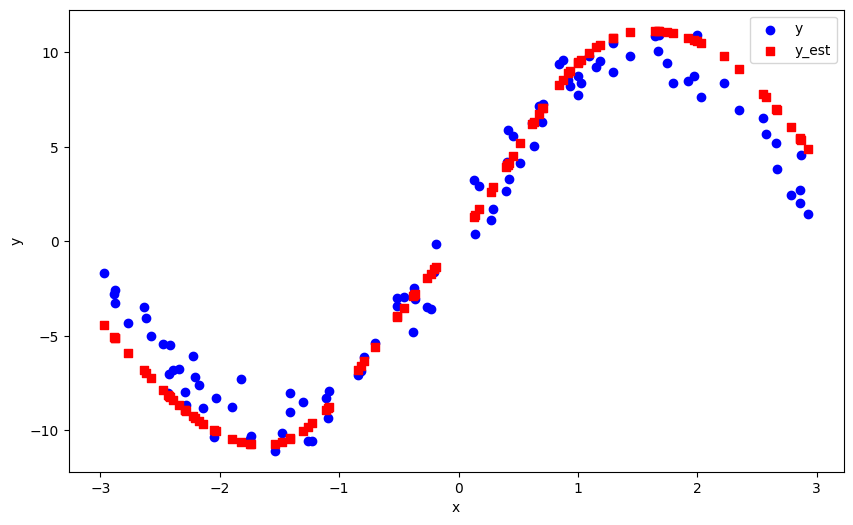

The programm is closed


In [4]:
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

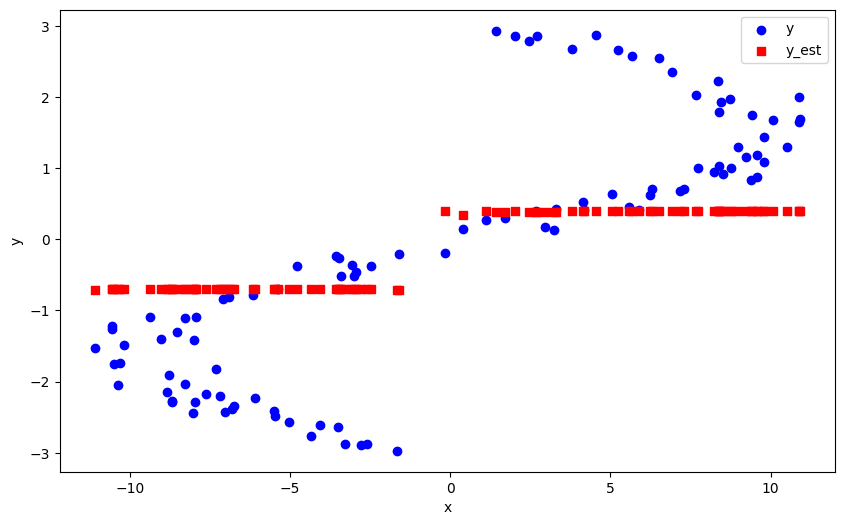

The programm is closed


In [5]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, x, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Sinus: Large scale

### Cov_epsilon = [[1, 0], [0, 1]]

In [6]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)
np.random.seed(0)
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*10 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)


Empirical Covariance Matrix:
[[ 0.91738083 -0.02608031]
 [-0.02608031  0.93109508]]
covariance:             x          y
x   3.732754  10.041094
y  10.041094  53.442056


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 5.673146668844998
	 mle: 6.575624404671655
	 mse: 18.949482352866006
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 3.7328e+00, -1.1535e-02],
        [-1.1535e-02,  5.3442e+01]])
	structure loss: 0.0
	Sigma: tensor([[ 3.7328e+00, -1.1535e-02],
        [-1.1535e-02,  5.3442e+01]])
Check M:  None
Check y:  tensor([ 2.8872,  2.8965,  1.6854,  3.1206, -1.4546,  1.7756,  0.2306,  2.4243,
         3.2973, -2.6078,  0.1703,  1.2585,  0.2216,  3.7426, -0.5855, -0.7593,
        -1.1582,  0.7020,  3.0503,  3.1438, -0.0944,  3.4680, -2.7121,  3.6880,
        -2.8046,  3.6301, -1.3356, -0.1267, -1.0312,  0.1109, -2.8041,  2.1642,
         2.1956,  1.5519, -2.0344,  3.4961,  2.4568, -2.8060,  0.8275,  3.6509,


  0%|          | 3/33000.0 [00:04<12:47:06,  1.39s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.013282118439262303
	score(model): 5.591239232435441
	 mle: 6.337199086301648
	 mse: 15.016235160793372
	W1: tensor([[1.0000e-04, 1.5627e+00],
        [7.3507e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013282118439262303
	W2: tensor([[ 3.7328e+00, -1.1535e-02],
        [-1.1535e-02,  5.3442e+01]])
	structure loss: 0.0
	Sigma: tensor([[ 3.7328e+00, -1.1535e-02],
        [-1.1535e-02,  5.3442e+01]])
Check M:  None
Check y:  tensor([ 2.4148,  3.7380,  1.7699,  3.6615, -1.6599,  1.8255,  0.5466,  2.1827,
         3.5872, -3.1816,  4.1229,  1.4802,  0.5367,  3.1802, -4.1921, -4.1888,
        -4.1692,  4.0678,  3.6873,  2.5486,  4.0391,  3.4959, -3.3479,  2.9606,
        -3.6566,  2.8880, -4.1553,  3.9672, -1.0728,  0.4131, -3.5943,  2.0467,
         2.0636,  1.6843, -4.0643,  2.7688,  2.1992, -3.6248,  4.0575,  2.9115,
        -2.0047,  2.8095,  1.7601, -3.3685,  1.9315,  2.8353, -4.0255, -4.0999,
    

  0%|          | 4/33000.0 [00:08<20:47:43,  2.27s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.01333870221269462
	score(model): 5.591207481238141
	 mle: 6.336295607040449
	 mse: 14.982234739186431
	W1: tensor([[1.0000e-04, 1.5694e+00],
        [7.3345e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.01333870221269462
	W2: tensor([[ 3.7328e+00, -1.1535e-02],
        [-1.1535e-02,  5.3442e+01]])
	structure loss: 0.0
	Sigma: tensor([[ 3.7328e+00, -1.1535e-02],
        [-1.1535e-02,  5.3442e+01]])
Check M:  None
Check y:  tensor([ 2.4312,  3.7574,  1.7846,  3.6801, -1.6697,  1.8404,  0.5483,  2.1987,
         3.6052, -3.1901,  4.1390,  1.4928,  0.5383,  3.1978, -4.2089, -4.2063,
        -4.1861,  4.0870,  3.7061,  2.5653,  4.0583,  3.5136, -3.3560,  2.9781,
        -3.6632,  2.9054, -4.1713,  3.9867, -1.0832,  0.4131, -3.6013,  2.0625,
         2.0794,  1.6985, -4.0746,  2.7860,  2.2153, -3.6316,  4.0778,  2.9290,
        -2.0138,  2.8268,  1.7747, -3.3765,  1.9469,  2.8526, -4.0341, -4.1122,
      

  0%|          | 5/33000.0 [00:12<25:38:24,  2.80s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.013339627185907643
	score(model): 1.7388374283245542
	 mle: 6.232568968634621
	 mse: 14.980905088805766
	W1: tensor([[1.0000e-04, 1.5697e+00],
        [7.3336e-02, 1.0000e-04]])
	cycle loss: 0.013339627185907643
	W2: tensor([[1.8889e+00, 1.1234e-02],
        [1.1234e-02, 1.5024e+01]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.8900e+00, 1.1258e-02],
        [1.1258e-02, 1.4998e+01]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.8818e-03,  0.0000e+00],
        [ 6.9034e-05,  2.8315e+00]])
Check y:  tensor([ 2.4315,  3.7577,  1.7849,  3.6803, -1.6698,  1.8407,  0.5484,  2.1989,
         3.6055, -3.1909,  4.1397,  1.4931,  0.5384,  3.1984, -4.2097, -4.2072,
        -4.1871,  4.0877,  3.7064,  2.5657,  4.0595,  3.5139, -3.3569,  2.9788,
        -3.6639,  2.9060, -4.1722,  3.9880, -1.0834,  0.4132, -3.6021,  2.0627,
         2.0796,  1.6988, -4.0753,  2.7865,  2.2155, -3.6324,  4.0786,  2.9296,
  

  0%|          | 6/33000.0 [00:15<26:46:38,  2.92s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.013339627185907643
	score(model): 1.0136171272511831
	 mle: 8.341150620539164
	 mse: 14.980905088805766
	W1: tensor([[1.0000e-04, 1.5697e+00],
        [7.3336e-02, 1.0000e-04]])
	cycle loss: 0.013339627185907643
	W2: tensor([[1.9258, 0.0260],
        [0.0260, 5.6629]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.9258, 0.0260],
        [0.0260, 5.6606]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.5586e-05, 0.0000e+00],
        [1.4037e-07, 3.4242e-01]])
Check y:  tensor([ 2.4315,  3.7577,  1.7849,  3.6803, -1.6698,  1.8407,  0.5484,  2.1989,
         3.6055, -3.1909,  4.1397,  1.4931,  0.5384,  3.1984, -4.2097, -4.2072,
        -4.1871,  4.0877,  3.7064,  2.5657,  4.0595,  3.5139, -3.3569,  2.9788,
        -3.6639,  2.9060, -4.1722,  3.9880, -1.0834,  0.4132, -3.6021,  2.0627,
         2.0796,  1.6988, -4.0753,  2.7865,  2.2155, -3.6324,  4.0786,  2.9296,
        -2.0140,  2.8274,  1.7750, -3.

  0%|          | 7/33000.0 [00:18<28:32:47,  3.11s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.013339627185907643
	score(model): 0.9997893930243482
	 mle: 9.033695739101006
	 mse: 14.980905088805766
	W1: tensor([[1.0000e-04, 1.5697e+00],
        [7.3336e-02, 1.0000e-04]])
	cycle loss: 0.013339627185907643
	W2: tensor([[1.9248, 0.0297],
        [0.0297, 4.8306]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.9248, 0.0297],
        [0.0297, 4.8305]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.7351e-07,  0.0000e+00],
        [-5.0668e-09,  5.3322e-03]])
Check y:  tensor([ 2.4315,  3.7577,  1.7849,  3.6803, -1.6698,  1.8407,  0.5484,  2.1989,
         3.6055, -3.1909,  4.1397,  1.4931,  0.5384,  3.1984, -4.2097, -4.2072,
        -4.1871,  4.0877,  3.7064,  2.5657,  4.0595,  3.5139, -3.3569,  2.9788,
        -3.6639,  2.9060, -4.1722,  3.9880, -1.0834,  0.4132, -3.6021,  2.0627,
         2.0796,  1.6988, -4.0753,  2.7865,  2.2155, -3.6324,  4.0786,  2.9296,
        -2.0140,  2.8274,  1.7750,

  0%|          | 9/33000.0 [00:23<24:34:05,  2.68s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.010467795099946109
	score(model): 0.45096432383419593
	 mle: 7.97869181650732
	 mse: 11.792742592575978
	W1: tensor([[1.0000e-04, 3.2316e+00],
        [3.1577e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.010467795099946109
	W2: tensor([[1.9248, 0.0297],
        [0.0297, 4.8305]])
	structure loss: 0.0
	Sigma: tensor([[1.9248, 0.0297],
        [0.0297, 4.8305]])
Check M:  tensor([[ 5.7351e-07,  0.0000e+00],
        [-5.0668e-09,  5.3322e-03]])
Check y:  tensor([ 4.8913,  6.3264,  3.4131,  6.2408, -4.4896,  3.5605,  0.0871,  4.4349,
         6.1581, -6.7184,  5.4928,  2.6223,  0.0615,  5.7503, -6.4190, -6.4081,
        -6.4361,  6.1393,  6.2698,  5.1009,  4.6735,  6.0593, -6.9127,  5.5538,
        -7.1468,  5.4870, -6.4713,  4.4573, -3.4926, -0.2549, -7.1203,  4.1210,
         4.1614,  3.1827, -6.7304,  5.3691,  4.4710, -7.1350,  6.2266,  5.5089,
        -5.0279,  5.4109,  3.3868, -6.9345,  3.8352,  

  0%|          | 10/33000.0 [00:28<29:43:38,  3.24s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.010217874665723325
	score(model): 0.4508598812556284
	 mle: 7.9817023204399735
	 mse: 11.788964542464479
	W1: tensor([[1.0000e-04, 3.2582e+00],
        [3.0945e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.010217874665723325
	W2: tensor([[1.9248, 0.0297],
        [0.0297, 4.8305]])
	structure loss: 0.0
	Sigma: tensor([[1.9248, 0.0297],
        [0.0297, 4.8305]])
Check M:  tensor([[ 5.7351e-07,  0.0000e+00],
        [-5.0668e-09,  5.3322e-03]])
Check y:  tensor([ 4.9143,  6.3521,  3.4395,  6.2673, -4.5178,  3.5881,  0.0691,  4.4639,
         6.1838, -6.6928,  5.5332,  2.6397,  0.0432,  5.7625, -6.3864, -6.3687,
        -6.4066,  6.1615,  6.2962,  5.1190,  4.6467,  6.0826, -6.8876,  5.5623,
        -7.1388,  5.4957, -6.4517,  4.4034, -3.5310, -0.2771, -7.1067,  4.1510,
         4.1914,  3.2069, -6.7508,  5.3798,  4.4998, -7.1240,  6.2436,  5.5175,
        -5.0454,  5.4207,  3.4130, -6.9098,  3.8645, 

  0%|          | 11/33000.0 [00:31<29:52:23,  3.26s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.010199219430232276
	score(model): 0.44001250867782493
	 mle: 8.494480604640529
	 mse: 11.787433726931608
	W1: tensor([[1.0000e-04, 3.2632e+00],
        [3.0870e-02, 1.0000e-04]])
	cycle loss: 0.010199219430232276
	W2: tensor([[ 2.6865, -0.1637],
        [-0.1637,  4.1007]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.6872, -0.1636],
        [-0.1636,  4.1011]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0023,  0.0000],
        [-0.0016,  0.0025]])
Check y:  tensor([ 4.9194,  6.3573,  3.4405,  6.2714, -4.5204,  3.5897,  0.0655,  4.4692,
         6.1864, -6.6930,  5.5393,  2.6373,  0.0397,  5.7589, -6.3710, -6.3546,
        -6.4010,  6.1575,  6.3007,  5.1226,  4.6437,  6.0833, -6.8844,  5.5594,
        -7.1327,  5.4938, -6.4504,  4.3937, -3.5280, -0.2798, -7.1004,  4.1553,
         4.1958,  3.2068, -6.7593,  5.3798,  4.5052, -7.1178,  6.2387,  5.5152,
        -5.0519,  5.4200,  3.4138, -6.90

  0%|          | 12/33000.0 [00:35<30:41:06,  3.35s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.010199219430232276
	score(model): 0.43998658272978874
	 mle: 8.506753397051211
	 mse: 11.787433726931608
	W1: tensor([[1.0000e-04, 3.2632e+00],
        [3.0870e-02, 1.0000e-04]])
	cycle loss: 0.010199219430232276
	W2: tensor([[ 2.7513, -0.1439],
        [-0.1439,  4.0883]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.7513, -0.1438],
        [-0.1438,  4.0883]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.3786e-06,  0.0000e+00],
        [-1.1363e-05, -7.8646e-06]])
Check y:  tensor([ 4.9194,  6.3573,  3.4405,  6.2714, -4.5204,  3.5897,  0.0655,  4.4692,
         6.1864, -6.6930,  5.5393,  2.6373,  0.0397,  5.7589, -6.3710, -6.3546,
        -6.4010,  6.1575,  6.3007,  5.1226,  4.6437,  6.0833, -6.8844,  5.5594,
        -7.1327,  5.4938, -6.4504,  4.3937, -3.5280, -0.2798, -7.1004,  4.1553,
         4.1958,  3.2068, -6.7593,  5.3798,  4.5052, -7.1178,  6.2387,  5.5152,
        -5.0519,  5.4200

  0%|          | 13/33000.0 [00:39<32:39:50,  3.56s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.010199219430232276
	score(model): 0.4399865821778829
	 mle: 8.506729187464757
	 mse: 11.787433726931608
	W1: tensor([[1.0000e-04, 3.2632e+00],
        [3.0870e-02, 1.0000e-04]])
	cycle loss: 0.010199219430232276
	W2: tensor([[ 2.7513, -0.1437],
        [-0.1437,  4.0883]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.7513, -0.1437],
        [-0.1437,  4.0883]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.2394e-08,  0.0000e+00],
        [-7.9111e-08,  3.0039e-07]])
Check y:  tensor([ 4.9194,  6.3573,  3.4405,  6.2714, -4.5204,  3.5897,  0.0655,  4.4692,
         6.1864, -6.6930,  5.5393,  2.6373,  0.0397,  5.7589, -6.3710, -6.3546,
        -6.4010,  6.1575,  6.3007,  5.1226,  4.6437,  6.0833, -6.8844,  5.5594,
        -7.1327,  5.4938, -6.4504,  4.3937, -3.5280, -0.2798, -7.1004,  4.1553,
         4.1958,  3.2068, -6.7593,  5.3798,  4.5052, -7.1178,  6.2387,  5.5152,
        -5.0519,  5.4200,

  0%|          | 16/33000.0 [00:43<21:21:02,  2.33s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0019056148555276486
	score(model): 0.22119714318753486
	 mle: 8.682587456505498
	 mse: 12.002967989088365
	W1: tensor([[1.0000e-04, 3.5608e+00],
        [1.2253e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0019056148555276486
	W2: tensor([[ 2.7513, -0.1437],
        [-0.1437,  4.0883]])
	structure loss: 0.0
	Sigma: tensor([[ 2.7513, -0.1437],
        [-0.1437,  4.0883]])
Check M:  tensor([[ 4.2394e-08,  0.0000e+00],
        [-7.9111e-08,  3.0039e-07]])
Check y:  tensor([ 5.3203,  6.5525,  3.7172,  6.4338, -4.8137,  3.8893, -0.1819,  4.8706,
         6.3252, -7.0566,  5.6436,  2.7821, -0.2108,  5.8978, -6.5167, -6.4571,
        -6.4560,  6.4479,  6.4732,  5.4942,  4.5840,  6.2039, -7.2785,  5.7690,
        -7.5456,  5.7330, -6.5039,  4.3101, -3.8966, -0.5666, -7.5171,  4.5295,
         4.5744,  3.4463, -6.9028,  5.6697,  4.9086, -7.5333,  6.5520,  5.7446,
        -5.3134,  5.6925,  3.6864, -7.3036

  0%|          | 17/33000.0 [00:46<24:03:41,  2.63s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0018241874515450007
	score(model): 0.2211292364454628
	 mle: 8.683120748365766
	 mse: 12.000842553598504
	W1: tensor([[1.0000e-04, 3.5905e+00],
        [1.1890e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0018241874515450007
	W2: tensor([[ 2.7513, -0.1437],
        [-0.1437,  4.0883]])
	structure loss: 0.0
	Sigma: tensor([[ 2.7513, -0.1437],
        [-0.1437,  4.0883]])
Check M:  tensor([[ 4.2394e-08,  0.0000e+00],
        [-7.9111e-08,  3.0039e-07]])
Check y:  tensor([ 5.3302,  6.5708,  3.7143,  6.4520, -4.8226,  3.8877, -0.1838,  4.8781,
         6.3414, -7.0500,  5.6757,  2.7739, -0.2126,  5.8980, -6.4836, -6.4072,
        -6.4037,  6.4413,  6.4917,  5.5027,  4.5374,  6.2162, -7.2706,  5.7684,
        -7.5484,  5.7335, -6.4599,  4.2251, -3.8929, -0.5661, -7.5161,  4.5338,
         4.5791,  3.4415, -6.9067,  5.6730,  4.9164, -7.5341,  6.5387,  5.7447,
        -5.3269,  5.6948,  3.6833, -7.2958,

  0%|          | 18/33000.0 [00:50<26:04:01,  2.85s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0018149200999042492
	score(model): 0.22062480655806366
	 mle: 8.676759111234343
	 mse: 12.000172899764205
	W1: tensor([[1.0000e-04, 3.5958e+00],
        [1.1842e-02, 1.0000e-04]])
	cycle loss: 0.0018149200999042492
	W2: tensor([[ 3.2705, -0.0910],
        [-0.0910,  4.0748]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.2709, -0.0909],
        [-0.0909,  4.0749]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.2842e-04,  0.0000e+00],
        [ 3.0173e-05, -1.3923e-05]])
Check y:  tensor([ 5.3348,  6.5744,  3.7137,  6.4543, -4.8253,  3.8878, -0.1858,  4.8821,
         6.3421, -7.0485,  5.6824,  2.7708, -0.2145,  5.8939, -6.4731, -6.3966,
        -6.3979,  6.4376,  6.4945,  5.5065,  4.5368,  6.2151, -7.2670,  5.7660,
        -7.5445,  5.7321, -6.4570,  4.2185, -3.8908, -0.5672, -7.5115,  4.5365,
         4.5819,  3.4400, -6.9127,  5.6736,  4.9205, -7.5297,  6.5341,  5.7430,
        -5.3323,  5.6

  0%|          | 19/33000.0 [00:53<26:02:42,  2.84s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0018149200999042492
	score(model): 0.22062284879468846
	 mle: 8.676606714755355
	 mse: 12.000172899764205
	W1: tensor([[1.0000e-04, 3.5958e+00],
        [1.1842e-02, 1.0000e-04]])
	cycle loss: 0.0018149200999042492
	W2: tensor([[ 3.3112, -0.0921],
        [-0.0921,  4.0750]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.3112, -0.0921],
        [-0.0921,  4.0750]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.2653e-06,  0.0000e+00],
        [ 5.2345e-07, -1.8195e-07]])
Check y:  tensor([ 5.3348,  6.5744,  3.7137,  6.4543, -4.8253,  3.8878, -0.1858,  4.8821,
         6.3421, -7.0485,  5.6824,  2.7708, -0.2145,  5.8939, -6.4731, -6.3966,
        -6.3979,  6.4376,  6.4945,  5.5065,  4.5368,  6.2151, -7.2670,  5.7660,
        -7.5445,  5.7321, -6.4570,  4.2185, -3.8908, -0.5672, -7.5115,  4.5365,
         4.5819,  3.4400, -6.9127,  5.6736,  4.9205, -7.5297,  6.5341,  5.7430,
        -5.3323,  5.6

  0%|          | 20/33000.0 [00:56<26:27:10,  2.89s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0018149200999042492
	score(model): 0.22062284870229462
	 mle: 8.676603843514396
	 mse: 12.000172899764205
	W1: tensor([[1.0000e-04, 3.5958e+00],
        [1.1842e-02, 1.0000e-04]])
	cycle loss: 0.0018149200999042492
	W2: tensor([[ 3.3115, -0.0921],
        [-0.0921,  4.0750]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.3115, -0.0921],
        [-0.0921,  4.0750]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.8306e-08,  0.0000e+00],
        [ 4.8890e-09,  1.2979e-09]])
Check y:  tensor([ 5.3348,  6.5744,  3.7137,  6.4543, -4.8253,  3.8878, -0.1858,  4.8821,
         6.3421, -7.0485,  5.6824,  2.7708, -0.2145,  5.8939, -6.4731, -6.3966,
        -6.3979,  6.4376,  6.4945,  5.5065,  4.5368,  6.2151, -7.2670,  5.7660,
        -7.5445,  5.7321, -6.4570,  4.2185, -3.8908, -0.5672, -7.5115,  4.5365,
         4.5819,  3.4400, -6.9127,  5.6736,  4.9205, -7.5297,  6.5341,  5.7430,
        -5.3323,  5.6

  0%|          | 22/33000.0 [01:00<22:13:01,  2.43s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0003637093981563311
	score(model): 0.1106562921782638
	 mle: 8.74769779490654
	 mse: 12.1129087181502
	W1: tensor([[1.0000e-04, 3.6348e+00],
        [5.2463e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003637093981563311
	W2: tensor([[ 3.3115, -0.0921],
        [-0.0921,  4.0750]])
	structure loss: 0.0
	Sigma: tensor([[ 3.3115, -0.0921],
        [-0.0921,  4.0750]])
Check M:  tensor([[-1.8306e-08,  0.0000e+00],
        [ 4.8890e-09,  1.2979e-09]])
Check y:  tensor([ 5.4825,  6.5065,  3.7573,  6.3497, -4.8536,  3.9442, -0.2872,  5.0132,
         6.2136, -7.0998,  5.4265,  2.7536, -0.3159,  5.8000, -6.3231, -6.2964,
        -6.3635,  6.3511,  6.4009,  5.6408,  4.4951,  6.0720, -7.2975,  5.7598,
        -7.5170,  5.7571, -6.4348,  4.2704, -3.9188, -0.6680, -7.4970,  4.6426,
         4.6915,  3.4644, -6.8770,  5.7465,  5.0541, -7.5089,  6.4913,  5.7580,
        -5.3741,  5.7520,  3.7240, -7.3193,  

  0%|          | 23/33000.0 [01:03<24:45:04,  2.70s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00033234321139463674
	score(model): 0.1106030560667063
	 mle: 8.745929076619667
	 mse: 12.108413302521619
	W1: tensor([[1.0000e-04, 3.6668e+00],
        [4.9711e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00033234321139463674
	W2: tensor([[ 3.3115, -0.0921],
        [-0.0921,  4.0750]])
	structure loss: 0.0
	Sigma: tensor([[ 3.3115, -0.0921],
        [-0.0921,  4.0750]])
Check M:  tensor([[-1.8306e-08,  0.0000e+00],
        [ 4.8890e-09,  1.2979e-09]])
Check y:  tensor([ 5.4383,  6.5354,  3.7825,  6.3993, -4.8348,  3.9644, -0.2798,  4.9922,
         6.2765, -7.0930,  5.5412,  2.7942, -0.3092,  5.8438, -6.3946, -6.3116,
        -6.3000,  6.4072,  6.4443,  5.5927,  4.3907,  6.1428, -7.3210,  5.7605,
        -7.5912,  5.7440, -6.3564,  4.0897, -3.9470, -0.6699, -7.5640,  4.6385,
         4.6854,  3.4959, -6.8323,  5.7143,  5.0311, -7.5798,  6.5227,  5.7492,
        -5.3264,  5.7257,  3.7499, -7.34

  0%|          | 24/33000.0 [01:07<26:34:58,  2.90s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0003275449431838773
	score(model): 0.110551107075759
	 mle: 8.743762134924829
	 mse: 12.107296095063019
	W1: tensor([[1.0000e-04, 3.6801e+00],
        [4.9173e-03, 1.0000e-04]])
	cycle loss: 0.0003275449431838773
	W2: tensor([[ 3.5454, -0.0390],
        [-0.0390,  4.0734]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5459, -0.0391],
        [-0.0391,  4.0734]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.0218e-06,  0.0000e+00],
        [ 4.2634e-05, -1.5583e-05]])
Check y:  tensor([ 5.4321,  6.5393,  3.7886,  6.4073, -4.8391,  3.9697, -0.2776,  4.9904,
         6.2871, -7.0837,  5.5670,  2.8029, -0.3072,  5.8503, -6.3930, -6.2987,
        -6.2772,  6.4131,  6.4511,  5.5854,  4.3658,  6.1547, -7.3174,  5.7598,
        -7.6028,  5.7412, -6.3346,  4.0448, -3.9588, -0.6696, -7.5724,  4.6397,
         4.6862,  3.5030, -6.8305,  5.7087,  5.0289, -7.5898,  6.5225,  5.7470,
        -5.3235,  5.72

  3%|▎         | 1024/33000.0 [01:09<05:43, 93.18it/s] 


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0003275449431838773
	score(model): 0.11055107693939248
	 mle: 8.743434442283919
	 mse: 12.107296095063019
	W1: tensor([[1.0000e-04, 3.6801e+00],
        [4.9173e-03, 1.0000e-04]])
	cycle loss: 0.0003275449431838773
	W2: tensor([[ 3.5443, -0.0416],
        [-0.0416,  4.0737]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5443, -0.0416],
        [-0.0416,  4.0737]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.8112e-07, 0.0000e+00],
        [1.7519e-07, 1.3039e-07]])
Check y:  tensor([ 5.4321,  6.5393,  3.7886,  6.4073, -4.8391,  3.9697, -0.2776,  4.9904,
         6.2871, -7.0837,  5.5670,  2.8029, -0.3072,  5.8503, -6.3930, -6.2987,
        -6.2772,  6.4131,  6.4511,  5.5854,  4.3658,  6.1547, -7.3174,  5.7598,
        -7.6028,  5.7412, -6.3346,  4.0448, -3.9588, -0.6696, -7.5724,  4.6397,
         4.6862,  3.5030, -6.8305,  5.7087,  5.0289, -7.5898,  6.5225,  5.7470,
        -5.3235,  5.7209

  6%|▌         | 2028/33000.0 [01:23<06:25, 80.44it/s]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 7.366880573123069e-05
	score(model): 0.05534816422933656
	 mle: 8.769070823012171
	 mse: 12.153345380274587
	W1: tensor([[1.0000e-04, 3.6862e+00],
        [2.3281e-03, 1.0000e-04]])
	cycle loss: 7.366880573123069e-05
	W2: tensor([[ 3.6341, -0.0174],
        [-0.0174,  4.0741]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.6341, -0.0174],
        [-0.0174,  4.0741]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.0530e-08,  0.0000e+00],
        [ 4.3600e-08, -2.5052e-08]])
Check y:  tensor([ 5.4738,  6.5047,  3.7990,  6.3605, -4.8270,  3.9844, -0.3146,  5.0288,
         6.2322, -7.0961,  5.4589,  2.7928, -0.3442,  5.8059, -6.3374, -6.2582,
        -6.2506,  6.3709,  6.4080,  5.6210,  4.3191,  6.0947, -7.3232,  5.7449,
        -7.5831,  5.7369, -6.3078,  4.0285, -3.9513, -0.7055, -7.5592,  4.6705,
         4.7181,  3.5071, -6.7879,  5.7213,  5.0680, -7.5735,  6.4956,  5.7393,
        -5.3167,  5

  6%|▌         | 2034/33000.0 [01:41<14:10, 36.42it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 1.7344078916181616e-05
	score(model): 0.027688061760441245
	 mle: 8.78009744979479
	 mse: 12.17259820836666
	W1: tensor([[1.0000e-04, 3.7105e+00],
        [1.1217e-03, 1.0000e-04]])
	cycle loss: 1.7344078916181616e-05
	W2: tensor([[ 3.6756, -0.0057],
        [-0.0057,  4.0738]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.6756, -0.0057],
        [-0.0057,  4.0738]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 9.2723e-08,  0.0000e+00],
        [-2.0982e-07, -3.6186e-07]])
Check y:  tensor([ 5.4710,  6.4982,  3.8205,  6.3599, -4.8213,  4.0052, -0.3273,  5.0378,
         6.2352, -7.0857,  5.4660,  2.8130, -0.3572,  5.8047, -6.3270, -6.2293,
        -6.1979,  6.3661,  6.4056,  5.6125,  4.2507,  6.0998, -7.3260,  5.7357,
        -7.6073,  5.7259, -6.2520,  3.9349, -3.9737, -0.7234, -7.5805,  4.6854,
         4.7323,  3.5289, -6.7547,  5.7090,  5.0763, -7.5963,  6.4842,  5.7288,
        -5.2943, 

 12%|█▏        | 4034/33000.0 [01:44<12:29, 38.65it/s] 


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 1.7344078916181616e-05
	score(model): 0.027688061756696778
	 mle: 8.780076088495626
	 mse: 12.17259820836666
	W1: tensor([[1.0000e-04, 3.7105e+00],
        [1.1217e-03, 1.0000e-04]])
	cycle loss: 1.7344078916181616e-05
	W2: tensor([[ 3.6756, -0.0057],
        [-0.0057,  4.0738]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.6756, -0.0057],
        [-0.0057,  4.0738]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.2966e-09,  0.0000e+00],
        [ 7.0416e-10, -2.9499e-09]])
Check y:  tensor([ 5.4710,  6.4982,  3.8205,  6.3599, -4.8213,  4.0052, -0.3273,  5.0378,
         6.2352, -7.0857,  5.4660,  2.8130, -0.3572,  5.8047, -6.3270, -6.2293,
        -6.1979,  6.3661,  6.4056,  5.6125,  4.2507,  6.0998, -7.3260,  5.7357,
        -7.6073,  5.7259, -6.2520,  3.9349, -3.9737, -0.7234, -7.5805,  4.6854,
         4.7323,  3.5289, -6.7547,  5.7090,  5.0763, -7.5963,  6.4842,  5.7288,
        -5.2943,

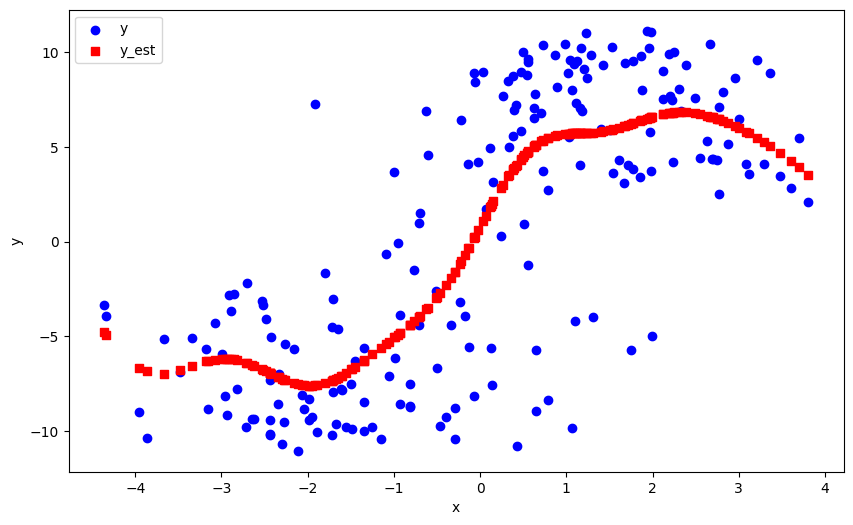

The programm is closed


In [7]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

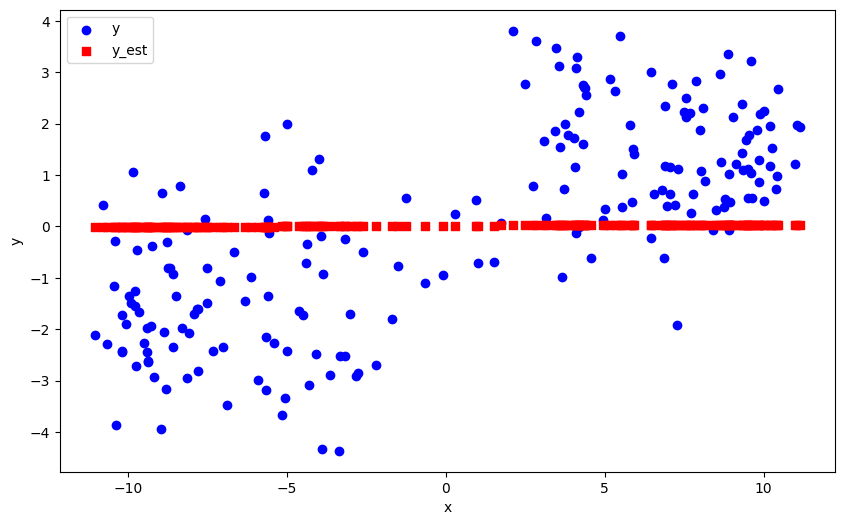

The programm is closed


In [9]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, true_x, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### Cov_epsilon = [[1, 0.6], [0.6, 1]]

In [10]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)


Empirical Covariance Matrix:
[[0.89925943 0.54768565]
 [0.54768565 0.94098793]]


In [11]:
np.random.seed(0)
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*10 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

covariance:             x          y
x   3.754708  10.758844
y  10.758844  53.333078


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 5.662454448288068
	 mle: 6.541101798844372
	 mse: 18.481399874554175
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[3.7547e+00, 3.2537e-03],
        [3.2537e-03, 5.3333e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.7547e+00, 3.2537e-03],
        [3.2537e-03, 5.3333e+01]])
Check M:  None
Check y:  tensor([ 0.1845,  0.4573,  2.4688, -2.9218, -0.2486,  3.2435,  0.9917, -0.1133,
         0.0178,  2.0783,  1.6226,  2.0907,  2.2946,  0.1055, -3.1294, -1.3561,
        -2.3380,  3.1857,  2.1496,  0.1898,  2.6810,  2.8800,  3.1893,  3.2701,
        -3.1573,  2.0290, -3.1573,  3.1098,  2.6410, -2.4887, -1.6995,  0.3650,
        -3.0544,  0.4471, -0.9743, -0.3041,  0.3986,  1.3278,  1.2275,  3.0878,
        

  0%|          | 3/33000.0 [00:04<12:55:02,  1.41s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.014022048314909608
	score(model): 5.576099687861952
	 mle: 6.2872911090265795
	 mse: 12.99838203988309
	W1: tensor([[1.0000e-04, 1.8269e+00],
        [6.4591e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014022048314909608
	W2: tensor([[3.7547e+00, 3.2537e-03],
        [3.2537e-03, 5.3333e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.7547e+00, 3.2537e-03],
        [3.2537e-03, 5.3333e+01]])
Check M:  None
Check y:  tensor([ 0.4915,  0.8350,  2.8368, -3.3291, -0.1011,  3.9477,  1.4315,  4.4348,
         4.9386,  2.4563,  2.0380,  2.4680,  2.6625,  4.9669, -3.8966, -4.5615,
        -4.3676,  4.3937,  4.8174,  4.9793,  4.6923,  4.6173,  3.7978,  4.1475,
        -3.7797,  2.4105, -3.7782,  3.6411,  3.0200, -2.8965, -2.0699,  4.9885,
        -3.4953,  0.8226, -4.6016, -0.1801,  0.7633,  4.9305,  4.9407,  4.4943,
        -1.7959, -3.2996,  4.6914, -4.5104,  3.4764,  1.9614, -2.2394, -2.8487,
        -3.3

  0%|          | 4/33000.0 [00:08<20:46:23,  2.27s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.01392265360640299
	score(model): 5.575972824527955
	 mle: 6.2870327488779045
	 mse: 12.92399631994924
	W1: tensor([[1.0000e-04, 1.8427e+00],
        [6.3811e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.01392265360640299
	W2: tensor([[3.7547e+00, 3.2537e-03],
        [3.2537e-03, 5.3333e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.7547e+00, 3.2537e-03],
        [3.2537e-03, 5.3333e+01]])
Check M:  None
Check y:  tensor([ 4.8504e-01,  8.3146e-01,  2.8527e+00, -3.3686e+00, -1.1057e-01,
         3.9703e+00,  1.4353e+00,  4.4993e+00,  5.0069e+00,  2.4709e+00,
         2.0494e+00,  2.4826e+00,  2.6779e+00,  5.0321e+00, -3.9388e+00,
        -4.6280e+00, -4.4235e+00,  4.4206e+00,  4.8461e+00,  5.0414e+00,
         4.7203e+00,  4.6452e+00,  3.8191e+00,  4.1721e+00, -3.8212e+00,
         2.4247e+00, -3.8196e+00,  3.6610e+00,  3.0366e+00, -2.9307e+00,
        -2.0914e+00,  5.0443e+00, -3.5358e+00,  8.1897e-

  0%|          | 5/33000.0 [00:12<25:49:06,  2.82s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.013921922192843716
	score(model): 1.7106667040634014
	 mle: 6.004170129065086
	 mse: 12.920496207201323
	W1: tensor([[1.0000e-04, 1.8434e+00],
        [6.3785e-02, 1.0000e-04]])
	cycle loss: 0.013921922192843716
	W2: tensor([[ 2.0256,  0.0475],
        [ 0.0475, 14.9639]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.0266,  0.0475],
        [ 0.0475, 14.9384]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.3222e-04,  0.0000e+00],
        [-5.8547e-05,  2.8748e+00]])
Check y:  tensor([ 4.8505e-01,  8.3161e-01,  2.8537e+00, -3.3701e+00, -1.1068e-01,
         3.9720e+00,  1.4358e+00,  4.5035e+00,  5.0098e+00,  2.4717e+00,
         2.0502e+00,  2.4834e+00,  2.6788e+00,  5.0348e+00, -3.9402e+00,
        -4.6307e+00, -4.4258e+00,  4.4222e+00,  4.8480e+00,  5.0441e+00,
         4.7220e+00,  4.6469e+00,  3.8207e+00,  4.1738e+00, -3.8225e+00,
         2.4256e+00, -3.8209e+00,  3.6625e+00,  3.0376e+00, -

  0%|          | 6/33000.0 [00:15<25:56:12,  2.83s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.013921922192843716
	score(model): 0.9343268052027002
	 mle: 7.777545587105653
	 mse: 12.920496207201323
	W1: tensor([[1.0000e-04, 1.8434e+00],
        [6.3785e-02, 1.0000e-04]])
	cycle loss: 0.013921922192843716
	W2: tensor([[2.0179, 0.1188],
        [0.1188, 5.4277]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0178, 0.1189],
        [0.1189, 5.4252]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 7.2395e-05,  0.0000e+00],
        [-2.2061e-06,  4.0871e-01]])
Check y:  tensor([ 4.8505e-01,  8.3161e-01,  2.8537e+00, -3.3701e+00, -1.1068e-01,
         3.9720e+00,  1.4358e+00,  4.5035e+00,  5.0098e+00,  2.4717e+00,
         2.0502e+00,  2.4834e+00,  2.6788e+00,  5.0348e+00, -3.9402e+00,
        -4.6307e+00, -4.4258e+00,  4.4222e+00,  4.8480e+00,  5.0441e+00,
         4.7220e+00,  4.6469e+00,  3.8207e+00,  4.1738e+00, -3.8225e+00,
         2.4256e+00, -3.8209e+00,  3.6625e+00,  3.0376e+00, -2.9321e+

  0%|          | 7/33000.0 [00:17<25:51:40,  2.82s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.013921922192843716
	score(model): 0.9129256041816104
	 mle: 8.554746031425202
	 mse: 12.920496207201323
	W1: tensor([[1.0000e-04, 1.8434e+00],
        [6.3785e-02, 1.0000e-04]])
	cycle loss: 0.013921922192843716
	W2: tensor([[2.0115, 0.1405],
        [0.1405, 4.4351]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0115, 0.1405],
        [0.1405, 4.4349]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.5583e-07,  0.0000e+00],
        [-6.1750e-08,  1.3339e-02]])
Check y:  tensor([ 4.8505e-01,  8.3161e-01,  2.8537e+00, -3.3701e+00, -1.1068e-01,
         3.9720e+00,  1.4358e+00,  4.5035e+00,  5.0098e+00,  2.4717e+00,
         2.0502e+00,  2.4834e+00,  2.6788e+00,  5.0348e+00, -3.9402e+00,
        -4.6307e+00, -4.4258e+00,  4.4222e+00,  4.8480e+00,  5.0441e+00,
         4.7220e+00,  4.6469e+00,  3.8207e+00,  4.1738e+00, -3.8225e+00,
         2.4256e+00, -3.8209e+00,  3.6625e+00,  3.0376e+00, -2.9321e+

  0%|          | 10/33000.0 [00:22<18:26:19,  2.01s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.008935217348412738
	score(model): 0.4121010618762291
	 mle: 7.627657129346659
	 mse: 10.30047866439126
	W1: tensor([[1.0000e-04, 3.4357e+00],
        [2.7452e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.008935217348412738
	W2: tensor([[2.0115, 0.1405],
        [0.1405, 4.4349]])
	structure loss: 0.0
	Sigma: tensor([[2.0115, 0.1405],
        [0.1405, 4.4349]])
Check M:  tensor([[ 8.5583e-07,  0.0000e+00],
        [-6.1750e-08,  1.3339e-02]])
Check y:  tensor([ 1.2789,  1.5878,  5.0735, -6.5008,  0.5382,  6.8435,  2.1031,  6.4300,
         6.6074,  4.0579,  3.0368,  4.0891,  4.6137,  6.5616, -6.8597, -6.7716,
        -7.0569,  6.9001,  6.9688,  6.5512,  6.9162,  6.8980,  6.7522,  6.9008,
        -6.7972,  3.9360, -6.7964,  6.6070,  5.5240, -5.8972, -3.9576,  6.5846,
        -6.6356,  1.5776, -6.5945,  0.4149,  1.5281,  6.9193,  6.8963,  6.8932,
        -3.2263, -6.4717,  6.9159, -6.5662,  6.3974,  2

  0%|          | 11/33000.0 [00:25<21:58:10,  2.40s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.008701730408711139
	score(model): 0.4120082523542104
	 mle: 7.630513286908309
	 mse: 10.298925026653128
	W1: tensor([[1.0000e-04, 3.4603e+00],
        [2.6899e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.008701730408711139
	W2: tensor([[2.0115, 0.1405],
        [0.1405, 4.4349]])
	structure loss: 0.0
	Sigma: tensor([[2.0115, 0.1405],
        [0.1405, 4.4349]])
Check M:  tensor([[ 8.5583e-07,  0.0000e+00],
        [-6.1750e-08,  1.3339e-02]])
Check y:  tensor([ 1.2957,  1.5920,  5.0965, -6.5020,  0.5652,  6.8520,  2.0850,  6.4259,
         6.6201,  4.0628,  3.0213,  4.0946,  4.6294,  6.5680, -6.8652, -6.7593,
        -7.0664,  6.8962,  6.9749,  6.5520,  6.9197,  6.8985,  6.7670,  6.9016,
        -6.7981,  3.9383, -6.7972,  6.6280,  5.5520, -5.9152, -3.9821,  6.5774,
        -6.6331,  1.5823, -6.5805,  0.4419,  1.5352,  6.9148,  6.8900,  6.8900,
        -3.2439, -6.4739,  6.9194, -6.5783,  6.4235,  

  0%|          | 12/33000.0 [00:29<24:02:29,  2.62s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.008699781244553062
	score(model): 0.40225124415337005
	 mle: 7.865305534051267
	 mse: 10.298701924128
	W1: tensor([[1.0000e-04, 3.4607e+00],
        [2.6894e-02, 1.0000e-04]])
	cycle loss: 0.008699781244553062
	W2: tensor([[ 2.9408, -0.0893],
        [-0.0893,  4.0053]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.9403, -0.0890],
        [-0.0890,  4.0050]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0030,  0.0000],
        [-0.0014,  0.0576]])
Check y:  tensor([ 1.2960,  1.5920,  5.0969, -6.5019,  0.5658,  6.8519,  2.0847,  6.4258,
         6.6202,  4.0629,  3.0211,  4.0948,  4.6297,  6.5681, -6.8655, -6.7590,
        -7.0666,  6.8962,  6.9750,  6.5522,  6.9199,  6.8986,  6.7670,  6.9015,
        -6.7982,  3.9384, -6.7973,  6.6281,  5.5523, -5.9155, -3.9826,  6.5775,
        -6.6329,  1.5823, -6.5803,  0.4425,  1.5353,  6.9146,  6.8899,  6.8901,
        -3.2442, -6.4738,  6.9196, -6.5786,

  0%|          | 13/33000.0 [00:32<25:30:10,  2.78s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.008699781244553062
	score(model): 0.40219088482734716
	 mle: 7.869010450320916
	 mse: 10.298701924128
	W1: tensor([[1.0000e-04, 3.4607e+00],
        [2.6894e-02, 1.0000e-04]])
	cycle loss: 0.008699781244553062
	W2: tensor([[ 2.8546, -0.0781],
        [-0.0781,  4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.8547, -0.0781],
        [-0.0781,  4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.6800e-06,  0.0000e+00],
        [-6.5922e-04,  5.6566e-02]])
Check y:  tensor([ 1.2960,  1.5920,  5.0969, -6.5019,  0.5658,  6.8519,  2.0847,  6.4258,
         6.6202,  4.0629,  3.0211,  4.0948,  4.6297,  6.5681, -6.8655, -6.7590,
        -7.0666,  6.8962,  6.9750,  6.5522,  6.9199,  6.8986,  6.7670,  6.9015,
        -6.7982,  3.9384, -6.7973,  6.6281,  5.5523, -5.9155, -3.9826,  6.5775,
        -6.6329,  1.5823, -6.5803,  0.4425,  1.5353,  6.9146,  6.8899,  6.8901,
        -3.2442, -6.4738,  

  0%|          | 14/33000.0 [00:35<25:53:47,  2.83s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.008699781244553062
	score(model): 0.40219534317842837
	 mle: 7.868429047727352
	 mse: 10.298701924128
	W1: tensor([[1.0000e-04, 3.4607e+00],
        [2.6894e-02, 1.0000e-04]])
	cycle loss: 0.008699781244553062
	W2: tensor([[ 2.8545, -0.0781],
        [-0.0781,  4.0008]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.8545, -0.0781],
        [-0.0781,  4.0008]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.0478e-07,  0.0000e+00],
        [-6.5907e-04,  5.6699e-02]])
Check y:  tensor([ 1.2960,  1.5920,  5.0969, -6.5019,  0.5658,  6.8519,  2.0847,  6.4258,
         6.6202,  4.0629,  3.0211,  4.0948,  4.6297,  6.5681, -6.8655, -6.7590,
        -7.0666,  6.8962,  6.9750,  6.5522,  6.9199,  6.8986,  6.7670,  6.9015,
        -6.7982,  3.9384, -6.7973,  6.6281,  5.5523, -5.9155, -3.9826,  6.5775,
        -6.6329,  1.5823, -6.5803,  0.4425,  1.5353,  6.9146,  6.8899,  6.8901,
        -3.2442, -6.4738,  

  0%|          | 16/33000.0 [00:39<23:11:52,  2.53s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.002081446207337745
	score(model): 0.20262727253011448
	 mle: 8.020308735316195
	 mse: 10.509365626032249
	W1: tensor([[1.0000e-04, 3.6523e+00],
        [1.2485e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.002081446207337745
	W2: tensor([[ 2.8545, -0.0781],
        [-0.0781,  4.0008]])
	structure loss: 0.0
	Sigma: tensor([[ 2.8545, -0.0781],
        [-0.0781,  4.0008]])
Check M:  tensor([[ 2.0478e-07,  0.0000e+00],
        [-6.5907e-04,  5.6699e-02]])
Check y:  tensor([ 1.3184,  1.6008,  5.2214, -6.9653,  0.6214,  7.2999,  2.0845,  6.3669,
         6.9835,  4.1131,  3.0332,  4.1466,  4.7149,  7.0164, -7.1804, -7.0098,
        -7.1312,  7.2954,  7.0363,  7.0364,  7.0828,  7.1371,  7.1854,  7.3605,
        -7.1845,  3.9825, -7.1844,  7.0036,  5.7270, -6.2376, -4.0119,  7.0650,
        -7.1055,  1.5915, -6.9284,  0.5028,  1.5464,  7.0771,  7.0829,  7.2312,
        -3.2169, -6.9319,  7.0834, -6.6604, 

  0%|          | 17/33000.0 [00:43<26:10:58,  2.86s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0016016675309020734
	score(model): 0.20176661328754325
	 mle: 8.00502956100092
	 mse: 10.465031427671173
	W1: tensor([[1.0000e-04, 3.8966e+00],
        [1.0267e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0016016675309020734
	W2: tensor([[ 2.8545, -0.0781],
        [-0.0781,  4.0008]])
	structure loss: 0.0
	Sigma: tensor([[ 2.8545, -0.0781],
        [-0.0781,  4.0008]])
Check M:  tensor([[ 2.0478e-07,  0.0000e+00],
        [-6.5907e-04,  5.6699e-02]])
Check y:  tensor([ 1.4547,  1.6262,  5.3961, -6.9668,  0.8609,  7.3433,  1.9176,  6.8172,
         6.7931,  4.1203,  2.8724,  4.1594,  4.8189,  6.7585, -7.0878, -7.0528,
        -7.3166,  7.1457,  7.1457,  6.7684,  7.0382,  7.0294,  7.3024,  7.3009,
        -7.0657,  3.9678, -7.0656,  7.1847,  5.9545, -6.4135, -4.1786,  6.8451,
        -7.0350,  1.6213, -6.8336,  0.7456,  1.5968,  7.2184,  7.2048,  7.0781,
        -3.3107, -6.9472,  7.0379, -6.7221,

  0%|          | 18/33000.0 [00:47<28:49:20,  3.15s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0015337304579472466
	score(model): 0.20126524556001463
	 mle: 7.987132965974352
	 mse: 10.45919956803067
	W1: tensor([[1.0000e-04, 3.9490e+00],
        [9.9134e-03, 1.0000e-04]])
	cycle loss: 0.0015337304579472466
	W2: tensor([[ 3.3588, -0.0516],
        [-0.0516,  4.0013]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.3595, -0.0515],
        [-0.0515,  4.0013]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0004,  0.0000],
        [-0.0002,  0.0310]])
Check y:  tensor([ 1.4792,  1.6293,  5.4306, -6.9617,  0.9056,  7.3440,  1.8842,  6.8461,
         6.7979,  4.1244,  2.8430,  4.1645,  4.8411,  6.7444, -7.0758, -7.0497,
        -7.3511,  7.1198,  7.1720,  6.7437,  7.0415,  7.0197,  7.3166,  7.2848,
        -7.0461,  3.9678, -7.0459,  7.2117,  5.9974, -6.4418, -4.2108,  6.8127,
        -7.0183,  1.6252, -6.8081,  0.7910,  1.6046,  7.2332,  7.2146,  7.0555,
        -3.3299, -6.9446,  7.0410, -6.

  0%|          | 19/33000.0 [00:50<27:59:42,  3.06s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0015337304579472466
	score(model): 0.20126604608033474
	 mle: 7.986890032752966
	 mse: 10.45919956803067
	W1: tensor([[1.0000e-04, 3.9490e+00],
        [9.9134e-03, 1.0000e-04]])
	cycle loss: 0.0015337304579472466
	W2: tensor([[ 3.3849, -0.0517],
        [-0.0517,  4.0017]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.3849, -0.0517],
        [-0.0517,  4.0016]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.2535e-06,  0.0000e+00],
        [-2.1450e-04,  3.1025e-02]])
Check y:  tensor([ 1.4792,  1.6293,  5.4306, -6.9617,  0.9056,  7.3440,  1.8842,  6.8461,
         6.7979,  4.1244,  2.8430,  4.1645,  4.8411,  6.7444, -7.0758, -7.0497,
        -7.3511,  7.1198,  7.1720,  6.7437,  7.0415,  7.0197,  7.3166,  7.2848,
        -7.0461,  3.9678, -7.0459,  7.2117,  5.9974, -6.4418, -4.2108,  6.8127,
        -7.0183,  1.6252, -6.8081,  0.7910,  1.6046,  7.2332,  7.2146,  7.0555,
        -3.3299, -6.94

  0%|          | 20/33000.0 [00:53<27:59:35,  3.06s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0015337304579472466
	score(model): 0.20125973363165475
	 mle: 7.988174807624061
	 mse: 10.45919956803067
	W1: tensor([[1.0000e-04, 3.9490e+00],
        [9.9134e-03, 1.0000e-04]])
	cycle loss: 0.0015337304579472466
	W2: tensor([[ 3.3846, -0.0518],
        [-0.0518,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.3846, -0.0518],
        [-0.0518,  4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.6380e-08,  0.0000e+00],
        [-2.1651e-04,  3.0854e-02]])
Check y:  tensor([ 1.4792,  1.6293,  5.4306, -6.9617,  0.9056,  7.3440,  1.8842,  6.8461,
         6.7979,  4.1244,  2.8430,  4.1645,  4.8411,  6.7444, -7.0758, -7.0497,
        -7.3511,  7.1198,  7.1720,  6.7437,  7.0415,  7.0197,  7.3166,  7.2848,
        -7.0461,  3.9678, -7.0459,  7.2117,  5.9974, -6.4418, -4.2108,  6.8127,
        -7.0183,  1.6252, -6.8081,  0.7910,  1.6046,  7.2332,  7.2146,  7.0555,
        -3.3299, -6.94

  0%|          | 22/33000.0 [00:57<23:33:34,  2.57s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00043833271748283664
	score(model): 0.10178366885570984
	 mle: 8.106790991027204
	 mse: 10.679206924790746
	W1: tensor([[1.0000e-04, 3.6890e+00],
        [5.6746e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00043833271748283664
	W2: tensor([[ 3.3846, -0.0518],
        [-0.0518,  4.0000]])
	structure loss: 0.0
	Sigma: tensor([[ 3.3846, -0.0518],
        [-0.0518,  4.0000]])
Check M:  tensor([[-5.6380e-08,  0.0000e+00],
        [-2.1651e-04,  3.0854e-02]])
Check y:  tensor([ 1.2761,  1.5799,  5.1962, -7.0940,  0.5771,  7.3893,  2.1161,  6.0755,
         7.2965,  4.1223,  3.0776,  4.1546,  4.7032,  7.3343, -7.2853, -6.8994,
        -6.9149,  7.4414,  6.8953,  7.3201,  7.0891,  7.2061,  7.2418,  7.4900,
        -7.3341,  3.9964, -7.3345,  7.0283,  5.6950, -6.2391, -3.9070,  7.2435,
        -7.2695,  1.5697, -6.9640,  0.4617,  1.5200,  6.8787,  6.8984,  7.3589,
        -3.1191, -7.0525,  7.0904, -6.8

  0%|          | 23/33000.0 [01:01<27:13:29,  2.97s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0003382151598656513
	score(model): 0.10112757017316623
	 mle: 8.062265319368212
	 mse: 10.587918170863322
	W1: tensor([[1.0000e-04, 3.8978e+00],
        [4.7177e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003382151598656513
	W2: tensor([[ 3.3846, -0.0518],
        [-0.0518,  4.0000]])
	structure loss: 0.0
	Sigma: tensor([[ 3.3846, -0.0518],
        [-0.0518,  4.0000]])
Check M:  tensor([[-5.6380e-08,  0.0000e+00],
        [-2.1651e-04,  3.0854e-02]])
Check y:  tensor([ 1.4362,  1.6119,  5.3731, -7.0897,  0.8556,  7.4379,  1.9203,  6.4776,
         6.8636,  4.1034,  2.8730,  4.1420,  4.7961,  6.8787, -7.1332, -7.0203,
        -7.1639,  7.2401,  7.0203,  6.9017,  6.9996,  7.0395,  7.3772,  7.4117,
        -7.1554,  3.9528, -7.1557,  7.2363,  5.9377, -6.4542, -4.1073,  6.9595,
        -7.1688,  1.6067, -6.8853,  0.7439,  1.5810,  7.1095,  7.1112,  7.1454,
        -3.2321, -7.0662,  6.9999, -6.618

  0%|          | 24/33000.0 [01:05<28:11:16,  3.08s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00031250948875083395
	score(model): 0.10093179908513814
	 mle: 8.04776779681961
	 mse: 10.564059630101893
	W1: tensor([[1.0000e-04, 3.9980e+00],
        [4.4212e-03, 1.0000e-04]])
	cycle loss: 0.00031250948875083395
	W2: tensor([[ 3.5887, -0.0104],
        [-0.0104,  4.0007]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5885, -0.0106],
        [-0.0106,  4.0010]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 7.2159e-05,  0.0000e+00],
        [-2.3179e-05,  1.5350e-02]])
Check y:  tensor([ 1.4855,  1.6200,  5.4371, -7.0707,  0.9421,  7.4423,  1.8561,  6.6707,
         6.7617,  4.1048,  2.8111,  4.1455,  4.8338,  6.7501, -7.0858, -7.0365,
        -7.2479,  7.1716,  7.0752,  6.7717,  6.9849,  6.9954,  7.4110,  7.3758,
        -7.0935,  3.9460, -7.0937,  7.2962,  6.0208, -6.5102, -4.1733,  6.8563,
        -7.1210,  1.6164, -6.8354,  0.8314,  1.5984,  7.1780,  7.1708,  7.0782,
        -3.2726, -7

  0%|          | 25/33000.0 [01:08<27:47:33,  3.03s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00031250948875083395
	score(model): 0.10093155498467253
	 mle: 8.047925916779073
	 mse: 10.564059630101893
	W1: tensor([[1.0000e-04, 3.9980e+00],
        [4.4212e-03, 1.0000e-04]])
	cycle loss: 0.00031250948875083395
	W2: tensor([[ 3.5784, -0.0100],
        [-0.0100,  4.0006]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5784, -0.0100],
        [-0.0100,  4.0008]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.9404e-07,  0.0000e+00],
        [-1.5796e-05,  1.5344e-02]])
Check y:  tensor([ 1.4855,  1.6200,  5.4371, -7.0707,  0.9421,  7.4423,  1.8561,  6.6707,
         6.7617,  4.1048,  2.8111,  4.1455,  4.8338,  6.7501, -7.0858, -7.0365,
        -7.2479,  7.1716,  7.0752,  6.7717,  6.9849,  6.9954,  7.4110,  7.3758,
        -7.0935,  3.9460, -7.0937,  7.2962,  6.0208, -6.5102, -4.1733,  6.8563,
        -7.1210,  1.6164, -6.8354,  0.8314,  1.5984,  7.1780,  7.1708,  7.0782,
        -3.2726, -

  0%|          | 26/33000.0 [01:11<28:50:49,  3.15s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00031250948875083395
	score(model): 0.10093125669254704
	 mle: 8.048654040613338
	 mse: 10.564059630101893
	W1: tensor([[1.0000e-04, 3.9980e+00],
        [4.4212e-03, 1.0000e-04]])
	cycle loss: 0.00031250948875083395
	W2: tensor([[ 3.5784, -0.0102],
        [-0.0102,  3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5784, -0.0102],
        [-0.0102,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.4799e-09,  0.0000e+00],
        [ 1.1545e-04, -8.4687e-02]])
Check y:  tensor([ 1.4855,  1.6200,  5.4371, -7.0707,  0.9421,  7.4423,  1.8561,  6.6707,
         6.7617,  4.1048,  2.8111,  4.1455,  4.8338,  6.7501, -7.0858, -7.0365,
        -7.2479,  7.1716,  7.0752,  6.7717,  6.9849,  6.9954,  7.4110,  7.3758,
        -7.0935,  3.9460, -7.0937,  7.2962,  6.0208, -6.5102, -4.1733,  6.8563,
        -7.1210,  1.6164, -6.8354,  0.8314,  1.5984,  7.1780,  7.1708,  7.0782,
        -3.2726, -

  0%|          | 28/33000.0 [01:15<25:08:49,  2.75s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 0.0001294092663197688
	score(model): 0.05118318537439102
	 mle: 8.16775162657224
	 mse: 10.798051630758332
	W1: tensor([[1.0000e-04, 3.7063e+00],
        [3.0690e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001294092663197688
	W2: tensor([[ 3.5784, -0.0102],
        [-0.0102,  3.9999]])
	structure loss: 0.0
	Sigma: tensor([[ 3.5784, -0.0102],
        [-0.0102,  3.9999]])
Check M:  tensor([[-7.4799e-09,  0.0000e+00],
        [ 1.1545e-04, -8.4687e-02]])
Check y:  tensor([ 1.2415,  1.5875,  5.1180, -7.1461,  0.5032,  7.4089,  2.1931,  5.6587,
         7.3752,  4.1092,  3.1385,  4.1391,  4.6512,  7.4461, -7.3721, -6.8417,
        -6.8127,  7.5302,  6.7565,  7.4277,  7.0683,  7.2362,  7.2262,  7.5541,
        -7.4407,  3.9924, -7.4412,  6.9794,  5.6001, -6.1914, -3.8263,  7.3026,
        -7.3586,  1.5756, -6.9682,  0.3866,  1.5182,  6.6952,  6.7252,  7.4356,
        -3.0625, -7.0972,  7.0704, -6.663

  0%|          | 29/33000.0 [01:19<27:50:24,  3.04s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 8.830471324206002e-05
	score(model): 0.050844098513292926
	 mle: 8.120102049130065
	 mse: 10.702380871150654
	W1: tensor([[1.0000e-04, 3.7971e+00],
        [2.4745e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.830471324206002e-05
	W2: tensor([[ 3.5784, -0.0102],
        [-0.0102,  3.9999]])
	structure loss: 0.0
	Sigma: tensor([[ 3.5784, -0.0102],
        [-0.0102,  3.9999]])
Check M:  tensor([[-7.4799e-09,  0.0000e+00],
        [ 1.1545e-04, -8.4687e-02]])
Check y:  tensor([ 1.3535,  1.5967,  5.2526, -7.1581,  0.7170,  7.4610,  2.0251,  5.9477,
         7.0889,  4.0873,  2.9685,  4.1223,  4.7184,  7.1588, -7.2304, -6.9395,
        -6.9480,  7.3844,  6.8589,  7.1778,  6.9993,  7.1094,  7.3442,  7.5077,
        -7.2918,  3.9509, -7.2924,  7.1516,  5.7885, -6.3657, -3.9654,  7.1627,
        -7.2918,  1.5888, -6.9482,  0.6049,  1.5504,  6.9121,  6.9335,  7.2770,
        -3.1309, -7.1233,  7.0005, -6.6

  0%|          | 30/33000.0 [01:23<29:30:27,  3.22s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 8.14865683556043e-05
	score(model): 0.05071184520545672
	 mle: 8.099022764705518
	 mse: 10.66274798135451
	W1: tensor([[1.0000e-04, 3.8637e+00],
        [2.3360e-03, 1.0000e-04]])
	cycle loss: 8.14865683556043e-05
	W2: tensor([[3.6542, 0.0172],
        [0.0172, 4.0011]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6540, 0.0171],
        [0.0171, 4.0010]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.8546e-06, 0.0000e+00],
        [2.4213e-05, 7.3035e-03]])
Check y:  tensor([ 1.4059e+00,  1.6039e+00,  5.3215e+00, -7.1403e+00,  8.1175e-01,
         7.4677e+00,  1.9537e+00,  6.1726e+00,  6.9435e+00,  4.0873e+00,
         2.8995e+00,  4.1246e+00,  4.7582e+00,  6.9924e+00, -7.1653e+00,
        -6.9738e+00, -7.0357e+00,  7.3051e+00,  6.9164e+00,  7.0182e+00,
         6.9745e+00,  7.0525e+00,  7.3836e+00,  7.4686e+00, -7.2144e+00,
         3.9419e+00, -7.2150e+00,  7.2195e+00,  5.8790e+00, -6.4316e+

  0%|          | 31/33000.0 [01:27<31:46:04,  3.47s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 8.14865683556043e-05
	score(model): 0.05071092469172452
	 mle: 8.1000178845159
	 mse: 10.66274798135451
	W1: tensor([[1.0000e-04, 3.8637e+00],
        [2.3360e-03, 1.0000e-04]])
	cycle loss: 8.14865683556043e-05
	W2: tensor([[3.6534, 0.0160],
        [0.0160, 4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6534, 0.0160],
        [0.0160, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.7003e-08, 0.0000e+00],
        [1.4540e-05, 7.2772e-03]])
Check y:  tensor([ 1.4059e+00,  1.6039e+00,  5.3215e+00, -7.1403e+00,  8.1175e-01,
         7.4677e+00,  1.9537e+00,  6.1726e+00,  6.9435e+00,  4.0873e+00,
         2.8995e+00,  4.1246e+00,  4.7582e+00,  6.9924e+00, -7.1653e+00,
        -6.9738e+00, -7.0357e+00,  7.3051e+00,  6.9164e+00,  7.0182e+00,
         6.9745e+00,  7.0525e+00,  7.3836e+00,  7.4686e+00, -7.2144e+00,
         3.9419e+00, -7.2150e+00,  7.2195e+00,  5.8790e+00, -6.4316e+00

  0%|          | 32/33000.0 [01:33<37:53:35,  4.14s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 8.14865683556043e-05
	score(model): 0.05071150472849038
	 mle: 8.099160871400784
	 mse: 10.66274798135451
	W1: tensor([[1.0000e-04, 3.8637e+00],
        [2.3360e-03, 1.0000e-04]])
	cycle loss: 8.14865683556043e-05
	W2: tensor([[3.6534, 0.0161],
        [0.0161, 4.0007]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.2968e-09,  0.0000e+00],
        [ 1.5417e-05,  7.2939e-03]])
Check y:  tensor([ 1.4059e+00,  1.6039e+00,  5.3215e+00, -7.1403e+00,  8.1175e-01,
         7.4677e+00,  1.9537e+00,  6.1726e+00,  6.9435e+00,  4.0873e+00,
         2.8995e+00,  4.1246e+00,  4.7582e+00,  6.9924e+00, -7.1653e+00,
        -6.9738e+00, -7.0357e+00,  7.3051e+00,  6.9164e+00,  7.0182e+00,
         6.9745e+00,  7.0525e+00,  7.3836e+00,  7.4686e+00, -7.2144e+00,
         3.9419e+00, -7.2150e+00,  7.2195e+00,  5.8790e+00, -6.43

  0%|          | 34/33000.0 [01:40<34:36:55,  3.78s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 4.252674673610457e-05
	score(model): 0.025722998478047078
	 mle: 8.216190545402924
	 mse: 10.896439841200955
	W1: tensor([[1.0000e-04, 3.5697e+00],
        [1.8264e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.252674673610457e-05
	W2: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]])
	structure loss: 0.0
	Sigma: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]])
Check M:  tensor([[-7.2968e-09,  0.0000e+00],
        [ 1.5417e-05,  7.2939e-03]])
Check y:  tensor([ 1.1906,  1.6149,  4.9820, -7.0308,  0.3584,  7.2189,  2.3400,  4.7605,
         6.8308,  4.1106,  3.2656,  4.1363,  4.5764,  7.0270, -7.4562, -6.8820,
        -6.9545,  7.5233,  6.9215,  7.0984,  7.2077,  7.3433,  7.0000,  7.4334,
        -7.4835,  4.0104, -7.4835,  6.7306,  5.4094, -6.0198, -3.7685,  7.1073,
        -7.2945,  1.6001, -6.9329,  0.2350,  1.5286,  6.7994,  6.8139,  7.4807,
        -3.0637, -6.9743,  7.2094, -6.0782,  6

  0%|          | 35/33000.0 [01:46<40:40:00,  4.44s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 2.520441761166836e-05
	score(model): 0.025559417975173866
	 mle: 8.169262435740665
	 mse: 10.80151296337394
	W1: tensor([[1.0000e-04, 3.7845e+00],
        [1.3260e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.520441761166836e-05
	W2: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]])
	structure loss: 0.0
	Sigma: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]])
Check M:  tensor([[-7.2968e-09,  0.0000e+00],
        [ 1.5417e-05,  7.2939e-03]])
Check y:  tensor([ 1.2919,  1.5937,  5.1448, -7.2053,  0.6017,  7.4936,  2.1187,  5.5180,
         7.3114,  4.0639,  3.0429,  4.0959,  4.6442,  7.4243, -7.3216, -6.8683,
        -6.7825,  7.5110,  6.7196,  7.4372,  6.9939,  7.1650,  7.3291,  7.6001,
        -7.4101,  3.9395, -7.4110,  7.0911,  5.6601, -6.2832, -3.8522,  7.3567,
        -7.3879,  1.5835, -6.9955,  0.4882,  1.5342,  6.7538,  6.7932,  7.3891,
        -3.0547, -7.1607,  6.9959, -6.6541,  6.

  0%|          | 36/33000.0 [01:52<42:32:58,  4.65s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 2.1247203391361325e-05
	score(model): 0.025437741212160275
	 mle: 8.131585813856722
	 mse: 10.725957250846236
	W1: tensor([[1.0000e-04, 3.8264e+00],
        [1.2041e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.1247203391361325e-05
	W2: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]])
	structure loss: 0.0
	Sigma: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]])
Check M:  tensor([[-7.2968e-09,  0.0000e+00],
        [ 1.5417e-05,  7.2939e-03]])
Check y:  tensor([ 1.3688,  1.6026,  5.2499, -7.1748,  0.7426,  7.4959,  2.0111,  5.8553,
         7.0765,  4.0674,  2.9421,  4.1028,  4.7068,  7.1594, -7.2167, -6.9276,
        -6.9211,  7.3875,  6.8124,  7.1848,  6.9600,  7.0806,  7.3809,  7.5339,
        -7.2862,  3.9295, -7.2870,  7.1867,  5.7960, -6.3828, -3.9609,  7.1740,
        -7.3030,  1.5951, -6.9372,  0.6313,  1.5584,  6.8894,  6.9151,  7.2666,
        -3.1191, -7.1407,  6.9614, -6.5595, 

  0%|          | 37/33000.0 [01:58<45:48:05,  5.00s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 1.82090450553396e-05
	score(model): 0.02533352357122753
	 mle: 8.104294666720183
	 mse: 10.660992415663882
	W1: tensor([[1.0000e-04, 3.9428e+00],
        [1.0817e-03, 1.0000e-04]])
	cycle loss: 1.82090450553396e-05
	W2: tensor([[3.6534, 0.0162],
        [0.0162, 4.0009]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6589, 0.0176],
        [0.0176, 3.9949]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.4694e-05,  0.0000e+00],
        [-3.1388e-05,  3.7237e-03]])
Check y:  tensor([ 1.4495,  1.6096,  5.3670, -7.1381,  0.8930,  7.4889,  1.8931,  6.2600,
         6.8402,  4.0755,  2.8352,  4.1146,  4.7788,  6.8787, -7.1120, -6.9776,
        -7.0717,  7.2502,  6.9226,  6.9095,  6.9324,  6.9950,  7.4283,  7.4534,
        -7.1582,  3.9230, -7.1588,  7.2832,  5.9448, -6.4852, -4.0774,  6.9648,
        -7.2101,  1.6050, -6.8634,  0.7840,  1.5820,  7.0321,  7.0409,  7.1341,
        -3.1889, -7.1148,  6

  0%|          | 38/33000.0 [02:02<45:11:21,  4.94s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 1.82090450553396e-05
	score(model): 0.025332959979271093
	 mle: 8.100082340237597
	 mse: 10.660992415663882
	W1: tensor([[1.0000e-04, 3.9428e+00],
        [1.0817e-03, 1.0000e-04]])
	cycle loss: 1.82090450553396e-05
	W2: tensor([[3.6969, 0.0267],
        [0.0267, 3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6969, 0.0266],
        [0.0266, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.2565e-07,  0.0000e+00],
        [-7.5356e-05, -2.1288e-02]])
Check y:  tensor([ 1.4495,  1.6096,  5.3670, -7.1381,  0.8930,  7.4889,  1.8931,  6.2600,
         6.8402,  4.0755,  2.8352,  4.1146,  4.7788,  6.8787, -7.1120, -6.9776,
        -7.0717,  7.2502,  6.9226,  6.9095,  6.9324,  6.9950,  7.4283,  7.4534,
        -7.1582,  3.9230, -7.1588,  7.2832,  5.9448, -6.4852, -4.0774,  6.9648,
        -7.2101,  1.6050, -6.8634,  0.7840,  1.5820,  7.0321,  7.0409,  7.1341,
        -3.1889, -7.1148,  

  0%|          | 39/33000.0 [02:07<43:43:51,  4.78s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 1.82090450553396e-05
	score(model): 0.02533328833524074
	 mle: 8.098956605895244
	 mse: 10.660992415663882
	W1: tensor([[1.0000e-04, 3.9428e+00],
        [1.0817e-03, 1.0000e-04]])
	cycle loss: 1.82090450553396e-05
	W2: tensor([[3.6968, 0.0272],
        [0.0272, 4.0011]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6968, 0.0272],
        [0.0272, 4.0011]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.0763e-08, 0.0000e+00],
        [1.3581e-05, 3.7256e-03]])
Check y:  tensor([ 1.4495,  1.6096,  5.3670, -7.1381,  0.8930,  7.4889,  1.8931,  6.2600,
         6.8402,  4.0755,  2.8352,  4.1146,  4.7788,  6.8787, -7.1120, -6.9776,
        -7.0717,  7.2502,  6.9226,  6.9095,  6.9324,  6.9950,  7.4283,  7.4534,
        -7.1582,  3.9230, -7.1588,  7.2832,  5.9448, -6.4852, -4.0774,  6.9648,
        -7.2101,  1.6050, -6.8634,  0.7840,  1.5820,  7.0321,  7.0409,  7.1341,
        -3.1889, -7.1148,  6.932

  0%|          | 40/33000.0 [02:12<43:51:07,  4.79s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 1.82090450553396e-05
	score(model): 0.0253337947963625
	 mle: 8.097907528550726
	 mse: 10.660992415663882
	W1: tensor([[1.0000e-04, 3.9428e+00],
        [1.0817e-03, 1.0000e-04]])
	cycle loss: 1.82090450553396e-05
	W2: tensor([[3.6969, 0.0272],
        [0.0272, 4.0022]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6969, 0.0272],
        [0.0272, 4.0023]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.8237e-08, 0.0000e+00],
        [1.3395e-05, 3.7399e-03]])
Check y:  tensor([ 1.4495,  1.6096,  5.3670, -7.1381,  0.8930,  7.4889,  1.8931,  6.2600,
         6.8402,  4.0755,  2.8352,  4.1146,  4.7788,  6.8787, -7.1120, -6.9776,
        -7.0717,  7.2502,  6.9226,  6.9095,  6.9324,  6.9950,  7.4283,  7.4534,
        -7.1582,  3.9230, -7.1588,  7.2832,  5.9448, -6.4852, -4.0774,  6.9648,
        -7.2101,  1.6050, -6.8634,  0.7840,  1.5820,  7.0321,  7.0409,  7.1341,
        -3.1889, -7.1148,  6.9329

  0%|          | 41/33000.0 [02:16<30:29:25,  3.33s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 1.82090450553396e-05
	score(model): 0.025333325483373983
	 mle: 8.099879654499937
	 mse: 10.660992415663882
	W1: tensor([[1.0000e-04, 3.9428e+00],
        [1.0817e-03, 1.0000e-04]])
	cycle loss: 1.82090450553396e-05
	W2: tensor([[3.6969, 0.0270],
        [0.0270, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6969, 0.0270],
        [0.0270, 4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.0146e-08,  0.0000e+00],
        [-7.5114e-05, -2.1289e-02]])
Check y:  tensor([ 1.4495,  1.6096,  5.3670, -7.1381,  0.8930,  7.4889,  1.8931,  6.2600,
         6.8402,  4.0755,  2.8352,  4.1146,  4.7788,  6.8787, -7.1120, -6.9776,
        -7.0717,  7.2502,  6.9226,  6.9095,  6.9324,  6.9950,  7.4283,  7.4534,
        -7.1582,  3.9230, -7.1588,  7.2832,  5.9448, -6.4852, -4.0774,  6.9648,
        -7.2101,  1.6050, -6.8634,  0.7840,  1.5820,  7.0321,  7.0409,  7.1341,
        -3.1889, -7.1148,  

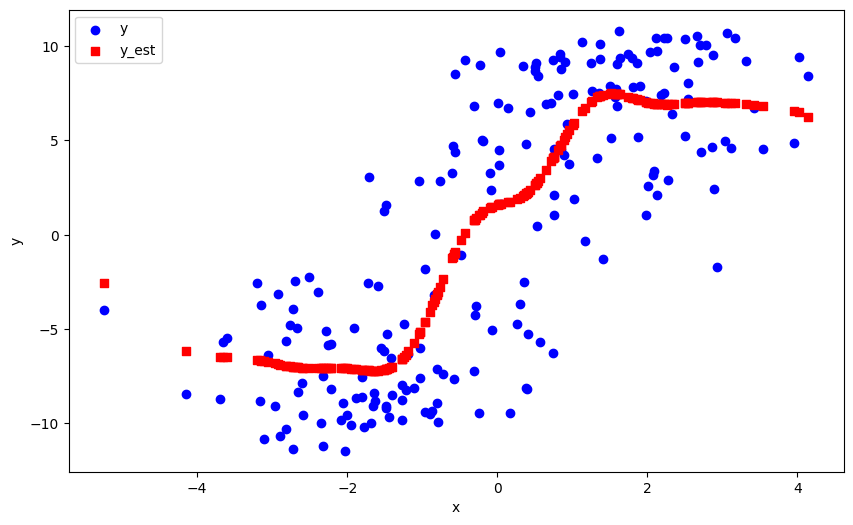

The programm is closed


In [12]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

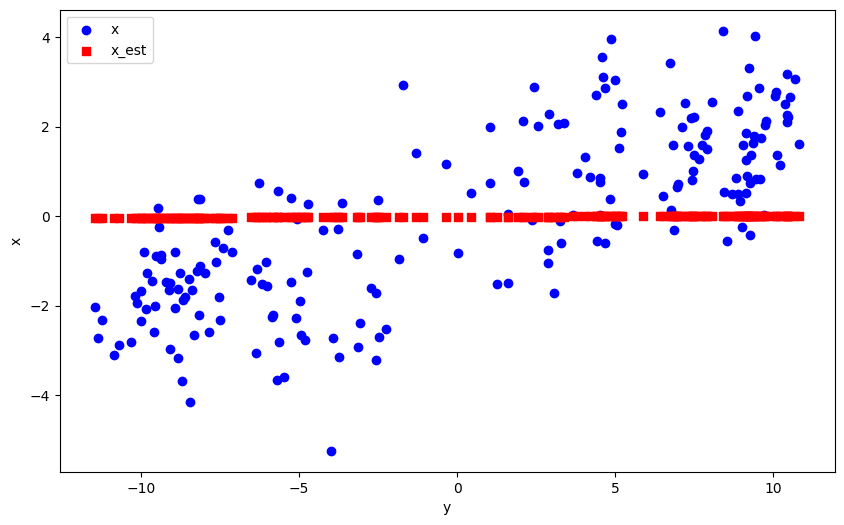

The programm is closed


In [14]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, true_x, label='x', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='x_est', color='red', marker='s') 
plt.xlabel('y')
plt.ylabel('x')
plt.legend()
plt.show()
print("The programm is closed")

### Cov_epsilon = [[1, 0.8], [0.8, 1]]

In [15]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.8, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

Empirical Covariance Matrix:
[[0.90310407 0.73253324]
 [0.73253324 0.93440044]]


In [16]:
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*10 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

covariance:             x          y
x   3.657001  10.870512
y  10.870512  52.242864


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 5.551884859577145
	 mle: 6.51080179809139
	 mse: 17.7501538804269
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[3.6570e+00, 1.4188e-02],
        [1.4188e-02, 5.2243e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.6570e+00, 1.4188e-02],
        [1.4188e-02, 5.2243e+01]])
Check M:  None
Check y:  tensor([-2.5020, -2.1860, -2.4519,  1.6654,  1.5980,  0.0135,  0.1408,  1.6063,
         1.0528, -0.0747,  2.4133, -3.0265,  0.9423, -3.3084,  0.1204,  2.0911,
        -3.3668,  2.1221,  2.8329,  1.3972, -0.6191,  2.8591,  2.3535,  2.3803,
         1.4129,  2.0283,  2.3786, -2.4082,  0.2937, -3.1997, -3.7403, -3.5667,
         1.3544,  1.7306,  2.8070, -1.9035, -1.6416, -1.7289, -2.3407,  2.8039,
        -1.

  0%|          | 3/33000.0 [00:03<12:08:49,  1.33s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.014857346065810573
	score(model): 5.459894818725845
	 mle: 6.207078298545798
	 mse: 10.692655032379534
	W1: tensor([[1.0000e-04, 2.1699e+00],
        [5.5966e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014857346065810573
	W2: tensor([[3.6570e+00, 1.4188e-02],
        [1.4188e-02, 5.2243e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.6570e+00, 1.4188e-02],
        [1.4188e-02, 5.2243e+01]])
Check M:  None
Check y:  tensor([-3.5068, -5.6469, -5.5674,  1.2962,  4.4130,  4.4721,  4.7972,  4.4114,
         4.5612,  3.6149,  2.1769, -3.9136,  0.4146, -4.1562,  4.7647,  1.7820,
        -4.2119,  1.8179,  3.0277,  0.9819, -6.2417,  3.2729,  4.1798,  4.1638,
         1.0006,  4.3163,  2.1311, -3.4345,  4.9140, -4.0585, -4.8961, -4.4329,
         0.9305,  1.3709,  2.9199, -5.7388, -5.8329, -2.8731, -3.3821,  2.9093,
        -2.4575, -4.7933,  4.8017, -5.1471,  1.2260,  3.4298,  0.2797,  3.9402,
         4.2

  0%|          | 4/33000.0 [00:07<20:07:01,  2.19s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.014759413180345682
	score(model): 5.459821963216598
	 mle: 6.20730323390403
	 mse: 10.636536239266606
	W1: tensor([[1.0000e-04, 2.1841e+00],
        [5.5420e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014759413180345682
	W2: tensor([[3.6570e+00, 1.4188e-02],
        [1.4188e-02, 5.2243e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.6570e+00, 1.4188e-02],
        [1.4188e-02, 5.2243e+01]])
Check M:  None
Check y:  tensor([-3.5251e+00, -5.6844e+00, -5.6023e+00,  1.3241e+00,  4.4472e+00,
         4.5007e+00,  4.8207e+00,  4.4456e+00,  4.5880e+00,  3.6430e+00,
         2.2058e+00, -3.9343e+00,  4.3525e-01, -4.1781e+00,  4.7890e+00,
         1.8113e+00, -4.2340e+00,  1.8472e+00,  3.0548e+00,  1.0078e+00,
        -6.2817e+00,  3.3002e+00,  4.2132e+00,  4.1970e+00,  1.0267e+00,
         4.3513e+00,  2.1600e+00, -3.4524e+00,  4.9331e+00, -4.0799e+00,
        -4.9193e+00, -4.4557e+00,  9.5601e-01,  1.3992e

  0%|          | 5/33000.0 [00:11<24:42:55,  2.70s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.014757947232430624
	score(model): 1.6528593115266608
	 mle: 5.750364220738415
	 mse: 10.634438802285866
	W1: tensor([[1.0000e-04, 2.1846e+00],
        [5.5403e-02, 1.0000e-04]])
	cycle loss: 0.014757947232430624
	W2: tensor([[ 2.1999,  0.0892],
        [ 0.0892, 14.6307]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.2005,  0.0894],
        [ 0.0894, 14.6056]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.8801e-03, 0.0000e+00],
        [3.7184e-05, 2.8655e+00]])
Check y:  tensor([-3.5257e+00, -5.6855e+00, -5.6034e+00,  1.3249e+00,  4.4486e+00,
         4.5021e+00,  4.8221e+00,  4.4470e+00,  4.5892e+00,  3.6441e+00,
         2.2066e+00, -3.9350e+00,  4.3589e-01, -4.1788e+00,  4.7905e+00,
         1.8120e+00, -4.2347e+00,  1.8480e+00,  3.0558e+00,  1.0086e+00,
        -6.2830e+00,  3.3013e+00,  4.2146e+00,  4.1984e+00,  1.0275e+00,
         4.3527e+00,  2.1608e+00, -3.4529e+00,  4.9344e+00, -4.08

  0%|          | 6/33000.0 [00:14<25:43:44,  2.81s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.014757947232430624
	score(model): 0.8356881944371267
	 mle: 7.100004134397716
	 mse: 10.634438802285866
	W1: tensor([[1.0000e-04, 2.1846e+00],
        [5.5403e-02, 1.0000e-04]])
	cycle loss: 0.014757947232430624
	W2: tensor([[2.1030, 0.2272],
        [0.2272, 5.1102]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1029, 0.2273],
        [0.2273, 5.1076]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.0793e-05,  0.0000e+00],
        [-4.7208e-06,  4.7624e-01]])
Check y:  tensor([-3.5257e+00, -5.6855e+00, -5.6034e+00,  1.3249e+00,  4.4486e+00,
         4.5021e+00,  4.8221e+00,  4.4470e+00,  4.5892e+00,  3.6441e+00,
         2.2066e+00, -3.9350e+00,  4.3589e-01, -4.1788e+00,  4.7905e+00,
         1.8120e+00, -4.2347e+00,  1.8480e+00,  3.0558e+00,  1.0086e+00,
        -6.2830e+00,  3.3013e+00,  4.2146e+00,  4.1984e+00,  1.0275e+00,
         4.3527e+00,  2.1608e+00, -3.4529e+00,  4.9344e+00, -4.0806e+

  0%|          | 7/33000.0 [00:17<26:12:32,  2.86s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.014757947232430624
	score(model): 0.8033005716357949
	 mle: 7.8806880100598535
	 mse: 10.634438802285866
	W1: tensor([[1.0000e-04, 2.1846e+00],
        [5.5403e-02, 1.0000e-04]])
	cycle loss: 0.014757947232430624
	W2: tensor([[2.0672, 0.3128],
        [0.3128, 4.0043]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0671, 0.3124],
        [0.3124, 4.0043]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0003,  0.0000],
        [ 0.0062,  0.0440]])
Check y:  tensor([-3.5257e+00, -5.6855e+00, -5.6034e+00,  1.3249e+00,  4.4486e+00,
         4.5021e+00,  4.8221e+00,  4.4470e+00,  4.5892e+00,  3.6441e+00,
         2.2066e+00, -3.9350e+00,  4.3589e-01, -4.1788e+00,  4.7905e+00,
         1.8120e+00, -4.2347e+00,  1.8480e+00,  3.0558e+00,  1.0086e+00,
        -6.2830e+00,  3.3013e+00,  4.2146e+00,  4.1984e+00,  1.0275e+00,
         4.3527e+00,  2.1608e+00, -3.4529e+00,  4.9344e+00, -4.0806e+00,
        -4.

  0%|          | 9/33000.0 [00:22<23:10:11,  2.53s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.0069653914740457346
	score(model): 0.35524218628853765
	 mle: 6.960687999959508
	 mse: 8.26037763467318
	W1: tensor([[1.0000e-04, 3.7450e+00],
        [2.2246e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0069653914740457346
	W2: tensor([[2.0671, 0.3124],
        [0.3124, 4.0043]])
	structure loss: 0.0
	Sigma: tensor([[2.0671, 0.3124],
        [0.3124, 4.0043]])
Check M:  tensor([[-0.0003,  0.0000],
        [ 0.0062,  0.0440]])
Check y:  tensor([-5.3206, -7.2871, -7.2805,  4.1891,  6.1472,  5.1807,  5.6639,  6.1505,
         6.0049,  4.1927,  5.6072, -5.8517,  2.3206, -6.1580,  5.6086,  5.0607,
        -6.2280,  5.1171,  6.2817,  3.5483, -8.2101,  6.3887,  6.4594,  6.4679,
         3.5877,  6.3331,  5.5523, -5.2214,  5.9292, -6.0349, -7.0557, -6.5057,
         3.4399,  4.3343,  6.2250, -7.3268, -7.4032, -4.3770, -5.1483,  6.2190,
        -3.6660, -6.9427,  5.6720, -7.2727,  4.0500,  6.4424,  2.0229

  0%|          | 10/33000.0 [00:25<26:02:15,  2.84s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.006501976716102753
	score(model): 0.35459652307688727
	 mle: 6.9568359450318535
	 mse: 8.245376497214945
	W1: tensor([[1.0000e-04, 3.7747e+00],
        [2.1327e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.006501976716102753
	W2: tensor([[2.0671, 0.3124],
        [0.3124, 4.0043]])
	structure loss: 0.0
	Sigma: tensor([[2.0671, 0.3124],
        [0.3124, 4.0043]])
Check M:  tensor([[-0.0003,  0.0000],
        [ 0.0062,  0.0440]])
Check y:  tensor([-5.3751, -7.2721, -7.2629,  4.1591,  5.9843,  4.7714,  5.5523,  5.9875,
         5.9603,  3.4821,  5.5696, -5.8972,  2.3484, -6.1917,  5.4582,  5.0120,
        -6.2587,  5.0683,  6.3355,  3.5393, -8.2304,  6.4648,  6.4247,  6.4408,
         3.5774,  6.2169,  5.5119, -5.2757,  6.0216, -6.0737, -7.0510, -6.5240,
         3.4345,  4.3000,  6.2667, -7.3159, -7.3975, -4.4133, -5.2021,  6.2594,
        -3.6782, -6.9424,  5.5661, -7.2591,  4.0244,  6.5263,  2.0578

  0%|          | 11/33000.0 [00:29<27:38:09,  3.02s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.006472514480674096
	score(model): 0.3491193632738308
	 mle: 6.852136863634131
	 mse: 8.239381761971845
	W1: tensor([[1.0000e-04, 3.7841e+00],
        [2.1226e-02, 1.0000e-04]])
	cycle loss: 0.006472514480674096
	W2: tensor([[2.8987, 0.0848],
        [0.0848, 4.0004]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.8993, 0.0849],
        [0.0849, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0027,  0.0000],
        [ 0.0030,  0.1624]])
Check y:  tensor([-5.3765, -7.2637, -7.2591,  4.1601,  5.9367,  4.6918,  5.5397,  5.9404,
         5.9203,  3.3396,  5.5441, -5.8876,  2.3708, -6.1794,  5.4372,  4.9950,
        -6.2464,  5.0501,  6.3326,  3.5507, -8.2307,  6.4749,  6.4377,  6.4559,
         3.5882,  6.2014,  5.4868, -5.2793,  6.0496, -6.0620, -7.0560, -6.5140,
         3.4473,  4.2982,  6.2583, -7.3040, -7.3840, -4.4287, -5.2071,  6.2506,
        -3.6944, -6.9434,  5.5547, -7.2717,  4.027

  0%|          | 12/33000.0 [00:32<28:36:52,  3.12s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.006472514480674096
	score(model): 0.34909852339596337
	 mle: 6.851577713120404
	 mse: 8.239381761971845
	W1: tensor([[1.0000e-04, 3.7841e+00],
        [2.1226e-02, 1.0000e-04]])
	cycle loss: 0.006472514480674096
	W2: tensor([[2.9758, 0.0662],
        [0.0662, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.9758, 0.0662],
        [0.0662, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.8657e-06,  0.0000e+00],
        [-2.2887e-03, -2.3744e-01]])
Check y:  tensor([-5.3765, -7.2637, -7.2591,  4.1601,  5.9367,  4.6918,  5.5397,  5.9404,
         5.9203,  3.3396,  5.5441, -5.8876,  2.3708, -6.1794,  5.4372,  4.9950,
        -6.2464,  5.0501,  6.3326,  3.5507, -8.2307,  6.4749,  6.4377,  6.4559,
         3.5882,  6.2014,  5.4868, -5.2793,  6.0496, -6.0620, -7.0560, -6.5140,
         3.4473,  4.2982,  6.2583, -7.3040, -7.3840, -4.4287, -5.2071,  6.2506,
        -3.6944, -6.9434,  5.5547

  0%|          | 13/33000.0 [00:35<28:28:53,  3.11s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.006472514480674096
	score(model): 0.3491054842781514
	 mle: 6.851205801189862
	 mse: 8.239381761971845
	W1: tensor([[1.0000e-04, 3.7841e+00],
        [2.1226e-02, 1.0000e-04]])
	cycle loss: 0.006472514480674096
	W2: tensor([[2.9761, 0.0664],
        [0.0664, 4.0008]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.9761, 0.0664],
        [0.0664, 4.0006]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.0444e-07, 0.0000e+00],
        [1.5667e-03, 1.6259e-01]])
Check y:  tensor([-5.3765, -7.2637, -7.2591,  4.1601,  5.9367,  4.6918,  5.5397,  5.9404,
         5.9203,  3.3396,  5.5441, -5.8876,  2.3708, -6.1794,  5.4372,  4.9950,
        -6.2464,  5.0501,  6.3326,  3.5507, -8.2307,  6.4749,  6.4377,  6.4559,
         3.5882,  6.2014,  5.4868, -5.2793,  6.0496, -6.0620, -7.0560, -6.5140,
         3.4473,  4.2982,  6.2583, -7.3040, -7.3840, -4.4287, -5.2071,  6.2506,
        -3.6944, -6.9434,  5.5547, -7.

  0%|          | 16/33000.0 [00:40<20:31:37,  2.24s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0011514743172060804
	score(model): 0.17485987129434807
	 mle: 6.94691864169406
	 mse: 8.360927283628488
	W1: tensor([[1.0000e-04, 3.9516e+00],
        [8.5847e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011514743172060804
	W2: tensor([[2.9761, 0.0664],
        [0.0664, 4.0006]])
	structure loss: 0.0
	Sigma: tensor([[2.9761, 0.0664],
        [0.0664, 4.0006]])
Check M:  tensor([[2.0444e-07, 0.0000e+00],
        [1.5667e-03, 1.6259e-01]])
Check y:  tensor([-5.5116, -7.4535, -7.4401,  4.3688,  6.1138,  5.0770,  5.9817,  6.1170,
         6.1862,  3.6720,  5.8637, -6.0592,  2.4562, -6.3782,  5.8723,  5.2716,
        -6.4515,  5.3312,  6.6785,  3.7135, -8.6019,  6.8107,  6.6530,  6.6751,
         3.7538,  6.3827,  5.8024, -5.4097,  6.5169, -6.2497, -7.3023, -6.7417,
         3.6028,  4.5178,  6.6062, -7.5108, -7.6132, -4.5390, -5.3346,  6.5986,
        -3.7981, -7.1908,  5.9976, -7.4976,  4.2264,  6.

  0%|          | 17/33000.0 [00:44<23:33:25,  2.57s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.001096319183904182
	score(model): 0.17475114690068938
	 mle: 6.944793469770597
	 mse: 8.355658827706218
	W1: tensor([[1.0000e-04, 3.9975e+00],
        [8.2806e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001096319183904182
	W2: tensor([[2.9761, 0.0664],
        [0.0664, 4.0006]])
	structure loss: 0.0
	Sigma: tensor([[2.9761, 0.0664],
        [0.0664, 4.0006]])
Check M:  tensor([[2.0444e-07, 0.0000e+00],
        [1.5667e-03, 1.6259e-01]])
Check y:  tensor([-5.5246, -7.4280, -7.4403,  4.3759,  6.0209,  4.8836,  5.9138,  6.0250,
         6.1032,  3.4038,  5.7937, -6.0304,  2.5278, -6.3342,  5.7874,  5.2273,
        -6.4061,  5.2837,  6.6579,  3.7511, -8.6020,  6.8215,  6.6868,  6.7130,
         3.7897,  6.3581,  5.7338, -5.4300,  6.5374, -6.2102, -7.3180, -6.7003,
         3.6446,  4.5169,  6.5728, -7.4616, -7.5487, -4.5927, -5.3598,  6.5640,
        -3.8482, -7.1891,  5.9323, -7.5547,  4.2408,  6.9

  0%|          | 18/33000.0 [00:48<26:02:57,  2.84s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0010861005973485938
	score(model): 0.17451273124785663
	 mle: 6.9359486091991265
	 mse: 8.354912688384898
	W1: tensor([[1.0000e-04, 4.0051e+00],
        [8.2261e-03, 1.0000e-04]])
	cycle loss: 0.0010861005973485938
	W2: tensor([[3.3977, 0.0199],
        [0.0199, 4.0003]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.3977, 0.0199],
        [0.0199, 4.0003]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0004, 0.0000],
        [0.0003, 0.0833]])
Check y:  tensor([-5.5251, -7.4221, -7.4376,  4.3769,  6.0044,  4.8592,  5.9064,  6.0087,
         6.0902,  3.3804,  5.7850, -6.0261,  2.5364, -6.3287,  5.7775,  5.2218,
        -6.4005,  5.2777,  6.6569,  3.7557, -8.6025,  6.8251,  6.6916,  6.7186,
         3.7942,  6.3527,  5.7254, -5.4315,  6.5440, -6.2049, -7.3209, -6.6957,
         3.6498,  4.5169,  6.5699, -7.4532, -7.5389, -4.5989, -5.3619,  6.5610,
        -3.8546, -7.1899,  5.9252, -7.5618,  4.24

  0%|          | 19/33000.0 [00:51<26:25:04,  2.88s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0010861005973485938
	score(model): 0.17452000155013128
	 mle: 6.935539354725938
	 mse: 8.354912688384898
	W1: tensor([[1.0000e-04, 4.0051e+00],
        [8.2261e-03, 1.0000e-04]])
	cycle loss: 0.0010861005973485938
	W2: tensor([[3.3701, 0.0175],
        [0.0175, 4.0010]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.3701, 0.0175],
        [0.0175, 4.0009]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.3604e-06, 0.0000e+00],
        [2.0033e-04, 8.3347e-02]])
Check y:  tensor([-5.5251, -7.4221, -7.4376,  4.3769,  6.0044,  4.8592,  5.9064,  6.0087,
         6.0902,  3.3804,  5.7850, -6.0261,  2.5364, -6.3287,  5.7775,  5.2218,
        -6.4005,  5.2777,  6.6569,  3.7557, -8.6025,  6.8251,  6.6916,  6.7186,
         3.7942,  6.3527,  5.7254, -5.4315,  6.5440, -6.2049, -7.3209, -6.6957,
         3.6498,  4.5169,  6.5699, -7.4532, -7.5389, -4.5989, -5.3619,  6.5610,
        -3.8546, -7.1899,  5.9252,

  0%|          | 20/33000.0 [00:54<27:56:32,  3.05s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0010861005973485938
	score(model): 0.17451257942176387
	 mle: 6.936221272330918
	 mse: 8.354912688384898
	W1: tensor([[1.0000e-04, 4.0051e+00],
        [8.2261e-03, 1.0000e-04]])
	cycle loss: 0.0010861005973485938
	W2: tensor([[3.3699, 0.0173],
        [0.0173, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.3699, 0.0173],
        [0.0173, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.0779e-08,  0.0000e+00],
        [-2.7789e-04, -1.1675e-01]])
Check y:  tensor([-5.5251, -7.4221, -7.4376,  4.3769,  6.0044,  4.8592,  5.9064,  6.0087,
         6.0902,  3.3804,  5.7850, -6.0261,  2.5364, -6.3287,  5.7775,  5.2218,
        -6.4005,  5.2777,  6.6569,  3.7557, -8.6025,  6.8251,  6.6916,  6.7186,
         3.7942,  6.3527,  5.7254, -5.4315,  6.5440, -6.2049, -7.3209, -6.6957,
         3.6498,  4.5169,  6.5699, -7.4532, -7.5389, -4.5989, -5.3619,  6.5610,
        -3.8546, -7.1899,  5.9

  0%|          | 22/33000.0 [00:58<23:38:51,  2.58s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00028487092146756154
	score(model): 0.08758652947620649
	 mle: 6.983354739624576
	 mse: 8.436737642116531
	W1: tensor([[1.0000e-04, 3.9797e+00],
        [4.2406e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00028487092146756154
	W2: tensor([[3.3699, 0.0173],
        [0.0173, 3.9998]])
	structure loss: 0.0
	Sigma: tensor([[3.3699, 0.0173],
        [0.0173, 3.9998]])
Check M:  tensor([[-2.0779e-08,  0.0000e+00],
        [-2.7789e-04, -1.1675e-01]])
Check y:  tensor([-5.5013, -7.4592, -7.4360,  4.4557,  6.2068,  5.1718,  5.9715,  6.2092,
         6.2852,  3.9900,  6.0040, -6.0838,  2.4416, -6.4293,  5.8725,  5.4045,
        -6.5083,  5.4662,  6.7315,  3.7623, -8.6809,  6.8291,  6.6440,  6.6627,
         3.8049,  6.4199,  5.9436, -5.3960,  6.4734, -6.2902, -7.3744, -6.8170,
         3.6454,  4.6133,  6.6746, -7.5309, -7.6489, -4.5272, -5.3189,  6.6685,
        -3.8088, -7.2700,  5.9860, -7.5349,  4.3

  0%|          | 23/33000.0 [01:02<26:11:19,  2.86s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00024605122478771335
	score(model): 0.0874704001482175
	 mle: 6.977112234348242
	 mse: 8.42350685183232
	W1: tensor([[1.0000e-04, 4.0314e+00],
        [3.8905e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00024605122478771335
	W2: tensor([[3.3699, 0.0173],
        [0.0173, 3.9998]])
	structure loss: 0.0
	Sigma: tensor([[3.3699, 0.0173],
        [0.0173, 3.9998]])
Check M:  tensor([[-2.0779e-08,  0.0000e+00],
        [-2.7789e-04, -1.1675e-01]])
Check y:  tensor([-5.5539, -7.4603, -7.4687,  4.4272,  6.0524,  4.9430,  5.9735,  6.0563,
         6.1510,  3.4556,  5.8885, -6.0727,  2.5334, -6.3830,  5.8472,  5.3068,
        -6.4559,  5.3649,  6.7415,  3.7839, -8.6521,  6.8928,  6.7085,  6.7351,
         3.8236,  6.3800,  5.8274, -5.4573,  6.5962, -6.2567, -7.3602, -6.7521,
         3.6746,  4.5727,  6.6609, -7.4982, -7.5892, -4.6106, -5.3857,  6.6524,
        -3.8656, -7.2351,  5.9919, -7.5852,  4.287

  0%|          | 24/33000.0 [01:06<28:53:45,  3.15s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00023930372353131446
	score(model): 0.08744404626012892
	 mle: 6.975538036332526
	 mse: 8.422019541217816
	W1: tensor([[1.0000e-04, 4.0515e+00],
        [3.8178e-03, 1.0000e-04]])
	cycle loss: 0.00023930372353131446
	W2: tensor([[3.5066, 0.0208],
        [0.0208, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5068, 0.0208],
        [0.0208, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.6003e-05,  0.0000e+00],
        [-1.6256e-04, -5.8319e-02]])
Check y:  tensor([-5.5582, -7.4439, -7.4627,  4.4255,  6.0163,  4.8987,  5.9678,  6.0205,
         6.1196,  3.3813,  5.8648, -6.0626,  2.5551, -6.3675,  5.8366,  5.2892,
        -6.4398,  5.3464,  6.7399,  3.7927, -8.6502,  6.9022,  6.7192,  6.7475,
         3.8318,  6.3684,  5.8039, -5.4640,  6.6146, -6.2428, -7.3655, -6.7373,
         3.6849,  4.5684,  6.6546, -7.4725, -7.5576, -4.6277, -5.3941,  6.6458,
        -3.8806, -7.2343,  

  0%|          | 25/33000.0 [01:09<29:07:58,  3.18s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00023930372353131446
	score(model): 0.08744474194540029
	 mle: 6.975585337158963
	 mse: 8.422019541217816
	W1: tensor([[1.0000e-04, 4.0515e+00],
        [3.8178e-03, 1.0000e-04]])
	cycle loss: 0.00023930372353131446
	W2: tensor([[3.5131, 0.0208],
        [0.0208, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5131, 0.0208],
        [0.0208, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.3855e-07,  0.0000e+00],
        [-1.6275e-04, -5.8322e-02]])
Check y:  tensor([-5.5582, -7.4439, -7.4627,  4.4255,  6.0163,  4.8987,  5.9678,  6.0205,
         6.1196,  3.3813,  5.8648, -6.0626,  2.5551, -6.3675,  5.8366,  5.2892,
        -6.4398,  5.3464,  6.7399,  3.7927, -8.6502,  6.9022,  6.7192,  6.7475,
         3.8318,  6.3684,  5.8039, -5.4640,  6.6146, -6.2428, -7.3655, -6.7373,
         3.6849,  4.5684,  6.6546, -7.4725, -7.5576, -4.6277, -5.3941,  6.6458,
        -3.8806, -7.2343,  

  0%|          | 26/33000.0 [01:12<28:05:54,  3.07s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00023930372353131446
	score(model): 0.0874454889944521
	 mle: 6.975681078437612
	 mse: 8.422019541217816
	W1: tensor([[1.0000e-04, 4.0515e+00],
        [3.8178e-03, 1.0000e-04]])
	cycle loss: 0.00023930372353131446
	W2: tensor([[3.5130, 0.0207],
        [0.0207, 3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5130, 0.0207],
        [0.0207, 3.9996]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.9943e-09,  0.0000e+00],
        [-1.6303e-04, -5.8324e-02]])
Check y:  tensor([-5.5582, -7.4439, -7.4627,  4.4255,  6.0163,  4.8987,  5.9678,  6.0205,
         6.1196,  3.3813,  5.8648, -6.0626,  2.5551, -6.3675,  5.8366,  5.2892,
        -6.4398,  5.3464,  6.7399,  3.7927, -8.6502,  6.9022,  6.7192,  6.7475,
         3.8318,  6.3684,  5.8039, -5.4640,  6.6146, -6.2428, -7.3655, -6.7373,
         3.6849,  4.5684,  6.6546, -7.4725, -7.5576, -4.6277, -5.3941,  6.6458,
        -3.8806, -7.2343,  5

  0%|          | 28/33000.0 [01:16<23:59:24,  2.62s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 8.083636528510851e-05
	score(model): 0.04389802902202436
	 mle: 7.009923273724976
	 mse: 8.486599797603514
	W1: tensor([[1.0000e-04, 3.9577e+00],
        [2.2714e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.083636528510851e-05
	W2: tensor([[3.5130, 0.0207],
        [0.0207, 3.9996]])
	structure loss: 0.0
	Sigma: tensor([[3.5130, 0.0207],
        [0.0207, 3.9996]])
Check M:  tensor([[-2.9943e-09,  0.0000e+00],
        [-1.6303e-04, -5.8324e-02]])
Check y:  tensor([-5.5210, -7.5188, -7.4889,  4.4541,  6.3350,  5.3676,  5.9984,  6.3368,
         6.3827,  4.4229,  6.0166, -6.1073,  2.4186, -6.4494,  5.9195,  5.4164,
        -6.5269,  5.4787,  6.6997,  3.7511, -8.6589,  6.7816,  6.6489,  6.6625,
         3.7942,  6.4878,  5.9569, -5.4141,  6.4095, -6.3123, -7.3684, -6.8279,
         3.6327,  4.6142,  6.6503, -7.5927, -7.7073, -4.5336, -5.3359,  6.6450,
        -3.8115, -7.2666,  6.0100, -7.5324,  4.30

  0%|          | 29/33000.0 [01:20<26:36:34,  2.91s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 6.468780302615329e-05
	score(model): 0.04382145265894329
	 mle: 7.000246967923423
	 mse: 8.467026398347382
	W1: tensor([[1.0000e-04, 4.0168e+00],
        [2.0020e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.468780302615329e-05
	W2: tensor([[3.5130, 0.0207],
        [0.0207, 3.9996]])
	structure loss: 0.0
	Sigma: tensor([[3.5130, 0.0207],
        [0.0207, 3.9996]])
Check M:  tensor([[-2.9943e-09,  0.0000e+00],
        [-1.6303e-04, -5.8324e-02]])
Check y:  tensor([-5.5495, -7.4707, -7.4633,  4.4491,  6.1557,  5.0609,  5.9615,  6.1583,
         6.2660,  3.7466,  5.9947, -6.1020,  2.4746, -6.4254,  5.8502,  5.3864,
        -6.4998,  5.4482,  6.7813,  3.7699, -8.6618,  6.8929,  6.6605,  6.6828,
         3.8115,  6.3971,  5.9323, -5.4472,  6.5236, -6.2950, -7.3615, -6.7945,
         3.6553,  4.6039,  6.7168, -7.5236, -7.6248, -4.5764, -5.3719,  6.7099,
        -3.8373, -7.2494,  5.9778, -7.5539,  4.30

  0%|          | 30/33000.0 [01:23<28:38:52,  3.13s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 6.225182486652159e-05
	score(model): 0.04380199097567001
	 mle: 6.996466909017356
	 mse: 8.461406075248513
	W1: tensor([[1.0000e-04, 4.0365e+00],
        [1.9543e-03, 1.0000e-04]])
	cycle loss: 6.225182486652159e-05
	W2: tensor([[3.5746, 0.0300],
        [0.0300, 4.0012]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5748, 0.0299],
        [0.0299, 4.0010]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.3780e-06,  0.0000e+00],
        [ 8.3512e-05,  2.0817e-02]])
Check y:  tensor([-5.5632, -7.4629, -7.4678,  4.4405,  6.0906,  4.9836,  5.9647,  6.0938,
         6.2024,  3.5565,  5.9520, -6.0947,  2.5078, -6.4077,  5.8441,  5.3520,
        -6.4804,  5.4123,  6.7802,  3.7791, -8.6491,  6.9110,  6.6807,  6.7059,
         3.8197,  6.3779,  5.8896, -5.4639,  6.5653, -6.2809, -7.3605, -6.7729,
         3.6672,  4.5908,  6.7073, -7.5034, -7.5951, -4.6026, -5.3905,  6.6996,
        -3.8561, -7.2409,  5

  0%|          | 31/33000.0 [01:27<28:58:20,  3.16s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 6.225182486652159e-05
	score(model): 0.04379923796219554
	 mle: 6.996857382865863
	 mse: 8.461406075248513
	W1: tensor([[1.0000e-04, 4.0365e+00],
        [1.9543e-03, 1.0000e-04]])
	cycle loss: 6.225182486652159e-05
	W2: tensor([[3.5755, 0.0297],
        [0.0297, 4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5755, 0.0298],
        [0.0298, 4.0003]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.0429e-08,  0.0000e+00],
        [ 8.1598e-05,  2.0793e-02]])
Check y:  tensor([-5.5632, -7.4629, -7.4678,  4.4405,  6.0906,  4.9836,  5.9647,  6.0938,
         6.2024,  3.5565,  5.9520, -6.0947,  2.5078, -6.4077,  5.8441,  5.3520,
        -6.4804,  5.4123,  6.7802,  3.7791, -8.6491,  6.9110,  6.6807,  6.7059,
         3.8197,  6.3779,  5.8896, -5.4639,  6.5653, -6.2809, -7.3605, -6.7729,
         3.6672,  4.5908,  6.7073, -7.5034, -7.5951, -4.6026, -5.3905,  6.6996,
        -3.8561, -7.2409,  5

  0%|          | 32/33000.0 [01:30<28:09:23,  3.07s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 6.225182486652159e-05
	score(model): 0.04379944218448162
	 mle: 6.997061257015519
	 mse: 8.461406075248513
	W1: tensor([[1.0000e-04, 4.0365e+00],
        [1.9543e-03, 1.0000e-04]])
	cycle loss: 6.225182486652159e-05
	W2: tensor([[3.5755, 0.0297],
        [0.0297, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.3644e-09, 0.0000e+00],
        [8.1081e-05, 2.0795e-02]])
Check y:  tensor([-5.5632, -7.4629, -7.4678,  4.4405,  6.0906,  4.9836,  5.9647,  6.0938,
         6.2024,  3.5565,  5.9520, -6.0947,  2.5078, -6.4077,  5.8441,  5.3520,
        -6.4804,  5.4123,  6.7802,  3.7791, -8.6491,  6.9110,  6.6807,  6.7059,
         3.8197,  6.3779,  5.8896, -5.4639,  6.5653, -6.2809, -7.3605, -6.7729,
         3.6672,  4.5908,  6.7073, -7.5034, -7.5951, -4.6026, -5.3905,  6.6996,
        -3.8561, -7.2409,  5.982

  0%|          | 34/33000.0 [01:33<23:25:47,  2.56s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 3.727009025977779e-05
	score(model): 0.022002890986021043
	 mle: 7.028128228438165
	 mse: 8.52234456755006
	W1: tensor([[1.0000e-04, 3.9328e+00],
        [1.5519e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.727009025977779e-05
	W2: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]])
	structure loss: 0.0
	Sigma: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]])
Check M:  tensor([[2.3644e-09, 0.0000e+00],
        [8.1081e-05, 2.0795e-02]])
Check y:  tensor([-5.6421, -7.5926, -7.5307,  4.4309,  6.2549,  5.7162,  6.1796,  6.2586,
         6.1697,  4.8237,  5.9459, -6.2194,  2.4799, -6.5263,  6.1270,  5.3556,
        -6.5930,  5.4161,  6.6786,  3.7587, -8.6717,  6.7843,  6.6975,  6.7130,
         3.7999,  6.4964,  5.8861, -5.5310,  6.4138, -6.4059, -7.2741, -6.8434,
         3.6455,  4.5840,  6.6193, -7.6915, -7.8185, -4.5833, -5.4487,  6.6130,
        -3.8016, -7.1929,  6.1872, -7.4187,  4.2846,

  0%|          | 35/33000.0 [01:38<26:59:11,  2.95s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 1.9482866602693605e-05
	score(model): 0.021947646125076728
	 mle: 7.01617832156254
	 mse: 8.4980150818399
	W1: tensor([[1.0000e-04, 4.0063e+00],
        [1.1012e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.9482866602693605e-05
	W2: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]])
	structure loss: 0.0
	Sigma: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]])
Check M:  tensor([[2.3644e-09, 0.0000e+00],
        [8.1081e-05, 2.0795e-02]])
Check y:  tensor([-5.5428, -7.4755, -7.4580,  4.4672,  6.2484,  5.2297,  5.9857,  6.2503,
         6.3355,  4.0738,  6.0591, -6.1169,  2.4366, -6.4487,  5.8924,  5.4399,
        -6.5239,  5.5036,  6.7832,  3.7638, -8.6628,  6.8662,  6.6345,  6.6524,
         3.8068,  6.4291,  5.9968, -5.4369,  6.4614, -6.3157, -7.3571, -6.8174,
         3.6456,  4.6279,  6.7311, -7.5377, -7.6449, -4.5518, -5.3592,  6.7254,
        -3.8183, -7.2534,  5.9994, -7.5289,  4.3138,

  0%|          | 36/33000.0 [01:41<28:57:53,  3.16s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 1.7791842533032565e-05
	score(model): 0.021925370742845337
	 mle: 7.009588225166056
	 mse: 8.484777839071707
	W1: tensor([[1.0000e-04, 4.0326e+00],
        [1.0454e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.7791842533032565e-05
	W2: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]])
	structure loss: 0.0
	Sigma: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]])
Check M:  tensor([[2.3644e-09, 0.0000e+00],
        [8.1081e-05, 2.0795e-02]])
Check y:  tensor([-5.5620, -7.4639, -7.4644,  4.4500,  6.1427,  5.0482,  5.9595,  6.1453,
         6.2534,  3.7010,  6.0017, -6.1069,  2.4792, -6.4240,  5.8473,  5.3893,
        -6.4969,  5.4514,  6.7942,  3.7714, -8.6411,  6.9046,  6.6544,  6.6772,
         3.8130,  6.3866,  5.9388, -5.4603,  6.5228, -6.2961, -7.3562, -6.7872,
         3.6571,  4.6048,  6.7297, -7.5075, -7.6003, -4.5875, -5.3852,  6.7228,
        -3.8428, -7.2418,  5.9759, -7.5582,  4.30

  0%|          | 37/33000.0 [01:45<30:30:11,  3.33s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 2.5703979472879723e-05
	score(model): 0.021920081448800692
	 mle: 7.001832476292625
	 mse: 8.47630665629671
	W1: tensor([[1.0000e-04, 4.0589e+00],
        [1.2486e-03, 1.0000e-04]])
	cycle loss: 2.5703979472879723e-05
	W2: tensor([[3.5755, 0.0296],
        [0.0296, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5809, 0.0311],
        [0.0311, 4.0060]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.5692e-05,  0.0000e+00],
        [-7.7261e-05, -1.4600e-02]])
Check y:  tensor([-5.5805, -7.4524, -7.4686,  4.4366,  6.0571,  4.9400,  5.9608,  6.0607,
         6.1675,  3.4543,  5.9332, -6.0936,  2.5261, -6.3957,  5.8357,  5.3358,
        -6.4665,  5.3956,  6.7840,  3.7844, -8.6305,  6.9239,  6.6898,  6.7165,
         3.8245,  6.3672,  5.8707, -5.4837,  6.5796, -6.2730, -7.3534, -6.7542,
         3.6739,  4.5847,  6.7071, -7.4806, -7.5624, -4.6290, -5.4119,  6.6990,
        -3.8761, -7.2284,

  0%|          | 38/33000.0 [01:48<30:19:39,  3.31s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 2.5703979472879723e-05
	score(model): 0.021921486428343222
	 mle: 7.00466187729295
	 mse: 8.47630665629671
	W1: tensor([[1.0000e-04, 4.0589e+00],
        [1.2486e-03, 1.0000e-04]])
	cycle loss: 2.5703979472879723e-05
	W2: tensor([[3.6072, 0.0372],
        [0.0372, 4.0013]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6072, 0.0371],
        [0.0371, 4.0011]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.4957e-08,  0.0000e+00],
        [ 5.1390e-05,  1.0413e-02]])
Check y:  tensor([-5.5805, -7.4524, -7.4686,  4.4366,  6.0571,  4.9400,  5.9608,  6.0607,
         6.1675,  3.4543,  5.9332, -6.0936,  2.5261, -6.3957,  5.8357,  5.3358,
        -6.4665,  5.3956,  6.7840,  3.7844, -8.6305,  6.9239,  6.6898,  6.7165,
         3.8245,  6.3672,  5.8707, -5.4837,  6.5796, -6.2730, -7.3534, -6.7542,
         3.6739,  4.5847,  6.7071, -7.4806, -7.5624, -4.6290, -5.4119,  6.6990,
        -3.8761, -7.2284, 

  0%|          | 39/33000.0 [01:51<28:45:01,  3.14s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 2.5703979472879723e-05
	score(model): 0.0219199438932536
	 mle: 7.005426515715788
	 mse: 8.47630665629671
	W1: tensor([[1.0000e-04, 4.0589e+00],
        [1.2486e-03, 1.0000e-04]])
	cycle loss: 2.5703979472879723e-05
	W2: tensor([[3.6073, 0.0370],
        [0.0370, 4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6073, 0.0369],
        [0.0369, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0066e-08,  0.0000e+00],
        [ 5.0579e-05,  1.0399e-02]])
Check y:  tensor([-5.5805, -7.4524, -7.4686,  4.4366,  6.0571,  4.9400,  5.9608,  6.0607,
         6.1675,  3.4543,  5.9332, -6.0936,  2.5261, -6.3957,  5.8357,  5.3358,
        -6.4665,  5.3956,  6.7840,  3.7844, -8.6305,  6.9239,  6.6898,  6.7165,
         3.8245,  6.3672,  5.8707, -5.4837,  6.5796, -6.2730, -7.3534, -6.7542,
         3.6739,  4.5847,  6.7071, -7.4806, -7.5624, -4.6290, -5.4119,  6.6990,
        -3.8761, -7.2284,  

  0%|          | 40/33000.0 [01:54<28:03:03,  3.06s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 2.5703979472879723e-05
	score(model): 0.02192033450392418
	 mle: 7.005560789906198
	 mse: 8.47630665629671
	W1: tensor([[1.0000e-04, 4.0589e+00],
        [1.2486e-03, 1.0000e-04]])
	cycle loss: 2.5703979472879723e-05
	W2: tensor([[3.6073, 0.0368],
        [0.0368, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6073, 0.0368],
        [0.0368, 3.9995]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.5031e-08,  0.0000e+00],
        [-7.1200e-05, -1.4601e-02]])
Check y:  tensor([-5.5805, -7.4524, -7.4686,  4.4366,  6.0571,  4.9400,  5.9608,  6.0607,
         6.1675,  3.4543,  5.9332, -6.0936,  2.5261, -6.3957,  5.8357,  5.3358,
        -6.4665,  5.3956,  6.7840,  3.7844, -8.6305,  6.9239,  6.6898,  6.7165,
         3.8245,  6.3672,  5.8707, -5.4837,  6.5796, -6.2730, -7.3534, -6.7542,
         3.6739,  4.5847,  6.7071, -7.4806, -7.5624, -4.6290, -5.4119,  6.6990,
        -3.8761, -7.2284, 

  0%|          | 41/33000.0 [01:57<26:18:06,  2.87s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 2.5703979472879723e-05
	score(model): 0.02191989656731405
	 mle: 7.00510854257893
	 mse: 8.47630665629671
	W1: tensor([[1.0000e-04, 4.0589e+00],
        [1.2486e-03, 1.0000e-04]])
	cycle loss: 2.5703979472879723e-05
	W2: tensor([[3.6073, 0.0369],
        [0.0369, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6073, 0.0370],
        [0.0370, 4.0003]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.2065e-08,  0.0000e+00],
        [-7.1119e-05, -1.4600e-02]])
Check y:  tensor([-5.5805, -7.4524, -7.4686,  4.4366,  6.0571,  4.9400,  5.9608,  6.0607,
         6.1675,  3.4543,  5.9332, -6.0936,  2.5261, -6.3957,  5.8357,  5.3358,
        -6.4665,  5.3956,  6.7840,  3.7844, -8.6305,  6.9239,  6.6898,  6.7165,
         3.8245,  6.3672,  5.8707, -5.4837,  6.5796, -6.2730, -7.3534, -6.7542,
         3.6739,  4.5847,  6.7071, -7.4806, -7.5624, -4.6290, -5.4119,  6.6990,
        -3.8761, -7.2284,  

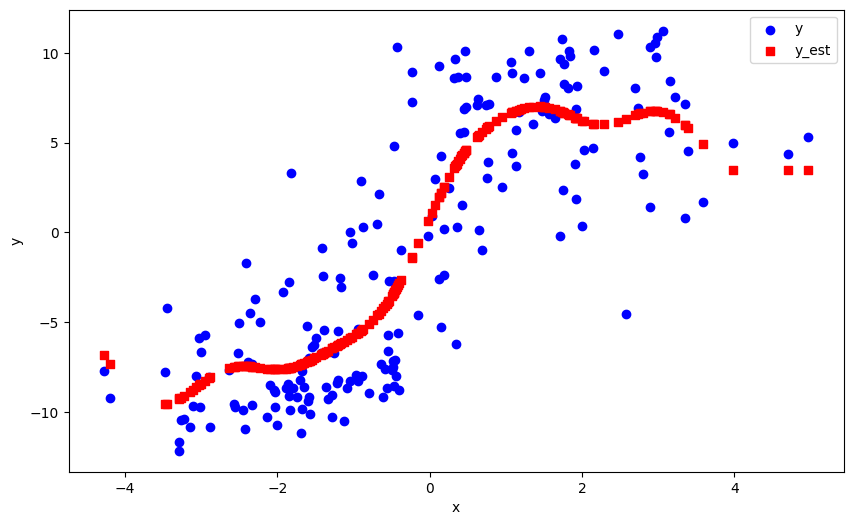

The programm is closed


In [17]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

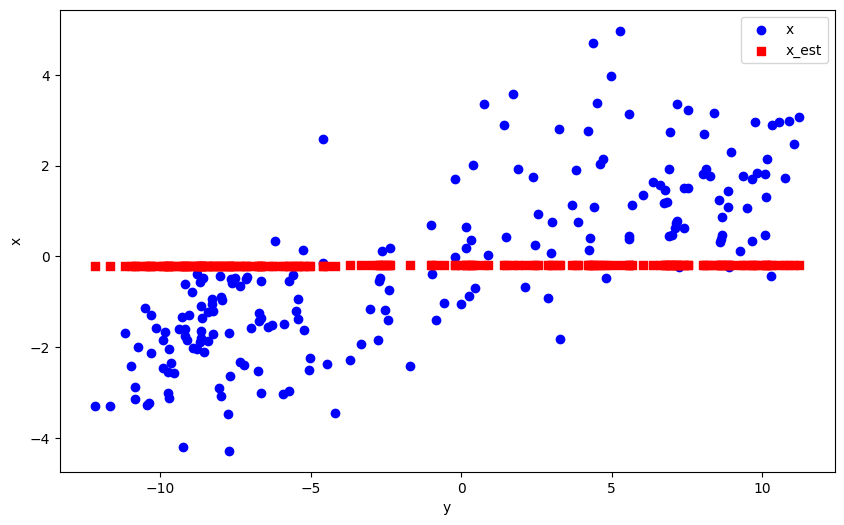

The programm is closed


In [19]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, true_x, label='x', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='x_est', color='red', marker='s') 
plt.xlabel('y')
plt.ylabel('x')
plt.legend()
plt.show()
print("The programm is closed")

## Sinus small scale

### Cov_epsilon = [[1, 0], [0, 1]]

In [20]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

Empirical Covariance Matrix:
[[ 0.91738083 -0.02608031]
 [-0.02608031  0.93109508]]


In [21]:
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*6 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

covariance:            x          y
x  4.011716   6.157437
y  6.157437  19.476639


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 2.185107386810512
	 mle: 5.504372911981123
	 mse: 6.530370088071503
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[4.0117e+00, 1.5252e-02],
        [1.5252e-02, 1.9477e+01]])
	structure loss: 0.0
	Sigma: tensor([[4.0117e+00, 1.5252e-02],
        [1.5252e-02, 1.9477e+01]])
Check M:  None
Check y:  tensor([-0.5090, -2.0568, -1.0444,  0.0485,  2.6944,  1.6259,  0.4059, -3.1185,
         1.0717,  2.8484,  0.1349, -3.1620, -2.3056, -0.3747,  2.4811, -0.3856,
        -3.2258,  2.8048,  1.8368, -2.6314, -3.2209,  1.8282, -3.0858,  2.3540,
         0.7202,  1.8466, -1.3318,  2.6818,  2.7082, -1.0662, -1.5018, -0.0335,
         2.0537,  1.1951,  2.8334, -3.0898, -2.5525,  0.0196, -2.2458,  1.1483,
        -

  0%|          | 3/33000.0 [00:04<12:43:33,  1.39s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.009823114734201388
	score(model): 2.1101019872986275
	 mle: 5.5257657166273555
	 mse: 5.517469948890932
	W1: tensor([[1.0000e-04, 1.4987e+00],
        [6.5970e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.009823114734201388
	W2: tensor([[4.0117e+00, 1.5252e-02],
        [1.5252e-02, 1.9477e+01]])
	structure loss: 0.0
	Sigma: tensor([[4.0117e+00, 1.5252e-02],
        [1.5252e-02, 1.9477e+01]])
Check M:  None
Check y:  tensor([-0.6594, -2.1405, -3.9668,  2.7319,  2.4923,  3.2384,  3.0173, -3.1220,
         0.8456,  3.0349,  2.8759, -3.1896, -2.3473, -3.8421,  3.2820, -0.5327,
        -3.3967,  3.1301,  1.5149, -3.7622, -3.3356,  1.5070, -3.0774,  2.0357,
         0.5359,  3.2668, -1.4902,  2.4713,  2.5157, -1.2289, -3.9461, -3.6385,
         3.2864,  0.9523,  2.7973, -3.0827, -3.7803, -0.7566, -2.2978,  0.9118,
        -2.3860,  1.8931,  2.8435, -0.6103, -1.6565,  3.0773, -3.0341,  0.2392,
         3.

  0%|          | 4/33000.0 [00:08<20:35:08,  2.25s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.00989146450761158
	score(model): 2.1100010962506635
	 mle: 5.524136733565714
	 mse: 5.531985509961352
	W1: tensor([[1.0000e-04, 1.4796e+00],
        [6.7053e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00989146450761158
	W2: tensor([[4.0117e+00, 1.5252e-02],
        [1.5252e-02, 1.9477e+01]])
	structure loss: 0.0
	Sigma: tensor([[4.0117e+00, 1.5252e-02],
        [1.5252e-02, 1.9477e+01]])
Check M:  None
Check y:  tensor([-0.6493, -2.1116, -3.9470,  2.7214,  2.4597,  3.2200,  2.9938, -3.0878,
         0.8212,  2.9947,  2.8520, -3.1568, -2.3149, -3.8320,  3.2416, -0.5246,
        -3.3694,  3.0880,  1.4813, -3.7445, -3.3064,  1.4734, -3.0425,  2.0030,
         0.5195,  3.2429, -1.4705,  2.4389,  2.4831, -1.2120, -3.9264, -3.6546,
         3.2567,  0.9256,  2.7616, -3.0478, -3.7628, -0.7481, -2.2662,  0.8860,
        -2.3529,  1.8599,  2.8071, -0.6009, -1.6348,  3.0362, -2.9986,  0.2307,
         3.235

  0%|          | 5/33000.0 [00:11<23:38:53,  2.58s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.009889551749385994
	score(model): 0.6865185008501367
	 mle: 5.272163897204305
	 mse: 5.531626397384951
	W1: tensor([[1.0000e-04, 1.4795e+00],
        [6.7050e-02, 1.0000e-04]])
	cycle loss: 0.009889551749385994
	W2: tensor([[2.9706, 0.0474],
        [0.0474, 5.4946]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.9703, 0.0474],
        [0.0474, 5.4855]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.1591e-03,  0.0000e+00],
        [ 1.6010e-05,  1.0063e+00]])
Check y:  tensor([-0.6493, -2.1114, -3.9484,  2.7224,  2.4606,  3.2211,  2.9940, -3.0884,
         0.8214,  2.9954,  2.8520, -3.1574, -2.3144, -3.8330,  3.2416, -0.5244,
        -3.3701,  3.0885,  1.4810, -3.7442, -3.3072,  1.4731, -3.0430,  2.0032,
         0.5200,  3.2436, -1.4710,  2.4397,  2.4839, -1.2125, -3.9273, -3.6561,
         3.2572,  0.9256,  2.7626, -3.0484, -3.7624, -0.7484, -2.2658,  0.8861,
        -2.3525,  1.8598,  2.8081, 

  0%|          | 6/33000.0 [00:14<25:03:52,  2.73s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.009889551749385994
	score(model): 0.5598848371537869
	 mle: 5.499641155160108
	 mse: 5.531626397384951
	W1: tensor([[1.0000e-04, 1.4795e+00],
        [6.7050e-02, 1.0000e-04]])
	cycle loss: 0.009889551749385994
	W2: tensor([[3.0130, 0.1765],
        [0.1765, 3.9957]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.0130, 0.1765],
        [0.1765, 3.9956]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.6590e-05,  0.0000e+00],
        [-3.7799e-03, -2.0237e-01]])
Check y:  tensor([-0.6493, -2.1114, -3.9484,  2.7224,  2.4606,  3.2211,  2.9940, -3.0884,
         0.8214,  2.9954,  2.8520, -3.1574, -2.3144, -3.8330,  3.2416, -0.5244,
        -3.3701,  3.0885,  1.4810, -3.7442, -3.3072,  1.4731, -3.0430,  2.0032,
         0.5200,  3.2436, -1.4710,  2.4397,  2.4839, -1.2125, -3.9273, -3.6561,
         3.2572,  0.9256,  2.7626, -3.0484, -3.7624, -0.7484, -2.2658,  0.8861,
        -2.3525,  1.8598,  2.8081, 

  0%|          | 7/33000.0 [00:17<24:56:21,  2.72s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.009889551749385994
	score(model): 0.5597656448556317
	 mle: 5.498490065096201
	 mse: 5.531626397384951
	W1: tensor([[1.0000e-04, 1.4795e+00],
        [6.7050e-02, 1.0000e-04]])
	cycle loss: 0.009889551749385994
	W2: tensor([[3.0139, 0.1530],
        [0.1530, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.0139, 0.1530],
        [0.1530, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0418e-07,  0.0000e+00],
        [ 1.3177e-02,  5.9667e-01]])
Check y:  tensor([-0.6493, -2.1114, -3.9484,  2.7224,  2.4606,  3.2211,  2.9940, -3.0884,
         0.8214,  2.9954,  2.8520, -3.1574, -2.3144, -3.8330,  3.2416, -0.5244,
        -3.3701,  3.0885,  1.4810, -3.7442, -3.3072,  1.4731, -3.0430,  2.0032,
         0.5200,  3.2436, -1.4710,  2.4397,  2.4839, -1.2125, -3.9273, -3.6561,
         3.2572,  0.9256,  2.7626, -3.0484, -3.7624, -0.7484, -2.2658,  0.8861,
        -2.3525,  1.8598,  2.8081, 

  0%|          | 10/33000.0 [00:20<16:52:57,  1.84s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.0030033013297976474
	score(model): 0.2770670319340955
	 mle: 5.480779096185465
	 mse: 5.390996728144082
	W1: tensor([[1.0000e-04, 2.1390e+00],
        [2.5601e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0030033013297976474
	W2: tensor([[3.0139, 0.1530],
        [0.1530, 3.9998]])
	structure loss: 0.0
	Sigma: tensor([[3.0139, 0.1530],
        [0.1530, 3.9998]])
Check M:  tensor([[-1.0418e-07,  0.0000e+00],
        [ 1.3177e-02,  5.9667e-01]])
Check y:  tensor([-0.8528, -3.0066, -4.4169,  2.6266,  3.6630,  3.7982,  2.7393, -3.7498,
         1.2139,  4.5093,  2.6863, -3.8040, -3.2100, -3.9310,  4.5828, -0.6628,
        -4.0042,  4.6153,  2.1125, -4.4929, -3.9389,  2.1012, -3.7164,  2.9086,
         0.8161,  4.0265, -2.1319,  3.6281,  3.7021, -1.7304, -4.5443, -3.4233,
         4.2315,  1.3514,  4.1628, -3.7203, -4.5135, -0.5611, -3.1653,  1.2992,
        -3.2432,  2.6816,  4.2352, -0.7789, -2.3789, 

  0%|          | 11/33000.0 [00:24<20:55:23,  2.28s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.002976655113644977
	score(model): 0.27702470511339466
	 mle: 5.480520791550993
	 mse: 5.389844234046592
	W1: tensor([[1.0000e-04, 2.1481e+00],
        [2.5379e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.002976655113644977
	W2: tensor([[3.0139, 0.1530],
        [0.1530, 3.9998]])
	structure loss: 0.0
	Sigma: tensor([[3.0139, 0.1530],
        [0.1530, 3.9998]])
Check M:  tensor([[-1.0418e-07,  0.0000e+00],
        [ 1.3177e-02,  5.9667e-01]])
Check y:  tensor([-0.8418, -3.0233, -4.4044,  2.6665,  3.6604,  3.8061,  2.7187, -3.7376,
         1.2131,  4.4978,  2.7053, -3.7903, -3.2295, -3.9450,  4.5940, -0.6541,
        -3.9944,  4.6079,  2.1280, -4.5141, -3.9263,  2.1165, -3.7056,  2.9214,
         0.8106,  4.0406, -2.1242,  3.6262,  3.6986, -1.7172, -4.5372, -3.4363,
         4.2486,  1.3531,  4.1510, -3.7093, -4.5343, -0.5614, -3.1847,  1.2999,
        -3.2626,  2.6972,  4.2227, -0.7687, -2.3769,  

  0%|          | 12/33000.0 [00:27<22:41:20,  2.48s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.0029703378241341394
	score(model): 0.2760698166692483
	 mle: 5.461542292519827
	 mse: 5.389658049538162
	W1: tensor([[1.0000e-04, 2.1499e+00],
        [2.5331e-02, 1.0000e-04]])
	cycle loss: 0.0029703378241341394
	W2: tensor([[3.5484, 0.0207],
        [0.0207, 3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5490, 0.0207],
        [0.0207, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.5188e-04,  0.0000e+00],
        [ 1.0989e-05, -8.0037e-02]])
Check y:  tensor([-0.8405, -3.0259, -4.4032,  2.6690,  3.6601,  3.8064,  2.7157, -3.7354,
         1.2118,  4.4965,  2.7075, -3.7880, -3.2326, -3.9476,  4.5968, -0.6534,
        -3.9932,  4.6075,  2.1306, -4.5164, -3.9245,  2.1191, -3.7037,  2.9238,
         0.8081,  4.0426, -2.1227,  3.6261,  3.6982, -1.7149, -4.5350, -3.4340,
         4.2515,  1.3524,  4.1493, -3.7073, -4.5363, -0.5652, -3.1878,  1.2989,
        -3.2656,  2.7001,  4.220

  0%|          | 13/33000.0 [00:30<23:02:22,  2.51s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.0029703378241341394
	score(model): 0.2760666966374793
	 mle: 5.4614790750404705
	 mse: 5.389658049538162
	W1: tensor([[1.0000e-04, 2.1499e+00],
        [2.5331e-02, 1.0000e-04]])
	cycle loss: 0.0029703378241341394
	W2: tensor([[3.5787, 0.0110],
        [0.0110, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5787, 0.0110],
        [0.0110, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.7052e-06,  0.0000e+00],
        [-1.1900e-04, -8.0030e-02]])
Check y:  tensor([-0.8405, -3.0259, -4.4032,  2.6690,  3.6601,  3.8064,  2.7157, -3.7354,
         1.2118,  4.4965,  2.7075, -3.7880, -3.2326, -3.9476,  4.5968, -0.6534,
        -3.9932,  4.6075,  2.1306, -4.5164, -3.9245,  2.1191, -3.7037,  2.9238,
         0.8081,  4.0426, -2.1227,  3.6261,  3.6982, -1.7149, -4.5350, -3.4340,
         4.2515,  1.3524,  4.1493, -3.7073, -4.5363, -0.5652, -3.1878,  1.2989,
        -3.2656,  2.7001,  4.22

  0%|          | 14/33000.0 [00:33<24:14:01,  2.64s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.0029703378241341394
	score(model): 0.27606644621682247
	 mle: 5.46145239318227
	 mse: 5.389658049538162
	W1: tensor([[1.0000e-04, 2.1499e+00],
        [2.5331e-02, 1.0000e-04]])
	cycle loss: 0.0029703378241341394
	W2: tensor([[3.5786, 0.0111],
        [0.0111, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5786, 0.0111],
        [0.0111, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.9913e-08,  0.0000e+00],
        [-1.1809e-04, -8.0029e-02]])
Check y:  tensor([-0.8405, -3.0259, -4.4032,  2.6690,  3.6601,  3.8064,  2.7157, -3.7354,
         1.2118,  4.4965,  2.7075, -3.7880, -3.2326, -3.9476,  4.5968, -0.6534,
        -3.9932,  4.6075,  2.1306, -4.5164, -3.9245,  2.1191, -3.7037,  2.9238,
         0.8081,  4.0426, -2.1227,  3.6261,  3.6982, -1.7149, -4.5350, -3.4340,
         4.2515,  1.3524,  4.1493, -3.7073, -4.5363, -0.5652, -3.1878,  1.2989,
        -3.2656,  2.7001,  4.220

  0%|          | 16/33000.0 [00:37<20:53:18,  2.28s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0006626765543671365
	score(model): 0.13855909513696021
	 mle: 5.515370427253078
	 mse: 5.48442944656776
	W1: tensor([[1.0000e-04, 2.2555e+00],
        [1.1411e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006626765543671365
	W2: tensor([[3.5786, 0.0111],
        [0.0111, 3.9999]])
	structure loss: 0.0
	Sigma: tensor([[3.5786, 0.0111],
        [0.0111, 3.9999]])
Check M:  tensor([[ 4.9913e-08,  0.0000e+00],
        [-1.1809e-04, -8.0029e-02]])
Check y:  tensor([-0.8237, -3.1357, -4.5759,  2.8200,  3.8043,  3.9043,  2.7435, -3.7940,
         1.2662,  4.7372,  2.8029, -3.8417, -3.3417, -4.0335,  4.8197, -0.6252,
        -4.0381,  4.8568,  2.1673, -4.6332, -3.9706,  2.1557, -3.7657,  2.9958,
         0.8731,  4.1717, -2.1917,  3.7664,  3.8467, -1.7571, -4.7276, -3.5726,
         4.4115,  1.4023,  4.3514, -3.7689, -4.6621, -0.6854, -3.2977,  1.3506,
        -3.3737,  2.7567,  4.4314, -0.7463, -2.4604,

  0%|          | 17/33000.0 [00:40<23:39:45,  2.58s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0006144080655972051
	score(model): 0.13852550446684178
	 mle: 5.51597717972893
	 mse: 5.485232307686468
	W1: tensor([[1.0000e-04, 2.2835e+00],
        [1.0853e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006144080655972051
	W2: tensor([[3.5786, 0.0111],
        [0.0111, 3.9999]])
	structure loss: 0.0
	Sigma: tensor([[3.5786, 0.0111],
        [0.0111, 3.9999]])
Check M:  tensor([[ 4.9913e-08,  0.0000e+00],
        [-1.1809e-04, -8.0029e-02]])
Check y:  tensor([-0.8286, -3.1462, -4.5541,  2.9140,  3.8057,  3.8867,  2.7091, -3.7976,
         1.2747,  4.7582,  2.8614, -3.8475, -3.3508, -4.0512,  4.8575, -0.6300,
        -4.0558,  4.8855,  2.1798, -4.6624, -3.9840,  2.1683, -3.7683,  3.0011,
         0.8767,  4.1732, -2.1990,  3.7678,  3.8484, -1.7630, -4.7090, -3.5693,
         4.4290,  1.4123,  4.3591, -3.7717, -4.6885, -0.6511, -3.3074,  1.3600,
        -3.3824,  2.7644,  4.4411, -0.7511, -2.4689,

  0%|          | 18/33000.0 [00:44<25:51:33,  2.82s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0006074164271938631
	score(model): 0.13846897293670665
	 mle: 5.514049640095099
	 mse: 5.485181972315147
	W1: tensor([[1.0000e-04, 2.2881e+00],
        [1.0769e-02, 1.0000e-04]])
	cycle loss: 0.0006074164271938631
	W2: tensor([[ 3.8169, -0.0251],
        [-0.0251,  3.9994]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.8171, -0.0251],
        [-0.0251,  3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0002,  0.0000],
        [ 0.0001, -0.0396]])
Check y:  tensor([-0.8274, -3.1498, -4.5501,  2.9252,  3.8042,  3.8878,  2.6985, -3.7951,
         1.2733,  4.7561,  2.8655, -3.8443, -3.3561, -4.0557,  4.8636, -0.6299,
        -4.0525,  4.8853,  2.1845, -4.6669, -3.9803,  2.1729, -3.7664,  3.0044,
         0.8729,  4.1775, -2.1956,  3.7665,  3.8466, -1.7590, -4.7063, -3.5689,
         4.4353,  1.4120,  4.3556, -3.7697, -4.6930, -0.6460, -3.3124,  1.3593,
        -3.3878,  2.7688,  4.4376, -0.

  0%|          | 19/33000.0 [00:46<25:29:17,  2.78s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0006074164271938631
	score(model): 0.13847234670966868
	 mle: 5.5141560878539835
	 mse: 5.485181972315147
	W1: tensor([[1.0000e-04, 2.2881e+00],
        [1.0769e-02, 1.0000e-04]])
	cycle loss: 0.0006074164271938631
	W2: tensor([[ 3.8046, -0.0260],
        [-0.0260,  3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.8046, -0.0260],
        [-0.0260,  3.9985]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0801e-06,  0.0000e+00],
        [ 1.3508e-04, -3.9597e-02]])
Check y:  tensor([-0.8274, -3.1498, -4.5501,  2.9252,  3.8042,  3.8878,  2.6985, -3.7951,
         1.2733,  4.7561,  2.8655, -3.8443, -3.3561, -4.0557,  4.8636, -0.6299,
        -4.0525,  4.8853,  2.1845, -4.6669, -3.9803,  2.1729, -3.7664,  3.0044,
         0.8729,  4.1775, -2.1956,  3.7665,  3.8466, -1.7590, -4.7063, -3.5689,
         4.4353,  1.4120,  4.3556, -3.7697, -4.6930, -0.6460, -3.3124,  1.3593,
        -3.3878,  2.7

  0%|          | 20/33000.0 [00:49<25:15:33,  2.76s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0006074164271938631
	score(model): 0.13846630885565028
	 mle: 5.513900467121287
	 mse: 5.485181972315147
	W1: tensor([[1.0000e-04, 2.2881e+00],
        [1.0769e-02, 1.0000e-04]])
	cycle loss: 0.0006074164271938631
	W2: tensor([[ 3.8047, -0.0263],
        [-0.0263,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.8047, -0.0263],
        [-0.0263,  3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.6790e-09,  0.0000e+00],
        [-5.4149e-04,  1.6043e-01]])
Check y:  tensor([-0.8274, -3.1498, -4.5501,  2.9252,  3.8042,  3.8878,  2.6985, -3.7951,
         1.2733,  4.7561,  2.8655, -3.8443, -3.3561, -4.0557,  4.8636, -0.6299,
        -4.0525,  4.8853,  2.1845, -4.6669, -3.9803,  2.1729, -3.7664,  3.0044,
         0.8729,  4.1775, -2.1956,  3.7665,  3.8466, -1.7590, -4.7063, -3.5689,
         4.4353,  1.4120,  4.3556, -3.7697, -4.6930, -0.6460, -3.3124,  1.3593,
        -3.3878,  2.76

  0%|          | 22/33000.0 [00:53<22:04:57,  2.41s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.000190932271959543
	score(model): 0.06940646464880317
	 mle: 5.536771232663487
	 mse: 5.528902460154114
	W1: tensor([[1.0000e-04, 2.3028e+00],
        [6.0000e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000190932271959543
	W2: tensor([[ 3.8047, -0.0263],
        [-0.0263,  3.9998]])
	structure loss: 0.0
	Sigma: tensor([[ 3.8047, -0.0263],
        [-0.0263,  3.9998]])
Check M:  tensor([[ 6.6790e-09,  0.0000e+00],
        [-5.4149e-04,  1.6043e-01]])
Check y:  tensor([-0.8247, -3.1812, -4.6400,  2.8493,  3.8579,  3.9678,  2.6771, -3.8293,
         1.2960,  4.7904,  2.7737, -3.8695, -3.4005, -4.0071,  4.9009, -0.6266,
        -4.0458,  4.9161,  2.2276, -4.6898, -3.9831,  2.2158, -3.8058,  3.0595,
         0.8883,  4.2485, -2.2003,  3.8205,  3.8998, -1.7598, -4.8255, -3.5899,
         4.4955,  1.4376,  4.4002, -3.8084, -4.7260, -0.8444, -3.3537,  1.3837,
        -3.4345,  2.8217,  4.4803, -0.7474, 

  0%|          | 23/33000.0 [00:57<25:50:19,  2.82s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0001522542304468466
	score(model): 0.06937728295712993
	 mle: 5.53752698656195
	 mse: 5.530078965531093
	W1: tensor([[1.0000e-04, 2.3322e+00],
        [5.2902e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001522542304468466
	W2: tensor([[ 3.8047, -0.0263],
        [-0.0263,  3.9998]])
	structure loss: 0.0
	Sigma: tensor([[ 3.8047, -0.0263],
        [-0.0263,  3.9998]])
Check M:  tensor([[ 6.6790e-09,  0.0000e+00],
        [-5.4149e-04,  1.6043e-01]])
Check y:  tensor([-0.8175, -3.1903, -4.5903,  2.9741,  3.8476,  3.8995,  2.6758, -3.8079,
         1.2884,  4.8395,  2.8817, -3.8550, -3.3942, -4.0545,  4.9345, -0.6151,
        -4.0599,  4.9714,  2.1834, -4.7061, -3.9880,  2.1718, -3.7806,  3.0164,
         0.8968,  4.2039, -2.2228,  3.8081,  3.8918, -1.7749, -4.7648, -3.6067,
         4.4763,  1.4235,  4.4237, -3.7837, -4.7357, -0.6681, -3.3514,  1.3721,
        -3.4251,  2.7743,  4.5091, -0.7385,

  0%|          | 24/33000.0 [01:01<29:04:59,  3.18s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00014823265018404364
	score(model): 0.069368672491206
	 mle: 5.537158226187909
	 mse: 5.529883130766673
	W1: tensor([[1.0000e-04, 2.3389e+00],
        [5.2049e-03, 1.0000e-04]])
	cycle loss: 0.00014823265018404364
	W2: tensor([[ 3.8997, -0.0253],
        [-0.0253,  3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9000, -0.0253],
        [-0.0253,  3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.6291e-05,  0.0000e+00],
        [ 6.3637e-05, -1.9767e-02]])
Check y:  tensor([-0.8178, -3.1922, -4.5867,  2.9946,  3.8428,  3.8949,  2.6665, -3.8057,
         1.2904,  4.8422,  2.8950, -3.8533, -3.3955, -4.0644,  4.9445, -0.6154,
        -4.0608,  4.9770,  2.1842, -4.7084, -3.9879,  2.1727, -3.7783,  3.0132,
         0.8981,  4.2045, -2.2238,  3.8033,  3.8872, -1.7755, -4.7581, -3.6017,
         4.4812,  1.4257,  4.4213, -3.7814, -4.7372, -0.6639, -3.3529,  1.3743,
        -3.4262,  2.7

  0%|          | 25/33000.0 [01:05<30:08:20,  3.29s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00014823265018404364
	score(model): 0.06937026863617828
	 mle: 5.537293171029784
	 mse: 5.529883130766673
	W1: tensor([[1.0000e-04, 2.3389e+00],
        [5.2049e-03, 1.0000e-04]])
	cycle loss: 0.00014823265018404364
	W2: tensor([[ 3.8972, -0.0252],
        [-0.0252,  3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.8972, -0.0252],
        [-0.0252,  3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.4599e-07,  0.0000e+00],
        [ 6.4019e-05, -1.9774e-02]])
Check y:  tensor([-0.8178, -3.1922, -4.5867,  2.9946,  3.8428,  3.8949,  2.6665, -3.8057,
         1.2904,  4.8422,  2.8950, -3.8533, -3.3955, -4.0644,  4.9445, -0.6154,
        -4.0608,  4.9770,  2.1842, -4.7084, -3.9879,  2.1727, -3.7783,  3.0132,
         0.8981,  4.2045, -2.2238,  3.8033,  3.8872, -1.7755, -4.7581, -3.6017,
         4.4812,  1.4257,  4.4213, -3.7814, -4.7372, -0.6639, -3.3529,  1.3743,
        -3.4262,  2

  0%|          | 26/33000.0 [01:08<29:29:16,  3.22s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00014823265018404364
	score(model): 0.06937366142824418
	 mle: 5.537515194184589
	 mse: 5.529883130766673
	W1: tensor([[1.0000e-04, 2.3389e+00],
        [5.2049e-03, 1.0000e-04]])
	cycle loss: 0.00014823265018404364
	W2: tensor([[ 3.8972, -0.0249],
        [-0.0249,  3.9978]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.8972, -0.0250],
        [-0.0250,  3.9980]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.2031e-09,  0.0000e+00],
        [ 6.4914e-05, -1.9789e-02]])
Check y:  tensor([-0.8178, -3.1922, -4.5867,  2.9946,  3.8428,  3.8949,  2.6665, -3.8057,
         1.2904,  4.8422,  2.8950, -3.8533, -3.3955, -4.0644,  4.9445, -0.6154,
        -4.0608,  4.9770,  2.1842, -4.7084, -3.9879,  2.1727, -3.7783,  3.0132,
         0.8981,  4.2045, -2.2238,  3.8033,  3.8872, -1.7755, -4.7581, -3.6017,
         4.4812,  1.4257,  4.4213, -3.7814, -4.7372, -0.6639, -3.3529,  1.3743,
        -3.4262,  2

  0%|          | 28/33000.0 [01:12<24:51:16,  2.71s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 5.235500544364946e-05
	score(model): 0.034760947530875094
	 mle: 5.552735786886238
	 mse: 5.559661494195869
	W1: tensor([[1.0000e-04, 2.2498e+00],
        [3.2155e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.235500544364946e-05
	W2: tensor([[ 3.8972, -0.0250],
        [-0.0250,  3.9980]])
	structure loss: 0.0
	Sigma: tensor([[ 3.8972, -0.0250],
        [-0.0250,  3.9980]])
Check M:  tensor([[ 2.2031e-09,  0.0000e+00],
        [ 6.4914e-05, -1.9789e-02]])
Check y:  tensor([-0.9041, -3.1220, -4.6718,  2.6512,  3.8742,  4.0556,  2.7057, -3.8876,
         1.2749,  4.7230,  2.6482, -3.9285, -3.3571, -4.1246,  4.8607, -0.7161,
        -4.0856,  4.8423,  2.2935, -4.6123, -4.0324,  2.2811, -3.8622,  3.1282,
         0.8247,  4.3073, -2.1792,  3.8401,  3.9125, -1.7727, -4.7924, -3.5956,
         4.5233,  1.4327,  4.3666, -3.8652, -4.6444, -0.8380, -3.3052,  1.3727,
        -3.3957,  2.8970,  4.4392, -0.83

  0%|          | 29/33000.0 [01:16<27:46:48,  3.03s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 4.225640868660285e-05
	score(model): 0.03472728339234429
	 mle: 5.549127095652537
	 mse: 5.552434700311594
	W1: tensor([[1.0000e-04, 2.3415e+00],
        [2.7755e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.225640868660285e-05
	W2: tensor([[ 3.8972, -0.0250],
        [-0.0250,  3.9980]])
	structure loss: 0.0
	Sigma: tensor([[ 3.8972, -0.0250],
        [-0.0250,  3.9980]])
Check M:  tensor([[ 2.2031e-09,  0.0000e+00],
        [ 6.4914e-05, -1.9789e-02]])
Check y:  tensor([-0.8172, -3.2029, -4.6049,  2.9479,  3.8636,  3.9129,  2.6346, -3.8168,
         1.2847,  4.8486,  2.8344, -3.8589, -3.4146, -4.0187,  4.9456, -0.6165,
        -4.0479,  4.9798,  2.1936, -4.7083, -3.9805,  2.1819, -3.7926,  3.0335,
         0.8894,  4.2187, -2.2183,  3.8243,  3.9076, -1.7695, -4.7955, -3.6003,
         4.4908,  1.4217,  4.4359, -3.7953, -4.7418, -0.7150, -3.3701,  1.3696,
        -3.4468,  2.7905,  4.5207, -0.738

  0%|          | 30/33000.0 [01:19<28:16:37,  3.09s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 4.029179910158831e-05
	score(model): 0.03472217411443459
	 mle: 5.548648914674841
	 mse: 5.552037162444578
	W1: tensor([[1.0000e-04, 2.3529e+00],
        [2.6970e-03, 1.0000e-04]])
	cycle loss: 4.029179910158831e-05
	W2: tensor([[ 3.9405, -0.0152],
        [-0.0152,  3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9403, -0.0152],
        [-0.0152,  3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.6729e-07,  0.0000e+00],
        [ 1.8272e-05, -9.8893e-03]])
Check y:  tensor([-0.8138, -3.2079, -4.5958,  2.9842,  3.8577,  3.8961,  2.6347, -3.8090,
         1.2893,  4.8625,  2.8671, -3.8530, -3.4144, -4.0344,  4.9592, -0.6111,
        -4.0504,  4.9967,  2.1838, -4.7151, -3.9802,  2.1722, -3.7838,  3.0200,
         0.8987,  4.2095, -2.2272,  3.8179,  3.9024, -1.7754, -4.7832, -3.6033,
         4.4895,  1.4241,  4.4404, -3.7866, -4.7471, -0.6727, -3.3711,  1.3728,
        -3.4455,  2.

  0%|          | 31/33000.0 [01:22<27:31:23,  3.01s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 4.029179910158831e-05
	score(model): 0.034722050306901
	 mle: 5.548575553239504
	 mse: 5.552037162444578
	W1: tensor([[1.0000e-04, 2.3529e+00],
        [2.6970e-03, 1.0000e-04]])
	cycle loss: 4.029179910158831e-05
	W2: tensor([[ 3.9408, -0.0148],
        [-0.0148,  3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9408, -0.0148],
        [-0.0148,  3.9995]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.3102e-09,  0.0000e+00],
        [ 1.8962e-05, -9.8887e-03]])
Check y:  tensor([-0.8138, -3.2079, -4.5958,  2.9842,  3.8577,  3.8961,  2.6347, -3.8090,
         1.2893,  4.8625,  2.8671, -3.8530, -3.4144, -4.0344,  4.9592, -0.6111,
        -4.0504,  4.9967,  2.1838, -4.7151, -3.9802,  2.1722, -3.7838,  3.0200,
         0.8987,  4.2095, -2.2272,  3.8179,  3.9024, -1.7754, -4.7832, -3.6033,
         4.4895,  1.4241,  4.4404, -3.7866, -4.7471, -0.6727, -3.3711,  1.3728,
        -3.4455,  2.77

  0%|          | 32/33000.0 [01:25<27:50:24,  3.04s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 4.029179910158831e-05
	score(model): 0.03472253567203392
	 mle: 5.548605129058842
	 mse: 5.552037162444578
	W1: tensor([[1.0000e-04, 2.3529e+00],
        [2.6970e-03, 1.0000e-04]])
	cycle loss: 4.029179910158831e-05
	W2: tensor([[ 3.9408, -0.0149],
        [-0.0149,  3.9989]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.4185e-09,  0.0000e+00],
        [ 1.8733e-05, -9.8909e-03]])
Check y:  tensor([-0.8138, -3.2079, -4.5958,  2.9842,  3.8577,  3.8961,  2.6347, -3.8090,
         1.2893,  4.8625,  2.8671, -3.8530, -3.4144, -4.0344,  4.9592, -0.6111,
        -4.0504,  4.9967,  2.1838, -4.7151, -3.9802,  2.1722, -3.7838,  3.0200,
         0.8987,  4.2095, -2.2272,  3.8179,  3.9024, -1.7754, -4.7832, -3.6033,
         4.4895,  1.4241,  4.4404, -3.7866, -4.7471, -0.6727, -3.3711,  1.3728,
        -3.4455,  2.

  0%|          | 34/33000.0 [01:29<23:10:48,  2.53s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 2.9686564623432332e-05
	score(model): 0.017432202795322142
	 mle: 5.568247342187495
	 mse: 5.59088027567075
	W1: tensor([[1.0000e-04, 2.1908e+00],
        [2.4861e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.9686564623432332e-05
	W2: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]])
	structure loss: 0.0
	Sigma: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]])
Check M:  tensor([[-4.4185e-09,  0.0000e+00],
        [ 1.8733e-05, -9.8909e-03]])
Check y:  tensor([-1.0281, -2.9966, -4.6611,  2.2610,  3.8715,  4.1606,  2.8061, -3.9289,
         1.2865,  4.5714,  2.4473, -3.9851, -3.2299, -4.2777,  4.7367, -0.8487,
        -4.1675,  4.6756,  2.4093, -4.5640, -4.1114,  2.3964, -3.8923,  3.2225,
         0.7738,  4.3541, -2.1668,  3.8428,  3.9034, -1.8148, -4.7074, -3.5692,
         4.5125,  1.4662,  4.2770, -3.8966, -4.5843, -0.6115, -3.1761,  1.3980,
        -3.2710,  3.0079,  4.3364, -0.

  0%|          | 35/33000.0 [01:33<25:46:54,  2.82s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 1.357824182868228e-05
	score(model): 0.01737741357745032
	 mle: 5.555954046149786
	 mse: 5.56645193323232
	W1: tensor([[1.0000e-04, 2.3060e+00],
        [1.5968e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.357824182868228e-05
	W2: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]])
	structure loss: 0.0
	Sigma: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]])
Check M:  tensor([[-4.4185e-09,  0.0000e+00],
        [ 1.8733e-05, -9.8909e-03]])
Check y:  tensor([-0.8474, -3.1758, -4.6282,  2.7938,  3.8807,  3.9585,  2.6433, -3.8518,
         1.2786,  4.8064,  2.7294, -3.8926, -3.3993, -4.0612,  4.9075, -0.6521,
        -4.0659,  4.9298,  2.2359, -4.6676, -4.0050,  2.2238, -3.8277,  3.0806,
         0.8620,  4.2435, -2.2002,  3.8435,  3.9225, -1.7667, -4.7887, -3.5259,
         4.4944,  1.4242,  4.4202, -3.8304, -4.7002, -0.6853, -3.3513,  1.3688,
        -3.4345,  2.8404,  4.4996, -0.771

  0%|          | 36/33000.0 [01:37<28:44:45,  3.14s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 1.196199422426325e-05
	score(model): 0.01737134661830637
	 mle: 5.554523642999374
	 mse: 5.5636342136794
	W1: tensor([[1.0000e-04, 2.3558e+00],
        [1.4669e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.196199422426325e-05
	W2: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]])
	structure loss: 0.0
	Sigma: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]])
Check M:  tensor([[-4.4185e-09,  0.0000e+00],
        [ 1.8733e-05, -9.8909e-03]])
Check y:  tensor([-0.8125, -3.2141, -4.5892,  2.9595,  3.8629,  3.8944,  2.6125, -3.8072,
         1.2858,  4.8646,  2.8368, -3.8497, -3.4219, -4.0268,  4.9577, -0.6101,
        -4.0430,  4.9976,  2.1833, -4.7146, -3.9737,  2.1717, -3.7831,  3.0235,
         0.8956,  4.2080, -2.2277,  3.8230,  3.9076, -1.7745, -4.7825, -3.5934,
         4.4879,  1.4208,  4.4447, -3.7858, -4.7474, -0.6737, -3.3785,  1.3695,
        -3.4532,  2.7792,  4.5310, -0.7335

  0%|          | 37/33000.0 [01:41<30:08:22,  3.29s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 1.5216800015371845e-05
	score(model): 0.017373455215262602
	 mle: 5.5529655022081545
	 mse: 5.562923274143002
	W1: tensor([[1.0000e-04, 2.3544e+00],
        [1.6558e-03, 1.0000e-04]])
	cycle loss: 1.5216800015371845e-05
	W2: tensor([[ 3.9408, -0.0150],
        [-0.0150,  3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9467, -0.0135],
        [-0.0135,  4.0053]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.4968e-05,  0.0000e+00],
        [-1.8461e-06, -4.9442e-03]])
Check y:  tensor([-0.8210, -3.2108, -4.5729,  3.0115,  3.8540,  3.8841,  2.6441, -3.8185,
         1.2985,  4.8570,  2.8950, -3.8646, -3.4157, -4.0473,  4.9543, -0.6174,
        -4.0683,  4.9918,  2.1927, -4.7231, -3.9963,  2.1812, -3.7922,  3.0222,
         0.9049,  4.1993, -2.2353,  3.8144,  3.8985, -1.7843, -4.7593, -3.6081,
         4.4812,  1.4340,  4.4348, -3.7951, -4.7525, -0.6470, -3.3728,  1.3825,
        -3.4466

  0%|          | 38/33000.0 [01:43<28:51:02,  3.15s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 1.5216800015371845e-05
	score(model): 0.017374180420540772
	 mle: 5.55393807797369
	 mse: 5.562923274143002
	W1: tensor([[1.0000e-04, 2.3544e+00],
        [1.6558e-03, 1.0000e-04]])
	cycle loss: 1.5216800015371845e-05
	W2: tensor([[ 3.9629, -0.0073],
        [-0.0073,  4.0005]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9629, -0.0072],
        [-0.0072,  4.0003]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.2805e-07,  0.0000e+00],
        [-1.8498e-05,  2.0062e-02]])
Check y:  tensor([-0.8210, -3.2108, -4.5729,  3.0115,  3.8540,  3.8841,  2.6441, -3.8185,
         1.2985,  4.8570,  2.8950, -3.8646, -3.4157, -4.0473,  4.9543, -0.6174,
        -4.0683,  4.9918,  2.1927, -4.7231, -3.9963,  2.1812, -3.7922,  3.0222,
         0.9049,  4.1993, -2.2353,  3.8144,  3.8985, -1.7843, -4.7593, -3.6081,
         4.4812,  1.4340,  4.4348, -3.7951, -4.7525, -0.6470, -3.3728,  1.3825,
        -3.4466, 

  0%|          | 39/33000.0 [01:47<28:51:14,  3.15s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 1.5216800015371845e-05
	score(model): 0.01737300578869038
	 mle: 5.554023056203428
	 mse: 5.562923274143002
	W1: tensor([[1.0000e-04, 2.3544e+00],
        [1.6558e-03, 1.0000e-04]])
	cycle loss: 1.5216800015371845e-05
	W2: tensor([[ 3.9628, -0.0071],
        [-0.0071,  3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9628, -0.0071],
        [-0.0071,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.3784e-10,  0.0000e+00],
        [ 4.4150e-06, -4.9424e-03]])
Check y:  tensor([-0.8210, -3.2108, -4.5729,  3.0115,  3.8540,  3.8841,  2.6441, -3.8185,
         1.2985,  4.8570,  2.8950, -3.8646, -3.4157, -4.0473,  4.9543, -0.6174,
        -4.0683,  4.9918,  2.1927, -4.7231, -3.9963,  2.1812, -3.7922,  3.0222,
         0.9049,  4.1993, -2.2353,  3.8144,  3.8985, -1.7843, -4.7593, -3.6081,
         4.4812,  1.4340,  4.4348, -3.7951, -4.7525, -0.6470, -3.3728,  1.3825,
        -3.4466, 

  0%|          | 40/33000.0 [01:49<27:50:32,  3.04s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 1.5216800015371845e-05
	score(model): 0.017373430747106275
	 mle: 5.554194813811247
	 mse: 5.562923274143002
	W1: tensor([[1.0000e-04, 2.3544e+00],
        [1.6558e-03, 1.0000e-04]])
	cycle loss: 1.5216800015371845e-05
	W2: tensor([[ 3.9628, -0.0071],
        [-0.0071,  3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9628, -0.0070],
        [-0.0070,  3.9990]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.2729e-10,  0.0000e+00],
        [ 4.4704e-06, -4.9443e-03]])
Check y:  tensor([-0.8210, -3.2108, -4.5729,  3.0115,  3.8540,  3.8841,  2.6441, -3.8185,
         1.2985,  4.8570,  2.8950, -3.8646, -3.4157, -4.0473,  4.9543, -0.6174,
        -4.0683,  4.9918,  2.1927, -4.7231, -3.9963,  2.1812, -3.7922,  3.0222,
         0.9049,  4.1993, -2.2353,  3.8144,  3.8985, -1.7843, -4.7593, -3.6081,
         4.4812,  1.4340,  4.4348, -3.7951, -4.7525, -0.6470, -3.3728,  1.3825,
        -3.4466,

  0%|          | 41/33000.0 [01:52<25:08:17,  2.75s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 1.5216800015371845e-05
	score(model): 0.017373369575096238
	 mle: 5.554128113925847
	 mse: 5.562923274143002
	W1: tensor([[1.0000e-04, 2.3544e+00],
        [1.6558e-03, 1.0000e-04]])
	cycle loss: 1.5216800015371845e-05
	W2: tensor([[ 3.9628, -0.0070],
        [-0.0070,  3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.9628, -0.0070],
        [-0.0070,  3.9994]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.5019e-10,  0.0000e+00],
        [ 4.5238e-06, -4.9440e-03]])
Check y:  tensor([-0.8210, -3.2108, -4.5729,  3.0115,  3.8540,  3.8841,  2.6441, -3.8185,
         1.2985,  4.8570,  2.8950, -3.8646, -3.4157, -4.0473,  4.9543, -0.6174,
        -4.0683,  4.9918,  2.1927, -4.7231, -3.9963,  2.1812, -3.7922,  3.0222,
         0.9049,  4.1993, -2.2353,  3.8144,  3.8985, -1.7843, -4.7593, -3.6081,
         4.4812,  1.4340,  4.4348, -3.7951, -4.7525, -0.6470, -3.3728,  1.3825,
        -3.4466,

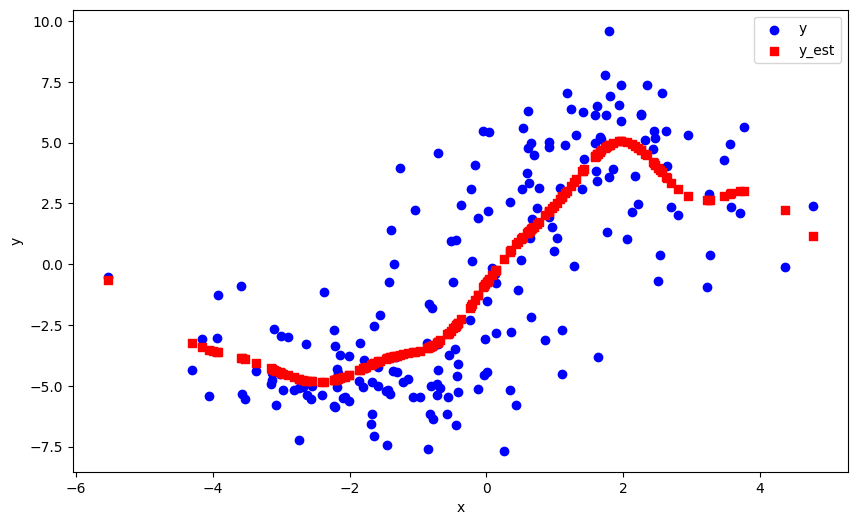

The programm is closed


In [22]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

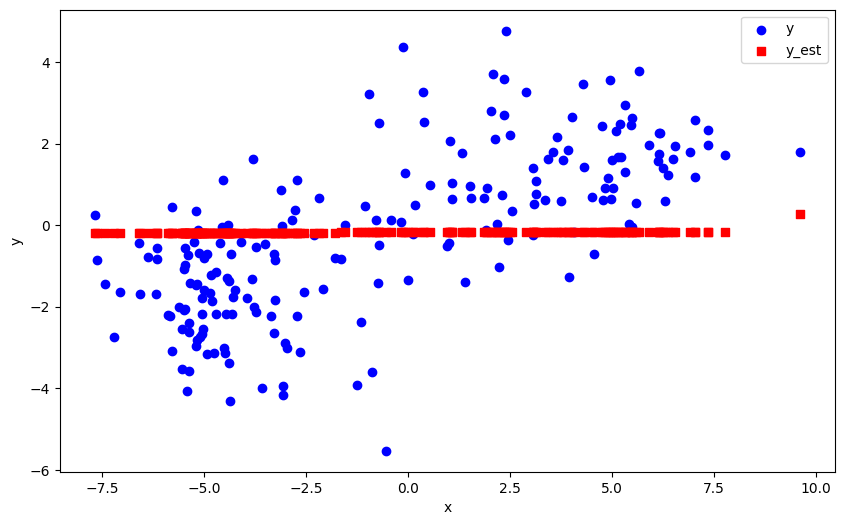

The programm is closed


In [24]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, true_x, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### mu = 1 makes no siginificant impact

In [171]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

Empirical Covariance Matrix:
[[ 0.91738083 -0.02608031]
 [-0.02608031  0.93109508]]


In [172]:
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*6 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

covariance:            x          y
x  4.011716   6.157437
y  6.157437  19.476639


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 21.851196942346363
	 mle: 5.454696593429524
	 mse: 6.530367227445078
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[4.0117e+00, 1.4479e-02],
        [1.4479e-02, 1.9477e+01]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7781,  0.0724],
        [ 0.0724, 18.3437]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.1522e-04,  0.0000e+00],
        [-3.0490e-01,  3.8929e+01]])
Check y:  tensor([-0.5090, -2.0568, -1.0444,  0.0485,  2.6945,  1.6259,  0.4059, -3.1185,
         1.0717,  2.8484,  0.1349, -3.1620, -2.3056, -0.3747,  2.4811, -0.3856,
        -3.2258,  2.8048,  1.8368, -2.6314, -3.2209,  1.8282, -3.0858,  2.3540,
         0.7202,  1.8466, -1.3318,  2.6818,  2.7082, -1.0662, -1.5018, -0.0335,
         2.0537,  1

  0%|          | 3/33000.0 [00:04<13:18:25,  1.45s/it]


mu 1

Inner iteration 1000
	h(W(model)): 1.9504930976154689
	score(model): 0.1755878983246255
	 mle: -1.8722555106983716
	 mse: 6.694101539631438
	W1: tensor([[1.0000e-04, 1.8863e+00],
        [4.9101e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.9504930976154689
	W2: tensor([[ 1.0892, -2.0856],
        [-2.0856,  4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.0899, -2.0858],
        [-2.0858,  3.9985]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.3436,  0.0000],
        [-5.5362,  1.0444]])
Check y:  tensor([ -0.2031,  -1.5442,  -5.6960,   6.9288,   2.5295,   4.6353,   5.9813,
         -2.8425,   0.9637,   3.2085,   6.5960,  -2.9459,  -1.7878,  -6.6163,
          3.8736,  -0.1033,  -3.2981,   3.3786,   1.5469,  -4.3458,  -3.1863,
          1.5395,  -2.7761,   2.0543,   0.7182,   4.4522,  -0.8958,   2.5069,
          2.5551,  -0.6682,  -5.3135,  -7.7455,   4.2778,   1.0512,   2.8793,
         -2.7839,  -4.4252, -10.7321,  -1.7277,   1.0178,  -1

  0%|          | 4/33000.0 [00:08<21:20:33,  2.33s/it]


mu 1

Inner iteration 2000
	h(W(model)): 3.0608288491455062
	score(model): -2.020451944660572
	 mle: -5.286415754977288
	 mse: 6.702310125444784
	W1: tensor([[1.0000e-04, 1.8387e+00],
        [5.3098e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.0608288491455062
	W2: tensor([[ 1.1639, -2.1575],
        [-2.1575,  3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1636, -2.1574],
        [-2.1574,  4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[116.8597,   0.0000],
        [ 60.0273,   0.1275]])
Check y:  tensor([-2.7520e-01, -1.5683e+00, -5.6095e+00,  6.6946e+00,  2.3719e+00,
         4.4516e+00,  5.7332e+00, -2.8307e+00,  8.5928e-01,  3.0136e+00,
         6.3642e+00, -2.9345e+00, -1.8044e+00, -6.5029e+00,  3.6930e+00,
        -1.8129e-01, -3.2902e+00,  3.1835e+00,  1.4482e+00, -4.2892e+00,
        -3.1774e+00,  1.4409e+00, -2.7644e+00,  1.9344e+00,  6.1120e-01,
         4.2758e+00, -9.3543e-01,  2.3512e+00,  2.3953e+00, -7.1615e-01,
        -5

  0%|          | 5/33000.0 [00:12<26:07:13,  2.85s/it]


mu 1

Inner iteration 3000
	h(W(model)): 2.799570244196903
	score(model): -1.3969217716155473
	 mle: -4.338609341160973
	 mse: 6.703049791233658
	W1: tensor([[1.0000e-04, 1.8125e+00],
        [5.3469e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.799570244196903
	W2: tensor([[ 1.1966, -2.1874],
        [-2.1874,  3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1965, -2.1874],
        [-2.1874,  3.9996]], grad_fn=<MmBackward0>)
Check M:  tensor([[43.1728,  0.0000],
        [23.1656,  0.9782]])
Check y:  tensor([ -0.3020,  -1.5817,  -5.5686,   6.5614,   2.2954,   4.3422,   5.6054,
         -2.8239,   0.8080,   2.9292,   6.2311,  -2.9257,  -1.8167,  -6.4543,
          3.5947,  -0.2101,  -3.2766,   3.0960,   1.3845,  -4.2735,  -3.1648,
          1.3773,  -2.7591,   1.8626,   0.5652,   4.1682,  -0.9515,   2.2748,
          2.3186,  -0.7348,  -5.1752,  -7.4870,   3.9989,   0.8953,   2.6164,
         -2.7666,  -4.3451, -10.3856,  -1.7590,   0.8620,  -1.8

  0%|          | 6/33000.0 [00:16<29:32:41,  3.22s/it]


mu 1

Inner iteration 4000
	h(W(model)): 3.1508010309242342
	score(model): -1.9284137198348343
	 mle: -4.029747628169891
	 mse: 6.701872547678825
	W1: tensor([[1.0000e-04, 1.8183e+00],
        [5.3806e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.1508010309242342
	W2: tensor([[ 1.1929, -2.1843],
        [-2.1843,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1928, -2.1843],
        [-2.1843,  4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[-78.1130,   0.0000],
        [-41.4731,   0.3096]])
Check y:  tensor([ -0.3291,  -1.6056,  -5.5878,   6.5721,   2.2920,   4.3526,   5.6123,
         -2.8490,   0.7955,   2.9308,   6.2391,  -2.9508,  -1.8403,  -6.4709,
          3.6010,  -0.2367,  -3.3007,   3.0989,   1.3772,  -4.2864,  -3.1895,
          1.3701,  -2.7842,   1.8571,   0.5490,   4.1778,  -0.9780,   2.2713,
          2.3153,  -0.7622,  -5.1887,  -7.4961,   4.0076,   0.8839,   2.6154,
         -2.7917,  -4.3572, -10.4115,  -1.7827,   0.8502,

  0%|          | 7/33000.0 [00:20<32:31:58,  3.55s/it]


mu 1

Inner iteration 4999
	h(W(model)): 3.3927986538202735
	score(model): -2.9994501643666
	 mle: -6.422291223553189
	 mse: 6.7067655918811155
	W1: tensor([[1.0000e-04, 1.8230e+00],
        [5.3924e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.3927986538202735
	W2: tensor([[ 1.1879, -2.1798],
        [-2.1798,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1878, -2.1797],
        [-2.1797,  4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[28.6630,  0.0000],
        [15.9170,  0.5718]])
Check y:  tensor([ -0.3396,  -1.6161,  -5.6265,   6.5673,   2.2736,   4.3357,   5.6004,
         -2.8691,   0.7858,   2.9105,   6.2302,  -2.9717,  -1.8524,  -6.5108,
          3.5798,  -0.2473,  -3.3245,   3.0782,   1.3648,  -4.3169,  -3.2123,
          1.3577,  -2.8038,   1.8411,   0.5393,   4.1594,  -0.9871,   2.2530,
          2.2969,  -0.7717,  -5.2244,  -7.5360,   3.9879,   0.8740,   2.5959,
         -2.8114,  -4.3880, -10.4636,  -1.7943,   0.8404,  -1.8

  0%|          | 10/33000.0 [00:25<21:25:14,  2.34s/it]


mu 0.5

Inner iteration 1000
	h(W(model)): 2.702906017465244
	score(model): 0.9436041471001764
	 mle: -3.516647370933543
	 mse: 7.1238013572225
	W1: tensor([[1.0000e-04, 1.5210e+00],
        [6.3506e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.702906017465244
	W2: tensor([[ 1.5059, -2.3124],
        [-2.3124,  3.5515]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.5058, -2.3124],
        [-2.3124,  3.5516]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.1125, 0.0000],
        [2.6156, 0.2694]])
Check y:  tensor([-0.1744, -1.2409, -4.5763,  5.5956,  2.0174,  3.7293,  4.7937, -2.2749,
         0.7630,  2.5572,  5.3301, -2.3590, -1.4377, -5.3265,  3.1149, -0.0973,
        -2.6503,  2.6981,  1.2473, -3.4902, -2.5572,  1.2413, -2.2213,  1.6498,
         0.5579,  3.5868, -0.7154,  1.9999,  2.0372, -0.5353, -4.2459, -6.1943,
         3.4481,  0.8365,  2.2913, -2.2276, -3.5506, -8.6201, -1.3893,  0.8085,
        -1.4760,  1.5384,  2.3376, -0.1445, -0.8376,  2.61

  0%|          | 11/33000.0 [00:29<24:30:14,  2.67s/it]


mu 0.5

Inner iteration 2000
	h(W(model)): 2.6494914701370202
	score(model): 0.7921183388391975
	 mle: -3.715335526339493
	 mse: 7.072944036492754
	W1: tensor([[1.0000e-04, 1.5385e+00],
        [6.2660e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6494914701370202
	W2: tensor([[ 1.5121, -2.3483],
        [-2.3483,  3.6476]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.5121, -2.3484],
        [-2.3484,  3.6476]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.2314,  0.0000],
        [ 0.7908,  0.3865]])
Check y:  tensor([-0.1762, -1.2620, -4.6350,  5.6571,  2.0364,  3.7705,  4.8377, -2.3135,
         0.7671,  2.5781,  5.3784, -2.3986, -1.4630, -5.3907,  3.1411, -0.0984,
        -2.6932,  2.7196,  1.2568, -3.5428, -2.5991,  1.2508, -2.2593,  1.6650,
         0.5606,  3.6244, -0.7254,  2.0187,  2.0563, -0.5421, -4.3041, -6.2721,
         3.4819,  0.8412,  2.3115, -2.2656, -3.6038, -8.7228, -1.4136,  0.8129,
        -1.5020,  1.5521,  2.3579, -0.1460, -0.850

  0%|          | 12/33000.0 [00:32<26:58:29,  2.94s/it]


mu 0.5

Inner iteration 3000
	h(W(model)): 2.6373896690878427
	score(model): 0.7203207355261967
	 mle: -3.834708185536455
	 mse: 7.028340283707252
	W1: tensor([[1.0000e-04, 1.5550e+00],
        [6.1965e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6373896690878427
	W2: tensor([[ 1.5288, -2.4002],
        [-2.4002,  3.7689]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.5288, -2.4002],
        [-2.4002,  3.7690]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.2670,  0.0000],
        [ 0.7141,  0.4127]])
Check y:  tensor([-0.1879, -1.2865, -4.6979,  5.7079,  2.0491,  3.8020,  4.8821, -2.3497,
         0.7651,  2.5961,  5.4233, -2.4358, -1.4892, -5.4599,  3.1619, -0.1090,
        -2.7338,  2.7382,  1.2585, -3.5920, -2.6387,  1.2524, -2.2948,  1.6721,
         0.5574,  3.6525, -0.7448,  2.0312,  2.0693, -0.5591, -4.3634, -6.3523,
         3.5071,  0.8397,  2.3276, -2.3012, -3.6537, -8.8336, -1.4394,  0.8112,
        -1.5286,  1.5575,  2.3745, -0.1573, -0.870

  0%|          | 13/33000.0 [00:36<29:31:57,  3.22s/it]


mu 0.5

Inner iteration 4000
	h(W(model)): 2.6291866551492693
	score(model): 0.6567694727520212
	 mle: -3.945407157423639
	 mse: 6.981872266963949
	W1: tensor([[1.0000e-04, 1.5735e+00],
        [6.1218e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6291866551492693
	W2: tensor([[ 1.5527, -2.4673],
        [-2.4673,  3.9214]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.5527, -2.4674],
        [-2.4674,  3.9215]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.2610,  0.0000],
        [ 0.6514,  0.4141]])
Check y:  tensor([-0.2016, -1.3131, -4.7680,  5.7642,  2.0632,  3.8366,  4.9325, -2.3902,
         0.7636,  2.6175,  5.4750, -2.4776, -1.5178, -5.5370,  3.1872, -0.1214,
        -2.7792,  2.7607,  1.2610, -3.6465, -2.6830,  1.2548, -2.3346,  1.6799,
         0.5540,  3.6841, -0.7662,  2.0450,  2.0837, -0.5783, -4.4295, -6.4419,
         3.5364,  0.8387,  2.3459, -2.3410, -3.7090, -8.9553, -1.4675,  0.8100,
        -1.5577,  1.5636,  2.3934, -0.1704, -0.893

  0%|          | 14/33000.0 [00:40<30:58:06,  3.38s/it]


mu 0.5

Inner iteration 4999
	h(W(model)): 2.6251820661862877
	score(model): 0.61722735863425
	 mle: -4.016639265453766
	 mse: 6.944144249370585
	W1: tensor([[1.0000e-04, 1.5898e+00],
        [6.0581e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6251820661862877
	W2: tensor([[ 1.5507, -2.4904],
        [-2.4904,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.5506, -2.4903],
        [-2.4903,  4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.1062,  0.0000],
        [-1.1957,  0.4060]])
Check y:  tensor([-2.1319e-01, -1.3354e+00, -4.8286e+00,  5.8146e+00,  2.0765e+00,
         3.8682e+00,  4.9783e+00, -2.4253e+00,  7.6341e-01,  2.6377e+00,
         5.5223e+00, -2.5136e+00, -1.5420e+00, -5.6041e+00,  3.2116e+00,
        -1.3190e-01, -2.8182e+00,  2.7822e+00,  1.2647e+00, -3.6936e+00,
        -2.7211e+00,  1.2585e+00, -2.3689e+00,  1.6879e+00,  5.5199e-01,
         3.7134e+00, -7.8401e-01,  2.0580e+00,  2.0973e+00, -5.9434e-01,
        -4.486

  0%|          | 16/33000.0 [00:44<25:14:26,  2.75s/it]


mu 0.25

Inner iteration 1000
	h(W(model)): 1.6606904464849024
	score(model): 1.4484284432878058
	 mle: -0.849223822654726
	 mse: 7.177266426114325
	W1: tensor([[1.0000e-04, 1.4598e+00],
        [6.1650e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.6606904464849024
	W2: tensor([[ 1.7812, -2.6657],
        [-2.6657,  3.9951]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.7810, -2.6655],
        [-2.6655,  3.9950]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.4009,  0.0000],
        [ 0.5716, -0.1153]])
Check y:  tensor([-0.2908, -1.3399, -4.5304,  5.2366,  1.8561,  3.4579,  4.4841, -2.3467,
         0.6059,  2.3963,  4.9819, -2.4272, -1.5321, -5.2490,  2.9002, -0.2147,
        -2.7044,  2.5277,  1.0662, -3.5110, -2.6161,  1.0603, -2.2953,  1.4727,
         0.4148,  3.3242, -0.8259,  1.8379,  1.8767, -0.6482, -4.2279, -6.0845,
         3.1969,  0.6745,  2.1368, -2.3013, -3.5695, -8.4526, -1.4849,  0.6483,
        -1.5696,  1.3580,  2.1830, -0.2612, -0.94

  0%|          | 17/33000.0 [00:48<27:41:11,  3.02s/it]


mu 0.25

Inner iteration 2000
	h(W(model)): 1.5986335577362292
	score(model): 1.4037582253888257
	 mle: -0.7798987807461373
	 mse: 6.999218354870325
	W1: tensor([[1.0000e-04, 1.5163e+00],
        [5.8906e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.5986335577362292
	W2: tensor([[ 1.6461, -2.5637],
        [-2.5637,  3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.6459, -2.5636],
        [-2.5636,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.1198,  0.0000],
        [ 0.4295, -0.1052]])
Check y:  tensor([-0.2714, -1.3596, -4.6833,  5.4703,  1.9652,  3.6288,  4.7088, -2.4116,
         0.6667,  2.5328,  5.2076, -2.4950, -1.5592, -5.4292,  3.0482, -0.1912,
        -2.7803,  2.6684,  1.1381, -3.6177, -2.6895,  1.1320, -2.3582,  1.5605,
         0.4697,  3.4869, -0.8296,  1.9459,  1.9870, -0.6456, -4.3723, -6.3039,
         3.3535,  0.7370,  2.2617, -2.3644, -3.6795, -8.7644, -1.5100,  0.7101,
        -1.5983,  1.4404,  2.3103, -0.2403, -0.9

  0%|          | 18/33000.0 [00:52<30:33:38,  3.34s/it]


mu 0.25

Inner iteration 3000
	h(W(model)): 1.5095239813832437
	score(model): 1.3578594853214698
	 mle: -0.6069363362421774
	 mse: 6.801402749681369
	W1: tensor([[1.0000e-04, 1.5980e+00],
        [5.5233e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.5095239813832437
	W2: tensor([[ 1.4758, -2.4268],
        [-2.4268,  3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.4757, -2.4267],
        [-2.4267,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0845,  0.0000],
        [ 0.4130, -0.0989]])
Check y:  tensor([-2.5221e-01, -1.3959e+00, -4.9043e+00,  5.7992e+00,  2.1197e+00,
         3.8678e+00,  5.0143e+00, -2.5152e+00,  7.4680e-01,  2.7259e+00,
         5.5257e+00, -2.6028e+00, -1.6071e+00, -5.6863e+00,  3.2624e+00,
        -1.6677e-01, -2.9001e+00,  2.8685e+00,  1.2407e+00, -3.7792e+00,
        -2.8059e+00,  1.2344e+00, -2.4589e+00,  1.6869e+00,  5.3881e-01,
         3.7180e+00, -8.4092e-01,  2.0990e+00,  2.1431e+00, -6.4808e-01,
        -4

  0%|          | 19/33000.0 [00:56<32:32:15,  3.55s/it]


mu 0.25

Inner iteration 4000
	h(W(model)): 1.3780463214700018
	score(model): 1.3115433748672112
	 mle: -0.2659712693723648
	 mse: 6.643222893525846
	W1: tensor([[1.0000e-04, 1.6923e+00],
        [5.1103e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.3780463214700018
	W2: tensor([[ 1.3073, -2.2825],
        [-2.2825,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.3072, -2.2824],
        [-2.2824,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0387,  0.0000],
        [-0.6035, -0.0848]])
Check y:  tensor([-2.4899e-01, -1.4605e+00, -5.1786e+00,  6.1581e+00,  2.2867e+00,
         4.1262e+00,  5.3423e+00, -2.6582e+00,  8.2095e-01,  2.9369e+00,
         5.8737e+00, -2.7510e+00, -1.6852e+00, -5.9992e+00,  3.4979e+00,
        -1.5739e-01, -3.0632e+00,  3.0876e+00,  1.3447e+00, -3.9864e+00,
        -2.9647e+00,  1.3379e+00, -2.5983e+00,  1.8210e+00,  5.9956e-01,
         3.9693e+00, -8.7503e-01,  2.2643e+00,  2.3119e+00, -6.7105e-01,
        -4

  0%|          | 20/33000.0 [01:00<33:33:14,  3.66s/it]


mu 0.25

Inner iteration 4999
	h(W(model)): 1.1859497257430787
	score(model): 1.2681426387992103
	 mle: 0.3288652498103337
	 mse: 6.536937366187269
	W1: tensor([[1.0000e-04, 1.7631e+00],
        [4.7269e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.1859497257430787
	W2: tensor([[ 1.1883, -2.1721],
        [-2.1721,  3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.1882, -2.1721],
        [-2.1721,  4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0113,  0.0000],
        [ 0.3846, -0.0854]])
Check y:  tensor([-2.5628e-01, -1.5239e+00, -5.3952e+00,  6.4117e+00,  2.4332e+00,
         4.3229e+00,  5.5813e+00, -2.7917e+00,  8.7932e-01,  3.1208e+00,
         6.1247e+00, -2.8892e+00, -1.7594e+00, -6.2325e+00,  3.6930e+00,
        -1.5887e-01, -3.2121e+00,  3.2770e+00,  1.4305e+00, -4.1547e+00,
        -3.1109e+00,  1.4234e+00, -2.7286e+00,  1.9361e+00,  6.4590e-01,
         4.1644e+00, -9.1546e-01,  2.4093e+00,  2.4601e+00, -7.0219e-01,
        -5.

  0%|          | 22/33000.0 [01:04<26:43:16,  2.92s/it]


mu 0.125

Inner iteration 1000
	h(W(model)): 0.09948390142074626
	score(model): 0.7004491790856501
	 mle: 4.808904879300464
	 mse: 5.077254319744984
	W1: tensor([[1.0000e-04, 1.8018e+00],
        [1.7079e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.09948390142074626
	W2: tensor([[ 1.6721, -1.2964],
        [-1.2964,  3.9982]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.6742, -1.2958],
        [-1.2958,  3.9980]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0305,  0.0000],
        [ 0.0413, -0.2273]])
Check y:  tensor([-0.5763, -2.2675, -5.1899,  4.7347,  3.1214,  4.3782,  4.6501, -3.6288,
         1.1557,  3.8158,  4.7418, -3.7219, -2.5337, -5.3799,  4.2003, -0.4298,
        -4.0029,  3.9447,  1.9199, -4.6170, -3.9199,  1.9107, -3.5669,  2.5488,
         0.8056,  4.3459, -1.5163,  3.0950,  3.1511, -1.2245, -5.0764, -5.5699,
         4.3117,  1.2760,  3.5087, -3.5742, -4.6590, -4.9646, -2.4683,  1.2304,
        -2.5856,  2.3732,  3.5678, -0.5196, -1.

  0%|          | 23/33000.0 [01:08<29:17:04,  3.20s/it]


mu 0.125

Inner iteration 2000
	h(W(model)): 0.026107078020470853
	score(model): 0.6787052441035883
	 mle: 5.2187477365729515
	 mse: 5.121028206480657
	W1: tensor([[1.0000e-04, 2.0374e+00],
        [7.8789e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.026107078020470853
	W2: tensor([[ 2.7889, -0.6733],
        [-0.6733,  4.0020]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.7892, -0.6729],
        [-0.6729,  4.0004]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0009,  0.0000],
        [-0.0824,  0.7564]])
Check y:  tensor([-0.7758, -2.7791, -4.9635,  3.6607,  3.6735,  4.3924,  3.8616, -3.9335,
         1.3152,  4.4603,  3.7573, -4.0095, -3.0286, -4.7305,  4.6881, -0.5934,
        -4.2424,  4.5772,  2.2169, -4.7436, -4.1730,  2.2058, -3.8832,  2.9768,
         0.9033,  4.4902, -1.9457,  3.6416,  3.7092, -1.5868, -4.9967, -4.5428,
         4.5735,  1.4563,  4.1303, -3.8892, -4.7745, -1.7128, -2.9693,  1.4028,
        -3.0748,  2.7632,  4.1971, -0.7051, 

  0%|          | 24/33000.0 [01:12<30:52:55,  3.37s/it]


mu 0.125

Inner iteration 3000
	h(W(model)): 0.022363106927998144
	score(model): 0.6781729021212305
	 mle: 5.246083137246862
	 mse: 5.1243316275744295
	W1: tensor([[1.0000e-04, 2.0511e+00],
        [7.2502e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.022363106927998144
	W2: tensor([[ 2.8809, -0.5431],
        [-0.5431,  3.9965]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.8809, -0.5430],
        [-0.5430,  3.9963]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0004,  0.0000],
        [ 0.0166, -0.2014]])
Check y:  tensor([-0.7851, -2.8217, -4.8771,  3.4801,  3.6825,  4.3185,  3.6707, -3.9065,
         1.2998,  4.4644,  3.5652, -3.9805, -3.0617, -4.6037,  4.6692, -0.6011,
        -4.2137,  4.5772,  2.2081, -4.7053, -4.1434,  2.1969, -3.8581,  2.9795,
         0.8900,  4.4326, -1.9794,  3.6505,  3.7184, -1.6110, -4.9179, -4.3433,
         4.5297,  1.4408,  4.1390, -3.8637, -4.7329, -1.2623, -3.0054,  1.3873,
        -3.1054,  2.7629,  4.2053, -0.7137, 

  0%|          | 25/33000.0 [01:16<32:14:56,  3.52s/it]


mu 0.125

Inner iteration 4000
	h(W(model)): 0.021845864066954324
	score(model): 0.6781251802129169
	 mle: 5.2498369748791625
	 mse: 5.125663093402578
	W1: tensor([[1.0000e-04, 2.0574e+00],
        [7.1451e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021845864066954324
	W2: tensor([[ 2.8933, -0.5354],
        [-0.5354,  3.9927]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.8933, -0.5353],
        [-0.5353,  3.9926]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0003,  0.0000],
        [ 0.0164, -0.2015]])
Check y:  tensor([-0.7770, -2.8411, -4.8757,  3.4652,  3.6933,  4.3205,  3.6508, -3.8954,
         1.2943,  4.4704,  3.5457, -3.9701, -3.0784, -4.6032,  4.6754, -0.5935,
        -4.2118,  4.5828,  2.2125, -4.7114, -4.1380,  2.2011, -3.8470,  2.9908,
         0.8847,  4.4367, -1.9839,  3.6614,  3.7290, -1.6085, -4.9077, -4.3171,
         4.5351,  1.4362,  4.1470, -3.8527, -4.7369, -1.2186, -3.0232,  1.3823,
        -3.1210,  2.7730,  4.2130, -0.7058, 

  0%|          | 26/33000.0 [01:20<33:12:21,  3.63s/it]


mu 0.125

Inner iteration 4999
	h(W(model)): 0.021472644931096685
	score(model): 0.6781511753196006
	 mle: 5.252769196455825
	 mse: 5.127394093621628
	W1: tensor([[1.0000e-04, 2.0626e+00],
        [7.0664e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021472644931096685
	W2: tensor([[ 2.9052, -0.5284],
        [-0.5284,  3.9923]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.9052, -0.5285],
        [-0.5285,  3.9934]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0003,  0.0000],
        [ 0.0162, -0.2013]])
Check y:  tensor([-0.7719, -2.8562, -4.8731,  3.4552,  3.6975,  4.3183,  3.6364, -3.8853,
         1.2893,  4.4727,  3.5354, -3.9604, -3.0924, -4.6030,  4.6819, -0.5896,
        -4.2088,  4.5862,  2.2177, -4.7165, -4.1322,  2.2062, -3.8372,  2.9986,
         0.8777,  4.4380, -1.9849,  3.6658,  3.7330, -1.6047, -4.8976, -4.2936,
         4.5392,  1.4324,  4.1489, -3.8428, -4.7404, -1.1963, -3.0379,  1.3780,
        -3.1342,  2.7810,  4.2147, -0.7011, -

  0%|          | 28/33000.0 [01:24<27:24:13,  2.99s/it]


mu 0.0625

Inner iteration 1000
	h(W(model)): 0.004085057790386815
	score(model): 0.3439391164661189
	 mle: 5.437147011189532
	 mse: 5.355202861595196
	W1: tensor([[1.0000e-04, 2.2000e+00],
        [2.9022e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004085057790386815
	W2: tensor([[ 3.5061, -0.2226],
        [-0.2226,  3.9946]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5063, -0.2226],
        [-0.2226,  3.9949]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0029, -0.0996]])
Check y:  tensor([-0.8196, -3.0693, -4.6897,  3.0842,  3.8271,  4.1010,  3.0906, -3.8614,
         1.2947,  4.6879,  3.1037, -3.9204, -3.2881, -4.2944,  4.8186, -0.6264,
        -4.1434,  4.8043,  2.2413, -4.7045, -4.0698,  2.2294, -3.8254,  3.0645,
         0.8804,  4.3179, -2.1390,  3.7920,  3.8664, -1.7204, -4.7893, -3.8499,
         4.5087,  1.4391,  4.3306, -3.8295, -4.7284, -0.8300, -3.2401,  1.3842,
        -3.3237,  2.8321,  4.4041, -0.7444, 

  0%|          | 29/33000.0 [01:28<29:21:55,  3.21s/it]


mu 0.0625

Inner iteration 2000
	h(W(model)): 0.003990202186638925
	score(model): 0.34385460371270343
	 mle: 5.437546039024341
	 mse: 5.3560551384401105
	W1: tensor([[1.0000e-04, 2.2078e+00],
        [2.8583e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003990202186638925
	W2: tensor([[ 3.5124, -0.2166],
        [-0.2166,  3.9980]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5124, -0.2164],
        [-0.2164,  3.9972]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0029, -0.0993]])
Check y:  tensor([-0.8169, -3.0722, -4.6853,  3.0984,  3.8191,  4.0896,  3.0725, -3.8540,
         1.2911,  4.6862,  3.1111, -3.9130, -3.2927, -4.2828,  4.8298, -0.6257,
        -4.1406,  4.8071,  2.2456, -4.7187, -4.0649,  2.2337, -3.8182,  3.0639,
         0.8730,  4.3148, -2.1315,  3.7842,  3.8582, -1.7120, -4.7892, -3.8295,
         4.5125,  1.4372,  4.3226, -3.8223, -4.7422, -0.8410, -3.2446,  1.3816,
        -3.3284,  2.8338,  4.3968, -0.7424

  0%|          | 30/33000.0 [01:32<31:02:20,  3.39s/it]


mu 0.0625

Inner iteration 3000
	h(W(model)): 0.003931748305700644
	score(model): 0.3439635554668952
	 mle: 5.43825834157347
	 mse: 5.3577205050239405
	W1: tensor([[1.0000e-04, 2.2122e+00],
        [2.8317e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003931748305700644
	W2: tensor([[ 3.5170, -0.2151],
        [-0.2151,  4.0025]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5170, -0.2143],
        [-0.2143,  3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.9755e-04,  0.0000e+00],
        [-1.1463e-02,  3.9965e-01]])
Check y:  tensor([-0.8212, -3.0731, -4.6854,  3.0933,  3.8249,  4.0852,  3.0619, -3.8533,
         1.2884,  4.6946,  3.1043, -3.9127, -3.2929, -4.2775,  4.8356, -0.6302,
        -4.1422,  4.8156,  2.2461, -4.7253, -4.0657,  2.2342, -3.8173,  3.0672,
         0.8693,  4.3130, -2.1343,  3.7899,  3.8641, -1.7153, -4.7923, -3.8214,
         4.5133,  1.4350,  4.3301, -3.8214, -4.7488, -0.8366, -3.2449,  1.3792,
        -3.3284,  2.8363,  4

  0%|          | 31/33000.0 [01:36<32:23:59,  3.54s/it]


mu 0.0625

Inner iteration 4000
	h(W(model)): 0.003906310290664905
	score(model): 0.3438909202425197
	 mle: 5.438471176450022
	 mse: 5.358807061369099
	W1: tensor([[1.0000e-04, 2.2111e+00],
        [2.8239e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003906310290664905
	W2: tensor([[ 3.5189, -0.2151],
        [-0.2151,  4.0008]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5189, -0.2151],
        [-0.2151,  4.0009]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.9369e-04,  0.0000e+00],
        [-1.1449e-02,  3.9934e-01]])
Check y:  tensor([-0.8179, -3.0781, -4.6871,  3.0992,  3.8193,  4.0901,  3.0687, -3.8547,
         1.2910,  4.6905,  3.1105, -3.9132, -3.2984, -4.2835,  4.8359, -0.6265,
        -4.1399,  4.8124,  2.2448, -4.7198, -4.0643,  2.2329, -3.8193,  3.0629,
         0.8731,  4.3170, -2.1352,  3.7843,  3.8585, -1.7147, -4.7913, -3.8280,
         4.5163,  1.4371,  4.3247, -3.8233, -4.7435, -0.8387, -3.2504,  1.3815,
        -3.3340,  2.8328,  4

  0%|          | 32/33000.0 [01:40<33:50:41,  3.70s/it]


mu 0.0625

Inner iteration 4999
	h(W(model)): 0.003899433222557258
	score(model): 0.34386594684438504
	 mle: 5.438687254045054
	 mse: 5.35877839347253
	W1: tensor([[1.0000e-04, 2.2111e+00],
        [2.8214e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003899433222557258
	W2: tensor([[ 3.5192, -0.2135],
        [-0.2135,  3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.5192, -0.2138],
        [-0.2138,  4.0007]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0028, -0.0992]])
Check y:  tensor([-0.8205, -3.0737, -4.6783,  3.0953,  3.8232,  4.0806,  3.0599, -3.8544,
         1.2888,  4.6915,  3.1050, -3.9136, -3.2938, -4.2727,  4.8316, -0.6296,
        -4.1421,  4.8123,  2.2461, -4.7212, -4.0660,  2.2342, -3.8186,  3.0664,
         0.8697,  4.3085, -2.1339,  3.7882,  3.8623, -1.7148, -4.7854, -3.8207,
         4.5089,  1.4353,  4.3276, -3.8227, -4.7444, -0.8374, -3.2458,  1.3796,
        -3.3294,  2.8358,  4.4020, -0.7462, 

  0%|          | 34/33000.0 [01:44<26:43:22,  2.92s/it]


mu 0.03125

Inner iteration 1000
	h(W(model)): 0.0009347031319264509
	score(model): 0.17302851719985712
	 mle: 5.506767745811332
	 mse: 5.466476598086858
	W1: tensor([[1.0000e-04, 2.2722e+00],
        [1.3452e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009347031319264509
	W2: tensor([[ 3.7589, -0.0914],
        [-0.0914,  3.9811]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7588, -0.0913],
        [-0.0913,  3.9805]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.8413e-05,  0.0000e+00],
        [ 6.6847e-04, -5.0028e-02]])
Check y:  tensor([-0.8163, -3.1448, -4.6105,  2.9941,  3.8373,  3.9581,  2.8545, -3.8267,
         1.2866,  4.7823,  2.9639, -3.8810, -3.3501, -4.1283,  4.8746, -0.6162,
        -4.1024,  4.9053,  2.1919, -4.7212, -4.0268,  2.1802, -3.7946,  3.0239,
         0.8915,  4.2258, -2.1967,  3.7991,  3.8801, -1.7582, -4.7654, -3.7171,
         4.4664,  1.4233,  4.3899, -3.7983, -4.7472, -0.7731, -3.3064,  1.3714,
        -3.3821,  2.7838

  0%|          | 35/33000.0 [01:48<28:56:08,  3.16s/it]


mu 0.03125

Inner iteration 2000
	h(W(model)): 0.0008821128702372061
	score(model): 0.1729527594853983
	 mle: 5.506199406400642
	 mse: 5.467465961441682
	W1: tensor([[1.0000e-04, 2.2900e+00],
        [1.2967e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008821128702372061
	W2: tensor([[ 3.7610, -0.0899],
        [-0.0899,  3.9890]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7610, -0.0898],
        [-0.0898,  3.9870]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [ 0.0006, -0.0497]])
Check y:  tensor([-0.8231, -3.1526, -4.6190,  3.0209,  3.8396,  3.9636,  2.8081, -3.8258,
         1.2910,  4.7886,  2.9664, -3.8773, -3.3625, -4.1426,  4.9053, -0.6251,
        -4.0917,  4.9182,  2.2131, -4.7120, -4.0178,  2.2014, -3.7955,  3.0390,
         0.8863,  4.2440, -2.1937,  3.8019,  3.8819, -1.7564, -4.7649, -3.6710,
         4.4932,  1.4314,  4.3893, -3.7989, -4.7385, -0.7157, -3.3178,  1.3780,
        -3.3950,  2.8023,  4.4710, -0.745

  0%|          | 36/33000.0 [01:52<30:45:32,  3.36s/it]


mu 0.03125

Inner iteration 3000
	h(W(model)): 0.0008688441513915457
	score(model): 0.17294309011643255
	 mle: 5.506004278941946
	 mse: 5.467651577557811
	W1: tensor([[1.0000e-04, 2.2950e+00],
        [1.2841e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008688441513915457
	W2: tensor([[ 3.7629, -0.0886],
        [-0.0886,  3.9891]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7629, -0.0885],
        [-0.0885,  3.9886]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [ 0.0006, -0.0497]])
Check y:  tensor([-0.8221, -3.1566, -4.6151,  3.0299,  3.8369,  3.9636,  2.7966, -3.8231,
         1.2898,  4.7863,  2.9696, -3.8738, -3.3682, -4.1464,  4.9125, -0.6252,
        -4.0881,  4.9184,  2.2180, -4.7159, -4.0139,  2.2063, -3.7934,  3.0418,
         0.8824,  4.2478, -2.1903,  3.7995,  3.8790, -1.7523, -4.7616, -3.6681,
         4.4997,  1.4313,  4.3849, -3.7968, -4.7423, -0.7172, -3.3233,  1.3775,
        -3.4009,  2.8063,  4.4666, -0.74

  0%|          | 37/33000.0 [01:56<32:35:17,  3.56s/it]


mu 0.03125

Inner iteration 4000
	h(W(model)): 0.0008851636576845401
	score(model): 0.17299240792200812
	 mle: 5.502938906321484
	 mse: 5.467782343666905
	W1: tensor([[1.0000e-04, 2.2945e+00],
        [1.2963e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008851636576845401
	W2: tensor([[ 3.7633, -0.0889],
        [-0.0889,  4.0037]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7633, -0.0890],
        [-0.0890,  4.0046]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.1208e-04,  0.0000e+00],
        [-2.3089e-03,  2.0079e-01]])
Check y:  tensor([-0.8227, -3.1572, -4.6110,  3.0287,  3.8374,  3.9617,  2.7954, -3.8240,
         1.2920,  4.7842,  2.9696, -3.8746, -3.3694, -4.1460,  4.9113, -0.6260,
        -4.0884,  4.9164,  2.2229, -4.7137, -4.0143,  2.2112, -3.7944,  3.0453,
         0.8830,  4.2464, -2.1898,  3.8001,  3.8793, -1.7519, -4.7568, -3.6670,
         4.4987,  1.4341,  4.3835, -3.7978, -4.7397, -0.7175, -3.3243,  1.3801,
        -3.4021,  2.8105

  0%|          | 38/33000.0 [02:00<33:24:59,  3.65s/it]


mu 0.03125

Inner iteration 5000
	h(W(model)): 0.000858212886517995
	score(model): 0.17299304479508368
	 mle: 5.5031193010540544
	 mse: 5.468072375726032
	W1: tensor([[1.0000e-04, 2.2963e+00],
        [1.2755e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000858212886517995
	W2: tensor([[ 3.7638, -0.0903],
        [-0.0903,  4.0048]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7638, -0.0902],
        [-0.0902,  4.0044]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0848e-04,  0.0000e+00],
        [-2.3519e-03,  2.0088e-01]])
Check y:  tensor([-0.8209, -3.1600, -4.6123,  3.0312,  3.8363,  3.9601,  2.7938, -3.8281,
         1.2921,  4.7849,  2.9708, -3.8788, -3.3727, -4.1448,  4.9122, -0.6240,
        -4.0930,  4.9173,  2.2213, -4.7187, -4.0188,  2.2096, -3.7985,  3.0434,
         0.8839,  4.2455, -2.1902,  3.7989,  3.8783, -1.7514, -4.7595, -3.6650,
         4.4984,  1.4339,  4.3833, -3.8019, -4.7447, -0.7167, -3.3275,  1.3800,
        -3.4055,  2.8086,

  0%|          | 39/33000.0 [02:04<33:54:14,  3.70s/it]


mu 0.03125

Inner iteration 6000
	h(W(model)): 0.0008724141960019249
	score(model): 0.17299712065127873
	 mle: 5.503629944804853
	 mse: 5.468555496122166
	W1: tensor([[1.0000e-04, 2.3002e+00],
        [1.2838e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008724141960019249
	W2: tensor([[ 3.7641, -0.0893],
        [-0.0893,  4.0043]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7641, -0.0890],
        [-0.0890,  4.0027]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0906e-04,  0.0000e+00],
        [-2.2483e-03,  2.0085e-01]])
Check y:  tensor([-0.8300, -3.1498, -4.6253,  3.0295,  3.8476,  3.9684,  2.7937, -3.8154,
         1.2845,  4.7997,  2.9692, -3.8672, -3.3597, -4.1522,  4.9258, -0.6339,
        -4.0865,  4.9322,  2.2215, -4.7279, -4.0105,  2.2096, -3.7852,  3.0501,
         0.8741,  4.2553, -2.1903,  3.8101,  3.8898, -1.7550, -4.7737, -3.6674,
         4.5094,  1.4274,  4.3970, -3.7886, -4.7547, -0.7169, -3.3151,  1.3731,
        -3.3921,  2.8135

  0%|          | 40/33000.0 [02:08<34:21:41,  3.75s/it]


mu 0.03125

Inner iteration 7000
	h(W(model)): 0.0008679848082029373
	score(model): 0.1729462339129446
	 mle: 5.503886571925028
	 mse: 5.467843026215843
	W1: tensor([[1.0000e-04, 2.2957e+00],
        [1.2830e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008679848082029373
	W2: tensor([[ 3.7645, -0.0885],
        [-0.0885,  4.0027]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7646, -0.0878],
        [-0.0878,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.8785e-05,  0.0000e+00],
        [-2.2835e-03,  2.0070e-01]])
Check y:  tensor([-0.8216, -3.1577, -4.6139,  3.0284,  3.8348,  3.9661,  2.7958, -3.8232,
         1.2883,  4.7859,  2.9693, -3.8736, -3.3701, -4.1463,  4.9161, -0.6251,
        -4.0872,  4.9191,  2.2177, -4.7148, -4.0131,  2.2059, -3.7938,  3.0407,
         0.8806,  4.2512, -2.1890,  3.7973,  3.8768, -1.7508, -4.7600, -3.6651,
         4.5037,  1.4301,  4.3830, -3.7971, -4.7411, -0.7168, -3.3250,  1.3762,
        -3.4029,  2.8055,

  0%|          | 41/33000.0 [02:12<29:36:55,  3.23s/it]


mu 0.03125

Inner iteration 7999
	h(W(model)): 0.000862003259018973
	score(model): 0.17294157560751658
	 mle: 5.50398512950793
	 mse: 5.4681495353797995
	W1: tensor([[1.0000e-04, 2.2958e+00],
        [1.2786e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000862003259018973
	W2: tensor([[ 3.7646, -0.0888],
        [-0.0888,  4.0027]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.7645, -0.0881],
        [-0.0881,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.7556e-05,  0.0000e+00],
        [-2.2302e-03,  2.0070e-01]])
Check y:  tensor([-0.8162, -3.1653, -4.6214,  3.0349,  3.8286,  3.9726,  2.8041, -3.8255,
         1.2941,  4.7821,  2.9768, -3.8749, -3.3783, -4.1593,  4.9179, -0.6189,
        -4.0854,  4.9166,  2.2174, -4.7113, -4.0123,  2.2058, -3.7967,  3.0361,
         0.8880,  4.2569, -2.1910,  3.7912,  3.8707, -1.7501, -4.7636, -3.6763,
         4.5084,  1.4351,  4.3774, -3.7999, -4.7379, -0.7169, -3.3332,  1.3815,
        -3.4111,  2.8020, 

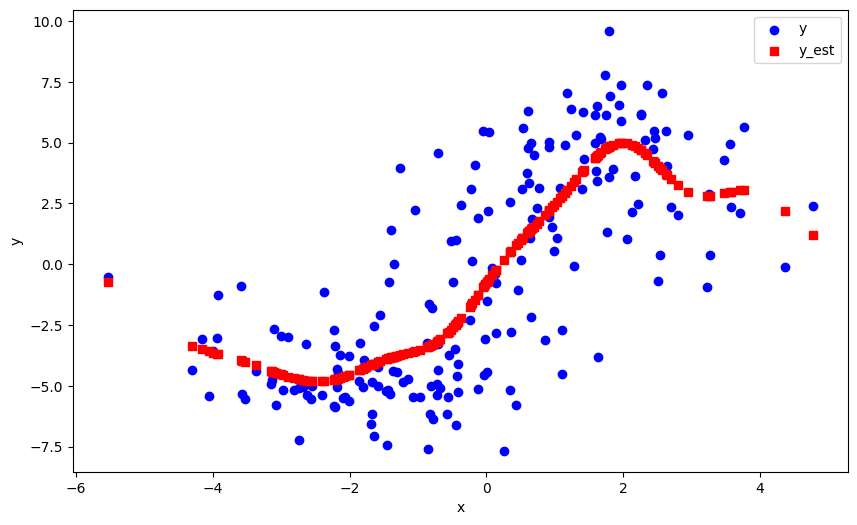

The programm is closed


In [173]:
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### Cov_epsilon = [[1, 0.6], [0.6, 1]]

In [25]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

Empirical Covariance Matrix:
[[0.89925943 0.54768565]
 [0.54768565 0.94098793]]


In [26]:
epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*6 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

covariance:            x          y
x  3.676145   6.587080
y  6.587080  19.393988


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 2.1691175835480716
	 mle: 5.354947032236221
	 mse: 5.992985075865634
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 3.6761, -0.0318],
        [-0.0318, 19.3940]])
	structure loss: 0.0
	Sigma: tensor([[ 3.6761, -0.0318],
        [-0.0318, 19.3940]])
Check M:  None
Check y:  tensor([-2.2047, -1.8267, -2.6595,  1.5675,  1.8470,  0.0493,  0.0502,  1.7172,
         1.2831, -0.0508,  2.4359, -2.3431,  0.8361, -3.4351,  0.1727,  1.3626,
        -2.9265,  2.3676,  2.7011,  1.1179, -0.6881,  2.7221,  2.3343,  2.5776,
         1.9400,  1.9530,  2.0230, -2.4444,  0.3563, -3.3315, -3.7717, -3.3127,
         0.9856,  1.3396,  2.7045, -1.4913, -1.1716, -2.3370, -2.0425,  2.7170,
        -1.3283, -3.6021,  0.185

  0%|          | 3/33000.0 [00:03<11:33:00,  1.26s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.012842437201660561
	score(model): 2.081681741288774
	 mle: 5.293930632414952
	 mse: 4.619062791426473
	W1: tensor([[1.0000e-04, 1.4399e+00],
        [7.8453e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.012842437201660561
	W2: tensor([[ 3.6761, -0.0318],
        [-0.0318, 19.3940]])
	structure loss: 0.0
	Sigma: tensor([[ 3.6761, -0.0318],
        [-0.0318, 19.3940]])
Check M:  None
Check y:  tensor([-2.1667, -3.9145, -3.7202,  0.8895,  2.9417,  3.0490,  3.0509,  2.9567,
         3.0442,  2.5849,  1.7788, -2.2417,  0.2652, -2.8158,  3.2325,  0.7151,
        -2.5400,  1.6869,  2.6201,  0.5077, -4.1432,  2.4480,  2.8801,  2.7828,
         1.2230,  2.9310,  1.3033, -2.2952,  3.3337, -2.7540, -3.1658, -2.7432,
         0.3946,  0.6956,  2.3271, -3.9889, -4.0564, -2.2385, -2.0750,  2.5566,
        -1.6120, -2.9326,  3.2448, -3.3476,  0.6764,  2.3147,  0.2954,  2.8701,
         2.8883,  3.2706, -1.7292,  3

  0%|          | 4/33000.0 [00:08<20:43:54,  2.26s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.012692114379039943
	score(model): 2.0815463608719
	 mle: 5.2942419152273
	 mse: 4.588403430080631
	W1: tensor([[1.0000e-04, 1.4584e+00],
        [7.7003e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.012692114379039943
	W2: tensor([[ 3.6761, -0.0318],
        [-0.0318, 19.3940]])
	structure loss: 0.0
	Sigma: tensor([[ 3.6761, -0.0318],
        [-0.0318, 19.3940]])
Check M:  None
Check y:  tensor([-2.1835, -3.9593, -3.7541,  0.9080,  2.9751,  3.0863,  3.0882,  2.9898,
         3.0821,  2.6424,  1.8132, -2.2601,  0.2757, -2.8531,  3.2758,  0.7314,
        -2.5670,  1.7191,  2.6703,  0.5214, -4.1941,  2.4969,  2.9215,  2.8306,
         1.2462,  2.9654,  1.3278, -2.3148,  3.3857, -2.7890, -3.2088, -2.7779,
         0.4068,  0.7117,  2.3740, -4.0385, -4.1092, -2.2567, -2.0904,  2.6066,
        -1.6228, -2.9735,  3.2888, -3.3866,  0.6922,  2.3613,  0.3064,  2.9126,
         2.9287,  3.3240, -1.7409,  3.364

  0%|          | 5/33000.0 [00:11<23:53:30,  2.61s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.012691643668133468
	score(model): 0.6404551817807784
	 mle: 4.828987358644445
	 mse: 4.587439539634666
	W1: tensor([[1.0000e-04, 1.4585e+00],
        [7.6997e-02, 1.0000e-04]])
	cycle loss: 0.012691643668133468
	W2: tensor([[2.5438, 0.1128],
        [0.1128, 5.4487]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5428, 0.1129],
        [0.1129, 5.4395]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.5605e-03, 0.0000e+00],
        [2.6552e-04, 1.0460e+00]])
Check y:  tensor([-2.1837, -3.9604, -3.7540,  0.9081,  2.9753,  3.0886,  3.0905,  2.9901,
         3.0833,  2.6450,  1.8128, -2.2601,  0.2765, -2.8535,  3.2776,  0.7318,
        -2.5669,  1.7186,  2.6715,  0.5221, -4.1956,  2.4979,  2.9218,  2.8315,
         1.2458,  2.9654,  1.3273, -2.3148,  3.3871, -2.7893, -3.2096, -2.7781,
         0.4076,  0.7122,  2.3748, -4.0400, -4.1110, -2.2568, -2.0908,  2.6077,
        -1.6240, -2.9741,  3.2905, -3.3

  0%|          | 6/33000.0 [00:14<25:51:57,  2.82s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.012691643668133468
	score(model): 0.5069352887380186
	 mle: 4.942123069070238
	 mse: 4.587439539634666
	W1: tensor([[1.0000e-04, 1.4585e+00],
        [7.6997e-02, 1.0000e-04]])
	cycle loss: 0.012691643668133468
	W2: tensor([[2.4775, 0.4392],
        [0.4392, 3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4775, 0.4389],
        [0.4389, 3.9995]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0003,  0.0000],
        [-0.0087, -0.1310]])
Check y:  tensor([-2.1837, -3.9604, -3.7540,  0.9081,  2.9753,  3.0886,  3.0905,  2.9901,
         3.0833,  2.6450,  1.8128, -2.2601,  0.2765, -2.8535,  3.2776,  0.7318,
        -2.5669,  1.7186,  2.6715,  0.5221, -4.1956,  2.4979,  2.9218,  2.8315,
         1.2458,  2.9654,  1.3273, -2.3148,  3.3871, -2.7893, -3.2096, -2.7781,
         0.4076,  0.7122,  2.3748, -4.0400, -4.1110, -2.2568, -2.0908,  2.6077,
        -1.6240, -2.9741,  3.2905, -3.3871,  0.6927

  0%|          | 7/33000.0 [00:17<25:50:46,  2.82s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.012691643668133468
	score(model): 0.5069472660178569
	 mle: 4.9422215202468855
	 mse: 4.587439539634666
	W1: tensor([[1.0000e-04, 1.4585e+00],
        [7.6997e-02, 1.0000e-04]])
	cycle loss: 0.012691643668133468
	W2: tensor([[2.4804, 0.4283],
        [0.4283, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4804, 0.4283],
        [0.4283, 3.9988]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.1639e-06,  0.0000e+00],
        [-9.0651e-03, -1.3084e-01]])
Check y:  tensor([-2.1837, -3.9604, -3.7540,  0.9081,  2.9753,  3.0886,  3.0905,  2.9901,
         3.0833,  2.6450,  1.8128, -2.2601,  0.2765, -2.8535,  3.2776,  0.7318,
        -2.5669,  1.7186,  2.6715,  0.5221, -4.1956,  2.4979,  2.9218,  2.8315,
         1.2458,  2.9654,  1.3273, -2.3148,  3.3871, -2.7893, -3.2096, -2.7781,
         0.4076,  0.7122,  2.3748, -4.0400, -4.1110, -2.2568, -2.0908,  2.6077,
        -1.6240, -2.9741,  3.2905,

  0%|          | 10/33000.0 [00:21<17:53:36,  1.95s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.0042089296908436324
	score(model): 0.2502800288268846
	 mle: 4.92099749732159
	 mse: 4.308491201263633
	W1: tensor([[1.0000e-04, 2.1636e+00],
        [2.9954e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0042089296908436324
	W2: tensor([[2.4804, 0.4283],
        [0.4283, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[2.4804, 0.4283],
        [0.4283, 3.9988]])
Check M:  tensor([[ 3.1639e-06,  0.0000e+00],
        [-9.0651e-03, -1.3084e-01]])
Check y:  tensor([-2.7226, -4.4049, -4.2456,  2.2124,  3.4000,  2.4262,  2.4321,  3.3094,
         3.1638,  1.5074,  3.1392, -2.7972,  1.1334, -3.5544,  3.0668,  1.9474,
        -3.1367,  3.0600,  3.8656,  1.5913, -4.9692,  3.7311,  3.7940,  3.9201,
         2.6252,  3.4831,  2.7087, -2.8520,  3.5103, -3.4525, -4.1038, -3.4352,
         1.3821,  1.9157,  3.6242, -4.5437, -4.7076, -2.7939, -2.6329,  3.8202,
        -2.1405, -3.7512,  3.1147, -4.2624,  1.8841,  

  0%|          | 11/33000.0 [00:25<22:51:31,  2.49s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.004111347659200515
	score(model): 0.25002043271828467
	 mle: 4.9177264255947755
	 mse: 4.29905191374801
	W1: tensor([[1.0000e-04, 2.1936e+00],
        [2.9200e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004111347659200515
	W2: tensor([[2.4804, 0.4283],
        [0.4283, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[2.4804, 0.4283],
        [0.4283, 3.9988]])
Check M:  tensor([[ 3.1639e-06,  0.0000e+00],
        [-9.0651e-03, -1.3084e-01]])
Check y:  tensor([-2.7077, -4.4100, -4.2275,  2.2430,  3.3696,  2.3466,  2.3527,  3.2697,
         3.1221,  1.4811,  3.1154, -2.7780,  1.1612, -3.5527,  3.0301,  1.9836,
        -3.1137,  3.0389,  3.8872,  1.6275, -4.9966,  3.7356,  3.8116,  3.9519,
         2.6340,  3.4621,  2.7113, -2.8303,  3.5288, -3.4445, -4.1295, -3.4262,
         1.4153,  1.9523,  3.6179, -4.5627, -4.7371, -2.7749, -2.6245,  3.8355,
        -2.1655, -3.7620,  3.0828, -4.2798,  1.9209,  

  0%|          | 12/33000.0 [00:29<25:01:18,  2.73s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.004099092810521565
	score(model): 0.24825192162747742
	 mle: 4.882600691626633
	 mse: 4.298271445775824
	W1: tensor([[1.0000e-04, 2.1968e+00],
        [2.9115e-02, 1.0000e-04]])
	cycle loss: 0.004099092810521565
	W2: tensor([[3.1417, 0.3697],
        [0.3697, 3.9994]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1412, 0.3697],
        [0.3697, 3.9994]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0007,  0.0000],
        [-0.0018, -0.0352]])
Check y:  tensor([-2.7061, -4.4098, -4.2246,  2.2461,  3.3659,  2.3411,  2.3472,  3.2652,
         3.1181,  1.4810,  3.1128, -2.7759,  1.1643, -3.5533,  3.0271,  1.9875,
        -3.1117,  3.0365,  3.8897,  1.6314, -4.9990,  3.7364,  3.8129,  3.9551,
         2.6346,  3.4593,  2.7112, -2.8280,  3.5302, -3.4444, -4.1324, -3.4259,
         1.4190,  1.9562,  3.6175, -4.5640, -4.7395, -2.7728, -2.6234,  3.8374,
        -2.1680, -3.7638,  3.0801, -4.2811,  1.92

  0%|          | 13/33000.0 [00:32<25:38:16,  2.80s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.004099092810521565
	score(model): 0.24825390953935267
	 mle: 4.882655400700687
	 mse: 4.298271445775824
	W1: tensor([[1.0000e-04, 2.1968e+00],
        [2.9115e-02, 1.0000e-04]])
	cycle loss: 0.004099092810521565
	W2: tensor([[3.1632, 0.3668],
        [0.3668, 3.9986]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1632, 0.3667],
        [0.3667, 3.9985]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.9223e-07,  0.0000e+00],
        [-1.8368e-03, -3.5203e-02]])
Check y:  tensor([-2.7061, -4.4098, -4.2246,  2.2461,  3.3659,  2.3411,  2.3472,  3.2652,
         3.1181,  1.4810,  3.1128, -2.7759,  1.1643, -3.5533,  3.0271,  1.9875,
        -3.1117,  3.0365,  3.8897,  1.6314, -4.9990,  3.7364,  3.8129,  3.9551,
         2.6346,  3.4593,  2.7112, -2.8280,  3.5302, -3.4444, -4.1324, -3.4259,
         1.4190,  1.9562,  3.6175, -4.5640, -4.7395, -2.7728, -2.6234,  3.8374,
        -2.1680, -3.7638,  3.0801

  0%|          | 14/33000.0 [00:35<26:14:49,  2.86s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.004099092810521565
	score(model): 0.2482508109868821
	 mle: 4.882563894445079
	 mse: 4.298271445775824
	W1: tensor([[1.0000e-04, 2.1968e+00],
        [2.9115e-02, 1.0000e-04]])
	cycle loss: 0.004099092810521565
	W2: tensor([[3.1632, 0.3669],
        [0.3669, 3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1632, 0.3670],
        [0.3670, 3.9995]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.2208e-08,  0.0000e+00],
        [-1.8342e-03, -3.5180e-02]])
Check y:  tensor([-2.7061, -4.4098, -4.2246,  2.2461,  3.3659,  2.3411,  2.3472,  3.2652,
         3.1181,  1.4810,  3.1128, -2.7759,  1.1643, -3.5533,  3.0271,  1.9875,
        -3.1117,  3.0365,  3.8897,  1.6314, -4.9990,  3.7364,  3.8129,  3.9551,
         2.6346,  3.4593,  2.7112, -2.8280,  3.5302, -3.4444, -4.1324, -3.4259,
         1.4190,  1.9562,  3.6175, -4.5640, -4.7395, -2.7728, -2.6234,  3.8374,
        -2.1680, -3.7638,  3.0801,

  0%|          | 16/33000.0 [00:39<22:15:26,  2.43s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0007378296322677613
	score(model): 0.12476361501038731
	 mle: 4.960477528231896
	 mse: 4.404487792672344
	W1: tensor([[1.0000e-04, 2.3054e+00],
        [1.1780e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007378296322677613
	W2: tensor([[3.1632, 0.3670],
        [0.3670, 3.9995]])
	structure loss: 0.0
	Sigma: tensor([[3.1632, 0.3670],
        [0.3670, 3.9995]])
Check M:  tensor([[-6.2208e-08,  0.0000e+00],
        [-1.8342e-03, -3.5180e-02]])
Check y:  tensor([-2.7840, -4.5322, -4.3631,  2.4114,  3.4791,  2.5101,  2.5160,  3.4000,
         3.3172,  1.6265,  3.4663, -2.8584,  1.1779, -3.6696,  3.1740,  2.1021,
        -3.2137,  3.3851,  4.0692,  1.6931, -5.1701,  3.9840,  3.8800,  4.0582,
         2.8977,  3.5562,  2.9951, -2.9140,  3.6706, -3.5580, -4.2620, -3.5390,
         1.4564,  2.0654,  3.9030, -4.6853, -4.8685, -2.8551, -2.6962,  4.0439,
        -2.2250, -3.8846,  3.2255, -4.4193,  2.0288

  0%|          | 17/33000.0 [00:42<24:50:19,  2.71s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0006701084431455229
	score(model): 0.12448994752432925
	 mle: 4.952294304908557
	 mse: 4.388097049753412
	W1: tensor([[1.0000e-04, 2.4155e+00],
        [1.0715e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006701084431455229
	W2: tensor([[3.1632, 0.3670],
        [0.3670, 3.9995]])
	structure loss: 0.0
	Sigma: tensor([[3.1632, 0.3670],
        [0.3670, 3.9995]])
Check M:  tensor([[-6.2208e-08,  0.0000e+00],
        [-1.8342e-03, -3.5180e-02]])
Check y:  tensor([-2.7571, -4.4367, -4.2883,  2.4795,  3.4085,  2.3872,  2.3946,  3.2940,
         3.1426,  1.3278,  3.3707, -2.8176,  1.2527, -3.6396,  3.2069,  2.1881,
        -3.1444,  3.2999,  4.0811,  1.7836, -5.2385,  3.9443,  3.9321,  4.1186,
         2.9029,  3.5160,  2.9825, -2.8643,  3.7761, -3.5134, -4.3288, -3.4922,
         1.5419,  2.1526,  3.8350, -4.6174, -4.8455, -2.8149, -2.6875,  4.0356,
        -2.2970, -3.8882,  3.2689, -4.4935,  2.1170

  0%|          | 18/33000.0 [00:46<26:33:31,  2.90s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0006572316800694811
	score(model): 0.12432828322961126
	 mle: 4.946351777549039
	 mse: 4.385162724352252
	W1: tensor([[1.0000e-04, 2.4288e+00],
        [1.0554e-02, 1.0000e-04]])
	cycle loss: 0.0006572316800694811
	W2: tensor([[3.4586, 0.3173],
        [0.3173, 3.9955]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.4582, 0.3173],
        [0.3173, 3.9954]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0007, -0.0161]])
Check y:  tensor([-2.7502, -4.4323, -4.2773,  2.4885,  3.3990,  2.3639,  2.3714,  3.2805,
         3.1241,  1.3107,  3.3613, -2.8095,  1.2595, -3.6400,  3.2007,  2.1985,
        -3.1365,  3.2916,  4.0858,  1.7935, -5.2483,  3.9425,  3.9392,  4.1284,
         2.9053,  3.5102,  2.9828, -2.8556,  3.7856, -3.5114, -4.3382, -3.4898,
         1.5507,  2.1631,  3.8297, -4.6185, -4.8517, -2.8069, -2.6825,  4.0378,
        -2.3028, -3.8929,  3.2643, -4.4991,  2

  0%|          | 19/33000.0 [00:48<25:56:21,  2.83s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0006572316800694811
	score(model): 0.12432050595792542
	 mle: 4.94604233801477
	 mse: 4.385162724352252
	W1: tensor([[1.0000e-04, 2.4288e+00],
        [1.0554e-02, 1.0000e-04]])
	cycle loss: 0.0006572316800694811
	W2: tensor([[3.4675, 0.3197],
        [0.3197, 3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.4675, 0.3197],
        [0.3197, 3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.4283e-06,  0.0000e+00],
        [-6.9503e-04, -1.6073e-02]])
Check y:  tensor([-2.7502, -4.4323, -4.2773,  2.4885,  3.3990,  2.3639,  2.3714,  3.2805,
         3.1241,  1.3107,  3.3613, -2.8095,  1.2595, -3.6400,  3.2007,  2.1985,
        -3.1365,  3.2916,  4.0858,  1.7935, -5.2483,  3.9425,  3.9392,  4.1284,
         2.9053,  3.5102,  2.9828, -2.8556,  3.7856, -3.5114, -4.3382, -3.4898,
         1.5507,  2.1631,  3.8297, -4.6185, -4.8517, -2.8069, -2.6825,  4.0378,
        -2.3028, -3.8929,  3.26

  0%|          | 20/33000.0 [00:51<25:22:48,  2.77s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0006572316800694811
	score(model): 0.1243225108098408
	 mle: 4.946103804087668
	 mse: 4.385162724352252
	W1: tensor([[1.0000e-04, 2.4288e+00],
        [1.0554e-02, 1.0000e-04]])
	cycle loss: 0.0006572316800694811
	W2: tensor([[3.4676, 0.3196],
        [0.3196, 3.9983]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.4676, 0.3196],
        [0.3196, 3.9984]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.2582e-07,  0.0000e+00],
        [-6.9641e-04, -1.6089e-02]])
Check y:  tensor([-2.7502, -4.4323, -4.2773,  2.4885,  3.3990,  2.3639,  2.3714,  3.2805,
         3.1241,  1.3107,  3.3613, -2.8095,  1.2595, -3.6400,  3.2007,  2.1985,
        -3.1365,  3.2916,  4.0858,  1.7935, -5.2483,  3.9425,  3.9392,  4.1284,
         2.9053,  3.5102,  2.9828, -2.8556,  3.7856, -3.5114, -4.3382, -3.4898,
         1.5507,  2.1631,  3.8297, -4.6185, -4.8517, -2.8069, -2.6825,  4.0378,
        -2.3028, -3.8929,  3.26

  0%|          | 22/33000.0 [00:55<22:15:39,  2.43s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0001823788564929707
	score(model): 0.06264773779550092
	 mle: 4.9968591683244075
	 mse: 4.472243812852034
	W1: tensor([[1.0000e-04, 2.3088e+00],
        [5.8487e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001823788564929707
	W2: tensor([[3.4676, 0.3196],
        [0.3196, 3.9984]])
	structure loss: 0.0
	Sigma: tensor([[3.4676, 0.3196],
        [0.3196, 3.9984]])
Check M:  tensor([[-1.2582e-07,  0.0000e+00],
        [-6.9641e-04, -1.6089e-02]])
Check y:  tensor([-2.8342, -4.6476, -4.4695,  2.4761,  3.5647,  2.7143,  2.7183,  3.5254,
         3.5357,  2.1505,  3.6874, -2.9202,  1.1461, -3.7448,  3.1988,  2.1279,
        -3.3064,  3.6044,  4.0873,  1.6840, -5.1742,  4.0720,  3.8376,  4.0133,
         3.0455,  3.6089,  3.1611, -2.9835,  3.6358, -3.6418, -4.2708, -3.6240,
         1.4342,  2.0874,  4.0332, -4.7783, -4.9285, -2.9164, -2.7322,  4.0887,
        -2.2074, -3.9384,  3.2397, -4.4210,  2.04

  0%|          | 23/33000.0 [00:59<24:55:34,  2.72s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00015953516142874768
	score(model): 0.062417963937095804
	 mle: 4.980172097763589
	 mse: 4.440790871531135
	W1: tensor([[1.0000e-04, 2.4046e+00],
        [5.2521e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00015953516142874768
	W2: tensor([[3.4676, 0.3196],
        [0.3196, 3.9984]])
	structure loss: 0.0
	Sigma: tensor([[3.4676, 0.3196],
        [0.3196, 3.9984]])
Check M:  tensor([[-1.2582e-07,  0.0000e+00],
        [-6.9641e-04, -1.6089e-02]])
Check y:  tensor([-2.7911, -4.5161, -4.3710,  2.5110,  3.4812,  2.5472,  2.5537,  3.3957,
         3.3105,  1.5941,  3.5463, -2.8596,  1.2129, -3.6938,  3.2674,  2.1890,
        -3.2079,  3.4709,  4.1147,  1.7585, -5.2741,  4.0320,  3.9121,  4.1008,
         3.0042,  3.5646,  3.0999, -2.9116,  3.7898, -3.5724, -4.3488, -3.5519,
         1.5080,  2.1506,  3.9542, -4.6835, -4.8962, -2.8565, -2.7117,  4.0901,
        -2.2835, -3.9304,  3.3226, -4.5150,  2.

  0%|          | 24/33000.0 [01:02<25:57:44,  2.83s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00015111038790394105
	score(model): 0.062344488909099716
	 mle: 4.974939706409872
	 mse: 4.431722931144675
	W1: tensor([[1.0000e-04, 2.4547e+00],
        [5.0074e-03, 1.0000e-04]])
	cycle loss: 0.00015111038790394105
	W2: tensor([[3.5599, 0.2795],
        [0.2795, 3.9990]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5598, 0.2795],
        [0.2795, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.4242e-05,  0.0000e+00],
        [-3.0748e-04, -8.0374e-03]])
Check y:  tensor([-2.7777, -4.4732, -4.3399,  2.5340,  3.4586,  2.4948,  2.5020,  3.3556,
         3.2329,  1.4346,  3.4980, -2.8396,  1.2460, -3.6768,  3.2878,  2.2219,
        -3.1736,  3.4262,  4.1291,  1.7959, -5.3062,  4.0201,  3.9477,  4.1395,
         2.9973,  3.5567,  3.0850, -2.8874,  3.8380, -3.5487, -4.3785, -3.5272,
         1.5446,  2.1843,  3.9274, -4.6526, -4.8855, -2.8368, -2.7067,  4.0943,
        -2.3142, -3.9291, 

  0%|          | 25/33000.0 [01:05<26:25:05,  2.88s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00015111038790394105
	score(model): 0.062343992760075975
	 mle: 4.974902687730796
	 mse: 4.431722931144675
	W1: tensor([[1.0000e-04, 2.4547e+00],
        [5.0074e-03, 1.0000e-04]])
	cycle loss: 0.00015111038790394105
	W2: tensor([[3.5649, 0.2817],
        [0.2817, 3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5649, 0.2817],
        [0.2817, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.2993e-07,  0.0000e+00],
        [-3.0131e-04, -8.0355e-03]])
Check y:  tensor([-2.7777, -4.4732, -4.3399,  2.5340,  3.4586,  2.4948,  2.5020,  3.3556,
         3.2329,  1.4346,  3.4980, -2.8396,  1.2460, -3.6768,  3.2878,  2.2219,
        -3.1736,  3.4262,  4.1291,  1.7959, -5.3062,  4.0201,  3.9477,  4.1395,
         2.9973,  3.5567,  3.0850, -2.8874,  3.8380, -3.5487, -4.3785, -3.5272,
         1.5446,  2.1843,  3.9274, -4.6526, -4.8855, -2.8368, -2.7067,  4.0943,
        -2.3142, -3.9291, 

  0%|          | 26/33000.0 [01:08<25:56:19,  2.83s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00015111038790394105
	score(model): 0.06234602422922525
	 mle: 4.975085279889361
	 mse: 4.431722931144675
	W1: tensor([[1.0000e-04, 2.4547e+00],
        [5.0074e-03, 1.0000e-04]])
	cycle loss: 0.00015111038790394105
	W2: tensor([[3.5649, 0.2813],
        [0.2813, 3.9975]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5649, 0.2813],
        [0.2813, 3.9975]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 9.4686e-08,  0.0000e+00],
        [-3.0271e-04, -8.0518e-03]])
Check y:  tensor([-2.7777, -4.4732, -4.3399,  2.5340,  3.4586,  2.4948,  2.5020,  3.3556,
         3.2329,  1.4346,  3.4980, -2.8396,  1.2460, -3.6768,  3.2878,  2.2219,
        -3.1736,  3.4262,  4.1291,  1.7959, -5.3062,  4.0201,  3.9477,  4.1395,
         2.9973,  3.5567,  3.0850, -2.8874,  3.8380, -3.5487, -4.3785, -3.5272,
         1.5446,  2.1843,  3.9274, -4.6526, -4.8855, -2.8368, -2.7067,  4.0943,
        -2.3142, -3.9291,  

  0%|          | 28/33000.0 [01:11<21:44:51,  2.37s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 5.681044085492637e-05
	score(model): 0.03141590914173451
	 mle: 5.016882995892788
	 mse: 4.507665506602843
	W1: tensor([[1.0000e-04, 2.3051e+00],
        [3.2692e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.681044085492637e-05
	W2: tensor([[3.5649, 0.2813],
        [0.2813, 3.9975]])
	structure loss: 0.0
	Sigma: tensor([[3.5649, 0.2813],
        [0.2813, 3.9975]])
Check M:  tensor([[ 9.4686e-08,  0.0000e+00],
        [-3.0271e-04, -8.0518e-03]])
Check y:  tensor([-2.8640, -4.7049, -4.5459,  2.5165,  3.6462,  3.0800,  3.0825,  3.6096,
         3.5863,  2.6844,  3.7319, -2.9495,  1.1565, -3.7477,  3.3751,  2.1594,
        -3.3270,  3.6532,  4.0773,  1.7049, -5.1499,  4.0683,  3.8717,  4.0140,
         3.0986,  3.6845,  3.2155, -3.0122,  3.6422, -3.6488, -4.2661, -3.6318,
         1.4499,  2.1178,  4.0380, -4.8150, -4.9411, -2.9458, -2.7617,  4.0799,
        -2.2300, -3.9344,  3.4000, -4.4357,  2.07

  0%|          | 29/33000.0 [01:16<26:03:00,  2.84s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 4.4353585717749056e-05
	score(model): 0.031317244058208016
	 mle: 5.003165810742229
	 mse: 4.481926653903887
	W1: tensor([[1.0000e-04, 2.3699e+00],
        [2.8096e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.4353585717749056e-05
	W2: tensor([[3.5649, 0.2813],
        [0.2813, 3.9975]])
	structure loss: 0.0
	Sigma: tensor([[3.5649, 0.2813],
        [0.2813, 3.9975]])
Check M:  tensor([[ 9.4686e-08,  0.0000e+00],
        [-3.0271e-04, -8.0518e-03]])
Check y:  tensor([-2.8166, -4.6059, -4.4471,  2.5138,  3.5581,  2.7147,  2.7197,  3.5071,
         3.4928,  1.9756,  3.6956, -2.8963,  1.1537, -3.7431,  3.2843,  2.1619,
        -3.2748,  3.6163,  4.1081,  1.7083, -5.2623,  4.0819,  3.8680,  4.0458,
         3.0782,  3.6120,  3.1906, -2.9559,  3.7406, -3.6302, -4.3324, -3.6109,
         1.4513,  2.1207,  4.0381, -4.7547, -4.9383, -2.8928, -2.7232,  4.1050,
        -2.2429, -3.9585,  3.3298, -4.4906,  2

  0%|          | 30/33000.0 [01:19<26:54:40,  2.94s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 4.194356806541677e-05
	score(model): 0.03127500895061339
	 mle: 4.996787974426065
	 mse: 4.469913964707213
	W1: tensor([[1.0000e-04, 2.4039e+00],
        [2.6934e-03, 1.0000e-04]])
	cycle loss: 4.194356806541677e-05
	W2: tensor([[3.6088, 0.2496],
        [0.2496, 3.9983]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6088, 0.2496],
        [0.2496, 3.9985]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.8111e-06,  0.0000e+00],
        [-1.4113e-04, -4.1368e-03]])
Check y:  tensor([-2.8071, -4.5638, -4.4185,  2.5286,  3.5296,  2.6458,  2.6516,  3.4614,
         3.4126,  1.7693,  3.6465, -2.8807,  1.1853, -3.7259,  3.3027,  2.1877,
        -3.2443,  3.5693,  4.1263,  1.7407, -5.2936,  4.0749,  3.9003,  4.0851,
         3.0636,  3.5983,  3.1687, -2.9363,  3.7944, -3.6073, -4.3580, -3.5872,
         1.4844,  2.1474,  4.0161, -4.7233, -4.9264, -2.8775, -2.7214,  4.1136,
        -2.2710, -3.9550,  3

  0%|          | 31/33000.0 [01:21<26:11:12,  2.86s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 4.194356806541677e-05
	score(model): 0.031275726786280156
	 mle: 4.996897533612927
	 mse: 4.469913964707213
	W1: tensor([[1.0000e-04, 2.4039e+00],
        [2.6934e-03, 1.0000e-04]])
	cycle loss: 4.194356806541677e-05
	W2: tensor([[3.6068, 0.2513],
        [0.2513, 3.9969]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6067, 0.2513],
        [0.2513, 3.9972]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.5754e-07,  0.0000e+00],
        [-1.3817e-04, -4.1434e-03]])
Check y:  tensor([-2.8071, -4.5638, -4.4185,  2.5286,  3.5296,  2.6458,  2.6516,  3.4614,
         3.4126,  1.7693,  3.6465, -2.8807,  1.1853, -3.7259,  3.3027,  2.1877,
        -3.2443,  3.5693,  4.1263,  1.7407, -5.2936,  4.0749,  3.9003,  4.0851,
         3.0636,  3.5983,  3.1687, -2.9363,  3.7944, -3.6073, -4.3580, -3.5872,
         1.4844,  2.1474,  4.0161, -4.7233, -4.9264, -2.8775, -2.7214,  4.1136,
        -2.2710, -3.9550,  

  0%|          | 32/33000.0 [01:24<26:38:06,  2.91s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 4.194356806541677e-05
	score(model): 0.03127480818806093
	 mle: 4.996751504009034
	 mse: 4.469913964707213
	W1: tensor([[1.0000e-04, 2.4039e+00],
        [2.6934e-03, 1.0000e-04]])
	cycle loss: 4.194356806541677e-05
	W2: tensor([[3.6068, 0.2515],
        [0.2515, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.3141e-07,  0.0000e+00],
        [-1.3779e-04, -4.1361e-03]])
Check y:  tensor([-2.8071, -4.5638, -4.4185,  2.5286,  3.5296,  2.6458,  2.6516,  3.4614,
         3.4126,  1.7693,  3.6465, -2.8807,  1.1853, -3.7259,  3.3027,  2.1877,
        -3.2443,  3.5693,  4.1263,  1.7407, -5.2936,  4.0749,  3.9003,  4.0851,
         3.0636,  3.5983,  3.1687, -2.9363,  3.7944, -3.6073, -4.3580, -3.5872,
         1.4844,  2.1474,  4.0161, -4.7233, -4.9264, -2.8775, -2.7214,  4.1136,
        -2.2710, -3.9550,  3

  0%|          | 34/33000.0 [01:28<22:14:59,  2.43s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 2.0127969200922635e-05
	score(model): 0.015741946428272074
	 mle: 5.0305811743778035
	 mse: 4.534537748919293
	W1: tensor([[1.0000e-04, 2.2672e+00],
        [1.9778e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0127969200922635e-05
	W2: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]])
	structure loss: 0.0
	Sigma: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]])
Check M:  tensor([[-4.3141e-07,  0.0000e+00],
        [-1.3779e-04, -4.1361e-03]])
Check y:  tensor([-2.9228, -4.7762, -4.5838,  2.4610,  3.7493,  3.2247,  3.2270,  3.6937,
         3.5847,  2.7198,  3.6480, -3.0151,  1.1870, -3.7814,  3.4669,  2.1273,
        -3.3970,  3.5633,  4.1349,  1.7026, -5.1844,  4.0840,  4.0030,  4.1187,
         3.0107,  3.8001,  3.1234, -3.0814,  3.6404, -3.6937, -4.2355, -3.6785,
         1.4634,  2.0885,  4.0284, -4.8870, -5.0058, -3.0111, -2.8104,  4.1211,
        -2.2157, -3.9449,  3.4850, -4.3971, 

  0%|          | 35/33000.0 [01:32<24:52:31,  2.72s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 1.3363438650548787e-05
	score(model): 0.015697954616751632
	 mle: 5.018579917048183
	 mse: 4.510274847796485
	W1: tensor([[1.0000e-04, 2.3595e+00],
        [1.5481e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.3363438650548787e-05
	W2: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]])
	structure loss: 0.0
	Sigma: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]])
Check M:  tensor([[-4.3141e-07,  0.0000e+00],
        [-1.3779e-04, -4.1361e-03]])
Check y:  tensor([-2.8373, -4.6512, -4.5005,  2.5187,  3.6210,  2.9216,  2.9256,  3.5830,
         3.5761,  2.2423,  3.7616, -2.9219,  1.1331, -3.7632,  3.3696,  2.1540,
        -3.3097,  3.6812,  4.1042,  1.6907, -5.2568,  4.1002,  3.8689,  4.0291,
         3.1139,  3.6623,  3.2335, -2.9846,  3.7279, -3.6554, -4.3238, -3.6370,
         1.4313,  2.1116,  4.0712, -4.7855, -4.9525, -2.9181, -2.7375,  4.1092,
        -2.2287, -3.9672,  3.4051, -4.4875,  

  0%|          | 36/33000.0 [01:36<27:48:59,  3.04s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 1.15749410247723e-05
	score(model): 0.015666636566356185
	 mle: 5.0091196639365245
	 mse: 4.491416964154999
	W1: tensor([[1.0000e-04, 2.4050e+00],
        [1.4134e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.15749410247723e-05
	W2: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]])
	structure loss: 0.0
	Sigma: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]])
Check M:  tensor([[-4.3141e-07,  0.0000e+00],
        [-1.3779e-04, -4.1361e-03]])
Check y:  tensor([-2.8163, -4.5906, -4.4541,  2.5378,  3.5786,  2.7569,  2.7621,  3.5259,
         3.5026,  1.9388,  3.7230, -2.8940,  1.1595, -3.7464,  3.3420,  2.1816,
        -3.2689,  3.6447,  4.1243,  1.7218, -5.3041,  4.0992,  3.8889,  4.0635,
         3.1074,  3.6335,  3.2204, -2.9524,  3.7876, -3.6301, -4.3636, -3.6103,
         1.4612,  2.1398,  4.0570, -4.7420, -4.9379, -2.8906, -2.7256,  4.1215,
        -2.2570, -3.9700,  3.3875, -4.5319,  2.0

  0%|          | 37/33000.0 [01:39<29:17:06,  3.20s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 1.0138125906777873e-05
	score(model): 0.01563652153095736
	 mle: 4.99943082083178
	 mse: 4.473320745341603
	W1: tensor([[1.0000e-04, 2.4563e+00],
        [1.2950e-03, 1.0000e-04]])
	cycle loss: 1.0138125906777873e-05
	W2: tensor([[3.6068, 0.2515],
        [0.2515, 3.9989]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6122, 0.2531],
        [0.2531, 4.0051]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.4379e-05,  0.0000e+00],
        [-4.7984e-05, -2.0462e-03]])
Check y:  tensor([-2.8040, -4.5353, -4.4144,  2.5584,  3.5360,  2.6533,  2.6597,  3.4578,
         3.3848,  1.6606,  3.6464, -2.8728,  1.2079, -3.7213,  3.3629,  2.2193,
        -3.2254,  3.5712,  4.1516,  1.7705, -5.3461,  4.0882,  3.9373,  4.1227,
         3.0828,  3.6128,  3.1846, -2.9252,  3.8632, -3.5970, -4.3994, -3.5761,
         1.5114,  2.1790,  4.0230, -4.7023, -4.9246, -2.8697, -2.7245,  4.1342,
        -2.2995, -3.9645, 

  0%|          | 38/33000.0 [01:42<28:05:10,  3.07s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 1.0138125906777873e-05
	score(model): 0.015636107038669814
	 mle: 4.999825417982253
	 mse: 4.473320745341603
	W1: tensor([[1.0000e-04, 2.4563e+00],
        [1.2950e-03, 1.0000e-04]])
	cycle loss: 1.0138125906777873e-05
	W2: tensor([[3.6315, 0.2348],
        [0.2348, 3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6314, 0.2348],
        [0.2348, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.1357e-07,  0.0000e+00],
        [-6.2961e-05, -2.0404e-03]])
Check y:  tensor([-2.8040, -4.5353, -4.4144,  2.5584,  3.5360,  2.6533,  2.6597,  3.4578,
         3.3848,  1.6606,  3.6464, -2.8728,  1.2079, -3.7213,  3.3629,  2.2193,
        -3.2254,  3.5712,  4.1516,  1.7705, -5.3461,  4.0882,  3.9373,  4.1227,
         3.0828,  3.6128,  3.1846, -2.9252,  3.8632, -3.5970, -4.3994, -3.5761,
         1.5114,  2.1790,  4.0230, -4.7023, -4.9246, -2.8697, -2.7245,  4.1342,
        -2.2995, -3.9645

  0%|          | 39/33000.0 [01:45<28:04:33,  3.07s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 1.0138125906777873e-05
	score(model): 0.015636845561843152
	 mle: 5.000039547173243
	 mse: 4.473320745341603
	W1: tensor([[1.0000e-04, 2.4563e+00],
        [1.2950e-03, 1.0000e-04]])
	cycle loss: 1.0138125906777873e-05
	W2: tensor([[3.6315, 0.2342],
        [0.2342, 3.9970]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6315, 0.2342],
        [0.2342, 3.9971]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.7281e-08,  0.0000e+00],
        [-6.3512e-05, -2.0462e-03]])
Check y:  tensor([-2.8040, -4.5353, -4.4144,  2.5584,  3.5360,  2.6533,  2.6597,  3.4578,
         3.3848,  1.6606,  3.6464, -2.8728,  1.2079, -3.7213,  3.3629,  2.2193,
        -3.2254,  3.5712,  4.1516,  1.7705, -5.3461,  4.0882,  3.9373,  4.1227,
         3.0828,  3.6128,  3.1846, -2.9252,  3.8632, -3.5970, -4.3994, -3.5761,
         1.5114,  2.1790,  4.0230, -4.7023, -4.9246, -2.8697, -2.7245,  4.1342,
        -2.2995, -3.9645

  0%|          | 40/33000.0 [01:48<27:10:18,  2.97s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 1.0138125906777873e-05
	score(model): 0.015636407818321523
	 mle: 4.999898300886182
	 mse: 4.473320745341603
	W1: tensor([[1.0000e-04, 2.4563e+00],
        [1.2950e-03, 1.0000e-04]])
	cycle loss: 1.0138125906777873e-05
	W2: tensor([[3.6314, 0.2347],
        [0.2347, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6314, 0.2348],
        [0.2348, 3.9988]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.1435e-07,  0.0000e+00],
        [-6.3063e-05, -2.0428e-03]])
Check y:  tensor([-2.8040, -4.5353, -4.4144,  2.5584,  3.5360,  2.6533,  2.6597,  3.4578,
         3.3848,  1.6606,  3.6464, -2.8728,  1.2079, -3.7213,  3.3629,  2.2193,
        -3.2254,  3.5712,  4.1516,  1.7705, -5.3461,  4.0882,  3.9373,  4.1227,
         3.0828,  3.6128,  3.1846, -2.9252,  3.8632, -3.5970, -4.3994, -3.5761,
         1.5114,  2.1790,  4.0230, -4.7023, -4.9246, -2.8697, -2.7245,  4.1342,
        -2.2995, -3.9645

  0%|          | 41/33000.0 [01:50<24:47:05,  2.71s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 1.0138125906777873e-05
	score(model): 0.015636517264178706
	 mle: 4.999914727425918
	 mse: 4.473320745341603
	W1: tensor([[1.0000e-04, 2.4563e+00],
        [1.2950e-03, 1.0000e-04]])
	cycle loss: 1.0138125906777873e-05
	W2: tensor([[3.6315, 0.2345],
        [0.2345, 3.9983]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6315, 0.2346],
        [0.2346, 3.9986]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 9.0175e-09,  0.0000e+00],
        [-6.3269e-05, -2.0436e-03]])
Check y:  tensor([-2.8040, -4.5353, -4.4144,  2.5584,  3.5360,  2.6533,  2.6597,  3.4578,
         3.3848,  1.6606,  3.6464, -2.8728,  1.2079, -3.7213,  3.3629,  2.2193,
        -3.2254,  3.5712,  4.1516,  1.7705, -5.3461,  4.0882,  3.9373,  4.1227,
         3.0828,  3.6128,  3.1846, -2.9252,  3.8632, -3.5970, -4.3994, -3.5761,
         1.5114,  2.1790,  4.0230, -4.7023, -4.9246, -2.8697, -2.7245,  4.1342,
        -2.2995, -3.9645

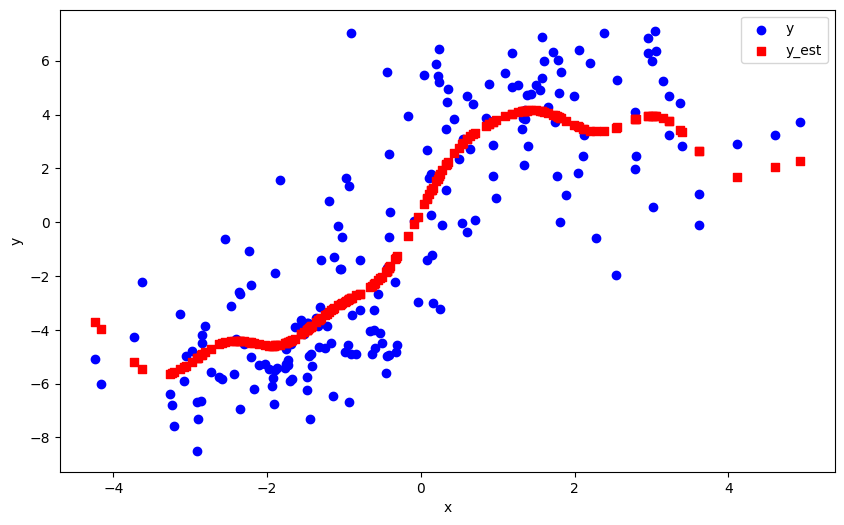

The programm is closed


In [27]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

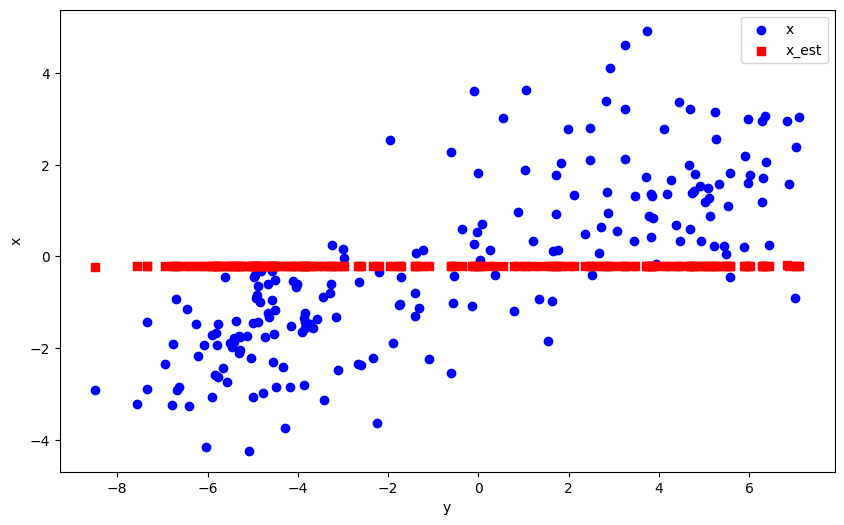

The programm is closed


In [28]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, true_x, label='x', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='x_est', color='red', marker='s') 
plt.xlabel('y')
plt.ylabel('x')
plt.legend()
plt.show()
print("The programm is closed")

### Cov_epsilon = [[1, 0.8], [0.8, 1]]

In [29]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.8, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*6 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.90310407 0.73253324]
 [0.73253324 0.93440044]]
covariance:            x          y
x  3.657001   6.773085
y  6.773085  19.378471


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 2.167006765403412
	 mle: 5.332094737535584
	 mse: 5.884535065947505
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 3.6570, -0.0336],
        [-0.0336, 19.3785]])
	structure loss: 0.0
	Sigma: tensor([[ 3.6570, -0.0336],
        [-0.0336, 19.3785]])
Check M:  None
Check y:  tensor([-2.4777, -2.1858, -2.4517,  1.6287,  1.7011,  0.0196,  0.1544,  1.7092,
         1.1420, -0.0735,  2.3420, -3.0096,  0.9422, -3.2956,  0.1327,  2.0324,
        -3.3548,  2.0619,  2.7738,  1.3748, -0.6191,  2.8151,  2.4157,  2.4396,
         1.3897,  2.1168,  2.3083, -2.3826,  0.3184, -3.1852, -3.7366, -3.5579,
         1.3343,  1.6904,  2.7429, -1.9034, -1.6416, -1.6950, -2.3142,  2.7394,
        -1.2601, -3.7362,  0.1577

  0%|          | 3/33000.0 [00:04<13:29:07,  1.47s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.01211020942340102
	score(model): 2.0765217182692077
	 mle: 5.265494824979326
	 mse: 4.154582198599388
	W1: tensor([[1.0000e-04, 1.6002e+00],
        [6.8564e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.01211020942340102
	W2: tensor([[ 3.6570, -0.0336],
        [-0.0336, 19.3785]])
	structure loss: 0.0
	Sigma: tensor([[ 3.6570, -0.0336],
        [-0.0336, 19.3785]])
Check M:  None
Check y:  tensor([-2.4020, -4.0514, -3.9866,  1.2141,  3.3195,  3.3372,  3.5291,  3.3187,
         3.4057,  2.8679,  1.8325, -2.7072,  0.5588, -2.8931,  3.5092,  1.5600,
        -2.9362,  1.5850,  2.4099,  0.9838, -4.5968,  2.5766,  3.1827,  3.1725,
         0.9977,  3.2660,  1.8011, -2.3485,  3.6057, -2.8179, -3.4708, -3.1083,
         0.9458,  1.2681,  2.3367, -4.1282, -4.2087, -1.9346, -2.3098,  2.3295,
        -1.6265, -3.3906,  3.5319, -3.6642,  1.1631,  2.6832,  0.4565,  3.0269,
         3.2167,  3.5308, -1.8367,  3.

  0%|          | 4/33000.0 [00:08<20:07:58,  2.20s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.012266272434536596
	score(model): 2.076429467190445
	 mle: 5.262824779357754
	 mse: 4.176124077540074
	W1: tensor([[1.0000e-04, 1.5766e+00],
        [7.0035e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.012266272434536596
	W2: tensor([[ 3.6570, -0.0336],
        [-0.0336, 19.3785]])
	structure loss: 0.0
	Sigma: tensor([[ 3.6570, -0.0336],
        [-0.0336, 19.3785]])
Check M:  None
Check y:  tensor([-2.3805, -4.0113, -3.9436,  1.1808,  3.2859,  3.3003,  3.5082,  3.2851,
         3.3800,  2.8241,  1.7892, -2.6833,  0.5373, -2.8676,  3.4861,  1.5201,
        -2.9101,  1.5448,  2.3708,  0.9550, -4.5344,  2.5408,  3.1540,  3.1440,
         0.9687,  3.2345,  1.7581, -2.3275,  3.5959, -2.7930, -3.4317, -3.0796,
         0.9177,  1.2338,  2.2963, -4.0907, -4.1722, -1.9193, -2.2892,  2.2890,
        -1.6163, -3.3545,  3.5113, -3.6178,  1.1309,  2.6496,  0.4366,  2.9987,
         3.1872,  3.5191, -1.8230,  3

  0%|          | 5/33000.0 [00:11<23:54:37,  2.61s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.012265336539900473
	score(model): 0.6239269182780137
	 mle: 4.688156173060891
	 mse: 4.175047035671493
	W1: tensor([[1.0000e-04, 1.5766e+00],
        [7.0029e-02, 1.0000e-04]])
	cycle loss: 0.012265336539900473
	W2: tensor([[2.5749, 0.1220],
        [0.1220, 5.4282]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5739, 0.1222],
        [0.1222, 5.4190]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.4854e-03, 0.0000e+00],
        [2.9143e-04, 1.0738e+00]])
Check y:  tensor([-2.3804, -4.0127, -3.9445,  1.1818,  3.2866,  3.3023,  3.5103,  3.2857,
         3.3810,  2.8266,  1.7893, -2.6835,  0.5382, -2.8682,  3.4882,  1.5206,
        -2.9109,  1.5453,  2.3709,  0.9561, -4.5353,  2.5410,  3.1549,  3.1449,
         0.9697,  3.2353,  1.7583, -2.3273,  3.5980, -2.7935, -3.4325, -3.0807,
         0.9188,  1.2347,  2.2963, -4.0925, -4.1743, -1.9194, -2.2890,  2.2890,
        -1.6169, -3.3555,  3.5134, -3.6

  0%|          | 6/33000.0 [00:14<24:10:14,  2.64s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.012265336539900473
	score(model): 0.48580007270324377
	 mle: 4.735002009637058
	 mse: 4.175047035671493
	W1: tensor([[1.0000e-04, 1.5766e+00],
        [7.0029e-02, 1.0000e-04]])
	cycle loss: 0.012265336539900473
	W2: tensor([[2.5417, 0.5750],
        [0.5750, 3.9976]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5417, 0.5747],
        [0.5747, 3.9977]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.2904e-05,  0.0000e+00],
        [-6.1349e-03, -8.7654e-02]])
Check y:  tensor([-2.3804, -4.0127, -3.9445,  1.1818,  3.2866,  3.3023,  3.5103,  3.2857,
         3.3810,  2.8266,  1.7893, -2.6835,  0.5382, -2.8682,  3.4882,  1.5206,
        -2.9109,  1.5453,  2.3709,  0.9561, -4.5353,  2.5410,  3.1549,  3.1449,
         0.9697,  3.2353,  1.7583, -2.3273,  3.5980, -2.7935, -3.4325, -3.0807,
         0.9188,  1.2347,  2.2963, -4.0925, -4.1743, -1.9194, -2.2890,  2.2890,
        -1.6169, -3.3555,  3.5134,

  0%|          | 7/33000.0 [00:16<24:09:55,  2.64s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.012265336539900473
	score(model): 0.4857518388982303
	 mle: 4.734505913368164
	 mse: 4.175047035671493
	W1: tensor([[1.0000e-04, 1.5766e+00],
        [7.0029e-02, 1.0000e-04]])
	cycle loss: 0.012265336539900473
	W2: tensor([[2.5387, 0.5333],
        [0.5333, 3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5387, 0.5334],
        [0.5334, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.2956e-07,  0.0000e+00],
        [-7.4479e-03, -8.6523e-02]])
Check y:  tensor([-2.3804, -4.0127, -3.9445,  1.1818,  3.2866,  3.3023,  3.5103,  3.2857,
         3.3810,  2.8266,  1.7893, -2.6835,  0.5382, -2.8682,  3.4882,  1.5206,
        -2.9109,  1.5453,  2.3709,  0.9561, -4.5353,  2.5410,  3.1549,  3.1449,
         0.9697,  3.2353,  1.7583, -2.3273,  3.5980, -2.7935, -3.4325, -3.0807,
         0.9188,  1.2347,  2.2963, -4.0925, -4.1743, -1.9194, -2.2890,  2.2890,
        -1.6169, -3.3555,  3.5134, 

  0%|          | 10/33000.0 [00:20<17:18:15,  1.89s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.004228368472137145
	score(model): 0.24194920952288995
	 mle: 4.753945482237458
	 mse: 4.024056376654251
	W1: tensor([[1.0000e-04, 2.1003e+00],
        [3.0927e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004228368472137145
	W2: tensor([[2.5387, 0.5334],
        [0.5334, 3.9998]])
	structure loss: 0.0
	Sigma: tensor([[2.5387, 0.5334],
        [0.5334, 3.9998]])
Check M:  tensor([[-5.2956e-07,  0.0000e+00],
        [-7.4479e-03, -8.6523e-02]])
Check y:  tensor([-2.9433, -4.2348, -4.2136,  2.2856,  3.4717,  2.5917,  3.0939,  3.4740,
         3.4429,  1.9048,  2.9925, -3.2728,  1.3269, -3.4793,  3.0306,  2.7127,
        -3.5278,  2.7406,  3.4615,  1.9650, -4.9477,  3.5749,  3.7337,  3.7408,
         1.9850,  3.6220,  2.9628, -2.8853,  3.4243, -3.3950, -4.0999, -3.7228,
         1.9099,  2.3572,  3.4085, -4.2851, -4.3614, -2.4110, -2.8431,  3.4031,
        -2.0162, -4.0257,  3.1032, -4.2265,  2.2167,  

  0%|          | 11/33000.0 [00:24<20:35:01,  2.25s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.004164661357180632
	score(model): 0.2419099139069644
	 mle: 4.754470597985732
	 mse: 4.0241962907745386
	W1: tensor([[1.0000e-04, 2.1040e+00],
        [3.0640e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004164661357180632
	W2: tensor([[2.5387, 0.5334],
        [0.5334, 3.9998]])
	structure loss: 0.0
	Sigma: tensor([[2.5387, 0.5334],
        [0.5334, 3.9998]])
Check M:  tensor([[-5.2956e-07,  0.0000e+00],
        [-7.4479e-03, -8.6523e-02]])
Check y:  tensor([-2.9368, -4.2293, -4.2079,  2.2911,  3.4616,  2.5558,  3.0798,  3.4639,
         3.4386,  1.8753,  2.9878, -3.2625,  1.3328, -3.4701,  3.0131,  2.7129,
        -3.5193,  2.7403,  3.4574,  1.9720, -4.9570,  3.5741,  3.7386,  3.7462,
         1.9919,  3.6200,  2.9586, -2.8801,  3.4306, -3.3850, -4.1044, -3.7181,
         1.9171,  2.3620,  3.4032, -4.2813, -4.3603, -2.4161, -2.8388,  3.3978,
        -2.0266, -4.0287,  3.0896, -4.2316,  2.2227,  

  0%|          | 12/33000.0 [00:27<22:19:12,  2.44s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.0041615496801323815
	score(model): 0.24072275932632856
	 mle: 4.730779231495905
	 mse: 4.024155996128087
	W1: tensor([[1.0000e-04, 2.1043e+00],
        [3.0624e-02, 1.0000e-04]])
	cycle loss: 0.0041615496801323815
	W2: tensor([[3.0698, 0.5172],
        [0.5172, 3.9956]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.0698, 0.5172],
        [0.5172, 3.9958]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0015,  0.0000],
        [-0.0016, -0.0226]])
Check y:  tensor([-2.9366, -4.2287, -4.2072,  2.2915,  3.4609,  2.5542,  3.0792,  3.4633,
         3.4379,  1.8740,  2.9876, -3.2621,  1.3334, -3.4698,  3.0124,  2.7130,
        -3.5191,  2.7404,  3.4572,  1.9726, -4.9578,  3.5741,  3.7390,  3.7466,
         1.9925,  3.6199,  2.9585, -2.8799,  3.4309, -3.3846, -4.1051, -3.7181,
         1.9177,  2.3624,  3.4030, -4.2809, -4.3601, -2.4165, -2.8387,  3.3975,
        -2.0272, -4.0292,  3.0891, -4.2321,  2.

  0%|          | 13/33000.0 [00:30<23:34:59,  2.57s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.0041615496801323815
	score(model): 0.24070650935075963
	 mle: 4.730430352442306
	 mse: 4.024155996128087
	W1: tensor([[1.0000e-04, 2.1043e+00],
        [3.0624e-02, 1.0000e-04]])
	cycle loss: 0.0041615496801323815
	W2: tensor([[3.1152, 0.5164],
        [0.5164, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1152, 0.5163],
        [0.5163, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.5285e-06,  0.0000e+00],
        [ 2.7579e-02,  3.6899e-01]])
Check y:  tensor([-2.9366, -4.2287, -4.2072,  2.2915,  3.4609,  2.5542,  3.0792,  3.4633,
         3.4379,  1.8740,  2.9876, -3.2621,  1.3334, -3.4698,  3.0124,  2.7130,
        -3.5191,  2.7404,  3.4572,  1.9726, -4.9578,  3.5741,  3.7390,  3.7466,
         1.9925,  3.6199,  2.9585, -2.8799,  3.4309, -3.3846, -4.1051, -3.7181,
         1.9177,  2.3624,  3.4030, -4.2809, -4.3601, -2.4165, -2.8387,  3.3975,
        -2.0272, -4.0292,  3.08

  0%|          | 14/33000.0 [00:33<23:43:05,  2.59s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.0041615496801323815
	score(model): 0.24070814248880046
	 mle: 4.730490744692977
	 mse: 4.024155996128087
	W1: tensor([[1.0000e-04, 2.1043e+00],
        [3.0624e-02, 1.0000e-04]])
	cycle loss: 0.0041615496801323815
	W2: tensor([[3.1152, 0.5161],
        [0.5161, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1152, 0.5161],
        [0.5161, 3.9988]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.4092e-07,  0.0000e+00],
        [-1.6815e-03, -2.2493e-02]])
Check y:  tensor([-2.9366, -4.2287, -4.2072,  2.2915,  3.4609,  2.5542,  3.0792,  3.4633,
         3.4379,  1.8740,  2.9876, -3.2621,  1.3334, -3.4698,  3.0124,  2.7130,
        -3.5191,  2.7404,  3.4572,  1.9726, -4.9578,  3.5741,  3.7390,  3.7466,
         1.9925,  3.6199,  2.9585, -2.8799,  3.4309, -3.3846, -4.1051, -3.7181,
         1.9177,  2.3624,  3.4030, -4.2809, -4.3601, -2.4165, -2.8387,  3.3975,
        -2.0272, -4.0292,  3.08

  0%|          | 16/33000.0 [00:36<20:29:10,  2.24s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0007775637290556858
	score(model): 0.1209598121044485
	 mle: 4.806883812561827
	 mse: 4.1247458694315675
	W1: tensor([[1.0000e-04, 2.2313e+00],
        [1.2495e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007775637290556858
	W2: tensor([[3.1152, 0.5161],
        [0.5161, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[3.1152, 0.5161],
        [0.5161, 3.9988]])
Check M:  tensor([[ 3.4092e-07,  0.0000e+00],
        [-1.6815e-03, -2.2493e-02]])
Check y:  tensor([-3.0441, -4.2924, -4.2813,  2.4546,  3.5305,  2.5666,  3.1514,  3.5320,
         3.5817,  1.8070,  3.2432, -3.3820,  1.4095, -3.5934,  3.0764,  2.9328,
        -3.6431,  2.9641,  3.6981,  2.1009, -5.0779,  3.7854,  3.7868,  3.7968,
         2.1227,  3.6585,  3.2109, -2.9846,  3.5522, -3.5071, -4.2265, -3.8427,
         2.0406,  2.5343,  3.6536, -4.3356, -4.4101, -2.4960, -2.9411,  3.6490,
        -2.0883, -4.1518,  3.1625, -4.3481,  2.3782

  0%|          | 17/33000.0 [00:40<24:11:18,  2.64s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0007482000711511727
	score(model): 0.12092315237199876
	 mle: 4.806536274940432
	 mse: 4.124266861899955
	W1: tensor([[1.0000e-04, 2.2582e+00],
        [1.2110e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007482000711511727
	W2: tensor([[3.1152, 0.5161],
        [0.5161, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[3.1152, 0.5161],
        [0.5161, 3.9988]])
Check M:  tensor([[ 3.4092e-07,  0.0000e+00],
        [-1.6815e-03, -2.2493e-02]])
Check y:  tensor([-3.0413, -4.2503, -4.2528,  2.4508,  3.4754,  2.5124,  3.1496,  3.4775,
         3.5226,  1.7262,  3.2097, -3.3621,  1.4288, -3.5710,  3.0678,  2.9086,
        -3.6213,  2.9386,  3.6963,  2.1087, -5.0854,  3.8013,  3.8140,  3.8266,
         2.1300,  3.6492,  3.1778, -2.9854,  3.5820, -3.4847, -4.2433, -3.8278,
         2.0500,  2.5273,  3.6445, -4.2835, -4.3544, -2.5192, -2.9446,  3.6392,
        -2.1167, -4.1608,  3.1617, -4.3771,  2.3772

  0%|          | 18/33000.0 [00:43<25:18:33,  2.76s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0007416894978053978
	score(model): 0.12080578291075601
	 mle: 4.8021157632832745
	 mse: 4.124378870116491
	W1: tensor([[1.0000e-04, 2.2605e+00],
        [1.2046e-02, 1.0000e-04]])
	cycle loss: 0.0007416894978053978
	W2: tensor([[3.4112, 0.4973],
        [0.4973, 3.9930]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.4108, 0.4972],
        [0.4972, 3.9927]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0007, -0.0102]])
Check y:  tensor([-3.0413, -4.2487, -4.2516,  2.4521,  3.4712,  2.5048,  3.1472,  3.4733,
         3.5187,  1.7193,  3.2094, -3.3616,  1.4302, -3.5705,  3.0646,  2.9091,
        -3.6208,  2.9390,  3.6961,  2.1102, -5.0863,  3.8018,  3.8152,  3.8280,
         2.1315,  3.6482,  3.1776, -2.9855,  3.5838, -3.4842, -4.2445, -3.8277,
         2.0515,  2.5285,  3.6441, -4.2816, -4.3525, -2.5201, -2.9448,  3.6388,
        -2.1179, -4.1617,  3.1594, -4.3786,  

  0%|          | 19/33000.0 [00:46<25:03:05,  2.73s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0007416894978053978
	score(model): 0.12080184520631927
	 mle: 4.801741563272737
	 mse: 4.124378870116491
	W1: tensor([[1.0000e-04, 2.2605e+00],
        [1.2046e-02, 1.0000e-04]])
	cycle loss: 0.0007416894978053978
	W2: tensor([[3.4182, 0.4963],
        [0.4963, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.4182, 0.4963],
        [0.4963, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.8478e-06,  0.0000e+00],
        [ 1.2738e-02,  1.8637e-01]])
Check y:  tensor([-3.0413, -4.2487, -4.2516,  2.4521,  3.4712,  2.5048,  3.1472,  3.4733,
         3.5187,  1.7193,  3.2094, -3.3616,  1.4302, -3.5705,  3.0646,  2.9091,
        -3.6208,  2.9390,  3.6961,  2.1102, -5.0863,  3.8018,  3.8152,  3.8280,
         2.1315,  3.6482,  3.1776, -2.9855,  3.5838, -3.4842, -4.2445, -3.8277,
         2.0515,  2.5285,  3.6441, -4.2816, -4.3525, -2.5201, -2.9448,  3.6388,
        -2.1179, -4.1617,  3.1

  0%|          | 20/33000.0 [00:49<25:50:40,  2.82s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0007416894978053978
	score(model): 0.12079778013812335
	 mle: 4.80177633648333
	 mse: 4.124378870116491
	W1: tensor([[1.0000e-04, 2.2605e+00],
        [1.2046e-02, 1.0000e-04]])
	cycle loss: 0.0007416894978053978
	W2: tensor([[3.4184, 0.4962],
        [0.4962, 3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.4184, 0.4962],
        [0.4962, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.7664e-07,  0.0000e+00],
        [-6.8611e-04, -1.0051e-02]])
Check y:  tensor([-3.0413, -4.2487, -4.2516,  2.4521,  3.4712,  2.5048,  3.1472,  3.4733,
         3.5187,  1.7193,  3.2094, -3.3616,  1.4302, -3.5705,  3.0646,  2.9091,
        -3.6208,  2.9390,  3.6961,  2.1102, -5.0863,  3.8018,  3.8152,  3.8280,
         2.1315,  3.6482,  3.1776, -2.9855,  3.5838, -3.4842, -4.2445, -3.8277,
         2.0515,  2.5285,  3.6441, -4.2816, -4.3525, -2.5201, -2.9448,  3.6388,
        -2.1179, -4.1617,  3.15

  0%|          | 22/33000.0 [00:53<21:46:01,  2.38s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0001879274449658741
	score(model): 0.06062105093454642
	 mle: 4.8341429734679835
	 mse: 4.173181585871444
	W1: tensor([[1.0000e-04, 2.2760e+00],
        [6.0224e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001879274449658741
	W2: tensor([[3.4184, 0.4962],
        [0.4962, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.4184, 0.4962],
        [0.4962, 3.9993]])
Check M:  tensor([[ 2.7664e-07,  0.0000e+00],
        [-6.8611e-04, -1.0051e-02]])
Check y:  tensor([-3.0709, -4.3147, -4.3138,  2.5005,  3.6413,  2.7777,  3.2458,  3.6422,
         3.6754,  2.1445,  3.3761, -3.4225,  1.3722, -3.6395,  3.1856,  3.0358,
        -3.6901,  3.0708,  3.7947,  2.1110, -5.0890,  3.8546,  3.8190,  3.8265,
         2.1349,  3.7278,  3.3417, -3.0090,  3.5733, -3.5513, -4.2735, -3.8912,
         2.0454,  2.5892,  3.7611, -4.3456, -4.4089, -2.5108, -2.9640,  3.7575,
        -2.1071, -4.1991,  3.2547, -4.3961,  2.41

  0%|          | 23/33000.0 [00:56<24:19:48,  2.66s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00016685762750245914
	score(model): 0.06056431633086883
	 mle: 4.831323618818502
	 mse: 4.167689248312338
	W1: tensor([[1.0000e-04, 2.3069e+00],
        [5.5989e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00016685762750245914
	W2: tensor([[3.4184, 0.4962],
        [0.4962, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.4184, 0.4962],
        [0.4962, 3.9993]])
Check M:  tensor([[ 2.7664e-07,  0.0000e+00],
        [-6.8611e-04, -1.0051e-02]])
Check y:  tensor([-3.0836, -4.2851, -4.2930,  2.4978,  3.5346,  2.5855,  3.2096,  3.5362,
         3.6048,  1.7895,  3.3211, -3.4149,  1.4280, -3.6246,  3.1297,  2.9946,
        -3.6745,  3.0273,  3.7960,  2.1340, -5.1226,  3.8818,  3.8286,  3.8409,
         2.1565,  3.6778,  3.2870, -3.0250,  3.6335, -3.5386, -4.2835, -3.8775,
         2.0723,  2.5801,  3.7510, -4.3112, -4.3755, -2.5389, -2.9823,  3.7463,
        -2.1271, -4.2026,  3.2214, -4.4175,  2.4

  0%|          | 24/33000.0 [01:00<26:16:32,  2.87s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00016235218122817585
	score(model): 0.06054471255239702
	 mle: 4.830118467777115
	 mse: 4.166640317911011
	W1: tensor([[1.0000e-04, 2.3192e+00],
        [5.4934e-03, 1.0000e-04]])
	cycle loss: 0.00016235218122817585
	W2: tensor([[3.5382, 0.4713],
        [0.4713, 3.9974]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5381, 0.4713],
        [0.4713, 3.9974]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.3292e-05,  0.0000e+00],
        [-3.0740e-04, -4.8829e-03]])
Check y:  tensor([-3.0806, -4.2701, -4.2833,  2.5000,  3.5068,  2.5476,  3.2045,  3.5086,
         3.5799,  1.7249,  3.3044, -3.4040,  1.4439, -3.6129,  3.1204,  2.9843,
        -3.6632,  3.0163,  3.7925,  2.1432, -5.1278,  3.8866,  3.8376,  3.8511,
         2.1653,  3.6697,  3.2706, -3.0239,  3.6486, -3.5267, -4.2918, -3.8700,
         2.0823,  2.5805,  3.7440, -4.2927, -4.3560, -2.5485, -2.9824,  3.7390,
        -2.1389, -4.2070,  

  0%|          | 25/33000.0 [01:02<25:48:55,  2.82s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00016235218122817585
	score(model): 0.060543309549339175
	 mle: 4.829998319927498
	 mse: 4.166640317911011
	W1: tensor([[1.0000e-04, 2.3192e+00],
        [5.4934e-03, 1.0000e-04]])
	cycle loss: 0.00016235218122817585
	W2: tensor([[3.5320, 0.4703],
        [0.4703, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5320, 0.4703],
        [0.4703, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.6373e-07,  0.0000e+00],
        [-3.0836e-04, -4.8647e-03]])
Check y:  tensor([-3.0806, -4.2701, -4.2833,  2.5000,  3.5068,  2.5476,  3.2045,  3.5086,
         3.5799,  1.7249,  3.3044, -3.4040,  1.4439, -3.6129,  3.1204,  2.9843,
        -3.6632,  3.0163,  3.7925,  2.1432, -5.1278,  3.8866,  3.8376,  3.8511,
         2.1653,  3.6697,  3.2706, -3.0239,  3.6486, -3.5267, -4.2918, -3.8700,
         2.0823,  2.5805,  3.7440, -4.2927, -4.3560, -2.5485, -2.9824,  3.7390,
        -2.1389, -4.2070, 

  0%|          | 26/33000.0 [01:05<25:27:29,  2.78s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00016235218122817585
	score(model): 0.060544206161606454
	 mle: 4.8300756580949935
	 mse: 4.166640317911011
	W1: tensor([[1.0000e-04, 2.3192e+00],
        [5.4934e-03, 1.0000e-04]])
	cycle loss: 0.00016235218122817585
	W2: tensor([[3.5323, 0.4699],
        [0.4699, 3.9982]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5323, 0.4699],
        [0.4699, 3.9982]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.4334e-06,  0.0000e+00],
        [-3.0972e-04, -4.8751e-03]])
Check y:  tensor([-3.0806, -4.2701, -4.2833,  2.5000,  3.5068,  2.5476,  3.2045,  3.5086,
         3.5799,  1.7249,  3.3044, -3.4040,  1.4439, -3.6129,  3.1204,  2.9843,
        -3.6632,  3.0163,  3.7925,  2.1432, -5.1278,  3.8866,  3.8376,  3.8511,
         2.1653,  3.6697,  3.2706, -3.0239,  3.6486, -3.5267, -4.2918, -3.8700,
         2.0823,  2.5805,  3.7440, -4.2927, -4.3560, -2.5485, -2.9824,  3.7390,
        -2.1389, -4.2070,

  0%|          | 28/33000.0 [01:09<22:19:34,  2.44s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 5.311709457567204e-05
	score(model): 0.030376606990217176
	 mle: 4.851243536526359
	 mse: 4.201513518065518
	W1: tensor([[1.0000e-04, 2.2749e+00],
        [3.2031e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.311709457567204e-05
	W2: tensor([[3.5323, 0.4699],
        [0.4699, 3.9982]])
	structure loss: 0.0
	Sigma: tensor([[3.5323, 0.4699],
        [0.4699, 3.9982]])
Check M:  tensor([[ 1.4334e-06,  0.0000e+00],
        [-3.0972e-04, -4.8751e-03]])
Check y:  tensor([-3.1291, -4.3722, -4.3672,  2.5400,  3.6867,  3.0867,  3.4057,  3.6882,
         3.6479,  2.5795,  3.3820, -3.4706,  1.4279, -3.6731,  3.3663,  3.0581,
        -3.7197,  3.0916,  3.7788,  2.1587, -5.1203,  3.8405,  3.8655,  3.8711,
         2.1821,  3.7875,  3.3495, -3.0669,  3.6090, -3.5914, -4.2643, -3.9046,
         2.0942,  2.6264,  3.7458, -4.4038, -4.4645, -2.5508, -3.0213,  3.7423,
        -2.1259, -4.1920,  3.4115, -4.3953,  2.4

  0%|          | 29/33000.0 [01:13<24:51:11,  2.71s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 4.352987297218114e-05
	score(model): 0.03033402880294696
	 mle: 4.846004780330073
	 mse: 4.1907456881944745
	W1: tensor([[1.0000e-04, 2.3197e+00],
        [2.8436e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.352987297218114e-05
	W2: tensor([[3.5323, 0.4699],
        [0.4699, 3.9982]])
	structure loss: 0.0
	Sigma: tensor([[3.5323, 0.4699],
        [0.4699, 3.9982]])
Check M:  tensor([[ 1.4334e-06,  0.0000e+00],
        [-3.0972e-04, -4.8751e-03]])
Check y:  tensor([-3.0977, -4.3149, -4.3204,  2.5266,  3.6344,  2.7284,  3.2568,  3.6352,
         3.7038,  2.0477,  3.4067, -3.4465,  1.4024, -3.6615,  3.1885,  3.0622,
        -3.7118,  3.0974,  3.8384,  2.1387, -5.1457,  3.8988,  3.8267,  3.8356,
         2.1624,  3.7221,  3.3717, -3.0358,  3.6280, -3.5741, -4.3020, -3.9129,
         2.0734,  2.6151,  3.8038, -4.3415, -4.4045, -2.5317, -2.9907,  3.8001,
        -2.1188, -4.2255,  3.2669, -4.4284,  2.4

  0%|          | 30/33000.0 [01:16<25:43:06,  2.81s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 4.179021767547475e-05
	score(model): 0.030323658620919503
	 mle: 4.844611125648539
	 mse: 4.188239677911987
	W1: tensor([[1.0000e-04, 2.3304e+00],
        [2.7734e-03, 1.0000e-04]])
	cycle loss: 4.179021767547475e-05
	W2: tensor([[3.5805, 0.4458],
        [0.4458, 3.9951]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5803, 0.4459],
        [0.4459, 3.9953]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.9597e-06,  0.0000e+00],
        [-1.4506e-04, -2.4394e-03]])
Check y:  tensor([-3.1012, -4.3063, -4.3162,  2.5214,  3.5924,  2.6600,  3.2469,  3.5934,
         3.6726,  1.9099,  3.3860, -3.4414,  1.4178, -3.6533,  3.1714,  3.0445,
        -3.7033,  3.0790,  3.8434,  2.1424, -5.1475,  3.9143,  3.8337,  3.8446,
         2.1656,  3.7044,  3.3508, -3.0408,  3.6520, -3.5667, -4.3052, -3.9052,
         2.0784,  2.6078,  3.8041, -4.3295, -4.3908, -2.5428, -2.9967,  3.7999,
        -2.1279, -4.2255,  

  0%|          | 31/33000.0 [01:19<26:16:44,  2.87s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 4.179021767547475e-05
	score(model): 0.03032261998106538
	 mle: 4.8444570927266986
	 mse: 4.188239677911987
	W1: tensor([[1.0000e-04, 2.3304e+00],
        [2.7734e-03, 1.0000e-04]])
	cycle loss: 4.179021767547475e-05
	W2: tensor([[3.5811, 0.4459],
        [0.4459, 3.9985]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5811, 0.4459],
        [0.4459, 3.9985]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.0693e-07,  0.0000e+00],
        [-1.4494e-04, -2.4267e-03]])
Check y:  tensor([-3.1012, -4.3063, -4.3162,  2.5214,  3.5924,  2.6600,  3.2469,  3.5934,
         3.6726,  1.9099,  3.3860, -3.4414,  1.4178, -3.6533,  3.1714,  3.0445,
        -3.7033,  3.0790,  3.8434,  2.1424, -5.1475,  3.9143,  3.8337,  3.8446,
         2.1656,  3.7044,  3.3508, -3.0408,  3.6520, -3.5667, -4.3052, -3.9052,
         2.0784,  2.6078,  3.8041, -4.3295, -4.3908, -2.5428, -2.9967,  3.7999,
        -2.1279, -4.2255,  

  0%|          | 32/33000.0 [01:21<25:58:16,  2.84s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 4.179021767547475e-05
	score(model): 0.03032248187789769
	 mle: 4.844416212312034
	 mse: 4.188239677911987
	W1: tensor([[1.0000e-04, 2.3304e+00],
        [2.7734e-03, 1.0000e-04]])
	cycle loss: 4.179021767547475e-05
	W2: tensor([[3.5811, 0.4460],
        [0.4460, 3.9989]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.6737e-08,  0.0000e+00],
        [-1.4475e-04, -2.4251e-03]])
Check y:  tensor([-3.1012, -4.3063, -4.3162,  2.5214,  3.5924,  2.6600,  3.2469,  3.5934,
         3.6726,  1.9099,  3.3860, -3.4414,  1.4178, -3.6533,  3.1714,  3.0445,
        -3.7033,  3.0790,  3.8434,  2.1424, -5.1475,  3.9143,  3.8337,  3.8446,
         2.1656,  3.7044,  3.3508, -3.0408,  3.6520, -3.5667, -4.3052, -3.9052,
         2.0784,  2.6078,  3.8041, -4.3295, -4.3908, -2.5428, -2.9967,  3.7999,
        -2.1279, -4.2255,  3

  0%|          | 34/33000.0 [01:25<22:33:25,  2.46s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 2.26305074211286e-05
	score(model): 0.015227540319709965
	 mle: 4.865046617118839
	 mse: 4.230057947704878
	W1: tensor([[1.0000e-04, 2.2502e+00],
        [2.1131e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.26305074211286e-05
	W2: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]])
Check M:  tensor([[-8.6737e-08,  0.0000e+00],
        [-1.4475e-04, -2.4251e-03]])
Check y:  tensor([-3.1812, -4.5219, -4.4711,  2.4588,  3.6176,  3.2370,  3.5382,  3.6203,
         3.5463,  2.6362,  3.3675, -3.5499,  1.3837, -3.7441,  3.5043,  2.9985,
        -3.7859,  3.0352,  3.8786,  2.0822, -5.1789,  3.9597,  3.9197,  3.9301,
         2.1051,  3.7837,  3.3288, -3.1106,  3.6882, -3.6682, -4.2125, -3.9417,
         2.0196,  2.5461,  3.8341, -4.5928, -4.6765, -2.5235, -3.0586,  3.8294,
        -2.0599, -4.1597,  3.5430, -4.3194,  2.37

  0%|          | 35/33000.0 [01:30<28:03:07,  3.06s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 1.3099818593209633e-05
	score(model): 0.015188089671262717
	 mle: 4.855521238194722
	 mse: 4.207139058477148
	W1: tensor([[1.0000e-04, 2.3137e+00],
        [1.5631e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.3099818593209633e-05
	W2: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]])
Check M:  tensor([[-8.6737e-08,  0.0000e+00],
        [-1.4475e-04, -2.4251e-03]])
Check y:  tensor([-3.1139, -4.3528, -4.3428,  2.5343,  3.6918,  2.8823,  3.3297,  3.6923,
         3.7456,  2.2604,  3.4554, -3.4837,  1.3784, -3.7036,  3.2723,  3.0965,
        -3.7537,  3.1334,  3.8668,  2.1312, -5.1846,  3.9130,  3.8328,  3.8399,
         2.1557,  3.7539,  3.4194, -3.0478,  3.6420, -3.6152, -4.3032, -3.9491,
         2.0638,  2.6269,  3.8380, -4.3940, -4.4671, -2.5183, -2.9997,  3.8348,
        -2.0997, -4.2362,  3.3381, -4.4096,  

  0%|          | 36/33000.0 [01:34<30:03:38,  3.28s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 1.1808483767250522e-05
	score(model): 0.015176103808796044
	 mle: 4.852094822348983
	 mse: 4.199216793783868
	W1: tensor([[1.0000e-04, 2.3379e+00],
        [1.4686e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.1808483767250522e-05
	W2: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]])
Check M:  tensor([[-8.6737e-08,  0.0000e+00],
        [-1.4475e-04, -2.4251e-03]])
Check y:  tensor([-3.1051, -4.3243, -4.3304,  2.5390,  3.6538,  2.7446,  3.2807,  3.6544,
         3.7328,  2.0526,  3.4368, -3.4586,  1.4006, -3.6763,  3.2115,  3.0853,
        -3.7271,  3.1212,  3.8669,  2.1449, -5.1733,  3.9231,  3.8355,  3.8444,
         2.1690,  3.7339,  3.4011, -3.0425,  3.6567, -3.5878, -4.3202, -3.9300,
         2.0787,  2.6291,  3.8338, -4.3511, -4.4150, -2.5347, -2.9969,  3.8302,
        -2.1214, -4.2438,  3.2909, -4.4450,  

  0%|          | 37/33000.0 [01:38<31:53:35,  3.48s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 1.5174233516823676e-05
	score(model): 0.01517261810742081
	 mle: 4.849592473628735
	 mse: 4.194794755150322
	W1: tensor([[1.0000e-04, 2.3505e+00],
        [1.6561e-03, 1.0000e-04]])
	cycle loss: 1.5174233516823676e-05
	W2: tensor([[3.5810, 0.4461],
        [0.4461, 3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.5864, 0.4478],
        [0.4478, 4.0056]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.7678e-05,  0.0000e+00],
        [-5.0655e-05, -1.2036e-03]])
Check y:  tensor([-3.1149, -4.3183, -4.3333,  2.5352,  3.5931,  2.6673,  3.2798,  3.5942,
         3.6765,  1.8809,  3.3927, -3.4512,  1.4383, -3.6621,  3.2015,  3.0528,
        -3.7121,  3.0870,  3.8609,  2.1595, -5.1667,  3.9368,  3.8566,  3.8683,
         2.1826,  3.7169,  3.3574, -3.0551,  3.6960, -3.5757, -4.3267, -3.9157,
         2.0960,  2.6206,  3.8194, -4.3368, -4.3951, -2.5578, -3.0113,  3.8150,
        -2.1392, -4.2439,

  0%|          | 38/33000.0 [01:41<29:38:50,  3.24s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 1.5174233516823676e-05
	score(model): 0.015172963388731526
	 mle: 4.850002291644238
	 mse: 4.194794755150322
	W1: tensor([[1.0000e-04, 2.3505e+00],
        [1.6561e-03, 1.0000e-04]])
	cycle loss: 1.5174233516823676e-05
	W2: tensor([[3.6064, 0.4272],
        [0.4272, 3.9957]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6064, 0.4273],
        [0.4273, 3.9960]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.9852e-07,  0.0000e+00],
        [-6.8856e-05, -1.2024e-03]])
Check y:  tensor([-3.1149, -4.3183, -4.3333,  2.5352,  3.5931,  2.6673,  3.2798,  3.5942,
         3.6765,  1.8809,  3.3927, -3.4512,  1.4383, -3.6621,  3.2015,  3.0528,
        -3.7121,  3.0870,  3.8609,  2.1595, -5.1667,  3.9368,  3.8566,  3.8683,
         2.1826,  3.7169,  3.3574, -3.0551,  3.6960, -3.5757, -4.3267, -3.9157,
         2.0960,  2.6206,  3.8194, -4.3368, -4.3951, -2.5578, -3.0113,  3.8150,
        -2.1392, -4.2439

  0%|          | 39/33000.0 [01:44<28:09:58,  3.08s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 1.5174233516823676e-05
	score(model): 0.01517274994895227
	 mle: 4.84995243721715
	 mse: 4.194794755150322
	W1: tensor([[1.0000e-04, 2.3505e+00],
        [1.6561e-03, 1.0000e-04]])
	cycle loss: 1.5174233516823676e-05
	W2: tensor([[3.6063, 0.4277],
        [0.4277, 3.9971]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6063, 0.4276],
        [0.4276, 3.9970]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.9966e-08,  0.0000e+00],
        [-6.8468e-05, -1.1999e-03]])
Check y:  tensor([-3.1149, -4.3183, -4.3333,  2.5352,  3.5931,  2.6673,  3.2798,  3.5942,
         3.6765,  1.8809,  3.3927, -3.4512,  1.4383, -3.6621,  3.2015,  3.0528,
        -3.7121,  3.0870,  3.8609,  2.1595, -5.1667,  3.9368,  3.8566,  3.8683,
         2.1826,  3.7169,  3.3574, -3.0551,  3.6960, -3.5757, -4.3267, -3.9157,
         2.0960,  2.6206,  3.8194, -4.3368, -4.3951, -2.5578, -3.0113,  3.8150,
        -2.1392, -4.2439, 

  0%|          | 40/33000.0 [01:47<27:53:47,  3.05s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 1.5174233516823676e-05
	score(model): 0.015172379536401694
	 mle: 4.849825245624516
	 mse: 4.194794755150322
	W1: tensor([[1.0000e-04, 2.3505e+00],
        [1.6561e-03, 1.0000e-04]])
	cycle loss: 1.5174233516823676e-05
	W2: tensor([[3.6064, 0.4282],
        [0.4282, 3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6064, 0.4282],
        [0.4282, 3.9996]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 7.5206e-09,  0.0000e+00],
        [-6.8000e-05, -1.1955e-03]])
Check y:  tensor([-3.1149, -4.3183, -4.3333,  2.5352,  3.5931,  2.6673,  3.2798,  3.5942,
         3.6765,  1.8809,  3.3927, -3.4512,  1.4383, -3.6621,  3.2015,  3.0528,
        -3.7121,  3.0870,  3.8609,  2.1595, -5.1667,  3.9368,  3.8566,  3.8683,
         2.1826,  3.7169,  3.3574, -3.0551,  3.6960, -3.5757, -4.3267, -3.9157,
         2.0960,  2.6206,  3.8194, -4.3368, -4.3951, -2.5578, -3.0113,  3.8150,
        -2.1392, -4.2439

  0%|          | 41/33000.0 [01:49<24:30:23,  2.68s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 1.5174233516823676e-05
	score(model): 0.015173228255605404
	 mle: 4.850085812097766
	 mse: 4.194794755150322
	W1: tensor([[1.0000e-04, 2.3505e+00],
        [1.6561e-03, 1.0000e-04]])
	cycle loss: 1.5174233516823676e-05
	W2: tensor([[3.6063, 0.4268],
        [0.4268, 3.9940]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.6063, 0.4268],
        [0.4268, 3.9943]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 7.1912e-08,  0.0000e+00],
        [-6.9249e-05, -1.2055e-03]])
Check y:  tensor([-3.1149, -4.3183, -4.3333,  2.5352,  3.5931,  2.6673,  3.2798,  3.5942,
         3.6765,  1.8809,  3.3927, -3.4512,  1.4383, -3.6621,  3.2015,  3.0528,
        -3.7121,  3.0870,  3.8609,  2.1595, -5.1667,  3.9368,  3.8566,  3.8683,
         2.1826,  3.7169,  3.3574, -3.0551,  3.6960, -3.5757, -4.3267, -3.9157,
         2.0960,  2.6206,  3.8194, -4.3368, -4.3951, -2.5578, -3.0113,  3.8150,
        -2.1392, -4.2439

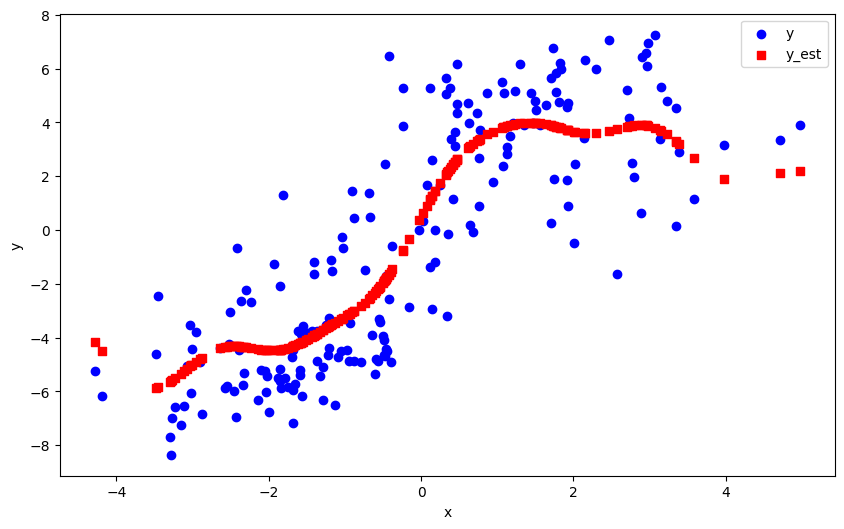

The programm is closed


In [30]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

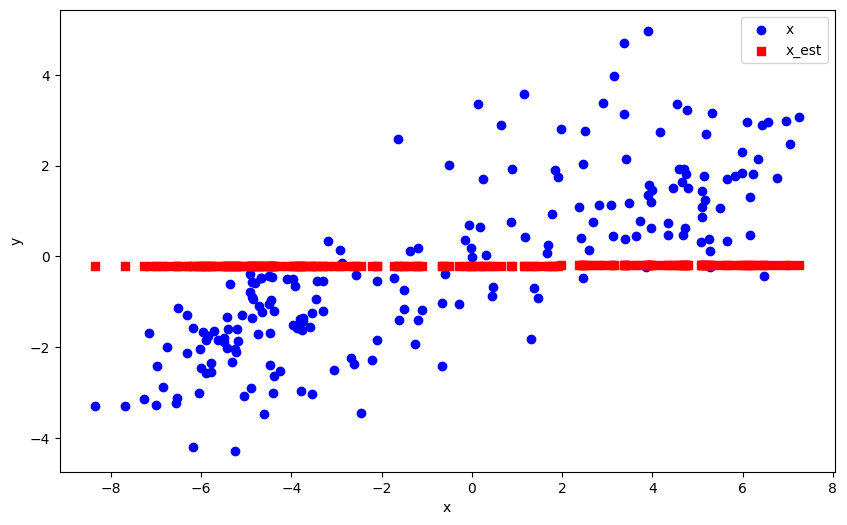

The programm is closed


In [31]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(y, true_x, label='x', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(y, x_hat, label='x_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### Standardzation destroy the model structure

#### Cov = 0

In [123]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*10 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[ 0.91738083 -0.02608031]
 [-0.02608031  0.93109508]]
covariance:             x          y
x   4.011716  10.311997
y  10.311997  52.408682


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 0.19856084207746338
	 mle: 15.921143379956181
	 mse: 7.735477012827418
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[1.0050, 0.0103],
        [0.0103, 1.0050]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9465, 0.0392],
        [0.0392, 0.9480]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0024,  0.0000],
        [-0.1391,  0.0039]])
Check y:  tensor([-0.0233, -2.5425, -3.5245,  1.3620,  4.0182,  3.6983,  2.4060, -4.2342,
         2.1703,  4.2753,  1.7309, -4.3198, -2.9446, -2.4753,  4.1785,  0.1643,
        -4.5433,  4.2841,  3.0819, -4.5789, -4.4844,  3.0721, -4.1751,  3.6503,
         1.7202,  3.8417, -1.3400,  4.0040,  4.0338, -0.9041, -3.9473, -1.3200,
         3.9636,  2.3236,  4.1929, -4.1821, -4.55

  0%|          | 5/33000.0 [00:04<7:57:42,  1.15it/s]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.021653757329265777
	score(model): 0.07765135788599825
	 mle: 0.5603247756825773
	 mse: 0.8826167704165692
	W1: tensor([[1.0000e-04, 1.5236e+00],
        [9.6061e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021653757329265777
	W2: tensor([[ 0.8291, -0.7283],
        [-0.7283,  0.9249]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8291, -0.7286],
        [-0.7286,  0.9255]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0006, 0.0000],
        [0.0019, 0.0007]])
Check y:  tensor([ 0.0110, -0.6688, -1.9373,  2.4139,  1.5893,  2.1031,  2.2425, -1.2025,
         0.7254,  1.8410,  2.3457, -1.2416, -0.7787, -2.0685,  2.0030,  0.0655,
        -1.3704,  1.8908,  1.0961, -1.6709, -1.3305,  1.0917, -1.1772,  1.3707,
         0.5622,  2.0841, -0.3509,  1.5796,  1.6001, -0.2343, -1.8686, -2.2165,
         2.0637,  0.7836,  1.7286, -1.1801, -1.6889, -2.1731, -0.7521,  0.7614,
        -0.7995,  1.2982,  1.7498,  0.0320, -0.4

  0%|          | 6/33000.0 [00:08<14:37:52,  1.60s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.022529661724456806
	score(model): 0.07700631470335757
	 mle: 0.545568134950142
	 mse: 1.0541844538934595
	W1: tensor([[1.0000e-04, 1.6981e+00],
        [8.7896e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.022529661724456806
	W2: tensor([[ 0.8437, -0.9096],
        [-0.9096,  1.2569]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8437, -0.9097],
        [-0.9097,  1.2570]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0002, 0.0000],
        [0.0008, 0.0004]])
Check y:  tensor([ 2.4172e-02, -7.2282e-01, -2.2015e+00,  2.7902e+00,  1.7448e+00,
         2.3621e+00,  2.5594e+00, -1.3176e+00,  8.0047e-01,  2.0311e+00,
         2.6979e+00, -1.3619e+00, -8.4445e-01, -2.3741e+00,  2.2269e+00,
         8.3662e-02, -1.5087e+00,  2.0898e+00,  1.2028e+00, -1.8632e+00,
        -1.4630e+00,  1.1981e+00, -1.2891e+00,  1.5029e+00,  6.2360e-01,
         2.3350e+00, -3.7229e-01,  1.7341e+00,  1.7569e+00, -2.4420e-01,
        -2.

  0%|          | 7/33000.0 [00:12<20:28:53,  2.23s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.02270571569828128
	score(model): 0.0768616619157936
	 mle: 0.5431191918583695
	 mse: 1.1067190098476138
	W1: tensor([[1.0000e-04, 1.7457e+00],
        [8.5831e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02270571569828128
	W2: tensor([[ 0.8477, -0.9590],
        [-0.9590,  1.3592]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8477, -0.9590],
        [-0.9590,  1.3593]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0003, 0.0000],
        [0.0008, 0.0004]])
Check y:  tensor([ 0.0289, -0.7379, -2.2732,  2.8894,  1.7861,  2.4338,  2.6448, -1.3481,
         0.8221,  2.0820,  2.7911, -1.3936, -0.8628, -2.4568,  2.2881,  0.0899,
        -1.5448,  2.1434,  1.2321, -1.9137, -1.4977,  1.2272, -1.3188,  1.5383,
         0.6417,  2.4044, -0.3779,  1.7751,  1.7985, -0.2464, -2.1772, -2.6646,
         2.3739,  0.8864,  1.9478, -1.3223, -1.9368, -2.9039, -0.8326,  0.8619,
        -0.8865,  1.4570,  1.9729,  0.0525, -0.4650

  0%|          | 8/33000.0 [00:16<24:40:25,  2.69s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.02263310324679968
	score(model): 0.07680975290034678
	 mle: 0.5413670625266485
	 mse: 1.1214277085041033
	W1: tensor([[1.0000e-04, 1.7588e+00],
        [8.5056e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02263310324679968
	W2: tensor([[ 0.8486, -0.9724],
        [-0.9724,  1.3880]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8486, -0.9724],
        [-0.9724,  1.3880]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.4724e-05, 0.0000e+00],
        [5.3089e-04, 3.2192e-04]])
Check y:  tensor([ 0.0300, -0.7426, -2.2933,  2.9165,  1.7972,  2.4536,  2.6683, -1.3566,
         0.8281,  2.0958,  2.8166, -1.4024, -0.8683, -2.4792,  2.3050,  0.0914,
        -1.5547,  2.1579,  1.2401, -1.9279, -1.5072,  1.2352, -1.3271,  1.5478,
         0.6469,  2.4236, -0.3799,  1.7861,  1.8097, -0.2474, -2.1957, -2.6901,
         2.3924,  0.8927,  1.9602, -1.3305, -1.9513, -2.9452, -0.8379,  0.8681,
        -0.8921,  1.4662,  1.9855,

  0%|          | 9/33000.0 [00:20<27:48:57,  3.04s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.022318240490073027
	score(model): 0.07680307364957079
	 mle: 0.5394096594372089
	 mse: 1.124360039904215
	W1: tensor([[1.0000e-04, 1.7614e+00],
        [8.4346e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.022318240490073027
	W2: tensor([[ 0.8489, -0.9752],
        [-0.9752,  1.3940]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8489, -0.9752],
        [-0.9752,  1.3940]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0354e-03,  0.0000e+00],
        [-2.4904e-04, -8.3231e-05]])
Check y:  tensor([ 0.0304, -0.7438, -2.2978,  2.9220,  1.7995,  2.4581,  2.6731, -1.3584,
         0.8296,  2.0988,  2.8217, -1.4042, -0.8697, -2.4840,  2.3087,  0.0919,
        -1.5567,  2.1611,  1.2418, -1.9309, -1.5092,  1.2370, -1.3289,  1.5498,
         0.6482,  2.4280, -0.3804,  1.7884,  1.8120, -0.2476, -2.1999, -2.6952,
         2.3966,  0.8943,  1.9628, -1.3323, -1.9544, -2.9545, -0.8393,  0.8697,
        -0.8935,  1.4681,  1.

  0%|          | 11/33000.0 [00:24<23:41:03,  2.58s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.004208685011317659
	score(model): 0.04379924101386726
	 mle: 0.792244666555848
	 mse: 0.8200824130606253
	W1: tensor([[1.0000e-04, 1.4176e+00],
        [4.5715e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004208685011317659
	W2: tensor([[ 0.9044, -0.5917],
        [-0.5917,  0.7112]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9044, -0.5918],
        [-0.5918,  0.7114]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0005,  0.0000],
        [ 0.0014, -0.0005]])
Check y:  tensor([-0.0162, -0.6843, -1.7498,  2.0085,  1.5074,  1.9159,  1.9355, -1.1441,
         0.6947,  1.7307,  1.9728, -1.1756, -0.7848, -1.8181,  1.8618,  0.0388,
        -1.2788,  1.7731,  1.0504, -1.5263, -1.2469,  1.0463, -1.1237,  1.3072,
         0.5350,  1.9095, -0.3788,  1.4986,  1.5171, -0.2628, -1.6964, -1.8423,
         1.9002,  0.7512,  1.6324, -1.1261, -1.5417, -1.8187, -0.7608,  0.7298,
        -0.8035,  1.2399,  1.6512,  0.0050, 

  0%|          | 12/33000.0 [00:28<26:48:08,  2.92s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.004296839444127842
	score(model): 0.043695472909385344
	 mle: 0.7876569123465087
	 mse: 0.8766682773969118
	W1: tensor([[1.0000e-04, 1.4884e+00],
        [4.3994e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004296839444127842
	W2: tensor([[ 0.9164, -0.6809],
        [-0.6809,  0.8298]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9164, -0.6810],
        [-0.6810,  0.8299]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.9415e-06, 0.0000e+00],
        [5.1170e-04, 1.5253e-04]])
Check y:  tensor([-0.0130, -0.6989, -1.8573,  2.1945,  1.5754,  2.0247,  2.0792, -1.1933,
         0.7180,  1.8154,  2.1427, -1.2282, -0.8044, -1.9497,  1.9587,  0.0431,
        -1.3426,  1.8613,  1.0902, -1.6143, -1.3071,  1.0859, -1.1707,  1.3620,
         0.5524,  2.0153, -0.3831,  1.5661,  1.5859, -0.2646, -1.7975, -2.0216,
         2.0032,  0.7768,  1.7095, -1.1734, -1.6309, -1.9786, -0.7791,  0.7545,
        -0.8242,  1.2906,  1.7

  0%|          | 13/33000.0 [00:32<29:13:03,  3.19s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.004345404777661321
	score(model): 0.04363895578255994
	 mle: 0.7855478652479033
	 mse: 0.9350921444814535
	W1: tensor([[1.0000e-04, 1.5583e+00],
        [4.2256e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004345404777661321
	W2: tensor([[ 0.9205, -0.7568],
        [-0.7568,  0.9445]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9205, -0.7569],
        [-0.7569,  0.9446]], grad_fn=<MmBackward0>)
Check M:  tensor([[6.7522e-06, 0.0000e+00],
        [3.3057e-04, 1.4523e-04]])
Check y:  tensor([-0.0097, -0.7150, -1.9568,  2.3602,  1.6447,  2.1244,  2.2109, -1.2387,
         0.7463,  1.8968,  2.2962, -1.2764, -0.8250, -2.0652,  2.0486,  0.0480,
        -1.4008,  1.9452,  1.1353, -1.6961, -1.3622,  1.1307, -1.2143,  1.4204,
         0.5741,  2.1122, -0.3894,  1.6348,  1.6556, -0.2678, -1.8922, -2.1720,
         2.0978,  0.8076,  1.7855, -1.2171, -1.7140, -2.1605, -0.7986,  0.7843,
        -0.8457,  1.3454,  1.80

  0%|          | 14/33000.0 [00:36<31:33:54,  3.44s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.004373291425897263
	score(model): 0.04361055947094919
	 mle: 0.7844145687837063
	 mse: 0.973467675338414
	W1: tensor([[1.0000e-04, 1.6009e+00],
        [4.1263e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004373291425897263
	W2: tensor([[ 0.9228, -0.8031],
        [-0.8031,  1.0201]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9228, -0.8031],
        [-0.8031,  1.0202]], grad_fn=<MmBackward0>)
Check M:  tensor([[9.1647e-06, 0.0000e+00],
        [2.4428e-04, 1.4291e-04]])
Check y:  tensor([-0.0073, -0.7258, -2.0185,  2.4588,  1.6857,  2.1859,  2.2912, -1.2661,
         0.7643,  1.9452,  2.3883, -1.3054, -0.8385, -2.1367,  2.1029,  0.0514,
        -1.4355,  1.9952,  1.1627, -1.7449, -1.3951,  1.1580, -1.2407,  1.4553,
         0.5881,  2.1719, -0.3937,  1.6756,  1.6969, -0.2699, -1.9504, -2.2617,
         2.1558,  0.8270,  1.8305, -1.2437, -1.7637, -2.2786, -0.8113,  0.8031,
        -0.8597,  1.3783,  1.852

  0%|          | 15/33000.0 [00:40<32:51:59,  3.59s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.00435104405531106
	score(model): 0.04361342788935013
	 mle: 0.7849422187666122
	 mse: 0.9802245367336352
	W1: tensor([[1.0000e-04, 1.6080e+00],
        [4.0976e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00435104405531106
	W2: tensor([[ 0.9234, -0.8111],
        [-0.8111,  1.0336]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9233, -0.8111],
        [-0.8111,  1.0336]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.0001e-05,  0.0000e+00],
        [ 1.8736e-04,  1.2532e-04]])
Check y:  tensor([-0.0065, -0.7273, -2.0288,  2.4751,  1.6921,  2.1965,  2.3051, -1.2702,
         0.7676,  1.9528,  2.4037, -1.3098, -0.8405, -2.1485,  2.1118,  0.0524,
        -1.4407,  2.0031,  1.1674, -1.7527, -1.4001,  1.1627, -1.2447,  1.4609,
         0.5909,  2.1820, -0.3941,  1.6820,  1.7034, -0.2700, -1.9600, -2.2759,
         2.1656,  0.8306,  1.8375, -1.2477, -1.7716, -2.3014, -0.8132,  0.8066,
        -0.8618,  1.3837,  1.

  0%|          | 17/33000.0 [00:44<26:28:18,  2.89s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0007273862029107958
	score(model): 0.023140009636917463
	 mle: 0.8956100851076458
	 mse: 0.6619297867004259
	W1: tensor([[1.0000e-04, 1.0682e+00],
        [2.5243e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007273862029107958
	W2: tensor([[ 0.9564, -0.1452],
        [-0.1452,  0.3665]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9566, -0.1454],
        [-0.1454,  0.3666]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0003,  0.0000],
        [ 0.0007, -0.0005]])
Check y:  tensor([-0.0654, -0.5817, -1.1275,  1.0402,  1.1419,  1.2829,  1.1190, -0.8659,
         0.5174,  1.2812,  1.0593, -0.8825, -0.6506, -1.0767,  1.3271, -0.0205,
        -0.9349,  1.3019,  0.8015, -1.0539, -0.9189,  0.7983, -0.8550,  0.9980,
         0.3871,  1.3004, -0.3548,  1.1359,  1.1486, -0.2639, -1.1209, -0.9252,
         1.3136,  0.5631,  1.2243, -0.8563, -1.0609, -0.6497, -0.6345,  0.5457,
        -0.6631,  0.9476,  1.2359, -0.0

  0%|          | 18/33000.0 [00:48<28:55:50,  3.16s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0008269546693335794
	score(model): 0.023015238051976136
	 mle: 0.8872785483969801
	 mse: 0.7003950738755252
	W1: tensor([[1.0000e-04, 1.1882e+00],
        [2.4196e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008269546693335794
	W2: tensor([[ 0.9530, -0.3085],
        [-0.3085,  0.4445]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9530, -0.3087],
        [-0.3087,  0.4446]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.2475e-06, 0.0000e+00],
        [3.3356e-04, 7.4201e-05]])
Check y:  tensor([-0.0514, -0.6212, -1.3427,  1.3781,  1.2809,  1.5111,  1.4068, -0.9727,
         0.5789,  1.4515,  1.3798, -0.9950, -0.7019, -1.3375,  1.5254, -0.0031,
        -1.0660,  1.4796,  0.8925, -1.2261, -1.0443,  0.8889, -0.9582,  1.1142,
         0.4370,  1.5213, -0.3660,  1.2737,  1.2888, -0.2664, -1.3215, -1.2591,
         1.5277,  0.6290,  1.3796, -0.9599, -1.2355, -0.9477, -0.6828,  0.6100,
        -0.7167,  1.0568,  

  0%|          | 19/33000.0 [00:52<30:54:25,  3.37s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0008947242712671333
	score(model): 0.022942957550468646
	 mle: 0.8816586342440818
	 mse: 0.7589578982952386
	W1: tensor([[1.0000e-04, 1.3066e+00],
        [2.2888e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008947242712671333
	W2: tensor([[ 0.9556, -0.4558],
        [-0.4558,  0.5592]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9556, -0.4559],
        [-0.4559,  0.5593]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.6121e-06, 0.0000e+00],
        [2.0012e-04, 7.0705e-05]])
Check y:  tensor([-0.0435, -0.6525, -1.5351,  1.6940,  1.4103,  1.7042,  1.6579, -1.0623,
         0.6319,  1.6062,  1.6716, -1.0901, -0.7424, -1.5631,  1.6986,  0.0077,
        -1.1800,  1.6396,  0.9759, -1.3837, -1.1524,  0.9719, -1.0442,  1.2226,
         0.4781,  1.7092, -0.3769,  1.4023,  1.4193, -0.2712, -1.5038, -1.5526,
         1.7110,  0.6864,  1.5229, -1.0464, -1.3955, -1.3021, -0.7210,  0.6657,
        -0.7591,  1.1584,  

  0%|          | 20/33000.0 [00:56<32:24:28,  3.54s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0009302599286158397
	score(model): 0.022908535419121433
	 mle: 0.8788441833401348
	 mse: 0.8162050285557205
	W1: tensor([[1.0000e-04, 1.3981e+00],
        [2.1810e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009302599286158397
	W2: tensor([[ 0.9581, -0.5638],
        [-0.5638,  0.6720]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9581, -0.5639],
        [-0.5639,  0.6721]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.2253e-06, 0.0000e+00],
        [1.2204e-04, 6.8491e-05]])
Check y:  tensor([-0.0381, -0.6772, -1.6787,  1.9246,  1.5046,  1.8464,  1.8443, -1.1267,
         0.6724,  1.7180,  1.8862, -1.1583, -0.7734, -1.7295,  1.8244,  0.0155,
        -1.2616,  1.7552,  1.0384, -1.4982, -1.2297,  1.0341, -1.1062,  1.3025,
         0.5097,  1.8470, -0.3866,  1.4960,  1.5143, -0.2759, -1.6393, -1.7629,
         1.8450,  0.7303,  1.6266, -1.1086, -1.5119, -1.5784, -0.7504,  0.7082,
        -0.7914,  1.2336,  

  0%|          | 21/33000.0 [01:00<33:57:07,  3.71s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.000980239184506404
	score(model): 0.022910048465346524
	 mle: 0.8775562688443437
	 mse: 0.8393682235188553
	W1: tensor([[1.0000e-04, 1.4313e+00],
        [2.1869e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000980239184506404
	W2: tensor([[ 0.9590, -0.6018],
        [-0.6018,  0.7172]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9590, -0.6018],
        [-0.6018,  0.7172]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.0636e-04, 0.0000e+00],
        [2.1394e-04, 8.8296e-05]])
Check y:  tensor([-0.0362, -0.6875, -1.7313,  2.0032,  1.5377,  1.8975,  1.9094, -1.1504,
         0.6875,  1.7572,  1.9598, -1.1833, -0.7861, -1.7899,  1.8691,  0.0184,
        -1.2908,  1.7959,  1.0608, -1.5390, -1.2576,  1.0565, -1.1292,  1.3307,
         0.5216,  1.8965, -0.3910,  1.5288,  1.5476, -0.2783, -1.6887, -1.8358,
         1.8930,  0.7464,  1.6629, -1.1317, -1.5534, -1.6830, -0.7625,  0.7240,
        -0.8045,  1.2603,  1.

  0%|          | 23/33000.0 [01:05<27:31:35,  3.00s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00015062510627115156
	score(model): 0.011827674938877713
	 mle: 0.9337268528508447
	 mse: 0.6679505513508487
	W1: tensor([[1.0000e-04, 9.5053e-01],
        [1.2910e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00015062510627115156
	W2: tensor([[0.9834, 0.0904],
        [0.0904, 0.3692]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9836, 0.0904],
        [0.0904, 0.3692]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0002, 0.0000],
        [0.0003, 0.0006]])
Check y:  tensor([-0.0918, -0.5121, -0.7946,  0.4923,  0.9748,  0.9882,  0.6813, -0.7382,
         0.4100,  1.0892,  0.5494, -0.7508, -0.5673, -0.6548,  1.0967, -0.0543,
        -0.7888,  1.1016,  0.6658, -0.8496, -0.7776,  0.6629, -0.7298,  0.8451,
         0.2950,  1.0230, -0.3294,  0.9695,  0.9807, -0.2555, -0.8316, -0.4381,
         1.0516,  0.4508,  1.0456, -0.7308, -0.8511, -0.2140, -0.5544,  0.4353,
        -0.5772,  0.7991,  1.0550, -0.0773, -0.3

  0%|          | 24/33000.0 [01:09<29:49:19,  3.26s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00015189426323948887
	score(model): 0.011762517807275424
	 mle: 0.9286485293312516
	 mse: 0.6645528982783795
	W1: tensor([[1.0000e-04, 1.0144e+00],
        [1.2149e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00015189426323948887
	W2: tensor([[ 0.9771, -0.0348],
        [-0.0348,  0.3523]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9771, -0.0349],
        [-0.0349,  0.3523]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.7663e-06, 0.0000e+00],
        [1.4872e-04, 3.5852e-05]])
Check y:  tensor([-8.2954e-02, -5.6189e-01, -9.7867e-01,  8.0230e-01,  1.0717e+00,
         1.1375e+00,  9.2506e-01, -8.0838e-01,  4.7660e-01,  1.1909e+00,
         8.3890e-01, -8.2193e-01, -6.2346e-01, -8.9836e-01,  1.2117e+00,
        -4.0361e-02, -8.6379e-01,  1.2055e+00,  7.5092e-01, -9.5106e-01,
        -8.5121e-01,  7.4782e-01, -7.9938e-01,  9.3828e-01,  3.5066e-01,
         1.1620e+00, -3.5447e-01,  1.0663e+00,  1.0778e+00,

  0%|          | 25/33000.0 [01:13<31:53:50,  3.48s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00017207621470335943
	score(model): 0.011737561569319797
	 mle: 0.9250166274925224
	 mse: 0.6736214579797621
	W1: tensor([[1.0000e-04, 1.0802e+00],
        [1.2143e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00017207621470335943
	W2: tensor([[ 0.9767, -0.1411],
        [-0.1411,  0.3702]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9767, -0.1412],
        [-0.1412,  0.3702]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.0591e-07, 0.0000e+00],
        [9.1869e-05, 3.4426e-05]])
Check y:  tensor([-0.0731, -0.5871, -1.1160,  1.0254,  1.1588,  1.2802,  1.1102, -0.8752,
         0.5172,  1.2965,  1.0484, -0.8922, -0.6561, -1.0662,  1.3346, -0.0282,
        -0.9454,  1.3157,  0.8095, -1.0588, -0.9293,  0.8062, -0.8640,  1.0119,
         0.3840,  1.2998, -0.3614,  1.1526,  1.1655, -0.2710, -1.1134, -0.9259,
         1.3153,  0.5642,  1.2412, -0.8653, -1.0650, -0.4898, -0.6399,  0.5463,
        -0.6686,  0.9600

  0%|          | 26/33000.0 [01:17<33:21:56,  3.64s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00018923886086391617
	score(model): 0.011716000168352215
	 mle: 0.9219038917927318
	 mse: 0.6953022623139793
	W1: tensor([[1.0000e-04, 1.1570e+00],
        [1.1888e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00018923886086391617
	W2: tensor([[ 0.9770, -0.2508],
        [-0.2508,  0.4129]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9770, -0.2509],
        [-0.2509,  0.4129]], grad_fn=<MmBackward0>)
Check M:  tensor([[6.4358e-07, 0.0000e+00],
        [6.7139e-05, 3.3818e-05]])
Check y:  tensor([-0.0660, -0.6099, -1.2577,  1.2563,  1.2527,  1.4241,  1.2941, -0.9418,
         0.5559,  1.4102,  1.2613, -0.9629, -0.6860, -1.2332,  1.4634, -0.0190,
        -1.0299,  1.4336,  0.8696, -1.1746, -1.0095,  0.8660, -0.9280,  1.0901,
         0.4144,  1.4399, -0.3683,  1.2459,  1.2603, -0.2733, -1.2474, -1.1429,
         1.4520,  0.6060,  1.3459, -0.9297, -1.1825, -0.7549, -0.6680,  0.5869,
        -0.6999,  1.0333

  0%|          | 27/33000.0 [01:21<34:48:03,  3.80s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00020216267107786567
	score(model): 0.011701482860124268
	 mle: 0.9196939232916526
	 mse: 0.7270216723291626
	W1: tensor([[1.0000e-04, 1.2353e+00],
        [1.1509e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00020216267107786567
	W2: tensor([[ 0.9777, -0.3539],
        [-0.3539,  0.4755]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9777, -0.3540],
        [-0.3540,  0.4756]], grad_fn=<MmBackward0>)
Check M:  tensor([[6.4447e-07, 0.0000e+00],
        [4.6959e-05, 3.3396e-05]])
Check y:  tensor([-0.0601, -0.6322, -1.3926,  1.4742,  1.3414,  1.5590,  1.4687, -1.0036,
         0.5932,  1.5165,  1.4630, -1.0284, -0.7146, -1.3903,  1.5835, -0.0110,
        -1.1082,  1.5438,  0.9273, -1.2834, -1.0837,  0.9234, -0.9875,  1.1646,
         0.4436,  1.5710, -0.3761,  1.3340,  1.3497, -0.2765, -1.3749, -1.3442,
         1.5797,  0.6463,  1.4441, -0.9893, -1.2931, -1.0135, -0.6950,  0.6261,
        -0.7298,  1.1032

  0%|          | 29/33000.0 [01:25<27:38:19,  3.02s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 8.263035457585292e-06
	score(model): 0.0059658268287218945
	 mle: 0.952732698585318
	 mse: 0.7605325040412606
	W1: tensor([[1.0000e-04, 8.3987e-01],
        [3.4185e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.263035457585292e-06
	W2: tensor([[0.9953, 0.4231],
        [0.4231, 0.5437]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9955, 0.4230],
        [0.4230, 0.5436]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.5127e-05,  0.0000e+00],
        [ 1.9639e-04,  3.7202e-04]])
Check y:  tensor([-0.1286, -0.4506, -0.3672, -0.1537,  0.7091,  0.5380,  0.1336, -0.5413,
         0.2903,  0.7572, -0.0579, -0.5419, -0.4829, -0.1645,  0.7045, -0.0973,
        -0.5393,  0.7534,  0.4932, -0.5043, -0.5408,  0.4910, -0.5406,  0.6248,
         0.1956,  0.5859, -0.3210,  0.7059,  0.7125, -0.2628, -0.4269,  0.1736,
         0.6275,  0.3235,  0.7457, -0.5407, -0.5004,  0.6747, -0.4757,  0.3109,
        -0.4882,  0.5922,  0.

  0%|          | 30/33000.0 [01:29<29:51:43,  3.26s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 1.6762590925477323e-05
	score(model): 0.005945860174612347
	 mle: 0.9484750755793321
	 mse: 0.7199367785481539
	W1: tensor([[1.0000e-04, 8.6820e-01],
        [4.7129e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.6762590925477323e-05
	W2: tensor([[0.9925, 0.3109],
        [0.3109, 0.4504]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9925, 0.3108],
        [0.3108, 0.4503]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.4801e-07, 0.0000e+00],
        [5.5264e-05, 1.4821e-05]])
Check y:  tensor([-0.1153, -0.4840, -0.5215,  0.0942,  0.8001,  0.6727,  0.3316, -0.6036,
         0.3476,  0.8567,  0.1735, -0.6062, -0.5229, -0.3586,  0.8159, -0.0803,
        -0.6108,  0.8554,  0.5675, -0.6023, -0.6100,  0.5651, -0.6016,  0.7091,
         0.2441,  0.7138, -0.3332,  0.7966,  0.8038, -0.2668, -0.5620, -0.0436,
         0.7497,  0.3837,  0.8410, -0.6018, -0.6008,  0.6036, -0.5142,  0.3700,
        -0.5294,  0.6741,  0.84

  0%|          | 31/33000.0 [01:33<31:33:21,  3.45s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 2.466988282990886e-05
	score(model): 0.005932963549153167
	 mle: 0.9451403929476512
	 mse: 0.6878767350952097
	W1: tensor([[1.0000e-04, 9.0842e-01],
        [5.4653e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.466988282990886e-05
	W2: tensor([[0.9903, 0.1854],
        [0.1854, 0.3871]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9903, 0.1853],
        [0.1853, 0.3870]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.5035e-07, 0.0000e+00],
        [4.1167e-05, 1.6807e-05]])
Check y:  tensor([-0.1034, -0.5119, -0.6815,  0.3534,  0.9012,  0.8403,  0.5464, -0.6815,
         0.3939,  0.9806,  0.4164, -0.6882, -0.5597, -0.5533,  0.9607, -0.0657,
        -0.7065,  0.9849,  0.6345, -0.7291, -0.7015,  0.6318, -0.6767,  0.7939,
         0.2821,  0.8759, -0.3400,  0.8969,  0.9058, -0.2671, -0.7108, -0.2958,
         0.9065,  0.4330,  0.9539, -0.6773, -0.7294,  0.3397, -0.5487,  0.4182,
        -0.5680,  0.7539,  0.9604

  0%|          | 32/33000.0 [01:37<32:55:39,  3.60s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 3.373020899966995e-05
	score(model): 0.005920159100198392
	 mle: 0.9416024182214253
	 mse: 0.6706549435554502
	W1: tensor([[1.0000e-04, 9.7706e-01],
        [5.9423e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.373020899966995e-05
	W2: tensor([[0.9889, 0.0412],
        [0.0412, 0.3532]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9889, 0.0411],
        [0.0411, 0.3531]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.5961e-08,  0.0000e+00],
        [ 4.3655e-05,  1.6927e-05]])
Check y:  tensor([-0.0929, -0.5422, -0.8678,  0.6536,  1.0220,  1.0306,  0.7886, -0.7691,
         0.4449,  1.1278,  0.6944, -0.7811, -0.5994, -0.7730,  1.1293, -0.0524,
        -0.8170,  1.1380,  0.7124, -0.8800, -0.8064,  0.7093, -0.7611,  0.8946,
         0.3228,  1.0609, -0.3487,  1.0169,  1.0277, -0.2693, -0.8864, -0.5791,
         1.0865,  0.4880,  1.0889, -0.7620, -0.8825, -0.0026, -0.5861,  0.4716,
        -0.6096,  0.8483,  1.

  0%|          | 33/33000.0 [01:41<33:57:11,  3.71s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 6.683158485357166e-05
	score(model): 0.005931654583689866
	 mle: 0.9396904130904518
	 mse: 0.6762171961779453
	W1: tensor([[1.0000e-04, 1.0683e+00],
        [7.6514e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.683158485357166e-05
	W2: tensor([[ 0.9887, -0.1118],
        [-0.1118,  0.3631]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9886, -0.1119],
        [-0.1119,  0.3632]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.4947e-05, 0.0000e+00],
        [6.3450e-05, 1.7664e-05]])
Check y:  tensor([-0.0809, -0.5751, -1.0689,  0.9764,  1.1492,  1.2306,  1.0493, -0.8620,
         0.5017,  1.2808,  0.9942, -0.8795, -0.6423, -1.0077,  1.3043, -0.0373,
        -0.9340,  1.2969,  0.7968, -1.0415, -0.9176,  0.7935, -0.8505,  1.0019,
         0.3684,  1.2545, -0.3583,  1.1432,  1.1559, -0.2717, -1.0760, -0.8776,
         1.2744,  0.5489,  1.2297, -0.8519, -1.0465, -0.3881, -0.6265,  0.5309,
        -0.6545,  0.9494,

  0%|          | 35/33000.0 [01:45<27:21:05,  2.99s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 5.4345863692297336e-06
	score(model): 0.0029981870955279612
	 mle: 0.9577518563687648
	 mse: 0.757943087640608
	W1: tensor([[1.0000e-04, 8.3353e-01],
        [2.7917e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.4345863692297336e-06
	W2: tensor([[0.9814, 0.4019],
        [0.4019, 0.5237]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9816, 0.4018],
        [0.4018, 0.5235]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.9224e-05,  0.0000e+00],
        [ 2.1962e-05,  8.7403e-05]])
Check y:  tensor([-0.1063, -0.4140, -0.3519, -0.1881,  0.7135,  0.5629,  0.1195, -0.5616,
         0.2774,  0.7804, -0.0874, -0.5676, -0.4529, -0.1305,  0.7374, -0.0782,
        -0.5809,  0.7804,  0.4778, -0.5533, -0.5779,  0.4755, -0.5573,  0.6172,
         0.1881,  0.6144, -0.2820,  0.7097,  0.7177, -0.2277, -0.4337,  0.1452,
         0.6585,  0.3093,  0.7602, -0.5578, -0.5474,  0.4463, -0.4439,  0.2972,
        -0.4599,  0.5817, 

  0%|          | 36/33000.0 [01:49<29:32:58,  3.23s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 4.412113641638445e-06
	score(model): 0.0029757213464561972
	 mle: 0.9506488894896674
	 mse: 0.7195853197018752
	W1: tensor([[1.0000e-04, 8.6775e-01],
        [2.4151e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.412113641638445e-06
	W2: tensor([[0.9965, 0.3041],
        [0.3041, 0.4451]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9965, 0.3040],
        [0.3040, 0.4450]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.2503e-07, 0.0000e+00],
        [1.9583e-05, 8.9434e-06]])
Check y:  tensor([-0.1172, -0.4684, -0.5150,  0.0944,  0.8135,  0.6813,  0.3208, -0.6105,
         0.3341,  0.8799,  0.1666, -0.6159, -0.5085, -0.3402,  0.8378, -0.0839,
        -0.6294,  0.8795,  0.5609, -0.6285, -0.6259,  0.5584, -0.6066,  0.7126,
         0.2305,  0.7263, -0.3226,  0.8096,  0.8178, -0.2600, -0.5675, -0.0570,
         0.7655,  0.3707,  0.8605, -0.6071, -0.6261,  0.5007, -0.4993,  0.3568,
        -0.5155,  0.6746,  0.86

  0%|          | 37/33000.0 [01:53<31:21:40,  3.43s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 5.805290712182837e-06
	score(model): 0.0029719138248974824
	 mle: 0.9489725633116586
	 mse: 0.6951204741102837
	W1: tensor([[1.0000e-04, 9.0178e-01],
        [2.6672e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.805290712182837e-06
	W2: tensor([[0.9952, 0.2097],
        [0.2097, 0.3960]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9952, 0.2096],
        [0.2096, 0.3960]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.5278e-08, 0.0000e+00],
        [7.8778e-06, 8.2079e-06]])
Check y:  tensor([-0.1097, -0.5018, -0.6462,  0.3072,  0.8896,  0.8029,  0.4969, -0.6666,
         0.3802,  0.9653,  0.3681, -0.6735, -0.5475, -0.5077,  0.9362, -0.0731,
        -0.6921,  0.9676,  0.6217, -0.7115, -0.6870,  0.6190, -0.6619,  0.7823,
         0.2688,  0.8415, -0.3376,  0.8855,  0.8942, -0.2677, -0.6817, -0.2498,
         0.8751,  0.4193,  0.9411, -0.6624, -0.7111,  0.4022, -0.5370,  0.4045,
        -0.5555,  0.7421,  0.94

  0%|          | 38/33000.0 [01:57<32:45:20,  3.58s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 6.974205187828356e-06
	score(model): 0.0029700648559744035
	 mle: 0.9480005079681326
	 mse: 0.6817536733970397
	W1: tensor([[1.0000e-04, 9.3355e-01],
        [2.8248e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.974205187828356e-06
	W2: tensor([[0.9947, 0.1332],
        [0.1332, 0.3694]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9947, 0.1331],
        [0.1331, 0.3694]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.4973e-08, 0.0000e+00],
        [4.3815e-06, 8.2020e-06]])
Check y:  tensor([-0.1024, -0.5212, -0.7455,  0.4667,  0.9510,  0.9054,  0.6309, -0.7142,
         0.4105,  1.0394,  0.5186, -0.7234, -0.5722, -0.6289,  1.0232, -0.0639,
        -0.7495,  1.0450,  0.6643, -0.7873, -0.7420,  0.6615, -0.7080,  0.8348,
         0.2940,  0.9401, -0.3434,  0.9464,  0.9560, -0.2691, -0.7731, -0.4030,
         0.9701,  0.4516,  1.0090, -0.7087, -0.7881,  0.2384, -0.5604,  0.4360,
        -0.5812,  0.7919,  1.01

  0%|          | 39/33000.0 [02:01<33:47:30,  3.69s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 8.159724844779069e-06
	score(model): 0.0029680411933645135
	 mle: 0.9469650980406832
	 mse: 0.6738690414755065
	W1: tensor([[1.0000e-04, 9.7536e-01],
        [2.9251e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.159724844779069e-06
	W2: tensor([[0.9945, 0.0498],
        [0.0498, 0.3538]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9945, 0.0497],
        [0.0497, 0.3538]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.4622e-08, 0.0000e+00],
        [3.8683e-06, 8.1985e-06]])
Check y:  tensor([-0.0963, -0.5395, -0.8538,  0.6390,  1.0204,  1.0156,  0.7710, -0.7645,
         0.4407,  1.1238,  0.6787, -0.7766, -0.5958, -0.7563,  1.1202, -0.0561,
        -0.8125,  1.1329,  0.7097, -0.8737, -0.8020,  0.7066, -0.7565,  0.8929,
         0.3181,  1.0471, -0.3490,  1.0153,  1.0261, -0.2708, -0.8749, -0.5651,
         1.0741,  0.4839,  1.0864, -0.7574, -0.8759,  0.0311, -0.5827,  0.4675,
        -0.6059,  0.8465,  1.09

  0%|          | 40/33000.0 [02:06<35:11:09,  3.84s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 9.174777635616305e-06
	score(model): 0.002966936952460712
	 mle: 0.9463980194134081
	 mse: 0.6725579196408428
	W1: tensor([[1.0000e-04, 1.0067e+00],
        [3.0055e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.174777635616305e-06
	W2: tensor([[ 0.9944, -0.0062],
        [-0.0062,  0.3511]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9944, -0.0063],
        [-0.0063,  0.3511]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.5738e-07, 0.0000e+00],
        [1.0146e-05, 8.1385e-06]])
Check y:  tensor([-0.0925, -0.5518, -0.9273,  0.7567,  1.0674,  1.0894,  0.8665, -0.7981,
         0.4611,  1.1804,  0.7882, -0.8121, -0.6117, -0.8426,  1.1850, -0.0512,
        -0.8548,  1.1917,  0.7406, -0.9322, -0.8421,  0.7374, -0.7888,  0.9324,
         0.3344,  1.1186, -0.3531,  1.0619,  1.0734, -0.2722, -0.9439, -0.6754,
         1.1435,  0.5060,  1.1385, -0.7899, -0.9353, -0.1114, -0.5977,  0.4889,
        -0.6225,  0.8836

  0%|          | 41/33000.0 [02:10<36:10:58,  3.95s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 6.801205235079655e-06
	score(model): 0.0029679001690642776
	 mle: 0.9418042226662438
	 mse: 0.6735612827167137
	W1: tensor([[1.0000e-04, 1.0463e+00],
        [2.4890e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.801205235079655e-06
	W2: tensor([[ 0.9947, -0.0801],
        [-0.0801,  0.3573]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9949, -0.0801],
        [-0.0801,  0.3573]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.2255e-05,  0.0000e+00],
        [-6.5730e-05,  7.3542e-06]])
Check y:  tensor([-0.0857, -0.5656, -1.0163,  0.9115,  1.1240,  1.1776,  0.9868, -0.8393,
         0.4880,  1.2476,  0.9300, -0.8558, -0.6300, -0.9461,  1.2614, -0.0430,
        -0.9070,  1.2613,  0.7794, -1.0045, -0.8916,  0.7761, -0.8284,  0.9809,
         0.3563,  1.2037, -0.3562,  1.1182,  1.1305, -0.2720, -1.0283, -0.8098,
         1.2258,  0.5346,  1.2007, -0.8297, -1.0088, -0.3144, -0.6149,  0.5169,
        -0.6418,  0

  0%|          | 42/33000.0 [02:14<29:17:58,  3.20s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 1.3730129293787474e-05
	score(model): 0.0029700108208322367
	 mle: 0.9447269774605458
	 mse: 0.679425704352007
	W1: tensor([[1.0000e-04, 1.0776e+00],
        [3.4360e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.3730129293787474e-05
	W2: tensor([[ 0.9944, -0.1215],
        [-0.1215,  0.3656]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9945, -0.1216],
        [-0.1216,  0.3656]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.0286e-06,  0.0000e+00],
        [-1.2392e-05,  7.8004e-06]])
Check y:  tensor([-0.0856, -0.5764, -1.0770,  0.9961,  1.1633,  1.2387,  1.0595, -0.8644,
         0.5025,  1.2957,  1.0101, -0.8824, -0.6430, -1.0146,  1.3164, -0.0420,
        -0.9390,  1.3114,  0.8036, -1.0512, -0.9219,  0.8002, -0.8526,  1.0132,
         0.3671,  1.2634, -0.3617,  1.1572,  1.1701, -0.2758, -1.0854, -0.8914,
         1.2841,  0.5506,  1.2448, -0.8540, -1.0564, -0.4270, -0.6273,  0.5323,
        -0.6552,  

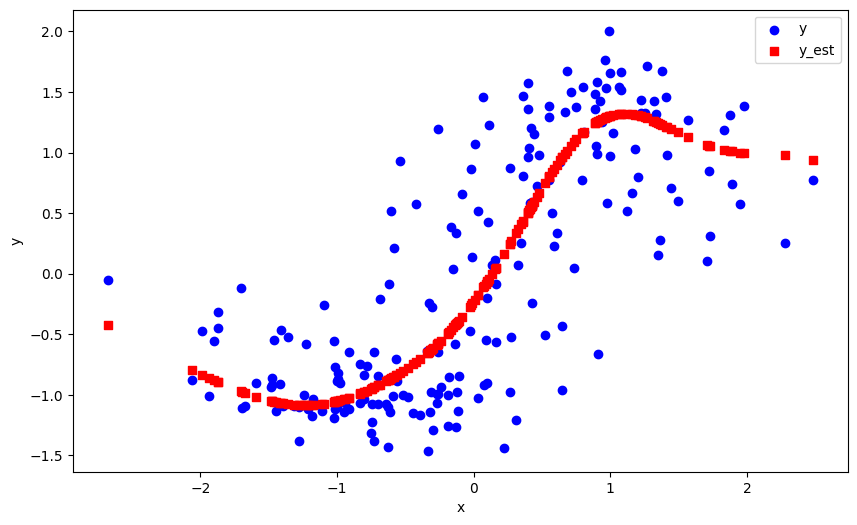

The programm is closed


In [126]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 0].to_numpy(), data.iloc[:, 1].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 0].to_numpy(), y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

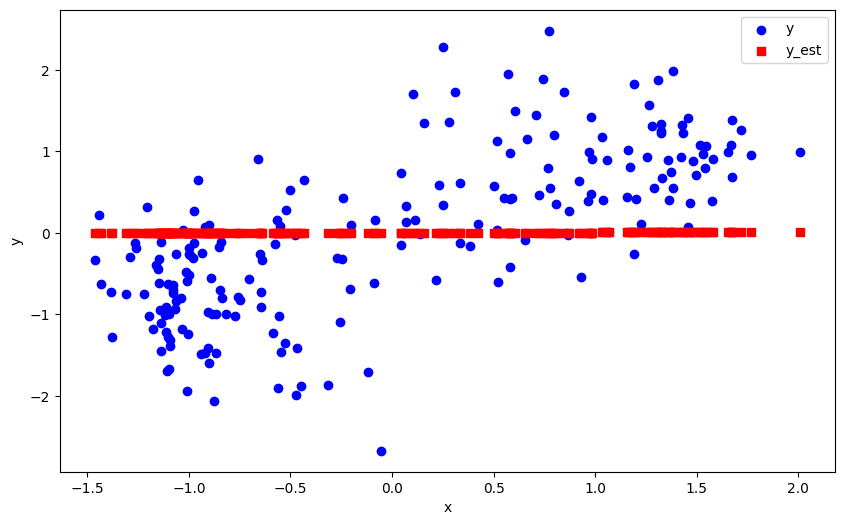

The programm is closed


In [128]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

#### Cov = 0.6

In [129]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*10 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.89925943 0.54768565]
 [0.54768565 0.94098793]]
covariance:             x          y
x   3.676145  10.684512
y  10.684512  52.264335


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 0.20706333797733112
	 mle: 14.529910011843358
	 mse: 7.609567077625688
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 1.0050, -0.0449],
        [-0.0449,  1.0050]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.0672, -0.0153],
        [-0.0153,  1.0653]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0063,  0.0000],
        [-0.1622, -0.0135]])
Check y:  tensor([-2.9331, -4.3108, -4.7309,  1.9040,  3.8984,  1.2978,  1.3012,  3.8360,
         3.5384,  0.5899,  3.1221, -3.0838,  0.9196, -4.2535,  1.7048,  1.6286,
        -3.7035,  3.0166,  3.8973,  1.2995, -3.3375,  3.7635,  4.0308,  4.0049,
         2.4085,  3.9413,  2.5226, -3.1931,  2.1684, -4.1367, -4.7810, -4.1159,
         1.1214,  1.5977,  3.6621, -4.085

  0%|          | 5/33000.0 [00:04<7:55:14,  1.16it/s]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.020864039171879956
	score(model): 0.05755310890237133
	 mle: 0.365872910974814
	 mse: 0.7680043270018443
	W1: tensor([[1.0000e-04, 1.4621e+00],
        [9.8281e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.020864039171879956
	W2: tensor([[ 0.8136, -0.6222],
        [-0.6222,  0.7165]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8136, -0.6225],
        [-0.6225,  0.7169]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0004,  0.0000],
        [ 0.0007,  0.0015]])
Check y:  tensor([-0.7556, -1.7873, -1.6430,  0.8349,  1.8519,  2.3458,  2.3452,  1.8750,
         1.9550,  2.4682,  1.2778, -0.7983,  0.4839, -1.1289,  2.2783,  0.7361,
        -0.9717,  1.2386,  1.6020,  0.6186, -2.0256,  1.5342,  1.7545,  1.6803,
         1.0168,  1.8326,  1.0581, -0.8291,  2.2026, -1.0945, -1.3144, -1.0885,
         0.5553,  0.7250,  1.4892, -1.8496, -1.9138, -0.7964, -0.7042,  1.5761,
        -0.4582, -1.1923,  2.2724, -1.4110,  

  0%|          | 6/33000.0 [00:08<15:19:14,  1.67s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.021733995473951495
	score(model): 0.05693250956894857
	 mle: 0.35292416593576226
	 mse: 0.8836397047885427
	W1: tensor([[1.0000e-04, 1.5975e+00],
        [9.1786e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021733995473951495
	W2: tensor([[ 0.8273, -0.7627],
        [-0.7627,  0.9358]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8273, -0.7627],
        [-0.7627,  0.9358]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0004, 0.0000],
        [0.0008, 0.0005]])
Check y:  tensor([-0.8085, -1.9794, -1.8140,  0.8948,  2.0231,  2.6352,  2.6345,  2.0530,
         2.1585,  2.7879,  1.3744, -0.8541,  0.5150, -1.2126,  2.5588,  0.7877,
        -1.0402,  1.3321,  1.7271,  0.6605, -2.2448,  1.6524,  1.9020,  1.8151,
         1.0919,  1.9985,  1.1367, -0.8869,  2.4717, -1.1744, -1.4243, -1.1677,
         0.5921,  0.7757,  1.6034, -2.0493, -2.1208, -0.8521, -0.7539,  1.6985,
        -0.4930, -1.2838,  2.5521, -1.5386,  0.

  0%|          | 7/33000.0 [00:13<21:36:50,  2.36s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.02159716775373499
	score(model): 0.056781367465656554
	 mle: 0.3510839586750967
	 mse: 0.9145351514648771
	W1: tensor([[1.0000e-04, 1.6300e+00],
        [8.9673e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02159716775373499
	W2: tensor([[ 0.8307, -0.7965],
        [-0.7965,  0.9951]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8307, -0.7965],
        [-0.7965,  0.9951]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0002,  0.0002]])
Check y:  tensor([-0.8216, -2.0264, -1.8562,  0.9097,  2.0626,  2.7026,  2.7020,  2.0943,
         2.2069,  2.8603,  1.3986, -0.8677,  0.5219, -1.2319,  2.6254,  0.8004,
        -1.0562,  1.3555,  1.7565,  0.6705, -2.2962,  1.6807,  1.9357,  1.8462,
         1.1109,  2.0367,  1.1565, -0.9009,  2.5367, -1.1928, -1.4502, -1.1860,
         0.6006,  0.7882,  1.6309, -2.0977, -2.1704, -0.8657, -0.7664,  1.7273,
        -0.5027, -1.3049,  2.6186, -1.5693,  

  0%|          | 8/33000.0 [00:17<26:19:00,  2.87s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.021721063760411607
	score(model): 0.056741036976717306
	 mle: 0.34985326454409904
	 mse: 0.9216799647424527
	W1: tensor([[1.0000e-04, 1.6375e+00],
        [8.9514e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021721063760411607
	W2: tensor([[ 0.8312, -0.8041],
        [-0.8041,  1.0089]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8312, -0.8041],
        [-0.8041,  1.0089]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.5643e-05, 0.0000e+00],
        [4.4377e-04, 3.6624e-04]])
Check y:  tensor([-0.8248, -2.0372, -1.8659,  0.9131,  2.0717,  2.7181,  2.7174,  2.1039,
         2.2181,  2.8773,  1.4041, -0.8710,  0.5234, -1.2364,  2.6407,  0.8033,
        -1.0600,  1.3609,  1.7631,  0.6727, -2.3080,  1.6870,  1.9434,  1.8532,
         1.1152,  2.0454,  1.1611, -0.9043,  2.5516, -1.1972, -1.4562, -1.1904,
         0.6025,  0.7910,  1.6371, -2.1088, -2.1818, -0.8690, -0.7695,  1.7338,
        -0.5051, -1.3099,  2.6

  0%|          | 9/33000.0 [00:21<29:46:32,  3.25s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.021682580620372205
	score(model): 0.056734878569836555
	 mle: 0.3494556072990822
	 mse: 0.9227113536680176
	W1: tensor([[1.0000e-04, 1.6386e+00],
        [8.9378e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021682580620372205
	W2: tensor([[ 0.8313, -0.8052],
        [-0.8052,  1.0109]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8313, -0.8052],
        [-0.8052,  1.0109]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [ 0.0003,  0.0003]])
Check y:  tensor([-0.8254, -2.0389, -1.8675,  0.9136,  2.0730,  2.7202,  2.7195,  2.1053,
         2.2198,  2.8797,  1.4050, -0.8716,  0.5236, -1.2371,  2.6428,  0.8037,
        -1.0606,  1.3617,  1.7640,  0.6731, -2.3097,  1.6879,  1.9444,  1.8542,
         1.1159,  2.0467,  1.1618, -0.9049,  2.5537, -1.1978, -1.4572, -1.1910,
         0.6028,  0.7914,  1.6380, -2.1105, -2.1835, -0.8695, -0.7700,  1.7348,
        -0.5056, -1.3106,  2.6360, -1.5775,

  0%|          | 11/33000.0 [00:26<25:29:57,  2.78s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.004019733224380206
	score(model): 0.0334992613696657
	 mle: 0.5892144316416026
	 mse: 0.6870719727475723
	W1: tensor([[1.0000e-04, 1.2946e+00],
        [4.8925e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004019733224380206
	W2: tensor([[ 0.9032, -0.4236],
        [-0.4236,  0.4691]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9033, -0.4237],
        [-0.4237,  0.4692]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.7057e-04,  0.0000e+00],
        [ 7.7205e-05,  3.1986e-04]])
Check y:  tensor([-0.7082, -1.5159, -1.4097,  0.8179,  1.5604,  1.8241,  1.8240,  1.5724,
         1.6208,  1.8334,  1.2252, -0.7442,  0.4684, -1.0092,  1.8094,  0.7205,
        -0.8859,  1.1923,  1.4492,  0.6034, -1.6719,  1.4112,  1.5173,  1.4864,
         0.9927,  1.5510,  1.0313, -0.7698,  1.7801, -0.9825, -1.1522, -0.9779,
         0.5400,  0.7095,  1.3831, -1.5589, -1.6016, -0.7426, -0.6644,  1.4353,
        -0.4470, -1.0581,  1

  0%|          | 12/33000.0 [00:30<28:40:25,  3.13s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.00410852891524871
	score(model): 0.03340068382144408
	 mle: 0.5855556472821601
	 mse: 0.7433128014618856
	W1: tensor([[1.0000e-04, 1.3880e+00],
        [4.6131e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00410852891524871
	W2: tensor([[ 0.9080, -0.5282],
        [-0.5282,  0.5748]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9080, -0.5283],
        [-0.5283,  0.5749]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.3180e-06, 0.0000e+00],
        [4.4352e-04, 1.7412e-04]])
Check y:  tensor([-0.7444, -1.6517, -1.5275,  0.8593,  1.6976,  2.0428,  2.0425,  1.7140,
         1.7762,  2.0890,  1.2880, -0.7836,  0.4965, -1.0758,  2.0133,  0.7581,
        -0.9390,  1.2527,  1.5426,  0.6366, -1.8421,  1.4961,  1.6358,  1.5917,
         1.0417,  1.6846,  1.0822, -0.8116,  1.9707, -1.0461, -1.2358, -1.0408,
         0.5708,  0.7467,  1.4631, -1.7032, -1.7550, -0.7819, -0.6969,  1.5253,
        -0.4633, -1.1304,  2.0104

  0%|          | 13/33000.0 [00:35<32:05:19,  3.50s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.004184042878608629
	score(model): 0.033353430218219834
	 mle: 0.5830835936940832
	 mse: 0.7941442900770602
	W1: tensor([[1.0000e-04, 1.4610e+00],
        [4.4227e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004184042878608629
	W2: tensor([[ 0.9123, -0.6098],
        [-0.6098,  0.6734]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9123, -0.6099],
        [-0.6099,  0.6734]], grad_fn=<MmBackward0>)
Check M:  tensor([[8.7084e-06, 0.0000e+00],
        [2.5971e-04, 1.6807e-04]])
Check y:  tensor([-0.7753, -1.7546, -1.6177,  0.8879,  1.7986,  2.2151,  2.2147,  1.8180,
         1.8901,  2.2896,  1.3355, -0.8166,  0.5136, -1.1284,  2.1724,  0.7834,
        -0.9818,  1.2982,  1.6138,  0.6580, -1.9694,  1.5610,  1.7242,  1.6712,
         1.0771,  1.7831,  1.1193, -0.8463,  2.1170, -1.0964, -1.3010, -1.0908,
         0.5902,  0.7716,  1.5243, -1.8120, -1.8703, -0.8148, -0.7251,  1.5940,
        -0.4800, -1.1871,  2.1

  0%|          | 14/33000.0 [00:39<33:47:35,  3.69s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.004213012807657623
	score(model): 0.03333369017766809
	 mle: 0.5821036846895069
	 mse: 0.8204649537523987
	W1: tensor([[1.0000e-04, 1.4958e+00],
        [4.3349e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004213012807657623
	W2: tensor([[ 0.9144, -0.6483],
        [-0.6483,  0.7247]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9144, -0.6483],
        [-0.6483,  0.7247]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.0703e-05, 0.0000e+00],
        [1.8767e-04, 1.6643e-04]])
Check y:  tensor([-0.7894, -1.8030, -1.6603,  0.9015,  1.8458,  2.2963,  2.2959,  1.8665,
         1.9434,  2.3833,  1.3583, -0.8318,  0.5215, -1.1527,  2.2476,  0.7953,
        -1.0014,  1.3200,  1.6475,  0.6680, -2.0288,  1.5919,  1.7657,  1.7086,
         1.0941,  1.8292,  1.1371, -0.8622,  2.1862, -1.1197, -1.3316, -1.1139,
         0.5992,  0.7833,  1.5535, -1.8632, -1.9243, -0.8300, -0.7381,  1.6266,
        -0.4878, -1.2135,  2.24

  0%|          | 15/33000.0 [00:43<34:45:06,  3.79s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.00421917230030433
	score(model): 0.03333094126950617
	 mle: 0.5817144858625694
	 mse: 0.823056808195378
	W1: tensor([[1.0000e-04, 1.4992e+00],
        [4.3281e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00421917230030433
	W2: tensor([[ 0.9145, -0.6520],
        [-0.6520,  0.7298]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9145, -0.6520],
        [-0.6520,  0.7299]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.3804e-05, 0.0000e+00],
        [1.9262e-04, 1.7023e-04]])
Check y:  tensor([-0.7907, -1.8077, -1.6646,  0.9028,  1.8504,  2.3042,  2.3038,  1.8712,
         1.9486,  2.3921,  1.3607, -0.8332,  0.5222, -1.1550,  2.2550,  0.7964,
        -1.0033,  1.3222,  1.6509,  0.6689, -2.0344,  1.5951,  1.7698,  1.7123,
         1.0958,  1.8336,  1.1389, -0.8637,  2.1931, -1.1219, -1.3346, -1.1161,
         0.6000,  0.7844,  1.5565, -1.8681, -1.9295, -0.8314, -0.7393,  1.6299,
        -0.4886, -1.2160,  2.2505,

  0%|          | 17/33000.0 [00:47<27:34:50,  3.01s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0007821264227625968
	score(model): 0.017789896875787616
	 mle: 0.680051429124751
	 mse: 0.6327473487453843
	W1: tensor([[1.0000e-04, 1.1165e+00],
        [2.5044e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007821264227625968
	W2: tensor([[ 0.9539, -0.1806],
        [-0.1806,  0.3151]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9538, -0.1807],
        [-0.1807,  0.3151]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.8918e-04,  0.0000e+00],
        [ 1.8475e-05, -3.3186e-05]])
Check y:  tensor([-0.6328, -1.1893, -1.1241,  0.7582,  1.2599,  1.2799,  1.2801,  1.2599,
         1.2667,  1.2218,  1.1088, -0.6635,  0.4400, -0.8739,  1.2989,  0.6704,
        -0.7802,  1.0824,  1.2570,  0.5638, -1.2847,  1.2395,  1.2650,  1.2660,
         0.9132,  1.2604,  0.9468, -0.6851,  1.3059, -0.8545, -0.9698, -0.8510,
         0.5057,  0.6604,  1.2233, -1.2160, -1.2424, -0.6621, -0.5950,  1.2513,
        -0.4022, -0.9083

  0%|          | 18/33000.0 [00:51<29:45:46,  3.25s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.000833461196528551
	score(model): 0.0177531295462361
	 mle: 0.6765339979848319
	 mse: 0.6520856794761453
	W1: tensor([[1.0000e-04, 1.1806e+00],
        [2.4449e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000833461196528551
	W2: tensor([[ 0.9504, -0.2620],
        [-0.2620,  0.3526]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9504, -0.2621],
        [-0.2621,  0.3526]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.6963e-06, 0.0000e+00],
        [2.0238e-04, 8.9743e-05]])
Check y:  tensor([-0.6604, -1.3043, -1.2202,  0.7900,  1.3599,  1.4641,  1.4642,  1.3638,
         1.3847,  1.4197,  1.1584, -0.6929,  0.4590, -0.9197,  1.4733,  0.6985,
        -0.8176,  1.1302,  1.3262,  0.5877, -1.4271,  1.3035,  1.3504,  1.3426,
         0.9519,  1.3573,  0.9870, -0.7159,  1.4680, -0.8982, -1.0287, -0.8944,
         0.5274,  0.6882,  1.2842, -1.3388, -1.3728, -0.6915, -0.6205,  1.3184,
        -0.4179, -0.9580,  1.47

  0%|          | 19/33000.0 [00:55<31:55:11,  3.48s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0008686351135421266
	score(model): 0.01772854559294555
	 mle: 0.6741394239965848
	 mse: 0.6787129012886459
	W1: tensor([[1.0000e-04, 1.2465e+00],
        [2.3640e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008686351135421266
	W2: tensor([[ 0.9521, -0.3450],
        [-0.3450,  0.4042]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9521, -0.3451],
        [-0.3451,  0.4042]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.4215e-06, 0.0000e+00],
        [1.3859e-04, 8.2159e-05]])
Check y:  tensor([-0.6915, -1.4082, -1.3109,  0.8186,  1.4626,  1.6350,  1.6351,  1.4697,
         1.5014,  1.6189,  1.2054, -0.7262,  0.4763, -0.9723,  1.6321,  0.7239,
        -0.8605,  1.1751,  1.3968,  0.6092, -1.5557,  1.3677,  1.4394,  1.4220,
         0.9871,  1.4573,  1.0239, -0.7509,  1.6154, -0.9487, -1.0939, -0.9445,
         0.5469,  0.7132,  1.3448, -1.4487, -1.4893, -0.7247, -0.6489,  1.3865,
        -0.4347, -1.0149,  1

  0%|          | 20/33000.0 [00:59<33:13:34,  3.63s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0008928056539182494
	score(model): 0.017712929181159114
	 mle: 0.6725376983675724
	 mse: 0.7059936044151592
	W1: tensor([[1.0000e-04, 1.3023e+00],
        [2.2939e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008928056539182494
	W2: tensor([[ 0.9537, -0.4134],
        [-0.4134,  0.4575]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9537, -0.4135],
        [-0.4135,  0.4575]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.6927e-06, 0.0000e+00],
        [8.9415e-05, 8.0831e-05]])
Check y:  tensor([-0.7164, -1.4937, -1.3863,  0.8420,  1.5462,  1.7770,  1.7770,  1.5559,
         1.5961,  1.7835,  1.2447, -0.7529,  0.4899, -1.0151,  1.7637,  0.7444,
        -0.8952,  1.2127,  1.4557,  0.6265, -1.6602,  1.4215,  1.5125,  1.4877,
         1.0163,  1.5388,  1.0545, -0.7789,  1.7369, -0.9896, -1.1477, -0.9851,
         0.5624,  0.7334,  1.3955, -1.5389, -1.5844, -0.7514, -0.6717,  1.4433,
        -0.4484, -1.0613,  

  0%|          | 21/33000.0 [01:03<34:12:51,  3.73s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0008912647866239354
	score(model): 0.01771203945793132
	 mle: 0.6718897154289811
	 mse: 0.7160301958522841
	W1: tensor([[1.0000e-04, 1.3210e+00],
        [2.2594e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008912647866239354
	W2: tensor([[ 0.9545, -0.4358],
        [-0.4358,  0.4770]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9545, -0.4358],
        [-0.4358,  0.4770]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.5223e-06,  0.0000e+00],
        [ 7.5063e-05,  6.9679e-05]])
Check y:  tensor([-0.7246, -1.5225, -1.4117,  0.8501,  1.5734,  1.8238,  1.8237,  1.5839,
         1.6270,  1.8365,  1.2583, -0.7617,  0.4944, -1.0291,  1.8073,  0.7514,
        -0.9064,  1.2258,  1.4754,  0.6323, -1.6946,  1.4397,  1.5364,  1.5094,
         1.0264,  1.5653,  1.0652, -0.7881,  1.7773, -1.0029, -1.1654, -0.9983,
         0.5676,  0.7403,  1.4127, -1.5691, -1.6162, -0.7601, -0.6793,  1.4625,
        -0.4532, -1.0764

  0%|          | 23/33000.0 [01:07<27:10:41,  2.97s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00013160197078832184
	score(model): 0.009170713078497664
	 mle: 0.7223153901688362
	 mse: 0.6507992338023989
	W1: tensor([[1.0000e-04, 8.6926e-01],
        [1.3196e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00013160197078832184
	W2: tensor([[0.9707, 0.2044],
        [0.2044, 0.3297]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9706, 0.2042],
        [0.2042, 0.3296]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0954e-04,  0.0000e+00],
        [ 1.6328e-04,  2.5458e-05]])
Check y:  tensor([-0.4873, -0.6940, -0.6953,  0.6263,  0.8173,  0.4521,  0.4529,  0.8039,
         0.7599,  0.2971,  0.8752, -0.5103,  0.3768, -0.6499,  0.5307,  0.5587,
        -0.5932,  0.8588,  0.9266,  0.4752, -0.6884,  0.9322,  0.8727,  0.9059,
         0.7421,  0.8285,  0.7663, -0.5263,  0.6047, -0.6393, -0.6874, -0.6373,
         0.4292,  0.5509,  0.9303, -0.6933, -0.6921, -0.5093, -0.4585,  0.9301,
        -0.3065, -0.6665,  0

  0%|          | 24/33000.0 [01:11<29:27:37,  3.22s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00014300707373157763
	score(model): 0.009121941064143707
	 mle: 0.7181173182942773
	 mse: 0.6336688781629769
	W1: tensor([[1.0000e-04, 9.5647e-01],
        [1.2502e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00014300707373157763
	W2: tensor([[0.9752, 0.0884],
        [0.0884, 0.2932]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9752, 0.0884],
        [0.0884, 0.2932]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.4202e-07,  0.0000e+00],
        [ 9.9964e-05,  4.3469e-05]])
Check y:  tensor([-0.5445, -0.8629, -0.8286,  0.6855,  0.9313,  0.7382,  0.7388,  0.9211,
         0.8948,  0.5826,  0.9734, -0.5682,  0.4008, -0.7116,  0.7971,  0.6079,
        -0.6531,  0.9542,  1.0359,  0.5126, -0.8999,  1.0412,  0.9810,  1.0145,
         0.8189,  0.9405,  0.8469, -0.5847,  0.8405, -0.7004, -0.7584, -0.6983,
         0.4603,  0.5991,  1.0384, -0.8759, -0.8873, -0.5672, -0.5146,  1.0394,
        -0.3543, -0.7300,  0

  0%|          | 25/33000.0 [01:15<31:15:43,  3.41s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0001619618526150883
	score(model): 0.009107441621555634
	 mle: 0.7154300825783799
	 mse: 0.629377466626485
	W1: tensor([[1.0000e-04, 1.0132e+00],
        [1.2559e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001619618526150883
	W2: tensor([[ 0.9748, -0.0074],
        [-0.0074,  0.2845]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9748, -0.0075],
        [-0.0075,  0.2845]], grad_fn=<MmBackward0>)
Check M:  tensor([[8.2695e-07, 0.0000e+00],
        [7.5430e-05, 4.0226e-05]])
Check y:  tensor([-0.5789, -0.9822, -0.9333,  0.7173,  1.0488,  0.9331,  0.9336,  1.0423,
         1.0285,  0.8089,  1.0262, -0.6052,  0.4196, -0.7709,  0.9786,  0.6359,
        -0.7011,  1.0047,  1.1162,  0.5362, -1.0459,  1.1141,  1.0825,  1.1049,
         0.8583,  1.0548,  0.8881, -0.6235,  1.0093, -0.7571, -0.8327, -0.7546,
         0.4816,  0.6266,  1.1070, -1.0018, -1.0203, -0.6041, -0.5461,  1.1167,
        -0.3731, -0.7942,  

  0%|          | 26/33000.0 [01:19<33:05:35,  3.61s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00017958000257534135
	score(model): 0.009095006897556773
	 mle: 0.7130124097898549
	 mse: 0.6358080173686618
	W1: tensor([[1.0000e-04, 1.0830e+00],
        [1.2373e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00017958000257534135
	W2: tensor([[ 0.9749, -0.1134],
        [-0.1134,  0.2968]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9749, -0.1135],
        [-0.1135,  0.2968]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.4732e-07, 0.0000e+00],
        [4.9327e-05, 3.9895e-05]])
Check y:  tensor([-0.6168, -1.1142, -1.0498,  0.7524,  1.1781,  1.1502,  1.1505,  1.1757,
         1.1754,  1.0609,  1.0855, -0.6458,  0.4400, -0.8364,  1.1802,  0.6667,
        -0.7539,  1.0614,  1.2060,  0.5621, -1.2063,  1.1958,  1.1950,  1.2055,
         0.9021,  1.1808,  0.9341, -0.6662,  1.1961, -0.8196, -0.9154, -0.8166,
         0.5050,  0.6570,  1.1840, -1.1408, -1.1667, -0.6446, -0.5808,  1.2032,
        -0.3939, -0.8653

  0%|          | 27/33000.0 [01:23<34:08:44,  3.73s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.0002508368387540427
	score(model): 0.009155496116707117
	 mle: 0.7117278089828727
	 mse: 0.6488730189275652
	W1: tensor([[1.0000e-04, 1.1393e+00],
        [1.3900e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002508368387540427
	W2: tensor([[ 0.9759, -0.1962],
        [-0.1962,  0.3225]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9759, -0.1961],
        [-0.1961,  0.3224]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.6387e-05,  0.0000e+00],
        [-1.1964e-04,  3.4755e-05]])
Check y:  tensor([-0.6454, -1.2169, -1.1418,  0.7794,  1.2803,  1.3142,  1.3145,  1.2809,
         1.2902,  1.2522,  1.1318, -0.6767,  0.4557, -0.8876,  1.3330,  0.6903,
        -0.7946,  1.1055,  1.2771,  0.5819, -1.3281,  1.2604,  1.2843,  1.2854,
         0.9359,  1.2805,  0.9697, -0.6987,  1.3385, -0.8685, -0.9811, -0.8650,
         0.5228,  0.6802,  1.2447, -1.2483, -1.2792, -0.6753, -0.6068,  1.2718,
        -0.4091, -0.92

  0%|          | 29/33000.0 [01:27<27:15:37,  2.98s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 1.1012168301112256e-05
	score(model): 0.004710780758804102
	 mle: 0.7515423192569866
	 mse: 0.7956346102848155
	W1: tensor([[1.0000e-04, 7.8844e-01],
        [4.2050e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.1012168301112256e-05
	W2: tensor([[1.0105, 0.5658],
        [0.5658, 0.6023]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.0108, 0.5657],
        [0.5657, 0.6023]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0001,  0.0000],
        [ 0.0001, -0.0001]])
Check y:  tensor([-0.3526, -0.2446, -0.3296,  0.5022,  0.4477, -0.3131, -0.3122,  0.4145,
         0.2948, -0.4906,  0.6856, -0.3700,  0.3111, -0.4656, -0.2057,  0.4505,
        -0.4307,  0.6746,  0.6819,  0.3866, -0.1052,  0.7026,  0.5701,  0.6372,
         0.5899,  0.4743,  0.6080, -0.3821, -0.0853, -0.4602, -0.4656, -0.4591,
         0.3513,  0.4446,  0.7089, -0.2076, -0.1699, -0.3693, -0.3306,  0.6916,
        -0.2138, -0.4717, -0.1962, -0.4416,

  0%|          | 30/33000.0 [01:31<29:31:48,  3.22s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 1.672708129696596e-05
	score(model): 0.004619058093525708
	 mle: 0.7362016120390831
	 mse: 0.7278485783539159
	W1: tensor([[1.0000e-04, 8.0786e-01],
        [5.0596e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.672708129696596e-05
	W2: tensor([[0.9920, 0.4247],
        [0.4247, 0.4678]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9920, 0.4246],
        [0.4246, 0.4677]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.8862e-07, 0.0000e+00],
        [5.6881e-05, 2.4981e-05]])
Check y:  tensor([-0.4209, -0.4347, -0.4597,  0.5659,  0.5388,  0.0628,  0.0637,  0.5136,
         0.4346, -0.1675,  0.7791, -0.4376,  0.3353, -0.5185,  0.1552,  0.5037,
        -0.4921,  0.7672,  0.7637,  0.4265, -0.3816,  0.7895,  0.6451,  0.7133,
         0.6701,  0.5600,  0.6913, -0.4489,  0.2359, -0.5149, -0.5159, -0.5141,
         0.3839,  0.4966,  0.7987, -0.4232, -0.4100, -0.4369, -0.3993,  0.7754,
        -0.2773, -0.5218,  0.1623

  0%|          | 31/33000.0 [01:35<31:21:02,  3.42s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 2.091261805281231e-05
	score(model): 0.0046117605952664875
	 mle: 0.7343638259564511
	 mse: 0.6971049168779859
	W1: tensor([[1.0000e-04, 8.4481e-01],
        [5.4105e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.091261805281231e-05
	W2: tensor([[0.9898, 0.3451],
        [0.3451, 0.4059]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9898, 0.3450],
        [0.3450, 0.4059]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.5669e-07, 0.0000e+00],
        [2.1163e-05, 1.9706e-05]])
Check y:  tensor([-0.4565, -0.5403, -0.5443,  0.6014,  0.6223,  0.2350,  0.2358,  0.6006,
         0.5353,  0.0122,  0.8336, -0.4743,  0.3533, -0.5624,  0.3185,  0.5344,
        -0.5327,  0.8203,  0.8288,  0.4513, -0.5169,  0.8524,  0.7183,  0.7817,
         0.7141,  0.6411,  0.7370, -0.4864,  0.3865, -0.5580, -0.5663, -0.5571,
         0.4055,  0.5267,  0.8601, -0.5375, -0.5327, -0.4736, -0.4335,  0.8396,
        -0.3034, -0.5674,  0.324

  0%|          | 32/33000.0 [01:39<32:50:45,  3.59s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 2.7063785254094874e-05
	score(model): 0.00460748936351224
	 mle: 0.7334828340927579
	 mse: 0.6729284810764969
	W1: tensor([[1.0000e-04, 8.7599e-01],
        [5.9365e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.7063785254094874e-05
	W2: tensor([[0.9889, 0.2671],
        [0.2671, 0.3575]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9889, 0.2670],
        [0.2670, 0.3575]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.9722e-06,  0.0000e+00],
        [ 4.5386e-05,  1.8518e-05]])
Check y:  tensor([-0.4861, -0.6372, -0.6291,  0.6303,  0.7200,  0.3823,  0.3830,  0.7017,
         0.6475,  0.1846,  0.8777, -0.5061,  0.3717, -0.6120,  0.4584,  0.5604,
        -0.5734,  0.8627,  0.8934,  0.4739, -0.6358,  0.9112,  0.8012,  0.8548,
         0.7486,  0.7358,  0.7729, -0.5197,  0.5205, -0.6056, -0.6272, -0.6044,
         0.4261,  0.5524,  0.9156, -0.6399, -0.6410, -0.5052, -0.4606,  0.9019,
        -0.3193, -0.6207,  0

  0%|          | 33/33000.0 [01:44<34:25:47,  3.76s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 3.2689690137253895e-05
	score(model): 0.004601892008283597
	 mle: 0.7307685570810534
	 mse: 0.6487572496597798
	W1: tensor([[1.0000e-04, 9.2215e-01],
        [6.1983e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.2689690137253895e-05
	W2: tensor([[0.9880, 0.1591],
        [0.1591, 0.3107]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9880, 0.1590],
        [0.1590, 0.3106]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.8473e-06, 0.0000e+00],
        [3.1114e-06, 1.8915e-05]])
Check y:  tensor([-0.5239, -0.7711, -0.7455,  0.6646,  0.8501,  0.5984,  0.5991,  0.8367,
         0.7987,  0.4322,  0.9345, -0.5464,  0.3915, -0.6753,  0.6623,  0.5905,
        -0.6250,  0.9171,  0.9795,  0.4991, -0.7997,  0.9892,  0.9116,  0.9522,
         0.7912,  0.8619,  0.8175, -0.5619,  0.7123, -0.6661, -0.7070, -0.6644,
         0.4488,  0.5820,  0.9890, -0.7814, -0.7905, -0.5455, -0.4954,  0.9847,
        -0.3409, -0.6892,  0.66

  0%|          | 35/33000.0 [01:48<27:23:25,  2.99s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 3.2086571688033704e-06
	score(model): 0.0023598147623195083
	 mle: 0.7541875443230022
	 mse: 0.8116249277319697
	W1: tensor([[1.0000e-04, 7.3250e-01],
        [2.4378e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.2086571688033704e-06
	W2: tensor([[1.0003, 0.5824],
        [0.5824, 0.6254]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.0002, 0.5823],
        [0.5823, 0.6253]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.3586e-05,  0.0000e+00],
        [-2.3737e-05, -5.6643e-05]])
Check y:  tensor([-0.3208, -0.2124, -0.2972,  0.4559,  0.4193, -0.3280, -0.3271,  0.3881,
         0.2733, -0.5058,  0.6263, -0.3370,  0.2823, -0.4278, -0.2218,  0.4087,
        -0.3941,  0.6157,  0.6309,  0.3506, -0.0741,  0.6477,  0.5323,  0.5923,
         0.5364,  0.4442,  0.5531, -0.3482, -0.1025, -0.4224, -0.4292, -0.4213,
         0.3187,  0.4033,  0.6522, -0.1755, -0.1378, -0.3363, -0.3005,  0.6389,
        -0.1932, -0.4340,

  0%|          | 36/33000.0 [01:52<29:39:24,  3.24s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 4.346246788319833e-06
	score(model): 0.002317958412962866
	 mle: 0.7401898386086221
	 mse: 0.7302728460830162
	W1: tensor([[1.0000e-04, 8.0038e-01],
        [2.5987e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.346246788319833e-06
	W2: tensor([[0.9961, 0.4252],
        [0.4252, 0.4671]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9961, 0.4251],
        [0.4251, 0.4670]], grad_fn=<MmBackward0>)
Check M:  tensor([[5.0547e-07, 0.0000e+00],
        [1.7239e-05, 9.6366e-06]])
Check y:  tensor([-0.4159, -0.4291, -0.4601,  0.5599,  0.5450,  0.0677,  0.0685,  0.5190,
         0.4356, -0.1496,  0.7735, -0.4333,  0.3336, -0.5218,  0.1535,  0.4987,
        -0.4913,  0.7611,  0.7666,  0.4229, -0.3708,  0.7901,  0.6524,  0.7189,
         0.6631,  0.5668,  0.6842, -0.4451,  0.2298, -0.5172, -0.5230, -0.5163,
         0.3812,  0.4917,  0.7978, -0.4154, -0.4004, -0.4325, -0.3936,  0.7774,
        -0.2701, -0.5267,  0.160

  0%|          | 37/33000.0 [01:56<31:28:38,  3.44s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 5.25831742416666e-06
	score(model): 0.002313335362899941
	 mle: 0.738414976196857
	 mse: 0.7020228028785084
	W1: tensor([[1.0000e-04, 8.3980e-01],
        [2.7253e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.25831742416666e-06
	W2: tensor([[0.9946, 0.3523],
        [0.3523, 0.4100]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9946, 0.3522],
        [0.3522, 0.4100]], grad_fn=<MmBackward0>)
Check M:  tensor([[5.8324e-08, 0.0000e+00],
        [6.2033e-07, 9.8420e-06]])
Check y:  tensor([-0.4518, -0.5300, -0.5378,  0.5960,  0.6160,  0.2325,  0.2333,  0.5928,
         0.5222,  0.0199,  0.8293, -0.4697,  0.3500, -0.5598,  0.3089,  0.5294,
        -0.5289,  0.8156,  0.8281,  0.4471, -0.5026,  0.8510,  0.7164,  0.7810,
         0.7084,  0.6359,  0.7315, -0.4819,  0.3709, -0.5552, -0.5647, -0.5542,
         0.4017,  0.5218,  0.8582, -0.5258, -0.5198, -0.4690, -0.4287,  0.8387,
        -0.2991, -0.5653,  0.3146, 

  0%|          | 38/33000.0 [02:00<32:52:11,  3.59s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 1.0546922923093686e-05
	score(model): 0.00231964831103896
	 mle: 0.7357328916577721
	 mse: 0.6855432383104424
	W1: tensor([[1.0000e-04, 8.5086e-01],
        [3.8132e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.0546922923093686e-05
	W2: tensor([[0.9937, 0.3074],
        [0.3074, 0.3801]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9936, 0.3074],
        [0.3074, 0.3801]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.8930e-05,  0.0000e+00],
        [ 2.4873e-05,  9.6754e-06]])
Check y:  tensor([-0.4667, -0.5911, -0.5870,  0.6106,  0.6711,  0.3196,  0.3203,  0.6513,
         0.5919,  0.1152,  0.8483, -0.4857,  0.3603, -0.5838,  0.3957,  0.5430,
        -0.5490,  0.8342,  0.8565,  0.4592, -0.5828,  0.8761,  0.7582,  0.8151,
         0.7248,  0.6882,  0.7482, -0.4986,  0.4574, -0.5782, -0.5944, -0.5771,
         0.4130,  0.5352,  0.8817, -0.5920, -0.5913, -0.4849, -0.4425,  0.8657,
        -0.3071, -0.5909,  

  0%|          | 39/33000.0 [02:04<33:55:50,  3.71s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 9.007898455324922e-06
	score(model): 0.0023126496853003308
	 mle: 0.7367289573514308
	 mse: 0.6729655865698351
	W1: tensor([[1.0000e-04, 8.7834e-01],
        [3.4132e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.007898455324922e-06
	W2: tensor([[0.9941, 0.2595],
        [0.2595, 0.3526]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9941, 0.2595],
        [0.2595, 0.3526]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.9525e-06,  0.0000e+00],
        [ 1.3340e-05,  9.4142e-06]])
Check y:  tensor([-0.4903, -0.6470, -0.6361,  0.6328,  0.7319,  0.3974,  0.3981,  0.7143,
         0.6619,  0.2056,  0.8798, -0.5105,  0.3742, -0.6178,  0.4727,  0.5630,
        -0.5789,  0.8648,  0.8981,  0.4764, -0.6516,  0.9148,  0.8098,  0.8612,
         0.7509,  0.7471,  0.7751, -0.5243,  0.5349, -0.6114, -0.6328, -0.6101,
         0.4287,  0.5550,  0.9187, -0.6512, -0.6539, -0.5097, -0.4644,  0.9061,
        -0.3213, -0.6265,  

  0%|          | 40/33000.0 [02:08<35:09:13,  3.84s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 1.0688283209588702e-05
	score(model): 0.0023107774252999484
	 mle: 0.736349727905341
	 mse: 0.6615613541072273
	W1: tensor([[1.0000e-04, 9.0068e-01],
        [3.6264e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.0688283209588702e-05
	W2: tensor([[0.9940, 0.2102],
        [0.2102, 0.3292]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9940, 0.2102],
        [0.2102, 0.3292]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.2387e-06,  0.0000e+00],
        [-1.6667e-05,  9.6408e-06]])
Check y:  tensor([-0.5086, -0.7064, -0.6877,  0.6503,  0.7901,  0.4895,  0.4902,  0.7749,
         0.7309,  0.3088,  0.9073, -0.5299,  0.3841, -0.6462,  0.5619,  0.5784,
        -0.6027,  0.8914,  0.9367,  0.4893, -0.7237,  0.9503,  0.8586,  0.9043,
         0.7723,  0.8033,  0.7975, -0.5445,  0.6212, -0.6387, -0.6679, -0.6372,
         0.4402,  0.5701,  0.9525, -0.7139, -0.7200, -0.5290, -0.4815,  0.9434,
        -0.3325, -0.6569, 

  0%|          | 41/33000.0 [02:12<35:40:53,  3.90s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 1.0715007505651857e-05
	score(model): 0.0023127257480498736
	 mle: 0.735738862822019
	 mse: 0.654283094118501
	W1: tensor([[1.0000e-04, 9.2006e-01],
        [3.5545e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.0715007505651857e-05
	W2: tensor([[0.9938, 0.1755],
        [0.1755, 0.3156]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9938, 0.1755],
        [0.1755, 0.3156]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0753e-05,  0.0000e+00],
        [ 3.1961e-05,  1.0160e-05]])
Check y:  tensor([-0.5208, -0.7553, -0.7315,  0.6659,  0.8338,  0.5577,  0.5584,  0.8202,
         0.7814,  0.3849,  0.9311, -0.5430,  0.3935, -0.6679,  0.6277,  0.5922,
        -0.6199,  0.9144,  0.9684,  0.5010, -0.7791,  0.9800,  0.8967,  0.9389,
         0.7912,  0.8458,  0.8171, -0.5582,  0.6844, -0.6593, -0.6968, -0.6577,
         0.4508,  0.5837,  0.9810, -0.7647, -0.7726, -0.5421, -0.4926,  0.9744,
        -0.3392, -0.6809,  

  0%|          | 42/33000.0 [02:16<29:45:31,  3.25s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 1.2834443313221025e-05
	score(model): 0.002308433140584983
	 mle: 0.7372034449738987
	 mse: 0.6537399392410351
	W1: tensor([[1.0000e-04, 9.2481e-01],
        [3.8708e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.2834443313221025e-05
	W2: tensor([[0.9939, 0.1660],
        [0.1660, 0.3123]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9939, 0.1659],
        [0.1659, 0.3123]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 9.1047e-06,  0.0000e+00],
        [-1.3060e-06,  8.7904e-06]])
Check y:  tensor([-0.5266, -0.7651, -0.7408,  0.6680,  0.8433,  0.5728,  0.5734,  0.8302,
         0.7934,  0.4004,  0.9358, -0.5489,  0.3934, -0.6746,  0.6432,  0.5937,
        -0.6261,  0.9188,  0.9746,  0.5018, -0.7895,  0.9858,  0.9044,  0.9457,
         0.7944,  0.8549,  0.8206, -0.5642,  0.7000, -0.6659, -0.7043, -0.6643,
         0.4512,  0.5851,  0.9866, -0.7746, -0.7826, -0.5479, -0.4983,  0.9804,
        -0.3440, -0.6878, 

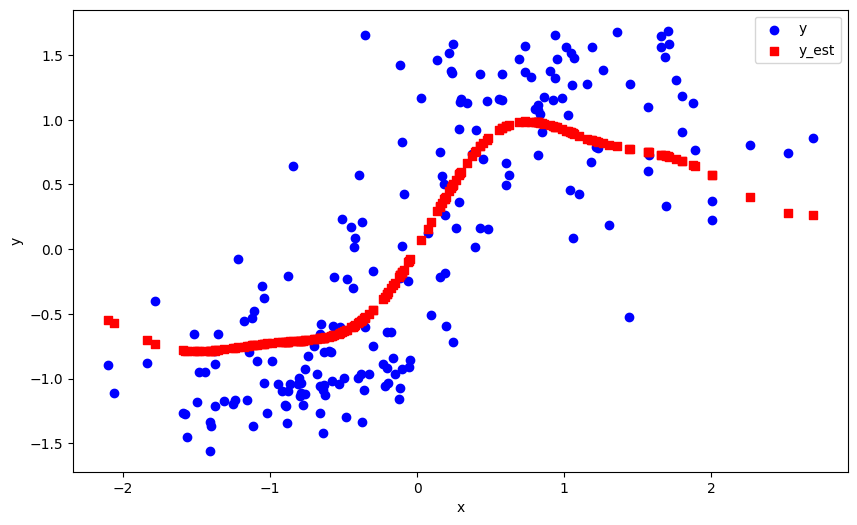

The programm is closed


In [130]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 0].to_numpy(), data.iloc[:, 1].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 0].to_numpy(), y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

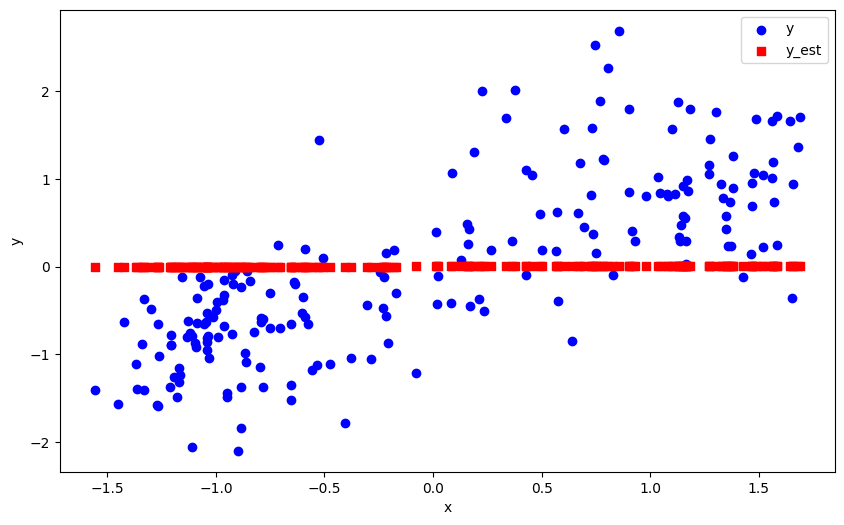

The programm is closed


In [131]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

#### Cov = 0.8

In [132]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.8, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*10 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.90310407 0.73253324]
 [0.73253324 0.93440044]]
covariance:             x          y
x   3.657001  10.870512
y  10.870512  52.242864


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 0.20615329417591247
	 mle: 14.280615279720962
	 mse: 7.507151783168281
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 1.0050, -0.0385],
        [-0.0385,  1.0050]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.0672, -0.0087],
        [-0.0087,  1.0657]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0053,  0.0000],
        [-0.1640, -0.0116]])
Check y:  tensor([-3.0427, -4.6131, -4.7277,  1.9873,  3.7885,  1.2864,  1.6974,  3.7932,
         3.3501,  0.7006,  2.9105, -3.6250,  1.1101, -3.9527,  1.6397,  2.5028,
        -4.0242,  2.5409,  3.6093,  1.6641, -3.3614,  3.7542,  4.0374,  4.0394,
         1.6831,  3.9737,  2.8649, -2.9389,  2.0837, -3.8235, -4.7508, -4.2919,
         1.6124,  2.0658,  3.5377, -4.467

  0%|          | 5/33000.0 [00:04<8:07:19,  1.13it/s]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.020334830830943562
	score(model): 0.04881041499209435
	 mle: 0.2821798483005866
	 mse: 0.7454562773244305
	W1: tensor([[1.0000e-04, 1.4763e+00],
        [9.6106e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.020334830830943562
	W2: tensor([[ 0.8124, -0.6034],
        [-0.6034,  0.6696]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8124, -0.6037],
        [-0.6037,  0.6700]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0010,  0.0000],
        [ 0.0008,  0.0015]])
Check y:  tensor([-0.8319, -1.6726, -1.6261,  0.8645,  1.8784,  2.3257,  2.2631,  1.8769,
         1.9879,  2.4237,  1.1926, -0.9946,  0.5499, -1.0837,  2.2718,  1.0480,
        -1.1031,  1.0615,  1.4494,  0.7488, -2.0377,  1.5096,  1.7386,  1.7328,
         0.7556,  1.8015,  1.1764, -0.8020,  2.2049, -1.0486, -1.3215, -1.1766,
         0.7303,  0.8925,  1.4214, -1.7246, -1.7763, -0.5725, -0.7803,  1.4186,
        -0.4125, -1.2891,  2.2618, -1.4089, 

  0%|          | 6/33000.0 [00:08<14:43:20,  1.61s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.02116579760104431
	score(model): 0.04798441759504317
	 mle: 0.26787616054683294
	 mse: 0.8852998734524389
	W1: tensor([[1.0000e-04, 1.6376e+00],
        [8.8371e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02116579760104431
	W2: tensor([[ 0.8300, -0.7746],
        [-0.7746,  0.9360]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8300, -0.7747],
        [-0.7747,  0.9361]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.6405e-05,  0.0000e+00],
        [ 5.6434e-04,  3.9973e-04]])
Check y:  tensor([-0.9012, -1.8896, -1.8342,  0.9323,  2.0998,  2.6708,  2.5975,  2.0978,
         2.2489,  2.7948,  1.2918, -1.0791,  0.5892, -1.1783,  2.6076,  1.1330,
        -1.2002,  1.1479,  1.5761,  0.8059, -2.3071,  1.6439,  1.9157,  1.9085,
         0.8134,  1.9969,  1.2740, -0.8689,  2.5285, -1.1391, -1.4565, -1.2842,
         0.7857,  0.9629,  1.5448, -1.9506, -2.0106, -0.6216, -0.8454,  1.5417,
        -0.4499, -1.4171,  2.

  0%|          | 7/33000.0 [00:13<21:15:57,  2.32s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.021507118692214
	score(model): 0.047809051725342534
	 mle: 0.2645498621070532
	 mse: 0.9260497771392224
	W1: tensor([[1.0000e-04, 1.6795e+00],
        [8.6851e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021507118692214
	W2: tensor([[ 0.8338, -0.8184],
        [-0.8184,  1.0147]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8338, -0.8184],
        [-0.8184,  1.0147]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0006, 0.0000],
        [0.0010, 0.0006]])
Check y:  tensor([-0.9191, -1.9463, -1.8886,  0.9510,  2.1554,  2.7574,  2.6826,  2.1532,
         2.3156,  2.8856,  1.3190, -1.1002,  0.5996, -1.2017,  2.6930,  1.1566,
        -1.2241,  1.1717,  1.6095,  0.8216, -2.3753,  1.6788,  1.9598,  1.9522,
         0.8292,  2.0455,  1.3008, -0.8863,  2.6118, -1.1615, -1.4902, -1.3106,
         0.8009,  0.9823,  1.5775, -2.0096, -2.0716, -0.6352, -0.8624,  1.5743,
        -0.4607, -1.4489,  2.6810, -1.6049,  0.9217, 

  0%|          | 8/33000.0 [00:17<26:09:18,  2.85s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.02133313281075777
	score(model): 0.047760429763142626
	 mle: 0.2614725903158699
	 mse: 0.9355364437914466
	W1: tensor([[1.0000e-04, 1.6892e+00],
        [8.6008e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02133313281075777
	W2: tensor([[ 0.8346, -0.8285],
        [-0.8285,  1.0335]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8346, -0.8285],
        [-0.8285,  1.0335]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.3130e-05,  0.0000e+00],
        [ 3.7991e-04,  3.7652e-04]])
Check y:  tensor([-0.9237, -1.9598, -1.9016,  0.9555,  2.1688,  2.7775,  2.7022,  2.1666,
         2.3316,  2.9074,  1.3255, -1.1056,  0.6022, -1.2076,  2.7127,  1.1622,
        -1.2301,  1.1775,  1.6174,  0.8254, -2.3914,  1.6870,  1.9704,  1.9627,
         0.8331,  2.0572,  1.3072, -0.8907,  2.6310, -1.1672, -1.4985, -1.3172,
         0.8046,  0.9871,  1.5853, -2.0237, -2.0861, -0.6386, -0.8667,  1.5820,
        -0.4634, -1.4567,  2.

  0%|          | 9/33000.0 [00:21<29:22:43,  3.21s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.021369879114787826
	score(model): 0.04775304299633128
	 mle: 0.2637677791246409
	 mse: 0.9373688057045882
	W1: tensor([[1.0000e-04, 1.6907e+00],
        [8.6002e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021369879114787826
	W2: tensor([[ 0.8348, -0.8301],
        [-0.8301,  1.0364]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.8348, -0.8301],
        [-0.8301,  1.0364]], grad_fn=<MmBackward0>)
Check M:  tensor([[9.3488e-05, 0.0000e+00],
        [4.9867e-04, 4.0602e-04]])
Check y:  tensor([-0.9241, -1.9616, -1.9032,  0.9562,  2.1707,  2.7805,  2.7051,  2.1684,
         2.3339,  2.9108,  1.3264, -1.1060,  0.6026, -1.2080,  2.7155,  1.1630,
        -1.2306,  1.1783,  1.6183,  0.8260, -2.3936,  1.6880,  1.9717,  1.9639,
         0.8336,  2.0587,  1.3081, -0.8910,  2.6338, -1.1676, -1.4992, -1.3178,
         0.8051,  0.9878,  1.5862, -2.0255, -2.0880, -0.6389, -0.8671,  1.5829,
        -0.4637, -1.4574,  2.703

  0%|          | 11/33000.0 [00:25<24:43:55,  2.70s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.0038033549987439574
	score(model): 0.028950111238642686
	 mle: 0.5018823868962428
	 mse: 0.6927238437822074
	W1: tensor([[1.0000e-04, 1.3507e+00],
        [4.5617e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0038033549987439574
	W2: tensor([[ 0.9029, -0.4519],
        [-0.4519,  0.4727]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9030, -0.4520],
        [-0.4520,  0.4728]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0005,  0.0000],
        [ 0.0007,  0.0003]])
Check y:  tensor([-0.7973, -1.4825, -1.4450,  0.8644,  1.6379,  1.9061,  1.8923,  1.6369,
         1.7194,  1.9173,  1.1767, -0.9355,  0.5468, -1.0084,  1.8949,  1.0430,
        -1.0240,  1.0558,  1.3860,  0.7487, -1.7574,  1.4271,  1.5550,  1.5520,
         0.7556,  1.5894,  1.1622, -0.7712,  1.8696, -0.9799, -1.1966, -1.0826,
         0.7300,  0.8922,  1.3656, -1.5238, -1.5641, -0.5647, -0.7522,  1.3635,
        -0.4149, -1.1711,  1.8919, -1.26

  0%|          | 12/33000.0 [00:29<27:58:51,  3.05s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.0040400045469960455
	score(model): 0.028859025945376055
	 mle: 0.49608100683508627
	 mse: 0.7410330899097363
	W1: tensor([[1.0000e-04, 1.4290e+00],
        [4.4434e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0040400045469960455
	W2: tensor([[ 0.9098, -0.5431],
        [-0.5431,  0.5683]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9099, -0.5432],
        [-0.5432,  0.5684]], grad_fn=<MmBackward0>)
Check M:  tensor([[9.5357e-06, 0.0000e+00],
        [4.4579e-04, 1.8635e-04]])
Check y:  tensor([-0.8349, -1.5815, -1.5394,  0.8952,  1.7590,  2.0866,  2.0611,  1.7578,
         1.8560,  2.1236,  1.2193, -0.9835,  0.5684, -1.0624,  2.0650,  1.0797,
        -1.0794,  1.0930,  1.4446,  0.7761, -1.8989,  1.4915,  1.6520,  1.6480,
         0.7831,  1.6974,  1.2040, -0.8070,  2.0300, -1.0316, -1.2671, -1.1431,
         0.7569,  0.9238,  1.4219, -1.6281, -1.6741, -0.5874, -0.7867,  1.4196,
        -0.4293, -1.2393,  

  0%|          | 13/33000.0 [00:33<30:11:29,  3.29s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.004107627323066021
	score(model): 0.028814560623075886
	 mle: 0.49382774510114813
	 mse: 0.7888319201681466
	W1: tensor([[1.0000e-04, 1.4967e+00],
        [4.2777e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004107627323066021
	W2: tensor([[ 0.9138, -0.6184],
        [-0.6184,  0.6612]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9138, -0.6184],
        [-0.6184,  0.6613]], grad_fn=<MmBackward0>)
Check M:  tensor([[8.5363e-06, 0.0000e+00],
        [2.6812e-04, 1.7940e-04]])
Check y:  tensor([-0.8655, -1.6681, -1.6225,  0.9215,  1.8562,  2.2447,  2.2064,  1.8548,
         1.9646,  2.3043,  1.2578, -1.0229,  0.5856, -1.1071,  2.2121,  1.1123,
        -1.1253,  1.1261,  1.4979,  0.7989, -2.0173,  1.5494,  1.7332,  1.7286,
         0.8061,  1.7860,  1.2418, -0.8362,  2.1653, -1.0742, -1.3278, -1.1938,
         0.7791,  0.9510,  1.4732, -1.7188, -1.7690, -0.6061, -0.8147,  1.4707,
        -0.4416, -1.2978,  2.

  0%|          | 14/33000.0 [00:38<31:57:40,  3.49s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.004136494641268529
	score(model): 0.02879374492795089
	 mle: 0.4928279421511066
	 mse: 0.8159140161321976
	W1: tensor([[1.0000e-04, 1.5321e+00],
        [4.1934e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004136494641268529
	W2: tensor([[ 0.9158, -0.6575],
        [-0.6575,  0.7141]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9158, -0.6575],
        [-0.6575,  0.7141]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.0421e-05, 0.0000e+00],
        [1.9439e-04, 1.7784e-04]])
Check y:  tensor([-0.8809, -1.7132, -1.6658,  0.9352,  1.9061,  2.3267,  2.2821,  1.9046,
         2.0206,  2.3969,  1.2783, -1.0428,  0.5942, -1.1298,  2.2886,  1.1295,
        -1.1486,  1.1436,  1.5261,  0.8106, -2.0780,  1.5800,  1.7752,  1.7702,
         0.8179,  1.8316,  1.2619, -0.8508,  2.2358, -1.0957, -1.3592, -1.2196,
         0.7905,  0.9651,  1.5004, -1.7660, -1.8182, -0.6155, -0.8288,  1.4978,
        -0.4480, -1.3279,  2.28

  0%|          | 15/33000.0 [00:42<33:14:40,  3.63s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.004141757272078883
	score(model): 0.02878802620310801
	 mle: 0.49262532151112715
	 mse: 0.822790374628988
	W1: tensor([[1.0000e-04, 1.5409e+00],
        [4.1724e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004141757272078883
	W2: tensor([[ 0.9163, -0.6671],
        [-0.6671,  0.7275]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9163, -0.6671],
        [-0.6671,  0.7275]], grad_fn=<MmBackward0>)
Check M:  tensor([[6.9382e-06, 0.0000e+00],
        [1.7634e-04, 1.7658e-04]])
Check y:  tensor([-0.8845, -1.7242, -1.6764,  0.9386,  1.9182,  2.3467,  2.3008,  1.9166,
         2.0342,  2.4191,  1.2835, -1.0474,  0.5963, -1.1351,  2.3074,  1.1338,
        -1.1541,  1.1480,  1.5333,  0.8135, -2.0927,  1.5877,  1.7855,  1.7804,
         0.8209,  1.8426,  1.2670, -0.8542,  2.2532, -1.1008, -1.3668, -1.2258,
         0.7933,  0.9687,  1.5073, -1.7775, -1.8302, -0.6177, -0.8321,  1.5047,
        -0.4495, -1.3352,  2.29

  0%|          | 17/33000.0 [00:45<26:40:34,  2.91s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0007304583874490345
	score(model): 0.015528526648755515
	 mle: 0.5915424566148568
	 mse: 0.6178011697884881
	W1: tensor([[1.0000e-04, 1.1254e+00],
        [2.4010e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007304583874490345
	W2: tensor([[ 0.9556, -0.1582],
        [-0.1582,  0.2841]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9556, -0.1583],
        [-0.1583,  0.2841]], grad_fn=<MmBackward0>)
Check M:  tensor([[0.0003, 0.0000],
        [0.0007, 0.0002]])
Check y:  tensor([-0.6921, -1.1232, -1.1008,  0.7774,  1.2571,  1.2627,  1.2945,  1.2569,
         1.2812,  1.1947,  1.0400, -0.7998,  0.4960, -0.8526,  1.2910,  0.9304,
        -0.8634,  0.9411,  1.1908,  0.6759, -1.2915,  1.2137,  1.2470,  1.2469,
         0.6819,  1.2491,  1.0284, -0.6710,  1.3101, -0.8324, -0.9678, -0.9021,
         0.6593,  0.8015,  1.1782, -1.1484, -1.1734, -0.4976, -0.6554,  1.1769,
        -0.3673, -0.9541,  1.2950, -1.0035,

  0%|          | 18/33000.0 [00:49<28:59:56,  3.17s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0008084353131027622
	score(model): 0.015481674193320452
	 mle: 0.5866736240374026
	 mse: 0.6369580811001901
	W1: tensor([[1.0000e-04, 1.1982e+00],
        [2.3725e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008084353131027622
	W2: tensor([[ 0.9510, -0.2496],
        [-0.2496,  0.3216]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9510, -0.2497],
        [-0.2497,  0.3216]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.6742e-07,  0.0000e+00],
        [ 2.2224e-04,  9.0076e-05]])
Check y:  tensor([-0.7340, -1.2198, -1.1924,  0.8135,  1.3708,  1.4544,  1.4721,  1.3703,
         1.4121,  1.4118,  1.0889, -0.8509,  0.5203, -0.9085,  1.4705,  0.9734,
        -0.9204,  0.9847,  1.2534,  0.7076, -1.4351,  1.2807,  1.3392,  1.3383,
         0.7139,  1.3507,  1.0766, -0.7112,  1.4763, -0.8865, -1.0364, -0.9631,
         0.6904,  0.8386,  1.2390, -1.2510, -1.2822, -0.5251, -0.6944,  1.2375,
        -0.3863, -1.021

  0%|          | 19/33000.0 [00:54<31:15:33,  3.41s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0008501674240640744
	score(model): 0.01545140535572904
	 mle: 0.5837863939201964
	 mse: 0.6678210371775944
	W1: tensor([[1.0000e-04, 1.2761e+00],
        [2.2844e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008501674240640744
	W2: tensor([[ 0.9530, -0.3475],
        [-0.3475,  0.3815]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9530, -0.3476],
        [-0.3476,  0.3816]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.2498e-06, 0.0000e+00],
        [1.4239e-04, 8.7162e-05]])
Check y:  tensor([-0.7732, -1.3323, -1.3002,  0.8470,  1.4968,  1.6557,  1.6583,  1.4961,
         1.5534,  1.6410,  1.1381, -0.9012,  0.5421, -0.9656,  1.6586,  1.0150,
        -0.9791,  1.0269,  1.3214,  0.7367, -1.5873,  1.3546,  1.4437,  1.4419,
         0.7432,  1.4651,  1.1248, -0.7485,  1.6505, -0.9408, -1.1144, -1.0279,
         0.7187,  0.8733,  1.3044, -1.3687, -1.4052, -0.5492, -0.7303,  1.3026,
        -0.4023, -1.0960,  1

  0%|          | 20/33000.0 [00:58<32:41:57,  3.57s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0008763409308930603
	score(model): 0.015433174769903656
	 mle: 0.5820115591394448
	 mse: 0.6980402692365375
	W1: tensor([[1.0000e-04, 1.3374e+00],
        [2.2130e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008763409308930603
	W2: tensor([[ 0.9546, -0.4221],
        [-0.4221,  0.4406]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9546, -0.4222],
        [-0.4222,  0.4407]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.9583e-06, 0.0000e+00],
        [8.8786e-05, 8.6267e-05]])
Check y:  tensor([-0.8023, -1.4188, -1.3833,  0.8726,  1.5917,  1.8101,  1.8011,  1.5908,
         1.6600,  1.8158,  1.1763, -0.9386,  0.5581, -1.0083,  1.8029,  1.0471,
        -1.0229,  1.0595,  1.3742,  0.7586, -1.7021,  1.4119,  1.5231,  1.5206,
         0.7653,  1.5515,  1.1623, -0.7763,  1.7838, -0.9814, -1.1737, -1.0765,
         0.7401,  0.8998,  1.3553, -1.4590, -1.4994, -0.5673, -0.7571,  1.3534,
        -0.4146, -1.1528,  

  0%|          | 21/33000.0 [01:02<33:43:19,  3.68s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0008869550212512456
	score(model): 0.015424817520853297
	 mle: 0.5812671179422133
	 mse: 0.7135186988932967
	W1: tensor([[1.0000e-04, 1.3654e+00],
        [2.1806e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008869550212512456
	W2: tensor([[ 0.9554, -0.4558],
        [-0.4558,  0.4710]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9554, -0.4558],
        [-0.4558,  0.4710]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.3422e-06, 0.0000e+00],
        [6.9886e-05, 8.6224e-05]])
Check y:  tensor([-0.8153, -1.4580, -1.4210,  0.8843,  1.6341,  1.8791,  1.8653,  1.6332,
         1.7079,  1.8930,  1.1939, -0.9552,  0.5652, -1.0271,  1.8678,  1.0619,
        -1.0423,  1.0746,  1.3983,  0.7685, -1.7534,  1.4379,  1.5586,  1.5558,
         0.7754,  1.5900,  1.1796, -0.7887,  1.8441, -0.9993, -1.2003, -1.0981,
         0.7497,  0.9119,  1.3785, -1.5000, -1.5420, -0.5756, -0.7691,  1.3765,
        -0.4204, -1.1781,  

  0%|          | 23/33000.0 [01:06<26:56:08,  2.94s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0001505901354644538
	score(model): 0.007985824694895881
	 mle: 0.6265035908411707
	 mse: 0.6199349142389571
	W1: tensor([[1.0000e-04, 9.8311e-01],
        [1.2481e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001505901354644538
	W2: tensor([[0.9716, 0.0750],
        [0.0750, 0.2635]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9717, 0.0749],
        [0.0749, 0.2636]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.7183e-05,  0.0000e+00],
        [ 1.4384e-04, -2.0195e-04]])
Check y:  tensor([-0.6184, -0.8266, -0.8172,  0.7069,  0.9595,  0.7793,  0.8405,  0.9598,
         0.9414,  0.6654,  0.9278, -0.7033,  0.4556, -0.7402,  0.8329,  0.8384,
        -0.7471,  0.8473,  1.0313,  0.6172, -0.9230,  1.0399,  1.0024,  1.0044,
         0.6226,  0.9811,  0.9186, -0.6009,  0.8822, -0.7266, -0.7921, -0.7692,
         0.6025,  0.7279,  1.0248, -0.8386, -0.8516, -0.4508, -0.5878,  1.0241,
        -0.3341, -0.7893,  0.8

  0%|          | 24/33000.0 [01:10<29:10:26,  3.18s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00015828359627906297
	score(model): 0.007967338728584263
	 mle: 0.62451111030371
	 mse: 0.617214584008541
	W1: tensor([[1.0000e-04, 1.0370e+00],
        [1.2131e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00015828359627906297
	W2: tensor([[ 0.9753, -0.0060],
        [-0.0060,  0.2596]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9753, -0.0061],
        [-0.0061,  0.2596]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.5289e-06, 0.0000e+00],
        [8.1487e-05, 4.1487e-05]])
Check y:  tensor([-0.6489, -0.9294, -0.9136,  0.7408,  1.0597,  0.9510,  1.0033,  1.0598,
         1.0584,  0.8462,  0.9758, -0.7401,  0.4767, -0.7809,  0.9971,  0.8801,
        -0.7887,  0.8896,  1.0920,  0.6464, -1.0632,  1.1041,  1.0850,  1.0864,
         0.6520,  1.0709,  0.9659, -0.6303,  1.0358, -0.7657, -0.8485, -0.8147,
         0.6309,  0.7630,  1.0840, -0.9482, -0.9677, -0.4720, -0.6164,  1.0832,
        -0.3496, -0.8427,  

  0%|          | 25/33000.0 [01:14<31:01:32,  3.39s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00017235986750060994
	score(model): 0.00795646480806285
	 mle: 0.6225046589788006
	 mse: 0.6213728936051335
	W1: tensor([[1.0000e-04, 1.0940e+00],
        [1.1999e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00017235986750060994
	W2: tensor([[ 0.9753, -0.0913],
        [-0.0913,  0.2675]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9753, -0.0914],
        [-0.0914,  0.2676]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.4164e-07, 0.0000e+00],
        [5.8889e-05, 4.2819e-05]])
Check y:  tensor([-0.6828, -1.0268, -1.0068,  0.7699,  1.1693,  1.1228,  1.1631,  1.1693,
         1.1818,  1.0412,  1.0180, -0.7834,  0.4958, -0.8300,  1.1584,  0.9158,
        -0.8392,  0.9260,  1.1499,  0.6716, -1.1951,  1.1672,  1.1751,  1.1756,
         0.6775,  1.1699,  1.0073, -0.6625,  1.1862, -0.8125, -0.9155, -0.8704,
         0.6556,  0.7931,  1.1398, -1.0502, -1.0744, -0.4928, -0.6475,  1.1387,
        -0.3634, -0.9071,

  0%|          | 26/33000.0 [01:18<32:56:13,  3.60s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00020086984503914218
	score(model): 0.007960447179147252
	 mle: 0.6206075146308765
	 mse: 0.6324059913302077
	W1: tensor([[1.0000e-04, 1.1516e+00],
        [1.2306e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00020086984503914218
	W2: tensor([[ 0.9757, -0.1731],
        [-0.1731,  0.2892]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9757, -0.1732],
        [-0.1732,  0.2892]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.5271e-05, 0.0000e+00],
        [1.3698e-04, 4.4548e-05]])
Check y:  tensor([-0.7133, -1.1225, -1.0988,  0.7964,  1.2738,  1.2912,  1.3187,  1.2736,
         1.2992,  1.2330,  1.0579, -0.8232,  0.5126, -0.8756,  1.3156,  0.9492,
        -0.8862,  0.9599,  1.2060,  0.6944, -1.3210,  1.2283,  1.2618,  1.2616,
         0.7005,  1.2647,  1.0464, -0.6915,  1.3316, -0.8558, -0.9803, -0.9229,
         0.6777,  0.8206,  1.1937, -1.1502, -1.1784, -0.5115, -0.6754,  1.1924,
        -0.3758, -0.9690

  0%|          | 27/33000.0 [01:22<33:57:28,  3.71s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00022740410704380487
	score(model): 0.007968253459003552
	 mle: 0.6208054830580798
	 mse: 0.645510204876307
	W1: tensor([[1.0000e-04, 1.1971e+00],
        [1.2596e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00022740410704380487
	W2: tensor([[ 0.9765, -0.2340],
        [-0.2340,  0.3141]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 0.9765, -0.2340],
        [-0.2340,  0.3141]], grad_fn=<MmBackward0>)
Check M:  tensor([[4.9715e-05, 0.0000e+00],
        [1.2867e-04, 4.7225e-05]])
Check y:  tensor([-0.7365, -1.1926, -1.1661,  0.8175,  1.3503,  1.4145,  1.4335,  1.3499,
         1.3855,  1.3706,  1.0894, -0.8528,  0.5257, -0.9093,  1.4316,  0.9758,
        -0.9207,  0.9869,  1.2491,  0.7124, -1.4127,  1.2749,  1.3256,  1.3249,
         0.7187,  1.3342,  1.0773, -0.7137,  1.4394, -0.8878, -1.0274, -0.9613,
         0.6953,  0.8425,  1.2353, -1.2233, -1.2546, -0.5261, -0.6968,  1.2338,
        -0.3860, -1.0140,

  0%|          | 29/33000.0 [01:26<26:56:45,  2.94s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 1.277113151650538e-05
	score(model): 0.004203551050328326
	 mle: 0.6704177044257975
	 mse: 0.7881877518765993
	W1: tensor([[1.0000e-04, 7.5694e-01],
        [4.7175e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.277113151650538e-05
	W2: tensor([[0.9985, 0.5719],
        [0.5719, 0.5968]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9985, 0.5716],
        [0.5716, 0.5966]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.0060e-05,  0.0000e+00],
        [ 2.7896e-04,  1.1269e-04]])
Check y:  tensor([-0.3706, -0.2829, -0.3078,  0.4748,  0.4183, -0.2944, -0.1867,  0.4201,
         0.2710, -0.4183,  0.6165, -0.4231,  0.3132, -0.4439, -0.2022,  0.5596,
        -0.4474,  0.5654,  0.6731,  0.4170, -0.1136,  0.6717,  0.5686,  0.5735,
         0.4205,  0.5078,  0.6108, -0.3595, -0.0818, -0.4365, -0.4472, -0.4564,
         0.4075,  0.4884,  0.6712, -0.2560, -0.2301, -0.2640, -0.3512,  0.6710,
        -0.1897, -0.4531, -0.

  0%|          | 30/33000.0 [01:30<29:07:16,  3.18s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 1.9995306835874397e-05
	score(model): 0.0040578586354013116
	 mle: 0.6458800798662627
	 mse: 0.6945754650551885
	W1: tensor([[1.0000e-04, 8.3222e-01],
        [5.3704e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.9995306835874397e-05
	W2: tensor([[0.9920, 0.3740],
        [0.3740, 0.4026]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9919, 0.3738],
        [0.3738, 0.4024]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.7756e-07, 0.0000e+00],
        [9.3674e-05, 2.7296e-05]])
Check y:  tensor([-4.9159e-01, -4.8561e-01, -4.9415e-01,  5.9438e-01,  6.0712e-01,
         1.6131e-01,  2.6035e-01,  6.0826e-01,  5.2783e-01, -1.0623e-02,
         7.6522e-01, -5.5282e-01,  3.8921e-01, -5.7554e-01,  2.4753e-01,
         6.9832e-01, -5.7920e-01,  7.0524e-01,  8.2403e-01,  5.2178e-01,
        -4.5448e-01,  8.2013e-01,  7.1533e-01,  7.1956e-01,  5.2616e-01,
         6.6695e-01,  7.5862e-01, -4.7822e-01,  3.3769e-01, -5.67

  0%|          | 31/33000.0 [01:34<30:56:39,  3.38s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 2.583430346371109e-05
	score(model): 0.004038155226522645
	 mle: 0.6417898110591571
	 mse: 0.6590531034735299
	W1: tensor([[1.0000e-04, 8.9258e-01],
        [5.6922e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.583430346371109e-05
	W2: tensor([[0.9888, 0.2628],
        [0.2628, 0.3304]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9888, 0.2628],
        [0.2628, 0.3304]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.3583e-07, 0.0000e+00],
        [2.0226e-05, 2.1275e-05]])
Check y:  tensor([-0.5458, -0.6167, -0.6150,  0.6487,  0.7192,  0.4234,  0.5039,  0.7200,
         0.6672,  0.2615,  0.8428, -0.6105,  0.4184, -0.6348,  0.4941,  0.7664,
        -0.6388,  0.7742,  0.9136,  0.5670, -0.6494,  0.9112,  0.8114,  0.8153,
         0.5719,  0.7678,  0.8352, -0.5316,  0.5593, -0.6263, -0.6461, -0.6492,
         0.5535,  0.6678,  0.9117, -0.6203, -0.6248, -0.4051, -0.5209,  0.9114,
        -0.3028, -0.6494,  0.5054

  0%|          | 32/33000.0 [01:37<32:20:25,  3.53s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 2.9005898219946458e-05
	score(model): 0.004034058565128873
	 mle: 0.6406207628751424
	 mse: 0.6445436336365599
	W1: tensor([[1.0000e-04, 9.2479e-01],
        [5.8217e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.9005898219946458e-05
	W2: tensor([[0.9883, 0.2017],
        [0.2017, 0.3015]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9883, 0.2017],
        [0.2017, 0.3015]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.9978e-07, 0.0000e+00],
        [8.8154e-06, 2.1157e-05]])
Check y:  tensor([-0.5723, -0.6868, -0.6811,  0.6727,  0.7944,  0.5468,  0.6202,  0.7951,
         0.7545,  0.3973,  0.8761, -0.6422,  0.4337, -0.6694,  0.6113,  0.7955,
        -0.6741,  0.8037,  0.9558,  0.5878, -0.7488,  0.9562,  0.8722,  0.8756,
         0.5929,  0.8348,  0.8680, -0.5571,  0.6694, -0.6598, -0.6902, -0.6871,
         0.5738,  0.6925,  0.9528, -0.6948, -0.7038, -0.4234, -0.5458,  0.9524,
        -0.3161, -0.6919,  0.62

  0%|          | 33/33000.0 [01:42<33:49:32,  3.69s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 3.251795804746904e-05
	score(model): 0.004030040900510756
	 mle: 0.6394086430802199
	 mse: 0.6327676133790037
	W1: tensor([[1.0000e-04, 9.6074e-01],
        [5.9336e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.251795804746904e-05
	W2: tensor([[0.9880, 0.1337],
        [0.1337, 0.2782]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9880, 0.1336],
        [0.1336, 0.2782]], grad_fn=<MmBackward0>)
Check M:  tensor([[1.9621e-07, 0.0000e+00],
        [7.6049e-06, 2.1137e-05]])
Check y:  tensor([-0.6000, -0.7635, -0.7543,  0.6968,  0.8832,  0.6766,  0.7434,  0.8837,
         0.8557,  0.5430,  0.9092, -0.6774,  0.4503, -0.7090,  0.7353,  0.8242,
        -0.7146,  0.8329,  1.0001,  0.6091, -0.8543,  1.0043,  0.9428,  0.9455,
         0.6144,  0.9136,  0.9006, -0.5836,  0.7879, -0.6976, -0.7428, -0.7315,
         0.5947,  0.7173,  0.9954, -0.7755, -0.7884, -0.4405, -0.5713,  0.9949,
        -0.3273, -0.7427,  0.7446

  0%|          | 35/33000.0 [01:46<26:59:55,  2.95s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 1.8281944206921947e-06
	score(model): 0.0020766856468702848
	 mle: 0.6639986454638762
	 mse: 0.8064928153333693
	W1: tensor([[1.0000e-04, 7.6312e-01],
        [1.7621e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.8281944206921947e-06
	W2: tensor([[1.0084, 0.6030],
        [0.6030, 0.6221]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.0084, 0.6028],
        [0.6028, 0.6219]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.4042e-05,  0.0000e+00],
        [ 9.5871e-05, -5.0700e-05]])
Check y:  tensor([-0.3780, -0.2297, -0.2557,  0.4889,  0.3598, -0.3129, -0.2020,  0.3617,
         0.2171, -0.4733,  0.6249, -0.4262,  0.3248, -0.4427, -0.2173,  0.5720,
        -0.4450,  0.5775,  0.6649,  0.4308, -0.0760,  0.6571,  0.5220,  0.5277,
         0.4343,  0.4538,  0.6197, -0.3673, -0.1023, -0.4372, -0.4244, -0.4487,
         0.4212,  0.5024,  0.6657, -0.2025, -0.1773, -0.2722, -0.3592,  0.6657,
        -0.1963, -0.4341,

  0%|          | 36/33000.0 [01:50<29:14:02,  3.19s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 4.06238477897599e-06
	score(model): 0.002030781491800573
	 mle: 0.6483774233867052
	 mse: 0.7262643984751445
	W1: tensor([[1.0000e-04, 8.2371e-01],
        [2.4409e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.06238477897599e-06
	W2: tensor([[0.9964, 0.4444],
        [0.4444, 0.4588]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9964, 0.4443],
        [0.4443, 0.4587]], grad_fn=<MmBackward0>)
Check M:  tensor([[3.0813e-08, 0.0000e+00],
        [1.7030e-05, 1.1194e-05]])
Check y:  tensor([-0.4733, -0.4063, -0.4152,  0.5816,  0.4956,  0.0674,  0.1646,  0.4969,
         0.4073, -0.1244,  0.7473, -0.5219,  0.3766, -0.5364,  0.1524,  0.6838,
        -0.5382,  0.6905,  0.7898,  0.5093, -0.3654,  0.7789,  0.6313,  0.6369,
         0.5137,  0.5692,  0.7412, -0.4619,  0.2353, -0.5320, -0.5138, -0.5394,
         0.4973,  0.5984,  0.7916, -0.3982, -0.3917, -0.3557, -0.4532,  0.7916,
        -0.2670, -0.5228,  0.1664,

  0%|          | 37/33000.0 [01:54<31:10:34,  3.40s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 4.694710421149003e-06
	score(model): 0.0020270826647248523
	 mle: 0.646975254229557
	 mse: 0.7053452368509491
	W1: tensor([[1.0000e-04, 8.4757e-01],
        [2.5509e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.694710421149003e-06
	W2: tensor([[0.9950, 0.3942],
        [0.3942, 0.4164]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9950, 0.3942],
        [0.3942, 0.4164]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.0381e-07,  0.0000e+00],
        [ 2.7353e-06,  1.0540e-05]])
Check y:  tensor([-0.4991, -0.4634, -0.4672,  0.6062,  0.5542,  0.1661,  0.2612,  0.5554,
         0.4796, -0.0230,  0.7786, -0.5499,  0.3924, -0.5651,  0.2494,  0.7126,
        -0.5669,  0.7195,  0.8246,  0.5309, -0.4564,  0.8146,  0.6761,  0.6812,
         0.5355,  0.6193,  0.7722, -0.4872,  0.3290, -0.5604, -0.5443, -0.5684,
         0.5184,  0.6237,  0.8260, -0.4610, -0.4599, -0.3760, -0.4781,  0.8260,
        -0.2828, -0.5527,  0

  0%|          | 38/33000.0 [01:58<32:38:00,  3.56s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 7.650717072697734e-06
	score(model): 0.0020269536779613847
	 mle: 0.6461695834415817
	 mse: 0.687452034032371
	W1: tensor([[1.0000e-04, 8.6608e-01],
        [3.1895e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.650717072697734e-06
	W2: tensor([[0.9944, 0.3469],
        [0.3469, 0.3811]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9945, 0.3468],
        [0.3468, 0.3810]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.0798e-06,  0.0000e+00],
        [ 1.5584e-05,  9.9057e-06]])
Check y:  tensor([-0.5204, -0.5159, -0.5168,  0.6249,  0.6201,  0.2458,  0.3417,  0.6211,
         0.5567,  0.0625,  0.8009, -0.5764,  0.4068, -0.5942,  0.3297,  0.7333,
        -0.5966,  0.7404,  0.8523,  0.5482, -0.5337,  0.8446,  0.7243,  0.7288,
         0.5528,  0.6754,  0.7944, -0.5076,  0.4110, -0.5885, -0.5802, -0.6003,
         0.5354,  0.6427,  0.8527, -0.5169, -0.5194, -0.3890, -0.4978,  0.8527,
        -0.2909, -0.5877,  0

  0%|          | 39/33000.0 [02:02<33:42:03,  3.68s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 9.359199525244118e-06
	score(model): 0.0020270465861909203
	 mle: 0.6454190268669251
	 mse: 0.6672183513431231
	W1: tensor([[1.0000e-04, 8.9248e-01],
        [3.4242e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.359199525244118e-06
	W2: tensor([[0.9944, 0.2832],
        [0.2832, 0.3406]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9944, 0.2831],
        [0.2831, 0.3406]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.3229e-06,  0.0000e+00],
        [ 6.0300e-06,  1.0060e-05]])
Check y:  tensor([-0.5468, -0.5873, -0.5849,  0.6478,  0.7018,  0.3651,  0.4561,  0.7026,
         0.6509,  0.1946,  0.8321, -0.6092,  0.4223, -0.6308,  0.4447,  0.7606,
        -0.6341,  0.7680,  0.8931,  0.5683, -0.6318,  0.8887,  0.7885,  0.7923,
         0.5731,  0.7474,  0.8251, -0.5328,  0.5217, -0.6236, -0.6284, -0.6411,
         0.5551,  0.6662,  0.8922, -0.5921, -0.5984, -0.4059, -0.5222,  0.8920,
        -0.3024, -0.6341,  

  0%|          | 40/33000.0 [02:06<34:55:37,  3.81s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 7.908192887960932e-06
	score(model): 0.002022885801745355
	 mle: 0.6449128525688759
	 mse: 0.6500389191510783
	W1: tensor([[1.0000e-04, 9.2342e-01],
        [3.0415e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.908192887960932e-06
	W2: tensor([[0.9941, 0.2154],
        [0.2154, 0.3065]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9941, 0.2153],
        [0.2153, 0.3065]], grad_fn=<MmBackward0>)
Check M:  tensor([[6.5313e-07, 0.0000e+00],
        [5.2318e-06, 1.0176e-05]])
Check y:  tensor([-0.5731, -0.6670, -0.6612,  0.6726,  0.7873,  0.4989,  0.5823,  0.7879,
         0.7484,  0.3430,  0.8679, -0.6424,  0.4380, -0.6684,  0.5719,  0.7912,
        -0.6727,  0.7991,  0.9406,  0.5897, -0.7354,  0.9398,  0.8587,  0.8618,
         0.5947,  0.8243,  0.8603, -0.5579,  0.6416, -0.6594, -0.6809, -0.6839,
         0.5760,  0.6918,  0.9382, -0.6754, -0.6851, -0.4228, -0.5465,  0.9378,
        -0.3141, -0.6842,  0.583

  0%|          | 41/33000.0 [02:10<35:19:42,  3.86s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 1.0064744890999157e-05
	score(model): 0.0020230147204851586
	 mle: 0.6445371238553868
	 mse: 0.6399759363889136
	W1: tensor([[1.0000e-04, 9.4902e-01],
        [3.3396e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.0064744890999157e-05
	W2: tensor([[0.9940, 0.1617],
        [0.1617, 0.2861]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9940, 0.1616],
        [0.1616, 0.2861]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.5225e-06,  0.0000e+00],
        [-6.9520e-06,  9.9002e-06]])
Check y:  tensor([-0.5926, -0.7275, -0.7192,  0.6898,  0.8538,  0.6060,  0.6826,  0.8543,
         0.8244,  0.4625,  0.8941, -0.6670,  0.4482, -0.6963,  0.6731,  0.8131,
        -0.7013,  0.8214,  0.9766,  0.6042, -0.8142,  0.9789,  0.9131,  0.9158,
         0.6093,  0.8840,  0.8859, -0.5766,  0.7362, -0.6859, -0.7203, -0.7157,
         0.5901,  0.7097,  0.9729, -0.7386, -0.7510, -0.4357, -0.5646,  0.9724,
        -0.3234, -0.7217,

  0%|          | 42/33000.0 [02:14<29:15:08,  3.20s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 9.68117364097071e-06
	score(model): 0.002024244979387499
	 mle: 0.6445031918917548
	 mse: 0.6356555322224521
	W1: tensor([[1.0000e-04, 9.6450e-01],
        [3.2226e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.68117364097071e-06
	W2: tensor([[0.9939, 0.1323],
        [0.1323, 0.2774]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.9939, 0.1323],
        [0.1323, 0.2774]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.8259e-06,  0.0000e+00],
        [-1.3605e-06,  1.0585e-05]])
Check y:  tensor([-0.6040, -0.7629, -0.7533,  0.7002,  0.8908,  0.6634,  0.7363,  0.8912,
         0.8661,  0.5271,  0.9095, -0.6816,  0.4547, -0.7130,  0.7273,  0.8261,
        -0.7185,  0.8346,  0.9974,  0.6131, -0.8587,  1.0013,  0.9439,  0.9463,
         0.6183,  0.9176,  0.9010, -0.5874,  0.7870, -0.7018, -0.7441, -0.7348,
         0.5987,  0.7205,  0.9930, -0.7754, -0.7890, -0.4429, -0.5750,  0.9925,
        -0.3283, -0.7444,  0.7

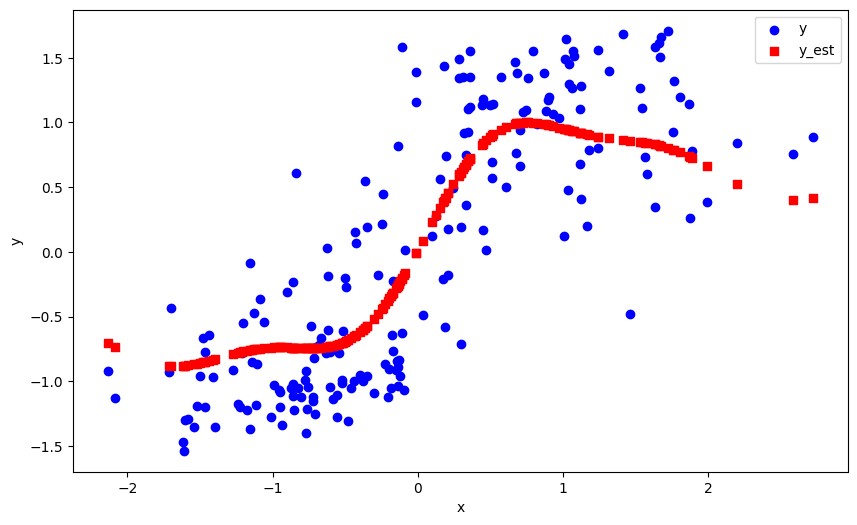

The programm is closed


In [133]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 0].to_numpy(), data.iloc[:, 1].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 0].to_numpy(), y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

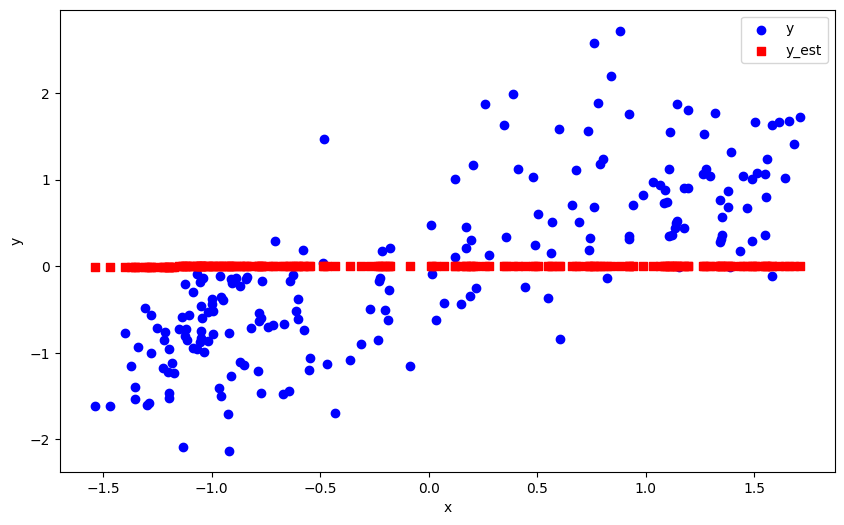

The programm is closed


In [134]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Quadratic example: Large scale

#### Cov = 0

In [2]:
np.random.seed(40)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=4, size=200)
true_x = x + epsilon1
y = np.array([x**2 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[1.09558233 0.10671139]
 [0.10671139 0.8840395 ]]
covariance:            x          y
x  2.457498   5.656958
y  5.656958  24.967244


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03


  0%|          | 1/33000.0 [00:00<3:43:59,  2.46it/s]


 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 3.036516177538389
	 mle: 7.564184219917937
	 mse: 20.90696666039113
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 2.4575,  0.0324],
        [ 0.0324, 24.9672]])
	structure loss: 0.0
	Sigma: tensor([[ 2.4575,  0.0324],
        [ 0.0324, 24.9672]])
Check M:  None
Check y:  tensor([ 2.2651,  4.1869,  0.7749,  2.2305,  2.5979,  3.7712,  2.3011,  2.8899,
         0.1635,  0.4170,  1.9544,  3.1116,  3.5731,  0.0596,  1.2349,  3.1533,
         0.0968,  0.3569,  0.1323,  0.1687,  2.3094,  0.3879,  2.8073,  2.6612,
         3.8556,  0.1412,  3.9051,  2.3058,  0.1472,  0.1262,  2.7137, -0.0560,
         4.1044,  2.5224,  0.4204,  0.1241,  4.1851,  1.1258,  3.6484,  1.8122,
         1.2421,  1.4213,  3.7992,  3.2576,  0.1575,  1.3613,  1.4172, -0.0351,
         1.7708,  4.0084,  3.8726,  1.9399,  1.7577,  

  0%|          | 3/33000.0 [00:04<15:15:07,  1.66s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.01171091636962085
	score(model): 2.6402790178564417
	 mle: 5.3182019630632595
	 mse: 7.361521470177957
	W1: tensor([[1.0000e-04, 1.5546e+00],
        [6.9407e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.01171091636962085
	W2: tensor([[ 2.4575,  0.0324],
        [ 0.0324, 24.9672]])
	structure loss: 0.0
	Sigma: tensor([[ 2.4575,  0.0324],
        [ 0.0324, 24.9672]])
Check M:  None
Check y:  tensor([ 4.8362,  7.5815,  3.6818,  9.1345,  5.1669,  6.6742,  4.8683,  5.5170,
         2.8022,  3.2302,  4.5901,  8.7844,  6.4129, 10.2544,  4.0955,  5.8608,
         2.6108,  3.1402,  1.2394,  2.8134,  4.8758,  3.1872,  8.9223,  5.2386,
         6.7905,  1.7772,  8.2205,  4.8726, 10.2086, 10.2225,  8.9603, 10.2035,
         7.9300,  9.0330,  3.2351,  1.2151,  7.5265,  4.0102,  6.5113,  4.4909,
         4.1009,  4.2295,  6.7123,  5.9989,  1.4697,  9.4307,  4.2266,  0.9956,
         4.4630,  7.0240,  8.2555,  4

  0%|          | 4/33000.0 [00:08<21:57:28,  2.40s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.011535943442525065
	score(model): 2.6401130895792475
	 mle: 5.318166759178542
	 mse: 7.294951527624345
	W1: tensor([[1.0000e-04, 1.5956e+00],
        [6.7118e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.011535943442525065
	W2: tensor([[ 2.4575,  0.0324],
        [ 0.0324, 24.9672]])
	structure loss: 0.0
	Sigma: tensor([[ 2.4575,  0.0324],
        [ 0.0324, 24.9672]])
Check M:  None
Check y:  tensor([ 4.7990,  7.6166,  3.6134,  9.2119,  5.1382,  6.6920,  4.8319,  5.4980,
         2.7261,  3.1576,  4.5462,  8.8499,  6.4230, 10.3645,  4.0359,  5.8527,
         2.5330,  3.0671,  1.1685,  2.7375,  4.8396,  3.1144,  8.9925,  5.2117,
         6.8112,  1.7155,  8.2689,  4.8363, 10.3213, 10.3349,  9.0318, 10.3012,
         7.9715,  9.1069,  3.1626,  1.1416,  7.5607,  3.9483,  6.5244,  4.4440,
         4.0415,  4.1739,  6.7310,  5.9954,  1.4095,  9.5189,  4.1710,  0.9025,
         4.4152,  7.0498,  8.3048,  

  0%|          | 5/33000.0 [00:12<26:13:51,  2.86s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.011528967198638052
	score(model): 0.8483037181605593
	 mle: 5.299819476260945
	 mse: 7.2929088983940185
	W1: tensor([[1.0000e-04, 1.5968e+00],
        [6.7047e-02, 1.0000e-04]])
	cycle loss: 0.011528967198638052
	W2: tensor([[1.7085, 0.0544],
        [0.0544, 7.0689]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7079, 0.0545],
        [0.0545, 7.0573]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.2480e-03,  0.0000e+00],
        [-1.1151e-04,  1.2491e+00]])
Check y:  tensor([ 4.7981,  7.6178,  3.6118,  9.2147,  5.1376,  6.6926,  4.8311,  5.4976,
         2.7238,  3.1557,  4.5451,  8.8522,  6.4233, 10.3682,  4.0344,  5.8526,
         2.5308,  3.0651,  1.1667,  2.7352,  4.8388,  3.1124,  8.9951,  5.2112,
         6.8120,  1.7139,  8.2704,  4.8354, 10.3248, 10.3385,  9.0344, 10.3050,
         7.9728,  9.1096,  3.1607,  1.1398,  7.5619,  3.9468,  6.5249,  4.4428,
         4.0400,  4.1725,  6.7317,

  0%|          | 6/33000.0 [00:15<26:36:04,  2.90s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.011528967198638052
	score(model): 0.6239790601841071
	 mle: 6.123779658324024
	 mse: 7.2929088983940185
	W1: tensor([[1.0000e-04, 1.5968e+00],
        [6.7047e-02, 1.0000e-04]])
	cycle loss: 0.011528967198638052
	W2: tensor([[1.6762, 0.1135],
        [0.1135, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6761, 0.1139],
        [0.1139, 4.0004]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.1277e-04, 0.0000e+00],
        [4.7964e-03, 3.5482e-01]])
Check y:  tensor([ 4.7981,  7.6178,  3.6118,  9.2147,  5.1376,  6.6926,  4.8311,  5.4976,
         2.7238,  3.1557,  4.5451,  8.8522,  6.4233, 10.3682,  4.0344,  5.8526,
         2.5308,  3.0651,  1.1667,  2.7352,  4.8388,  3.1124,  8.9951,  5.2112,
         6.8120,  1.7139,  8.2704,  4.8354, 10.3248, 10.3385,  9.0344, 10.3050,
         7.9728,  9.1096,  3.1607,  1.1398,  7.5619,  3.9468,  6.5249,  4.4428,
         4.0400,  4.1725,  6.7317,  5.

  0%|          | 7/33000.0 [00:18<26:25:47,  2.88s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.011528967198638052
	score(model): 0.6239527269008793
	 mle: 6.12381566820318
	 mse: 7.2929088983940185
	W1: tensor([[1.0000e-04, 1.5968e+00],
        [6.7047e-02, 1.0000e-04]])
	cycle loss: 0.011528967198638052
	W2: tensor([[1.6733, 0.1371],
        [0.1371, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6733, 0.1371],
        [0.1371, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.0183e-06,  0.0000e+00],
        [-1.1831e-02, -4.4388e-01]])
Check y:  tensor([ 4.7981,  7.6178,  3.6118,  9.2147,  5.1376,  6.6926,  4.8311,  5.4976,
         2.7238,  3.1557,  4.5451,  8.8522,  6.4233, 10.3682,  4.0344,  5.8526,
         2.5308,  3.0651,  1.1667,  2.7352,  4.8388,  3.1124,  8.9951,  5.2112,
         6.8120,  1.7139,  8.2704,  4.8354, 10.3248, 10.3385,  9.0344, 10.3050,
         7.9728,  9.1096,  3.1607,  1.1398,  7.5619,  3.9468,  6.5249,  4.4428,
         4.0400,  4.1725,  6.7317, 

  0%|          | 10/33000.0 [00:22<18:26:51,  2.01s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.005191436645550995
	score(model): 0.3025559858419884
	 mle: 5.9467548251724995
	 mse: 6.628087296012873
	W1: tensor([[1.0000e-04, 2.3847e+00],
        [3.0175e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005191436645550995
	W2: tensor([[1.6733, 0.1371],
        [0.1371, 3.9999]])
	structure loss: 0.0
	Sigma: tensor([[1.6733, 0.1371],
        [0.1371, 3.9999]])
Check M:  tensor([[-2.0183e-06,  0.0000e+00],
        [-1.1831e-02, -4.4388e-01]])
Check y:  tensor([ 4.0615,  8.3451,  2.5934, 10.6182,  4.6416,  7.1464,  4.1143,  5.2864,
         1.1002,  1.7292,  3.7024, 10.0516,  6.7770, 12.8578,  3.1881,  5.8974,
         1.1537,  1.5570,  0.5847,  1.1062,  4.1268,  1.6459, 10.2639,  4.7733,
         7.3033,  1.4682,  9.2337,  4.1214, 12.7506, 12.7803, 10.3243, 12.8455,
         8.8245, 10.4431,  1.7389,  0.5328,  8.2710,  3.0876,  6.9192,  3.5851,
         3.1941,  3.3266,  7.1982,  6.1304,  1.0522, 1

  0%|          | 11/33000.0 [00:25<21:40:47,  2.37s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.004946262770525234
	score(model): 0.3023101747742401
	 mle: 5.946755727872054
	 mse: 6.625231356578524
	W1: tensor([[1.0000e-04, 2.3972e+00],
        [2.9302e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004946262770525234
	W2: tensor([[1.6733, 0.1371],
        [0.1371, 3.9999]])
	structure loss: 0.0
	Sigma: tensor([[1.6733, 0.1371],
        [0.1371, 3.9999]])
Check M:  tensor([[-2.0183e-06,  0.0000e+00],
        [-1.1831e-02, -4.4388e-01]])
Check y:  tensor([ 4.0491,  8.3530,  2.5979, 10.6314,  4.6402,  7.1444,  4.1028,  5.2930,
         1.0764,  1.7147,  3.6850, 10.0651,  6.7780, 12.8758,  3.1872,  5.9053,
         1.1467,  1.5379,  0.5829,  1.0819,  4.1156,  1.6292, 10.2766,  4.7741,
         7.3007,  1.4904,  9.2494,  4.1101, 12.7702, 12.7996, 10.3370, 12.8601,
         8.8382, 10.4558,  1.7247,  0.5314,  8.2778,  3.0899,  6.9189,  3.5683,
         3.1930,  3.3193,  7.1959,  6.1372,  1.0581, 11

  0%|          | 12/33000.0 [00:28<23:28:07,  2.56s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.004902694307014066
	score(model): 0.3003678136724793
	 mle: 5.908793672492709
	 mse: 6.624562422908898
	W1: tensor([[1.0000e-04, 2.3988e+00],
        [2.9153e-02, 1.0000e-04]])
	cycle loss: 0.004902694307014066
	W2: tensor([[ 2.0421, -0.0433],
        [-0.0433,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.0421, -0.0431],
        [-0.0431,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0014,  0.0000],
        [ 0.0010, -0.1794]])
Check y:  tensor([ 4.0476,  8.3542,  2.5984, 10.6324,  4.6400,  7.1447,  4.1015,  5.2937,
         1.0728,  1.7126,  3.6830, 10.0654,  6.7785, 12.8782,  3.1871,  5.9061,
         1.1451,  1.5352,  0.5816,  1.0782,  4.1142,  1.6268, 10.2771,  4.7741,
         7.3010,  1.4927,  9.2503,  4.1087, 12.7728, 12.8022, 10.3374, 12.8624,
         8.8394, 10.4564,  1.7226,  0.5299,  8.2790,  3.0902,  6.9193,  3.5663,
         3.1929,  3.3185,  7.1962,  6.1381

  0%|          | 13/33000.0 [00:32<24:40:13,  2.69s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.004902694307014066
	score(model): 0.3003683066238054
	 mle: 5.9087315412451815
	 mse: 6.624562422908898
	W1: tensor([[1.0000e-04, 2.3988e+00],
        [2.9153e-02, 1.0000e-04]])
	cycle loss: 0.004902694307014066
	W2: tensor([[ 2.0716, -0.0365],
        [-0.0365,  3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.0716, -0.0365],
        [-0.0365,  3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 9.2486e-06,  0.0000e+00],
        [ 1.1367e-03, -1.7942e-01]])
Check y:  tensor([ 4.0476,  8.3542,  2.5984, 10.6324,  4.6400,  7.1447,  4.1015,  5.2937,
         1.0728,  1.7126,  3.6830, 10.0654,  6.7785, 12.8782,  3.1871,  5.9061,
         1.1451,  1.5352,  0.5816,  1.0782,  4.1142,  1.6268, 10.2771,  4.7741,
         7.3010,  1.4927,  9.2503,  4.1087, 12.7728, 12.8022, 10.3374, 12.8624,
         8.8394, 10.4564,  1.7226,  0.5299,  8.2790,  3.0902,  6.9193,  3.5663,
         3.1929,  3.3185,

  0%|          | 14/33000.0 [00:34<24:39:11,  2.69s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.004902694307014066
	score(model): 0.30037646483821306
	 mle: 5.909020534496529
	 mse: 6.624562422908898
	W1: tensor([[1.0000e-04, 2.3988e+00],
        [2.9153e-02, 1.0000e-04]])
	cycle loss: 0.004902694307014066
	W2: tensor([[ 2.0714, -0.0364],
        [-0.0364,  3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.0714, -0.0363],
        [-0.0363,  3.9992]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.2046e-08,  0.0000e+00],
        [ 1.1394e-03, -1.7945e-01]])
Check y:  tensor([ 4.0476,  8.3542,  2.5984, 10.6324,  4.6400,  7.1447,  4.1015,  5.2937,
         1.0728,  1.7126,  3.6830, 10.0654,  6.7785, 12.8782,  3.1871,  5.9061,
         1.1451,  1.5352,  0.5816,  1.0782,  4.1142,  1.6268, 10.2771,  4.7741,
         7.3010,  1.4927,  9.2503,  4.1087, 12.7728, 12.8022, 10.3374, 12.8624,
         8.8394, 10.4564,  1.7226,  0.5299,  8.2790,  3.0902,  6.9193,  3.5663,
         3.1929,  3.3185,

  0%|          | 16/33000.0 [00:38<21:19:49,  2.33s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0014541084596295661
	score(model): 0.15113306643899613
	 mle: 5.986694596896107
	 mse: 6.691420098779149
	W1: tensor([[1.0000e-04, 2.5258e+00],
        [1.5092e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014541084596295661
	W2: tensor([[ 2.0714, -0.0363],
        [-0.0363,  3.9992]])
	structure loss: 0.0
	Sigma: tensor([[ 2.0714, -0.0363],
        [-0.0363,  3.9992]])
Check M:  tensor([[-3.2046e-08,  0.0000e+00],
        [ 1.1394e-03, -1.7945e-01]])
Check y:  tensor([3.9559e+00, 8.4710e+00, 2.4363e+00, 1.0875e+01, 4.5694e+00, 7.2558e+00,
        4.0112e+00, 5.2599e+00, 7.9156e-01, 1.4853e+00, 3.5851e+00, 1.0245e+01,
        6.8641e+00, 1.3238e+01, 3.0709e+00, 5.9181e+00, 8.6273e-01, 1.2946e+00,
        2.4832e-01, 7.9774e-01, 4.0243e+00, 1.3931e+00, 1.0480e+01, 4.7099e+00,
        7.4199e+00, 1.2833e+00, 9.3697e+00, 4.0186e+00, 1.3115e+01, 1.3148e+01,
        1.0548e+01, 1.3256e+01, 8.9509e+00,

  0%|          | 17/33000.0 [00:42<24:58:09,  2.73s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.001344077751569861
	score(model): 0.15104322917794383
	 mle: 5.987413752480683
	 mse: 6.690425943387702
	W1: tensor([[1.0000e-04, 2.5618e+00],
        [1.4306e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001344077751569861
	W2: tensor([[ 2.0714, -0.0363],
        [-0.0363,  3.9992]])
	structure loss: 0.0
	Sigma: tensor([[ 2.0714, -0.0363],
        [-0.0363,  3.9992]])
Check M:  tensor([[-3.2046e-08,  0.0000e+00],
        [ 1.1394e-03, -1.7945e-01]])
Check y:  tensor([ 3.9208e+00,  8.4689e+00,  2.4640e+00,  1.0858e+01,  4.5652e+00,
         7.2539e+00,  3.9785e+00,  5.2855e+00,  7.3575e-01,  1.4652e+00,
         3.5428e+00,  1.0262e+01,  6.8808e+00,  1.3290e+01,  3.0838e+00,
         5.9555e+00,  8.3433e-01,  1.2621e+00,  2.0712e-01,  7.4147e-01,
         3.9922e+00,  1.3670e+00,  1.0483e+01,  4.7128e+00,  7.4105e+00,
         1.3169e+00,  9.4054e+00,  3.9862e+00,  1.3184e+01,  1.3214e+01,
       

  0%|          | 18/33000.0 [00:45<26:04:41,  2.85s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0013177816285623312
	score(model): 0.15090513876951825
	 mle: 5.983010812821377
	 mse: 6.690284218697687
	W1: tensor([[1.0000e-04, 2.5662e+00],
        [1.4141e-02, 1.0000e-04]])
	cycle loss: 0.0013177816285623312
	W2: tensor([[ 2.2595, -0.0493],
        [-0.0493,  3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.2593, -0.0493],
        [-0.0493,  3.9994]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0007, -0.0889]])
Check y:  tensor([ 3.9164e+00,  8.4683e+00,  2.4651e+00,  1.0856e+01,  4.5633e+00,
         7.2545e+00,  3.9743e+00,  5.2870e+00,  7.3102e-01,  1.4606e+00,
         3.5388e+00,  1.0264e+01,  6.8832e+00,  1.3296e+01,  3.0858e+00,
         5.9589e+00,  8.3435e-01,  1.2566e+00,  2.0362e-01,  7.3655e-01,
         3.9880e+00,  1.3619e+00,  1.0484e+01,  4.7117e+00,  7.4103e+00,
         1.3191e+00,  9.4088e+00,  3.9820e+00,  1.3192e+01,  1.3222e+01,


  0%|          | 19/33000.0 [00:48<25:51:19,  2.82s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0013177816285623312
	score(model): 0.15091166659496444
	 mle: 5.982395395261244
	 mse: 6.690284218697687
	W1: tensor([[1.0000e-04, 2.5662e+00],
        [1.4141e-02, 1.0000e-04]])
	cycle loss: 0.0013177816285623312
	W2: tensor([[ 2.2676, -0.0495],
        [-0.0495,  4.0009]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.2676, -0.0494],
        [-0.0494,  4.0007]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.7069e-06,  0.0000e+00],
        [-9.1506e-04,  1.1114e-01]])
Check y:  tensor([ 3.9164e+00,  8.4683e+00,  2.4651e+00,  1.0856e+01,  4.5633e+00,
         7.2545e+00,  3.9743e+00,  5.2870e+00,  7.3102e-01,  1.4606e+00,
         3.5388e+00,  1.0264e+01,  6.8832e+00,  1.3296e+01,  3.0858e+00,
         5.9589e+00,  8.3435e-01,  1.2566e+00,  2.0362e-01,  7.3655e-01,
         3.9880e+00,  1.3619e+00,  1.0484e+01,  4.7117e+00,  7.4103e+00,
         1.3191e+00,  9.4088e+00,  3.9820e+00,  1.3192e+0

  0%|          | 20/33000.0 [00:51<26:36:13,  2.90s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0013177816285623312
	score(model): 0.15091239329658526
	 mle: 5.983108457370213
	 mse: 6.690284218697687
	W1: tensor([[1.0000e-04, 2.5662e+00],
        [1.4141e-02, 1.0000e-04]])
	cycle loss: 0.0013177816285623312
	W2: tensor([[ 2.2676, -0.0491],
        [-0.0491,  3.9989]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.2676, -0.0491],
        [-0.0491,  3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.9922e-08,  0.0000e+00],
        [ 7.3105e-04, -8.8913e-02]])
Check y:  tensor([ 3.9164e+00,  8.4683e+00,  2.4651e+00,  1.0856e+01,  4.5633e+00,
         7.2545e+00,  3.9743e+00,  5.2870e+00,  7.3102e-01,  1.4606e+00,
         3.5388e+00,  1.0264e+01,  6.8832e+00,  1.3296e+01,  3.0858e+00,
         5.9589e+00,  8.3435e-01,  1.2566e+00,  2.0362e-01,  7.3655e-01,
         3.9880e+00,  1.3619e+00,  1.0484e+01,  4.7117e+00,  7.4103e+00,
         1.3191e+00,  9.4088e+00,  3.9820e+00,  1.3192e+0

  0%|          | 22/33000.0 [00:55<22:20:30,  2.44s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0005007690274443366
	score(model): 0.07582769578997917
	 mle: 6.025510430113444
	 mse: 6.738865486782611
	W1: tensor([[1.0000e-04, 2.5497e+00],
        [8.7752e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0005007690274443366
	W2: tensor([[ 2.2676, -0.0491],
        [-0.0491,  3.9991]])
	structure loss: 0.0
	Sigma: tensor([[ 2.2676, -0.0491],
        [-0.0491,  3.9991]])
Check M:  tensor([[-1.9922e-08,  0.0000e+00],
        [ 7.3105e-04, -8.8913e-02]])
Check y:  tensor([ 3.9292e+00,  8.4904e+00,  2.4325e+00,  1.0912e+01,  4.5530e+00,
         7.2841e+00,  3.9854e+00,  5.2553e+00,  7.3462e-01,  1.4770e+00,
         3.5532e+00,  1.0256e+01,  6.8871e+00,  1.3314e+01,  3.0500e+00,
         5.9248e+00,  7.7390e-01,  1.2804e+00,  2.8220e-01,  7.4273e-01,
         3.9987e+00,  1.3822e+00,  1.0499e+01,  4.6960e+00,  7.4496e+00,
         1.2478e+00,  9.3728e+00,  3.9929e+00,  1.3192e+01,  1.3225e+01,
    

  0%|          | 23/33000.0 [00:58<25:05:49,  2.74s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00047797689115824937
	score(model): 0.07577104294097158
	 mle: 6.022886464639689
	 mse: 6.73328516168821
	W1: tensor([[1.0000e-04, 2.5919e+00],
        [8.4338e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00047797689115824937
	W2: tensor([[ 2.2676, -0.0491],
        [-0.0491,  3.9991]])
	structure loss: 0.0
	Sigma: tensor([[ 2.2676, -0.0491],
        [-0.0491,  3.9991]])
Check M:  tensor([[-1.9922e-08,  0.0000e+00],
        [ 7.3105e-04, -8.8913e-02]])
Check y:  tensor([ 3.8885,  8.4785,  2.4578, 10.8878,  4.5440,  7.2807,  3.9468,  5.2819,
         0.6773,  1.4302,  3.5119, 10.2810,  6.9076, 13.3460,  3.0783,  5.9680,
         0.7877,  1.2200,  0.1829,  0.6830,  3.9606,  1.3286, 10.5065,  4.6950,
         7.4360,  1.3402,  9.4139,  3.9546, 13.2375, 13.2683, 10.5709, 13.3158,
         8.9803, 10.6983,  1.4419,  0.1113,  8.4020,  2.9851,  7.0527,  3.4027,
         3.0836,  3.1943,  7.3321,  6.223

  0%|          | 24/33000.0 [01:02<27:05:13,  2.96s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00046401320289635173
	score(model): 0.07574022498550588
	 mle: 6.021511129660196
	 mse: 6.7331796110429565
	W1: tensor([[1.0000e-04, 2.5995e+00],
        [8.2853e-03, 1.0000e-04]])
	cycle loss: 0.00046401320289635173
	W2: tensor([[ 2.3580, -0.0258],
        [-0.0258,  3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.3582, -0.0258],
        [-0.0258,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.3261e-05,  0.0000e+00],
        [ 1.7336e-04, -4.4412e-02]])
Check y:  tensor([ 3.8821,  8.4777,  2.4616, 10.8820,  4.5424,  7.2796,  3.9406,  5.2858,
         0.6693,  1.4245,  3.5053, 10.2834,  6.9102, 13.3538,  3.0820,  5.9743,
         0.7870,  1.2125,  0.1763,  0.6747,  3.9546,  1.3220, 10.5055,  4.6947,
         7.4335,  1.3462,  9.4212,  3.9485, 13.2506, 13.2804, 10.5690, 13.3087,
         8.9848, 10.6945,  1.4364,  0.1050,  8.4004,  2.9899,  7.0539,  3.3974,
         3.0873,  

  0%|          | 25/33000.0 [01:05<26:34:05,  2.90s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00046401320289635173
	score(model): 0.0757396663207984
	 mle: 6.021337709168936
	 mse: 6.7331796110429565
	W1: tensor([[1.0000e-04, 2.5995e+00],
        [8.2853e-03, 1.0000e-04]])
	cycle loss: 0.00046401320289635173
	W2: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.3602, -0.0247],
        [-0.0247,  4.0003]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.1542e-07,  0.0000e+00],
        [-2.2262e-04,  5.5588e-02]])
Check y:  tensor([ 3.8821,  8.4777,  2.4616, 10.8820,  4.5424,  7.2796,  3.9406,  5.2858,
         0.6693,  1.4245,  3.5053, 10.2834,  6.9102, 13.3538,  3.0820,  5.9743,
         0.7870,  1.2125,  0.1763,  0.6747,  3.9546,  1.3220, 10.5055,  4.6947,
         7.4335,  1.3462,  9.4212,  3.9485, 13.2506, 13.2804, 10.5690, 13.3087,
         8.9848, 10.6945,  1.4364,  0.1050,  8.4004,  2.9899,  7.0539,  3.3974,
         3.0873,  3

  0%|          | 26/33000.0 [01:08<26:12:48,  2.86s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00046401320289635173
	score(model): 0.07573928089071279
	 mle: 6.021434408451807
	 mse: 6.7331796110429565
	W1: tensor([[1.0000e-04, 2.5995e+00],
        [8.2853e-03, 1.0000e-04]])
	cycle loss: 0.00046401320289635173
	W2: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.7176e-09,  0.0000e+00],
        [-2.2208e-04,  5.5585e-02]])
Check y:  tensor([ 3.8821,  8.4777,  2.4616, 10.8820,  4.5424,  7.2796,  3.9406,  5.2858,
         0.6693,  1.4245,  3.5053, 10.2834,  6.9102, 13.3538,  3.0820,  5.9743,
         0.7870,  1.2125,  0.1763,  0.6747,  3.9546,  1.3220, 10.5055,  4.6947,
         7.4335,  1.3462,  9.4212,  3.9485, 13.2506, 13.2804, 10.5690, 13.3087,
         8.9848, 10.6945,  1.4364,  0.1050,  8.4004,  2.9899,  7.0539,  3.3974,
         3.0873,  

  0%|          | 28/33000.0 [01:12<22:54:41,  2.50s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 0.0002567794452688066
	score(model): 0.03805888719681172
	 mle: 6.047793414698975
	 mse: 6.76866560574032
	W1: tensor([[1.0000e-04, 2.5313e+00],
        [6.3298e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002567794452688066
	W2: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0000]])
	structure loss: 0.0
	Sigma: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0000]])
Check M:  tensor([[-1.7176e-09,  0.0000e+00],
        [-2.2208e-04,  5.5585e-02]])
Check y:  tensor([ 3.9548e+00,  8.4975e+00,  2.4509e+00,  1.0903e+01,  4.5836e+00,
         7.2646e+00,  4.0125e+00,  5.2723e+00,  7.6026e-01,  1.5385e+00,
         3.5587e+00,  1.0233e+01,  6.8658e+00,  1.3182e+01,  3.0273e+00,
         5.9224e+00,  7.5561e-01,  1.3431e+00,  3.8102e-01,  7.7077e-01,
         4.0262e+00,  1.4447e+00,  1.0479e+01,  4.7249e+00,  7.4332e+00,
         1.3175e+00,  9.3652e+00,  4.0203e+00,  1.3089e+01,  1.3115e+01,
    

  0%|          | 29/33000.0 [01:15<25:37:06,  2.80s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 0.0002493832556424991
	score(model): 0.038013399757026264
	 mle: 6.041645079481421
	 mse: 6.757382047394735
	W1: tensor([[1.0000e-04, 2.5651e+00],
        [6.1558e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002493832556424991
	W2: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0000]])
	structure loss: 0.0
	Sigma: tensor([[ 2.3602, -0.0246],
        [-0.0246,  4.0000]])
Check M:  tensor([[-1.7176e-09,  0.0000e+00],
        [-2.2208e-04,  5.5585e-02]])
Check y:  tensor([ 3.9098,  8.4721,  2.4628, 10.8785,  4.5515,  7.2767,  3.9671,  5.2732,
         0.7172,  1.4654,  3.5339, 10.2546,  6.8955, 13.2939,  3.0767,  5.9504,
         0.8060,  1.2604,  0.2467,  0.7237,  3.9807,  1.3664, 10.4866,  4.6989,
         7.4354,  1.3576,  9.3827,  3.9748, 13.1787, 13.2105, 10.5531, 13.2874,
         8.9588, 10.6844,  1.4769,  0.1741,  8.3978,  2.9819,  7.0436,  3.4213,
         3.0822,  3.1983,  7.3293,  6.20

  0%|          | 30/33000.0 [01:19<26:41:58,  2.92s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 0.00024101542306897983
	score(model): 0.037998412443847766
	 mle: 6.040565890387322
	 mse: 6.756031300242802
	W1: tensor([[1.0000e-04, 2.5767e+00],
        [6.0244e-03, 1.0000e-04]])
	cycle loss: 0.00024101542306897983
	W2: tensor([[2.4026e+00, 6.4690e-04],
        [6.4690e-04, 4.0001e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4026e+00, 6.8605e-04],
        [6.8605e-04, 4.0000e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.1558e-05,  0.0000e+00],
        [-3.9552e-06,  2.7792e-02]])
Check y:  tensor([ 3.8983,  8.4683,  2.4697, 10.8719,  4.5478,  7.2761,  3.9561,  5.2792,
         0.7037,  1.4535,  3.5233, 10.2607,  6.9013, 13.3077,  3.0854,  5.9613,
         0.8093,  1.2453,  0.2271,  0.7095,  3.9698,  1.3529, 10.4880,  4.6974,
         7.4321,  1.3708,  9.3929,  3.9638, 13.1961, 13.2273, 10.5531, 13.2884,
         8.9635, 10.6814,  1.4652,  0.1554,  8.3928,  2.9923,  7.0470,  3

  0%|          | 31/33000.0 [01:22<27:18:35,  2.98s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 0.00024101542306897983
	score(model): 0.03799979895450799
	 mle: 6.040325136027912
	 mse: 6.756031300242802
	W1: tensor([[1.0000e-04, 2.5767e+00],
        [6.0244e-03, 1.0000e-04]])
	cycle loss: 0.00024101542306897983
	W2: tensor([[2.4048e+00, 1.8762e-03],
        [1.8762e-03, 4.0005e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4048e+00, 1.8833e-03],
        [1.8833e-03, 4.0006e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[8.3443e-08, 0.0000e+00],
        [8.4325e-06, 2.7800e-02]])
Check y:  tensor([ 3.8983,  8.4683,  2.4697, 10.8719,  4.5478,  7.2761,  3.9561,  5.2792,
         0.7037,  1.4535,  3.5233, 10.2607,  6.9013, 13.3077,  3.0854,  5.9613,
         0.8093,  1.2453,  0.2271,  0.7095,  3.9698,  1.3529, 10.4880,  4.6974,
         7.4321,  1.3708,  9.3929,  3.9638, 13.1961, 13.2273, 10.5531, 13.2884,
         8.9635, 10.6814,  1.4652,  0.1554,  8.3928,  2.9923,  7.0470,  3.4136

  0%|          | 32/33000.0 [01:25<26:49:11,  2.93s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 0.00024101542306897983
	score(model): 0.03799828896194278
	 mle: 6.04069208667535
	 mse: 6.756031300242802
	W1: tensor([[1.0000e-04, 2.5767e+00],
        [6.0244e-03, 1.0000e-04]])
	cycle loss: 0.00024101542306897983
	W2: tensor([[2.4048e+00, 1.8521e-03],
        [1.8521e-03, 3.9999e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.6922e-10,  0.0000e+00],
        [-6.7406e-06, -2.2211e-02]])
Check y:  tensor([ 3.8983,  8.4683,  2.4697, 10.8719,  4.5478,  7.2761,  3.9561,  5.2792,
         0.7037,  1.4535,  3.5233, 10.2607,  6.9013, 13.3077,  3.0854,  5.9613,
         0.8093,  1.2453,  0.2271,  0.7095,  3.9698,  1.3529, 10.4880,  4.6974,
         7.4321,  1.3708,  9.3929,  3.9638, 13.1961, 13.2273, 10.5531, 13.2884,
         8.9635, 10.6814,  1.4652,  0.1554,  8.3928,  2.9923,  7.0470,  3.4

  0%|          | 34/33000.0 [01:28<22:37:07,  2.47s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 0.0001810974263500853
	score(model): 0.019125406962140386
	 mle: 6.061517558829687
	 mse: 6.7893874311433855
	W1: tensor([[1.0000e-04, 2.4966e+00],
        [5.3897e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001810974263500853
	W2: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]])
	structure loss: 0.0
	Sigma: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]])
Check M:  tensor([[-5.6922e-10,  0.0000e+00],
        [-6.7406e-06, -2.2211e-02]])
Check y:  tensor([ 4.0207,  8.5457,  2.4304, 10.7935,  4.6065,  7.2224,  4.0756,  5.2400,
         0.9001,  1.5831,  3.6294, 10.0989,  6.7943, 13.1186,  3.0250,  5.8509,
         0.8986,  1.4081,  0.2717,  0.9089,  4.0885,  1.4989, 10.3398,  4.7363,
         7.4079,  1.1421,  9.3284,  4.0829, 13.0778, 13.0934, 10.4127, 12.9829,
         8.9776, 10.5619,  1.5928,  0.2267,  8.4745,  2.9190,  6.9571,  3.4920,
         3.031

  0%|          | 35/33000.0 [01:32<26:12:44,  2.86s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 0.00016853536537086988
	score(model): 0.019092284336248905
	 mle: 6.055054702828782
	 mse: 6.776173800316742
	W1: tensor([[1.0000e-04, 2.5261e+00],
        [5.1387e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00016853536537086988
	W2: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]])
	structure loss: 0.0
	Sigma: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]])
Check M:  tensor([[-5.6922e-10,  0.0000e+00],
        [-6.7406e-06, -2.2211e-02]])
Check y:  tensor([ 3.9585,  8.4775,  2.4826, 10.8293,  4.5886,  7.2355,  4.0159,  5.2800,
         0.7819,  1.5358,  3.5702, 10.2017,  6.8483, 13.1905,  3.0709,  5.9264,
         0.8336,  1.3371,  0.3062,  0.7900,  4.0295,  1.4401, 10.4308,  4.7307,
         7.4000,  1.3742,  9.3656,  4.0236, 13.0970, 13.1241, 10.4974, 13.1477,
         8.9582, 10.6301,  1.5469,  0.2331,  8.4024,  2.9767,  6.9973,  3.4475,
         3.07

  0%|          | 36/33000.0 [01:36<28:15:37,  3.09s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 0.00015692697822222712
	score(model): 0.019073298048975732
	 mle: 6.052690254155584
	 mse: 6.771776161088151
	W1: tensor([[1.0000e-04, 2.5443e+00],
        [4.9230e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00015692697822222712
	W2: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]])
	structure loss: 0.0
	Sigma: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]])
Check M:  tensor([[-5.6922e-10,  0.0000e+00],
        [-6.7406e-06, -2.2211e-02]])
Check y:  tensor([ 3.9313,  8.4585,  2.4872, 10.8339,  4.5709,  7.2477,  3.9888,  5.2832,
         0.7599,  1.5025,  3.5523, 10.2273,  6.8717, 13.2341,  3.0912,  5.9470,
         0.8483,  1.2994,  0.2731,  0.7663,  4.0024,  1.4044, 10.4520,  4.7169,
         7.4058,  1.3890,  9.3749,  3.9965, 13.1269, 13.1571, 10.5165, 13.2106,
         8.9517, 10.6441,  1.5138,  0.2025,  8.3827,  2.9977,  7.0172,  3.4379,
         3.09

  0%|          | 37/33000.0 [01:40<29:46:25,  3.25s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 0.00014435779409005534
	score(model): 0.01905673727749094
	 mle: 6.048719534988632
	 mse: 6.769788656048092
	W1: tensor([[1.0000e-04, 2.5571e+00],
        [4.6981e-03, 1.0000e-04]])
	cycle loss: 0.00014435779409005534
	W2: tensor([[2.4048e+00, 1.8271e-03],
        [1.8271e-03, 3.9997e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4084e+00, 2.9922e-03],
        [2.9922e-03, 4.0058e+00]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.0486e-05,  0.0000e+00],
        [-6.3998e-05, -1.1113e-02]])
Check y:  tensor([ 3.9159,  8.4541,  2.4880, 10.8337,  4.5615,  7.2541,  3.9735,  5.2850,
         0.7461,  1.4838,  3.5407, 10.2361,  6.8832, 13.2558,  3.0993,  5.9575,
         0.8515,  1.2784,  0.2637,  0.7518,  3.9872,  1.3845, 10.4579,  4.7097,
         7.4093,  1.3897,  9.3821,  3.9813, 13.1501, 13.1802, 10.5214, 13.2233,
         8.9533, 10.6469,  1.4953,  0.1947,  8.3778,  3.0064,  7.0271,  3

  0%|          | 38/33000.0 [01:43<30:32:26,  3.34s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 0.00014435779409005534
	score(model): 0.019056919511876016
	 mle: 6.051473678561771
	 mse: 6.769788656048092
	W1: tensor([[1.0000e-04, 2.5571e+00],
        [4.6981e-03, 1.0000e-04]])
	cycle loss: 0.00014435779409005534
	W2: tensor([[2.4278, 0.0234],
        [0.0234, 3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4278, 0.0234],
        [0.0234, 3.9992]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.3409e-07,  0.0000e+00],
        [-4.2076e-05, -1.1114e-02]])
Check y:  tensor([ 3.9159,  8.4541,  2.4880, 10.8337,  4.5615,  7.2541,  3.9735,  5.2850,
         0.7461,  1.4838,  3.5407, 10.2361,  6.8832, 13.2558,  3.0993,  5.9575,
         0.8515,  1.2784,  0.2637,  0.7518,  3.9872,  1.3845, 10.4579,  4.7097,
         7.4093,  1.3897,  9.3821,  3.9813, 13.1501, 13.1802, 10.5214, 13.2233,
         8.9533, 10.6469,  1.4953,  0.1947,  8.3778,  3.0064,  7.0271,  3.4302,
         3.1046,  3.2165

  0%|          | 39/33000.0 [01:47<29:57:58,  3.27s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 0.00014435779409005534
	score(model): 0.019057150365459605
	 mle: 6.050762903769206
	 mse: 6.769788656048092
	W1: tensor([[1.0000e-04, 2.5571e+00],
        [4.6981e-03, 1.0000e-04]])
	cycle loss: 0.00014435779409005534
	W2: tensor([[2.4279, 0.0237],
        [0.0237, 4.0008]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4279, 0.0237],
        [0.0237, 4.0008]], grad_fn=<MmBackward0>)
Check M:  tensor([[5.8885e-09, 0.0000e+00],
        [5.3085e-05, 1.3896e-02]])
Check y:  tensor([ 3.9159,  8.4541,  2.4880, 10.8337,  4.5615,  7.2541,  3.9735,  5.2850,
         0.7461,  1.4838,  3.5407, 10.2361,  6.8832, 13.2558,  3.0993,  5.9575,
         0.8515,  1.2784,  0.2637,  0.7518,  3.9872,  1.3845, 10.4579,  4.7097,
         7.4093,  1.3897,  9.3821,  3.9813, 13.1501, 13.1802, 10.5214, 13.2233,
         8.9533, 10.6469,  1.4953,  0.1947,  8.3778,  3.0064,  7.0271,  3.4302,
         3.1046,  3.2165,  7

  0%|          | 40/33000.0 [01:50<29:30:06,  3.22s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 0.00014435779409005534
	score(model): 0.01905677959532494
	 mle: 6.051435438082735
	 mse: 6.769788656048092
	W1: tensor([[1.0000e-04, 2.5571e+00],
        [4.6981e-03, 1.0000e-04]])
	cycle loss: 0.00014435779409005534
	W2: tensor([[2.4279, 0.0234],
        [0.0234, 3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4279, 0.0234],
        [0.0234, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.8189e-09,  0.0000e+00],
        [-4.2109e-05, -1.1114e-02]])
Check y:  tensor([ 3.9159,  8.4541,  2.4880, 10.8337,  4.5615,  7.2541,  3.9735,  5.2850,
         0.7461,  1.4838,  3.5407, 10.2361,  6.8832, 13.2558,  3.0993,  5.9575,
         0.8515,  1.2784,  0.2637,  0.7518,  3.9872,  1.3845, 10.4579,  4.7097,
         7.4093,  1.3897,  9.3821,  3.9813, 13.1501, 13.1802, 10.5214, 13.2233,
         8.9533, 10.6469,  1.4953,  0.1947,  8.3778,  3.0064,  7.0271,  3.4302,
         3.1046,  3.2165,

  0%|          | 41/33000.0 [01:53<25:20:25,  2.77s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 0.00014435779409005534
	score(model): 0.019056940602548283
	 mle: 6.0507921263475035
	 mse: 6.769788656048092
	W1: tensor([[1.0000e-04, 2.5571e+00],
        [4.6981e-03, 1.0000e-04]])
	cycle loss: 0.00014435779409005534
	W2: tensor([[2.4279, 0.0236],
        [0.0236, 4.0006]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4279, 0.0236],
        [0.0236, 4.0007]], grad_fn=<MmBackward0>)
Check M:  tensor([[9.9624e-09, 0.0000e+00],
        [5.2941e-05, 1.3894e-02]])
Check y:  tensor([ 3.9159,  8.4541,  2.4880, 10.8337,  4.5615,  7.2541,  3.9735,  5.2850,
         0.7461,  1.4838,  3.5407, 10.2361,  6.8832, 13.2558,  3.0993,  5.9575,
         0.8515,  1.2784,  0.2637,  0.7518,  3.9872,  1.3845, 10.4579,  4.7097,
         7.4093,  1.3897,  9.3821,  3.9813, 13.1501, 13.1802, 10.5214, 13.2233,
         8.9533, 10.6469,  1.4953,  0.1947,  8.3778,  3.0064,  7.0271,  3.4302,
         3.1046,  3.2165,  

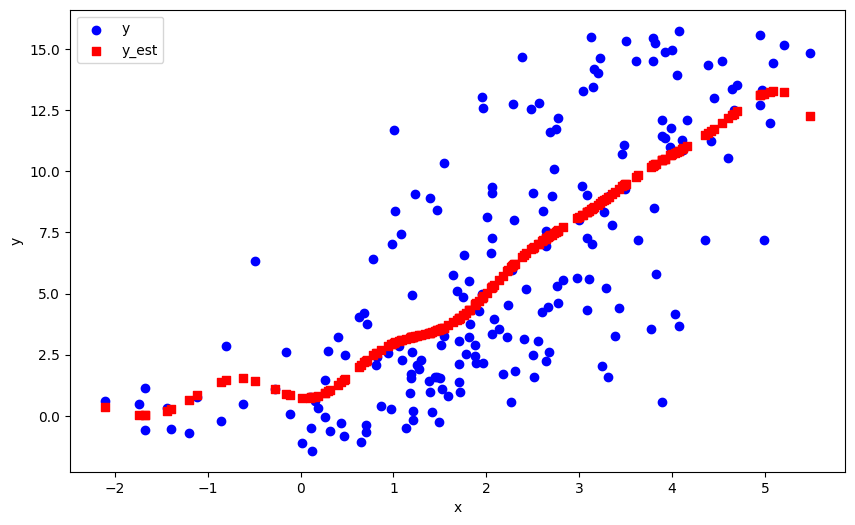

The programm is closed


In [3]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

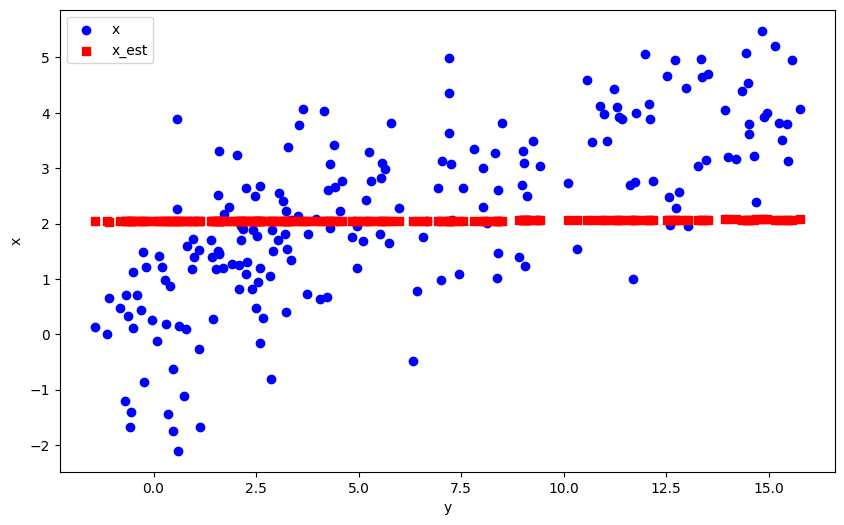

The programm is closed


In [4]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='x', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='x_est', color='red', marker='s') 
plt.xlabel('y')
plt.ylabel('x')
plt.legend()
plt.show()
print("The programm is closed")

### Cov = 0.3

In [5]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.3],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.3, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=4, size=200)
true_x = x + epsilon1
y = np.array([x**2 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.89730179 0.27041426]
 [0.27041426 0.94705985]]
covariance:            x          y
x  2.123735   5.395849
y  5.395849  22.500711


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.01

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 2.436547733249658
	 mle: 5.405907543216944
	 mse: 25.030530565300104
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 2.1237, -0.0357],
        [-0.0357, 22.5007]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1237, -0.0357],
        [-0.0357, 22.5007]])
Check M:  None
Check y:  tensor([-1.1819, -0.4057, -1.4000, -0.6292,  0.9303,  0.2817,  0.1313,  0.7666,
         0.8777,  0.0084,  0.2907, -0.5567,  0.0548, -1.3083,  0.4010, -0.4996,
        -0.9029,  0.6928,  0.9308,  0.3358, -0.4972,  0.8269,  0.8803,  0.7562,
         0.7636,  0.9338,  0.3413, -1.5014,  0.4787, -1.4969, -1.4501, -0.6556,
        -0.8856, -0.2919,  0.7996, -0.3860, -0.3842, -0.7033, -0.9631,  0.9310,
        -0.9265, -1.5011,  0.336

  0%|          | 2/33000.0 [00:04<19:15:19,  2.10s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.013195160899963532
	score(model): 2.3573894903120234
	 mle: 4.940952132788757
	 mse: 29.95756687421124
	W1: tensor([[1.0000e-04, 1.6334e+00],
        [7.0096e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013195160899963532
	W2: tensor([[ 2.1237, -0.0357],
        [-0.0357, 22.5007]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1237, -0.0357],
        [-0.0357, 22.5007]])
Check M:  None
Check y:  tensor([-3.0312, -4.5453, -4.0531, -2.4149,  0.9720,  3.3380,  3.6154,  2.2859,
         1.7979,  4.0152, -1.2113, -2.3391, -1.5986, -3.2146,  3.1407, -2.2787,
        -2.7023, -0.2669,  1.2913, -1.1266, -4.4934,  0.2221,  1.7823, -0.0569,
        -0.0305,  1.1088, -1.1161, -3.7307,  3.0020, -3.8409, -3.4993, -2.4424,
        -2.6836, -2.0488,  0.1066, -4.5576, -4.5588, -2.4919, -2.7683,  1.2873,
        -2.7280, -3.7264,  3.2485, -4.1232, -1.5903, -0.8986, -1.2217,  1.7221,
         0.4391,  2.2615, -1.9889,  

  0%|          | 3/33000.0 [00:08<26:22:48,  2.88s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.013135796838637304
	score(model): 2.3571891971458507
	 mle: 4.93947300742426
	 mse: 33.80331439288743
	W1: tensor([[1.0000e-04, 1.6388e+00],
        [6.9706e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013135796838637304
	W2: tensor([[ 2.1237, -0.0357],
        [-0.0357, 22.5007]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1237, -0.0357],
        [-0.0357, 22.5007]])
Check M:  None
Check y:  tensor([-3.6056, -5.1349, -4.6257, -2.9845,  0.3988,  2.7978,  3.0928,  1.7323,
         1.2315,  3.5625, -1.7798, -2.9087, -2.1698, -3.7911,  2.5983, -2.8485,
        -3.2729, -0.8272,  0.7172, -1.6942, -5.0834, -0.3406,  1.2155, -0.6175,
        -0.5912,  0.5347, -1.6836, -4.3071,  2.4593, -4.4159, -4.0772, -3.0119,
        -3.2540, -2.6197, -0.4550, -5.1470, -5.1482, -3.0615, -3.3395,  0.7132,
        -3.2988, -4.3029,  2.7067, -4.6962, -2.1615, -1.4637, -1.7902,  1.1539,
        -0.1265,  1.7073, -2.5600,  2

  0%|          | 4/33000.0 [00:11<29:03:20,  3.17s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.01312525174299839
	score(model): 0.9898634227742821
	 mle: 4.582737489437579
	 mse: 34.61545708858764
	W1: tensor([[1.0000e-04, 1.6434e+00],
        [6.9485e-02, 1.0000e-04]])
	cycle loss: 0.01312525174299839
	W2: tensor([[1.3065, 0.0650],
        [0.0650, 9.1844]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3070, 0.0652],
        [0.0652, 9.1708]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.8008e-03,  0.0000e+00],
        [ 2.9827e-04,  1.8220e+00]])
Check y:  tensor([-3.7230, -5.2566, -4.7444, -3.0989,  0.2912,  2.6986,  2.9970,  1.6298,
         1.1260,  3.4759, -1.8926, -3.0231, -2.2838, -3.9096,  2.4983, -2.9628,
        -3.3883, -0.9353,  0.6097, -1.8066, -5.2054, -0.4475,  1.1099, -0.7248,
        -0.6985,  0.4270, -1.7959, -4.4263,  2.3591, -4.5348, -4.1966, -3.1264,
        -3.3694, -2.7340, -0.5620, -5.2687, -5.2698, -3.1761, -3.4553,  0.6057,
        -3.4144, -4.4221,  2.6070, -4

  0%|          | 5/33000.0 [00:14<28:26:58,  3.10s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.01312525174299839
	score(model): 0.526523621311812
	 mle: 5.133840330700037
	 mse: 34.61545708858764
	W1: tensor([[1.0000e-04, 1.6434e+00],
        [6.9485e-02, 1.0000e-04]])
	cycle loss: 0.01312525174299839
	W2: tensor([[1.3136, 0.3980],
        [0.3980, 3.9931]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3136, 0.3972],
        [0.3972, 3.9923]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0005,  0.0000],
        [-0.0109, -0.2971]])
Check y:  tensor([-3.7230, -5.2566, -4.7444, -3.0989,  0.2912,  2.6986,  2.9970,  1.6298,
         1.1260,  3.4759, -1.8926, -3.0231, -2.2838, -3.9096,  2.4983, -2.9628,
        -3.3883, -0.9353,  0.6097, -1.8066, -5.2054, -0.4475,  1.1099, -0.7248,
        -0.6985,  0.4270, -1.7959, -4.4263,  2.3591, -4.5348, -4.1966, -3.1264,
        -3.3694, -2.7340, -0.5620, -5.2687, -5.2698, -3.1761, -3.4553,  0.6057,
        -3.4144, -4.4221,  2.6070, -4.8152, -2.2754, -

  0%|          | 6/33000.0 [00:18<30:03:27,  3.28s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.01312525174299839
	score(model): 0.5253644775614668
	 mle: 5.122061572235342
	 mse: 34.61545708858764
	W1: tensor([[1.0000e-04, 1.6434e+00],
        [6.9485e-02, 1.0000e-04]])
	cycle loss: 0.01312525174299839
	W2: tensor([[1.3167, 0.2616],
        [0.2616, 3.9994]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3167, 0.2616],
        [0.2616, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.2963e-07,  0.0000e+00],
        [-1.6849e-02, -2.9093e-01]])
Check y:  tensor([-3.7230, -5.2566, -4.7444, -3.0989,  0.2912,  2.6986,  2.9970,  1.6298,
         1.1260,  3.4759, -1.8926, -3.0231, -2.2838, -3.9096,  2.4983, -2.9628,
        -3.3883, -0.9353,  0.6097, -1.8066, -5.2054, -0.4475,  1.1099, -0.7248,
        -0.6985,  0.4270, -1.7959, -4.4263,  2.3591, -4.5348, -4.1966, -3.1264,
        -3.3694, -2.7340, -0.5620, -5.2687, -5.2698, -3.1761, -3.4553,  0.6057,
        -3.4144, -4.4221,  2.6070, -4

  0%|          | 9/33000.0 [00:22<19:56:28,  2.18s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.005569063661801099
	score(model): 0.25487697258161424
	 mle: 4.985610255056669
	 mse: 48.36299653138738
	W1: tensor([[1.0000e-04, 2.5449e+00],
        [2.9283e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005569063661801099
	W2: tensor([[1.3167, 0.2616],
        [0.2616, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[1.3167, 0.2616],
        [0.2616, 3.9993]])
Check M:  tensor([[ 5.2963e-07,  0.0000e+00],
        [-1.6849e-02, -2.9093e-01]])
Check y:  tensor([-6.2411, -7.7811, -7.5149, -5.5227, -0.3057,  2.6494,  3.3058,  0.8222,
         0.2278,  4.5241, -3.2315, -5.4206, -4.0795, -6.4674,  2.2524, -5.3345,
        -5.8664, -1.3782, -0.1575, -3.0455, -7.6883, -0.7590,  0.2124, -1.0760,
        -1.0418, -0.2471, -3.0225, -7.1645,  1.9934, -7.3046, -6.8485, -5.5582,
        -5.8453, -4.9659, -0.8783, -7.8051, -7.8074, -5.6204, -5.9404, -0.1597,
        -5.8953, -7.1588,  2.4639, -7.5520, -4.0616, -

  0%|          | 10/33000.0 [00:27<24:30:24,  2.67s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.005507692618078375
	score(model): 0.2548176401663836
	 mle: 4.985666487492277
	 mse: 48.48001855126737
	W1: tensor([[1.0000e-04, 2.5439e+00],
        [2.9133e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005507692618078375
	W2: tensor([[1.3167, 0.2616],
        [0.2616, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[1.3167, 0.2616],
        [0.2616, 3.9993]])
Check M:  tensor([[ 5.2963e-07,  0.0000e+00],
        [-1.6849e-02, -2.9093e-01]])
Check y:  tensor([-6.2590, -7.8064, -7.5364, -5.5436, -0.3466,  2.6025,  3.2649,  0.8038,
         0.1957,  4.5263, -3.2601, -5.4433, -4.1127, -6.4885,  2.2154, -5.3587,
        -5.8827, -1.3934, -0.2001, -3.0726, -7.7157, -0.7800,  0.1797, -1.0922,
        -1.0583, -0.2896, -3.0494, -7.1910,  1.9644, -7.3301, -6.8741, -5.5784,
        -5.8618, -4.9954, -0.8968, -7.8298, -7.8321, -5.6396, -5.9564, -0.2023,
        -5.9114, -7.1853,  2.4208, -7.5723, -4.0948, -2

  0%|          | 11/33000.0 [00:30<25:33:16,  2.79s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.005498432322467162
	score(model): 0.2520642765246489
	 mle: 4.930783827144333
	 mse: 48.59972903751058
	W1: tensor([[1.0000e-04, 2.5445e+00],
        [2.9102e-02, 1.0000e-04]])
	cycle loss: 0.005498432322467162
	W2: tensor([[1.7774, 0.1396],
        [0.1396, 3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7773, 0.1395],
        [0.1395, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0023,  0.0000],
        [-0.0013, -0.0994]])
Check y:  tensor([-6.2775, -7.8267, -7.5544, -5.5615, -0.3667,  2.5827,  3.2456,  0.7864,
         0.1761,  4.5110, -3.2797, -5.4615, -4.1331, -6.5078,  2.1966, -5.3772,
        -5.9002, -1.4094, -0.2209, -3.0919, -7.7361, -0.7965,  0.1601, -1.1082,
        -1.0743, -0.3101, -3.0686, -7.2110,  1.9465, -7.3497, -6.8944, -5.5962,
        -5.8792, -5.0149, -0.9131, -7.8501, -7.8523, -5.6573, -5.9740, -0.2231,
        -5.9290, -7.2053,  2.4014, -7.5900, -4.115

  0%|          | 12/33000.0 [00:33<26:12:14,  2.86s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.005498432322467162
	score(model): 0.25202908804601465
	 mle: 4.93006154157502
	 mse: 48.59972903751058
	W1: tensor([[1.0000e-04, 2.5445e+00],
        [2.9102e-02, 1.0000e-04]])
	cycle loss: 0.005498432322467162
	W2: tensor([[1.7361, 0.1026],
        [0.1026, 3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7361, 0.1026],
        [0.1026, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.9811e-05,  0.0000e+00],
        [-1.9426e-03, -9.9205e-02]])
Check y:  tensor([-6.2775, -7.8267, -7.5544, -5.5615, -0.3667,  2.5827,  3.2456,  0.7864,
         0.1761,  4.5110, -3.2797, -5.4615, -4.1331, -6.5078,  2.1966, -5.3772,
        -5.9002, -1.4094, -0.2209, -3.0919, -7.7361, -0.7965,  0.1601, -1.1082,
        -1.0743, -0.3101, -3.0686, -7.2110,  1.9465, -7.3497, -6.8944, -5.5962,
        -5.8792, -5.0149, -0.9131, -7.8501, -7.8523, -5.6573, -5.9740, -0.2231,
        -5.9290, -7.2053,  2.4014,

  0%|          | 13/33000.0 [00:36<25:56:39,  2.83s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.005498432322467162
	score(model): 0.25202614959655395
	 mle: 4.929982009479381
	 mse: 48.59972903751058
	W1: tensor([[1.0000e-04, 2.5445e+00],
        [2.9102e-02, 1.0000e-04]])
	cycle loss: 0.005498432322467162
	W2: tensor([[1.7364, 0.1028],
        [0.1028, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7364, 0.1028],
        [0.1028, 4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4963e-07,  0.0000e+00],
        [-1.9383e-03, -9.9194e-02]])
Check y:  tensor([-6.2775, -7.8267, -7.5544, -5.5615, -0.3667,  2.5827,  3.2456,  0.7864,
         0.1761,  4.5110, -3.2797, -5.4615, -4.1331, -6.5078,  2.1966, -5.3772,
        -5.9002, -1.4094, -0.2209, -3.0919, -7.7361, -0.7965,  0.1601, -1.1082,
        -1.0743, -0.3101, -3.0686, -7.2110,  1.9465, -7.3497, -6.8944, -5.5962,
        -5.8792, -5.0149, -0.9131, -7.8501, -7.8523, -5.6573, -5.9740, -0.2231,
        -5.9290, -7.2053,  2.4014

  0%|          | 15/33000.0 [00:39<21:55:03,  2.39s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.001111664266754353
	score(model): 0.12669676760509058
	 mle: 5.022818536167743
	 mse: 45.87205668017943
	W1: tensor([[1.0000e-04, 2.8141e+00],
        [1.1845e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001111664266754353
	W2: tensor([[1.7364, 0.1028],
        [0.1028, 4.0000]])
	structure loss: 0.0
	Sigma: tensor([[1.7364, 0.1028],
        [0.1028, 4.0000]])
Check M:  tensor([[-1.4963e-07,  0.0000e+00],
        [-1.9383e-03, -9.9194e-02]])
Check y:  tensor([-6.1545, -7.8379, -7.4581, -5.3759,  0.3126,  3.5386,  4.4233,  1.1126,
         0.5862,  5.5001, -2.8774, -5.2655, -3.8140, -6.3934,  2.9318, -5.1727,
        -5.7493, -0.7735,  0.3625, -2.6697, -7.7475, -0.0720,  0.5748, -0.4273,
        -0.3883,  0.3321, -2.6439, -7.1005,  2.5472, -7.2401, -6.7844, -5.4142,
        -5.7264, -4.7757, -0.2038, -7.8608, -7.8630, -5.4817, -5.8299,  0.3616,
        -5.7808, -7.0949,  3.2559, -7.5051, -3.7944, 

  0%|          | 16/33000.0 [00:43<25:19:15,  2.76s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0010076608257585384
	score(model): 0.12650355063548738
	 mle: 5.0192395895498745
	 mse: 52.043761653962584
	W1: tensor([[1.0000e-04, 2.8774e+00],
        [1.1029e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0010076608257585384
	W2: tensor([[1.7364, 0.1028],
        [0.1028, 4.0000]])
	structure loss: 0.0
	Sigma: tensor([[1.7364, 0.1028],
        [0.1028, 4.0000]])
Check M:  tensor([[-1.4963e-07,  0.0000e+00],
        [-1.9383e-03, -9.9194e-02]])
Check y:  tensor([-6.7677, -8.4938, -8.2169, -6.0967, -0.4637,  2.7500,  3.5152,  0.5283,
        -0.1062,  4.7857, -3.5384, -5.9995, -4.5384, -7.0076,  2.2590, -5.9154,
        -6.4097, -1.3678, -0.4129, -3.3171, -8.3625, -0.7281, -0.1210, -1.0407,
        -1.0050, -0.4494, -3.2897, -7.8167,  1.9358, -7.9827, -7.4420, -6.1298,
        -6.3906, -5.5353, -0.8402, -8.5278, -8.5311, -6.1873, -6.4771, -0.4140,
        -6.4359, -7.8099,  2.5222, -8.2470, -4.51

  0%|          | 17/33000.0 [00:46<26:09:29,  2.86s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.0009870594754461948
	score(model): 0.1262890221181035
	 mle: 5.011498246020353
	 mse: 52.78541079161842
	W1: tensor([[1.0000e-04, 2.8950e+00],
        [1.0850e-02, 1.0000e-04]])
	cycle loss: 0.0009870594754461948
	W2: tensor([[1.9487, 0.0503],
        [0.0503, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.9489, 0.0503],
        [0.0503, 3.9986]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0004,  0.0000],
        [-0.0004, -0.0475]])
Check y:  tensor([-6.8395, -8.5714, -8.3109, -6.1849, -0.5553,  2.6618,  3.4227,  0.4541,
        -0.1899,  4.7064, -3.6163, -6.0896, -4.6259, -7.0796,  2.1778, -6.0068,
        -6.4888, -1.4360, -0.5048, -3.3929, -8.4324, -0.8046, -0.2051, -1.1115,
        -1.0763, -0.5418, -3.3653, -7.9048,  1.8588, -8.0749, -7.5208, -6.2173,
        -6.4704, -5.6289, -0.9142, -8.6075, -8.6110, -6.2732, -6.5542, -0.5059,
        -6.5142, -7.8979,  2.4371, -8.3377, -4.

  0%|          | 18/33000.0 [00:49<25:49:10,  2.82s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0009870594754461948
	score(model): 0.12628092128150856
	 mle: 5.0111875262658
	 mse: 52.78541079161842
	W1: tensor([[1.0000e-04, 2.8950e+00],
        [1.0850e-02, 1.0000e-04]])
	cycle loss: 0.0009870594754461948
	W2: tensor([[1.9644, 0.0515],
        [0.0515, 3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.9644, 0.0515],
        [0.0515, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.6501e-06,  0.0000e+00],
        [-4.3645e-04, -4.7487e-02]])
Check y:  tensor([-6.8395, -8.5714, -8.3109, -6.1849, -0.5553,  2.6618,  3.4227,  0.4541,
        -0.1899,  4.7064, -3.6163, -6.0896, -4.6259, -7.0796,  2.1778, -6.0068,
        -6.4888, -1.4360, -0.5048, -3.3929, -8.4324, -0.8046, -0.2051, -1.1115,
        -1.0763, -0.5418, -3.3653, -7.9048,  1.8588, -8.0749, -7.5208, -6.2173,
        -6.4704, -5.6289, -0.9142, -8.6075, -8.6110, -6.2732, -6.5542, -0.5059,
        -6.5142, -7.8979,  2.437

  0%|          | 19/33000.0 [00:52<26:22:48,  2.88s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.0009870594754461948
	score(model): 0.12628530857628759
	 mle: 5.011354381744067
	 mse: 52.78541079161842
	W1: tensor([[1.0000e-04, 2.8950e+00],
        [1.0850e-02, 1.0000e-04]])
	cycle loss: 0.0009870594754461948
	W2: tensor([[1.9643, 0.0514],
        [0.0514, 3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.9643, 0.0514],
        [0.0514, 3.9991]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.0232e-08,  0.0000e+00],
        [-4.3748e-04, -4.7505e-02]])
Check y:  tensor([-6.8395, -8.5714, -8.3109, -6.1849, -0.5553,  2.6618,  3.4227,  0.4541,
        -0.1899,  4.7064, -3.6163, -6.0896, -4.6259, -7.0796,  2.1778, -6.0068,
        -6.4888, -1.4360, -0.5048, -3.3929, -8.4324, -0.8046, -0.2051, -1.1115,
        -1.0763, -0.5418, -3.3653, -7.9048,  1.8588, -8.0749, -7.5208, -6.2173,
        -6.4704, -5.6289, -0.9142, -8.6075, -8.6110, -6.2732, -6.5542, -0.5059,
        -6.5142, -7.8979,  2.4

  0%|          | 21/33000.0 [00:56<22:05:10,  2.41s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00023642445297777925
	score(model): 0.0636204263046339
	 mle: 5.070195738238699
	 mse: 41.81047209581697
	W1: tensor([[1.0000e-04, 2.9631e+00],
        [5.1886e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00023642445297777925
	W2: tensor([[1.9643, 0.0514],
        [0.0514, 3.9991]])
	structure loss: 0.0
	Sigma: tensor([[1.9643, 0.0514],
        [0.0514, 3.9991]])
Check M:  tensor([[-2.0232e-08,  0.0000e+00],
        [-4.3748e-04, -4.7505e-02]])
Check y:  tensor([-5.8123, -7.5971, -6.9913, -4.9134,  1.0080,  4.3224,  5.4660,  1.3979,
         1.0367,  6.3132, -2.4241, -4.7913, -3.3357, -6.0649,  3.4838, -4.6908,
        -5.3458, -0.2569,  0.9979, -2.2193, -7.5035,  0.5483,  1.0316,  0.1313,
         0.1760,  1.0093, -2.1938, -6.7046,  2.9722, -6.8156, -6.4369, -4.9565,
        -5.3187, -4.2790,  0.3909, -7.6189, -7.6209, -5.0333, -5.4409,  0.9982,
        -5.3830, -6.7000,  3.9302, -7.0395, -3.31

  0%|          | 22/33000.0 [00:59<24:47:30,  2.71s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00021526446191222348
	score(model): 0.06339913976043944
	 mle: 5.0540875018148546
	 mse: 47.47917585253896
	W1: tensor([[1.0000e-04, 2.9544e+00],
        [4.9657e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00021526446191222348
	W2: tensor([[1.9643, 0.0514],
        [0.0514, 3.9991]])
	structure loss: 0.0
	Sigma: tensor([[1.9643, 0.0514],
        [0.0514, 3.9991]])
Check M:  tensor([[-2.0232e-08,  0.0000e+00],
        [-4.3748e-04, -4.7505e-02]])
Check y:  tensor([-6.3659, -8.1080, -7.7598, -5.6390,  0.1920,  3.5204,  4.4643,  0.9081,
         0.3755,  5.5602, -3.0479, -5.5343, -4.0477, -6.6060,  2.8627, -5.4449,
        -5.9838, -0.8133,  0.1959, -2.8253, -7.9943, -0.1064,  0.3647, -0.4580,
        -0.4185,  0.1910, -2.7977, -7.3710,  2.4452, -7.5265, -7.0214, -5.6751,
        -5.9628, -5.0503, -0.2344, -8.1372, -8.1400, -5.7380, -6.0580,  0.1956,
        -6.0127, -7.3646,  3.2145, -7.8012, -4.

  0%|          | 23/33000.0 [01:03<26:44:59,  2.92s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00021020721909170703
	score(model): 0.06333555130724429
	 mle: 5.049417176889325
	 mse: 50.44286612506874
	W1: tensor([[1.0000e-04, 2.9731e+00],
        [4.8761e-03, 1.0000e-04]])
	cycle loss: 0.00021020721909170703
	W2: tensor([[2.0495, 0.0431],
        [0.0431, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0495, 0.0431],
        [0.0431, 3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.6694e-05,  0.0000e+00],
        [-1.7571e-04, -2.3696e-02]])
Check y:  tensor([-6.6576e+00, -8.4100e+00, -8.1175e+00, -5.9812e+00, -1.8620e-01,
         3.1267e+00,  3.9982e+00,  6.4079e-01,  5.0656e-02,  5.1913e+00,
        -3.3590e+00, -5.8823e+00, -4.3877e+00, -6.8971e+00,  2.5366e+00,
        -5.7966e+00, -6.2986e+00, -1.1018e+00, -1.7741e-01, -3.1305e+00,
        -8.2801e+00, -4.2877e-01,  3.7982e-02, -7.5769e-01, -7.2009e-01,
        -1.8807e-01, -3.1022e+00, -7.7070e+00,  2.1549e+00, -7

  0%|          | 24/33000.0 [01:06<26:19:03,  2.87s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00021020721909170703
	score(model): 0.06333571396803016
	 mle: 5.049384337844987
	 mse: 50.44286612506874
	W1: tensor([[1.0000e-04, 2.9731e+00],
        [4.8761e-03, 1.0000e-04]])
	cycle loss: 0.00021020721909170703
	W2: tensor([[2.0449, 0.0427],
        [0.0427, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0449, 0.0427],
        [0.0427, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.3819e-08,  0.0000e+00],
        [-1.7730e-04, -2.3697e-02]])
Check y:  tensor([-6.6576e+00, -8.4100e+00, -8.1175e+00, -5.9812e+00, -1.8620e-01,
         3.1267e+00,  3.9982e+00,  6.4079e-01,  5.0656e-02,  5.1913e+00,
        -3.3590e+00, -5.8823e+00, -4.3877e+00, -6.8971e+00,  2.5366e+00,
        -5.7966e+00, -6.2986e+00, -1.1018e+00, -1.7741e-01, -3.1305e+00,
        -8.2801e+00, -4.2877e-01,  3.7982e-02, -7.5769e-01, -7.2009e-01,
        -1.8807e-01, -3.1022e+00, -7.7070e+00,  2.1549e+00, -7

  0%|          | 25/33000.0 [01:08<26:01:54,  2.84s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00021020721909170703
	score(model): 0.0633378501479606
	 mle: 5.049603183462489
	 mse: 50.44286612506874
	W1: tensor([[1.0000e-04, 2.9731e+00],
        [4.8761e-03, 1.0000e-04]])
	cycle loss: 0.00021020721909170703
	W2: tensor([[2.0449, 0.0426],
        [0.0426, 3.9990]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0449, 0.0426],
        [0.0426, 3.9990]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.7364e-09,  0.0000e+00],
        [-1.7785e-04, -2.3706e-02]])
Check y:  tensor([-6.6576e+00, -8.4100e+00, -8.1175e+00, -5.9812e+00, -1.8620e-01,
         3.1267e+00,  3.9982e+00,  6.4079e-01,  5.0656e-02,  5.1913e+00,
        -3.3590e+00, -5.8823e+00, -4.3877e+00, -6.8971e+00,  2.5366e+00,
        -5.7966e+00, -6.2986e+00, -1.1018e+00, -1.7741e-01, -3.1305e+00,
        -8.2801e+00, -4.2877e-01,  3.7982e-02, -7.5769e-01, -7.2009e-01,
        -1.8807e-01, -3.1022e+00, -7.7070e+00,  2.1549e+00, -7.

  0%|          | 27/33000.0 [01:12<22:36:30,  2.47s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 6.110966157235609e-05
	score(model): 0.031956873585813055
	 mle: 5.102764778766368
	 mse: 42.686542308774555
	W1: tensor([[1.0000e-04, 2.9706e+00],
        [2.6311e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.110966157235609e-05
	W2: tensor([[2.0449, 0.0426],
        [0.0426, 3.9990]])
	structure loss: 0.0
	Sigma: tensor([[2.0449, 0.0426],
        [0.0426, 3.9990]])
Check M:  tensor([[ 2.7364e-09,  0.0000e+00],
        [-1.7785e-04, -2.3706e-02]])
Check y:  tensor([-6.0045, -7.9073, -7.0298, -5.0311,  0.9033,  4.2441,  5.3289,  1.2757,
         0.9247,  5.9710, -2.5196, -4.8971, -3.4055, -6.2487,  3.4039, -4.7879,
        -5.5108, -0.4058,  0.8972, -2.3216, -7.8340,  0.4079,  0.9201, -0.0173,
         0.0278,  0.9077, -2.2970, -6.7835,  2.8823, -6.8689, -6.5731, -5.0788,
        -5.4809, -4.3520,  0.2462, -7.9215, -7.9227, -5.1639, -5.6148,  0.8975,
        -5.5516, -6.7799,  3.8541, -7.0968, -3.

  0%|          | 28/33000.0 [01:16<25:07:55,  2.74s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 5.0203663894521355e-05
	score(model): 0.03180360787325602
	 mle: 5.079906474856781
	 mse: 43.997769216228974
	W1: tensor([[1.0000e-04, 3.0225e+00],
        [2.3437e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.0203663894521355e-05
	W2: tensor([[2.0449, 0.0426],
        [0.0426, 3.9990]])
	structure loss: 0.0
	Sigma: tensor([[2.0449, 0.0426],
        [0.0426, 3.9990]])
Check M:  tensor([[ 2.7364e-09,  0.0000e+00],
        [-1.7785e-04, -2.3706e-02]])
Check y:  tensor([-6.0310e+00, -7.8061e+00, -7.3397e+00, -5.2257e+00,  7.1017e-01,
         4.1139e+00,  5.2015e+00,  1.1264e+00,  7.0490e-01,  6.0655e+00,
        -2.7009e+00, -5.1160e+00, -3.6681e+00, -6.2840e+00,  3.3003e+00,
        -5.0242e+00, -5.6047e+00, -4.2539e-01,  6.6446e-01, -2.4826e+00,
        -7.6961e+00,  3.6147e-01,  6.9872e-01, -3.7387e-02,  6.4479e-03,
         6.9330e-01, -2.4554e+00, -7.0070e+00,  2.7910e+00, -7.1415e+00,
        

  0%|          | 29/33000.0 [01:20<26:57:06,  2.94s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 4.982417527354954e-05
	score(model): 0.03176037916927916
	 mle: 5.07309098696132
	 mse: 46.23849767722542
	W1: tensor([[1.0000e-04, 3.0122e+00],
        [2.3429e-03, 1.0000e-04]])
	cycle loss: 4.982417527354954e-05
	W2: tensor([[2.0792, 0.0516],
        [0.0516, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0793, 0.0515],
        [0.0515, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.8468e-06,  0.0000e+00],
        [ 3.3882e-04,  3.8052e-02]])
Check y:  tensor([-6.2524, -8.0119, -7.6357, -5.5102,  0.3865,  3.7732,  4.7852,  0.9484,
         0.4603,  5.7707, -2.9331, -5.4058, -3.9342, -6.4985,  3.0377, -5.3171,
        -5.8590, -0.6465,  0.3542, -2.7086, -7.8946,  0.0950,  0.4517, -0.2749,
        -0.2335,  0.3720, -2.6807, -7.2631,  2.5723, -7.4141, -6.9177, -5.5463,
        -5.8374, -4.9272, -0.0398, -8.0417, -8.0445, -5.6094, -5.9350,  0.3545,
        -5.8886, -7.2569,  3.

  0%|          | 30/33000.0 [01:22<26:28:31,  2.89s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 4.982417527354954e-05
	score(model): 0.03176072461249739
	 mle: 5.073090327141241
	 mse: 46.23849767722542
	W1: tensor([[1.0000e-04, 3.0122e+00],
        [2.3429e-03, 1.0000e-04]])
	cycle loss: 4.982417527354954e-05
	W2: tensor([[2.0797, 0.0519],
        [0.0519, 3.9997]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0797, 0.0519],
        [0.0519, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.8204e-08,  0.0000e+00],
        [-1.0748e-04, -1.1934e-02]])
Check y:  tensor([-6.2524, -8.0119, -7.6357, -5.5102,  0.3865,  3.7732,  4.7852,  0.9484,
         0.4603,  5.7707, -2.9331, -5.4058, -3.9342, -6.4985,  3.0377, -5.3171,
        -5.8590, -0.6465,  0.3542, -2.7086, -7.8946,  0.0950,  0.4517, -0.2749,
        -0.2335,  0.3720, -2.6807, -7.2631,  2.5723, -7.4141, -6.9177, -5.5463,
        -5.8374, -4.9272, -0.0398, -8.0417, -8.0445, -5.6094, -5.9350,  0.3545,
        -5.8886, -7.2569,  3

  0%|          | 31/33000.0 [01:25<26:48:16,  2.93s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 4.982417527354954e-05
	score(model): 0.03176208246863228
	 mle: 5.073316165476902
	 mse: 46.23849767722542
	W1: tensor([[1.0000e-04, 3.0122e+00],
        [2.3429e-03, 1.0000e-04]])
	cycle loss: 4.982417527354954e-05
	W2: tensor([[2.0797, 0.0517],
        [0.0517, 3.9988]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.5546e-09,  0.0000e+00],
        [-1.0785e-04, -1.1939e-02]])
Check y:  tensor([-6.2524, -8.0119, -7.6357, -5.5102,  0.3865,  3.7732,  4.7852,  0.9484,
         0.4603,  5.7707, -2.9331, -5.4058, -3.9342, -6.4985,  3.0377, -5.3171,
        -5.8590, -0.6465,  0.3542, -2.7086, -7.8946,  0.0950,  0.4517, -0.2749,
        -0.2335,  0.3720, -2.6807, -7.2631,  2.5723, -7.4141, -6.9177, -5.5463,
        -5.8374, -4.9272, -0.0398, -8.0417, -8.0445, -5.6094, -5.9350,  0.3545,
        -5.8886, -7.2569,  3

  0%|          | 33/33000.0 [01:29<22:24:54,  2.45s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 2.1940937228848156e-05
	score(model): 0.016106684645945665
	 mle: 5.146257238389751
	 mse: 42.4793054294548
	W1: tensor([[1.0000e-04, 2.8831e+00],
        [1.6239e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.1940937228848156e-05
	W2: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]])
	structure loss: 0.0
	Sigma: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]])
Check M:  tensor([[ 1.5546e-09,  0.0000e+00],
        [-1.0785e-04, -1.1939e-02]])
Check y:  tensor([-6.1150, -8.1023, -6.8728, -5.0661,  0.7707,  4.0808,  4.6886,  1.6561,
         1.1330,  4.8653, -2.3621, -4.9070, -3.2383, -6.3199,  3.5178, -4.7774,
        -5.6181, -0.4639,  0.8767, -2.1748, -8.0541,  0.2389,  1.1215, -0.1298,
        -0.0910,  0.8173, -2.1516, -6.6634,  3.1298, -6.7159, -6.5433, -5.1225,
        -5.5852, -4.2677,  0.0975, -8.1073, -8.1077, -5.2226, -5.7306,  0.8753,
        -5.6626, -6.6614,  3.8287, -6.9721, -3

  0%|          | 34/33000.0 [01:33<25:04:01,  2.74s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 1.288826478917926e-05
	score(model): 0.015957958133284166
	 mle: 5.101779084536901
	 mse: 43.590654817579725
	W1: tensor([[1.0000e-04, 3.0140e+00],
        [1.1902e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.288826478917926e-05
	W2: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]])
	structure loss: 0.0
	Sigma: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]])
Check M:  tensor([[ 1.5546e-09,  0.0000e+00],
        [-1.0785e-04, -1.1939e-02]])
Check y:  tensor([-6.0728e+00, -7.9285e+00, -7.2021e+00, -5.1733e+00,  7.7947e-01,
         4.1714e+00,  5.2284e+00,  1.1318e+00,  7.4697e-01,  5.8653e+00,
        -2.6496e+00, -5.0509e+00, -3.5803e+00, -6.3233e+00,  3.3382e+00,
        -4.9501e+00, -5.6066e+00, -4.3164e-01,  7.3603e-01, -2.4400e+00,
        -7.8250e+00,  3.7626e-01,  7.4206e-01, -3.8791e-02,  6.1412e-03,
         7.6591e-01, -2.4139e+00, -6.9399e+00,  2.8122e+00, -7.0423e+00,
        

  0%|          | 35/33000.0 [01:37<27:57:31,  3.05s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 1.2296351907803427e-05
	score(model): 0.01591021986142996
	 mle: 5.086695728131845
	 mse: 45.097865866235956
	W1: tensor([[1.0000e-04, 3.0510e+00],
        [1.1484e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.2296351907803427e-05
	W2: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]])
	structure loss: 0.0
	Sigma: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]])
Check M:  tensor([[ 1.5546e-09,  0.0000e+00],
        [-1.0785e-04, -1.1939e-02]])
Check y:  tensor([-6.1460, -7.9276, -7.4878, -5.3699,  0.5614,  3.9835,  5.0521,  0.9712,
         0.5342,  5.9020, -2.8360, -5.2644, -3.8212, -6.4002,  3.1760, -5.1756,
        -5.7313, -0.5239,  0.4998, -2.6131, -7.8040,  0.2559,  0.5279, -0.1361,
        -0.0926,  0.5368, -2.5854, -7.1502,  2.6660, -7.2903, -6.8190, -5.4066,
        -5.7086, -4.7909,  0.1121, -7.9582, -7.9611, -5.4712, -5.8116,  0.5005,
        -5.7625, -7.1444,  3.6096, -7.5201, -

  0%|          | 36/33000.0 [01:40<29:22:44,  3.21s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 1.2187346750014427e-05
	score(model): 0.015881704879892048
	 mle: 5.076648491791746
	 mse: 48.634537927460954
	W1: tensor([[1.0000e-04, 3.0400e+00],
        [1.1474e-03, 1.0000e-04]])
	cycle loss: 1.2187346750014427e-05
	W2: tensor([[2.0797, 0.0517],
        [0.0517, 3.9989]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0817, 0.0525],
        [0.0525, 4.0030]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.9785e-05,  0.0000e+00],
        [-6.8904e-05, -5.9459e-03]])
Check y:  tensor([-6.4908e+00, -8.2487e+00, -7.9385e+00, -5.8048e+00,  6.9306e-02,
         3.4517e+00,  4.4181e+00,  7.0350e-01,  1.7144e-01,  5.4746e+00,
        -3.1913e+00, -5.7065e+00, -4.2247e+00, -6.7345e+00,  2.7607e+00,
        -5.6217e+00, -6.1239e+00, -8.7257e-01,  3.3944e-02, -2.9600e+00,
        -8.1144e+00, -1.6143e-01,  1.6143e-01, -5.1048e-01, -4.7071e-01,
         5.0978e-02, -2.9313e+00, -7.5431e+00,  2.3189e+00

  0%|          | 37/33000.0 [01:43<29:03:34,  3.17s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 1.2187346750014427e-05
	score(model): 0.015881175862754778
	 mle: 5.077276852908625
	 mse: 48.634537927460954
	W1: tensor([[1.0000e-04, 3.0400e+00],
        [1.1474e-03, 1.0000e-04]])
	cycle loss: 1.2187346750014427e-05
	W2: tensor([[2.0962, 0.0593],
        [0.0593, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0962, 0.0593],
        [0.0593, 4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.4797e-08, 0.0000e+00],
        [1.9527e-04, 1.9048e-02]])
Check y:  tensor([-6.4908e+00, -8.2487e+00, -7.9385e+00, -5.8048e+00,  6.9306e-02,
         3.4517e+00,  4.4181e+00,  7.0350e-01,  1.7144e-01,  5.4746e+00,
        -3.1913e+00, -5.7065e+00, -4.2247e+00, -6.7345e+00,  2.7607e+00,
        -5.6217e+00, -6.1239e+00, -8.7257e-01,  3.3944e-02, -2.9600e+00,
        -8.1144e+00, -1.6143e-01,  1.6143e-01, -5.1048e-01, -4.7071e-01,
         5.0978e-02, -2.9313e+00, -7.5431e+00,  2.3189e+00, -7

  0%|          | 38/33000.0 [01:46<27:53:02,  3.05s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 1.2187346750014427e-05
	score(model): 0.015880787803019606
	 mle: 5.077301998803429
	 mse: 48.634537927460954
	W1: tensor([[1.0000e-04, 3.0400e+00],
        [1.1474e-03, 1.0000e-04]])
	cycle loss: 1.2187346750014427e-05
	W2: tensor([[2.0962, 0.0593],
        [0.0593, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0962, 0.0593],
        [0.0593, 4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.7395e-09,  0.0000e+00],
        [-6.0886e-05, -5.9433e-03]])
Check y:  tensor([-6.4908e+00, -8.2487e+00, -7.9385e+00, -5.8048e+00,  6.9306e-02,
         3.4517e+00,  4.4181e+00,  7.0350e-01,  1.7144e-01,  5.4746e+00,
        -3.1913e+00, -5.7065e+00, -4.2247e+00, -6.7345e+00,  2.7607e+00,
        -5.6217e+00, -6.1239e+00, -8.7257e-01,  3.3944e-02, -2.9600e+00,
        -8.1144e+00, -1.6143e-01,  1.6143e-01, -5.1048e-01, -4.7071e-01,
         5.0978e-02, -2.9313e+00, -7.5431e+00,  2.3189e+00

  0%|          | 39/33000.0 [01:49<27:04:36,  2.96s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 1.2187346750014427e-05
	score(model): 0.01588120073798582
	 mle: 5.077280512251674
	 mse: 48.634537927460954
	W1: tensor([[1.0000e-04, 3.0400e+00],
        [1.1474e-03, 1.0000e-04]])
	cycle loss: 1.2187346750014427e-05
	W2: tensor([[2.0962, 0.0594],
        [0.0594, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0962, 0.0594],
        [0.0594, 4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.2308e-09,  0.0000e+00],
        [ 1.9538e-04,  1.9048e-02]])
Check y:  tensor([-6.4908e+00, -8.2487e+00, -7.9385e+00, -5.8048e+00,  6.9306e-02,
         3.4517e+00,  4.4181e+00,  7.0350e-01,  1.7144e-01,  5.4746e+00,
        -3.1913e+00, -5.7065e+00, -4.2247e+00, -6.7345e+00,  2.7607e+00,
        -5.6217e+00, -6.1239e+00, -8.7257e-01,  3.3944e-02, -2.9600e+00,
        -8.1144e+00, -1.6143e-01,  1.6143e-01, -5.1048e-01, -4.7071e-01,
         5.0978e-02, -2.9313e+00, -7.5431e+00,  2.3189e+00,

  0%|          | 40/33000.0 [01:52<25:43:05,  2.81s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 1.2187346750014427e-05
	score(model): 0.015881193341457742
	 mle: 5.077441772707176
	 mse: 48.634537927460954
	W1: tensor([[1.0000e-04, 3.0400e+00],
        [1.1474e-03, 1.0000e-04]])
	cycle loss: 1.2187346750014427e-05
	W2: tensor([[2.0962, 0.0592],
        [0.0592, 3.9994]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0962, 0.0592],
        [0.0592, 3.9995]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.2299e-10,  0.0000e+00],
        [-6.0997e-05, -5.9449e-03]])
Check y:  tensor([-6.4908e+00, -8.2487e+00, -7.9385e+00, -5.8048e+00,  6.9306e-02,
         3.4517e+00,  4.4181e+00,  7.0350e-01,  1.7144e-01,  5.4746e+00,
        -3.1913e+00, -5.7065e+00, -4.2247e+00, -6.7345e+00,  2.7607e+00,
        -5.6217e+00, -6.1239e+00, -8.7257e-01,  3.3944e-02, -2.9600e+00,
        -8.1144e+00, -1.6143e-01,  1.6143e-01, -5.1048e-01, -4.7071e-01,
         5.0978e-02, -2.9313e+00, -7.5431e+00,  2.3189e+00

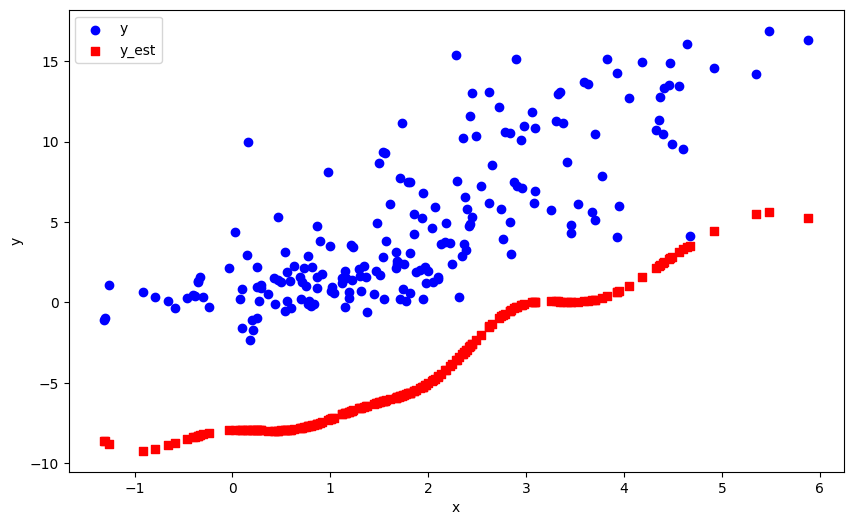

The programm is closed


In [6]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.01, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

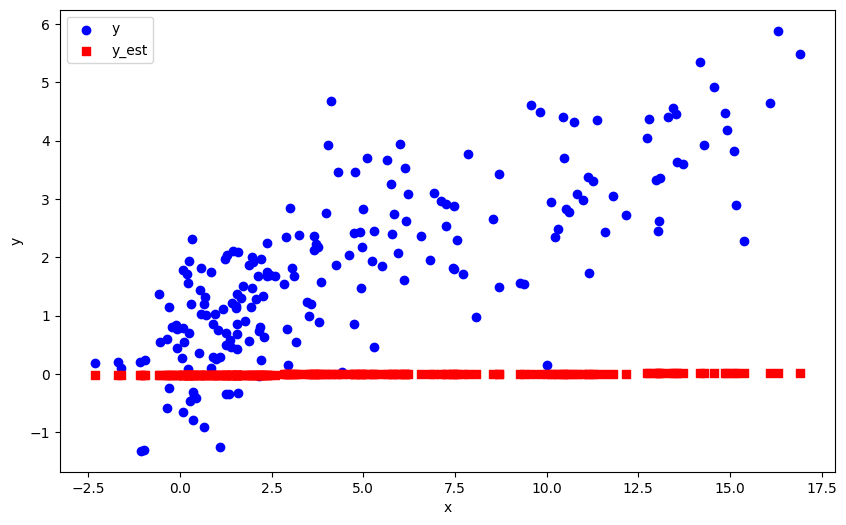

The programm is closed


In [8]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='x', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='x_est', color='red', marker='s') 
plt.xlabel('y')
plt.ylabel('x')
plt.legend()
plt.show()
print("The programm is closed")

#### Cov = 0.6

In [11]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=4, size=200)
true_x = x + epsilon1
y = np.array([x**2 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.89925943 0.54768565]
 [0.54768565 0.94098793]]
covariance:            x          y
x  2.105194   5.631156
y  5.631156  22.535975


  0%|          | 0/50000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.01

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 2.439491166773076
	 mle: 5.3807692121837745
	 mse: 24.716135083731906
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	alpha: tensor([[ 1.0270e-02,  2.1752e-02,  2.6299e-02, -9.3816e-03, -8.4828e-03,
         -5.2822e-03, -9.1628e-03, -7.0199e-03, -9.3024e-03, -9.8292e-03,
         -7.9547e-03,  2.6862e-02, -5.9655e-04,  1.9815e-02, -8.7259e-03,
         -4.9121e-03,  2.7090e-02, -7.1148e-03, -5.8917e-03,  1.8634e-03,
          2.1254e-02, -5.0710e-03, -6.4706e-03, -9.1104e-03,  2.3997e-03,
         -8.7424e-03, -7.0216e-03, -4.2447e-03, -8.7725e-03,  5.6149e-03,
    

  0%|          | 2/50000.0 [00:04<29:11:27,  2.10s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.014235208461825355
	score(model): 2.353123019383693
	 mle: 4.85224385539364
	 mse: 30.855678408874528
	W1: tensor([[1.0000e-04, 1.7192e+00],
        [6.9151e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014235208461825355
	W2: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	alpha: tensor([[-2.5377e-03,  5.0246e-05,  1.6207e-03, -1.7065e-04, -2.4329e-04,
         -5.4273e-04,  4.9418e-04,  1.3657e-04, -4.5348e-05,  1.0529e-03,
         -7.6872e-05,  2.0727e-03,  1.0460e-03, -8.0047e-04,  2.0868e-04,
          5.3998e-04,  2.3280e-03, -5.3273e-05, -2.8907e-04,  4.6183e-04,
         -5.5043e-04,  5.2368e-04, -2.9955e-04, -3.4889e-05,  2.1481e-04,
         -2.3912e-04, -1.5468e-04,  2.0934e-04, -2.5563e-04, -1.3899e-03,
          2.5365e-03,  2.4910e-03, -1.8325e-04,  3.7690e-04,  5.5965e-04,
          1.1198

  0%|          | 3/50000.0 [00:08<42:18:11,  3.05s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.014070493077165125
	score(model): 2.3528441722741293
	 mle: 4.851391997217801
	 mse: 35.28185105469411
	W1: tensor([[1.0000e-04, 1.7122e+00],
        [6.9036e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014070493077165125
	W2: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	alpha: tensor([[ 7.6097e-06,  2.2200e-05,  1.8525e-05,  7.3908e-06,  8.9741e-07,
         -2.4612e-04, -9.0356e-06,  2.0489e-05,  1.3039e-06,  2.9191e-07,
          3.8856e-06,  1.8690e-05,  1.4571e-05,  2.0047e-05, -4.2564e-06,
          7.3756e-07,  1.8792e-05,  1.0959e-05,  2.6992e-05,  8.2055e-06,
          1.6754e-05, -2.1967e-07,  3.2828e-05,  1.2030e-06,  7.5398e-06,
          3.2994e-06,  1.5502e-05,  2.1112e-05, -3.5930e-05,  8.7820e-07,
          2.0121e-05,  1.9041e-05,  1.4842e-05,  2.4814e-05,  3.1646e-06,
          2.357

  0%|          | 4/50000.0 [00:12<47:28:51,  3.42s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 3000
	h(W(model)): 0.014066739687705887
	score(model): 2.3528023949202
	 mle: 4.851010355920943
	 mse: 36.048347696234636
	W1: tensor([[1.0000e-04, 1.7139e+00],
        [6.8959e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014066739687705887
	W2: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	structure loss: 0.0
	Sigma: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]])
	alpha: tensor([[-6.5326e-05, -5.1483e-04,  2.7531e-04,  8.6740e-06, -4.0369e-08,
         -2.4496e-04, -1.1271e-05,  4.1436e-05,  3.8783e-06, -7.9358e-07,
          6.5598e-06,  2.0832e-04,  1.1455e-04, -5.2658e-04, -6.3117e-06,
          2.7132e-05,  1.4540e-04,  1.8428e-06, -4.3897e-05,  2.2158e-04,
          3.3067e-04,  2.9988e-05, -3.1700e-05,  3.8841e-06,  2.3773e-04,
          2.9300e-06, -1.4070e-05, -2.0195e-05, -3.4567e-05,  2.0817e-04,
         -6.5464e-05,  7.4942e-05,  8.7124e-06,  6.9791e-05,  2.4683e-05,
         -4.2930e

  8%|▊         | 4004/50000.0 [00:16<01:58, 386.62it/s]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.014095290249679815
	score(model): 2.3528026353067557
	 mle: 4.848670611558713
	 mse: 36.163894114106576
	W1: tensor([[1.0000e-04, 1.7146e+00],
        [6.9001e-02, 1.0000e-04]])
	cycle loss: 0.014095290249679815
	W2: tensor([[ 2.1052, -0.0397],
        [-0.0397, 22.5360]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.1010, -0.0382],
        [-0.0382, 22.4909]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0805,  0.0000],
        [-0.0103,  4.6282]])
Check y:  tensor([-4.1162e+00, -5.7173e+00, -5.1102e+00, -3.4019e+00,  3.7087e-01,
         2.5849e+00,  2.5875e+00,  1.7346e+00,  1.3222e+00,  3.0047e+00,
        -2.5130e+00, -3.6263e+00, -2.3980e+00, -3.9432e+00,  2.4809e+00,
        -2.6297e+00, -3.9064e+00, -1.7502e+00, -1.6125e-01, -1.6556e+00,
        -5.8022e+00, -6.6232e-01,  1.0406e+00, -4.3406e-01, -1.5776e+00,
         9.2858e-02, -1.6370e+00, -4.6979e+00,  2.3907e+00, -4.7297e+00,
    

  8%|▊         | 4009/50000.0 [00:32<06:25, 119.40it/s]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.0008439718895198178
	score(model): 1.1795053874454524
	 mle: 5.0806772748806
	 mse: 27.95228160358372
	W1: tensor([[1.0000e-04, 6.4680e-02],
        [4.4905e-01, 1.0000e-04]])
	cycle loss: 0.0008439718895198178
	W2: tensor([[ 2.1010, -0.0382],
        [-0.0382, 22.4909]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.0968, -0.0367],
        [-0.0367, 22.4459]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0736,  0.0000],
        [-0.0029,  2.2527]])
Check y:  tensor([-0.2332, -0.2986, -0.2691, -0.2053, -0.0736,  0.0249,  0.0251, -0.0070,
        -0.0256,  0.0786, -0.1779, -0.2134, -0.1741, -0.2260,  0.0197, -0.1817,
        -0.2245, -0.1509, -0.0961, -0.1475, -0.3016, -0.1130, -0.0396, -0.1055,
        -0.1446, -0.0862, -0.1468, -0.2555,  0.0166, -0.2565, -0.2482, -0.2089,
        -0.2062, -0.1842, -0.1244, -0.2984, -0.2972, -0.1880, -0.2204, -0.0958,
        -0.2109, -0.2649,  0.0226, -0.2734

  8%|▊         | 4010/50000.0 [00:35<07:35, 100.98it/s]


 freeze theta, update Sigma

mu 0.05

Inner iteration 5000
	h(W(model)): 0.0008439718895198178
	score(model): 0.3782650732843993
	 mle: 6.056659205840992
	 mse: 27.95228160358372
	W1: tensor([[1.0000e-04, 6.4680e-02],
        [4.4905e-01, 1.0000e-04]])
	cycle loss: 0.0008439718895198178
	W2: tensor([[0.5476, 0.0120],
        [0.0120, 5.4938]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.5475, 0.0121],
        [0.0121, 5.4898]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.2275e-03,  0.0000e+00],
        [-1.9090e-05,  2.5528e-01]])
Check y:  tensor([-0.2332, -0.2986, -0.2691, -0.2053, -0.0736,  0.0249,  0.0251, -0.0070,
        -0.0256,  0.0786, -0.1779, -0.2134, -0.1741, -0.2260,  0.0197, -0.1817,
        -0.2245, -0.1509, -0.0961, -0.1475, -0.3016, -0.1130, -0.0396, -0.1055,
        -0.1446, -0.0862, -0.1468, -0.2555,  0.0166, -0.2565, -0.2482, -0.2089,
        -0.2062, -0.1842, -0.1244, -0.2984, -0.2972, -0.1880, -0.2204, -0.0958,
        -0.2109, -0.2649,  0.022

 10%|█         | 5011/50000.0 [00:42<06:23, 117.17it/s]


 freeze theta, update Sigma

mu 0.05

Inner iteration 7000
	h(W(model)): 0.0008439718895198178
	score(model): 0.3608376831121712
	 mle: 7.019775393856663
	 mse: 27.95228160358372
	W1: tensor([[1.0000e-04, 6.4680e-02],
        [4.4905e-01, 1.0000e-04]])
	cycle loss: 0.0008439718895198178
	W2: tensor([[0.5542, 0.0153],
        [0.0153, 4.1800]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[0.5542, 0.0153],
        [0.0153, 4.1800]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.2543e-08,  0.0000e+00],
        [-2.8810e-10,  2.2953e-05]])
Check y:  tensor([-0.2332, -0.2986, -0.2691, -0.2053, -0.0736,  0.0249,  0.0251, -0.0070,
        -0.0256,  0.0786, -0.1779, -0.2134, -0.1741, -0.2260,  0.0197, -0.1817,
        -0.2245, -0.1509, -0.0961, -0.1475, -0.3016, -0.1130, -0.0396, -0.1055,
        -0.1446, -0.0862, -0.1468, -0.2555,  0.0166, -0.2565, -0.2482, -0.2089,
        -0.2062, -0.1842, -0.1244, -0.2984, -0.2972, -0.1880, -0.2204, -0.0958,
        -0.2109, -0.2649,  0.022

 10%|█         | 5017/50000.0 [01:02<15:28, 48.43it/s] 


 freeze theta, update Sigma

mu 0.025

Inner iteration 5000
	h(W(model)): 0.01142061623724433
	score(model): 0.12527454364575125
	 mle: 4.553637452843847
	 mse: 39.92587563436099
	W1: tensor([[1.0000e-04, 2.2093e+00],
        [4.8233e-02, 1.0000e-04]])
	cycle loss: 0.01142061623724433
	W2: tensor([[1.4522, 0.1460],
        [0.1460, 3.9996]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.4523, 0.1460],
        [0.1460, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0002,  0.0000],
        [-0.0012, -0.0400]])
Check y:  tensor([-5.2446e+00, -7.2530e+00, -6.4459e+00, -4.3565e+00,  5.7259e-01,
         3.1563e+00,  3.1599e+00,  2.1411e+00,  1.6454e+00,  4.1661e+00,
        -3.1703e+00, -4.6376e+00, -3.0084e+00, -5.0309e+00,  3.0278e+00,
        -3.3334e+00, -4.9853e+00, -2.0846e+00,  2.9668e-03, -1.9499e+00,
        -7.3609e+00, -5.9355e-01,  1.3149e+00, -3.1176e-01, -1.8391e+00,
         2.7826e-01, -1.9235e+00, -5.9518e+00,  2.9232e+00, -5.9897e+00,
        -5.7

 10%|█         | 5018/50000.0 [01:05<17:28, 42.91it/s]


 freeze theta, update Sigma

mu 0.025

Inner iteration 6000
	h(W(model)): 0.01142061623724433
	score(model): 0.12527496715872408
	 mle: 4.5535752311591855
	 mse: 39.92587563436099
	W1: tensor([[1.0000e-04, 2.2093e+00],
        [4.8233e-02, 1.0000e-04]])
	cycle loss: 0.01142061623724433
	W2: tensor([[1.4456, 0.1447],
        [0.1447, 4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.4456, 0.1447],
        [0.1447, 4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.7463e-07, 0.0000e+00],
        [4.8096e-03, 1.5931e-01]])
Check y:  tensor([-5.2446e+00, -7.2530e+00, -6.4459e+00, -4.3565e+00,  5.7259e-01,
         3.1563e+00,  3.1599e+00,  2.1411e+00,  1.6454e+00,  4.1661e+00,
        -3.1703e+00, -4.6376e+00, -3.0084e+00, -5.0309e+00,  3.0278e+00,
        -3.3334e+00, -4.9853e+00, -2.0846e+00,  2.9668e-03, -1.9499e+00,
        -7.3609e+00, -5.9355e-01,  1.3149e+00, -3.1176e-01, -1.8391e+00,
         2.7826e-01, -1.9235e+00, -5.9518e+00,  2.9232e+00, -5.9897e+00,

 10%|█         | 5024/50000.0 [01:23<33:44, 22.22it/s]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0005259506090675714
	score(model): 0.06053264287838298
	 mle: 4.79995546415843
	 mse: 41.935533916985015
	W1: tensor([[1.0000e-04, 2.7556e+00],
        [8.3213e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0005259506090675714
	W2: tensor([[1.4456, 0.1445],
        [0.1445, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[1.4456, 0.1445],
        [0.1445, 3.9993]])
	alpha: tensor([[-4.0276e-06, -9.8701e-07, -4.1998e-06, -1.2828e-06,  3.5439e-06,
         -1.3250e-05,  2.2826e-06, -3.1368e-06, -5.4343e-07,  2.6238e-06,
         -2.0956e-08, -3.2340e-06, -7.7763e-07,  1.5251e-06,  1.7355e-06,
          1.0533e-06, -2.0852e-06, -2.6686e-07, -1.7252e-07, -7.6614e-06,
          7.1044e-07,  1.0596e-06, -4.8456e-06,  3.5767e-07, -7.7950e-06,
          2.9585e-06, -2.3878e-06, -3.9695e-06, -6.0250e-06, -3.3572e-07,
         -7.6624e-08, -9.9531e-07,  1.9314e-06, -7.3709e-06,  7.2571e-07,
         -2.7747e

 10%|█         | 5025/50000.0 [01:27<38:40, 19.38it/s]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0005019977075875204
	score(model): 0.060413085949330626
	 mle: 4.790218985148089
	 mse: 44.94617110575513
	W1: tensor([[1.0000e-04, 2.7537e+00],
        [8.1353e-03, 1.0000e-04]])
	cycle loss: 0.0005019977075875204
	W2: tensor([[1.4456, 0.1445],
        [0.1445, 3.9993]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.4485, 0.1459],
        [0.1459, 4.0075]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0089,  0.0000],
        [-0.0003, -0.0171]])
Check y:  tensor([-6.2480, -8.3771, -7.4026, -5.4546,  0.6493,  3.3760,  3.3840,  1.8030,
         1.3229,  4.5883, -3.8110, -5.7318, -3.5595, -6.0708,  3.0896, -4.0629,
        -6.0329, -2.1469,  0.3702, -1.9479, -8.5264, -0.1584,  1.0628,  0.1240,
        -1.7862,  0.5219, -1.9092, -6.8776,  2.8814, -6.9149, -6.6438, -5.5884,
        -5.4891, -4.2278, -0.6914, -8.3668, -8.3162, -4.4840, -5.9292,  0.3765,
        -5.6558, -7.2401,  3.2614, -7.5515, 

 10%|█         | 5032/50000.0 [01:43<1:06:25, 11.28it/s]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 0.00010059536476614284
	score(model): 0.03005379365713015
	 mle: 4.791850210317805
	 mse: 42.680617725644076
	W1: tensor([[1.0000e-04, 2.8587e+00],
        [3.5080e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00010059536476614284
	W2: tensor([[1.9593, 0.1498],
        [0.1498, 3.9986]])
	structure loss: 0.0
	Sigma: tensor([[1.9593, 0.1498],
        [0.1498, 3.9986]])
	alpha: tensor([[ 1.7597e-03, -2.2287e-04, -1.0583e-03, -1.6019e-04, -1.0562e-04,
          5.1430e-05,  3.6048e-05,  1.2486e-04, -6.9910e-05,  7.3619e-06,
          2.3265e-04, -1.2232e-03, -1.0312e-03,  2.0785e-04,  5.2731e-05,
          2.8411e-04, -1.3117e-03, -7.1999e-05,  6.7102e-04,  1.2083e-06,
         -1.6535e-04,  4.0709e-04,  4.8053e-04, -2.0046e-05,  3.0402e-04,
         -1.2095e-04, -1.0036e-05, -5.4000e-05, -9.9502e-06,  1.5935e-03,
         -1.3590e-03, -1.3634e-03, -1.2361e-06,  6.7906e-04,  1.1695e-04,
         -7.2

 10%|█         | 5033/50000.0 [01:47<1:17:12,  9.71it/s]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 8.855604890900537e-05
	score(model): 0.029950988564401718
	 mle: 4.777391070447818
	 mse: 45.01627948607402
	W1: tensor([[1.0000e-04, 2.8453e+00],
        [3.3069e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.855604890900537e-05
	W2: tensor([[1.9593, 0.1498],
        [0.1498, 3.9986]])
	structure loss: 0.0
	Sigma: tensor([[1.9593, 0.1498],
        [0.1498, 3.9986]])
	alpha: tensor([[-8.8485e-06,  8.3064e-07,  4.4958e-06, -5.6388e-08,  1.7976e-06,
         -3.9411e-06, -1.0240e-06, -7.4758e-06,  1.5374e-06, -1.3983e-06,
          6.3013e-08,  8.1372e-06,  3.1874e-06, -3.3271e-06, -1.7881e-06,
         -4.3272e-06,  1.0666e-05, -5.2044e-06,  5.6672e-06, -5.8483e-06,
         -6.9256e-06, -4.8835e-06, -2.5158e-07,  1.7337e-06, -6.5522e-06,
          1.3767e-06, -4.5661e-06,  1.0935e-05, -7.9756e-08, -5.5028e-06,
          1.4668e-05,  1.2718e-05,  4.2158e-06, -1.0157e-05, -3.7282e-06,
          6.983

 10%|█         | 5037/50000.0 [02:02<2:10:30,  5.74it/s]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 6000
	h(W(model)): 7.91146883227789e-05
	score(model): 0.029889325724499167
	 mle: 4.769030888938257
	 mse: 51.5609982571766
	W1: tensor([[1.0000e-04, 2.8705e+00],
        [3.0982e-03, 1.0000e-04]])
	cycle loss: 7.91146883227789e-05
	W2: tensor([[2.0391, 0.1333],
        [0.1333, 3.9981]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0391, 0.1333],
        [0.1333, 3.9981]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.2848e-08,  0.0000e+00],
        [-1.9725e-04, -8.3926e-03]])
Check y:  tensor([-6.9520, -9.1299, -8.2240, -6.2790, -0.1324,  2.6926,  2.6989,  1.1788,
         0.6284,  3.8605, -4.5461, -6.5191, -4.2669, -6.7984,  2.4606, -4.8256,
        -6.7666, -2.7196, -0.3204, -2.5074, -9.2824, -0.7342,  0.3220, -0.4990,
        -2.3364, -0.2252, -2.4663, -7.6030,  2.2792, -7.6467, -7.3412, -6.3976,
        -6.3102, -5.0078, -1.2262, -9.1200, -9.0721, -5.2887, -6.6811, -0.3163,
        -6.4553, -8.0358,  2.6

 10%|█         | 5038/50000.0 [02:05<2:23:55,  5.21it/s]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 7000
	h(W(model)): 7.91146883227789e-05
	score(model): 0.02988855471627877
	 mle: 4.76868618684022
	 mse: 51.5609982571766
	W1: tensor([[1.0000e-04, 2.8705e+00],
        [3.0982e-03, 1.0000e-04]])
	cycle loss: 7.91146883227789e-05
	W2: tensor([[2.0391, 0.1336],
        [0.1336, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0391, 0.1336],
        [0.1336, 4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4489e-08,  0.0000e+00],
        [ 9.7343e-04,  4.1512e-02]])
Check y:  tensor([-6.9520, -9.1299, -8.2240, -6.2790, -0.1324,  2.6926,  2.6989,  1.1788,
         0.6284,  3.8605, -4.5461, -6.5191, -4.2669, -6.7984,  2.4606, -4.8256,
        -6.7666, -2.7196, -0.3204, -2.5074, -9.2824, -0.7342,  0.3220, -0.4990,
        -2.3364, -0.2252, -2.4663, -7.6030,  2.2792, -7.6467, -7.3412, -6.3976,
        -6.3102, -5.0078, -1.2262, -9.1200, -9.0721, -5.2887, -6.6811, -0.3163,
        -6.4553, -8.0358,  2.601

 10%|█         | 5043/50000.0 [02:21<4:09:49,  3.00it/s]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 2.6457452110939528e-05
	score(model): 0.014986845135449048
	 mle: 4.786720250053611
	 mse: 47.71251396964982
	W1: tensor([[1.0000e-04, 2.8716e+00],
        [1.7905e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6457452110939528e-05
	W2: tensor([[2.0391, 0.1335],
        [0.1335, 3.9996]])
	structure loss: 0.0
	Sigma: tensor([[2.0391, 0.1335],
        [0.1335, 3.9996]])
	alpha: tensor([[ 5.3458e-07,  2.6836e-07,  3.3666e-07, -3.2758e-07,  6.7276e-07,
         -8.0038e-07,  1.7991e-07,  2.2461e-07,  6.7290e-08, -1.1489e-06,
         -6.7856e-07,  2.5677e-07,  7.2414e-08,  3.0890e-07,  1.7882e-07,
          7.2259e-08,  2.2020e-07, -1.5103e-07,  1.7455e-07,  3.1894e-07,
          1.7111e-07, -3.8237e-08,  3.8347e-07, -1.1688e-09,  3.7441e-07,
          3.4819e-07, -1.0678e-07,  2.4853e-07, -1.4985e-07,  4.8802e-07,
          2.4945e-07,  2.1174e-07,  2.8771e-07, -1.8565e-07,  1.6117e-07,
          2.

 10%|█         | 5044/50000.0 [02:25<4:48:51,  2.59it/s]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 4000
	h(W(model)): 2.4058038770036205e-05
	score(model): 0.014966952198090739
	 mle: 4.781122805817477
	 mse: 51.204876552161934
	W1: tensor([[1.0000e-04, 2.8874e+00],
        [1.6980e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.4058038770036205e-05
	W2: tensor([[2.0391, 0.1335],
        [0.1335, 3.9996]])
	structure loss: 0.0
	Sigma: tensor([[2.0391, 0.1335],
        [0.1335, 3.9996]])
	alpha: tensor([[ 2.0994e-07,  2.9841e-07,  1.7571e-07, -2.8193e-07,  4.6405e-07,
         -1.0544e-06,  1.6558e-07,  2.1354e-07, -6.5700e-09, -7.9049e-07,
         -5.7739e-07,  1.7188e-07,  1.5219e-09,  3.4645e-07,  1.7788e-07,
         -1.4037e-07,  1.8657e-07, -9.6617e-08, -3.6200e-08,  9.7993e-08,
          5.6551e-08, -2.2419e-07,  2.0415e-07, -7.4340e-08,  5.7782e-08,
          2.0926e-07, -9.5864e-09,  1.9674e-07, -1.2014e-07,  1.5969e-07,
          2.5028e-07,  2.1056e-07,  1.4438e-07,  2.4472e-08, -5.7990e-08,
          2

 10%|█         | 5048/50000.0 [02:39<7:24:57,  1.68it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 8000
	h(W(model)): 2.1573798871799e-05
	score(model): 0.014960261074655846
	 mle: 4.779773207777392
	 mse: 53.905888896122924
	W1: tensor([[1.0000e-04, 2.9051e+00],
        [1.5981e-03, 1.0000e-04]])
	cycle loss: 2.1573798871799e-05
	W2: tensor([[2.0648, 0.1269],
        [0.1269, 3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0648, 0.1269],
        [0.1269, 3.9995]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.5632e-10,  0.0000e+00],
        [-9.2607e-05, -4.1826e-03]])
Check y:  tensor([ -7.1932,  -9.3869,  -8.4945,  -6.5428,  -0.3732,   2.4815,   2.4876,
          0.9644,   0.4015,   3.6454,  -4.7877,  -6.7764,  -4.5026,  -7.0442,
          2.2546,  -5.0729,  -7.0137,  -2.9281,  -0.5454,  -2.7132,  -9.5414,
         -0.9401,   0.0873,  -0.7127,  -2.5403,  -0.4598,  -2.6716,  -7.8499,
          2.0752,  -7.8951,  -7.5814,  -6.6588,  -6.5734,  -5.2588,  -1.4257,
         -9.3771,  -9.3295,  -5.5452,  

 10%|█         | 5049/50000.0 [02:42<8:13:57,  1.52it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 9000
	h(W(model)): 2.1573798871799e-05
	score(model): 0.0149600172704221
	 mle: 4.779683955649926
	 mse: 53.905888896122924
	W1: tensor([[1.0000e-04, 2.9051e+00],
        [1.5981e-03, 1.0000e-04]])
	cycle loss: 2.1573798871799e-05
	W2: tensor([[2.0648, 0.1269],
        [0.1269, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0648, 0.1270],
        [0.1270, 4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.4089e-08,  0.0000e+00],
        [-9.2502e-05, -4.1814e-03]])
Check y:  tensor([ -7.1932,  -9.3869,  -8.4945,  -6.5428,  -0.3732,   2.4815,   2.4876,
          0.9644,   0.4015,   3.6454,  -4.7877,  -6.7764,  -4.5026,  -7.0442,
          2.2546,  -5.0729,  -7.0137,  -2.9281,  -0.5454,  -2.7132,  -9.5414,
         -0.9401,   0.0873,  -0.7127,  -2.5403,  -0.4598,  -2.6716,  -7.8499,
          2.0752,  -7.8951,  -7.5814,  -6.6588,  -6.5734,  -5.2588,  -1.4257,
         -9.3771,  -9.3295,  -5.5452,  -6

 10%|█         | 5050/50000.0 [02:45<24:33, 30.51it/s]  


 freeze theta, update Sigma

mu 0.003125

Inner iteration 9999
	h(W(model)): 2.1573798871799e-05
	score(model): 0.014960402259658615
	 mle: 4.779815876415087
	 mse: 53.905888896122924
	W1: tensor([[1.0000e-04, 2.9051e+00],
        [1.5981e-03, 1.0000e-04]])
	cycle loss: 2.1573798871799e-05
	W2: tensor([[2.0648, 0.1268],
        [0.1268, 3.9992]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0648, 0.1268],
        [0.1268, 3.9992]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.4011e-08,  0.0000e+00],
        [-9.2654e-05, -4.1833e-03]])
Check y:  tensor([ -7.1932,  -9.3869,  -8.4945,  -6.5428,  -0.3732,   2.4815,   2.4876,
          0.9644,   0.4015,   3.6454,  -4.7877,  -6.7764,  -4.5026,  -7.0442,
          2.2546,  -5.0729,  -7.0137,  -2.9281,  -0.5454,  -2.7132,  -9.5414,
         -0.9401,   0.0873,  -0.7127,  -2.5403,  -0.4598,  -2.6716,  -7.8499,
          2.0752,  -7.8951,  -7.5814,  -6.6588,  -6.5734,  -5.2588,  -1.4257,
         -9.3771,  -9.3295,  -5.5452,  

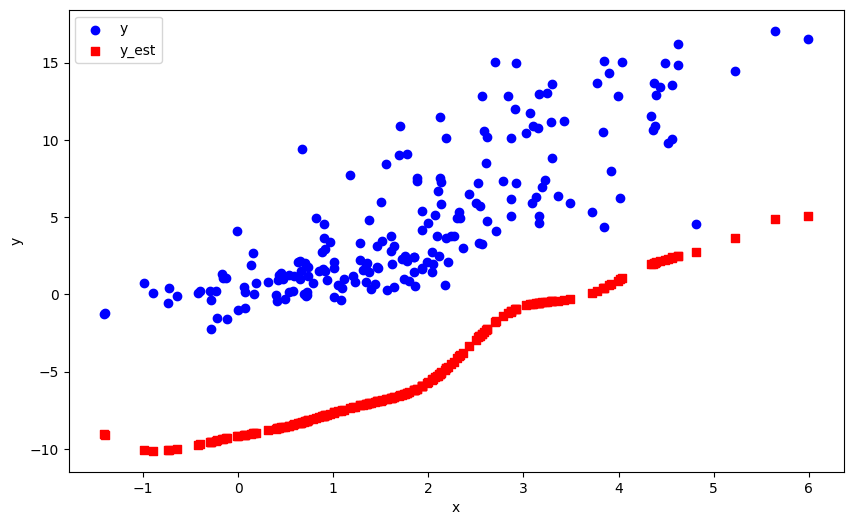

The programm is closed


In [12]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.01, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

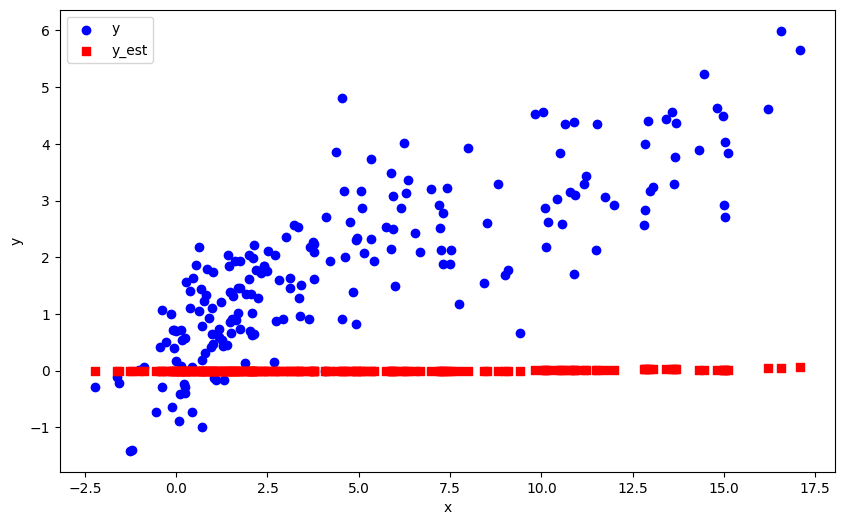

The programm is closed


In [14]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

#### Cov = 0.8

In [18]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.8, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=5, size=200)
true_x = x + epsilon1
y = np.array([x**2 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.90310407 0.73253324]
 [0.73253324 0.93440044]]
covariance:             x          y
x   2.794692  10.661694
y  10.661694  54.073708


  0%|          | 0/50000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 5.707531030844996
	 mle: 6.247399301155156
	 mse: 56.40923831274812
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	structure loss: 0.0
	Sigma: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	alpha: tensor([[ 3.9570e-03,  1.4989e-02,  2.1493e-02, -5.0211e-03, -5.5905e-03,
         -4.4238e-03, -5.0235e-03, -4.4922e-03, -5.9392e-03, -5.6675e-03,
         -6.3092e-03,  2.0596e-02, -5.4599e-04,  1.5838e-02, -5.8754e-03,
         -4.2814e-03,  2.0787e-02, -4.5486e-03, -4.0716e-03,  2.0211e-03,
          1.6765e-02, -2.9673e-03, -2.9348e-03, -5.6486e-03, -1.0188e-03,
         -4.4538e-03, -3.7309e-03, -1.7318e-03, -4.9135e

  0%|          | 3/50000.0 [00:04<23:01:18,  1.66s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.014233701978414892
	score(model): 5.606242893043003
	 mle: 5.846033991227979
	 mse: 69.89734102309681
	W1: tensor([[1.0000e-04, 2.4968e+00],
        [4.7614e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014233701978414892
	W2: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	structure loss: 0.0
	Sigma: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	alpha: tensor([[ 8.1143e-04, -5.9109e-04,  7.9737e-04, -6.1555e-05, -4.5030e-05,
         -2.8159e-04, -1.0893e-04,  3.0391e-04, -1.0320e-04,  2.2178e-04,
          1.0208e-05, -1.8537e-03, -4.5741e-04, -9.8356e-04,  3.2880e-04,
         -3.0018e-04, -1.8010e-03, -9.1998e-04,  1.2004e-03, -4.8503e-05,
          7.3092e-04,  7.1136e-04, -2.6120e-05, -7.9485e-05, -5.4637e-05,
         -9.1140e-05,  1.1249e-03, -3.2436e-04, -1.5169e-04,  7.7196e-04,
         -1.4373e-03, -8.7870e-04, -1.9579e-04, -1.0987e-03, -1.00

  0%|          | 4/50000.0 [00:09<35:27:39,  2.55s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.014072198992287621
	score(model): 5.605669881353044
	 mle: 5.841719986438585
	 mse: 75.18292569968929
	W1: tensor([[1.0000e-04, 2.5947e+00],
        [4.5559e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014072198992287621
	W2: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	structure loss: 0.0
	Sigma: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	alpha: tensor([[-3.2442e-04,  1.3292e-03, -7.2494e-04, -3.7722e-05, -5.0929e-05,
         -2.5409e-04, -2.3949e-05,  6.4319e-05, -8.2167e-05, -4.1405e-05,
         -3.5138e-07,  7.0538e-04,  8.9188e-05,  1.3887e-03, -3.4695e-05,
          7.8330e-05,  6.3944e-04,  5.1804e-05,  5.4842e-05,  5.3490e-05,
         -6.7483e-04, -6.4529e-05,  4.5848e-05, -6.3238e-05,  5.8981e-05,
         -2.1471e-05,  6.6851e-05,  1.5791e-05, -4.5303e-05, -1.7014e-04,
          3.1638e-04, -2.8232e-05,  1.4262e-04,  4.9920e-05,  1.93

  0%|          | 5/50000.0 [00:13<44:07:35,  3.18s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 3000
	h(W(model)): 0.014085039188314052
	score(model): 5.605645677584644
	 mle: 5.841344977260721
	 mse: 75.92364929907642
	W1: tensor([[1.0000e-04, 2.5966e+00],
        [4.5545e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014085039188314052
	W2: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	structure loss: 0.0
	Sigma: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]])
	alpha: tensor([[-1.9143e-03,  6.4514e-03, -3.4347e-03,  3.8196e-04,  3.3596e-04,
         -2.5127e-04, -1.9398e-05,  3.2697e-04, -4.8078e-04, -4.7470e-05,
         -3.3881e-05,  3.8256e-03,  6.0219e-04,  6.8024e-03, -3.7799e-05,
         -1.6846e-05,  3.5146e-03,  4.6496e-05,  2.6309e-04,  2.3141e-04,
         -3.6042e-03, -1.9138e-04, -6.4795e-05, -4.1973e-04,  3.5132e-04,
          2.9922e-04,  1.8493e-04, -3.6535e-04, -5.3338e-05, -1.0470e-03,
          1.9673e-03,  2.6954e-04,  1.8957e-04,  9.0971e-05,  7.75

  0%|          | 6/50000.0 [00:18<48:06:34,  3.46s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.01407556906914098
	score(model): 5.605627217624591
	 mle: 5.83777382834562
	 mse: 76.09252421565688
	W1: tensor([[1.0000e-04, 2.5982e+00],
        [4.5503e-02, 1.0000e-04]])
	cycle loss: 0.01407556906914098
	W2: tensor([[2.7947e+00, 4.6165e-02],
        [4.6165e-02, 5.4074e+01]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7863e+00, 4.3592e-02],
        [4.3592e-02, 5.3912e+01]], grad_fn=<MmBackward0>)
Check M:  tensor([[9.7838e-02, 0.0000e+00],
        [2.7972e-03, 1.0952e+01]])
Check y:  tensor([-6.3624, -8.4204, -8.0865, -3.7075,  2.4010,  5.0889,  5.0394,  3.1594,
         3.5261,  4.6662, -2.5055, -6.4173, -3.2107, -6.4273,  5.0841, -2.1665,
        -6.7104, -2.3704, -0.1147, -2.2750, -8.8598,  0.0807,  2.1079,  1.3885,
        -2.8656,  1.6902, -1.3728, -6.6219,  4.9551, -6.9029, -7.2762, -6.5347,
        -3.7289, -2.7922, -0.6445, -8.4577, -8.4730, -4.5714, -6.0709, -0.1981,
        -5.

  0%|          | 7/50000.0 [00:21<47:22:36,  3.41s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 5000
	h(W(model)): 0.01407556906914098
	score(model): 0.9086316944014786
	 mle: 5.627741664677147
	 mse: 76.09252421565688
	W1: tensor([[1.0000e-04, 2.5982e+00],
        [4.5503e-02, 1.0000e-04]])
	cycle loss: 0.01407556906914098
	W2: tensor([[1.4074, 0.1508],
        [0.1508, 7.3185]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.4074, 0.1509],
        [0.1509, 7.3113]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.1691e-04,  0.0000e+00],
        [-3.2633e-05,  1.2042e+00]])
Check y:  tensor([-6.3624, -8.4204, -8.0865, -3.7075,  2.4010,  5.0889,  5.0394,  3.1594,
         3.5261,  4.6662, -2.5055, -6.4173, -3.2107, -6.4273,  5.0841, -2.1665,
        -6.7104, -2.3704, -0.1147, -2.2750, -8.8598,  0.0807,  2.1079,  1.3885,
        -2.8656,  1.6902, -1.3728, -6.6219,  4.9551, -6.9029, -7.2762, -6.5347,
        -3.7289, -2.7922, -0.6445, -8.4577, -8.4730, -4.5714, -6.0709, -0.1981,
        -5.2739, -7.6253,  5.0894, -7

  0%|          | 8/50000.0 [00:24<45:47:36,  3.30s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 6000
	h(W(model)): 0.01407556906914098
	score(model): 0.7052815885309948
	 mle: 6.883226120447537
	 mse: 76.09252421565688
	W1: tensor([[1.0000e-04, 2.5982e+00],
        [4.5503e-02, 1.0000e-04]])
	cycle loss: 0.01407556906914098
	W2: tensor([[1.3667, 0.2497],
        [0.2497, 4.0291]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3667, 0.2497],
        [0.2497, 4.0281]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 7.0343e-05,  0.0000e+00],
        [-4.4713e-06,  1.6817e-01]])
Check y:  tensor([-6.3624, -8.4204, -8.0865, -3.7075,  2.4010,  5.0889,  5.0394,  3.1594,
         3.5261,  4.6662, -2.5055, -6.4173, -3.2107, -6.4273,  5.0841, -2.1665,
        -6.7104, -2.3704, -0.1147, -2.2750, -8.8598,  0.0807,  2.1079,  1.3885,
        -2.8656,  1.6902, -1.3728, -6.6219,  4.9551, -6.9029, -7.2762, -6.5347,
        -3.7289, -2.7922, -0.6445, -8.4577, -8.4730, -4.5714, -6.0709, -0.1981,
        -5.2739, -7.6253,  5.0894, -7

  0%|          | 9/50000.0 [00:27<45:30:49,  3.28s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 7000
	h(W(model)): 0.01407556906914098
	score(model): 0.7045099710594299
	 mle: 6.903577930956457
	 mse: 76.09252421565688
	W1: tensor([[1.0000e-04, 2.5982e+00],
        [4.5503e-02, 1.0000e-04]])
	cycle loss: 0.01407556906914098
	W2: tensor([[1.3574, 0.2968],
        [0.2968, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3574, 0.2968],
        [0.2968, 4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.4942e-06,  0.0000e+00],
        [ 9.8115e-03,  1.5195e-01]])
Check y:  tensor([-6.3624, -8.4204, -8.0865, -3.7075,  2.4010,  5.0889,  5.0394,  3.1594,
         3.5261,  4.6662, -2.5055, -6.4173, -3.2107, -6.4273,  5.0841, -2.1665,
        -6.7104, -2.3704, -0.1147, -2.2750, -8.8598,  0.0807,  2.1079,  1.3885,
        -2.8656,  1.6902, -1.3728, -6.6219,  4.9551, -6.9029, -7.2762, -6.5347,
        -3.7289, -2.7922, -0.6445, -8.4577, -8.4730, -4.5714, -6.0709, -0.1981,
        -5.2739, -7.6253,  5.0894, -7

  0%|          | 10/50000.0 [00:30<44:04:18,  3.17s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 7999
	h(W(model)): 0.01407556906914098
	score(model): 0.7045282632085855
	 mle: 6.902735305971919
	 mse: 76.09252421565688
	W1: tensor([[1.0000e-04, 2.5982e+00],
        [4.5503e-02, 1.0000e-04]])
	cycle loss: 0.01407556906914098
	W2: tensor([[1.3574, 0.2972],
        [0.2972, 4.0012]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]], grad_fn=<MmBackward0>)
Check M:  tensor([[7.9910e-07, 0.0000e+00],
        [9.8930e-03, 1.5230e-01]])
Check y:  tensor([-6.3624, -8.4204, -8.0865, -3.7075,  2.4010,  5.0889,  5.0394,  3.1594,
         3.5261,  4.6662, -2.5055, -6.4173, -3.2107, -6.4273,  5.0841, -2.1665,
        -6.7104, -2.3704, -0.1147, -2.2750, -8.8598,  0.0807,  2.1079,  1.3885,
        -2.8656,  1.6902, -1.3728, -6.6219,  4.9551, -6.9029, -7.2762, -6.5347,
        -3.7289, -2.7922, -0.6445, -8.4577, -8.4730, -4.5714, -6.0709, -0.1981,
        -5.2739, -7.6253,  5.0894, -7.860

  0%|          | 13/50000.0 [00:34<30:41:10,  2.21s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.011498574511981108
	score(model): 0.3122541929054995
	 mle: 6.01313903384372
	 mse: 105.85544254024728
	W1: tensor([[1.0000e-04, 3.7487e+00],
        [2.8523e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.011498574511981108
	W2: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]])
	structure loss: 0.0
	Sigma: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]])
	alpha: tensor([[-9.3229e-04,  1.4707e-04,  1.1710e-03, -5.1263e-04, -6.4876e-04,
          2.7275e-04, -4.6357e-04, -7.3904e-04,  6.1323e-04,  1.9434e-04,
         -2.2436e-04, -6.3772e-04, -9.5348e-04,  1.0222e-04, -3.8048e-04,
          4.2545e-04, -6.3912e-04,  3.9840e-04, -6.7632e-04,  2.0050e-03,
          2.2824e-03,  2.3999e-04,  1.5411e-03,  7.5599e-04, -2.3220e-03,
         -3.7149e-04, -1.1785e-04,  1.2868e-03,  7.7648e-04,  3.2268e-04,
         -5.5678e-04, -2.9978e-04,  5.6756e-04,  3.6129e-04, -1.0099e-04,
         -3.9386e-04, 

  0%|          | 14/50000.0 [00:38<36:08:05,  2.60s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.011145294338542833
	score(model): 0.311873565624034
	 mle: 6.012491146999004
	 mse: 114.23900904330173
	W1: tensor([[1.0000e-04, 3.7620e+00],
        [2.7984e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.011145294338542833
	W2: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]])
	structure loss: 0.0
	Sigma: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]])
	alpha: tensor([[-2.5024e-05,  6.4713e-06, -4.4319e-06,  5.3689e-06, -1.3641e-05,
         -7.3566e-05,  9.3707e-06, -1.9445e-06, -7.8008e-05, -1.1244e-05,
          4.2406e-05,  8.5161e-06,  1.2907e-05,  3.5880e-06,  1.9347e-06,
          3.3332e-05,  9.0959e-06,  2.1537e-05,  1.6647e-05, -1.5130e-05,
         -2.6877e-06, -4.2806e-05, -3.7827e-05, -5.9779e-05,  1.3141e-05,
          9.5033e-06, -8.7981e-07, -5.8062e-06, -1.3305e-05, -1.6941e-05,
          9.6345e-06,  5.8254e-06,  8.2762e-05,  2.8280e-05,  7.8363e-07,
          1.2588e-06, 

  0%|          | 15/50000.0 [00:43<41:54:28,  3.02s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 3000
	h(W(model)): 0.011003047377426523
	score(model): 0.3115689604719347
	 mle: 6.0092425367619775
	 mse: 116.29595806083215
	W1: tensor([[1.0000e-04, 3.7636e+00],
        [2.7795e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.011003047377426523
	W2: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]])
	structure loss: 0.0
	Sigma: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]])
	alpha: tensor([[-1.9713e-06,  6.2219e-07,  1.9478e-07, -6.4580e-06, -2.6613e-05,
         -8.0528e-05,  8.1717e-06,  5.6439e-06, -7.6450e-05, -1.2201e-05,
          2.9054e-05,  3.8679e-06,  6.2876e-06, -2.4656e-07,  1.1493e-06,
          3.5316e-05,  4.2091e-06,  1.9689e-05,  1.8892e-05,  2.8672e-06,
          6.3992e-07, -5.2218e-05, -3.6263e-06, -5.6323e-05,  1.3828e-06,
          1.0909e-06,  1.5879e-05, -1.0158e-07, -2.3185e-05, -1.8052e-06,
          4.7273e-06,  3.1324e-06,  8.7763e-05,  2.3657e-05,  2.3369e-06,
         -2.1329e-07

  0%|          | 16/50000.0 [00:47<45:45:54,  3.30s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.010930896220145314
	score(model): 0.3113681762370616
	 mle: 6.0090045782088675
	 mse: 116.73901930903627
	W1: tensor([[1.0000e-04, 3.7651e+00],
        [2.7693e-02, 1.0000e-04]])
	cycle loss: 0.010930896220145314
	W2: tensor([[1.3574, 0.2972],
        [0.2972, 4.0013]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.3595, 0.2965],
        [0.2965, 3.9950]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0353,  0.0000],
        [ 0.0354,  0.1933]])
Check y:  tensor([-11.1854, -13.3063, -12.9240,  -6.9260,   1.3674,   5.5526,   4.4983,
          1.8738,   2.1229,   7.3688,  -5.2289, -11.2387,  -6.1597, -11.2482,
          4.8410,  -4.8184, -11.4983,  -5.0637,  -2.1797,  -4.9485, -13.9225,
         -1.8861,   1.1141,   0.2092,  -5.6861,   0.6382,  -3.8664, -11.4237,
          4.1257, -11.6535, -11.9646, -11.3473,  -6.9616,  -5.5905,  -2.9300,
        -13.3466, -13.3632,  -8.4767, -10.8713,  -2.3022, 

  0%|          | 17/50000.0 [00:50<44:58:14,  3.24s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 5000
	h(W(model)): 0.010930896220145314
	score(model): 0.3061195172159399
	 mle: 5.901696904745981
	 mse: 116.73901930903627
	W1: tensor([[1.0000e-04, 3.7651e+00],
        [2.7693e-02, 1.0000e-04]])
	cycle loss: 0.010930896220145314
	W2: tensor([[ 1.8041, -0.0233],
        [-0.0233,  4.0012]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.8041, -0.0233],
        [-0.0233,  4.0013]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.4206e-04,  0.0000e+00],
        [-1.0461e-03,  2.0745e-01]])
Check y:  tensor([-11.1854, -13.3063, -12.9240,  -6.9260,   1.3674,   5.5526,   4.4983,
          1.8738,   2.1229,   7.3688,  -5.2289, -11.2387,  -6.1597, -11.2482,
          4.8410,  -4.8184, -11.4983,  -5.0637,  -2.1797,  -4.9485, -13.9225,
         -1.8861,   1.1141,   0.2092,  -5.6861,   0.6382,  -3.8664, -11.4237,
          4.1257, -11.6535, -11.9646, -11.3473,  -6.9616,  -5.5905,  -2.9300,
        -13.3466, -13.3632,  -8.476

  0%|          | 18/50000.0 [00:54<45:39:09,  3.29s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 6000
	h(W(model)): 0.010930896220145314
	score(model): 0.30609976136394684
	 mle: 5.90201736757346
	 mse: 116.73901930903627
	W1: tensor([[1.0000e-04, 3.7651e+00],
        [2.7693e-02, 1.0000e-04]])
	cycle loss: 0.010930896220145314
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  4.0005]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.8016, -0.0206],
        [-0.0206,  4.0006]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.3955e-07,  0.0000e+00],
        [-7.9322e-04,  2.0733e-01]])
Check y:  tensor([-11.1854, -13.3063, -12.9240,  -6.9260,   1.3674,   5.5526,   4.4983,
          1.8738,   2.1229,   7.3688,  -5.2289, -11.2387,  -6.1597, -11.2482,
          4.8410,  -4.8184, -11.4983,  -5.0637,  -2.1797,  -4.9485, -13.9225,
         -1.8861,   1.1141,   0.2092,  -5.6861,   0.6382,  -3.8664, -11.4237,
          4.1257, -11.6535, -11.9646, -11.3473,  -6.9616,  -5.5905,  -2.9300,
        -13.3466, -13.3632,  -8.476

  0%|          | 19/50000.0 [00:57<44:43:11,  3.22s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 7000
	h(W(model)): 0.010930896220145314
	score(model): 0.30609140255872763
	 mle: 5.902341825082023
	 mse: 116.73901930903627
	W1: tensor([[1.0000e-04, 3.7651e+00],
        [2.7693e-02, 1.0000e-04]])
	cycle loss: 0.010930896220145314
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.8574e-09,  0.0000e+00],
        [ 7.3903e-04, -1.9274e-01]])
Check y:  tensor([-11.1854, -13.3063, -12.9240,  -6.9260,   1.3674,   5.5526,   4.4983,
          1.8738,   2.1229,   7.3688,  -5.2289, -11.2387,  -6.1597, -11.2482,
          4.8410,  -4.8184, -11.4983,  -5.0637,  -2.1797,  -4.9485, -13.9225,
         -1.8861,   1.1141,   0.2092,  -5.6861,   0.6382,  -3.8664, -11.4237,
          4.1257, -11.6535, -11.9646, -11.3473,  -6.9616,  -5.5905,  -2.9300,
        -13.3466, -13.3632,  -8.47

  0%|          | 20/50000.0 [01:00<45:19:43,  3.26s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 7999
	h(W(model)): 0.010930896220145314
	score(model): 0.30608838358452733
	 mle: 5.902351367370969
	 mse: 116.73901930903627
	W1: tensor([[1.0000e-04, 3.7651e+00],
        [2.7693e-02, 1.0000e-04]])
	cycle loss: 0.010930896220145314
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.5435e-10,  0.0000e+00],
        [ 7.3892e-04, -1.9273e-01]])
Check y:  tensor([-11.1854, -13.3063, -12.9240,  -6.9260,   1.3674,   5.5526,   4.4983,
          1.8738,   2.1229,   7.3688,  -5.2289, -11.2387,  -6.1597, -11.2482,
          4.8410,  -4.8184, -11.4983,  -5.0637,  -2.1797,  -4.9485, -13.9225,
         -1.8861,   1.1141,   0.2092,  -5.6861,   0.6382,  -3.8664, -11.4237,
          4.1257, -11.6535, -11.9646, -11.3473,  -6.9616,  -5.5905,  -2.9300,
        -13.3466, -13.3632,  -8.47

  0%|          | 22/50000.0 [01:04<37:43:59,  2.72s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0038362987496625145
	score(model): 0.154798737077872
	 mle: 6.037678099439586
	 mse: 117.21034485715879
	W1: tensor([[1.0000e-04, 3.9431e+00],
        [1.5693e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0038362987496625145
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]])
	structure loss: 0.0
	Sigma: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]])
	alpha: tensor([[-1.2158e-03, -3.2434e-04,  1.1219e-03,  1.8074e-04,  8.1922e-05,
          3.7953e-04, -1.7068e-04,  8.4990e-04, -5.0431e-05, -9.3596e-05,
          3.3367e-05,  4.4485e-03,  5.6700e-05,  3.4667e-04, -2.3346e-04,
         -1.1319e-03,  4.5519e-03, -1.1654e-03,  2.2301e-03, -5.7441e-04,
         -3.6040e-03, -5.8542e-04,  1.0173e-03, -7.9354e-05,  1.0755e-04,
          2.5970e-04,  2.3574e-03, -3.4588e-04,  2.8586e-04, -1.4451e-03,
          4.7972e-03,  4.5650e-03, -2.5224e-04, -1.1181e-03, -3.3767e-04,
          2

  0%|          | 23/50000.0 [01:08<43:22:57,  3.12s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0033931288615591804
	score(model): 0.1549023434304558
	 mle: 6.059500513689345
	 mse: 121.50041721941813
	W1: tensor([[1.0000e-04, 4.0819e+00],
        [1.4258e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0033931288615591804
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]])
	structure loss: 0.0
	Sigma: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]])
	alpha: tensor([[-8.5189e-07, -1.4202e-05, -9.8429e-06,  4.3733e-06, -3.8538e-06,
         -9.9641e-06,  5.8388e-06,  4.4479e-06, -2.8817e-05, -1.6058e-07,
          7.3468e-06, -1.5167e-05,  1.1741e-05, -1.2832e-05, -5.4120e-07,
          5.5449e-06, -1.5188e-05,  6.3895e-06,  4.7827e-06,  1.3922e-05,
          1.4225e-05, -1.4997e-05, -1.5660e-05, -2.1426e-05,  6.3322e-06,
          3.7152e-06, -1.1282e-05, -5.9919e-06, -1.2358e-05,  4.0273e-06,
         -1.5825e-05, -1.7518e-05,  2.2690e-05,  9.7795e-06, -8.7546e-06,
         -

  0%|          | 24/50000.0 [01:13<46:47:15,  3.37s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 3000
	h(W(model)): 0.003298313968616906
	score(model): 0.15494548421183973
	 mle: 6.065005911549299
	 mse: 121.93207746938313
	W1: tensor([[1.0000e-04, 4.1079e+00],
        [1.3969e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003298313968616906
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]])
	structure loss: 0.0
	Sigma: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]])
	alpha: tensor([[ 5.6991e-07,  2.0467e-06, -7.6245e-06,  2.7895e-06, -4.9999e-06,
         -1.5426e-05,  1.8735e-06,  9.3250e-07, -2.8672e-05, -2.3747e-06,
          9.3958e-06, -4.6146e-06,  8.1657e-07,  1.4123e-06, -1.5798e-06,
          9.7684e-06, -4.3272e-06,  5.9037e-06,  6.5213e-06, -2.6768e-06,
         -3.5389e-06, -1.9606e-05,  6.9768e-07, -2.0691e-05,  1.9177e-06,
          1.6463e-06,  2.3575e-06, -2.4739e-06, -1.3531e-05, -3.9100e-06,
         -3.1003e-06, -3.1046e-06,  3.0124e-05,  7.2920e-06, -3.7116e-06,
         -4

  0%|          | 25/50000.0 [01:17<50:46:24,  3.66s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.0032513682085166806
	score(model): 0.1549450967788388
	 mle: 6.06369198489114
	 mse: 121.64084784443313
	W1: tensor([[1.0000e-04, 4.1151e+00],
        [1.3845e-02, 1.0000e-04]])
	cycle loss: 0.0032513682085166806
	W2: tensor([[ 1.8016, -0.0206],
        [-0.0206,  3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.8043, -0.0216],
        [-0.0216,  4.0060]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0114,  0.0000],
        [ 0.0013, -0.0932]])
Check y:  tensor([-11.7563, -14.0810, -13.6696,  -7.1411,   1.5147,   6.1679,   4.7999,
          1.9274,   2.1252,   8.3433,  -5.3700, -11.8088,  -6.3190, -11.8182,
          5.2431,  -4.9678, -12.0633,  -5.2073,  -2.3518,  -5.0945, -14.8216,
         -2.0424,   1.2682,   0.2741,  -5.8289,   0.7565,  -4.0475, -11.9901,
          4.3248, -12.2182, -12.5517, -11.9153,  -7.1799,  -5.7318,  -3.1224,
        -14.1241, -14.1421,  -8.8595, -11.4423,  

  0%|          | 26/50000.0 [01:20<48:40:14,  3.51s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 5000
	h(W(model)): 0.0032513682085166806
	score(model): 0.15437913635499326
	 mle: 6.043671985828124
	 mse: 121.64084784443313
	W1: tensor([[1.0000e-04, 4.1151e+00],
        [1.3845e-02, 1.0000e-04]])
	cycle loss: 0.0032513682085166806
	W2: tensor([[ 2.2112, -0.0585],
        [-0.0585,  4.0005]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.2112, -0.0586],
        [-0.0586,  4.0006]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.3604e-05,  0.0000e+00],
        [-1.0556e-03,  1.0675e-01]])
Check y:  tensor([-11.7563, -14.0810, -13.6696,  -7.1411,   1.5147,   6.1679,   4.7999,
          1.9274,   2.1252,   8.3433,  -5.3700, -11.8088,  -6.3190, -11.8182,
          5.2431,  -4.9678, -12.0633,  -5.2073,  -2.3518,  -5.0945, -14.8216,
         -2.0424,   1.2682,   0.2741,  -5.8289,   0.7565,  -4.0475, -11.9901,
          4.3248, -12.2182, -12.5517, -11.9153,  -7.1799,  -5.7318,  -3.1224,
        -14.1241, -14.1421,  -8

  4%|▍         | 2026/50000.0 [01:23<04:52, 163.96it/s]


 freeze theta, update Sigma

mu 0.025

Inner iteration 6000
	h(W(model)): 0.0032513682085166806
	score(model): 0.15437920498422017
	 mle: 6.043771578351096
	 mse: 121.64084784443313
	W1: tensor([[1.0000e-04, 4.1151e+00],
        [1.3845e-02, 1.0000e-04]])
	cycle loss: 0.0032513682085166806
	W2: tensor([[ 2.2101, -0.0584],
        [-0.0584,  4.0005]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.2101, -0.0584],
        [-0.0584,  4.0004]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.3475e-07,  0.0000e+00],
        [-1.0495e-03,  1.0675e-01]])
Check y:  tensor([-11.7563, -14.0810, -13.6696,  -7.1411,   1.5147,   6.1679,   4.7999,
          1.9274,   2.1252,   8.3433,  -5.3700, -11.8088,  -6.3190, -11.8182,
          5.2431,  -4.9678, -12.0633,  -5.2073,  -2.3518,  -5.0945, -14.8216,
         -2.0424,   1.2682,   0.2741,  -5.8289,   0.7565,  -4.0475, -11.9901,
          4.3248, -12.2182, -12.5517, -11.9153,  -7.1799,  -5.7318,  -3.1224,
        -14.1241, -14.1421,  -8

  4%|▍         | 2032/50000.0 [01:43<15:54, 50.26it/s] 


 freeze theta, update Sigma

mu 0.0125

Inner iteration 5000
	h(W(model)): 0.0007451198123717973
	score(model): 0.07773999553138952
	 mle: 6.158706843529597
	 mse: 123.28824190844297
	W1: tensor([[1.0000e-04, 4.3085e+00],
        [6.3344e-03, 1.0000e-04]])
	cycle loss: 0.0007451198123717973
	W2: tensor([[ 2.4974, -0.0159],
        [-0.0159,  4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.4974, -0.0159],
        [-0.0159,  3.9998]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.7247e-05,  0.0000e+00],
        [-1.3610e-04,  5.3557e-02]])
Check y:  tensor([-11.9672, -14.2389, -13.8558,  -7.1901,   1.5551,   6.4632,   4.8373,
          1.8468,   1.9815,   8.9236,  -5.4174, -12.0146,  -6.3453, -12.0230,
          5.3626,  -5.0390, -12.2399,  -5.2635,  -2.5137,  -5.1575, -15.0000,
         -2.1948,   1.3291,   0.2856,  -5.8591,   0.8040,  -4.1799, -12.1755,
          4.2798, -12.3774, -12.6957, -12.1095,  -7.2306,  -5.7645,  -3.2885,
        -14.2782, -14.2948,  -

  8%|▊         | 4032/50000.0 [01:46<05:51, 130.74it/s]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 6000
	h(W(model)): 0.0007451198123717973
	score(model): 0.07774001254839064
	 mle: 6.158681355160278
	 mse: 123.28824190844297
	W1: tensor([[1.0000e-04, 4.3085e+00],
        [6.3344e-03, 1.0000e-04]])
	cycle loss: 0.0007451198123717973
	W2: tensor([[ 2.4957, -0.0158],
        [-0.0158,  4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.4957, -0.0158],
        [-0.0158,  3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.1521e-08,  0.0000e+00],
        [-1.3422e-04,  5.3558e-02]])
Check y:  tensor([-11.9672, -14.2389, -13.8558,  -7.1901,   1.5551,   6.4632,   4.8373,
          1.8468,   1.9815,   8.9236,  -5.4174, -12.0146,  -6.3453, -12.0230,
          5.3626,  -5.0390, -12.2399,  -5.2635,  -2.5137,  -5.1575, -15.0000,
         -2.1948,   1.3291,   0.2856,  -5.8591,   0.8040,  -4.1799, -12.1755,
          4.2798, -12.3774, -12.6957, -12.1095,  -7.2306,  -5.7645,  -3.2885,
        -14.2782, -14.2948,  -

  8%|▊         | 4037/50000.0 [02:03<12:05, 63.31it/s] 


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 0.00019699171622855616
	score(model): 0.03902038639771758
	 mle: 6.207931004485653
	 mse: 122.29411863383582
	W1: tensor([[1.0000e-04, 4.3370e+00],
        [3.2358e-03, 1.0000e-04]])
	cycle loss: 0.00019699171622855616
	W2: tensor([[ 2.4957, -0.0158],
        [-0.0158,  3.9999]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 2.4995, -0.0146],
        [-0.0146,  4.0059]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0007,  0.0000],
        [-0.0002, -0.0232]])
Check y:  tensor([-11.9362, -14.1620, -13.7699,  -7.1132,   1.6041,   6.5673,   4.8754,
          1.8561,   1.9735,   9.1219,  -5.3592, -11.9818,  -6.2707, -11.9899,
          5.4213,  -4.9906, -12.1949,  -5.2092,  -2.4893,  -5.1061, -14.9127,
         -2.1673,   1.3894,   0.3489,  -5.7913,   0.8706,  -4.1513, -12.1347,
          4.2974, -12.3223, -12.6200, -12.0724,  -7.1540,  -5.6985,  -3.2674,
        -14.2018, -14.2185,  -8.9569, -11.6

  8%|▊         | 4038/50000.0 [02:07<13:50, 55.33it/s]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 5000
	h(W(model)): 0.00019699171622855616
	score(model): 0.03900873195663046
	 mle: 6.208869699733677
	 mse: 122.29411863383582
	W1: tensor([[1.0000e-04, 4.3370e+00],
        [3.2358e-03, 1.0000e-04]])
	cycle loss: 0.00019699171622855616
	W2: tensor([[2.6288, 0.0258],
        [0.0258, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6288, 0.0258],
        [0.0258, 4.0000]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.4466e-06,  0.0000e+00],
        [-9.3407e-05, -2.3198e-02]])
Check y:  tensor([-11.9362, -14.1620, -13.7699,  -7.1132,   1.6041,   6.5673,   4.8754,
          1.8561,   1.9735,   9.1219,  -5.3592, -11.9818,  -6.2707, -11.9899,
          5.4213,  -4.9906, -12.1949,  -5.2092,  -2.4893,  -5.1061, -14.9127,
         -2.1673,   1.3894,   0.3489,  -5.7913,   0.8706,  -4.1513, -12.1347,
          4.2974, -12.3223, -12.6200, -12.0724,  -7.1540,  -5.6985,  -3.2674,
        -14.2018, -14.2185,  -8.956

  8%|▊         | 4044/50000.0 [02:24<27:01, 28.35it/s]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 8.399178013007713e-05
	score(model): 0.019859991709812244
	 mle: 6.327288339384925
	 mse: 121.41616072463421
	W1: tensor([[1.0000e-04, 3.9294e+00],
        [2.3320e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.399178013007713e-05
	W2: tensor([[2.6296, 0.0258],
        [0.0258, 4.0001]])
	structure loss: 0.0
	Sigma: tensor([[2.6296, 0.0258],
        [0.0258, 4.0001]])
	alpha: tensor([[-3.5848e-06, -1.7710e-07, -6.0126e-06,  2.1999e-06,  8.7611e-06,
         -1.8989e-06, -2.8571e-06, -6.6520e-06,  9.6908e-06, -4.5996e-07,
          9.8021e-06, -3.2167e-05,  6.8420e-06, -3.2772e-06, -2.7723e-06,
         -9.0759e-08, -3.3020e-05,  2.5445e-06, -1.3325e-05, -3.0659e-06,
          2.9550e-05, -1.1941e-06,  4.2206e-06,  5.6917e-06,  6.7709e-06,
         -3.3330e-06, -1.0176e-05,  8.5617e-06, -3.5320e-07, -3.8755e-06,
         -3.5138e-05, -3.3420e-05, -6.0850e-06,  2.3838e-06,  8.2249e-07,
         -2.0

  8%|▊         | 4045/50000.0 [02:29<31:35, 24.25it/s]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 7.475234902543093e-05
	score(model): 0.01961590931691081
	 mle: 6.252189799722316
	 mse: 121.55488348856875
	W1: tensor([[1.0000e-04, 4.0250e+00],
        [2.1477e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.475234902543093e-05
	W2: tensor([[2.6296, 0.0258],
        [0.0258, 4.0001]])
	structure loss: 0.0
	Sigma: tensor([[2.6296, 0.0258],
        [0.0258, 4.0001]])
	alpha: tensor([[-5.3664e-07, -9.8991e-08, -4.7351e-07, -7.5418e-08,  1.5714e-06,
         -7.3182e-08, -8.5064e-07,  3.6383e-07,  2.8667e-06,  2.9133e-07,
         -1.5788e-06, -4.3112e-07, -9.4475e-07, -3.3838e-07, -6.6919e-07,
         -1.2718e-06, -4.1096e-07, -6.6861e-07, -1.5530e-06, -1.2942e-06,
         -7.3538e-07,  1.9076e-06,  5.3743e-07,  1.4467e-06,  1.3186e-07,
         -1.3266e-06, -1.2343e-06,  8.4151e-07, -3.1719e-07,  1.2659e-07,
         -3.8709e-07, -4.6700e-07, -2.0223e-06, -1.0375e-06, -1.4730e-06,
         -6.89

  8%|▊         | 4049/50000.0 [02:43<52:49, 14.50it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 4.9999566210434665e-05
	score(model): 0.019539999474262573
	 mle: 6.23567610629703
	 mse: 122.04519240005422
	W1: tensor([[1.0000e-04, 4.3396e+00],
        [1.6291e-03, 1.0000e-04]])
	cycle loss: 4.9999566210434665e-05
	W2: tensor([[2.7019, 0.0550],
        [0.0550, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7019, 0.0550],
        [0.0550, 4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.3683e-09,  0.0000e+00],
        [ 1.1221e-04,  1.3400e-02]])
Check y:  tensor([-11.9345, -14.1273, -13.7283,  -7.0970,   1.5903,   6.5650,   4.8516,
          1.8233,   1.9334,   9.1480,  -5.3563, -11.9795,  -6.2583, -11.9874,
          5.4044,  -4.9925, -12.1874,  -5.2082,  -2.5012,  -5.1064, -14.8792,
         -2.1780,   1.3821,   0.3481,  -5.7832,   0.8690,  -4.1617, -12.1291,
          4.2665, -12.3099, -12.5951, -12.0684,  -7.1376,  -5.6915,  -3.2807,
        -14.1681, -14.1851,  -8.94

  8%|▊         | 4050/50000.0 [02:46<59:38, 12.84it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 8000
	h(W(model)): 4.9999566210434665e-05
	score(model): 0.01954035146216437
	 mle: 6.235696274508378
	 mse: 122.04519240005422
	W1: tensor([[1.0000e-04, 4.3396e+00],
        [1.6291e-03, 1.0000e-04]])
	cycle loss: 4.9999566210434665e-05
	W2: tensor([[2.7019, 0.0550],
        [0.0550, 4.0004]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7019, 0.0549],
        [0.0549, 4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.7546e-09, 0.0000e+00],
        [1.1231e-04, 1.3402e-02]])
Check y:  tensor([-11.9345, -14.1273, -13.7283,  -7.0970,   1.5903,   6.5650,   4.8516,
          1.8233,   1.9334,   9.1480,  -5.3563, -11.9795,  -6.2583, -11.9874,
          5.4044,  -4.9925, -12.1874,  -5.2082,  -2.5012,  -5.1064, -14.8792,
         -2.1780,   1.3821,   0.3481,  -5.7832,   0.8690,  -4.1617, -12.1291,
          4.2665, -12.3099, -12.5951, -12.0684,  -7.1376,  -5.6915,  -3.2807,
        -14.1681, -14.1851,  -8.9439, 

  8%|▊         | 4052/50000.0 [02:53<32:42, 23.41it/s]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 9999
	h(W(model)): 4.9999566210434665e-05
	score(model): 0.019539876219931415
	 mle: 6.23579672669176
	 mse: 122.04519240005422
	W1: tensor([[1.0000e-04, 4.3396e+00],
        [1.6291e-03, 1.0000e-04]])
	cycle loss: 4.9999566210434665e-05
	W2: tensor([[2.7019, 0.0549],
        [0.0549, 3.9998]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7019, 0.0549],
        [0.0549, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0980e-09,  0.0000e+00],
        [-9.7031e-05, -1.1596e-02]])
Check y:  tensor([-11.9345, -14.1273, -13.7283,  -7.0970,   1.5903,   6.5650,   4.8516,
          1.8233,   1.9334,   9.1480,  -5.3563, -11.9795,  -6.2583, -11.9874,
          5.4044,  -4.9925, -12.1874,  -5.2082,  -2.5012,  -5.1064, -14.8792,
         -2.1780,   1.3821,   0.3481,  -5.7832,   0.8690,  -4.1617, -12.1291,
          4.2665, -12.3099, -12.5951, -12.0684,  -7.1376,  -5.6915,  -3.2807,
        -14.1681, -14.1851,  -8.94

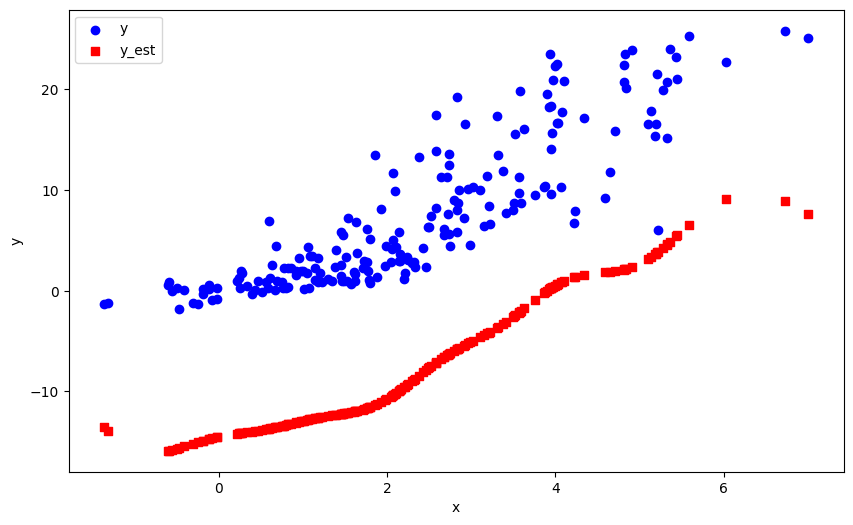

The programm is closed


In [19]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

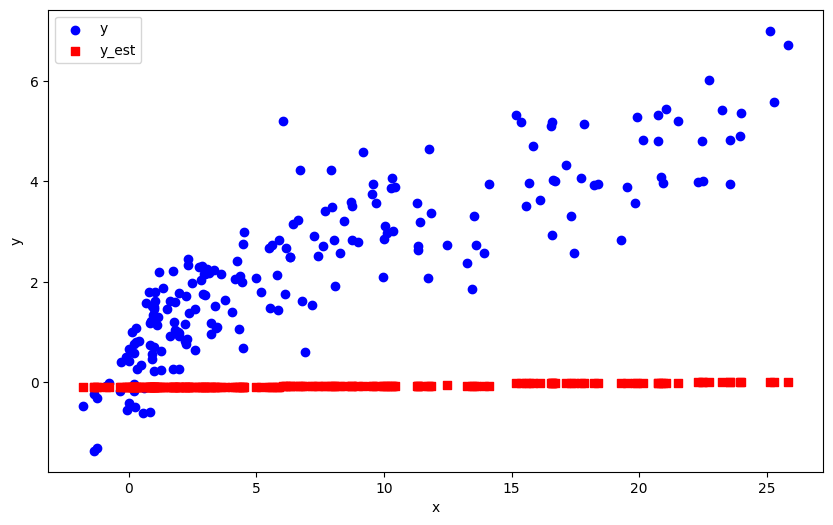

The programm is closed


In [20]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# quadratic: small scale

### Cov = 0

In [9]:
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=5, size=200)
true_x = x + epsilon1
y = np.array([0.5*(x**2) + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.91381789 0.02128811]
 [0.02128811 1.13306554]]
covariance:            x          y
x  3.272455   5.753116
y  5.753116  16.091762


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

 freeze Sigma, update theta

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 1.8045187159466978
	 mle: 5.084229280282759
	 mse: 19.02036473102107
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[3.2725e+00, 1.9455e-03],
        [1.9455e-03, 1.6092e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.2725e+00, 1.9455e-03],
        [1.9455e-03, 1.6092e+01]])
Check M:  None
Check y:  tensor([-2.8655, -0.8878,  1.8869,  2.0120,  2.5099,  0.2905,  2.9562, -3.2084,
         0.3176,  0.4930, -1.3834, -2.8574,  0.8306,  3.2483, -0.1132,  3.2190,
         3.2381,  0.1985,  0.7053,  2.9637, -2.3745, -3.2139,  0.3459, -3.2038,
        -1.0413,  2.9977, -1.9024,  0.4481, -0.1262,  0.0678, -3.1803,  0.7373,
        -1.6569,  2.0162, -2.4829,  3.1996, -0.5638, -3.1689,  3.0590,  1.6940,
        

  0%|          | 3/33000.0 [00:03<12:00:57,  1.31s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 1000
	h(W(model)): 0.013544455129848476
	score(model): 1.725170384618584
	 mle: 5.024211572406444
	 mse: 21.19864269361854
	W1: tensor([[1.0000e-04, 1.1482e+00],
        [1.0102e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013544455129848476
	W2: tensor([[3.2725e+00, 1.9455e-03],
        [1.9455e-03, 1.6092e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.2725e+00, 1.9455e-03],
        [1.9455e-03, 1.6092e+01]])
Check M:  None
Check y:  tensor([-2.5829e+00, -1.1707e+00,  4.6668e-01,  5.2782e-01,  2.2419e+00,
        -3.1584e-01,  2.0568e+00, -2.8891e+00, -3.0017e-01, -2.0250e-01,
        -1.6002e+00, -2.5789e+00, -2.8945e-02,  1.3895e+00,  2.8783e+00,
         1.8768e+00,  1.8569e+00, -3.7009e-01, -9.1490e-02,  1.1005e+00,
        -3.1835e+00, -2.8804e+00,  3.0196e+00, -2.8953e+00, -1.3034e+00,
         2.0346e+00, -3.2658e+00, -2.2695e-01, -3.6302e+00, -3.6609e+00,
        -2.7667e+00,  2.8301e+00, -1.8270e+00,  5.2990e

  0%|          | 4/33000.0 [00:08<20:44:11,  2.26s/it]


 freeze Sigma, update theta

mu 0.1

Inner iteration 2000
	h(W(model)): 0.013178532529733722
	score(model): 1.724921664270998
	 mle: 5.0254069858545005
	 mse: 21.14936742855735
	W1: tensor([[1.0000e-04, 1.1827e+00],
        [9.6741e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.013178532529733722
	W2: tensor([[3.2725e+00, 1.9455e-03],
        [1.9455e-03, 1.6092e+01]])
	structure loss: 0.0
	Sigma: tensor([[3.2725e+00, 1.9455e-03],
        [1.9455e-03, 1.6092e+01]])
Check M:  None
Check y:  tensor([-2.7218, -1.2786,  0.4085,  0.4721,  2.2407, -0.3980,  2.0423, -3.0344,
        -0.3819, -0.2814, -1.7193, -2.7177, -0.1030,  1.3638,  3.0307,  1.8556,
         1.8353, -0.4539, -0.1673,  1.0682, -3.3361, -3.0255,  3.0478, -3.0407,
        -1.4149,  2.0190, -3.4210, -0.3066, -3.7972, -3.8640, -2.9095,  2.8530,
        -1.9513,  0.4743, -2.5203,  1.2987, -3.6045, -2.8992,  1.9817,  2.5155,
        -3.5144,  0.0438, -0.2314, -0.7901, -3.4799, -3.8848,  0.8483, -0.4495,
        -1.2

  0%|          | 5/33000.0 [00:12<25:34:37,  2.79s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 3000
	h(W(model)): 0.013165375657271772
	score(model): 0.5380450979763988
	 mle: 4.6969348252209295
	 mse: 21.128141788035492
	W1: tensor([[1.0000e-04, 1.1849e+00],
        [9.6516e-02, 1.0000e-04]])
	cycle loss: 0.013165375657271772
	W2: tensor([[2.1906, 0.1360],
        [0.1360, 4.5523]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1901, 0.1361],
        [0.1361, 4.5448]], grad_fn=<MmBackward0>)
Check M:  tensor([[5.7393e-03, 0.0000e+00],
        [1.4208e-04, 8.2504e-01]])
Check y:  tensor([-2.7188e+00, -1.2752e+00,  4.1580e-01,  4.7941e-01,  2.2508e+00,
        -3.9121e-01,  2.0516e+00, -3.0327e+00, -3.7502e-01, -2.7421e-01,
        -1.7162e+00, -2.7147e+00, -9.5451e-02,  1.3747e+00,  3.0538e+00,
         1.8653e+00,  1.8451e+00, -4.4728e-01, -1.5982e-01,  1.0779e+00,
        -3.3333e+00, -3.0238e+00,  3.0592e+00, -3.0390e+00, -1.4117e+00,
         2.0283e+00, -3.4188e+00, -2.9944e-01, -3.7966e+00, -3.8659e+00,

  0%|          | 6/33000.0 [00:15<27:22:20,  2.99s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4000
	h(W(model)): 0.013165375657271772
	score(model): 0.4874136513821562
	 mle: 4.741988729108652
	 mse: 21.128141788035492
	W1: tensor([[1.0000e-04, 1.1849e+00],
        [9.6516e-02, 1.0000e-04]])
	cycle loss: 0.013165375657271772
	W2: tensor([[2.1128, 0.4661],
        [0.4661, 4.0002]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1128, 0.4659],
        [0.4659, 4.0002]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.5467e-05,  0.0000e+00],
        [ 5.4501e-02,  6.5591e-01]])
Check y:  tensor([-2.7188e+00, -1.2752e+00,  4.1580e-01,  4.7941e-01,  2.2508e+00,
        -3.9121e-01,  2.0516e+00, -3.0327e+00, -3.7502e-01, -2.7421e-01,
        -1.7162e+00, -2.7147e+00, -9.5451e-02,  1.3747e+00,  3.0538e+00,
         1.8653e+00,  1.8451e+00, -4.4728e-01, -1.5982e-01,  1.0779e+00,
        -3.3333e+00, -3.0238e+00,  3.0592e+00, -3.0390e+00, -1.4117e+00,
         2.0283e+00, -3.4188e+00, -2.9944e-01, -3.7966e+00, -3.8659e+

  0%|          | 7/33000.0 [00:18<26:08:17,  2.85s/it]


 freeze theta, update Sigma

mu 0.1

Inner iteration 4999
	h(W(model)): 0.013165375657271772
	score(model): 0.48739940579157054
	 mle: 4.742017692881049
	 mse: 21.128141788035492
	W1: tensor([[1.0000e-04, 1.1849e+00],
        [9.6516e-02, 1.0000e-04]])
	cycle loss: 0.013165375657271772
	W2: tensor([[2.1131, 0.4572],
        [0.4572, 4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1131, 0.4572],
        [0.4572, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.3275e-06,  0.0000e+00],
        [ 5.2968e-02,  6.5684e-01]])
Check y:  tensor([-2.7188e+00, -1.2752e+00,  4.1580e-01,  4.7941e-01,  2.2508e+00,
        -3.9121e-01,  2.0516e+00, -3.0327e+00, -3.7502e-01, -2.7421e-01,
        -1.7162e+00, -2.7147e+00, -9.5451e-02,  1.3747e+00,  3.0538e+00,
         1.8653e+00,  1.8451e+00, -4.4728e-01, -1.5982e-01,  1.0779e+00,
        -3.3333e+00, -3.0238e+00,  3.0592e+00, -3.0390e+00, -1.4117e+00,
         2.0283e+00, -3.4188e+00, -2.9944e-01, -3.7966e+00, -3.8659e

  0%|          | 10/33000.0 [00:21<17:42:03,  1.93s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 1000
	h(W(model)): 0.004930538101467485
	score(model): 0.24361059278209898
	 mle: 4.7734113108265905
	 mse: 25.130750251639178
	W1: tensor([[1.0000e-04, 1.7095e+00],
        [4.1025e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004930538101467485
	W2: tensor([[2.1131, 0.4572],
        [0.4572, 3.9999]])
	structure loss: 0.0
	Sigma: tensor([[2.1131, 0.4572],
        [0.4572, 3.9999]])
Check M:  tensor([[-2.3275e-06,  0.0000e+00],
        [ 5.2968e-02,  6.5684e-01]])
Check y:  tensor([-4.2037, -2.9591,  0.0265,  0.1464,  2.0145, -1.6430,  1.6528, -4.4684,
        -1.6127, -1.4186, -3.4291, -4.2008, -1.0525,  1.1630,  3.6738,  1.4347,
         1.4174, -1.7459, -1.1872,  0.9605, -4.6514, -4.4602,  3.3943, -4.4742,
        -3.1152,  1.6192, -4.6402, -1.4681, -4.8654, -5.1114, -4.3533,  3.2269,
        -3.6392,  0.1504, -4.0664,  1.1272, -4.5574, -4.3441,  1.5694,  2.6500,
        -4.5681, -0.7370, -1.3186, -2.3044, -4.6015,

  0%|          | 11/33000.0 [00:26<22:29:10,  2.45s/it]


 freeze Sigma, update theta

mu 0.05

Inner iteration 2000
	h(W(model)): 0.00489688455185755
	score(model): 0.2435238847074997
	 mle: 4.7721800509185694
	 mse: 24.970007202691306
	W1: tensor([[1.0000e-04, 1.7170e+00],
        [4.0705e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00489688455185755
	W2: tensor([[2.1131, 0.4572],
        [0.4572, 3.9999]])
	structure loss: 0.0
	Sigma: tensor([[2.1131, 0.4572],
        [0.4572, 3.9999]])
Check M:  tensor([[-2.3275e-06,  0.0000e+00],
        [ 5.2968e-02,  6.5684e-01]])
Check y:  tensor([-4.2057, -2.9819,  0.0254,  0.1439,  2.0042, -1.6426,  1.6389, -4.4755,
        -1.6118, -1.4146, -3.4483, -4.2027, -1.0452,  1.1690,  3.7248,  1.4274,
         1.4110, -1.7474, -1.1808,  0.9608, -4.6510, -4.4675,  3.3843, -4.4811,
        -3.1381,  1.6057, -4.6421, -1.4648, -4.8630, -5.1188, -4.3603,  3.2359,
        -3.6530,  0.1478, -4.0669,  1.1325, -4.5610, -4.3510,  1.5568,  2.6609,
        -4.5749, -0.7297, -1.3134, -2.3179, -4.6067, -5

  0%|          | 12/33000.0 [00:29<24:08:51,  2.64s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 3000
	h(W(model)): 0.004884615577313012
	score(model): 0.24160364919311195
	 mle: 4.734005220225681
	 mse: 24.875365662382684
	W1: tensor([[1.0000e-04, 1.7187e+00],
        [4.0614e-02, 1.0000e-04]])
	cycle loss: 0.004884615577313012
	W2: tensor([[2.7078, 0.4026],
        [0.4026, 3.9990]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7073, 0.4025],
        [0.4025, 3.9992]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0004,  0.0000],
        [-0.0020, -0.0358]])
Check y:  tensor([-4.2026, -2.9819,  0.0291,  0.1474,  2.0065, -1.6397,  1.6405, -4.4731,
        -1.6088, -1.4111, -3.4469, -4.1995, -1.0409,  1.1743,  3.7357,  1.4302,
         1.4140, -1.7449, -1.1766,  0.9651, -4.6470, -4.4652,  3.3871, -4.4787,
        -3.1378,  1.6074, -4.6389, -1.4614, -4.8590, -5.1177, -4.3584,  3.2415,
        -3.6504,  0.1513, -4.0628,  1.1377, -4.5577, -4.3489,  1.5587,  2.6668,
        -4.5727, -0.7252, -1.3095, -2.3172, -4.6

  0%|          | 13/33000.0 [00:32<24:30:10,  2.67s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4000
	h(W(model)): 0.004884615577313012
	score(model): 0.24160298544354286
	 mle: 4.733997893590944
	 mse: 24.875365662382684
	W1: tensor([[1.0000e-04, 1.7187e+00],
        [4.0614e-02, 1.0000e-04]])
	cycle loss: 0.004884615577313012
	W2: tensor([[2.7165, 0.3925],
        [0.3925, 3.9989]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7165, 0.3926],
        [0.3926, 3.9990]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.5150e-06,  0.0000e+00],
        [-2.1629e-03, -3.5768e-02]])
Check y:  tensor([-4.2026, -2.9819,  0.0291,  0.1474,  2.0065, -1.6397,  1.6405, -4.4731,
        -1.6088, -1.4111, -3.4469, -4.1995, -1.0409,  1.1743,  3.7357,  1.4302,
         1.4140, -1.7449, -1.1766,  0.9651, -4.6470, -4.4652,  3.3871, -4.4787,
        -3.1378,  1.6074, -4.6389, -1.4614, -4.8590, -5.1177, -4.3584,  3.2415,
        -3.6504,  0.1513, -4.0628,  1.1377, -4.5577, -4.3489,  1.5587,  2.6668,
        -4.5727, -0.7252, -1.309

  0%|          | 14/33000.0 [00:35<25:29:56,  2.78s/it]


 freeze theta, update Sigma

mu 0.05

Inner iteration 4999
	h(W(model)): 0.004884615577313012
	score(model): 0.2416079454585135
	 mle: 4.734116697676624
	 mse: 24.875365662382684
	W1: tensor([[1.0000e-04, 1.7187e+00],
        [4.0614e-02, 1.0000e-04]])
	cycle loss: 0.004884615577313012
	W2: tensor([[2.7167, 0.3925],
        [0.3925, 3.9978]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7167, 0.3924],
        [0.3924, 3.9977]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.2153e-07,  0.0000e+00],
        [-2.1652e-03, -3.5805e-02]])
Check y:  tensor([-4.2026, -2.9819,  0.0291,  0.1474,  2.0065, -1.6397,  1.6405, -4.4731,
        -1.6088, -1.4111, -3.4469, -4.1995, -1.0409,  1.1743,  3.7357,  1.4302,
         1.4140, -1.7449, -1.1766,  0.9651, -4.6470, -4.4652,  3.3871, -4.4787,
        -3.1378,  1.6074, -4.6389, -1.4614, -4.8590, -5.1177, -4.3584,  3.2415,
        -3.6504,  0.1513, -4.0628,  1.1377, -4.5577, -4.3489,  1.5587,  2.6668,
        -4.5727, -0.7252, -1.3095

  0%|          | 16/33000.0 [00:38<21:41:00,  2.37s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 1000
	h(W(model)): 0.0006593881034597793
	score(model): 0.12115465041190072
	 mle: 4.819345676799571
	 mse: 24.73918795324277
	W1: tensor([[1.0000e-04, 2.2011e+00],
        [1.1664e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006593881034597793
	W2: tensor([[2.7167, 0.3924],
        [0.3924, 3.9977]])
	structure loss: 0.0
	Sigma: tensor([[2.7167, 0.3924],
        [0.3924, 3.9977]])
Check M:  tensor([[-2.2153e-07,  0.0000e+00],
        [-2.1652e-03, -3.5805e-02]])
Check y:  tensor([-4.2307, -3.4168,  0.4838,  0.6343,  2.1999, -1.9049,  1.6432, -4.6457,
        -1.8629, -1.5886, -3.7621, -4.2270, -1.0544,  1.3169,  3.7760,  1.3503,
         1.3318, -2.0458, -1.2528,  1.3396, -4.8211, -4.6333,  3.9218, -4.6544,
        -3.5445,  1.5939, -4.7589, -1.6593, -5.1107, -5.4473, -4.4595,  3.8754,
        -3.8791,  0.6392, -4.0978,  1.3334, -4.6483, -4.4442,  1.5226,  3.1697,
        -4.6286, -0.5875, -1.4444, -2.7521, -4.6795

  0%|          | 17/33000.0 [00:42<24:19:48,  2.66s/it]


 freeze Sigma, update theta

mu 0.025

Inner iteration 2000
	h(W(model)): 0.0006174522376796165
	score(model): 0.12106207391338729
	 mle: 4.817325297688272
	 mse: 26.349075351785842
	W1: tensor([[1.0000e-04, 2.2417e+00],
        [1.1083e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006174522376796165
	W2: tensor([[2.7167, 0.3924],
        [0.3924, 3.9977]])
	structure loss: 0.0
	Sigma: tensor([[2.7167, 0.3924],
        [0.3924, 3.9977]])
Check M:  tensor([[-2.2153e-07,  0.0000e+00],
        [-2.1652e-03, -3.5805e-02]])
Check y:  tensor([-4.5217, -3.7085,  0.2010,  0.3564,  1.9038, -2.2013,  1.3059, -4.9288,
        -2.1597, -1.8875, -4.0612, -4.5182, -1.3556,  1.0387,  3.7035,  1.0061,
         0.9887, -2.3411, -1.5535,  1.0868, -5.1223, -4.9160,  3.5784, -4.9378,
        -3.8382,  1.2540, -5.0519, -1.9576, -5.4114, -5.7432, -4.7407,  3.6001,
        -4.1823,  0.3614, -4.3986,  1.0633, -4.9031, -4.7256,  1.1796,  2.9403,
        -4.8944, -0.8881, -1.7441, -3.0423, -4.957

  0%|          | 18/33000.0 [00:45<26:13:07,  2.86s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 3000
	h(W(model)): 0.000614179608529497
	score(model): 0.1208100748022078
	 mle: 4.807363573552724
	 mse: 26.27263051365395
	W1: tensor([[1.0000e-04, 2.2447e+00],
        [1.1038e-02, 1.0000e-04]])
	cycle loss: 0.000614179608529497
	W2: tensor([[3.1180, 0.3571],
        [0.3571, 3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1182, 0.3571],
        [0.3571, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0004,  0.0000],
        [-0.0008, -0.0149]])
Check y:  tensor([-4.5257, -3.7142,  0.1967,  0.3522,  1.8992, -2.2058,  1.2984, -4.9332,
        -2.1641, -1.8918, -4.0667, -4.5222, -1.3599,  1.0357,  3.7137,  0.9986,
         0.9812, -2.3457, -1.5578,  1.0845, -5.1271, -4.9204,  3.5702, -4.9422,
        -3.8439,  1.2463, -5.0566, -1.9620, -5.4168, -5.7485, -4.7449,  3.5971,
        -4.1874,  0.3573, -4.4027,  1.0607, -4.9062, -4.7298,  1.1718,  2.9411,
        -4.8980, -0.8925, -1.7485, -3.0474, -4.96

  0%|          | 19/33000.0 [00:48<25:50:51,  2.82s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4000
	h(W(model)): 0.000614179608529497
	score(model): 0.1208104293238636
	 mle: 4.8073850663558435
	 mse: 26.27263051365395
	W1: tensor([[1.0000e-04, 2.2447e+00],
        [1.1038e-02, 1.0000e-04]])
	cycle loss: 0.000614179608529497
	W2: tensor([[3.0948, 0.3550],
        [0.3550, 3.9990]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.0948, 0.3550],
        [0.3550, 3.9990]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 3.5491e-06,  0.0000e+00],
        [-7.6191e-04, -1.4943e-02]])
Check y:  tensor([-4.5257, -3.7142,  0.1967,  0.3522,  1.8992, -2.2058,  1.2984, -4.9332,
        -2.1641, -1.8918, -4.0667, -4.5222, -1.3599,  1.0357,  3.7137,  0.9986,
         0.9812, -2.3457, -1.5578,  1.0845, -5.1271, -4.9204,  3.5702, -4.9422,
        -3.8439,  1.2463, -5.0566, -1.9620, -5.4168, -5.7485, -4.7449,  3.5971,
        -4.1874,  0.3573, -4.4027,  1.0607, -4.9062, -4.7298,  1.1718,  2.9411,
        -4.8980, -0.8925, -1.748

  0%|          | 20/33000.0 [00:51<25:32:04,  2.79s/it]


 freeze theta, update Sigma

mu 0.025

Inner iteration 4999
	h(W(model)): 0.000614179608529497
	score(model): 0.12081088303195722
	 mle: 4.807429529789954
	 mse: 26.27263051365395
	W1: tensor([[1.0000e-04, 2.2447e+00],
        [1.1038e-02, 1.0000e-04]])
	cycle loss: 0.000614179608529497
	W2: tensor([[3.0946, 0.3550],
        [0.3550, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.0946, 0.3549],
        [0.3549, 3.9984]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.5013e-07,  0.0000e+00],
        [-7.6183e-04, -1.4947e-02]])
Check y:  tensor([-4.5257, -3.7142,  0.1967,  0.3522,  1.8992, -2.2058,  1.2984, -4.9332,
        -2.1641, -1.8918, -4.0667, -4.5222, -1.3599,  1.0357,  3.7137,  0.9986,
         0.9812, -2.3457, -1.5578,  1.0845, -5.1271, -4.9204,  3.5702, -4.9422,
        -3.8439,  1.2463, -5.0566, -1.9620, -5.4168, -5.7485, -4.7449,  3.5971,
        -4.1874,  0.3573, -4.4027,  1.0607, -4.9062, -4.7298,  1.1718,  2.9411,
        -4.8980, -0.8925, -1.748

  0%|          | 22/33000.0 [00:55<22:16:49,  2.43s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00012792797338589956
	score(model): 0.060680738964411354
	 mle: 4.843765336517983
	 mse: 20.39747420954437
	W1: tensor([[1.0000e-04, 2.3604e+00],
        [4.7912e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00012792797338589956
	W2: tensor([[3.0946, 0.3549],
        [0.3549, 3.9984]])
	structure loss: 0.0
	Sigma: tensor([[3.0946, 0.3549],
        [0.3549, 3.9984]])
Check M:  tensor([[-1.5013e-07,  0.0000e+00],
        [-7.6183e-04, -1.4947e-02]])
Check y:  tensor([-3.4089, -2.8975,  1.3363,  1.4757,  2.9419, -1.1685,  2.4275, -4.0182,
        -1.1203, -0.8085, -3.2006, -3.4044, -0.2173,  2.1282,  3.7772,  2.1774,
         2.1621, -1.3309, -0.4341,  2.1194, -4.1402, -4.0003,  5.0636, -4.0305,
        -3.0235,  2.3844, -3.9965, -0.8883, -4.5410, -4.7794, -3.7373,  4.9597,
        -3.2565,  1.4802, -3.2842,  2.1357, -3.9464, -3.7138,  2.3228,  3.9748,
        -3.8172,  0.2787, -0.6466, -2.1539, -3.

  0%|          | 23/33000.0 [00:58<24:49:22,  2.71s/it]


 freeze Sigma, update theta

mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00011399757048957682
	score(model): 0.06055937580505827
	 mle: 4.835135408097821
	 mse: 24.086089165762775
	W1: tensor([[1.0000e-04, 2.3946e+00],
        [4.4583e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00011399757048957682
	W2: tensor([[3.0946, 0.3549],
        [0.3549, 3.9984]])
	structure loss: 0.0
	Sigma: tensor([[3.0946, 0.3549],
        [0.3549, 3.9984]])
Check M:  tensor([[-1.5013e-07,  0.0000e+00],
        [-7.6183e-04, -1.4947e-02]])
Check y:  tensor([-4.1493, -3.5072,  0.6933,  0.8495,  2.3061, -1.9155,  1.6910, -4.6698,
        -1.8692, -1.5660, -3.7991, -4.1449, -0.9744,  1.4159,  3.6993,  1.3804,
         1.3620, -2.0707, -1.1940,  1.5022, -4.8161, -4.6550,  4.1832, -4.6801,
        -3.6232,  1.6376, -4.7170, -1.6442, -5.1835, -5.4374, -4.4380,  4.1865,
        -3.8747,  0.8545, -4.0053,  1.4468, -4.6450, -4.4184,  1.5609,  3.4006,
        -4.5664, -0.4598, -1.4062, -2.8358, -4.

  0%|          | 24/33000.0 [01:02<25:48:31,  2.82s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00011251932520695007
	score(model): 0.0605159194269324
	 mle: 4.831767178336001
	 mse: 25.352997476322695
	W1: tensor([[1.0000e-04, 2.4079e+00],
        [4.4047e-03, 1.0000e-04]])
	cycle loss: 0.00011251932520695007
	W2: tensor([[3.1861, 0.3139],
        [0.3139, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1858, 0.3139],
        [0.3139, 4.0001]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.2759e-06,  0.0000e+00],
        [-3.2776e-04, -7.2976e-03]])
Check y:  tensor([-4.3845, -3.7065,  0.4749,  0.6356,  2.0972, -2.1451,  1.4514, -4.8762,
        -2.0996, -1.8005, -4.0054, -4.3803, -1.2133,  1.1888,  3.6893,  1.1247,
         1.1057, -2.2977, -1.4319,  1.2988, -5.0490, -4.8616,  3.9057, -4.8863,
        -3.8229,  1.3950, -4.9585, -1.8778, -5.3951, -5.7025, -4.6546,  3.9436,
        -4.0903,  0.6408, -4.2446,  1.2259, -4.8452, -4.6362,  1.3140,  3.2157,
        -4.7968, -0.6978, -

  0%|          | 25/33000.0 [01:05<26:21:23,  2.88s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00011251932520695007
	score(model): 0.060516530360998036
	 mle: 4.831782910510752
	 mse: 25.352997476322695
	W1: tensor([[1.0000e-04, 2.4079e+00],
        [4.4047e-03, 1.0000e-04]])
	cycle loss: 0.00011251932520695007
	W2: tensor([[3.1869, 0.3151],
        [0.3151, 4.0001]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1869, 0.3151],
        [0.3151, 3.9999]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.0933e-07,  0.0000e+00],
        [ 4.0890e-03,  9.1924e-02]])
Check y:  tensor([-4.3845, -3.7065,  0.4749,  0.6356,  2.0972, -2.1451,  1.4514, -4.8762,
        -2.0996, -1.8005, -4.0054, -4.3803, -1.2133,  1.1888,  3.6893,  1.1247,
         1.1057, -2.2977, -1.4319,  1.2988, -5.0490, -4.8616,  3.9057, -4.8863,
        -3.8229,  1.3950, -4.9585, -1.8778, -5.3951, -5.7025, -4.6546,  3.9436,
        -4.0903,  0.6408, -4.2446,  1.2259, -4.8452, -4.6362,  1.3140,  3.2157,
        -4.7968, -0.6978,

  0%|          | 26/33000.0 [01:07<25:52:20,  2.82s/it]


 freeze theta, update Sigma

mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00011251932520695007
	score(model): 0.0605163271030813
	 mle: 4.831828483262425
	 mse: 25.352997476322695
	W1: tensor([[1.0000e-04, 2.4079e+00],
        [4.4047e-03, 1.0000e-04]])
	cycle loss: 0.00011251932520695007
	W2: tensor([[3.1869, 0.3150],
        [0.3150, 3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.1869, 0.3150],
        [0.3150, 3.9993]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.9515e-07,  0.0000e+00],
        [-3.2418e-04, -7.3025e-03]])
Check y:  tensor([-4.3845, -3.7065,  0.4749,  0.6356,  2.0972, -2.1451,  1.4514, -4.8762,
        -2.0996, -1.8005, -4.0054, -4.3803, -1.2133,  1.1888,  3.6893,  1.1247,
         1.1057, -2.2977, -1.4319,  1.2988, -5.0490, -4.8616,  3.9057, -4.8863,
        -3.8229,  1.3950, -4.9585, -1.8778, -5.3951, -5.7025, -4.6546,  3.9436,
        -4.0903,  0.6408, -4.2446,  1.2259, -4.8452, -4.6362,  1.3140,  3.2157,
        -4.7968, -0.6978, -

  0%|          | 28/33000.0 [01:11<21:47:46,  2.38s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 1000
	h(W(model)): 4.282752409690005e-05
	score(model): 0.030422135189695457
	 mle: 4.860132954497509
	 mse: 19.707895099172298
	W1: tensor([[1.0000e-04, 2.3068e+00],
        [2.8362e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.282752409690005e-05
	W2: tensor([[3.1869, 0.3150],
        [0.3150, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.1869, 0.3150],
        [0.3150, 3.9993]])
Check M:  tensor([[-4.9515e-07,  0.0000e+00],
        [-3.2418e-04, -7.3025e-03]])
Check y:  tensor([-3.3485, -2.7432,  1.3919,  1.5333,  3.0176, -1.0092,  2.5784, -3.8774,
        -0.9629, -0.6644, -3.0974, -3.3447, -0.1026,  2.3763,  3.6786,  2.3998,
         2.3907, -1.1657, -0.3083,  2.2960, -4.0241, -3.8612,  5.4131, -3.8886,
        -2.8835,  2.5451, -3.9262, -0.7407, -4.4767, -4.3915, -3.6281,  5.2237,
        -3.1821,  1.5379, -3.2458,  2.3709, -4.0249, -3.6076,  2.4990,  4.0459,
        -3.8369,  0.3678, -0.5102, -1.9730, -3.

  0%|          | 29/33000.0 [01:15<25:16:21,  2.76s/it]


 freeze Sigma, update theta

mu 0.00625

Inner iteration 2000
	h(W(model)): 2.7846461882141682e-05
	score(model): 0.030353492137426753
	 mle: 4.851600657024481
	 mse: 21.306052865022856
	W1: tensor([[1.0000e-04, 2.4355e+00],
        [2.1659e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.7846461882141682e-05
	W2: tensor([[3.1869, 0.3150],
        [0.3150, 3.9993]])
	structure loss: 0.0
	Sigma: tensor([[3.1869, 0.3150],
        [0.3150, 3.9993]])
Check M:  tensor([[-4.9515e-07,  0.0000e+00],
        [-3.2418e-04, -7.3025e-03]])
Check y:  tensor([-3.6179, -3.1017,  1.2058,  1.3544,  2.7868, -1.4051,  2.2276, -4.2385,
        -1.3565, -1.0401, -3.3858, -3.6131, -0.4328,  1.9604,  3.6161,  1.9576,
         1.9417, -1.5686, -0.6567,  1.9993, -4.3560, -4.2207,  4.9062, -4.2509,
        -3.2206,  2.1806, -4.2135, -1.1214, -4.7985, -4.9147, -3.9561,  4.8520,
        -3.4378,  1.3592, -3.4803,  1.9795, -4.2077, -3.9323,  2.1136,  3.8807,
        -4.0475,  0.0843, -0.8748, -2.3847, -

  0%|          | 30/33000.0 [01:18<26:15:56,  2.87s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 3000
	h(W(model)): 2.7442565602164848e-05
	score(model): 0.030329570424817966
	 mle: 4.847868796514765
	 mse: 22.60793945277823
	W1: tensor([[1.0000e-04, 2.4420e+00],
        [2.1444e-03, 1.0000e-04]])
	cycle loss: 2.7442565602164848e-05
	W2: tensor([[3.2178, 0.2895],
        [0.2895, 3.9987]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2177, 0.2895],
        [0.2895, 3.9984]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.7241e-06,  0.0000e+00],
        [-1.5320e-04, -3.7160e-03]])
Check y:  tensor([-3.8788, -3.3267,  0.9757,  1.1283,  2.5651, -1.6664,  1.9741, -4.4729,
        -1.6182, -1.3035, -3.6075, -3.8740, -0.6949,  1.6984,  3.6335,  1.6808,
         1.6634, -1.8282, -0.9200,  1.7664, -4.6008, -4.4559,  4.5929, -4.4847,
        -3.4428,  1.9235, -4.4708, -1.3845, -5.0324, -5.1854, -4.2047,  4.5657,
        -3.6649,  1.1332, -3.7362,  1.7242, -4.4464, -4.1821,  1.8510,  3.6690,
        -4.3081, -0.1719,

  0%|          | 31/33000.0 [01:21<25:56:16,  2.83s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4000
	h(W(model)): 2.7442565602164848e-05
	score(model): 0.030330697928171804
	 mle: 4.848032293775585
	 mse: 22.60793945277823
	W1: tensor([[1.0000e-04, 2.4420e+00],
        [2.1444e-03, 1.0000e-04]])
	cycle loss: 2.7442565602164848e-05
	W2: tensor([[3.2193, 0.2900],
        [0.2900, 3.9963]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2193, 0.2899],
        [0.2899, 3.9962]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.4059e-07,  0.0000e+00],
        [-1.5272e-04, -3.7260e-03]])
Check y:  tensor([-3.8788, -3.3267,  0.9757,  1.1283,  2.5651, -1.6664,  1.9741, -4.4729,
        -1.6182, -1.3035, -3.6075, -3.8740, -0.6949,  1.6984,  3.6335,  1.6808,
         1.6634, -1.8282, -0.9200,  1.7664, -4.6008, -4.4559,  4.5929, -4.4847,
        -3.4428,  1.9235, -4.4708, -1.3845, -5.0324, -5.1854, -4.2047,  4.5657,
        -3.6649,  1.1332, -3.7362,  1.7242, -4.4464, -4.1821,  1.8510,  3.6690,
        -4.3081, -0.1719,

  0%|          | 32/33000.0 [01:24<26:32:35,  2.90s/it]


 freeze theta, update Sigma

mu 0.00625

Inner iteration 4999
	h(W(model)): 2.7442565602164848e-05
	score(model): 0.03032943503011537
	 mle: 4.847836516055363
	 mse: 22.60793945277823
	W1: tensor([[1.0000e-04, 2.4420e+00],
        [2.1444e-03, 1.0000e-04]])
	cycle loss: 2.7442565602164848e-05
	W2: tensor([[3.2193, 0.2905],
        [0.2905, 3.9990]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.9742e-08,  0.0000e+00],
        [-1.5167e-04, -3.7153e-03]])
Check y:  tensor([-3.8788, -3.3267,  0.9757,  1.1283,  2.5651, -1.6664,  1.9741, -4.4729,
        -1.6182, -1.3035, -3.6075, -3.8740, -0.6949,  1.6984,  3.6335,  1.6808,
         1.6634, -1.8282, -0.9200,  1.7664, -4.6008, -4.4559,  4.5929, -4.4847,
        -3.4428,  1.9235, -4.4708, -1.3845, -5.0324, -5.1854, -4.2047,  4.5657,
        -3.6649,  1.1332, -3.7362,  1.7242, -4.4464, -4.1821,  1.8510,  3.6690,
        -4.3081, -0.1719, 

  0%|          | 34/33000.0 [01:28<22:11:14,  2.42s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 1000
	h(W(model)): 1.4762104424193012e-05
	score(model): 0.015283195299725251
	 mle: 4.885468888979286
	 mse: 20.20203201682404
	W1: tensor([[1.0000e-04, 2.2062e+00],
        [1.7403e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.4762104424193012e-05
	W2: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]])
Check M:  tensor([[ 6.9742e-08,  0.0000e+00],
        [-1.5167e-04, -3.7153e-03]])
Check y:  tensor([-3.5549, -2.7148,  1.2322,  1.3701,  3.0052, -1.0341,  2.5530, -3.8329,
        -0.9910, -0.7135, -3.1449, -3.5529, -0.1900,  2.2293,  3.1585,  2.3378,
         2.3242, -1.1798, -0.3820,  2.1308, -4.1468, -3.8224,  5.0450, -3.8403,
        -2.8718,  2.5160, -4.2290, -0.7844, -4.1839, -3.4220, -3.6921,  4.9625,
        -3.2904,  1.3746, -3.4863,  2.2181, -4.4142, -3.6818,  2.4631,  3.9687,
        -4.3447,  0.2518, -0.5701, -1.9406, -

  0%|          | 35/33000.0 [01:31<24:52:26,  2.72s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 2000
	h(W(model)): 7.384034851787291e-06
	score(model): 0.015207472756423113
	 mle: 4.863520762968855
	 mse: 19.67712079468755
	W1: tensor([[1.0000e-04, 2.4680e+00],
        [1.0995e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.384034851787291e-06
	W2: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]])
Check M:  tensor([[ 6.9742e-08,  0.0000e+00],
        [-1.5167e-04, -3.7153e-03]])
Check y:  tensor([-3.3481e+00, -2.7583e+00,  1.5352e+00,  1.6900e+00,  3.0918e+00,
        -1.1170e+00,  2.5283e+00, -3.9358e+00, -1.0690e+00, -7.5525e-01,
        -3.0355e+00, -3.3431e+00, -1.4661e-01,  2.2995e+00,  3.4531e+00,
         2.2640e+00,  2.2490e+00, -1.2779e+00, -3.7197e-01,  2.3542e+00,
        -4.0197e+00, -3.9200e+00,  5.3387e+00, -3.9466e+00, -2.8723e+00,
         2.4816e+00, -3.8989e+00, -8.3605e-01, -4.5171e+00, -4.4072e+00,
        -

  0%|          | 36/33000.0 [01:35<27:52:13,  3.04s/it]


 freeze Sigma, update theta

mu 0.003125

Inner iteration 3000
	h(W(model)): 7.0827434432985115e-06
	score(model): 0.015187109259686839
	 mle: 4.857099041019307
	 mse: 21.208356760226074
	W1: tensor([[1.0000e-04, 2.4730e+00],
        [1.0746e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.0827434432985115e-06
	W2: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]])
	structure loss: 0.0
	Sigma: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]])
Check M:  tensor([[ 6.9742e-08,  0.0000e+00],
        [-1.5167e-04, -3.7153e-03]])
Check y:  tensor([-3.6304, -3.0826,  1.2585,  1.4125,  2.8331, -1.4259,  2.2475, -4.2366,
        -1.3772, -1.0588, -3.3549, -3.6255, -0.4408,  1.9616,  3.6029,  1.9528,
         1.9348, -1.5892, -0.6696,  2.0372, -4.3587, -4.2193,  4.9430, -4.2486,
        -3.1959,  2.1971, -4.2219, -1.1409, -4.8270, -4.8965, -3.9635,  4.8873,
        -3.4094,  1.4175, -3.4828,  1.9883, -4.2287, -3.9405,  2.1246,  3.9353,
        -4.0606,  0.0918, -0.8915, -2.3929, 

  0%|          | 37/33000.0 [01:39<29:19:21,  3.20s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 4000
	h(W(model)): 7.4145563289107486e-06
	score(model): 0.015169180438985023
	 mle: 4.850802776030181
	 mse: 23.395746826616246
	W1: tensor([[1.0000e-04, 2.4565e+00],
        [1.1070e-03, 1.0000e-04]])
	cycle loss: 7.4145563289107486e-06
	W2: tensor([[3.2193, 0.2905],
        [0.2905, 3.9988]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2242, 0.2920],
        [0.2920, 4.0050]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.2882e-05,  0.0000e+00],
        [-5.1664e-05, -1.8505e-03]])
Check y:  tensor([-4.0583, -3.4690,  0.8509,  1.0090,  2.4477, -1.8396,  1.8379, -4.6122,
        -1.7917, -1.4779, -3.7539, -4.0539, -0.8653,  1.5494,  3.6990,  1.5253,
         1.5063, -2.0000, -1.0927,  1.6445, -4.7844, -4.5956,  4.4623, -4.6237,
        -3.5842,  1.7847, -4.6717, -1.5589, -5.1887, -5.3353, -4.3582,  4.4124,
        -3.8211,  1.0141, -3.9215,  1.5811, -4.6142, -4.3372,  1.7079,  3.5454,
        -4.5056, -0.332

  0%|          | 38/33000.0 [01:42<28:05:16,  3.07s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 5000
	h(W(model)): 7.4145563289107486e-06
	score(model): 0.015169500967934147
	 mle: 4.851376553266763
	 mse: 23.395746826616246
	W1: tensor([[1.0000e-04, 2.4565e+00],
        [1.1070e-03, 1.0000e-04]])
	cycle loss: 7.4145563289107486e-06
	W2: tensor([[3.2352, 0.2705],
        [0.2705, 3.9967]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2352, 0.2705],
        [0.2705, 3.9965]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.5313e-07,  0.0000e+00],
        [-7.0228e-05, -1.8490e-03]])
Check y:  tensor([-4.0583, -3.4690,  0.8509,  1.0090,  2.4477, -1.8396,  1.8379, -4.6122,
        -1.7917, -1.4779, -3.7539, -4.0539, -0.8653,  1.5494,  3.6990,  1.5253,
         1.5063, -2.0000, -1.0927,  1.6445, -4.7844, -4.5956,  4.4623, -4.6237,
        -3.5842,  1.7847, -4.6717, -1.5589, -5.1887, -5.3353, -4.3582,  4.4124,
        -3.8211,  1.0141, -3.9215,  1.5811, -4.6142, -4.3372,  1.7079,  3.5454,
        -4.5056, -0.332

  0%|          | 39/33000.0 [01:45<28:05:28,  3.07s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 6000
	h(W(model)): 7.4145563289107486e-06
	score(model): 0.015168731982079752
	 mle: 4.851142917720397
	 mse: 23.395746826616246
	W1: tensor([[1.0000e-04, 2.4565e+00],
        [1.1070e-03, 1.0000e-04]])
	cycle loss: 7.4145563289107486e-06
	W2: tensor([[3.2351, 0.2712],
        [0.2712, 4.0000]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2351, 0.2711],
        [0.2711, 3.9997]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.8095e-08,  0.0000e+00],
        [ 8.7260e-04,  2.3016e-02]])
Check y:  tensor([-4.0583, -3.4690,  0.8509,  1.0090,  2.4477, -1.8396,  1.8379, -4.6122,
        -1.7917, -1.4779, -3.7539, -4.0539, -0.8653,  1.5494,  3.6990,  1.5253,
         1.5063, -2.0000, -1.0927,  1.6445, -4.7844, -4.5956,  4.4623, -4.6237,
        -3.5842,  1.7847, -4.6717, -1.5589, -5.1887, -5.3353, -4.3582,  4.4124,
        -3.8211,  1.0141, -3.9215,  1.5811, -4.6142, -4.3372,  1.7079,  3.5454,
        -4.5056, -0.332

  0%|          | 40/33000.0 [01:47<27:08:46,  2.97s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7000
	h(W(model)): 7.4145563289107486e-06
	score(model): 0.015169535165009356
	 mle: 4.851099857815418
	 mse: 23.395746826616246
	W1: tensor([[1.0000e-04, 2.4565e+00],
        [1.1070e-03, 1.0000e-04]])
	cycle loss: 7.4145563289107486e-06
	W2: tensor([[3.2351, 0.2713],
        [0.2713, 4.0003]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2351, 0.2713],
        [0.2713, 4.0003]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.1072e-08,  0.0000e+00],
        [ 8.7334e-04,  2.3018e-02]])
Check y:  tensor([-4.0583, -3.4690,  0.8509,  1.0090,  2.4477, -1.8396,  1.8379, -4.6122,
        -1.7917, -1.4779, -3.7539, -4.0539, -0.8653,  1.5494,  3.6990,  1.5253,
         1.5063, -2.0000, -1.0927,  1.6445, -4.7844, -4.5956,  4.4623, -4.6237,
        -3.5842,  1.7847, -4.6717, -1.5589, -5.1887, -5.3353, -4.3582,  4.4124,
        -3.8211,  1.0141, -3.9215,  1.5811, -4.6142, -4.3372,  1.7079,  3.5454,
        -4.5056, -0.332

  0%|          | 41/33000.0 [01:50<24:41:15,  2.70s/it]


 freeze theta, update Sigma

mu 0.003125

Inner iteration 7999
	h(W(model)): 7.4145563289107486e-06
	score(model): 0.01516910058110188
	 mle: 4.851253111408802
	 mse: 23.395746826616246
	W1: tensor([[1.0000e-04, 2.4565e+00],
        [1.1070e-03, 1.0000e-04]])
	cycle loss: 7.4145563289107486e-06
	W2: tensor([[3.2351, 0.2708],
        [0.2708, 3.9984]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[3.2351, 0.2708],
        [0.2708, 3.9982]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.4759e-08,  0.0000e+00],
        [-6.9946e-05, -1.8455e-03]])
Check y:  tensor([-4.0583, -3.4690,  0.8509,  1.0090,  2.4477, -1.8396,  1.8379, -4.6122,
        -1.7917, -1.4779, -3.7539, -4.0539, -0.8653,  1.5494,  3.6990,  1.5253,
         1.5063, -2.0000, -1.0927,  1.6445, -4.7844, -4.5956,  4.4623, -4.6237,
        -3.5842,  1.7847, -4.6717, -1.5589, -5.1887, -5.3353, -4.3582,  4.4124,
        -3.8211,  1.0141, -3.9215,  1.5811, -4.6142, -4.3372,  1.7079,  3.5454,
        -4.5056, -0.3329

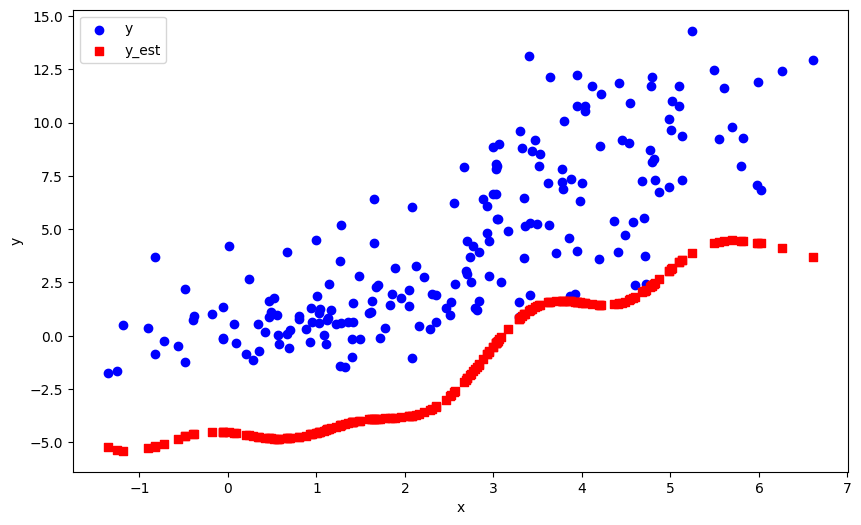

The programm is closed


In [10]:
eq_model2 = admg_rkhs_discovery_scale_residual.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery_scale_residual.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

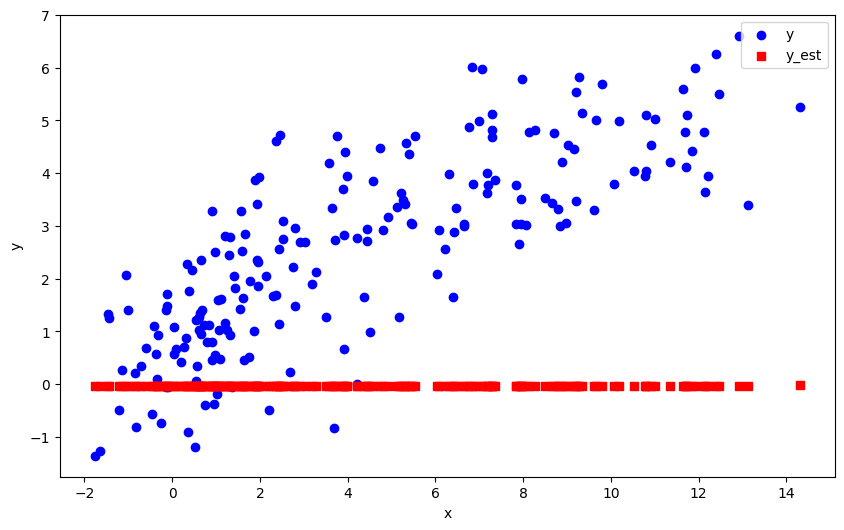

The programm is closed


In [11]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### Cov = 0.3

In [178]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.3],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.3, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=5, size=200)
true_x = x + epsilon1
y = np.array([0.5*(x**2) + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.89730179 0.27041426]
 [0.27041426 0.94705985]]
covariance:            x          y
x  2.833670   5.250005
y  5.250005  14.027382


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 1.8564231816972239
	 mle: 6.777589102305313
	 mse: 11.48462607964705
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 2.8337,  0.0258],
        [ 0.0258, 14.0274]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 3.0089,  0.0787],
        [ 0.0787, 13.2123]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.3732,  0.0000],
        [-0.1138,  2.6096]])
Check y:  tensor([ 2.3791e+00,  1.5110e-01,  9.3681e-01,  2.9762e+00,  2.4566e+00,
         1.0724e-01, -7.1935e-03,  1.6295e+00,  1.6826e+00, -6.2748e-02,
         3.3504e+00,  2.5730e+00,  2.9983e+00,  1.9976e+00,  2.6093e-01,
         2.8464e+00,  2.3979e+00,  3.3581e+00,  2.5409e+00,  3.0872e+00,
         9.8236e-02,  3.2388e+00,  2.2464e+00,  3.2574e+00,  3.3669e+00

  0%|          | 3/33000.0 [00:04<14:35:40,  1.59s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.019994913881309362
	score(model): 0.41844078801273876
	 mle: 3.98420924834614
	 mse: 2.8711644649039125
	W1: tensor([[1.0000e-04, 1.7614e+00],
        [7.9878e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019994913881309362
	W2: tensor([[ 1.8992, -0.1724],
        [-0.1724,  3.8183]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.8990, -0.1727],
        [-0.1727,  3.8181]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0005,  0.0000],
        [ 0.0007, -0.0008]])
Check y:  tensor([ 2.0759,  0.2809,  0.8444,  3.7565,  7.0747,  9.9741, 10.4417,  7.7538,
         7.6944, 11.1918,  5.5646,  2.5930,  3.8276,  1.5079,  9.6956,  3.3708,
         2.1201,  6.1766,  7.0308,  4.1366,  0.2545,  6.5837,  7.2011,  6.5511,
         6.0490,  7.2129,  4.7306,  1.5833,  9.4545,  1.3518,  1.3463,  2.0546,
         3.1667,  3.6855,  6.5556,  0.2520,  0.2286,  1.9763,  2.2696,  7.0006,
         2.4000,  1.4609,  9.7466,  1.0516,  3

  0%|          | 4/33000.0 [00:09<24:04:50,  2.63s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.021642049604462477
	score(model): 0.41738349249855644
	 mle: 3.9569808917907134
	 mse: 2.8578922070079966
	W1: tensor([[1.0000e-04, 1.8572e+00],
        [7.8786e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021642049604462477
	W2: tensor([[ 1.9049, -0.4226],
        [-0.4226,  3.8004]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.9049, -0.4227],
        [-0.4227,  3.8004]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0003, -0.0002]])
Check y:  tensor([ 2.0172e+00,  4.2348e-02,  6.6123e-01,  3.7963e+00,  7.2629e+00,
         1.0312e+01,  1.0813e+01,  7.9782e+00,  7.9164e+00,  1.1617e+01,
         5.6747e+00,  2.5657e+00,  3.8709e+00,  1.4065e+00,  1.0010e+01,
         3.3901e+00,  2.0641e+00,  6.3079e+00,  7.2153e+00,  4.1939e+00,
         8.5029e-03,  6.7324e+00,  7.3983e+00,  6.6981e+00,  6.1758e+00,
         7.4109e+00,  4.8114e+00,  1.4892e+00,  9.7507e+00,  1.2316e+00,
      

  0%|          | 5/33000.0 [00:14<30:20:41,  3.31s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.021963858244249845
	score(model): 0.41713292141161745
	 mle: 3.9509588626790735
	 mse: 2.8622105018783133
	W1: tensor([[1.0000e-04, 1.8890e+00],
        [7.8027e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.021963858244249845
	W2: tensor([[ 1.9106, -0.5001],
        [-0.5001,  3.8028]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.9106, -0.5002],
        [-0.5002,  3.8028]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0002, -0.0003]])
Check y:  tensor([ 1.9979, -0.0377,  0.6044,  3.8079,  7.3223, 10.4216, 10.9350,  8.0491,
         7.9863, 11.7559,  5.7108,  2.5573,  3.8834,  1.3734, 10.1124,  3.3959,
         2.0458,  6.3523,  7.2739,  4.2108, -0.0735,  6.7825,  7.4601,  6.7478,
         6.2184,  7.4729,  4.8363,  1.4583,  9.8477,  1.1937,  1.1873,  1.9749,
         3.1766,  3.7323,  6.7526, -0.0770, -0.1117,  1.8899,  2.2077,  7.2405,
         2.3488,  1.3201, 10.1690,  0.8410, 

  0%|          | 6/33000.0 [00:19<34:09:10,  3.73s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.022050957966279316
	score(model): 0.41707323648849143
	 mle: 3.949799581477304
	 mse: 2.8634079102551255
	W1: tensor([[1.0000e-04, 1.8953e+00],
        [7.7918e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.022050957966279316
	W2: tensor([[ 1.9119, -0.5149],
        [-0.5149,  3.8041]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.9119, -0.5149],
        [-0.5149,  3.8041]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0002, -0.0003]])
Check y:  tensor([ 1.9937, -0.0532,  0.5931,  3.8098,  7.3340, 10.4427, 10.9587,  8.0630,
         8.0000, 11.7830,  5.7180,  2.5552,  3.8856,  1.3667, 10.1320,  3.3966,
         2.0418,  6.3612,  7.2854,  4.2139, -0.0893,  6.7926,  7.4722,  6.7578,
         6.2270,  7.4850,  4.8412,  1.4519,  9.8664,  1.1860,  1.1795,  1.9706,
         3.1766,  3.7340,  6.7626, -0.0928, -0.1279,  1.8852,  2.2043,  7.2519,
         2.3459,  1.3130, 10.1890,  0.8312,  

  0%|          | 7/33000.0 [00:23<36:04:17,  3.94s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.02205669836357549
	score(model): 0.4170692166756731
	 mle: 3.9498587764014848
	 mse: 2.863479015587417
	W1: tensor([[1.0000e-04, 1.8954e+00],
        [7.7926e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02205669836357549
	W2: tensor([[ 1.9118, -0.5150],
        [-0.5150,  3.8041]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[ 1.9118, -0.5150],
        [-0.5150,  3.8041]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [ 0.0002, -0.0003]])
Check y:  tensor([ 1.9937, -0.0533,  0.5931,  3.8098,  7.3342, 10.4428, 10.9589,  8.0631,
         8.0002, 11.7832,  5.7180,  2.5552,  3.8856,  1.3666, 10.1322,  3.3966,
         2.0418,  6.3613,  7.2856,  4.2138, -0.0895,  6.7927,  7.4723,  6.7579,
         6.2270,  7.4852,  4.8411,  1.4518,  9.8665,  1.1860,  1.1795,  1.9706,
         3.1766,  3.7340,  6.7627, -0.0930, -0.1280,  1.8852,  2.2043,  7.2520,
         2.3459,  1.3130, 10.1891,  0.8311,  4.0

  0%|          | 10/33000.0 [00:27<23:16:31,  2.54s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.0041522874506668694
	score(model): 0.21448439569302197
	 mle: 4.206251135715156
	 mse: 3.2151563064217474
	W1: tensor([[1.0000e-04, 1.5990e+00],
        [4.0258e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0041522874506668694
	W2: tensor([[2.3038, 0.6526],
        [0.6526, 3.9577]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3040, 0.6524],
        [0.6524, 3.9581]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0003,  0.0000],
        [-0.0003, -0.0040]])
Check y:  tensor([ 2.1011,  0.8948,  1.2716,  3.6606,  6.6146,  9.3463,  9.7633,  7.0906,
         7.0433, 10.3268,  5.4377,  2.5321,  3.7328,  1.7058,  9.0364,  3.2700,
         2.1359,  5.9991,  6.5919,  4.0453,  0.8952,  6.3405,  6.6880,  6.3153,
         5.8851,  6.6954,  4.6355,  1.7510,  8.7430,  1.6200,  1.6170,  2.0845,
         3.0674,  3.5884,  6.3189,  0.8957,  0.9031,  2.0244,  2.2565,  6.5773,
         2.3654,  1.6792,  9.0973,  1.4307,  3.905

  0%|          | 11/33000.0 [00:32<27:55:59,  3.05s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.003953332855295422
	score(model): 0.2143473791279191
	 mle: 4.207532578092912
	 mse: 3.174106998383363
	W1: tensor([[1.0000e-04, 1.6751e+00],
        [3.7497e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003953332855295422
	W2: tensor([[2.3387, 0.5323],
        [0.5323, 3.8844]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3389, 0.5323],
        [0.5323, 3.8848]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0002, -0.0031]])
Check y:  tensor([ 2.0527,  0.7446,  1.1825,  3.6784,  6.6729,  9.5362, 10.0316,  7.1907,
         7.1384, 10.6633,  5.5237,  2.5238,  3.7509,  1.6369,  9.1975,  3.2879,
         2.0909,  6.1122,  6.6516,  4.0675,  0.7517,  6.4516,  6.7479,  6.4280,
         5.9941,  6.7558,  4.6779,  1.6804,  8.9048,  1.5601,  1.5575,  2.0346,
         3.0839,  3.6062,  6.4313,  0.7529,  0.7692,  1.9689,  2.2234,  6.6387,
         2.3427,  1.6123,  9.2610,  1.3690,  3.9250,  

  0%|          | 12/33000.0 [00:37<30:53:33,  3.37s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.0038926379740404915
	score(model): 0.21432736343279712
	 mle: 4.208308907445403
	 mse: 3.1715426711639614
	W1: tensor([[1.0000e-04, 1.6851e+00],
        [3.6990e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0038926379740404915
	W2: tensor([[2.3461, 0.5175],
        [0.5175, 3.9678]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3460, 0.5175],
        [0.5175, 3.9688]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.0716e-05,  0.0000e+00],
        [-2.3363e-04, -4.9704e-04]])
Check y:  tensor([ 2.0434,  0.7272,  1.1727,  3.6816,  6.6835,  9.5524, 10.0735,  7.2044,
         7.1518, 10.7286,  5.5239,  2.5238,  3.7533,  1.6279,  9.2032,  3.2945,
         2.0822,  6.1194,  6.6623,  4.0667,  0.7351,  6.4636,  6.7585,  6.4398,
         5.9997,  6.7664,  4.6743,  1.6701,  8.9105,  1.5547,  1.5523,  2.0250,
         3.0908,  3.6101,  6.4431,  0.7363,  0.7535,  1.9584,  2.2172,  6.6496,
         2.3389,  1.6043,  9.2678,

  0%|          | 13/33000.0 [00:41<33:23:03,  3.64s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.0038809284544294442
	score(model): 0.21434837582374816
	 mle: 4.208997444436928
	 mse: 3.172905017453991
	W1: tensor([[1.0000e-04, 1.6841e+00],
        [3.6954e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0038809284544294442
	W2: tensor([[2.3456, 0.5174],
        [0.5174, 3.9326]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3456, 0.5172],
        [0.5172, 3.9307]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0003, -0.0014]])
Check y:  tensor([ 2.0447,  0.7347,  1.1696,  3.6793,  6.6819,  9.5357, 10.0529,  7.2044,
         7.1514, 10.7075,  5.5301,  2.5240,  3.7512,  1.6275,  9.1925,  3.2922,
         2.0835,  6.1273,  6.6611,  4.0655,  0.7427,  6.4700,  6.7565,  6.4464,
         6.0074,  6.7644,  4.6760,  1.6703,  8.9056,  1.5525,  1.5500,  2.0263,
         3.0889,  3.6077,  6.4498,  0.7440,  0.7609,  1.9597,  2.2183,  6.6487,
         2.3397,  1.6034,  9.2558,  1.3596,  3.9239

  0%|          | 14/33000.0 [00:46<36:20:22,  3.97s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.0038649871570746175
	score(model): 0.2143672322585208
	 mle: 4.209687377518382
	 mse: 3.174330774855742
	W1: tensor([[1.0000e-04, 1.6843e+00],
        [3.6874e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0038649871570746175
	W2: tensor([[2.3462, 0.5233],
        [0.5233, 3.9086]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3464, 0.5232],
        [0.5232, 3.9072]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0002,  0.0000],
        [-0.0002, -0.0022]])
Check y:  tensor([ 2.0443,  0.7336,  1.1723,  3.6782,  6.6723,  9.5400, 10.0514,  7.1972,
         7.1439, 10.6960,  5.5312,  2.5221,  3.7502,  1.6299,  9.1990,  3.2903,
         2.0829,  6.1270,  6.6517,  4.0653,  0.7412,  6.4669,  6.7468,  6.4436,
         6.0077,  6.7547,  4.6769,  1.6723,  8.9117,  1.5557,  1.5532,  2.0260,
         3.0867,  3.6064,  6.4469,  0.7425,  0.7590,  1.9598,  2.2172,  6.6396,
         2.3382,  1.6061,  9.2620,  1.3629,  3.9233,

  0%|          | 16/33000.0 [00:51<29:57:15,  3.27s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0008768142206229124
	score(model): 0.10845001717691903
	 mle: 4.302574144265463
	 mse: 3.434839507885199
	W1: tensor([[1.0000e-04, 1.6376e+00],
        [1.8078e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008768142206229124
	W2: tensor([[2.5642, 0.9847],
        [0.9847, 3.9767]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5643, 0.9843],
        [0.9843, 3.9763]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0005, -0.0036]])
Check y:  tensor([ 2.0448,  1.0838,  1.3936,  3.6863,  6.4837,  9.3686,  9.8093,  6.7656,
         6.7309, 10.1307,  5.4692,  2.4332,  3.7653,  1.7785,  8.9277,  3.2465,
         2.0728,  6.0013,  6.4775,  4.0982,  1.0837,  6.3211,  6.5120,  6.2980,
         5.8935,  6.5154,  4.6952,  1.8043,  8.4974,  1.7247,  1.7225,  2.0318,
         3.0142,  3.6065,  6.3013,  1.0839,  1.0888,  1.9856,  2.1746,  6.4742,
         2.2726,  1.7631,  9.0187,  1.5458,  3.950

  0%|          | 17/33000.0 [00:55<32:37:22,  3.56s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0008288695004192714
	score(model): 0.10819967211928627
	 mle: 4.294474814464986
	 mse: 3.3744986188307258
	W1: tensor([[1.0000e-04, 1.7001e+00],
        [1.6931e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008288695004192714
	W2: tensor([[2.5863, 0.8865],
        [0.8865, 3.9745]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5861, 0.8862],
        [0.8862, 3.9728]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.7093e-05,  0.0000e+00],
        [-3.8324e-04, -1.9551e-03]])
Check y:  tensor([ 2.0025,  0.9271,  1.3497,  3.6599,  6.4740,  9.4257,  9.9413,  6.8255,
         6.7810, 10.4668,  5.5322,  2.4586,  3.7342,  1.7015,  9.0136,  3.2556,
         2.0371,  6.1212,  6.4729,  4.0570,  0.9580,  6.4376,  6.5002,  6.4179,
         6.0045,  6.5041,  4.6759,  1.7200,  8.6406,  1.6842,  1.6837,  1.9863,
         3.0418,  3.5856,  6.4207,  0.9618,  1.0080,  1.9289,  2.1612,  6.4748,
         2.2770,  1.6942,  9.0941

  0%|          | 18/33000.0 [01:00<34:59:43,  3.82s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0008033177366304489
	score(model): 0.10819506106369448
	 mle: 4.295298508986147
	 mse: 3.366773948279252
	W1: tensor([[1.0000e-04, 1.7264e+00],
        [1.6414e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008033177366304489
	W2: tensor([[2.5909, 0.8695],
        [0.8695, 3.9343]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5910, 0.8695],
        [0.8695, 3.9340]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.7491e-05,  0.0000e+00],
        [-3.5764e-04, -2.2497e-03]])
Check y:  tensor([ 1.9935,  0.8949,  1.3387,  3.6486,  6.4819,  9.4394,  9.9974,  6.8530,
         6.8064, 10.5563,  5.5506,  2.4664,  3.7217,  1.6817,  9.0162,  3.2550,
         2.0298,  6.1570,  6.4814,  4.0419,  0.9334,  6.4733,  6.5092,  6.4544,
         6.0376,  6.5134,  4.6686,  1.6988,  8.6526,  1.6727,  1.6726,  1.9765,
         3.0472,  3.5759,  6.4571,  0.9382,  0.9945,  1.9160,  2.1597,  6.4842,
         2.2800,  1.6761,  9.0966,

  0%|          | 19/33000.0 [01:04<36:28:13,  3.98s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0007872520585243681
	score(model): 0.10818993127803196
	 mle: 4.2957385409691975
	 mse: 3.3640853461413434
	W1: tensor([[1.0000e-04, 1.7367e+00],
        [1.6152e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007872520585243681
	W2: tensor([[2.5997, 0.8674],
        [0.8674, 3.9335]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5997, 0.8675],
        [0.8675, 3.9345]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.1420e-06,  0.0000e+00],
        [-3.2588e-04, -2.1876e-03]])
Check y:  tensor([ 1.9801,  0.8750,  1.3399,  3.6563,  6.4663,  9.4641, 10.0277,  6.8506,
         6.8027, 10.5847,  5.5608,  2.4585,  3.7298,  1.6766,  9.0379,  3.2594,
         2.0166,  6.1629,  6.4657,  4.0513,  0.9129,  6.4713,  6.4950,  6.4533,
         6.0449,  6.4994,  4.6793,  1.6910,  8.6733,  1.6743,  1.6745,  1.9630,
         3.0489,  3.5831,  6.4559,  0.9176,  0.9736,  1.9025,  2.1475,  6.4686,
         2.2692,  1.6729,  9.118

  0%|          | 20/33000.0 [01:09<37:13:13,  4.06s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0007946794427289294
	score(model): 0.10818060342940841
	 mle: 4.295057353621318
	 mse: 3.36658008690775
	W1: tensor([[1.0000e-04, 1.7324e+00],
        [1.6269e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007946794427289294
	W2: tensor([[2.5943, 0.8695],
        [0.8695, 3.9659]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5942, 0.8698],
        [0.8698, 3.9680]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.1523e-05,  0.0000e+00],
        [-3.5882e-04, -1.7614e-03]])
Check y:  tensor([ 1.9933,  0.8960,  1.3344,  3.6485,  6.4671,  9.4550, 10.0267,  6.8410,
         6.7938, 10.5909,  5.5512,  2.4712,  3.7209,  1.6786,  9.0227,  3.2586,
         2.0301,  6.1597,  6.4673,  4.0393,  0.9360,  6.4733,  6.4935,  6.4549,
         6.0401,  6.4976,  4.6655,  1.6955,  8.6548,  1.6705,  1.6705,  1.9761,
         3.0524,  3.5764,  6.4576,  0.9409,  0.9985,  1.9149,  2.1615,  6.4707,
         2.2831,  1.6732,  9.1046, 

  0%|          | 22/33000.0 [01:13<30:08:15,  3.29s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00019727356114285222
	score(model): 0.0547969412837709
	 mle: 4.367384522899549
	 mse: 3.6498699421506253
	W1: tensor([[1.0000e-04, 1.7572e+00],
        [7.9921e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00019727356114285222
	W2: tensor([[2.6721, 1.2265],
        [1.2265, 3.9995]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6720, 1.2259],
        [1.2259, 3.9981]], grad_fn=<MmBackward0>)
Check M:  tensor([[-4.5085e-05,  0.0000e+00],
        [-5.6839e-04, -3.2849e-03]])
Check y:  tensor([2.0483, 1.2141, 1.5323, 3.6769, 6.3875, 9.4926, 9.7098, 6.3833, 6.3654,
        9.3271, 5.4420, 2.3941, 3.7575, 1.8515, 8.9822, 3.2216, 2.0712, 5.9873,
        6.4059, 4.0928, 1.1875, 6.3342, 6.3470, 6.3088, 5.8741, 6.3443, 4.6806,
        1.8696, 8.3787, 1.8076, 1.8056, 2.0378, 2.9794, 3.5951, 6.3123, 1.1849,
        1.1601, 2.0012, 2.1576, 6.4190, 2.2446, 1.8399, 9.1014, 1.6505, 3.9451,
        5.6246, 4.0853, 6.3277,

  0%|          | 23/33000.0 [01:18<33:05:09,  3.61s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00020162515786914526
	score(model): 0.054473067369117126
	 mle: 4.341338674169009
	 mse: 3.509068764422866
	W1: tensor([[1.0000e-04, 1.7439e+00],
        [8.1416e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00020162515786914526
	W2: tensor([[2.6917, 1.0637],
        [1.0637, 3.9840]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6917, 1.0635],
        [1.0635, 3.9833]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.6509e-05,  0.0000e+00],
        [-3.2677e-04, -1.7713e-03]])
Check y:  tensor([ 1.9854,  1.0867,  1.3874,  3.7077,  6.4671,  9.5916, 10.0773,  6.6196,
         6.5925, 10.2327,  5.5082,  2.3628,  3.7903,  1.8032,  9.0302,  3.2391,
         2.0100,  6.0439,  6.4725,  4.1339,  1.0978,  6.3692,  6.4638,  6.3459,
         5.9346,  6.4644,  4.7362,  1.8144,  8.4799,  1.7736,  1.7719,  1.9741,
         2.9871,  3.6237,  6.3492,  1.0992,  1.1158,  1.9354,  2.1041,  6.4771,
         2.1995,  1.7965,  9.1

  0%|          | 24/33000.0 [01:22<34:53:23,  3.81s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00020489705080550813
	score(model): 0.05435148282180117
	 mle: 4.331332646702151
	 mse: 3.4692730196531563
	W1: tensor([[1.0000e-04, 1.7397e+00],
        [8.2272e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00020489705080550813
	W2: tensor([[2.6916, 1.0258],
        [1.0258, 3.9754]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6916, 1.0259],
        [1.0259, 3.9764]], grad_fn=<MmBackward0>)
Check M:  tensor([[-6.8695e-05,  0.0000e+00],
        [-2.4772e-04, -1.3916e-03]])
Check y:  tensor([ 1.9685,  0.9983,  1.3825,  3.6806,  6.4309,  9.4840, 10.0028,  6.6594,
         6.6230, 10.3859,  5.5399,  2.4073,  3.7577,  1.7401,  8.9960,  3.2526,
         1.9997,  6.1202,  6.4393,  4.0873,  1.0358,  6.4383,  6.4296,  6.4183,
         6.0044,  6.4310,  4.7023,  1.7472,  8.5362,  1.7406,  1.7404,  1.9541,
         3.0223,  3.6030,  6.4211,  1.0403,  1.0926,  1.9039,  2.1149,  6.4475,
         2.2264,  1.7393,  9.0

  0%|          | 25/33000.0 [01:27<37:19:49,  4.08s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00019858748967060968
	score(model): 0.05430757870561218
	 mle: 4.328310652216585
	 mse: 3.46011960031569
	W1: tensor([[1.0000e-04, 1.7637e+00],
        [7.9892e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00019858748967060968
	W2: tensor([[2.7014, 1.0212],
        [1.0212, 3.9863]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7014, 1.0214],
        [1.0214, 3.9881]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.7862e-06,  0.0000e+00],
        [-2.4015e-04, -1.1800e-03]])
Check y:  tensor([ 1.9616,  0.9513,  1.4021,  3.6480,  6.3979,  9.4407,  9.9918,  6.6683,
         6.6269, 10.4671,  5.5429,  2.4315,  3.7214,  1.7144,  8.9748,  3.2478,
         1.9962,  6.1515,  6.4081,  4.0413,  1.0045,  6.4664,  6.3978,  6.4482,
         6.0315,  6.3997,  4.6638,  1.7172,  8.5537,  1.7376,  1.7386,  1.9456,
         3.0331,  3.5746,  6.4508,  1.0109,  1.0854,  1.8894,  2.1225,  6.4184,
         2.2423,  1.7184,  9.066

  0%|          | 26/33000.0 [01:32<38:35:45,  4.21s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00019659930271331838
	score(model): 0.054306664753676175
	 mle: 4.3285029629358895
	 mse: 3.4553152480740104
	W1: tensor([[1.0000e-04, 1.7787e+00],
        [7.8822e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00019659930271331838
	W2: tensor([[2.7011, 1.0138],
        [1.0138, 3.9529]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7014, 1.0139],
        [1.0139, 3.9529]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.4672e-05,  0.0000e+00],
        [-2.2727e-04, -1.3635e-03]])
Check y:  tensor([ 1.9631,  0.9287,  1.3988,  3.6408,  6.4013,  9.4324, 10.0086,  6.6914,
         6.6483, 10.5092,  5.5544,  2.4444,  3.7131,  1.7034,  8.9647,  3.2496,
         1.9991,  6.1730,  6.4112,  4.0309,  0.9875,  6.4858,  6.4038,  6.4684,
         6.0516,  6.4059,  4.6585,  1.7061,  8.5559,  1.7311,  1.7323,  1.9464,
         3.0405,  3.5687,  6.4709,  0.9946,  1.0770,  1.8878,  2.1296,  6.4216,
         2.2524,  1.7081,  9

  0%|          | 28/33000.0 [01:36<30:59:39,  3.38s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 7.282336983815973e-05
	score(model): 0.027576936379253233
	 mle: 4.400234256216043
	 mse: 3.768017577045771
	W1: tensor([[1.0000e-04, 1.7261e+00],
        [4.9430e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.282336983815973e-05
	W2: tensor([[2.6939, 1.3248],
        [1.3248, 3.9708]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6942, 1.3245],
        [1.3245, 3.9713]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.9572e-05,  0.0000e+00],
        [-4.1058e-04, -2.2685e-03]])
Check y:  tensor([2.0866, 1.2636, 1.5945, 3.6459, 6.2554, 9.2542, 9.2370, 6.2531, 6.2314,
        8.6121, 5.4436, 2.3977, 3.7285, 1.8776, 8.8959, 3.1855, 2.1075, 5.9754,
        6.2796, 4.0733, 1.2256, 6.2936, 6.2046, 6.2718, 5.8669, 6.2013, 4.6766,
        1.9024, 8.3622, 1.8192, 1.8169, 2.0769, 2.9470, 3.5624, 6.2749, 1.2219,
        1.1870, 2.0428, 2.1853, 6.2977, 2.2632, 1.8615, 8.9909, 1.6801, 3.9212,
        5.6239, 4.0656, 6.1820,

  0%|          | 29/33000.0 [01:41<34:04:26,  3.72s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 6.521274904724983e-05
	score(model): 0.027340122285588228
	 mle: 4.363533417335576
	 mse: 3.5733859442697806
	W1: tensor([[1.0000e-04, 1.7907e+00],
        [4.5088e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.521274904724983e-05
	W2: tensor([[2.7343, 1.1310],
        [1.1310, 3.9861]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7344, 1.1312],
        [1.1312, 3.9882]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.7276e-05,  0.0000e+00],
        [-2.0706e-04, -1.0780e-03]])
Check y:  tensor([ 1.9907,  1.1026,  1.4321,  3.7102,  6.4505,  9.6696, 10.0961,  6.4863,
         6.4662, 10.0530,  5.4967,  2.3523,  3.7938,  1.8119,  9.0736,  3.2331,
         2.0139,  6.0369,  6.4652,  4.1390,  1.0972,  6.3793,  6.4199,  6.3541,
         5.9250,  6.4181,  4.7356,  1.8253,  8.4538,  1.7764,  1.7746,  1.9801,
         2.9764,  3.6250,  6.3577,  1.0969,  1.0968,  1.9436,  2.1030,  6.4760,
         2.1941,  1.8035,  9.2

  0%|          | 30/33000.0 [01:45<35:49:05,  3.91s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 6.60015383349144e-05
	score(model): 0.02725721125056655
	 mle: 4.350200041660916
	 mse: 3.5175748708671164
	W1: tensor([[1.0000e-04, 1.7587e+00],
        [4.6185e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.60015383349144e-05
	W2: tensor([[2.7414, 1.0729],
        [1.0729, 3.9661]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7415, 1.0730],
        [1.0730, 3.9666]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.3555e-05,  0.0000e+00],
        [-1.7019e-04, -8.2455e-04]])
Check y:  tensor([ 1.9650,  1.0362,  1.4045,  3.6890,  6.4273,  9.5650, 10.0779,  6.5808,
         6.5503, 10.3447,  5.5365,  2.3765,  3.7691,  1.7655,  9.0225,  3.2401,
         1.9931,  6.1029,  6.4392,  4.1070,  1.0610,  6.4251,  6.4130,  6.4039,
         5.9888,  6.4130,  4.7206,  1.7721,  8.4972,  1.7596,  1.7590,  1.9521,
         2.9987,  3.6081,  6.4069,  1.0641,  1.1005,  1.9074,  2.0987,  6.4493,
         2.2030,  1.7638,  9.1346

  0%|          | 31/33000.0 [01:50<36:49:30,  4.02s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 6.3696290099724e-05
	score(model): 0.027218401584146165
	 mle: 4.344364692638797
	 mse: 3.508997870103032
	W1: tensor([[1.0000e-04, 1.7694e+00],
        [4.5097e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.3696290099724e-05
	W2: tensor([[2.7441, 1.0848],
        [1.0848, 3.9695]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7439, 1.0849],
        [1.0849, 3.9698]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.3843e-05,  0.0000e+00],
        [-1.5569e-04, -7.6700e-04]])
Check y:  tensor([ 1.9519,  0.9976,  1.4282,  3.6587,  6.3691,  9.4469,  9.9844,  6.5786,
         6.5413, 10.3925,  5.5400,  2.4126,  3.7333,  1.7341,  8.9543,  3.2482,
         1.9849,  6.1409,  6.3837,  4.0557,  1.0494,  6.4553,  6.3559,  6.4369,
         6.0219,  6.3566,  4.6743,  1.7327,  8.4947,  1.7634,  1.7645,  1.9367,
         3.0264,  3.5839,  6.4396,  1.0556,  1.1276,  1.8838,  2.1069,  6.3969,
         2.2244,  1.7404,  9.0532, 

  0%|          | 32/33000.0 [01:54<37:30:23,  4.10s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 6.290161068078781e-05
	score(model): 0.02720857680218909
	 mle: 4.342926855718327
	 mse: 3.5057679201883944
	W1: tensor([[1.0000e-04, 1.7899e+00],
        [4.4302e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.290161068078781e-05
	W2: tensor([[2.7412, 1.0802],
        [1.0802, 3.9607]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7412, 1.0802],
        [1.0802, 3.9607]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.9021e-05,  0.0000e+00],
        [-1.6226e-04, -7.6277e-04]])
Check y:  tensor([ 1.9490,  0.9779,  1.4425,  3.6523,  6.3505,  9.4062,  9.9743,  6.5910,
         6.5506, 10.4399,  5.5473,  2.4358,  3.7243,  1.7161,  8.9223,  3.2595,
         1.9847,  6.1621,  6.3653,  4.0395,  1.0419,  6.4715,  6.3399,  6.4545,
         6.0414,  6.3410,  4.6601,  1.7118,  8.4885,  1.7613,  1.7631,  1.9325,
         3.0469,  3.5803,  6.4570,  1.0495,  1.1380,  1.8750,  2.1155,  6.3793,
         2.2399,  1.7258,  9.01

  0%|          | 34/33000.0 [01:58<29:47:07,  3.25s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 3.144784193231942e-05
	score(model): 0.01397994896828449
	 mle: 4.462800994296169
	 mse: 4.199020143274583
	W1: tensor([[1.0000e-04, 1.3797e+00],
        [4.0633e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.144784193231942e-05
	W2: tensor([[2.5368, 1.5529],
        [1.5529, 3.9839]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5373, 1.5527],
        [1.5527, 3.9860]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.2033e-05,  0.0000e+00],
        [-5.8357e-04, -2.0205e-03]])
Check y:  tensor([2.1186, 1.7869, 1.7109, 3.5664, 6.0541, 7.2929, 7.1687, 6.4495, 6.4116,
        7.0854, 5.2792, 2.3682, 3.6487, 2.0235, 7.3891, 3.1106, 2.1330, 5.6984,
        6.0363, 3.9927, 1.8277, 5.9122, 6.1153, 5.8984, 5.6185, 6.1216, 4.5833,
        2.0309, 7.3939, 1.9916, 1.9897, 2.1122, 2.8788, 3.4831, 5.9004, 1.8320,
        1.8786, 2.0908, 2.1906, 6.0255, 2.2532, 2.0173, 7.3757, 1.8200, 3.8412,
        5.4286, 3.9850, 6.1799,

  0%|          | 35/33000.0 [02:03<31:37:53,  3.45s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 2.7893485031849075e-05
	score(model): 0.013757447452794048
	 mle: 4.392993404987033
	 mse: 3.7857901539874503
	W1: tensor([[1.0000e-04, 1.6243e+00],
        [3.2503e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.7893485031849075e-05
	W2: tensor([[2.7033, 1.3510],
        [1.3510, 3.9973]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7034, 1.3511],
        [1.3511, 3.9990]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.2869e-06,  0.0000e+00],
        [-2.4230e-04, -1.0292e-03]])
Check y:  tensor([2.0592, 1.3185, 1.5475, 3.6355, 6.1233, 8.8261, 8.9227, 6.3893, 6.3506,
        8.7125, 5.5280, 2.3496, 3.7240, 1.9237, 8.5701, 3.1488, 2.0771, 5.9964,
        6.1294, 4.0962, 1.3191, 6.2066, 6.1303, 6.1961, 5.9089, 6.1325, 4.7463,
        1.9352, 8.2191, 1.8861, 1.8840, 2.0511, 2.9021, 3.5462, 6.1976, 1.3193,
        1.3242, 2.0235, 2.1468, 6.1367, 2.2197, 1.9155, 8.6332, 1.6944, 3.9317,
        5.6966, 4.0879, 6.1

  0%|          | 36/33000.0 [02:07<33:12:12,  3.63s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 2.9551127147087186e-05
	score(model): 0.013697831992893667
	 mle: 4.373424903733758
	 mse: 3.647349088592689
	W1: tensor([[1.0000e-04, 1.7128e+00],
        [3.1728e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.9551127147087186e-05
	W2: tensor([[2.7391, 1.2272],
        [1.2272, 3.9889]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7389, 1.2273],
        [1.2273, 3.9903]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.6325e-05,  0.0000e+00],
        [-1.4775e-04, -6.9078e-04]])
Check y:  tensor([2.0444, 1.2132, 1.4919, 3.6389, 6.2932, 9.3702, 9.7218, 6.4306, 6.4011,
        9.6695, 5.5185, 2.3880, 3.7217, 1.8405, 8.8821, 3.1836, 2.0678, 6.0555,
        6.3071, 4.0729, 1.2025, 6.3409, 6.2745, 6.3233, 5.9498, 6.2742, 4.7057,
        1.8585, 8.3627, 1.7988, 1.7969, 2.0335, 2.9488, 3.5555, 6.3259, 1.2015,
        1.1925, 1.9957, 2.1552, 6.3190, 2.2418, 1.8295, 8.9886, 1.6299, 3.9169,
        5.7051, 4.0649, 6.28

  0%|          | 37/33000.0 [02:11<34:22:26,  3.75s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 2.9805064279297966e-05
	score(model): 0.013668953625571715
	 mle: 4.36411608804997
	 mse: 3.584458588446554
	W1: tensor([[1.0000e-04, 1.7406e+00],
        [3.1354e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.9805064279297966e-05
	W2: tensor([[2.7559, 1.1612],
        [1.1612, 3.9914]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7559, 1.1614],
        [1.1614, 3.9927]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0731e-05,  0.0000e+00],
        [-1.0895e-04, -5.1964e-04]])
Check y:  tensor([ 2.0053,  1.1484,  1.4416,  3.6681,  6.3732,  9.5213, 10.0141,  6.5138,
         6.4856, 10.1395,  5.5221,  2.3751,  3.7503,  1.8133,  8.9534,  3.2105,
         2.0301,  6.0657,  6.3841,  4.0966,  1.1523,  6.3693,  6.3599,  6.3495,
         5.9572,  6.3599,  4.7178,  1.8255,  8.4014,  1.7855,  1.7840,  1.9939,
         2.9693,  3.5851,  6.3523,  1.1529,  1.1605,  1.9544,  2.1237,  6.3934,
         2.2172,  1.8064,  9.

  0%|          | 38/33000.0 [02:15<35:46:21,  3.91s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 2.9318885661711036e-05
	score(model): 0.013651099479564194
	 mle: 4.358608261307547
	 mse: 3.553965890693206
	W1: tensor([[1.0000e-04, 1.7469e+00],
        [3.0985e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.9318885661711036e-05
	W2: tensor([[2.7623, 1.1285],
        [1.1285, 3.9810]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7620, 1.1282],
        [1.1282, 3.9801]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9284e-06,  0.0000e+00],
        [-9.4339e-05, -4.5348e-04]])
Check y:  tensor([ 1.9778,  1.1068,  1.4142,  3.6801,  6.3918,  9.5232, 10.0688,  6.5617,
         6.5314, 10.3236,  5.5290,  2.3692,  3.7613,  1.7996,  8.9553,  3.2259,
         2.0039,  6.0791,  6.4012,  4.1035,  1.1315,  6.3851,  6.3839,  6.3653,
         5.9693,  6.3845,  4.7207,  1.8052,  8.4235,  1.7898,  1.7890,  1.9658,
         2.9832,  3.5980,  6.3681,  1.1343,  1.1670,  1.9248,  2.1029,  6.4096,
         2.2021,  1.7978,  9

  0%|          | 39/33000.0 [02:19<36:13:46,  3.96s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 3.081232022594804e-05
	score(model): 0.01364017085812517
	 mle: 4.354333616585297
	 mse: 3.539696523070081
	W1: tensor([[1.0000e-04, 1.7547e+00],
        [3.1624e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.081232022594804e-05
	W2: tensor([[2.7655, 1.1194],
        [1.1194, 3.9786]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7653, 1.1191],
        [1.1191, 3.9774]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.1569e-06,  0.0000e+00],
        [-8.7806e-05, -4.1733e-04]])
Check y:  tensor([ 1.9613,  1.0640,  1.4197,  3.6714,  6.3785,  9.4756, 10.0276,  6.5677,
         6.5342, 10.3677,  5.5271,  2.3845,  3.7494,  1.7763,  8.9395,  3.2370,
         1.9902,  6.0999,  6.3900,  4.0812,  1.1067,  6.4108,  6.3687,  6.3915,
         5.9858,  6.3693,  4.6958,  1.7763,  8.4426,  1.7888,  1.7889,  1.9480,
         3.0029,  3.5928,  6.3943,  1.1116,  1.1684,  1.9023,  2.0993,  6.4004,
         2.2069,  1.7797,  9.04

  0%|          | 40/33000.0 [02:23<36:31:07,  3.99s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 2.7888568418621418e-05
	score(model): 0.013627329075781467
	 mle: 4.3514687328490975
	 mse: 3.534560227732608
	W1: tensor([[1.0000e-04, 1.7674e+00],
        [2.9870e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.7888568418621418e-05
	W2: tensor([[2.7662, 1.1220],
        [1.1220, 3.9818]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7657, 1.1216],
        [1.1216, 3.9802]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.0034e-06,  0.0000e+00],
        [-8.4821e-05, -3.9564e-04]])
Check y:  tensor([ 1.9565,  1.0279,  1.4395,  3.6570,  6.3511,  9.4142,  9.9669,  6.5613,
         6.5243, 10.3757,  5.5260,  2.4112,  3.7313,  1.7525,  8.9130,  3.2467,
         1.9887,  6.1225,  6.3653,  4.0524,  1.0844,  6.4348,  6.3388,  6.4165,
         6.0044,  6.3395,  4.6669,  1.7491,  8.4530,  1.7846,  1.7856,  1.9416,
         3.0247,  3.5823,  6.4192,  1.0910,  1.1678,  1.8903,  2.1085,  6.3782,
         2.2244,  1.7600,  

  0%|          | 41/33000.0 [02:27<33:00:54,  3.61s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 3.369495993132965e-05
	score(model): 0.013629767707029878
	 mle: 4.3499770300888185
	 mse: 3.5309833605537895
	W1: tensor([[1.0000e-04, 1.7825e+00],
        [3.2555e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.369495993132965e-05
	W2: tensor([[2.7648, 1.1205],
        [1.1205, 3.9682]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7650, 1.1207],
        [1.1207, 3.9689]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.3115e-05,  0.0000e+00],
        [-8.5108e-05, -4.0848e-04]])
Check y:  tensor([ 1.9516,  1.0017,  1.4532,  3.6421,  6.3309,  9.3754,  9.9408,  6.5635,
         6.5237, 10.3985,  5.5307,  2.4261,  3.7145,  1.7320,  8.8910,  3.2469,
         1.9860,  6.1417,  6.3461,  4.0304,  1.0663,  6.4508,  6.3189,  6.4337,
         6.0216,  6.3198,  4.6493,  1.7269,  8.4557,  1.7763,  1.7780,  1.9356,
         3.0333,  3.5698,  6.4362,  1.0740,  1.1630,  1.8803,  2.1128,  6.3603,
         2.2340,  1.7418,  8

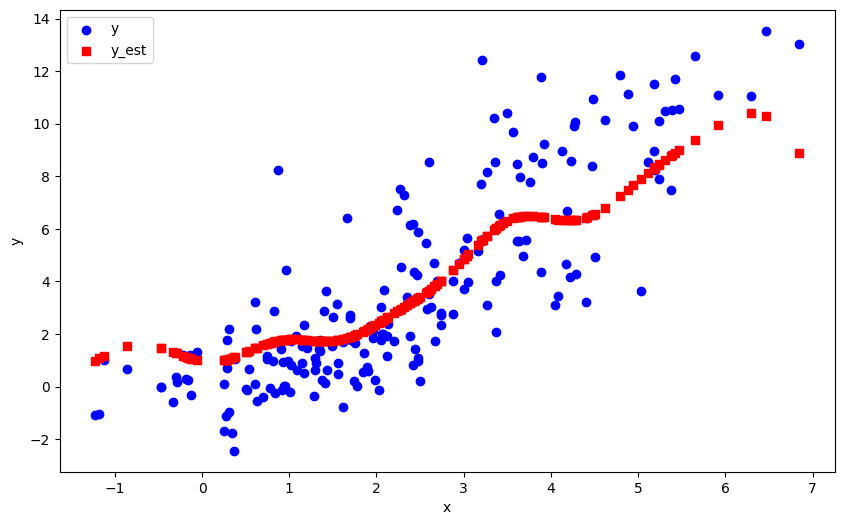

The programm is closed


In [179]:
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

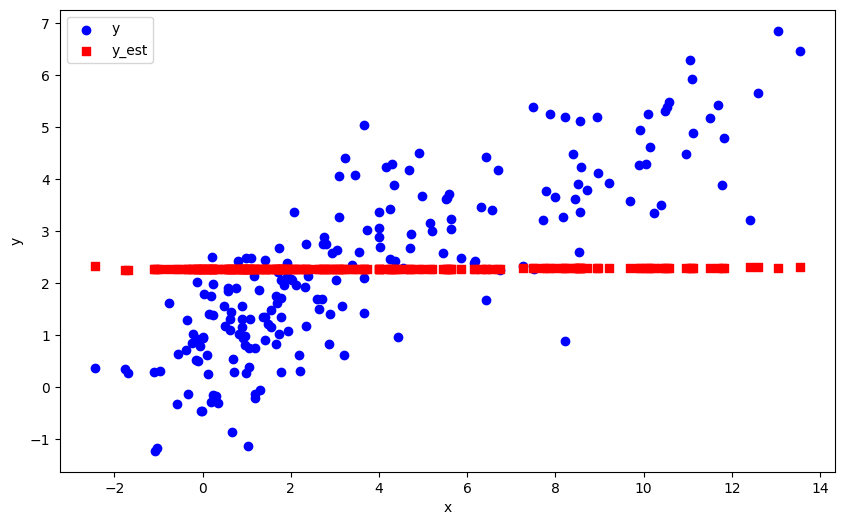

The programm is closed


In [180]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### Cov = 0.6

In [181]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=5, size=200)
true_x = x + epsilon1
y = np.array([0.25*(x**2) + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.89925943 0.54768565]
 [0.54768565 0.94098793]]
covariance:            x         y
x  2.810004  2.976386
y  2.976386  4.141520


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 0.7382671423214799
	 mle: 5.327448526585866
	 mse: 4.82635248842726
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 2.8100, -0.0329],
        [-0.0329,  4.1415]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.9838, 0.0179],
        [0.0179, 3.9001]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.3840,  0.0000],
        [-0.2171,  0.6506]])
Check y:  tensor([ 2.2614, -0.5079,  0.4338,  3.0054,  2.1626,  0.1101,  0.1094,  1.4779,
         1.4034, -0.0754,  3.3494,  2.3812,  3.1058,  2.0513,  0.2541,  3.1465,
         2.1935,  3.4008,  3.0472,  3.2593, -0.8696,  3.2716,  2.1537,  3.0160,
         3.3701,  2.3727,  3.3741,  1.9987,  0.4195,  1.7412,  1.5751,  2.2370,
         2.9019,  3.1277,  3.3565, -0.5904, -0.6

  0%|          | 3/33000.0 [00:04<14:04:08,  1.53s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.0163661289724507
	score(model): 0.28030736835911957
	 mle: 2.639443265249872
	 mse: 1.5262227035971034
	W1: tensor([[1.0000e-04, 6.5196e-01],
        [1.9542e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0163661289724507
	W2: tensor([[1.7036, 0.6276],
        [0.6276, 1.3365]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7038, 0.6273],
        [0.6273, 1.3364]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0005,  0.0000],
        [-0.0004, -0.0006]])
Check y:  tensor([1.2300, 0.5640, 0.7693, 1.8050, 3.2527, 4.1768, 4.1771, 3.5335, 3.5724,
        4.6744, 2.2317, 1.3049, 1.8975, 1.1307, 4.1327, 1.9392, 1.1938, 2.3800,
        2.9750, 2.0768, 0.4992, 2.8344, 3.2555, 2.9885, 2.2805, 3.1888, 2.2912,
        1.1112, 4.0885, 1.0356, 0.9979, 1.2165, 1.7186, 1.9196, 2.7312, 0.5480,
        0.5371, 1.4599, 1.3019, 2.9589, 1.4263, 0.9683, 4.1393, 0.8479, 2.0040,
        2.6407, 1.9533, 3.1722, 3.0666, 3.8100, 1.5534, 4

  0%|          | 4/33000.0 [00:09<22:31:50,  2.46s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.016677400080718403
	score(model): 0.2798853470381276
	 mle: 2.631890297038348
	 mse: 1.497960270482035
	W1: tensor([[1.0000e-04, 6.9883e-01],
        [1.8403e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.016677400080718403
	W2: tensor([[1.7548, 0.5419],
        [0.5419, 1.2381]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7548, 0.5418],
        [0.5418, 1.2381]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4291e-04,  0.0000e+00],
        [-1.9549e-04, -5.8306e-06]])
Check y:  tensor([1.2017, 0.4472, 0.6802, 1.8246, 3.3350, 4.3398, 4.3402, 3.6354, 3.6776,
        4.8910, 2.2714, 1.2817, 1.9216, 1.0955, 4.2847, 1.9651, 1.1631, 2.4289,
        3.0577, 2.1085, 0.3677, 2.9132, 3.3379, 3.0713, 2.3230, 3.2695, 2.3345,
        1.0743, 4.2340, 0.9899, 0.9461, 1.1873, 1.7327, 1.9446, 2.8043, 0.4279,
        0.4147, 1.4495, 1.2784, 3.0415, 1.4128, 0.9109, 4.2928, 0.7690, 2.0326,
        2.7078, 1.9798, 3.2528, 3.1486,

  0%|          | 5/33000.0 [00:13<27:53:06,  3.04s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.016751568191130113
	score(model): 0.2797851571351117
	 mle: 2.6301466802801228
	 mse: 1.4945354231171248
	W1: tensor([[1.0000e-04, 7.0317e-01],
        [1.8330e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.016751568191130113
	W2: tensor([[1.7579, 0.5322],
        [0.5322, 1.2281]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7579, 0.5322],
        [0.5322, 1.2281]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4132e-04,  0.0000e+00],
        [-1.9897e-04, -1.5283e-05]])
Check y:  tensor([1.1979, 0.4376, 0.6712, 1.8271, 3.3425, 4.3579, 4.3584, 3.6492, 3.6922,
        4.9216, 2.2724, 1.2775, 1.9235, 1.0927, 4.2987, 1.9668, 1.1597, 2.4314,
        3.0670, 2.1094, 0.3545, 2.9225, 3.3455, 3.0804, 2.3244, 3.2764, 2.3359,
        1.0716, 4.2471, 0.9867, 0.9418, 1.1836, 1.7348, 1.9464, 2.8124, 0.4177,
        0.4040, 1.4467, 1.2743, 3.0508, 1.4094, 0.9056, 4.3072, 0.7601, 2.0337,
        2.7144, 1.9813, 3.2597, 3.156

  0%|          | 6/33000.0 [00:17<31:24:20,  3.43s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.016771756214262107
	score(model): 0.2797429051773834
	 mle: 2.629522613740864
	 mse: 1.4934664371320439
	W1: tensor([[1.0000e-04, 7.0445e-01],
        [1.8307e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.016771756214262107
	W2: tensor([[1.7589, 0.5293],
        [0.5293, 1.2250]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7589, 0.5293],
        [0.5293, 1.2250]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4128e-04,  0.0000e+00],
        [-1.9904e-04, -1.5645e-05]])
Check y:  tensor([1.1968, 0.4347, 0.6686, 1.8280, 3.3444, 4.3638, 4.3642, 3.6538, 3.6970,
        4.9317, 2.2723, 1.2761, 1.9242, 1.0921, 4.3027, 1.9672, 1.1588, 2.4317,
        3.0700, 2.1093, 0.3502, 2.9257, 3.3475, 3.0834, 2.3244, 3.2782, 2.3360,
        1.0711, 4.2509, 0.9859, 0.9406, 1.1826, 1.7357, 1.9470, 2.8151, 0.4145,
        0.4005, 1.4455, 1.2729, 3.0539, 1.4080, 0.9039, 4.3114, 0.7573, 2.0340,
        2.7165, 1.9817, 3.2615, 3.1589

  0%|          | 7/33000.0 [00:22<34:23:37,  3.75s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.016777596414747485
	score(model): 0.27972593178242805
	 mle: 2.6292945728494694
	 mse: 1.4930776401952963
	W1: tensor([[1.0000e-04, 7.0497e-01],
        [1.8297e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.016777596414747485
	W2: tensor([[1.7593, 0.5282],
        [0.5282, 1.2238]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.7593, 0.5282],
        [0.5282, 1.2238]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4126e-04,  0.0000e+00],
        [-1.9897e-04, -1.5724e-05]])
Check y:  tensor([1.1964, 0.4334, 0.6677, 1.8284, 3.3452, 4.3660, 4.3664, 3.6555, 3.6989,
        4.9353, 2.2723, 1.2755, 1.9245, 1.0919, 4.3044, 1.9675, 1.1585, 2.4318,
        3.0712, 2.1094, 0.3484, 2.9269, 3.3483, 3.0845, 2.3244, 3.2789, 2.3360,
        1.0709, 4.2524, 0.9855, 0.9400, 1.1822, 1.7360, 1.9473, 2.8161, 0.4131,
        0.3991, 1.4450, 1.2723, 3.0552, 1.4075, 0.9031, 4.3131, 0.7563, 2.0341,
        2.7173, 1.9820, 3.2622, 3.15

  0%|          | 10/33000.0 [00:26<22:17:39,  2.43s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.003453086314106287
	score(model): 0.1441692280531894
	 mle: 2.8142500618672615
	 mse: 1.9506208778684204
	W1: tensor([[1.0000e-04, 4.9785e-01],
        [1.1793e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003453086314106287
	W2: tensor([[2.1031, 1.2356],
        [1.2356, 1.8006]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1032, 1.2352],
        [1.2352, 1.8001]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.4115e-04,  0.0000e+00],
        [-4.1888e-05,  1.7494e-05]])
Check y:  tensor([1.3413, 0.9327, 1.0531, 1.7713, 2.8949, 3.6174, 3.6178, 3.1104, 3.1414,
        4.0891, 2.1026, 1.3881, 1.8414, 1.2845, 3.5680, 1.8729, 1.3201, 2.2262,
        2.7174, 1.9786, 0.9060, 2.6115, 2.8969, 2.7267, 2.1428, 2.8519, 2.1517,
        1.2736, 3.5316, 1.2300, 1.2061, 1.3333, 1.7043, 1.8580, 2.5265, 0.9241,
        0.9186, 1.4980, 1.3862, 2.7061, 1.4727, 1.1861, 3.5746, 1.1029, 1.9222,
        2.4495, 1.8836, 2.8413, 2.77

  0%|          | 11/33000.0 [00:30<25:48:07,  2.82s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.0035432978246559515
	score(model): 0.14409139636273155
	 mle: 2.81082123349467
	 mse: 1.8926125680421881
	W1: tensor([[1.0000e-04, 5.5070e-01],
        [1.0800e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0035432978246559515
	W2: tensor([[2.1450, 1.1198],
        [1.1198, 1.6309]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1450, 1.1198],
        [1.1198, 1.6309]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.6096e-05,  0.0000e+00],
        [-1.8079e-04, -4.9184e-06]])
Check y:  tensor([1.3022, 0.8126, 0.9673, 1.7814, 3.0045, 3.7878, 3.7882, 3.2316, 3.2650,
        4.3009, 2.1441, 1.3549, 1.8593, 1.2367, 3.7375, 1.8942, 1.2779, 2.2774,
        2.8135, 2.0098, 0.7719, 2.6962, 3.0066, 2.8239, 2.1875, 2.9596, 2.1971,
        1.2239, 3.6985, 1.1723, 1.1443, 1.2930, 1.7064, 1.8778, 2.6029, 0.8005,
        0.7925, 1.4768, 1.3527, 2.8010, 1.4488, 1.1211, 3.7442, 1.0258, 1.9483,
        2.5190, 1.9060, 2.9485, 2.8

  0%|          | 12/33000.0 [00:34<28:57:04,  3.16s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.0035421651543333633
	score(model): 0.14408692062996037
	 mle: 2.8107531183361307
	 mse: 1.8881835835426695
	W1: tensor([[1.0000e-04, 5.5591e-01],
        [1.0697e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0035421651543333633
	W2: tensor([[2.1503, 1.1099],
        [1.1099, 1.6165]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1503, 1.1099],
        [1.1099, 1.6165]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.5858e-05,  0.0000e+00],
        [-1.8841e-04, -5.2478e-06]])
Check y:  tensor([1.2988, 0.8013, 0.9589, 1.7829, 3.0139, 3.8024, 3.8028, 3.2413, 3.2748,
        4.3192, 2.1478, 1.3517, 1.8616, 1.2329, 3.7529, 1.8967, 1.2744, 2.2816,
        2.8226, 2.0130, 0.7587, 2.7038, 3.0160, 2.8330, 2.1913, 2.9693, 2.2010,
        1.2199, 3.7141, 1.1675, 1.1388, 1.2896, 1.7070, 1.8802, 2.6094, 0.7888,
        0.7805, 1.4745, 1.3496, 2.8098, 1.4463, 1.1151, 3.7595, 1.0180, 1.9512,
        2.5247, 1.9086, 2.9582, 2

  0%|          | 13/33000.0 [00:39<32:00:30,  3.49s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.003541213818690142
	score(model): 0.14408647055081916
	 mle: 2.810763039362933
	 mse: 1.887726970489507
	W1: tensor([[1.0000e-04, 5.5649e-01],
        [1.0684e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003541213818690142
	W2: tensor([[2.1510, 1.1089],
        [1.1089, 1.6149]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1510, 1.1089],
        [1.1089, 1.6149]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.5761e-05,  0.0000e+00],
        [-1.8892e-04, -5.2871e-06]])
Check y:  tensor([1.2985, 0.8001, 0.9579, 1.7831, 3.0150, 3.8040, 3.8044, 3.2424, 3.2759,
        4.3213, 2.1482, 1.3514, 1.8619, 1.2325, 3.7546, 1.8970, 1.2740, 2.2821,
        2.8236, 2.0133, 0.7572, 2.7047, 3.0171, 2.8341, 2.1917, 2.9704, 2.2014,
        1.2195, 3.7158, 1.1670, 1.1383, 1.2893, 1.7071, 1.8805, 2.6102, 0.7875,
        0.7792, 1.4742, 1.3492, 2.8109, 1.4460, 1.1145, 3.7613, 1.0172, 1.9515,
        2.5254, 1.9089, 2.9593, 2.890

  0%|          | 14/33000.0 [00:43<33:50:21,  3.69s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.0035408649634876
	score(model): 0.14408632393727083
	 mle: 2.810767058082515
	 mse: 1.887635557046927
	W1: tensor([[1.0000e-04, 5.5661e-01],
        [1.0681e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0035408649634876
	W2: tensor([[2.1512, 1.1086],
        [1.1086, 1.6146]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.1512, 1.1086],
        [1.1086, 1.6146]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.5756e-05,  0.0000e+00],
        [-1.8894e-04, -5.2871e-06]])
Check y:  tensor([1.2984, 0.7999, 0.9577, 1.7832, 3.0152, 3.8044, 3.8048, 3.2426, 3.2762,
        4.3218, 2.1483, 1.3513, 1.8619, 1.2324, 3.7550, 1.8971, 1.2740, 2.2822,
        2.8239, 2.0134, 0.7569, 2.7049, 3.0173, 2.8343, 2.1918, 2.9706, 2.2015,
        1.2194, 3.7162, 1.1669, 1.1382, 1.2892, 1.7071, 1.8806, 2.6104, 0.7872,
        0.7789, 1.4742, 1.3491, 2.8111, 1.4459, 1.1143, 3.7616, 1.0170, 1.9516,
        2.5256, 1.9089, 2.9595, 2.8904, 3

  0%|          | 16/33000.0 [00:47<27:46:27,  3.03s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0005100570745373356
	score(model): 0.07323676162680069
	 mle: 2.908841916459998
	 mse: 2.666364848406484
	W1: tensor([[1.0000e-04, 2.7606e-01],
        [8.1799e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0005100570745373356
	W2: tensor([[2.3872, 2.1514],
        [2.1514, 2.9889]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3867, 2.1502],
        [2.1502, 2.9872]], grad_fn=<MmBackward0>)
Check M:  tensor([[2.6416e-04, 0.0000e+00],
        [8.8241e-05, 1.0747e-04]])
Check y:  tensor([1.5344, 1.5678, 1.5388, 1.7134, 2.3401, 2.6735, 2.6738, 2.4299, 2.4437,
        2.9771, 1.9132, 1.5413, 1.7552, 1.5322, 2.6364, 1.7742, 1.5329, 1.9886,
        2.2761, 1.8380, 1.6024, 2.2201, 2.3409, 2.2805, 1.9377, 2.3253, 1.9432,
        1.5324, 2.6148, 1.5328, 1.5321, 1.5337, 1.6744, 1.7653, 2.1707, 1.5719,
        1.5755, 1.5736, 1.5409, 2.2707, 1.5645, 1.5311, 2.6411, 1.5317, 1.8039,
        2.1246, 1.7807, 2.3219, 2.3011

  0%|          | 17/33000.0 [00:52<30:30:18,  3.33s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0007913881637872301
	score(model): 0.07299871551330797
	 mle: 2.8881842493919154
	 mse: 2.271990918806508
	W1: tensor([[1.0000e-04, 4.2499e-01],
        [6.6180e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007913881637872301
	W2: tensor([[2.3945, 1.6389],
        [1.6389, 2.1334]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3946, 1.6387],
        [1.6387, 2.1332]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.3864e-05,  0.0000e+00],
        [-1.0597e-04,  1.5212e-07]])
Check y:  tensor([1.3953, 1.1406, 1.2267, 1.7422, 2.7030, 3.2797, 3.2801, 2.8621, 2.8868,
        3.7358, 2.0345, 1.4266, 1.8035, 1.3623, 3.2369, 1.8311, 1.3822, 2.1456,
        2.5838, 1.9242, 1.1427, 2.4935, 2.7043, 2.5912, 2.0705, 2.6754, 2.0786,
        1.3567, 3.2083, 1.3353, 1.3234, 1.3903, 1.6837, 1.8181, 2.4175, 1.1364,
        1.1345, 1.5097, 1.4252, 2.5747, 1.4897, 1.3128, 3.2423, 1.2615, 1.8745,
        2.3478, 1.8405, 2.6688, 2

  0%|          | 18/33000.0 [00:56<33:15:20,  3.63s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0008014850026374943
	score(model): 0.07297497752290903
	 mle: 2.886826500993219
	 mse: 2.2186906969065974
	W1: tensor([[1.0000e-04, 4.6021e-01],
        [6.1503e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008014850026374943
	W2: tensor([[2.4175, 1.5566],
        [1.5566, 2.0029]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4175, 1.5566],
        [1.5566, 2.0028]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.5523e-05,  0.0000e+00],
        [-1.2241e-04,  2.4500e-07]])
Check y:  tensor([1.3706, 1.0568, 1.1691, 1.7500, 2.7704, 3.3897, 3.3900, 2.9375, 2.9640,
        3.8749, 2.0613, 1.4056, 1.8161, 1.3324, 3.3473, 1.8457, 1.3557, 2.1786,
        2.6463, 1.9447, 1.0501, 2.5491, 2.7717, 2.6543, 2.0993, 2.7423, 2.1078,
        1.3256, 3.3179, 1.2992, 1.2844, 1.3649, 1.6865, 1.8318, 2.4676, 1.0500,
        1.0465, 1.4966, 1.4040, 2.6365, 1.4748, 1.2714, 3.3525, 1.2108, 1.8919,
        2.3933, 1.8557, 2.7356, 2

  0%|          | 19/33000.0 [01:01<34:50:18,  3.80s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0007986666456356164
	score(model): 0.07297012781449101
	 mle: 2.8867443314914034
	 mse: 2.2109334908565104
	W1: tensor([[1.0000e-04, 4.6726e-01],
        [6.0468e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007986666456356164
	W2: tensor([[2.4232, 1.5438],
        [1.5438, 1.9817]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4232, 1.5438],
        [1.5438, 1.9817]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.5378e-05,  0.0000e+00],
        [-1.2362e-04,  1.6293e-07]])
Check y:  tensor([1.3666, 1.0433, 1.1593, 1.7524, 2.7811, 3.4064, 3.4067, 2.9474, 2.9742,
        3.8960, 2.0653, 1.4014, 1.8194, 1.3284, 3.3659, 1.8493, 1.3518, 2.1830,
        2.6581, 1.9486, 1.0333, 2.5585, 2.7824, 2.6662, 2.1034, 2.7539, 2.1119,
        1.3215, 3.3372, 1.2939, 1.2781, 1.3610, 1.6874, 1.8352, 2.4753, 1.0358,
        1.0317, 1.4930, 1.3999, 2.6480, 1.4709, 1.2643, 3.3709, 1.2013, 1.8957,
        2.3997, 1.8594, 2.7474, 

  0%|          | 20/33000.0 [01:05<35:59:44,  3.93s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0007971889600580242
	score(model): 0.07296846537515664
	 mle: 2.886736622733951
	 mse: 2.2092064661426627
	W1: tensor([[1.0000e-04, 4.6909e-01],
        [6.0177e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0007971889600580242
	W2: tensor([[2.4248, 1.5409],
        [1.5409, 1.9767]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.4248, 1.5409],
        [1.5409, 1.9767]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.5368e-05,  0.0000e+00],
        [-1.2364e-04,  1.6644e-07]])
Check y:  tensor([1.3657, 1.0401, 1.1569, 1.7531, 2.7835, 3.4101, 3.4105, 2.9494, 2.9763,
        3.9013, 2.0661, 1.4003, 1.8204, 1.3276, 3.3702, 1.8503, 1.3510, 2.1838,
        2.6611, 1.9495, 1.0291, 2.5609, 2.7848, 2.6693, 2.1042, 2.7566, 2.1126,
        1.3207, 3.3419, 1.2928, 1.2767, 1.3600, 1.6877, 1.8362, 2.4772, 1.0324,
        1.0281, 1.4919, 1.3988, 2.6510, 1.4697, 1.2626, 3.3751, 1.1989, 1.8967,
        2.4011, 1.8604, 2.7502, 2

  0%|          | 22/33000.0 [01:09<28:38:32,  3.13s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 7.169995161434359e-05
	score(model): 0.0368498394717927
	 mle: 2.942193381456709
	 mse: 3.4231504429558264
	W1: tensor([[1.0000e-04, 2.6688e-01],
        [3.1723e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.169995161434359e-05
	W2: tensor([[2.7273, 2.8657],
        [2.8657, 3.9118]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7276, 2.8654],
        [2.8654, 3.9105]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0002,  0.0000],
        [-0.0004, -0.0005]])
Check y:  tensor([1.6292, 1.9938, 1.8678, 1.6691, 1.9763, 2.0571, 2.0574, 1.9331, 1.9295,
        2.2180, 1.7866, 1.5986, 1.6989, 1.6871, 2.0039, 1.7111, 1.6482, 1.8258,
        1.9952, 1.7475, 2.1028, 1.9612, 1.9757, 1.9973, 1.7992, 1.9890, 1.8020,
        1.7002, 1.9641, 1.7521, 1.7753, 1.6360, 1.6381, 1.7054, 1.9301, 2.0114,
        2.0254, 1.5753, 1.5995, 1.9922, 1.5757, 1.7908, 2.0122, 1.8372, 1.7287,
        1.9022, 1.7150, 1.9921, 2.0032, 1.9192, 1

  0%|          | 23/33000.0 [01:13<31:25:50,  3.43s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 7.784300310262492e-05
	score(model): 0.036781061425022375
	 mle: 2.9361855112379365
	 mse: 3.311809501034026
	W1: tensor([[1.0000e-04, 2.8060e-01],
        [3.1438e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 7.784300310262492e-05
	W2: tensor([[2.7373, 2.8254],
        [2.8254, 3.8419]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7373, 2.8253],
        [2.8253, 3.8417]], grad_fn=<MmBackward0>)
Check M:  tensor([[-3.0102e-05,  0.0000e+00],
        [-7.2894e-05, -1.0126e-05]])
Check y:  tensor([1.6151, 1.9172, 1.8423, 1.6532, 1.9980, 2.0913, 2.0915, 1.9966, 2.0004,
        2.3789, 1.7888, 1.5946, 1.6790, 1.6599, 2.0659, 1.6912, 1.6291, 1.8461,
        2.0426, 1.7342, 2.0223, 2.0176, 1.9975, 2.0431, 1.8072, 2.0098, 1.8113,
        1.6711, 2.0584, 1.7202, 1.7457, 1.6200, 1.6302, 1.6854, 1.9845, 1.9314,
        1.9437, 1.5834, 1.5952, 2.0415, 1.5826, 1.7645, 2.0685, 1.8193, 1.7108,
        1.9506, 1.6953, 2.0136,

  0%|          | 24/33000.0 [01:18<33:11:59,  3.62s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 9.933232135689173e-05
	score(model): 0.03676152182866917
	 mle: 2.93289180327371
	 mse: 3.001471472503171
	W1: tensor([[1.0000e-04, 3.0240e-01],
        [3.2954e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.933232135689173e-05
	W2: tensor([[2.6602, 2.5118],
        [2.5118, 3.3241]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6601, 2.5112],
        [2.5112, 3.3232]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.6649e-05,  0.0000e+00],
        [-3.3349e-05, -6.9366e-07]])
Check y:  tensor([1.5481, 1.6959, 1.6807, 1.6703, 2.1782, 2.3995, 2.3997, 2.2203, 2.2310,
        2.7435, 1.8470, 1.5434, 1.7034, 1.5709, 2.3770, 1.7190, 1.5541, 1.9228,
        2.1966, 1.7751, 1.7782, 2.1553, 2.1782, 2.1984, 1.8713, 2.1829, 1.8768,
        1.5778, 2.3709, 1.6109, 1.6291, 1.5501, 1.6403, 1.7116, 2.1087, 1.7047,
        1.7131, 1.5614, 1.5434, 2.1938, 1.5548, 1.6425, 2.3789, 1.6752, 1.7445,
        2.0625, 1.7244, 2.1850, 2.

  0%|          | 25/33000.0 [01:22<34:38:01,  3.78s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00017196488348340192
	score(model): 0.03671167358029751
	 mle: 2.923083838818812
	 mse: 2.5893046643210416
	W1: tensor([[1.0000e-04, 3.6854e-01],
        [3.5579e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00017196488348340192
	W2: tensor([[2.5898, 2.0332],
        [2.0332, 2.5637]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5898, 2.0329],
        [2.0329, 2.5633]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.9876e-05,  0.0000e+00],
        [-6.6201e-05,  1.2465e-06]])
Check y:  tensor([1.4540, 1.3572, 1.4124, 1.7123, 2.4856, 2.9126, 2.9129, 2.5879, 2.6069,
        3.3445, 1.9592, 1.4685, 1.7631, 1.4475, 2.8816, 1.7861, 1.4500, 2.0569,
        2.4374, 1.8643, 1.3932, 2.3659, 2.4862, 2.4424, 1.9907, 2.4757, 1.9977,
        1.4477, 2.8649, 1.4511, 1.4522, 1.4523, 1.6638, 1.7752, 2.2997, 1.3577,
        1.3598, 1.5236, 1.4678, 2.4310, 1.5090, 1.4517, 2.8849, 1.4332, 1.8223,
        2.2377, 1.7939, 2.4739

  0%|          | 26/33000.0 [01:26<35:42:30,  3.90s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.00017933996088208826
	score(model): 0.036698947263232036
	 mle: 2.9214730322013613
	 mse: 2.512458718299182
	W1: tensor([[1.0000e-04, 4.0247e-01],
        [3.3271e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00017933996088208826
	W2: tensor([[2.5979, 1.9331],
        [1.9331, 2.4012]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5979, 1.9331],
        [1.9331, 2.4011]], grad_fn=<MmBackward0>)
Check M:  tensor([[-2.9894e-05,  0.0000e+00],
        [-7.3632e-05,  1.2344e-06]])
Check y:  tensor([1.4278, 1.2669, 1.3505, 1.7215, 2.5562, 3.0313, 3.0316, 2.6683, 2.6894,
        3.4876, 1.9865, 1.4467, 1.7766, 1.4154, 3.0009, 1.8014, 1.4217, 2.0906,
        2.5022, 1.8852, 1.2952, 2.4235, 2.5568, 2.5078, 2.0200, 2.5454, 2.0275,
        1.4144, 2.9831, 1.4127, 1.4111, 1.4253, 1.6682, 1.7897, 2.3515, 1.2650,
        1.2655, 1.5113, 1.4458, 2.4950, 1.4946, 1.4082, 3.0041, 1.3794, 1.8403,
        2.2845, 1.8098, 2.543

  0%|          | 28/33000.0 [01:30<28:50:46,  3.15s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 2.6537156773882464e-05
	score(model): 0.018445896969258035
	 mle: 2.9471016226496345
	 mse: 3.4007471836341137
	W1: tensor([[1.0000e-04, 2.7226e-01],
        [1.8914e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6537156773882464e-05
	W2: tensor([[2.7638, 2.8962],
        [2.8962, 3.9608]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7646, 2.8968],
        [2.8968, 3.9611]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 7.3649e-05,  0.0000e+00],
        [-1.0417e-04,  1.4511e-05]])
Check y:  tensor([1.6110, 1.9750, 1.8391, 1.6365, 1.9736, 2.0781, 2.0783, 1.9352, 1.9332,
        2.2053, 1.7657, 1.5757, 1.6684, 1.6750, 2.0362, 1.6817, 1.6324, 1.8098,
        1.9969, 1.7219, 2.0951, 1.9602, 1.9730, 1.9991, 1.7799, 1.9875, 1.7830,
        1.6891, 2.0002, 1.7427, 1.7649, 1.6187, 1.6042, 1.6755, 1.9260, 1.9952,
        2.0110, 1.5447, 1.5768, 1.9938, 1.5465, 1.7786, 2.0431, 1.8134, 1.7011,
        1.8950, 1.6860, 1.9

  0%|          | 29/33000.0 [01:35<31:15:19,  3.41s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 3.169804835790056e-05
	score(model): 0.01841605330225014
	 mle: 2.9414254489790146
	 mse: 3.3790449439378207
	W1: tensor([[1.0000e-04, 2.8967e-01],
        [1.9430e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.169804835790056e-05
	W2: tensor([[2.7633, 2.8870],
        [2.8870, 3.9366]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7633, 2.8869],
        [2.8869, 3.9365]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.6387e-05,  0.0000e+00],
        [-4.7958e-05,  7.7819e-07]])
Check y:  tensor([1.6190, 1.9470, 1.8651, 1.6482, 1.9660, 2.0451, 2.0453, 1.9448, 1.9465,
        2.2891, 1.7731, 1.5928, 1.6731, 1.6736, 2.0206, 1.6845, 1.6362, 1.8259,
        2.0200, 1.7237, 2.0664, 1.9931, 1.9654, 2.0206, 1.7899, 1.9825, 1.7937,
        1.6869, 2.0084, 1.7440, 1.7724, 1.6251, 1.6246, 1.6791, 1.9594, 1.9636,
        1.9778, 1.5757, 1.5936, 2.0187, 1.5756, 1.7925, 2.0235, 1.8450, 1.7025,
        1.9258, 1.6883, 1.9873

  0%|          | 30/33000.0 [01:39<33:10:52,  3.62s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 3.1842336446810005e-05
	score(model): 0.018409023815389045
	 mle: 2.9402740279384645
	 mse: 3.2733358717726873
	W1: tensor([[1.0000e-04, 3.1746e-01],
        [1.7770e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.1842336446810005e-05
	W2: tensor([[2.7521, 2.7854],
        [2.7854, 3.7429]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7521, 2.7853],
        [2.7853, 3.7426]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.5602e-05,  0.0000e+00],
        [-4.5286e-05,  1.0750e-06]])
Check y:  tensor([1.5905, 1.8531, 1.8177, 1.6473, 2.0146, 2.1331, 2.1332, 2.0142, 2.0203,
        2.4153, 1.7903, 1.5734, 1.6723, 1.6345, 2.1204, 1.6844, 1.6035, 1.8560,
        2.0830, 1.7296, 1.9711, 2.0566, 2.0140, 2.0830, 1.8112, 2.0316, 1.8159,
        1.6463, 2.1194, 1.7010, 1.7308, 1.5950, 1.6252, 1.6786, 2.0183, 1.8670,
        1.8799, 1.5716, 1.5739, 2.0822, 1.5688, 1.7526, 2.1210, 1.8070, 1.7046,
        1.9785, 1.6887, 2.0

  0%|          | 31/33000.0 [01:43<34:43:36,  3.79s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 3.28002993332403e-05
	score(model): 0.018403666052815248
	 mle: 2.939257946649331
	 mse: 3.1101350197352677
	W1: tensor([[1.0000e-04, 3.4358e-01],
        [1.6664e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.28002993332403e-05
	W2: tensor([[2.7358, 2.6205],
        [2.6205, 3.4387]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7358, 2.6203],
        [2.6203, 3.4384]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.5586e-05,  0.0000e+00],
        [-4.3970e-05,  1.0636e-06]])
Check y:  tensor([1.5518, 1.7197, 1.7291, 1.6572, 2.1148, 2.3038, 2.3039, 2.1394, 2.1497,
        2.6446, 1.8276, 1.5435, 1.6870, 1.5839, 2.2920, 1.7015, 1.5605, 1.9053,
        2.1751, 1.7555, 1.8267, 2.1416, 2.1144, 2.1756, 1.8524, 2.1288, 1.8580,
        1.5935, 2.2936, 1.6404, 1.6669, 1.5547, 1.6306, 1.6946, 2.0961, 1.7300,
        1.7406, 1.5582, 1.5436, 2.1738, 1.5521, 1.6865, 2.2921, 1.7299, 1.7257,
        2.0493, 1.7066, 2.1337, 

  0%|          | 32/33000.0 [01:48<36:18:53,  3.97s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 3.6188253254113976e-05
	score(model): 0.01839807564541014
	 mle: 2.9378168617007896
	 mse: 2.948816352039228
	W1: tensor([[1.0000e-04, 3.6530e-01],
        [1.6463e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.6188253254113976e-05
	W2: tensor([[2.7216, 2.4482],
        [2.4482, 3.1347]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7216, 2.4480],
        [2.4480, 3.1345]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.5600e-05,  0.0000e+00],
        [-4.3992e-05,  1.0685e-06]])
Check y:  tensor([1.5153, 1.5884, 1.6315, 1.6726, 2.2261, 2.4892, 2.4893, 2.2722, 2.2860,
        2.8776, 1.8690, 1.5142, 1.7089, 1.5365, 2.4765, 1.7260, 1.5202, 1.9556,
        2.2691, 1.7880, 1.6774, 2.2245, 2.2258, 2.2706, 1.8966, 2.2363, 1.9029,
        1.5436, 2.4773, 1.5798, 1.6003, 1.5167, 1.6391, 1.7179, 2.1709, 1.5948,
        1.6026, 1.5429, 1.5140, 2.2665, 1.5338, 1.6152, 2.4767, 1.6418, 1.7541,
        2.1173, 1.7320, 2.240

  0%|          | 34/33000.0 [01:52<28:33:54,  3.12s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 1.494971917995808e-05
	score(model): 0.009235633151547394
	 mle: 2.9505043124420314
	 mse: 3.3753217715486064
	W1: tensor([[1.0000e-04, 2.5875e-01],
        [1.4933e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.494971917995808e-05
	W2: tensor([[2.7756, 2.8858],
        [2.8858, 3.9267]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7753, 2.8857],
        [2.8857, 3.9270]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 4.6184e-05,  0.0000e+00],
        [-4.2317e-05, -1.0827e-05]])
Check y:  tensor([1.6278, 1.9543, 1.8235, 1.6243, 1.9782, 2.1068, 2.1072, 1.9587, 1.9583,
        2.2624, 1.7663, 1.5966, 1.6543, 1.6823, 2.0547, 1.6680, 1.6462, 1.8181,
        1.9992, 1.7137, 2.0797, 1.9704, 1.9778, 2.0006, 1.7832, 1.9876, 1.7870,
        1.6943, 2.0163, 1.7399, 1.7591, 1.6344, 1.5980, 1.6615, 1.9397, 1.9754,
        1.9921, 1.5638, 1.5976, 1.9971, 1.5672, 1.7711, 2.0628, 1.8016, 1.6894,
        1.9097, 1.6726, 1.99

  0%|          | 35/33000.0 [01:56<30:43:22,  3.36s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 1.504960682835715e-05
	score(model): 0.009218628515691872
	 mle: 2.9450760827257527
	 mse: 3.3737650272037274
	W1: tensor([[1.0000e-04, 2.9072e-01],
        [1.3335e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.504960682835715e-05
	W2: tensor([[2.7689, 2.8804],
        [2.8804, 3.9180]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7689, 2.8803],
        [2.8803, 3.9179]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.3200e-06,  0.0000e+00],
        [-2.5228e-05,  7.9464e-07]])
Check y:  tensor([1.6143, 1.9279, 1.8571, 1.6427, 1.9763, 2.0673, 2.0676, 1.9641, 1.9656,
        2.3197, 1.7777, 1.5896, 1.6690, 1.6673, 2.0295, 1.6813, 1.6308, 1.8326,
        2.0179, 1.7244, 2.0559, 1.9941, 1.9759, 2.0184, 1.7954, 1.9882, 1.7994,
        1.6806, 2.0104, 1.7388, 1.7686, 1.6201, 1.6192, 1.6755, 1.9631, 1.9454,
        1.9606, 1.5738, 1.5904, 2.0168, 1.5737, 1.7899, 2.0343, 1.8422, 1.7011,
        1.9314, 1.6856, 1.99

  0%|          | 36/33000.0 [02:00<32:17:38,  3.53s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 1.4872441242471666e-05
	score(model): 0.009214114612675807
	 mle: 2.9436840809446907
	 mse: 3.3170271621410388
	W1: tensor([[1.0000e-04, 3.1385e-01],
        [1.2279e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.4872441242471666e-05
	W2: tensor([[2.7662, 2.8266],
        [2.8266, 3.8098]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7662, 2.8266],
        [2.8266, 3.8097]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9280e-06,  0.0000e+00],
        [-2.5035e-05,  6.3385e-07]])
Check y:  tensor([1.5980, 1.8731, 1.8369, 1.6398, 1.9932, 2.1023, 2.1025, 1.9933, 1.9985,
        2.3711, 1.7840, 1.5803, 1.6642, 1.6429, 2.0825, 1.6764, 1.6113, 1.8494,
        2.0593, 1.7224, 1.9987, 2.0382, 1.9927, 2.0589, 1.8050, 2.0085, 1.8097,
        1.6551, 2.0775, 1.7124, 1.7442, 1.6026, 1.6197, 1.6705, 2.0039, 1.8883,
        1.9022, 1.5755, 1.5808, 2.0591, 1.5736, 1.7678, 2.0843, 1.8265, 1.6969,
        1.9671, 1.6807, 2.

  0%|          | 37/33000.0 [02:04<34:13:59,  3.74s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 1.4473013997857376e-05
	score(model): 0.009211062302640132
	 mle: 2.942830087464736
	 mse: 3.2485615327506236
	W1: tensor([[1.0000e-04, 3.4162e-01],
        [1.1128e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.4473013997857376e-05
	W2: tensor([[2.7639, 2.7598],
        [2.7598, 3.6773]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7639, 2.7598],
        [2.7598, 3.6772]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9367e-06,  0.0000e+00],
        [-2.5117e-05,  6.3945e-07]])
Check y:  tensor([1.5772, 1.8074, 1.8029, 1.6417, 2.0265, 2.1619, 2.1620, 2.0374, 2.0454,
        2.4646, 1.7959, 1.5645, 1.6663, 1.6167, 2.1505, 1.6790, 1.5882, 1.8690,
        2.1041, 1.7282, 1.9333, 2.0817, 2.0260, 2.1035, 1.8193, 2.0433, 1.8245,
        1.6283, 2.1531, 1.6849, 1.7175, 1.5809, 1.6214, 1.6729, 2.0432, 1.8209,
        1.8340, 1.5699, 1.5648, 2.1042, 1.5660, 1.7421, 2.1506, 1.7998, 1.7007,
        2.0018, 1.6835, 2.0

  0%|          | 38/33000.0 [02:08<35:10:34,  3.84s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 1.378566918923697e-05
	score(model): 0.0092082636586171
	 mle: 2.9421498147375393
	 mse: 3.2003266460790325
	W1: tensor([[1.0000e-04, 3.6653e-01],
        [1.0123e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.378566918923697e-05
	W2: tensor([[2.7633, 2.7119],
        [2.7119, 3.5827]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7633, 2.7119],
        [2.7119, 3.5826]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9418e-06,  0.0000e+00],
        [-2.5259e-05,  6.4480e-07]])
Check y:  tensor([1.5624, 1.7598, 1.7780, 1.6444, 2.0510, 2.2038, 2.2040, 2.0679, 2.0779,
        2.5339, 1.8050, 1.5525, 1.6698, 1.5991, 2.1997, 1.6828, 1.5722, 1.8829,
        2.1377, 1.7337, 1.8845, 2.1133, 2.0504, 2.1370, 1.8298, 2.0695, 1.8354,
        1.6102, 2.2087, 1.6662, 1.6990, 1.5656, 1.6233, 1.6765, 2.0712, 1.7717,
        1.7841, 1.5642, 1.5527, 2.1378, 1.5589, 1.7238, 2.1985, 1.7798, 1.7052,
        2.0261, 1.6874, 2.0759

  0%|          | 39/33000.0 [02:12<35:46:12,  3.91s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 1.3132579611702323e-05
	score(model): 0.009205869474288166
	 mle: 2.9415896177136096
	 mse: 3.1850374061488513
	W1: tensor([[1.0000e-04, 3.8286e-01],
        [9.4580e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.3132579611702323e-05
	W2: tensor([[2.7640, 2.6968],
        [2.6968, 3.5517]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7640, 2.6968],
        [2.6968, 3.5517]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9442e-06,  0.0000e+00],
        [-2.5349e-05,  6.4993e-07]])
Check y:  tensor([1.5570, 1.7430, 1.7708, 1.6468, 2.0567, 2.2124, 2.2125, 2.0727, 2.0837,
        2.5531, 1.8068, 1.5471, 1.6723, 1.5940, 2.2152, 1.6852, 1.5669, 1.8856,
        2.1520, 1.7357, 1.8653, 2.1253, 2.0560, 2.1513, 1.8318, 2.0778, 1.8374,
        1.6052, 2.2294, 1.6611, 1.6936, 1.5603, 1.6247, 1.6790, 2.0807, 1.7538,
        1.7655, 1.5602, 1.5473, 2.1520, 1.5545, 1.7182, 2.2128, 1.7735, 1.7074,
        2.0333, 1.6898, 2.

  0%|          | 40/33000.0 [02:16<36:13:12,  3.96s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 1.283750978499257e-05
	score(model): 0.009204107624060402
	 mle: 2.9411189333525742
	 mse: 3.1922012517240503
	W1: tensor([[1.0000e-04, 3.9008e-01],
        [9.1779e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.283750978499257e-05
	W2: tensor([[2.7649, 2.7043],
        [2.7043, 3.5647]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7649, 2.7043],
        [2.7043, 3.5647]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9463e-06,  0.0000e+00],
        [-2.5455e-05,  6.5541e-07]])
Check y:  tensor([1.5584, 1.7488, 1.7756, 1.6484, 2.0495, 2.1985, 2.1986, 2.0608, 2.0719,
        2.5391, 1.8033, 1.5467, 1.6738, 1.5977, 2.2069, 1.6863, 1.5693, 1.8805,
        2.1518, 1.7347, 1.8676, 2.1231, 2.0487, 2.1511, 1.8276, 2.0731, 1.8332,
        1.6092, 2.2247, 1.6650, 1.6969, 1.5621, 1.6254, 1.6803, 2.0768, 1.7588,
        1.7699, 1.5576, 1.5469, 2.1516, 1.5520, 1.7208, 2.2036, 1.7761, 1.7076,
        2.0284, 1.6907, 2.08

  0%|          | 41/33000.0 [02:21<31:31:43,  3.44s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 1.2746604477165733e-05
	score(model): 0.009202844316562294
	 mle: 2.9407429082298076
	 mse: 3.2074375238306074
	W1: tensor([[1.0000e-04, 3.9333e-01],
        [9.0699e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.2746604477165733e-05
	W2: tensor([[2.7658, 2.7197],
        [2.7197, 3.5934]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7658, 2.7197],
        [2.7197, 3.5935]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9577e-06,  0.0000e+00],
        [-2.5596e-05,  6.6453e-07]])
Check y:  tensor([1.5621, 1.7624, 1.7846, 1.6493, 2.0377, 2.1774, 2.1775, 2.0442, 2.0552,
        2.5151, 1.7979, 1.5481, 1.6742, 1.6041, 2.1898, 1.6862, 1.5740, 1.8731,
        2.1460, 1.7322, 1.8784, 2.1161, 2.0368, 2.1453, 1.8215, 2.0634, 1.8269,
        1.6159, 2.2103, 1.6720, 1.7033, 1.5661, 1.6258, 1.6805, 2.0688, 1.7720,
        1.7826, 1.5563, 1.5484, 2.1457, 1.5510, 1.7266, 2.1858, 1.7822, 1.7065,
        2.0199, 1.6905, 2.

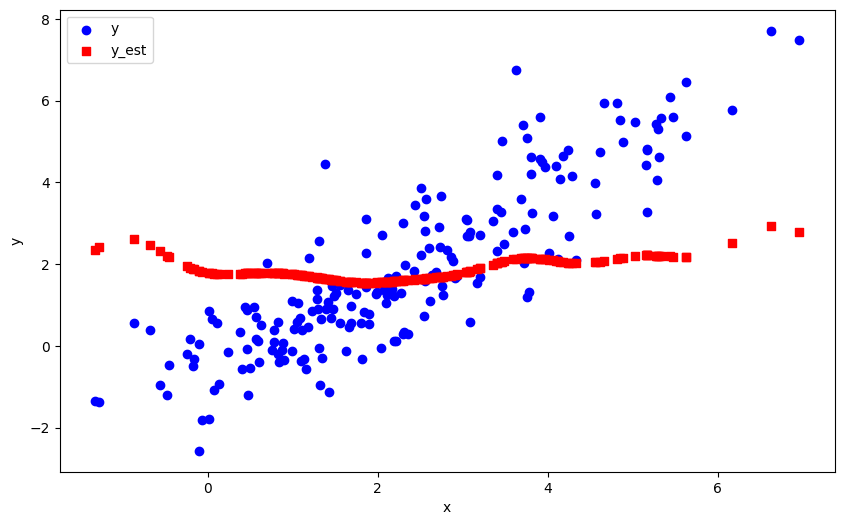

The programm is closed


In [182]:
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

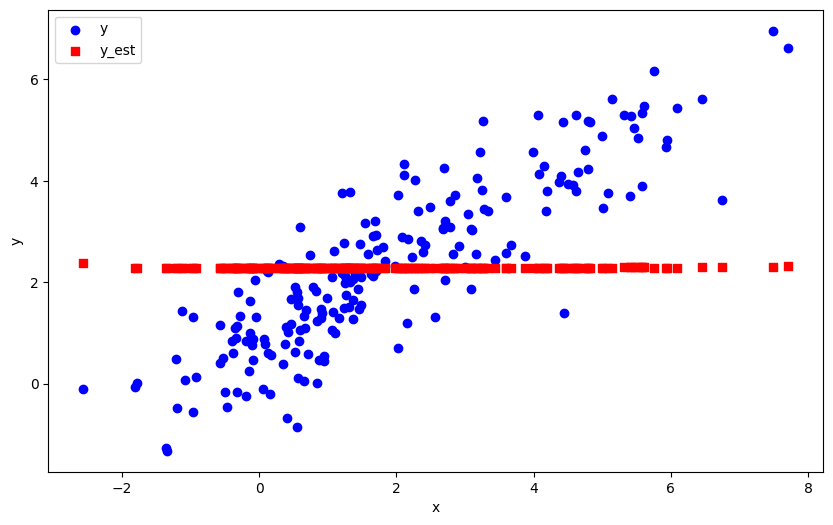

The programm is closed


In [183]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Cov = 0.8

In [184]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.8, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=0, high=5, size=200)
true_x = x + epsilon1
y = np.array([0.25*(x**2) + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.90310407 0.73253324]
 [0.73253324 0.93440044]]
covariance:            x         y
x  2.794692  3.148830
y  3.148830  4.151901


  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 2.000000031151749e-08
	score(model): 0.7364462456285474
	 mle: 5.163194072516643
	 mse: 4.577766432504189
	W1: tensor([[0.0001, 0.0001],
        [0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.000000031151749e-08
	W2: tensor([[ 2.7947e+00, -3.6998e-03],
        [-3.6998e-03,  4.1519e+00]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.9675, 0.0479],
        [0.0479, 3.9109]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.3839,  0.0000],
        [-0.2161,  0.6616]])
Check y:  tensor([ 2.1229, -0.3746,  0.2508,  2.9767,  2.0358,  0.0997,  0.3071,  1.5013,
         1.2774, -0.0882,  3.2755,  2.0962,  3.1123,  2.0913,  0.2316,  3.3376,
         1.9333,  3.3017,  3.3978,  3.3190, -1.0086,  3.3643,  2.2685,  2.8203,
         3.1974,  2.6017,  3.4329,  1.9866,  0.3992,  1.8021,  1.4692,  2.0355,
         2.9706,  3.2142,  3.44

  0%|          | 3/33000.0 [00:04<13:28:51,  1.47s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.014896086550337905
	score(model): 0.2276252479033263
	 mle: 2.1271340253625026
	 mse: 1.4202252067293875
	W1: tensor([[1.0000e-04, 6.1682e-01],
        [1.9714e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.014896086550337905
	W2: tensor([[1.6035, 0.9135],
        [0.9135, 1.2247]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6037, 0.9132],
        [0.9132, 1.2241]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 0.0003,  0.0000],
        [-0.0011, -0.0006]])
Check y:  tensor([1.2468, 0.7635, 0.8390, 1.8050, 3.3112, 3.9731, 3.9127, 3.4828, 3.5660,
        4.3446, 2.0313, 1.2345, 1.8980, 1.2322, 3.9310, 2.0992, 1.1667, 2.0580,
        2.6026, 2.0771, 0.6093, 2.6592, 3.2421, 3.0518, 1.9624, 3.1358, 2.2736,
        1.1876, 3.8896, 1.1202, 1.0258, 1.2078, 1.8009, 1.9763, 2.4562, 0.7533,
        0.7491, 1.6322, 1.3112, 2.5788, 1.4828, 0.9384, 3.9345, 0.8853, 2.0173,
        2.6112, 1.9097, 3.0363, 3.0388, 3.6457, 1.578

  0%|          | 4/33000.0 [00:08<21:56:55,  2.39s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.015715384334225355
	score(model): 0.2271239239419236
	 mle: 2.113902832196351
	 mse: 1.3633665845277434
	W1: tensor([[1.0000e-04, 6.7790e-01],
        [1.8420e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.015715384334225355
	W2: tensor([[1.6607, 0.8026],
        [0.8026, 1.0619]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6607, 0.8025],
        [0.8025, 1.0619]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0003,  0.0001]])
Check y:  tensor([1.2107, 0.6439, 0.7335, 1.8310, 3.4412, 4.1742, 4.1079, 3.6254, 3.7180,
        4.5733, 2.0753, 1.1974, 1.9341, 1.1949, 4.1281, 2.1460, 1.1218, 2.1031,
        2.6866, 2.1230, 0.4304, 2.7487, 3.3699, 3.1736, 2.0030, 3.2610, 2.3297,
        1.1454, 4.0825, 1.0674, 0.9513, 1.1680, 1.8263, 2.0176, 2.5265, 0.6304,
        0.6245, 1.6311, 1.2792, 2.6605, 1.4622, 0.8431, 4.1319, 0.7824, 2.0606,
        2.6960, 1.9467, 3.1574, 3.1601, 3.8078, 1.5692

  0%|          | 5/33000.0 [00:13<27:30:18,  3.00s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.015819018859948266
	score(model): 0.22699346959385833
	 mle: 2.1115579883292446
	 mse: 1.3552286714600486
	W1: tensor([[1.0000e-04, 6.8755e-01],
        [1.8221e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.015819018859948266
	W2: tensor([[1.6696, 0.7837],
        [0.7837, 1.0369]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6696, 0.7837],
        [0.7837, 1.0369]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0003,  0.0001]])
Check y:  tensor([1.2059, 0.6267, 0.7173, 1.8362, 3.4614, 4.2075, 4.1384, 3.6497, 3.7446,
        4.6195, 2.0808, 1.1925, 1.9403, 1.1901, 4.1590, 2.1512, 1.1162, 2.1084,
        2.6987, 2.1282, 0.4015, 2.7621, 3.3894, 3.1929, 2.0090, 3.2804, 2.3355,
        1.1402, 4.1128, 1.0604, 0.9396, 1.1630, 1.8315, 2.0235, 2.5352, 0.6125,
        0.6064, 1.6308, 1.2742, 2.6721, 1.4576, 0.8268, 4.1630, 0.7652, 2.0662,
        2.7083, 1.9529, 3.1766, 3.1793, 3.8364, 1.56

  0%|          | 6/33000.0 [00:17<31:45:50,  3.47s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.015855606322361805
	score(model): 0.22694106169879785
	 mle: 2.1106683032657645
	 mse: 1.3528908368058166
	W1: tensor([[1.0000e-04, 6.8964e-01],
        [1.8187e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.015855606322361805
	W2: tensor([[1.6710, 0.7788],
        [0.7788, 1.0308]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6710, 0.7788],
        [0.7788, 1.0308]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0003,  0.0001]])
Check y:  tensor([1.2051, 0.6225, 0.7137, 1.8378, 3.4660, 4.2161, 4.1455, 3.6562, 3.7520,
        4.6336, 2.0820, 1.1917, 1.9421, 1.1892, 4.1664, 2.1521, 1.1152, 2.1095,
        2.7018, 2.1293, 0.3943, 2.7656, 3.3937, 3.1974, 2.0105, 3.2846, 2.3366,
        1.1393, 4.1199, 1.0590, 0.9366, 1.1622, 1.8331, 2.0249, 2.5373, 0.6080,
        0.6018, 1.6306, 1.2731, 2.6750, 1.4561, 0.8226, 4.1704, 0.7611, 2.0675,
        2.7115, 1.9546, 3.1811, 3.1838, 3.8443, 1.56

  0%|          | 7/33000.0 [00:21<34:00:35,  3.71s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.01587131315319859
	score(model): 0.2269171054452883
	 mle: 2.110271760916411
	 mse: 1.3519317157272914
	W1: tensor([[1.0000e-04, 6.9043e-01],
        [1.8175e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.01587131315319859
	W2: tensor([[1.6715, 0.7768],
        [0.7768, 1.0284]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[1.6715, 0.7768],
        [0.7768, 1.0284]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0001,  0.0000],
        [-0.0003,  0.0001]])
Check y:  tensor([1.2048, 0.6207, 0.7124, 1.8385, 3.4678, 4.2195, 4.1482, 3.6588, 3.7549,
        4.6391, 2.0825, 1.1915, 1.9428, 1.1890, 4.1692, 2.1525, 1.1148, 2.1100,
        2.7030, 2.1297, 0.3914, 2.7670, 3.3953, 3.1991, 2.0112, 3.2862, 2.3369,
        1.1391, 4.1227, 1.0584, 0.9354, 1.1620, 1.8338, 2.0256, 2.5381, 0.6062,
        0.5999, 1.6304, 1.2727, 2.6761, 1.4554, 0.8209, 4.1733, 0.7596, 2.0681,
        2.7127, 1.9554, 3.1829, 3.1855, 3.8475, 1.5657, 

  0%|          | 10/33000.0 [00:26<21:58:59,  2.40s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.003037870151626549
	score(model): 0.11765336338467271
	 mle: 2.292328609932581
	 mse: 1.9692322072737534
	W1: tensor([[1.0000e-04, 4.3757e-01],
        [1.2586e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003037870151626549
	W2: tensor([[2.0054, 1.5914],
        [1.5914, 1.9286]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0055, 1.5910],
        [1.5910, 1.9279]], grad_fn=<MmBackward0>)
Check M:  tensor([[-0.0003,  0.0000],
        [ 0.0001, -0.0001]])
Check y:  tensor([1.4040, 1.1972, 1.1982, 1.7731, 2.8746, 3.2828, 3.2261, 2.9729, 3.0220,
        3.6560, 1.9141, 1.3976, 1.8344, 1.3964, 3.2406, 1.9555, 1.3600, 1.9301,
        2.3345, 1.9418, 1.1058, 2.3825, 2.8345, 2.7070, 1.8733, 2.7670, 2.0731,
        1.3720, 3.2109, 1.3311, 1.2662, 1.3833, 1.7702, 1.8815, 2.2134, 1.1938,
        1.1921, 1.6422, 1.4368, 2.3145, 1.5344, 1.2118, 3.2436, 1.1955, 1.9058,
        2.3418, 1.8416, 2.6953, 2.6972, 3.0694, 1.60

  0%|          | 11/33000.0 [00:30<25:30:18,  2.78s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.0032204965032434263
	score(model): 0.11756127668972406
	 mle: 2.28668055554377
	 mse: 1.870231999552554
	W1: tensor([[1.0000e-04, 5.0457e-01],
        [1.1238e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0032204965032434263
	W2: tensor([[2.0642, 1.4509],
        [1.4509, 1.6634]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0642, 1.4509],
        [1.4509, 1.6633]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.5375e-05,  0.0000e+00],
        [-2.3416e-04,  5.8457e-05]])
Check y:  tensor([1.3552, 1.0725, 1.0883, 1.7878, 3.0306, 3.5140, 3.4453, 3.1356, 3.1890,
        3.9001, 1.9508, 1.3471, 1.8601, 1.3456, 3.4646, 1.9962, 1.2992, 1.9685,
        2.4106, 1.9813, 0.9335, 2.4644, 2.9864, 2.8384, 1.9049, 2.9088, 2.1237,
        1.3146, 3.4238, 1.2621, 1.1794, 1.3290, 1.7844, 1.9142, 2.2765, 1.0662,
        1.0632, 1.6342, 1.3957, 2.3883, 1.5100, 1.1108, 3.4685, 1.0891, 1.9415,
        2.4187, 1.8684, 2.8247, 2.82

  0%|          | 12/33000.0 [00:34<28:53:50,  3.15s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.003218362268976441
	score(model): 0.11755214992625974
	 mle: 2.2865411937575475
	 mse: 1.861244133778258
	W1: tensor([[1.0000e-04, 5.1452e-01],
        [1.1017e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003218362268976441
	W2: tensor([[2.0758, 1.4363],
        [1.4363, 1.6336]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0758, 1.4363],
        [1.4363, 1.6336]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.1963e-05,  0.0000e+00],
        [-2.4624e-04,  5.6151e-05]])
Check y:  tensor([1.3510, 1.0593, 1.0753, 1.7914, 3.0493, 3.5396, 3.4724, 3.1525, 3.2063,
        3.9237, 1.9558, 1.3428, 1.8651, 1.3413, 3.4916, 2.0008, 1.2939, 1.9733,
        2.4176, 1.9860, 0.9110, 2.4726, 3.0059, 2.8568, 1.9102, 2.9285, 2.1274,
        1.3097, 3.4506, 1.2556, 1.1692, 1.3244, 1.7879, 1.9195, 2.2812, 1.0525,
        1.0494, 1.6331, 1.3917, 2.3949, 1.5062, 1.0975, 3.4954, 1.0753, 1.9466,
        2.4259, 1.8736, 2.8428, 2.84

  0%|          | 13/33000.0 [00:38<31:16:36,  3.41s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.0032154214166649365
	score(model): 0.11755075707791132
	 mle: 2.2865718593741247
	 mse: 1.8596368256730114
	W1: tensor([[1.0000e-04, 5.1680e-01],
        [1.0963e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0032154214166649365
	W2: tensor([[2.0787, 1.4334],
        [1.4334, 1.6274]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0787, 1.4334],
        [1.4334, 1.6274]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.1574e-05,  0.0000e+00],
        [-2.4827e-04,  5.6047e-05]])
Check y:  tensor([1.3503, 1.0565, 1.0727, 1.7922, 3.0532, 3.5446, 3.4782, 3.1555, 3.2093,
        3.9275, 1.9571, 1.3421, 1.8664, 1.3406, 3.4973, 2.0019, 1.2928, 1.9746,
        2.4187, 1.9872, 0.9063, 2.4740, 3.0103, 2.8610, 1.9115, 2.9330, 2.1280,
        1.3088, 3.4563, 1.2542, 1.1670, 1.3236, 1.7886, 1.9208, 2.2818, 1.0496,
        1.0465, 1.6327, 1.3910, 2.3958, 1.5054, 1.0947, 3.5010, 1.0725, 1.9479,
        2.4270, 1.8749, 2.8469, 2

  0%|          | 14/33000.0 [00:42<33:08:43,  3.62s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.0032137753078474098
	score(model): 0.11755103953995422
	 mle: 2.286610366443081
	 mse: 1.859577730821878
	W1: tensor([[1.0000e-04, 5.1720e-01],
        [1.0952e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0032137753078474098
	W2: tensor([[2.0793, 1.4332],
        [1.4332, 1.6266]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.0793, 1.4332],
        [1.4332, 1.6266]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.1528e-05,  0.0000e+00],
        [-2.4847e-04,  5.6042e-05]])
Check y:  tensor([1.3503, 1.0561, 1.0725, 1.7923, 3.0538, 3.5450, 3.4790, 3.1555, 3.2093,
        3.9273, 1.9574, 1.3421, 1.8666, 1.3405, 3.4980, 2.0022, 1.2927, 1.9748,
        2.4186, 1.9875, 0.9057, 2.4739, 3.0110, 2.8618, 1.9118, 2.9338, 2.1280,
        1.3087, 3.4571, 1.2539, 1.1666, 1.3235, 1.7887, 1.9211, 2.2816, 1.0492,
        1.0460, 1.6325, 1.3910, 2.3957, 1.5053, 1.0943, 3.5018, 1.0722, 1.9482,
        2.4269, 1.8751, 2.8476, 2.8

  0%|          | 16/33000.0 [00:47<27:16:38,  2.98s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.00038131309454592137
	score(model): 0.05978761485250204
	 mle: 2.376287161224852
	 mse: 2.990649709473028
	W1: tensor([[1.0000e-04, 2.5377e-01],
        [7.6940e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00038131309454592137
	W2: tensor([[2.5274, 2.6860],
        [2.6860, 3.4300]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.5272, 2.6856],
        [2.6856, 3.4294]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.1028e-04,  0.0000e+00],
        [-2.1502e-04,  8.0671e-05]])
Check y:  tensor([1.6283, 1.8263, 1.7274, 1.7255, 2.2195, 2.2179, 2.1708, 2.1936, 2.1812,
        2.5530, 1.7560, 1.6288, 1.7439, 1.6289, 2.1803, 1.7624, 1.6290, 1.7582,
        1.9291, 1.7600, 1.8507, 1.9591, 2.2217, 2.1736, 1.7507, 2.2044, 1.7955,
        1.6295, 2.1646, 1.6256, 1.6143, 1.6295, 1.7244, 1.7518, 1.8597, 1.8334,
        1.8359, 1.6676, 1.6244, 1.9170, 1.6289, 1.6226, 2.1827, 1.6613, 1.7549,
        1.9336, 1.7454, 2.1667, 

  0%|          | 17/33000.0 [00:51<30:25:31,  3.32s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0006566928956671247
	score(model): 0.059664308484115955
	 mle: 2.360204442472392
	 mse: 2.4442660638741907
	W1: tensor([[1.0000e-04, 3.5256e-01],
        [7.2673e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006566928956671247
	W2: tensor([[2.3540, 2.1171],
        [2.1171, 2.5105]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3540, 2.1168],
        [2.1168, 2.5099]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.4056e-05,  0.0000e+00],
        [-1.3475e-04,  3.2792e-05]])
Check y:  tensor([1.5004, 1.4897, 1.4374, 1.7478, 2.6038, 2.8276, 2.7711, 2.6302, 2.6458,
        3.1760, 1.8349, 1.4971, 1.7902, 1.4965, 2.7857, 1.8572, 1.4752, 1.8434,
        2.1374, 1.8497, 1.4370, 2.1804, 2.5868, 2.4891, 1.8130, 2.5414, 1.9298,
        1.4827, 2.7563, 1.4560, 1.4104, 1.4893, 1.7457, 1.8175, 2.0348, 1.4909,
        1.4911, 1.6451, 1.5160, 2.1198, 1.5678, 1.3837, 2.7888, 1.3974, 1.8305,
        2.1438, 1.7947, 2.4783, 

  0%|          | 18/33000.0 [00:55<32:34:00,  3.55s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0006847263588880518
	score(model): 0.05966007259675541
	 mle: 2.3589135770257283
	 mse: 2.362206722982731
	W1: tensor([[1.0000e-04, 3.9093e-01],
        [6.6923e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006847263588880518
	W2: tensor([[2.3701, 2.0229],
        [2.0229, 2.3279]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3701, 2.0229],
        [2.0229, 2.3279]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.4498e-05,  0.0000e+00],
        [-1.6081e-04,  3.2142e-05]])
Check y:  tensor([1.4759, 1.4224, 1.3771, 1.7569, 2.6998, 2.9657, 2.9028, 2.7294, 2.7471,
        3.3158, 1.8544, 1.4717, 1.8051, 1.4710, 2.9202, 1.8779, 1.4444, 1.8634,
        2.1767, 1.8700, 1.3384, 2.2237, 2.6803, 2.5682, 1.8306, 2.6279, 1.9540,
        1.4537, 2.8844, 1.4203, 1.3631, 1.4620, 1.7545, 1.8355, 2.0657, 1.4219,
        1.4212, 1.6403, 1.4949, 2.1576, 1.5538, 1.3268, 2.9238, 1.3377, 1.8496,
        2.1837, 1.8101, 2.5559, 2

  0%|          | 19/33000.0 [01:00<34:08:50,  3.73s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0006828607886836659
	score(model): 0.05965648294322815
	 mle: 2.3588429187720457
	 mse: 2.348239014601316
	W1: tensor([[1.0000e-04, 4.0212e-01],
        [6.4972e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006828607886836659
	W2: tensor([[2.3791, 2.0064],
        [2.0064, 2.2911]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3791, 2.0064],
        [2.0064, 2.2911]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.4286e-05,  0.0000e+00],
        [-1.6209e-04,  3.2102e-05]])
Check y:  tensor([1.4716, 1.4108, 1.3649, 1.7602, 2.7204, 2.9936, 2.9304, 2.7483, 2.7661,
        3.3437, 1.8585, 1.4674, 1.8097, 1.4667, 2.9481, 1.8813, 1.4392, 1.8673,
        2.1825, 1.8737, 1.3165, 2.2308, 2.7013, 2.5870, 1.8352, 2.6484, 1.9563,
        1.4489, 2.9113, 1.4138, 1.3527, 1.4574, 1.7576, 1.8401, 2.0690, 1.4099,
        1.4090, 1.6388, 1.4907, 2.1629, 1.5496, 1.3132, 2.9517, 1.3239, 1.8539,
        2.1897, 1.8148, 2.5743, 2

  0%|          | 20/33000.0 [01:04<35:18:48,  3.85s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0006817713351635431
	score(model): 0.05965523189383656
	 mle: 2.358836010787759
	 mse: 2.345472865934985
	W1: tensor([[1.0000e-04, 4.0484e-01],
        [6.4485e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0006817713351635431
	W2: tensor([[2.3816, 2.0031],
        [2.0031, 2.2832]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.3816, 2.0031],
        [2.0031, 2.2832]], grad_fn=<MmBackward0>)
Check M:  tensor([[-5.4247e-05,  0.0000e+00],
        [-1.6221e-04,  3.2106e-05]])
Check y:  tensor([1.4709, 1.4085, 1.3624, 1.7610, 2.7248, 2.9995, 2.9364, 2.7521, 2.7700,
        3.3496, 1.8595, 1.4667, 1.8109, 1.4659, 2.9541, 1.8821, 1.4382, 1.8682,
        2.1835, 1.8745, 1.3116, 2.2321, 2.7060, 2.5913, 1.8364, 2.6531, 1.9565,
        1.4480, 2.9171, 1.4124, 1.3504, 1.4566, 1.7584, 1.8412, 2.0694, 1.4074,
        1.4065, 1.6383, 1.4899, 2.1637, 1.5485, 1.3100, 2.9577, 1.3209, 1.8549,
        2.1907, 1.8160, 2.5785, 2.

  0%|          | 22/33000.0 [01:08<28:43:30,  3.14s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00014383608704181242
	score(model): 0.030033198504673175
	 mle: 2.391108360912655
	 mse: 3.2667588355954256
	W1: tensor([[1.0000e-04, 2.6976e-01],
        [4.4454e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00014383608704181242
	W2: tensor([[2.6933, 2.9504],
        [2.9504, 3.7768]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6930, 2.9505],
        [2.9505, 3.7772]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 5.5727e-05,  0.0000e+00],
        [-1.5603e-04,  2.8172e-05]])
Check y:  tensor([1.6731, 1.9689, 1.8433, 1.7059, 2.1130, 2.0245, 1.9801, 2.0579, 2.0313,
        2.3483, 1.7003, 1.6748, 1.7103, 1.6751, 1.9886, 1.6961, 1.6809, 1.6983,
        1.8250, 1.6971, 2.0127, 1.8550, 2.1236, 2.0811, 1.7065, 2.1122, 1.7077,
        1.6797, 1.9754, 1.6811, 1.6780, 1.6780, 1.7053, 1.7053, 1.7592, 1.9781,
        1.9815, 1.6686, 1.6624, 1.8131, 1.6467, 1.7011, 1.9908, 1.7567, 1.7015,
        1.8294, 1.7099, 2.073

  0%|          | 23/33000.0 [01:12<31:03:38,  3.39s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0001477169429014565
	score(model): 0.030010016795780785
	 mle: 2.388921513904188
	 mse: 3.336437345962738
	W1: tensor([[1.0000e-04, 2.8337e-01],
        [4.2886e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001477169429014565
	W2: tensor([[2.7148, 3.0136],
        [3.0136, 3.8825]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7148, 3.0138],
        [3.0138, 3.8829]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 2.7972e-05,  0.0000e+00],
        [-1.5470e-04, -3.5728e-05]])
Check y:  tensor([1.6895, 2.0174, 1.8782, 1.7017, 2.0791, 1.9752, 1.9261, 2.0095, 1.9762,
        2.2898, 1.6894, 1.6923, 1.7058, 1.6928, 1.9368, 1.6805, 1.7029, 1.6856,
        1.7843, 1.6830, 2.0597, 1.8139, 2.0932, 2.0495, 1.6996, 2.0827, 1.6796,
        1.7006, 1.9188, 1.7048, 1.7016, 1.6975, 1.7011, 1.6977, 1.7218, 2.0274,
        2.0311, 1.6615, 1.6729, 1.7727, 1.6431, 1.7242, 1.9394, 1.7835, 1.6916,
        1.7886, 1.7051, 2.0417, 

  0%|          | 24/33000.0 [01:17<32:58:11,  3.60s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00014729533845036737
	score(model): 0.030011317924440225
	 mle: 2.389036805446678
	 mse: 3.291556116522308
	W1: tensor([[1.0000e-04, 2.9562e-01],
        [4.1051e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00014729533845036737
	W2: tensor([[2.7065, 2.9762],
        [2.9762, 3.8170]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7069, 2.9766],
        [2.9766, 3.8174]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.6456e-05,  0.0000e+00],
        [-1.5452e-04,  1.7211e-04]])
Check y:  tensor([1.6785, 1.9999, 1.8600, 1.7091, 2.1195, 2.0148, 1.9697, 2.0500, 2.0167,
        2.3224, 1.7011, 1.6812, 1.7167, 1.6817, 1.9795, 1.6913, 1.6911, 1.6969,
        1.7955, 1.6942, 2.0328, 1.8268, 2.1325, 2.0810, 1.7114, 2.1184, 1.6882,
        1.6892, 1.9629, 1.6919, 1.6850, 1.6863, 1.7083, 1.7095, 1.7305, 2.0096,
        2.0131, 1.6584, 1.6618, 1.7834, 1.6335, 1.7042, 1.9818, 1.7635, 1.7033,
        1.8001, 1.7163, 2.0723

  0%|          | 25/33000.0 [01:21<34:28:37,  3.76s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0001491272357577896
	score(model): 0.03001296524745373
	 mle: 2.389051212216006
	 mse: 3.296781163632515
	W1: tensor([[1.0000e-04, 3.0061e-01],
        [4.0619e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001491272357577896
	W2: tensor([[2.6818, 2.9443],
        [2.9443, 3.7667]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6824, 2.9447],
        [2.9447, 3.7670]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.3824e-05,  0.0000e+00],
        [-2.3954e-04, -2.2745e-04]])
Check y:  tensor([1.6884, 2.0093, 1.8663, 1.7126, 2.1178, 2.0246, 1.9777, 2.0414, 2.0073,
        2.3234, 1.7046, 1.6912, 1.7208, 1.6917, 1.9887, 1.6941, 1.7003, 1.7002,
        1.7982, 1.6973, 2.0293, 1.8301, 2.1342, 2.0879, 1.7154, 2.1240, 1.6896,
        1.6987, 1.9688, 1.6995, 1.6882, 1.6961, 1.7118, 1.7135, 1.7319, 2.0186,
        2.0219, 1.6607, 1.6709, 1.7857, 1.6378, 1.7048, 1.9912, 1.7657, 1.7069,
        1.8028, 1.7204, 2.0793, 2

  0%|          | 26/33000.0 [01:25<36:09:02,  3.95s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.0001453661839681689
	score(model): 0.03002004616832102
	 mle: 2.389965788205654
	 mse: 3.3245916399604574
	W1: tensor([[1.0000e-04, 3.0469e-01],
        [3.9567e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001453661839681689
	W2: tensor([[2.7088, 2.9869],
        [2.9869, 3.8328]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7082, 2.9858],
        [2.9858, 3.8322]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 6.4359e-05,  0.0000e+00],
        [-2.5282e-04,  1.2638e-04]])
Check y:  tensor([1.6837, 2.0226, 1.8754, 1.6984, 2.1003, 1.9933, 1.9607, 2.0214, 1.9880,
        2.2423, 1.6894, 1.6864, 1.7060, 1.6869, 1.9683, 1.6789, 1.6947, 1.6850,
        1.7861, 1.6821, 2.0322, 1.8186, 2.1188, 2.0770, 1.7004, 2.1116, 1.6749,
        1.6935, 1.9544, 1.6931, 1.6809, 1.6911, 1.6976, 1.6984, 1.7185, 2.0316,
        2.0347, 1.6489, 1.6660, 1.7734, 1.6296, 1.7009, 1.9700, 1.7677, 1.6918,
        1.7908, 1.7055, 2.0687, 

  0%|          | 28/33000.0 [01:30<28:40:54,  3.13s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 6.811341722069281e-05
	score(model): 0.015086589130304867
	 mle: 2.402825072068215
	 mse: 3.362071409017791
	W1: tensor([[1.0000e-04, 2.7356e-01],
        [3.0165e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.811341722069281e-05
	W2: tensor([[2.7378, 3.0451],
        [3.0451, 3.9272]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7384, 3.0453],
        [3.0453, 3.9270]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 8.7717e-06,  0.0000e+00],
        [-5.7812e-05, -4.7418e-05]])
Check y:  tensor([1.6710, 1.9980, 1.8807, 1.6728, 2.0619, 1.9532, 1.9260, 1.9988, 1.9721,
        2.2180, 1.6463, 1.6736, 1.6670, 1.6741, 1.9303, 1.6393, 1.6861, 1.6430,
        1.7788, 1.6410, 2.0639, 1.8112, 2.0777, 2.0452, 1.6571, 2.0733, 1.6502,
        1.6827, 1.9242, 1.6922, 1.7039, 1.6790, 1.6727, 1.6548, 1.7070, 2.0071,
        2.0105, 1.6518, 1.6569, 1.7659, 1.6367, 1.7397, 1.9316, 1.7980, 1.6483,
        1.7836, 1.6654, 2.0382,

  0%|          | 29/33000.0 [01:34<30:59:04,  3.38s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 6.736378875665356e-05
	score(model): 0.015071427491634369
	 mle: 2.4005810151765696
	 mse: 3.38204876481671
	W1: tensor([[1.0000e-04, 2.7441e-01],
        [2.9905e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.736378875665356e-05
	W2: tensor([[2.7340, 3.0556],
        [3.0556, 3.9557]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7340, 3.0556],
        [3.0556, 3.9558]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4544e-05,  0.0000e+00],
        [-6.3261e-05,  9.7819e-06]])
Check y:  tensor([1.6906, 2.0349, 1.9015, 1.6890, 2.0576, 1.9521, 1.9175, 1.9907, 1.9608,
        2.2150, 1.6707, 1.6932, 1.6887, 1.6937, 1.9245, 1.6625, 1.7043, 1.6671,
        1.7760, 1.6648, 2.0816, 1.8061, 2.0729, 2.0358, 1.6811, 2.0660, 1.6655,
        1.7017, 1.9129, 1.7079, 1.7119, 1.6984, 1.6886, 1.6790, 1.7117, 2.0445,
        2.0481, 1.6595, 1.6749, 1.7642, 1.6463, 1.7439, 1.9263, 1.8073, 1.6728,
        1.7804, 1.6876, 2.0285,

  0%|          | 30/33000.0 [01:38<32:53:35,  3.59s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 6.478230530576337e-05
	score(model): 0.015070069582056256
	 mle: 2.400774683922799
	 mse: 3.367545231040641
	W1: tensor([[1.0000e-04, 2.8700e-01],
        [2.8039e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.478230530576337e-05
	W2: tensor([[2.7299, 3.0407],
        [3.0407, 3.9287]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7299, 3.0408],
        [3.0408, 3.9290]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.2262e-05,  0.0000e+00],
        [-6.7122e-05,  2.0349e-05]])
Check y:  tensor([1.6889, 2.0359, 1.8961, 1.6898, 2.0816, 1.9786, 1.9370, 2.0067, 1.9724,
        2.2260, 1.6724, 1.6916, 1.6913, 1.6921, 1.9470, 1.6627, 1.7022, 1.6682,
        1.7722, 1.6655, 2.0740, 1.8035, 2.0975, 2.0527, 1.6837, 2.0875, 1.6617,
        1.6998, 1.9288, 1.7044, 1.7039, 1.6968, 1.6893, 1.6815, 1.7062, 2.0457,
        2.0492, 1.6550, 1.6723, 1.7599, 1.6406, 1.7327, 1.9492, 1.7973, 1.6747,
        1.7768, 1.6903, 2.0445,

  0%|          | 31/33000.0 [01:42<34:55:45,  3.81s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 6.303418805151448e-05
	score(model): 0.015069054698395545
	 mle: 2.4008902153520335
	 mse: 3.370333448424376
	W1: tensor([[1.0000e-04, 3.0105e-01],
        [2.6368e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.303418805151448e-05
	W2: tensor([[2.7339, 3.0460],
        [3.0460, 3.9350]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7339, 3.0462],
        [3.0462, 3.9354]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.4773e-05,  0.0000e+00],
        [-6.1104e-05,  1.4325e-05]])
Check y:  tensor([1.6917, 2.0468, 1.9031, 1.6915, 2.0937, 1.9880, 1.9420, 2.0122, 1.9744,
        2.2267, 1.6724, 1.6945, 1.6935, 1.6950, 1.9538, 1.6609, 1.7046, 1.6675,
        1.7643, 1.6643, 2.0751, 1.7966, 2.1104, 2.0603, 1.6852, 2.0984, 1.6553,
        1.7025, 1.9317, 1.7058, 1.7026, 1.6996, 1.6910, 1.6828, 1.6976, 2.0563,
        2.0597, 1.6539, 1.6743, 1.7517, 1.6395, 1.7310, 1.9564, 1.7989, 1.6751,
        1.7690, 1.6925, 2.0513

  0%|          | 32/33000.0 [01:47<35:54:14,  3.92s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 6.120338847218669e-05
	score(model): 0.015068205413677342
	 mle: 2.4010418282411887
	 mse: 3.371690332255544
	W1: tensor([[1.0000e-04, 3.1680e-01],
        [2.4691e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.120338847218669e-05
	W2: tensor([[2.7336, 3.0452],
        [3.0452, 3.9331]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7336, 3.0454],
        [3.0454, 3.9335]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.7475e-05,  0.0000e+00],
        [-6.4187e-05,  1.0811e-05]])
Check y:  tensor([1.6930, 2.0559, 1.9071, 1.6913, 2.1046, 1.9931, 1.9446, 2.0171, 1.9762,
        2.2262, 1.6711, 1.6958, 1.6941, 1.6963, 1.9575, 1.6577, 1.7054, 1.6655,
        1.7560, 1.6617, 2.0725, 1.7893, 2.1221, 2.0674, 1.6853, 2.1086, 1.6478,
        1.7037, 1.9329, 1.7054, 1.6984, 1.7010, 1.6908, 1.6826, 1.6882, 2.0651,
        2.0683, 1.6501, 1.6746, 1.7431, 1.6357, 1.7255, 1.9602, 1.7968, 1.6741,
        1.7608, 1.6931, 2.0579

  0%|          | 34/33000.0 [01:51<28:34:19,  3.12s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 2.9875864834570844e-05
	score(model): 0.007576453751326342
	 mle: 2.4147989785805795
	 mse: 3.368004449296137
	W1: tensor([[1.0000e-04, 2.5467e-01],
        [2.1455e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.9875864834570844e-05
	W2: tensor([[2.6972, 2.9993],
        [2.9993, 3.8852]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.6970, 2.9990],
        [2.9990, 3.8851]], grad_fn=<MmBackward0>)
Check M:  tensor([[-9.4011e-05,  0.0000e+00],
        [-3.1705e-05,  2.2885e-05]])
Check y:  tensor([1.6594, 1.9722, 1.8696, 1.6693, 2.0660, 1.9669, 1.9366, 2.0142, 1.9893,
        2.1994, 1.6435, 1.6610, 1.6609, 1.6613, 1.9421, 1.6396, 1.6703, 1.6413,
        1.7837, 1.6402, 2.0599, 1.8143, 2.0761, 2.0359, 1.6518, 2.0655, 1.6569,
        1.6674, 1.9343, 1.6771, 1.6969, 1.6647, 1.6694, 1.6499, 1.7148, 1.9811,
        1.9846, 1.6593, 1.6516, 1.7715, 1.6456, 1.7413, 1.9435, 1.7975, 1.6449,
        1.7883, 1.6593, 2.0

  0%|          | 35/33000.0 [01:55<31:42:45,  3.46s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 2.826242552920023e-05
	score(model): 0.007566497275676227
	 mle: 2.412169571236095
	 mse: 3.355401171075637
	W1: tensor([[1.0000e-04, 2.6424e-01],
        [2.0112e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.826242552920023e-05
	W2: tensor([[2.7395, 3.0318],
        [3.0318, 3.9017]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7395, 3.0319],
        [3.0319, 3.9017]], grad_fn=<MmBackward0>)
Check M:  tensor([[-8.4877e-06,  0.0000e+00],
        [-2.9338e-05,  5.0842e-06]])
Check y:  tensor([1.6758, 2.0057, 1.8847, 1.6807, 2.0984, 2.0109, 1.9668, 2.0414, 2.0122,
        2.2583, 1.6670, 1.6776, 1.6796, 1.6779, 1.9767, 1.6629, 1.6857, 1.6649,
        1.7929, 1.6638, 2.0651, 1.8231, 2.1074, 2.0568, 1.6738, 2.0916, 1.6752,
        1.6836, 1.9597, 1.6895, 1.6995, 1.6812, 1.6805, 1.6724, 1.7270, 2.0151,
        2.0187, 1.6598, 1.6654, 1.7810, 1.6482, 1.7381, 1.9791, 1.7994, 1.6683,
        1.7974, 1.6787, 2.0489

  0%|          | 36/33000.0 [02:00<33:58:15,  3.71s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 2.726668853393638e-05
	score(model): 0.0075635301379533065
	 mle: 2.4115364591537634
	 mse: 3.3769429711024914
	W1: tensor([[1.0000e-04, 2.8272e-01],
        [1.8463e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.726668853393638e-05
	W2: tensor([[2.7440, 3.0524],
        [3.0524, 3.9406]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7440, 3.0525],
        [3.0525, 3.9406]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9251e-06,  0.0000e+00],
        [-2.9046e-05,  4.7599e-06]])
Check y:  tensor([1.6829, 2.0317, 1.8990, 1.6811, 2.1043, 2.0062, 1.9548, 2.0329, 1.9963,
        2.2295, 1.6640, 1.6851, 1.6808, 1.6855, 1.9680, 1.6563, 1.6940, 1.6606,
        1.7721, 1.6584, 2.0800, 1.8033, 2.1156, 2.0583, 1.6737, 2.0979, 1.6597,
        1.6919, 1.9437, 1.6969, 1.7026, 1.6893, 1.6808, 1.6718, 1.7061, 2.0414,
        2.0450, 1.6550, 1.6697, 1.7598, 1.6442, 1.7389, 1.9710, 1.8045, 1.6660,
        1.7766, 1.6798, 2.0

  0%|          | 37/33000.0 [02:04<35:07:25,  3.84s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 2.561941674539731e-05
	score(model): 0.00756106072774085
	 mle: 2.4112689397286506
	 mse: 3.382474642488197
	W1: tensor([[1.0000e-04, 3.0764e-01],
        [1.6446e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.561941674539731e-05
	W2: tensor([[2.7473, 3.0583],
        [3.0583, 3.9487]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7473, 3.0583],
        [3.0583, 3.9487]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9117e-06,  0.0000e+00],
        [-2.8782e-05,  4.7599e-06]])
Check y:  tensor([1.6859, 2.0484, 1.9064, 1.6822, 2.1221, 2.0162, 1.9570, 2.0384, 1.9953,
        2.2268, 1.6623, 1.6883, 1.6830, 1.6887, 1.9734, 1.6512, 1.6968, 1.6576,
        1.7559, 1.6544, 2.0802, 1.7888, 2.1351, 2.0691, 1.6747, 2.1144, 1.6462,
        1.6951, 1.9423, 1.6980, 1.6978, 1.6926, 1.6818, 1.6723, 1.6886, 2.0579,
        2.0613, 1.6502, 1.6708, 1.7431, 1.6390, 1.7318, 1.9769, 1.8023, 1.6649,
        1.7606, 1.6819, 2.0589

  0%|          | 38/33000.0 [02:08<36:03:34,  3.94s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 2.3870961328401368e-05
	score(model): 0.007558317288435203
	 mle: 2.4109452769613213
	 mse: 3.3778269831902743
	W1: tensor([[1.0000e-04, 3.3527e-01],
        [1.4566e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.3870961328401368e-05
	W2: tensor([[2.7500, 3.0549],
        [3.0549, 3.9370]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7500, 3.0549],
        [3.0549, 3.9370]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9123e-06,  0.0000e+00],
        [-2.8732e-05,  4.7674e-06]])
Check y:  tensor([1.6874, 2.0588, 1.9086, 1.6853, 2.1444, 2.0341, 1.9685, 2.0500, 2.0016,
        2.2376, 1.6628, 1.6899, 1.6874, 1.6904, 1.9875, 1.6482, 1.6977, 1.6568,
        1.7436, 1.6527, 2.0708, 1.7784, 2.1589, 2.0848, 1.6779, 2.1354, 1.6352,
        1.6965, 1.9507, 1.6967, 1.6896, 1.6943, 1.6847, 1.6751, 1.6742, 2.0678,
        2.0710, 1.6458, 1.6706, 1.7302, 1.6330, 1.7201, 1.9914, 1.7952, 1.6660,
        1.7486, 1.6863, 2.

  0%|          | 39/33000.0 [02:12<36:41:11,  4.01s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 2.240041585082643e-05
	score(model): 0.007555394086828487
	 mle: 2.4104753184572743
	 mse: 3.374812401555398
	W1: tensor([[1.0000e-04, 3.6153e-01],
        [1.3085e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.240041585082643e-05
	W2: tensor([[2.7526, 3.0528],
        [3.0528, 3.9286]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7526, 3.0528],
        [3.0528, 3.9286]], grad_fn=<MmBackward0>)
Check M:  tensor([[-7.9153e-06,  0.0000e+00],
        [-2.8756e-05,  4.7766e-06]])
Check y:  tensor([1.6899, 2.0689, 1.9113, 1.6891, 2.1608, 2.0469, 1.9776, 2.0572, 2.0049,
        2.2449, 1.6638, 1.6926, 1.6925, 1.6931, 1.9982, 1.6458, 1.6999, 1.6565,
        1.7324, 1.6514, 2.0619, 1.7690, 2.1773, 2.0978, 1.6817, 2.1525, 1.6250,
        1.6992, 1.9577, 1.6970, 1.6831, 1.6972, 1.6884, 1.6785, 1.6610, 2.0774,
        2.0803, 1.6420, 1.6711, 1.7185, 1.6274, 1.7099, 2.0024, 1.7890, 1.6677,
        1.7377, 1.6912, 2.085

  0%|          | 40/33000.0 [02:17<37:44:38,  4.12s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 2.2509042755988363e-05
	score(model): 0.007553382577507773
	 mle: 2.4101256229975117
	 mse: 3.3798427582738437
	W1: tensor([[1.0000e-04, 3.7482e-01],
        [1.2652e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2509042755988363e-05
	W2: tensor([[2.7527, 3.0565],
        [3.0565, 3.9362]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7524, 3.0564],
        [3.0564, 3.9361]], grad_fn=<MmBackward0>)
Check M:  tensor([[-1.0414e-05,  0.0000e+00],
        [-2.8339e-05,  5.1223e-06]])
Check y:  tensor([1.6923, 2.0774, 1.9155, 1.6900, 2.1566, 2.0424, 1.9763, 2.0480, 1.9953,
        2.2310, 1.6623, 1.6953, 1.6940, 1.6958, 1.9963, 1.6421, 1.7034, 1.6541,
        1.7242, 1.6484, 2.0578, 1.7618, 2.1756, 2.0988, 1.6822, 2.1533, 1.6166,
        1.7026, 1.9564, 1.6997, 1.6819, 1.7004, 1.6892, 1.6786, 1.6513, 2.0855,
        2.0882, 1.6378, 1.6712, 1.7099, 1.6219, 1.7061, 2.0003, 1.7877, 1.6666,
        1.7296, 1.6927, 2.

  0%|          | 41/33000.0 [02:21<31:34:13,  3.45s/it]


mu 0.003125

Inner iteration 7999
	h(W(model)): 2.4232826158272586e-05
	score(model): 0.007552789340340382
	 mle: 2.40964580661236
	 mse: 3.390679112548591
	W1: tensor([[1.0000e-04, 3.9068e-01],
        [1.2595e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.4232826158272586e-05
	W2: tensor([[2.7547, 3.0665],
        [3.0665, 3.9551]], grad_fn=<MmBackward0>)
	structure loss: 0.0
	Sigma: tensor([[2.7546, 3.0665],
        [3.0665, 3.9552]], grad_fn=<MmBackward0>)
Check M:  tensor([[ 1.3823e-06,  0.0000e+00],
        [-3.3789e-05,  4.9303e-06]])
Check y:  tensor([1.6996, 2.0930, 1.9252, 1.6932, 2.1603, 2.0339, 1.9686, 2.0468, 1.9919,
        2.2202, 1.6618, 1.7028, 1.6969, 1.7033, 1.9884, 1.6393, 1.7105, 1.6527,
        1.7155, 1.6463, 2.0656, 1.7540, 2.1805, 2.1017, 1.6838, 2.1579, 1.6090,
        1.7100, 1.9489, 1.7056, 1.6839, 1.7079, 1.6924, 1.6798, 1.6417, 2.1011,
        2.1036, 1.6387, 1.6772, 1.7009, 1.6233, 1.7063, 1.9924, 1.7911, 1.6666,
        1.7210, 1.6953, 2.088

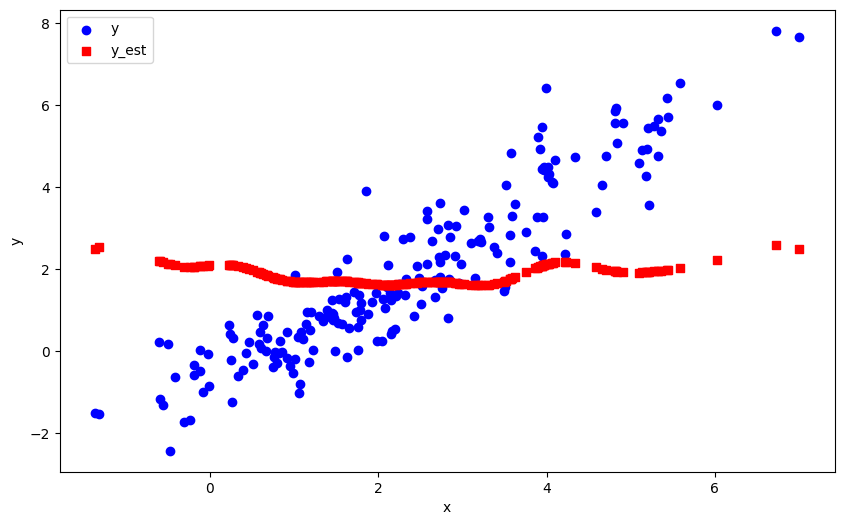

The programm is closed


In [185]:
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

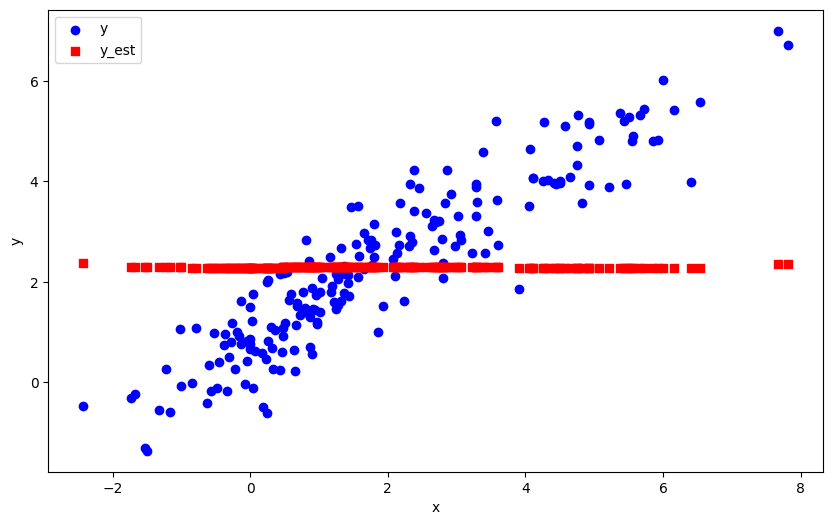

The programm is closed


In [186]:
x_hat = output[:, 0].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(data.iloc[:, 1].to_numpy(), data.iloc[:, 0].to_numpy(), label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(data.iloc[:, 1].to_numpy(), x_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# linear example

In [5]:
size = 100
dim = 4

# DGP A->B->C->D; B<->D, beta is W1, omega is W2
beta = np.array([[0, 1, 0, 0],
                    [0, 0, -1.5, 0],
                    [0, 0, 0, 1],
                    [0, 0, 0, 0]]).T

omega = np.array([[1.2, 0, 0, 0],
                    [0, 1, 0, 0.6],
                    [0, 0, 1, 0],
                    [0, 0.6, 0, 1]])

# generate data according to the graph
true_sigma = np.linalg.inv(np.eye(dim) - beta) @ omega @ np.linalg.inv((np.eye(dim) - beta).T)
X = np.random.multivariate_normal([0] * dim, true_sigma, size=size)
X = X - np.mean(X, axis=0)  # centre the data
data = pd.DataFrame({"A": X[:, 0], "B": X[:, 1], "C": X[:, 2], "D": X[:, 3]})

eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(eq_model2, admg_class = "bowfree", verbose=True)
W1, W2, output = model2.fit(data, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.1

Inner iteration 0
	h(W(model)): 4.0125601445722183e-08
	score(model): 1.2510642751957208
	 mle: 9.063358961143418
	 mse: 4.834272974203872
	W1: tensor([[0.0001, 0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001, 0.0001],
        [0.0001, 0.0001, 0.0001, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.0000001067124196e-08
	W2: tensor([[ 1.0000,  0.0358,  0.0270, -0.0233],
        [ 0.0358,  1.0000,  0.0382,  0.0475],
        [ 0.0270,  0.0382,  1.0000, -0.0021],
        [-0.0233,  0.0475, -0.0021,  1.0000]], grad_fn=<AddBackward0>)
	structure loss: 1.256003785979877e-10
	Sigma: tensor([[ 1.0618,  0.0678, -0.0031, -0.0550],
        [ 0.0678,  1.0648,  0.0073,  0.0154],
        [-0.0031,  0.0073,  1.0596,  0.0278],
        [-0.0550,  0.0154,  0.0278,  1.0627]], grad_fn=<AddBackward0>)
Check M:  tensor([[-0.0237,  0.0000,  0.0000, 

  0%|          | 2/33000.0 [00:04<22:29:51,  2.45s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.14844280599940185
	score(model): -0.009702572610924692
	 mle: -3.1688928368467497
	 mse: 0.735433355470862
	W1: tensor([[1.0000e-04, 4.2814e-01, 3.9291e-01, 6.7087e-01],
        [2.6926e-01, 1.0000e-04, 6.4354e-01, 4.0690e-01],
        [1.6441e-01, 1.9336e-01, 1.0000e-04, 6.6887e-01],
        [1.9327e-01, 2.0971e-01, 2.7847e-01, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.11662220429452999
	W2: tensor([[ 0.4473, -0.1856,  0.2354,  0.0627],
        [-0.1856,  0.3610,  0.0836,  0.1548],
        [ 0.2354,  0.0836,  0.4561, -0.0738],
        [ 0.0627,  0.1548, -0.0738,  0.4059]], grad_fn=<AddBackward0>)
	structure loss: 0.03182060170487186
	Sigma: tensor([[ 0.4479, -0.1852,  0.2350,  0.0636],
        [-0.1852,  0.3620,  0.0833,  0.1588],
        [ 0.2350,  0.0833,  0.4587, -0.0771],
        [ 0.0636,  0.1588, -0.0771,  0.4182]], grad_fn=<AddBackward0>)
Check M:  tensor([[ 0.0133,  0.0000,  0.0000,  0.0000],
        [-0.0172,  0

  0%|          | 3/33000.0 [00:10<34:46:22,  3.79s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.12841469494211266
	score(model): -0.5928138340585317
	 mle: -8.64449288744017
	 mse: 0.904310708394751
	W1: tensor([[1.0000e-04, 4.9793e-01, 3.9919e-01, 6.2932e-01],
        [3.3502e-01, 1.0000e-04, 7.2228e-01, 3.8943e-01],
        [1.7533e-01, 2.3759e-01, 1.0000e-04, 5.0327e-01],
        [1.0233e-01, 1.2973e-01, 1.9514e-01, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.09251170233397987
	W2: tensor([[ 0.3903, -0.1983,  0.2552,  0.0370],
        [-0.1983,  0.2510,  0.1159,  0.0766],
        [ 0.2552,  0.1159,  0.6051, -0.0140],
        [ 0.0370,  0.0766, -0.0140,  1.0869]], grad_fn=<AddBackward0>)
	structure loss: 0.03590299260813279
	Sigma: tensor([[ 0.3902, -0.1985,  0.2553,  0.0366],
        [-0.1985,  0.2510,  0.1158,  0.0762],
        [ 0.2553,  0.1158,  0.6059, -0.0139],
        [ 0.0366,  0.0762, -0.0139,  1.0882]], grad_fn=<AddBackward0>)
Check M:  tensor([[-1.0737,  0.0000,  0.0000,  0.0000],
        [-1.9086,  0.404

  0%|          | 4/33000.0 [00:15<39:36:50,  4.32s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.06942860100680458
	score(model): 0.058601374502309136
	 mle: -1.3927373675786643
	 mse: 0.7288430124278004
	W1: tensor([[1.0000e-04, 4.1018e-01, 3.9734e-01, 5.8147e-01],
        [2.3557e-01, 1.0000e-04, 6.2918e-01, 3.1728e-01],
        [1.1752e-01, 1.8667e-01, 1.0000e-04, 5.5322e-01],
        [1.0095e-01, 1.3912e-01, 2.0917e-01, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.05046669282978143
	W2: tensor([[ 0.4577, -0.1457,  0.1600,  0.0850],
        [-0.1457,  0.2788,  0.0685,  0.2043],
        [ 0.1600,  0.0685,  0.5394, -0.0279],
        [ 0.0850,  0.2043, -0.0279,  0.7819]], grad_fn=<AddBackward0>)
	structure loss: 0.018961908177023146
	Sigma: tensor([[ 0.4573, -0.1460,  0.1602,  0.0851],
        [-0.1460,  0.2786,  0.0685,  0.2045],
        [ 0.1602,  0.0685,  0.5391, -0.0279],
        [ 0.0851,  0.2045, -0.0279,  0.7825]], grad_fn=<AddBackward0>)
Check M:  tensor([[ 0.0209,  0.0000,  0.0000,  0.0000],
        [ 0.0372,  

  0%|          | 5/33000.0 [00:20<40:27:11,  4.41s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.060645894751724785
	score(model): 0.11450945889822534
	 mle: -0.5287776110337039
	 mse: 0.7367723783266579
	W1: tensor([[1.0000e-04, 3.2639e-01, 4.1074e-01, 5.4123e-01],
        [2.1186e-01, 1.0000e-04, 5.7617e-01, 3.0523e-01],
        [1.2847e-01, 1.9298e-01, 1.0000e-04, 5.4491e-01],
        [1.0431e-01, 1.5678e-01, 2.3255e-01, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.047412542169992675
	W2: tensor([[ 0.5772, -0.0305,  0.1416,  0.0821],
        [-0.0305,  0.3166,  0.0665,  0.2064],
        [ 0.1416,  0.0665,  0.5521, -0.0440],
        [ 0.0821,  0.2064, -0.0440,  0.7463]], grad_fn=<AddBackward0>)
	structure loss: 0.01323335258173211
	Sigma: tensor([[ 0.5766, -0.0310,  0.1417,  0.0822],
        [-0.0310,  0.3162,  0.0665,  0.2068],
        [ 0.1417,  0.0665,  0.5521, -0.0443],
        [ 0.0822,  0.2068, -0.0443,  0.7476]], grad_fn=<AddBackward0>)
Check M:  tensor([[ 0.0178,  0.0000,  0.0000,  0.0000],
        [ 0.0394,  

  0%|          | 6/33000.0 [00:24<40:31:49,  4.42s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.057069627298754685
	score(model): 0.21724055529103292
	 mle: 1.1480414195656619
	 mse: 0.930711742970295
	W1: tensor([[1.0000e-04, 3.1712e-01, 3.4882e-01, 5.0930e-01],
        [2.2623e-01, 1.0000e-04, 4.0231e-01, 3.5113e-01],
        [1.7933e-01, 2.1322e-01, 1.0000e-04, 5.1430e-01],
        [1.4928e-01, 1.6247e-01, 2.8574e-01, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.05295128728771923
	W2: tensor([[ 0.7295,  0.0105, -0.0098,  0.0523],
        [ 0.0105,  0.4909, -0.0707, -0.1193],
        [-0.0098, -0.0707,  0.7835,  0.0206],
        [ 0.0523, -0.1193,  0.0206,  0.8733]], grad_fn=<AddBackward0>)
	structure loss: 0.004118340011035455
	Sigma: tensor([[ 0.7294,  0.0109, -0.0098,  0.0540],
        [ 0.0109,  0.4906, -0.0701, -0.1158],
        [-0.0098, -0.0701,  0.7791,  0.0199],
        [ 0.0540, -0.1158,  0.0199,  0.8671]], grad_fn=<AddBackward0>)
Check M:  tensor([[ 0.0234,  0.0000,  0.0000,  0.0000],
        [-0.0078,  0.

  0%|          | 8/33000.0 [00:29<30:35:25,  3.34s/it]


mu 0.010000000000000002

Inner iteration 1000
	h(W(model)): 0.0011031814724873777
	score(model): 0.014070481733423646
	 mle: 0.8355757422088135
	 mse: 0.8522579430096688
	W1: tensor([[1.0000e-04, 6.6069e-01, 1.1522e+00, 1.3647e+00],
        [2.5790e-02, 1.0000e-04, 1.4071e+00, 1.4423e+00],
        [9.3369e-03, 9.7722e-03, 1.0000e-04, 1.4329e+00],
        [4.0563e-03, 3.4221e-03, 1.0794e-02, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011020612888301695
	W2: tensor([[ 8.5433e-01,  1.3007e-03, -3.6529e-04, -1.2191e-04],
        [ 1.3007e-03,  7.0348e-01,  1.4876e-04, -1.6150e-04],
        [-3.6529e-04,  1.4876e-04,  7.0112e-01, -1.9450e-04],
        [-1.2191e-04, -1.6150e-04, -1.9450e-04,  4.8928e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 1.1201836572082187e-06
	Sigma: tensor([[ 8.5452e-01,  1.2586e-03, -3.9913e-04,  1.3829e-06],
        [ 1.2586e-03,  7.0345e-01,  1.7445e-04, -1.0391e-04],
        [-3.9913e-04,  1.7445e-04,  7.0101e-01, -2.9781e-04],
     

  0%|          | 9/33000.0 [00:33<33:11:26,  3.62s/it]


mu 0.010000000000000002

Inner iteration 2000
	h(W(model)): 0.0008879330577941195
	score(model): 0.013163540908853409
	 mle: 0.6989878094158972
	 mse: 0.8343412911315653
	W1: tensor([[1.0000e-04, 6.9480e-01, 1.2371e+00, 1.4786e+00],
        [2.3206e-02, 1.0000e-04, 1.4967e+00, 1.6016e+00],
        [7.4832e-03, 8.4667e-03, 1.0000e-04, 1.6558e+00],
        [3.0455e-03, 2.5245e-03, 7.7831e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008870521852717417
	W2: tensor([[ 8.5893e-01,  1.0367e-03, -1.2074e-04, -1.1083e-04],
        [ 1.0367e-03,  7.0053e-01,  9.8116e-05, -1.8109e-04],
        [-1.2074e-04,  9.8116e-05,  6.8665e-01, -2.7450e-04],
        [-1.1083e-04, -1.8109e-04, -2.7450e-04,  4.3583e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 8.808725223777856e-07
	Sigma: tensor([[ 8.5893e-01,  1.0377e-03, -1.2043e-04, -1.0842e-04],
        [ 1.0377e-03,  7.0053e-01,  9.9158e-05, -1.8051e-04],
        [-1.2043e-04,  9.9158e-05,  6.8665e-01, -2.7391e-04],
      

  0%|          | 10/33000.0 [00:37<35:00:21,  3.82s/it]


mu 0.010000000000000002

Inner iteration 3000
	h(W(model)): 0.0008960763436113132
	score(model): 0.013107875543631374
	 mle: 0.6885768621512489
	 mse: 0.832950758171663
	W1: tensor([[1.0000e-04, 6.9898e-01, 1.2412e+00, 1.4860e+00],
        [2.3442e-02, 1.0000e-04, 1.5024e+00, 1.6117e+00],
        [7.6537e-03, 8.4077e-03, 1.0000e-04, 1.6743e+00],
        [2.3017e-03, 3.1742e-03, 7.6537e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008952019814856271
	W2: tensor([[ 8.5896e-01,  1.0115e-03, -1.2196e-04, -1.0973e-04],
        [ 1.0115e-03,  6.9940e-01,  1.0314e-04, -1.8267e-04],
        [-1.2196e-04,  1.0314e-04,  6.8580e-01, -2.7611e-04],
        [-1.0973e-04, -1.8267e-04, -2.7611e-04,  4.3222e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 8.743621256860918e-07
	Sigma: tensor([[ 8.5896e-01,  1.0125e-03, -1.2112e-04, -1.1057e-04],
        [ 1.0125e-03,  6.9940e-01,  1.0256e-04, -1.8305e-04],
        [-1.2112e-04,  1.0256e-04,  6.8579e-01, -2.7676e-04],
       

  0%|          | 11/33000.0 [00:42<36:39:52,  4.00s/it]


mu 0.010000000000000002

Inner iteration 4000
	h(W(model)): 0.0009164075855870085
	score(model): 0.013115757816575155
	 mle: 0.6876502148538552
	 mse: 0.8324811731010247
	W1: tensor([[1.0000e-04, 7.0139e-01, 1.2484e+00, 1.4867e+00],
        [2.2792e-02, 1.0000e-04, 1.5019e+00, 1.6054e+00],
        [7.3517e-03, 8.3008e-03, 1.0000e-04, 1.6662e+00],
        [3.4137e-03, 2.5943e-03, 7.9045e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009155317757456594
	W2: tensor([[ 8.5897e-01,  9.9112e-04, -1.2690e-04, -1.1853e-04],
        [ 9.9112e-04,  6.9894e-01,  1.0350e-04, -1.8098e-04],
        [-1.2690e-04,  1.0350e-04,  6.8546e-01, -2.8614e-04],
        [-1.1853e-04, -1.8098e-04, -2.8614e-04,  4.3276e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 8.758098413491535e-07
	Sigma: tensor([[ 8.5898e-01,  9.9048e-04, -1.2576e-04, -1.0938e-04],
        [ 9.9048e-04,  6.9894e-01,  1.0084e-04, -1.8110e-04],
        [-1.2576e-04,  1.0084e-04,  6.8547e-01, -2.8120e-04],
      

  0%|          | 12/33000.0 [00:46<37:51:14,  4.13s/it]


mu 0.010000000000000002

Inner iteration 4999
	h(W(model)): 0.0008471892090316684
	score(model): 0.013035295502692145
	 mle: 0.6849535123344894
	 mse: 0.8319481494665663
	W1: tensor([[1.0000e-04, 7.0240e-01, 1.2503e+00, 1.4919e+00],
        [2.3101e-02, 1.0000e-04, 1.5105e+00, 1.6136e+00],
        [7.4568e-03, 8.1077e-03, 1.0000e-04, 1.6786e+00],
        [2.1933e-03, 2.1868e-03, 8.1341e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.0008461913606767624
	W2: tensor([[ 8.5885e-01,  9.8571e-04, -1.3750e-04, -7.6244e-05],
        [ 9.8571e-04,  6.9879e-01,  1.1755e-04, -1.9727e-04],
        [-1.3750e-04,  1.1755e-04,  6.8514e-01, -3.4870e-04],
        [-7.6244e-05, -1.9727e-04, -3.4870e-04,  4.3228e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 9.978483549060498e-07
	Sigma: tensor([[ 8.5885e-01,  9.8426e-04, -1.2860e-04, -2.4028e-05],
        [ 9.8426e-04,  6.9879e-01,  5.1453e-05, -1.6366e-04],
        [-1.2860e-04,  5.1453e-05,  6.8516e-01, -6.2967e-05],
      

  0%|          | 16/33000.0 [00:51<20:50:22,  2.27s/it]


mu 0.0010000000000000002

Inner iteration 1000
	h(W(model)): 0.00015951607113488
	score(model): 0.0024521691210964746
	 mle: 2.174607543335559
	 mse: 1.216594582339737
	W1: tensor([[1.0000e-04, 4.9271e-01, 7.5092e-01, 8.5162e-01],
        [1.1786e-02, 1.0000e-04, 8.3454e-01, 7.6295e-01],
        [5.9795e-03, 6.7691e-03, 1.0000e-04, 8.2784e-01],
        [3.0909e-03, 3.9485e-03, 7.4015e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.00015904093574431902
	W2: tensor([[ 8.7576e-01,  9.7071e-04, -2.0435e-04, -9.7917e-05],
        [ 9.7071e-04,  7.6591e-01, -4.4222e-04, -1.2381e-04],
        [-2.0435e-04, -4.4222e-04,  8.7005e-01,  3.2099e-04],
        [-9.7917e-05, -1.2381e-04,  3.2099e-04,  8.3077e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 4.7513539056098374e-07
	Sigma: tensor([[ 8.7570e-01,  9.6970e-04, -2.0764e-04, -9.0024e-05],
        [ 9.6970e-04,  7.6578e-01, -4.3569e-04, -1.2348e-04],
        [-2.0764e-04, -4.3569e-04,  8.6979e-01,  3.1803e-04],
      

  0%|          | 17/33000.0 [00:55<24:31:47,  2.68s/it]


mu 0.0010000000000000002

Inner iteration 2000
	h(W(model)): 0.00012349717882570446
	score(model): 0.001829258547014898
	 mle: 1.437403200681179
	 mse: 0.9914300370104591
	W1: tensor([[1.0000e-04, 5.6106e-01, 8.1636e-01, 1.0072e+00],
        [9.8188e-03, 1.0000e-04, 1.0907e+00, 1.0444e+00],
        [5.3446e-03, 4.9599e-03, 1.0000e-04, 1.0542e+00],
        [2.3974e-03, 1.6183e-03, 3.4487e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.00012338133488287717
	W2: tensor([[ 8.8039e-01,  5.8458e-04, -5.1533e-05, -3.0689e-05],
        [ 5.8458e-04,  7.3919e-01, -5.1278e-05, -3.9778e-05],
        [-5.1533e-05, -5.1278e-05,  7.6579e-01,  2.4375e-05],
        [-3.0689e-05, -3.9778e-05,  2.4375e-05,  6.3988e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 1.1584394282729217e-07
	Sigma: tensor([[ 8.8040e-01,  5.8430e-04, -5.1440e-05, -3.0679e-05],
        [ 5.8430e-04,  7.3918e-01, -5.1156e-05, -3.9688e-05],
        [-5.1440e-05, -5.1156e-05,  7.6576e-01,  2.4321e-05],
   

  0%|          | 18/33000.0 [01:00<27:44:52,  3.03s/it]


mu 0.0010000000000000002

Inner iteration 3000
	h(W(model)): 0.00011265116744043741
	score(model): 0.001673645566321197
	 mle: 1.2135325530144372
	 mse: 0.9454867304782618
	W1: tensor([[1.0000e-04, 5.9530e-01, 8.5625e-01, 1.0891e+00],
        [9.0071e-03, 1.0000e-04, 1.1724e+00, 1.1552e+00],
        [4.9012e-03, 4.3558e-03, 1.0000e-04, 1.1914e+00],
        [2.0675e-03, 1.2859e-03, 2.4412e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.00011258072032949151
	W2: tensor([[ 8.8354e-01,  4.3130e-04, -4.5597e-05, -2.7597e-05],
        [ 4.3130e-04,  7.3072e-01, -1.6148e-05, -3.3616e-05],
        [-4.5597e-05, -1.6148e-05,  7.4755e-01, -1.2330e-05],
        [-2.7597e-05, -3.3616e-05, -1.2330e-05,  5.5699e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 7.044711094590054e-08
	Sigma: tensor([[ 8.8354e-01,  4.3121e-04, -4.5596e-05, -2.7594e-05],
        [ 4.3121e-04,  7.3072e-01, -1.6136e-05, -3.3612e-05],
        [-4.5596e-05, -1.6136e-05,  7.4754e-01, -1.2345e-05],
   

  0%|          | 19/33000.0 [01:04<30:50:12,  3.37s/it]


mu 0.0010000000000000002

Inner iteration 4000
	h(W(model)): 0.00010292153469502824
	score(model): 0.0016077819356628469
	 mle: 1.115831772160857
	 mse: 0.9294400324828618
	W1: tensor([[1.0000e-04, 6.1598e-01, 8.9639e-01, 1.1616e+00],
        [8.5083e-03, 1.0000e-04, 1.2208e+00, 1.2476e+00],
        [4.4775e-03, 4.0064e-03, 1.0000e-04, 1.3122e+00],
        [1.7812e-03, 1.0748e-03, 1.8018e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 0.00010286891284039257
	W2: tensor([[ 8.8616e-01,  3.5639e-04, -4.3340e-05, -2.4564e-05],
        [ 3.5639e-04,  7.2758e-01, -8.2675e-06, -2.9467e-05],
        [-4.3340e-05, -8.2675e-06,  7.3927e-01, -1.9331e-05],
        [-2.4564e-05, -2.9467e-05, -1.9331e-05,  5.1786e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 5.262185463567536e-08
	Sigma: tensor([[ 8.8616e-01,  3.5634e-04, -4.3338e-05, -2.4562e-05],
        [ 3.5634e-04,  7.2758e-01, -8.2630e-06, -2.9464e-05],
        [-4.3338e-05, -8.2630e-06,  7.3926e-01, -1.9333e-05],
   

  0%|          | 20/33000.0 [01:09<33:20:10,  3.64s/it]


mu 0.0010000000000000002

Inner iteration 4999
	h(W(model)): 9.348227374395011e-05
	score(model): 0.0015654243035875019
	 mle: 1.0546137928970252
	 mse: 0.9206645582049781
	W1: tensor([[1.0000e-04, 6.3051e-01, 9.4076e-01, 1.2324e+00],
        [8.0450e-03, 1.0000e-04, 1.2639e+00, 1.3273e+00],
        [4.0790e-03, 3.7047e-03, 1.0000e-04, 1.4190e+00],
        [1.5172e-03, 9.1402e-04, 1.4325e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 9.343827821561845e-05
	W2: tensor([[ 8.8862e-01,  3.1584e-04, -4.0958e-05, -2.2166e-05],
        [ 3.1584e-04,  7.2617e-01, -4.1604e-06, -2.6754e-05],
        [-4.0958e-05, -4.1604e-06,  7.3280e-01, -2.0098e-05],
        [-2.2166e-05, -2.6754e-05, -2.0098e-05,  4.9299e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 4.399552833165893e-08
	Sigma: tensor([[ 8.8862e-01,  3.1580e-04, -4.0955e-05, -2.2164e-05],
        [ 3.1580e-04,  7.2617e-01, -4.1566e-06, -2.6751e-05],
        [-4.0955e-05, -4.1566e-06,  7.3279e-01, -2.0098e-05],
    

  0%|          | 22/33000.0 [01:13<28:06:17,  3.07s/it]


mu 0.00010000000000000003

Inner iteration 1000
	h(W(model)): 3.390734345035563e-05
	score(model): 0.0003230742019582619
	 mle: 2.8213263233769927
	 mse: 1.4856433073365845
	W1: tensor([[1.0000e-04, 4.9016e-01, 6.8808e-01, 6.2515e-01],
        [5.4558e-03, 1.0000e-04, 6.7263e-01, 3.9327e-01],
        [3.5837e-03, 3.2967e-03, 1.0000e-04, 4.6525e-01],
        [2.7814e-03, 2.5581e-03, 6.2134e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 3.388185144044868e-05
	W2: tensor([[ 8.9364e-01,  1.2823e-04, -5.2410e-06, -7.9377e-05],
        [ 1.2823e-04,  7.7128e-01, -1.0500e-04, -8.3894e-05],
        [-5.2410e-06, -1.0500e-04,  9.3920e-01,  2.4494e-04],
        [-7.9377e-05, -8.3894e-05,  2.4494e-04,  9.7554e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 2.549200990695135e-08
	Sigma: tensor([[ 8.9370e-01,  1.1890e-04, -1.0150e-05, -8.2326e-05],
        [ 1.1890e-04,  7.7123e-01, -1.1352e-04, -8.4329e-05],
        [-1.0150e-05, -1.1352e-04,  9.3901e-01,  2.3477e-04],
   

  0%|          | 23/33000.0 [01:18<30:57:31,  3.38s/it]


mu 0.00010000000000000003

Inner iteration 2000
	h(W(model)): 2.8069178745077365e-05
	score(model): 0.00023174972056164709
	 mle: 1.8581920754693062
	 mse: 1.117241792890971
	W1: tensor([[1.0000e-04, 5.1463e-01, 6.8981e-01, 8.2393e-01],
        [5.3639e-03, 1.0000e-04, 8.3035e-01, 8.2676e-01],
        [3.5633e-03, 2.8772e-03, 1.0000e-04, 9.5224e-01],
        [1.7821e-03, 9.6956e-04, 7.2743e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 2.8065665307760726e-05
	W2: tensor([[ 8.9578e-01,  8.9793e-05, -2.3207e-05, -7.5394e-06],
        [ 8.9793e-05,  7.6077e-01, -3.8401e-05, -4.9181e-06],
        [-2.3207e-05, -3.8401e-05,  8.3262e-01,  7.4068e-06],
        [-7.5394e-06, -4.9181e-06,  7.4068e-06,  7.1540e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 3.5134373166391104e-09
	Sigma: tensor([[ 8.9578e-01,  8.9885e-05, -2.3300e-05, -7.6185e-06],
        [ 8.9885e-05,  7.6076e-01, -3.8257e-05, -4.9217e-06],
        [-2.3300e-05, -3.8257e-05,  8.3255e-01,  7.3517e-06],


  0%|          | 24/33000.0 [01:22<33:22:53,  3.64s/it]


mu 0.00010000000000000003

Inner iteration 3000
	h(W(model)): 2.4057419363523383e-05
	score(model): 0.00020293044652213387
	 mle: 1.5185966029797442
	 mse: 1.0293344240211026
	W1: tensor([[1.0000e-04, 5.2273e-01, 7.0942e-01, 9.2998e-01],
        [4.8373e-03, 1.0000e-04, 9.5946e-01, 9.6854e-01],
        [3.0480e-03, 2.4918e-03, 1.0000e-04, 1.1122e+00],
        [1.3368e-03, 7.1139e-04, 3.7011e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 2.4055051590005094e-05
	W2: tensor([[ 8.9958e-01,  8.6186e-05, -1.3176e-05, -4.8223e-06],
        [ 8.6186e-05,  7.5904e-01, -1.5147e-05, -4.4798e-06],
        [-1.3176e-05, -1.5147e-05,  7.8867e-01,  5.7637e-07],
        [-4.8223e-06, -4.4798e-06,  5.7637e-07,  6.0500e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 2.3677735182885107e-09
	Sigma: tensor([[ 8.9959e-01,  8.6187e-05, -1.3170e-05, -4.8197e-06],
        [ 8.6187e-05,  7.5904e-01, -1.5133e-05, -4.4802e-06],
        [-1.3170e-05, -1.5133e-05,  7.8865e-01,  5.7109e-07],

  0%|          | 25/33000.0 [01:27<36:15:58,  3.96s/it]


mu 0.00010000000000000003

Inner iteration 4000
	h(W(model)): 1.7726057539278524e-05
	score(model): 0.0001875460961612786
	 mle: 1.3732741088478688
	 mse: 1.0016058462088058
	W1: tensor([[1.0000e-04, 5.2784e-01, 7.4282e-01, 1.0521e+00],
        [4.1619e-03, 1.0000e-04, 1.0478e+00, 1.0994e+00],
        [2.3830e-03, 2.0696e-03, 1.0000e-04, 1.2602e+00],
        [9.3762e-04, 5.0060e-04, 2.2320e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 1.77239046565969e-05
	W2: tensor([[ 9.0451e-01,  8.4884e-05, -9.9329e-06, -3.6767e-06],
        [ 8.4884e-05,  7.5893e-01, -7.1691e-06, -3.7517e-06],
        [-9.9329e-06, -7.1691e-06,  7.7045e-01, -1.2430e-06],
        [-3.6767e-06, -3.7517e-06, -1.2430e-06,  5.4869e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 2.1528826816232167e-09
	Sigma: tensor([[ 9.0452e-01,  8.4879e-05, -9.9309e-06, -3.6757e-06],
        [ 8.4879e-05,  7.5892e-01, -7.1642e-06, -3.7509e-06],
        [-9.9309e-06, -7.1642e-06,  7.7043e-01, -1.2437e-06],
  

  0%|          | 26/33000.0 [01:32<38:14:31,  4.18s/it]


mu 0.00010000000000000003

Inner iteration 4999
	h(W(model)): 1.2367183309211227e-05
	score(model): 0.00017696997026602165
	 mle: 1.2814828373916
	 mse: 0.9870647435537632
	W1: tensor([[1.0000e-04, 5.4513e-01, 8.0227e-01, 1.1729e+00],
        [3.4283e-03, 1.0000e-04, 1.1160e+00, 1.2096e+00],
        [1.7415e-03, 1.6614e-03, 1.0000e-04, 1.3921e+00],
        [6.7349e-04, 3.7078e-04, 1.9681e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 1.2365379618906047e-05
	W2: tensor([[ 9.0988e-01,  7.5827e-05, -8.3561e-06, -2.9235e-06],
        [ 7.5827e-05,  7.5579e-01, -4.0768e-06, -3.1400e-06],
        [-8.3561e-06, -4.0768e-06,  7.5882e-01, -1.2749e-06],
        [-2.9235e-06, -3.1400e-06, -1.2749e-06,  5.1298e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 1.8036903051793745e-09
	Sigma: tensor([[ 9.0988e-01,  7.5814e-05, -8.3583e-06, -2.9241e-06],
        [ 7.5814e-05,  7.5578e-01, -4.0719e-06, -3.1473e-06],
        [-8.3583e-06, -4.0719e-06,  7.5880e-01, -1.2656e-06],
  

  0%|          | 28/33000.0 [01:37<31:07:22,  3.40s/it]


mu 1.0000000000000004e-05

Inner iteration 1000
	h(W(model)): 1.375232396517514e-05
	score(model): 6.032943723629452e-05
	 mle: 4.542202980583804
	 mse: 2.4356773797041185
	W1: tensor([[1.0000e-04, 3.5485e-01, 4.9144e-01, 3.8601e-01],
        [3.0645e-03, 1.0000e-04, 5.0760e-01, 3.1817e-01],
        [1.8212e-03, 3.7877e-03, 1.0000e-04, 1.3789e-01],
        [1.6383e-03, 4.7767e-03, 1.6293e-02, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 1.374547755615362e-05
	W2: tensor([[ 9.1219e-01,  3.5125e-05, -5.9755e-05, -7.3268e-05],
        [ 3.5125e-05,  8.5383e-01,  2.0812e-05,  1.0865e-05],
        [-5.9755e-05,  2.0812e-05,  1.0688e+00,  5.0441e-04],
        [-7.3268e-05,  1.0865e-05,  5.0441e-04,  1.2843e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 6.846409021519489e-09
	Sigma: tensor([[ 9.1201e-01,  4.6002e-05, -5.4762e-05, -6.4336e-05],
        [ 4.6002e-05,  8.5385e-01,  1.4313e-05,  4.5813e-06],
        [-5.4762e-05,  1.4313e-05,  1.0688e+00,  5.0986e-04],
    

  0%|          | 29/33000.0 [01:41<34:17:59,  3.75s/it]


mu 1.0000000000000004e-05

Inner iteration 2000
	h(W(model)): 5.609886965804844e-06
	score(model): 4.85477329981342e-05
	 mle: 4.202087895663843
	 mse: 2.2207794093324527
	W1: tensor([[1.0000e-04, 3.7974e-01, 5.0120e-01, 4.4749e-01],
        [2.5918e-03, 1.0000e-04, 5.2052e-01, 3.1083e-01],
        [1.6534e-03, 1.9417e-03, 1.0000e-04, 1.2849e-01],
        [1.2172e-03, 2.7160e-03, 1.0183e-02, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 5.6057119218774075e-06
	W2: tensor([[ 9.1099e-01,  2.6726e-05, -1.4260e-05, -2.0619e-05],
        [ 2.6726e-05,  8.3096e-01, -2.0202e-05, -3.2448e-05],
        [-1.4260e-05, -2.0202e-05,  1.0528e+00,  4.7343e-04],
        [-2.0619e-05, -3.2448e-05,  4.7343e-04,  1.2271e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 4.175043927436802e-09
	Sigma: tensor([[ 9.1099e-01,  2.6609e-05, -1.4291e-05, -2.0580e-05],
        [ 2.6609e-05,  8.3095e-01, -2.0281e-05, -3.2376e-05],
        [-1.4291e-05, -2.0281e-05,  1.0527e+00,  4.7336e-04],
    

  0%|          | 30/33000.0 [01:46<35:58:42,  3.93s/it]


mu 1.0000000000000004e-05

Inner iteration 3000
	h(W(model)): 4.246271700614476e-06
	score(model): 4.300275489890492e-05
	 mle: 3.8121453197016835
	 mse: 1.9822797664569047
	W1: tensor([[1.0000e-04, 3.9440e-01, 5.0824e-01, 5.0433e-01],
        [2.4261e-03, 1.0000e-04, 5.4663e-01, 3.2214e-01],
        [1.6416e-03, 1.4888e-03, 1.0000e-04, 1.8314e-01],
        [1.1648e-03, 1.8615e-03, 5.5420e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 4.244564084853796e-06
	W2: tensor([[ 9.1175e-01,  2.3948e-05, -1.2574e-05, -1.3009e-05],
        [ 2.3948e-05,  8.2281e-01, -1.7313e-05, -2.0935e-05],
        [-1.2574e-05, -1.7313e-05,  1.0211e+00,  2.0418e-04],
        [-1.3009e-05, -2.0935e-05,  2.0418e-04,  1.1513e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 1.7076157606801725e-09
	Sigma: tensor([[ 9.1175e-01,  2.3947e-05, -1.2573e-05, -1.3004e-05],
        [ 2.3947e-05,  8.2280e-01, -1.7309e-05, -2.0924e-05],
        [-1.2573e-05, -1.7309e-05,  1.0210e+00,  2.0387e-04],
  

  0%|          | 31/33000.0 [01:50<37:24:41,  4.09s/it]


mu 1.0000000000000004e-05

Inner iteration 4000
	h(W(model)): 3.5241799547289493e-06
	score(model): 3.6448632105545777e-05
	 mle: 3.2489297545758355
	 mse: 1.6717858951999998
	W1: tensor([[1.0000e-04, 4.0616e-01, 5.1793e-01, 5.7041e-01],
        [2.2971e-03, 1.0000e-04, 5.9349e-01, 3.5770e-01],
        [1.6058e-03, 1.3424e-03, 1.0000e-04, 4.5234e-01],
        [1.0534e-03, 1.2043e-03, 1.3779e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 3.5238708524773352e-06
	W2: tensor([[ 9.1286e-01,  2.1956e-05, -1.0831e-05, -7.4087e-06],
        [ 2.1956e-05,  8.1629e-01, -1.3290e-05, -8.0814e-06],
        [-1.0831e-05, -1.3290e-05,  9.7913e-01,  2.3152e-05],
        [-7.4087e-06, -8.0814e-06,  2.3152e-05,  1.0217e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 3.091022516141073e-10
	Sigma: tensor([[ 9.1286e-01,  2.1954e-05, -1.0829e-05, -7.4034e-06],
        [ 2.1954e-05,  8.1628e-01, -1.3286e-05, -8.0655e-06],
        [-1.0829e-05, -1.3286e-05,  9.7909e-01,  2.3090e-05],


  0%|          | 32/33000.0 [01:55<38:21:30,  4.19s/it]


mu 1.0000000000000004e-05

Inner iteration 4999
	h(W(model)): 3.2289348938357127e-06
	score(model): 3.135632086991224e-05
	 mle: 2.75320325080336
	 mse: 1.4424524190559174
	W1: tensor([[1.0000e-04, 4.2020e-01, 5.2250e-01, 6.6420e-01],
        [2.1872e-03, 1.0000e-04, 6.4775e-01, 5.6580e-01],
        [1.5448e-03, 1.2613e-03, 1.0000e-04, 7.8401e-01],
        [8.9176e-04, 6.2250e-04, 3.0950e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 3.2287887059068922e-06
	W2: tensor([[ 9.1439e-01,  1.9858e-05, -8.8813e-06, -3.6309e-06],
        [ 1.9858e-05,  8.0864e-01, -9.6029e-06, -1.6459e-06],
        [-8.8813e-06, -9.6029e-06,  9.3443e-01,  3.9614e-06],
        [-3.6309e-06, -1.6459e-06,  3.9614e-06,  8.9931e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 1.4618792882048674e-10
	Sigma: tensor([[ 9.1440e-01,  1.9856e-05, -8.8793e-06, -3.6290e-06],
        [ 1.9856e-05,  8.0863e-01, -9.5994e-06, -1.6447e-06],
        [-8.8793e-06, -9.5994e-06,  9.3439e-01,  3.9573e-06],
  

  0%|          | 34/33000.0 [02:00<30:44:26,  3.36s/it]


mu 1.0000000000000004e-06

Inner iteration 1000
	h(W(model)): 1.6526910065896654e-06
	score(model): 6.877261680910465e-06
	 mle: 5.057733432826815
	 mse: 2.7788549490344345
	W1: tensor([[1.0000e-04, 3.0331e-01, 4.2870e-01, 2.3749e-01],
        [1.9352e-03, 1.0000e-04, 3.6249e-01, 1.2336e-01],
        [1.2397e-03, 1.5901e-03, 1.0000e-04, 3.5609e-02],
        [1.5307e-03, 4.0635e-03, 1.3867e-02, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 1.6516802862321421e-06
	W2: tensor([[ 9.0940e-01,  4.3278e-05, -3.2381e-05, -6.4756e-05],
        [ 4.3278e-05,  8.8122e-01, -2.4482e-05,  2.3329e-05],
        [-3.2381e-05, -2.4482e-05,  1.1225e+00,  4.6967e-04],
        [-6.4756e-05,  2.3329e-05,  4.6967e-04,  1.3594e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 1.010720357523288e-09
	Sigma: tensor([[ 9.0969e-01,  4.7400e-05, -3.8416e-05, -6.5902e-05],
        [ 4.7400e-05,  8.8132e-01, -1.3970e-05,  1.9013e-05],
        [-3.8416e-05, -1.3970e-05,  1.1223e+00,  4.6974e-04],
  

  0%|          | 35/33000.0 [02:04<33:15:31,  3.63s/it]


mu 1.0000000000000004e-06

Inner iteration 2000
	h(W(model)): 1.0829659836383774e-06
	score(model): 6.133499007098156e-06
	 mle: 4.8975008163566365
	 mse: 2.6735245196053556
	W1: tensor([[1.0000e-04, 3.1686e-01, 4.2739e-01, 2.4729e-01],
        [1.7363e-03, 1.0000e-04, 3.8326e-01, 1.1689e-01],
        [1.1295e-03, 9.1831e-04, 1.0000e-04, 3.2902e-02],
        [1.4529e-03, 2.9464e-03, 1.0144e-02, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 1.0822613140424493e-06
	W2: tensor([[ 9.1664e-01,  4.8699e-06, -2.4129e-06, -7.8028e-06],
        [ 4.8699e-06,  8.6318e-01, -4.1368e-06, -3.4453e-05],
        [-2.4129e-06, -4.1368e-06,  1.0968e+00,  7.5670e-04],
        [-7.8028e-06, -3.4453e-05,  7.5670e-04,  1.3427e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 7.04669595928067e-10
	Sigma: tensor([[ 9.1664e-01,  4.9242e-06, -2.4415e-06, -7.8438e-06],
        [ 4.9242e-06,  8.6318e-01, -4.0252e-06, -3.4473e-05],
        [-2.4415e-06, -4.0252e-06,  1.0968e+00,  7.5666e-04],
  

  0%|          | 36/33000.0 [02:09<35:12:56,  3.85s/it]


mu 1.0000000000000004e-06

Inner iteration 3000
	h(W(model)): 8.719836011667364e-07
	score(model): 5.703815914244123e-06
	 mle: 4.698752760897411
	 mse: 2.5411950254767985
	W1: tensor([[1.0000e-04, 3.2448e-01, 4.2728e-01, 2.3292e-01],
        [1.5475e-03, 1.0000e-04, 4.1341e-01, 1.3001e-01],
        [1.0126e-03, 7.5946e-04, 1.0000e-04, 3.8843e-02],
        [1.4716e-03, 2.1491e-03, 6.9966e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 8.7148824309542e-07
	W2: tensor([[ 9.1815e-01,  4.3556e-06, -2.0428e-06, -8.8688e-06],
        [ 4.3556e-06,  8.5946e-01, -3.4360e-06, -2.5464e-05],
        [-2.0428e-06, -3.4360e-06,  1.0680e+00,  5.5241e-04],
        [-8.8688e-06, -2.5464e-05,  5.5241e-04,  1.3185e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 4.95358071316396e-10
	Sigma: tensor([[ 9.1815e-01,  4.3563e-06, -2.0438e-06, -8.8704e-06],
        [ 4.3563e-06,  8.5945e-01, -3.4343e-06, -2.5455e-05],
        [-2.0438e-06, -3.4343e-06,  1.0680e+00,  5.5199e-04],
       

  0%|          | 37/33000.0 [02:13<36:42:37,  4.01s/it]


mu 1.0000000000000004e-06

Inner iteration 4000
	h(W(model)): 6.91014517613888e-07
	score(model): 5.181871162212012e-06
	 mle: 4.3887792365668865
	 mse: 2.335228945184757
	W1: tensor([[1.0000e-04, 3.3129e-01, 4.3682e-01, 1.9719e-01],
        [1.3217e-03, 1.0000e-04, 4.6004e-01, 1.4388e-01],
        [8.4118e-04, 6.2269e-04, 1.0000e-04, 8.9086e-02],
        [1.5345e-03, 1.6209e-03, 2.8830e-03, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 6.909198234571179e-07
	W2: tensor([[ 9.1999e-01,  4.1525e-06, -1.8090e-06, -1.1713e-05],
        [ 4.1525e-06,  8.5581e-01, -2.5841e-06, -1.8293e-05],
        [-1.8090e-06, -2.5841e-06,  1.0317e+00,  9.9402e-05],
        [-1.1713e-05, -1.8293e-05,  9.9402e-05,  1.2703e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 9.469415677015846e-11
	Sigma: tensor([[ 9.1999e-01,  4.1523e-06, -1.8087e-06, -1.1718e-05],
        [ 4.1523e-06,  8.5581e-01, -2.5832e-06, -1.8292e-05],
        [-1.8087e-06, -2.5832e-06,  1.0317e+00,  9.9099e-05],
     

  0%|          | 38/33000.0 [02:17<37:48:34,  4.13s/it]


mu 1.0000000000000004e-06

Inner iteration 5000
	h(W(model)): 5.764221784414975e-07
	score(model): 4.40690386548867e-06
	 mle: 3.7820244841622053
	 mse: 1.9495098633678396
	W1: tensor([[1.0000e-04, 3.3956e-01, 4.4740e-01, 2.0658e-01],
        [1.1205e-03, 1.0000e-04, 5.1878e-01, 1.7162e-01],
        [7.2458e-04, 4.9438e-04, 1.0000e-04, 3.2362e-01],
        [1.2988e-03, 1.2037e-03, 1.5212e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 5.764096645067248e-07
	W2: tensor([[ 9.2224e-01,  3.9272e-06, -1.5215e-06, -9.0972e-06],
        [ 3.9272e-06,  8.5171e-01, -1.8311e-06, -8.8214e-06],
        [-1.5215e-06, -1.8311e-06,  9.9132e-01,  5.8188e-06],
        [-9.0972e-06, -8.8214e-06,  5.8188e-06,  1.1389e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 1.2513934772717904e-11
	Sigma: tensor([[ 9.2225e-01,  3.9269e-06, -1.5212e-06, -9.0894e-06],
        [ 3.9269e-06,  8.5170e-01, -1.8304e-06, -8.8097e-06],
        [-1.5212e-06, -1.8304e-06,  9.9128e-01,  5.8091e-06],
   

  0%|          | 39/33000.0 [02:22<38:36:55,  4.22s/it]


mu 1.0000000000000004e-06

Inner iteration 6000
	h(W(model)): 4.885328296881064e-07
	score(model): 3.841323985860868e-06
	 mle: 3.320485554248342
	 mse: 1.695906016807594
	W1: tensor([[1.0000e-04, 3.4983e-01, 4.4171e-01, 2.6418e-01],
        [9.3019e-04, 1.0000e-04, 5.6862e-01, 2.3319e-01],
        [6.3221e-04, 4.1136e-04, 1.0000e-04, 4.5428e-01],
        [9.3653e-04, 7.5824e-04, 2.6934e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 4.885275858006613e-07
	W2: tensor([[ 9.2503e-01,  3.6613e-06, -1.3795e-06, -4.1746e-06],
        [ 3.6613e-06,  8.4718e-01, -1.3638e-06, -2.6073e-06],
        [-1.3795e-06, -1.3638e-06,  9.6112e-01,  2.2499e-06],
        [-4.1746e-06, -2.6073e-06,  2.2499e-06,  1.0256e+00]],
       grad_fn=<AddBackward0>)
	structure loss: 5.2438874451675134e-12
	Sigma: tensor([[ 9.2503e-01,  3.6610e-06, -1.3791e-06, -4.1673e-06],
        [ 3.6610e-06,  8.4718e-01, -1.3633e-06, -2.6009e-06],
        [-1.3791e-06, -1.3633e-06,  9.6108e-01,  2.2444e-06],
    

  0%|          | 40/33000.0 [02:26<39:07:31,  4.27s/it]


mu 1.0000000000000004e-06

Inner iteration 7000
	h(W(model)): 4.796915488791253e-07
	score(model): 3.5223755772596276e-06
	 mle: 3.0051138724306132
	 mse: 1.5449579374589348
	W1: tensor([[1.0000e-04, 3.5898e-01, 4.3702e-01, 3.1478e-01],
        [7.5942e-04, 1.0000e-04, 6.1630e-01, 2.9806e-01],
        [5.4625e-04, 3.6002e-04, 1.0000e-04, 5.0646e-01],
        [6.9876e-04, 4.4561e-04, 6.9374e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 4.796011434823331e-07
	W2: tensor([[ 9.2812e-01,  3.4048e-06, -1.2132e-06, -2.1145e-06],
        [ 3.4048e-06,  8.4391e-01, -1.0869e-06, -8.6125e-07],
        [-1.2132e-06, -1.0869e-06,  9.3751e-01, -1.8488e-05],
        [-2.1145e-06, -8.6125e-07, -1.8488e-05,  9.4119e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 9.040539679219657e-11
	Sigma: tensor([[ 9.2813e-01,  3.4369e-06, -1.2523e-06, -2.1066e-06],
        [ 3.4369e-06,  8.4391e-01, -1.0014e-06, -8.6065e-07],
        [-1.2523e-06, -1.0014e-06,  9.3748e-01,  7.0917e-06],
  

  0%|          | 41/33000.0 [02:31<33:45:44,  3.69s/it]


mu 1.0000000000000004e-06

Inner iteration 7999
	h(W(model)): 4.972521070895137e-07
	score(model): 3.324868718484704e-06
	 mle: 2.7742719846290527
	 mse: 1.4472077257573863
	W1: tensor([[1.0000e-04, 3.6691e-01, 4.4014e-01, 3.4001e-01],
        [8.3071e-04, 1.0000e-04, 6.4366e-01, 3.7277e-01],
        [7.5531e-04, 2.6144e-04, 1.0000e-04, 5.7168e-01],
        [8.4964e-04, 2.5226e-04, 2.4418e-04, 1.0000e-04]],
       grad_fn=<SqrtBackward0>)
	cycle loss: 4.963214628482872e-07
	W2: tensor([[ 9.2999e-01,  2.7028e-05,  6.3895e-05, -1.7910e-06],
        [ 2.7028e-05,  8.4065e-01, -3.3588e-07, -3.7127e-07],
        [ 6.3895e-05, -3.3588e-07,  9.2272e-01, -1.1196e-05],
        [-1.7910e-06, -3.7127e-07, -1.1196e-05,  8.7248e-01]],
       grad_fn=<AddBackward0>)
	structure loss: 9.306442412264626e-10
	Sigma: tensor([[ 9.2998e-01,  1.1918e-05, -2.4508e-05, -1.7979e-06],
        [ 1.1918e-05,  8.4065e-01, -5.8254e-07, -3.0119e-07],
        [-2.4508e-05, -5.8254e-07,  9.2270e-01,  1.0319e-05],
   

Different Hyperparameter tuning for the four simulations
large datapoints
exponential simulations
Check if gradient of the kernel is in RKHS

do other non-linear simulations
Try update theta first and then update Sigma 